# <font color='red'>Backtest vectorizado para una estrategia 'X' definida.</font>

### Hackeado by J3viton (learning BackTesting 2021).

---

En este notebook vamos a automatizar el backtesting para estrategias. Previamente tenemos que definir **la estrategia** usando el template (import estrategia_XX as rg), donde definimos la clase estrategia que contiene los metodos de analisis, entreda y salida de mercado. Este módulo se programa y adapta para cada estrategia. Luego en el metodo 'analisis' se crea un fichero excel con las metricas y rendimientos para evaluar la estrategia.

Vamos a usar el módulo Pandas, para realizar un backtest vectorizado, es decir calcular el resultado del backtest sin iterar sobre las filas (barras) de la serie temporal.

Posteriormente graficamos y mostramos los parametros generales que nos permiten analizar la estrategia.

#### J3Viton  2021

link a la base:

https://github.com/Python-para-Trading/Webinars-Docs/blob/master/Webinar%202/Webinar%202%20-%20Backtest%20con%20Pandas%20v%202.ipynb.

---

# DEFINICION DEL SISTEMA

Como es usual, importamos los módulos que vamos a necesitar para las distintas tareas, y preparamos Matplotlib para una mejor visualización de los gráficos en el notebook.

Se importa un modulo llamado analisis, en realidad se trata de un archivo .py con algunas funciones de apoyo para el trabajo, debe estar guardado en la misma carpeta que este notebook.
Se importa el módulo 'estrategia_XX', donde se define la estrategia de entreda y salida

Es importante tener clara la lógica del sistema, pues debemos plasmarla de forma sencilla y correcta en el dataframe para realizar el backtest del mismo.


In [1]:
import analisis
import estrategia_XX as rg  #cambiar segun el módulo con la estrategia implementado
import pandas as pd
import datetime as dt
from time import time
import yfinance as yf
import numpy as np

{'id': 1473252352, 'username': 'vital_quant_bot', 'is_bot': True, 'can_join_groups': True, 'can_read_all_group_messages': False, 'supports_inline_queries': False, 'first_name': 'vital_bot'}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

from IPython.display import display, Markdown

***0.- RECOGIDA DE DATOS INICIALES***
Introducimos el instrumento y las fechas


In [3]:
instrumento_ = 'ibe.mc'   # ticker del valor en yahooFinance

Fecha_Cominezo_Backtesting = dt.datetime(2008,1,2)
Fecha_Final_Backtesting    = dt.datetime(2021,11,18)




***1.- Rango fechas a analizar***

Definimos el rango global de datos historicos que vamos a evaluar.
Definimos la ventana que vamos a ir desplazando por todo el espectro para ir analilazando como se comporta la estrategia. La funion 'analisis' nos vale para tiempo real y para backtesting, para back le pasamos la ventana como si la fecha de fin de la ventana fuera la fecha de hoy.
Tener en cuenta que la 'ventana' tiene uqe tener una anchura que nos permita hacer los calculos en rolling (ejemplo EMA 200)

In [4]:
# Rango completo para backTesting
#start2 =dt.datetime(2008,1,2)
start2= Fecha_Cominezo_Backtesting 
#end2   =dt.datetime(2021,11,18)
end2= Fecha_Final_Backtesting 
start_G= start2.strftime("%Y-%m-%d")
end_G  =   end2.strftime("%Y-%m-%d")
TOTAL_len= (end2-start2).days
print('Tamaño timeseries global a analizar:  ', TOTAL_len, 'sesiones')

#ventana de analisis 200 sesiones
startWindow2 =dt.datetime(2008,1,5)
endWindow2   =startWindow2 + dt.timedelta(days=1000) #ventana grande para que se puedan hacer los calculos de EMA200
startWindow= startWindow2.strftime("%Y-%m-%d")
endWindow  =   endWindow2.strftime("%Y-%m-%d")
window_len= (endWindow2-startWindow2).days
print('Tamaño de la ventana a analizar paso a paso:  ', window_len, 'sesiones')

Tamaño timeseries global a analizar:   5069 sesiones
Tamaño de la ventana a analizar paso a paso:   1000 sesiones


In [5]:
 #dff = pd.DataFrame(columns=('Close','Volume', 'Senal', 'Dif_Close', 'Retornos','Capital'))

***2.- Descargamos los datos para el marco Global***

In [6]:
instrumento = instrumento_  # 'rovi.mc'  #Vamos título a título. Mejora: Conjunto de títulos

In [7]:
dff = yf.download(instrumento, start_G,end_G)

[*********************100%***********************]  1 of 1 completed


In [8]:
dff.dropna(inplace=True)  
dff.head()

Open   High    Low  Close  Adj Close     Volume
Date                                                        
2008-01-02  10.29  10.36  10.11  10.15   5.131329   25992240
2008-01-03  10.15  10.32  10.08  10.24   5.176827   49960204
2008-01-04  10.24  10.53  10.20  10.37   5.242549   81340168
2008-01-07  10.37  10.59  10.37  10.55   5.333549  104184224
2008-01-08  10.55  10.80  10.55  10.62   5.368937   75468768

***3.- Creamos la clase strategy que tiene toda la lógica***

In [9]:
regreMedia= rg.StrategyClass()    #Creamos la clase

***4.- Recorremos el dataframe con valores buscando las señales de la estrategia***

In [10]:
dff.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15',
               '2021-11-16', '2021-11-17'],
              dtype='datetime64[ns]', name='Date', length=3548, freq=None)

## Proceso de backTesting ##

En este 'for' vamos recorriendo la muestra del historico de datos (TOTAL), desplazando una sesión hacia el futuro 
en cada iteracion. Vamos pasando la movilola del pasado sesión a sesión por el análisis descrito en Strategy class.

Ouput:
El sistema registra los siguientes parámetros:

.-
.-
.-


In [11]:
startWindow

'2008-01-05'

In [12]:
tiempo_inicial = time()   # Tomamos tiempos para ver cuanto tarda en hacer la estrategia

In [13]:
dfe = pd.DataFrame({'A' : []})   #df empty

***En este 'for' desplazamos la ventana sesión a sesión a lo largo de todo el rango de fechas. Dejamos que las funciones de la clase estrategia hagan el trabajo de comprar//vender y anotar***


In [14]:
#Para pruebas
#TOTAL_len =1000

for i in range(TOTAL_len):
    endWindow3   =endWindow2 + dt.timedelta(days=i) 
    endWindow    =endWindow3.strftime("%Y-%m-%d")
    print ('end date:', endWindow)
    
    if(endWindow in dff.index):
        df_aux= dff.loc[startWindow:endWindow]       #voy pasando los datos desplazando la ventana
        
        recogo = regreMedia.analisis(instrumento, startWindow, endWindow, df_aux) #Llamada a la clase estrategia. LA CLAVE DE TODO!!!
        
        print ('................................................Analizando, muestra', i, 'de', TOTAL_len, 'fecha', endWindow)
        
        """
        Tratamiento de los returns, mejor en las funciones de analisis que hacer aquí.
        if(recogo['senal'] == 1 ):
            dff.loc[[endWindow],['Senal']]= 1
        elif(recogo['senal'] == 0 ):
            dff.loc[[endWindow],['Senal']]= 0
        elif(recogo['senal'] == -1 ):
            dff.loc[[endWindow],['Senal']]= -1            
        elif(recogo['senal'] == 503 ):
            dff.loc[[endWindow],['Senal']]= 0          
        """
            
    else:
        print('..............Día sin sesión, next please')

        

end date: 2010-10-01
 datos desde archivo
Coefficients: 
 [-0.00581282]
Independent term: 
 8.779085693892757
Coefficients: 
 [-0.00641932]
Independent term: 
 6.430157184672
Coefficients: 
 [-0.00402311]
Independent term: 
 6.482650672024641
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 0 de 5069 fecha 2010-10-01
end date: 2010-10-02
..............Día sin sesión, next please
end date: 2010-10-03
..............Día sin sesión, next please
end date: 2010-10-04
 datos desde archivo
Coefficients: 
 [-0.00580266]
Independent term: 
 8.776726008484804
Coefficients: 
 [-0.00634853]
Independent term: 
 6.418364197602913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00404625]
Independent term: 
 6.482011005612485
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 3 de 5069 fecha 2010-10-04
end date: 2010-10-05
 datos desde archivo
Coefficients: 
 [-0.00579099]
Independent term: 
 8.774011012190636
Coefficients: 
 [-0.00623732]
Independent term: 
 6.402498071656298
Coefficients: 
 [-0.00406805]
Independent term: 
 6.481219832140283
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00577946]
Independent term: 
 8.77132444865894
Coefficients: 
 [-0.00611771]
Independent term: 
 6.385477325240178
Coefficients: 
 [-0.00408844]
Independent term: 
 6.480267170380084
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 5 de 5069 fecha 2010-10-06
end date: 2010-10-07
 datos desde archivo
Coefficients: 
 [-0.00576737]
Independent term: 
 8.768504406260075
Coefficients: 
 [-0.00598036]
Independent term: 
 6.366630904994794
Coefficients: 
 [-0.00410727]
Independent term: 
 6.479136461271773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 6 de 5069 fecha 2010-10-07
end date: 2010-10-08
 datos desde archivo
Coefficients: 
 [-0.00575549]
Independent term: 
 8.765727692561534
Coefficients: 
 [-0.00583299]
Independent term: 
 6.3463677690278235
Coefficients: 
 [-0.00412444]
Independent term: 
 6.477815379756908
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00571816]
Independent term: 
 8.756978911234576
Coefficients: 
 [-0.00539252]
Independent term: 
 6.287671200624152
Coefficients: 
 [-0.00416621]
Independent term: 
 6.4727601763201
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 12 de 5069 fecha 2010-10-13
end date: 2010-10-14
 datos desde archivo
Coefficients: 
 [-0.00570509]
Independent term: 
 8.753908413422977
Coefficients: 
 [-0.00523496]
Independent term: 
 6.267353441537316
Coefficients: 
 [-0.00417684]
Independent term: 
 6.470716328212808


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 13 de 5069 fecha 2010-10-14
end date: 2010-10-15
 datos desde archivo
Coefficients: 
 [-0.00569161]
Independent term: 
 8.750736606257568
Coefficients: 
 [-0.00507169]
Independent term: 
 6.246702842071874
Coefficients: 
 [-0.00418575]
Independent term: 
 6.4684873383009585
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muest

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 17 de 5069 fecha 2010-10-18
end date: 2010-10-19
 datos desde archivo
Coefficients: 
 [-0.00566438]
Independent term: 
 8.744314034558833
Coefficients: 
 [-0.00475007]
Independent term: 
 6.206532100634789
Coefficients: 
 [-0.0041985]
Independent term: 
 6.463497573731008
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 19 de 5069 fecha 2010-10-20
end date: 2010-10-21
 datos desde archivo
Coefficients: 
 [-0.00563716]
Independent term: 
 8.73787587272709
Coefficients: 
 [-0.00442281]
Independent term: 
 6.165924489960742
Coefficients: 
 [-0.00420458]
Independent term: 
 6.457807061688758
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 21 de 5069 fecha 2010-10-22
end date: 2010-10-23
..............Día sin sesión, next please
end date: 2010-10-24
..............Día sin sesión, next please
end date: 2010-10-25
 datos desde archivo
Coefficients: 
 [-0.00560828]
Independent term: 
 8.731027921513478
Coefficients: 
 [-0.00406925]
Independent term: 
 6.123545238437937
Coefficients: 
 [-0.00420364]
Independent term: 
 6.451396422942922
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00420067]
Independent term: 
 6.44794042839517
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 25 de 5069 fecha 2010-10-26
end date: 2010-10-27
 datos desde archivo
Coefficients: 
 [-0.00557936]
Independent term: 
 8.724148855088751
Coefficients: 
 [-0.00373068]
Independent term: 
 6.083523001386158
Coefficients: 
 [-0.004196]
Independent term: 
 6.444314384345329
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
.

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00556429]
Independent term: 
 8.720558140863554
Coefficients: 
 [-0.00354265]
Independent term: 
 6.061658826230177
Coefficients: 
 [-0.00418949]
Independent term: 
 6.4405068663541325
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 27 de 5069 fecha 2010-10-28
end date: 2010-10-29
 datos desde archivo
Coefficients: 
 [-0.00554885]
Independent term: 
 8.716871526034113
Coefficients: 
 [-0.00337107]
Independent term: 
 6.042386140111667
Coefficients: 
 [-0.00418135]
Independent term: 
 6.436545466093015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 28 de 5069 fecha 2010-10-29
end date: 2010-10-30
..............Día sin sesión, next please
end date: 2010-10-31
..............Día sin sesión, next please
end date: 2010-11-01
 datos desde archivo
Coefficients: 
 [-0.00553404]
Independent term: 
 8.71333361538019
Coefficients: 
 [-0.00321955]
Independent term: 
 6.025300313252122
Coefficients: 
 [-0.00417178]
Independent term: 
 6.432453474522458
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00548945]
Independent term: 
 8.702647100762265
Coefficients: 
 [-0.00279358]
Independent term: 
 5.97840105241804
Coefficients: 
 [-0.00413506]
Independent term: 
 6.419482393612466
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 34 de 5069 fecha 2010-11-04
end date: 2010-11-05
 datos desde archivo
Coefficients: 
 [-0.00547598]
Independent term: 
 8.699408191258069
Coefficients: 
 [-0.00267675]
Independent term: 
 5.965036276205263
Coefficients: 
 [-0.00412055]
Independent term: 
 6.414960541697967


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 35 de 5069 fecha 2010-11-05
end date: 2010-11-06
..............Día sin sesión, next please
end date: 2010-11-07
..............Día sin sesión, next please
end date: 2010-11-08
 datos desde archivo
Coefficients: 
 [-0.00546306]
Independent term: 
 8.696300325186554
Coefficients: 
 [-0.00258375]
Independent term: 
 5.954402846080154
Coefficients: 
 [-0.00410526]
Independent term: 
 6.41037787805998
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00544944]
Independent term: 
 8.69301751471884
Coefficients: 
 [-0.00247536]
Independent term: 
 5.942398074420531
Coefficients: 
 [-0.00408904]
Independent term: 
 6.405721362600881
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 39 de 5069 fecha 2010-11-09
end date: 2010-11-10
 datos desde archivo
Coefficients: 
 [-0.00543645]
Independent term: 
 8.689882221997292
Coefficients: 
 [-0.00237105]
Independent term: 
 5.93043926167844
Coefficients: 
 [-0.00407194]
Independent term: 
 6.400992187467325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 40 de 5069 fecha 2010-11-10
end date: 2010-11-11
 datos desde archivo
Coefficients: 
 [-0.0054245]
Independent term: 
 8.686994638943853
Coefficients: 
 [-0.00227141]
Independent term: 
 5.918240153896274
Coefficients: 
 [-0.00405403]
Independent term: 
 6.396188684645723
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00212023]
Independent term: 
 5.901092549864925
Coefficients: 
 [-0.00401628]
Independent term: 
 6.386442224746352
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 45 de 5069 fecha 2010-11-15
end date: 2010-11-16
 datos desde archivo
Coefficients: 
 [-0.00538846]
Independent term: 
 8.678261783150136
Coefficients: 
 [-0.00208825]
Independent term: 
 5.897475832255918
Coefficients: 
 [-0.0039971]
Independent term: 
 6.381576887507641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 46 de 5069 fecha 2010-11-16
end date: 2010-11-17
 datos desde archivo
Coefficients: 
 [-0.00537653]
Independent term: 
 8.675361772017823
Coefficients: 
 [-0.00204643]
Independent term: 
 5.893114488943299
Coefficients: 
 [-0.00397769]
Independent term: 
 6.376716565133867
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 49 de 5069 fecha 2010-11-19
end date: 2010-11-20
..............Día sin sesión, next please
end date: 2010-11-21
..............Día sin sesión, next please
end date: 2010-11-22
 datos desde archivo
Coefficients: 
 [-0.00533999]
Independent term: 
 8.666458661655811
Coefficients: 
 [-0.00190955]
Independent term: 
 5.879385378894521
Coefficients: 
 [-0.00391769]
Independent term: 
 6.362135354951243
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00389768]
Independent term: 
 6.357317807134196
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 53 de 5069 fecha 2010-11-23
end date: 2010-11-24
 datos desde archivo
Coefficients: 
 [-0.00532223]
Independent term: 
 8.662117470529859
Coefficients: 
 [-0.00191159]
Independent term: 
 5.876853139578407
Coefficients: 
 [-0.00387792]
Independent term: 
 6.352537064173442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 54 de 5069 fecha 2010-11-24
end date: 2010-11-25
 datos desde archivo
Coefficients: 
 [-0.00531414]
Independent term: 
 8.660133584904301
Coefficients: 
 [-0.00191193]
Independent term: 
 5.874831648371113
Coefficients: 
 [-0.00385836]
Independent term: 
 6.3477837764540155
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muest

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0052998]
Independent term: 
 8.656615107466594
Coefficients: 
 [-0.00190787]
Independent term: 
 5.868558210543733
Coefficients: 
 [-0.00381976]
Independent term: 
 6.338327794837473
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 59 de 5069 fecha 2010-11-29
end date: 2010-11-30
 datos desde archivo
Coefficients: 
 [-0.00529373]
Independent term: 
 8.655121343596809
Coefficients: 
 [-0.00190767]
Independent term: 
 5.86471268810443
Coefficients: 
 [-0.00380074]
Independent term: 
 6.3336152067107765
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MS

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 61 de 5069 fecha 2010-12-01
end date: 2010-12-02
 datos desde archivo
Coefficients: 
 [-0.00527623]
Independent term: 
 8.650807714126518
Coefficients: 
 [-0.00186053]
Independent term: 
 5.8558022349628045
Coefficients: 
 [-0.00376258]
Independent term: 
 6.324193649858127
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muest

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00374359]
Independent term: 
 6.319505896850847
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 63 de 5069 fecha 2010-12-03
end date: 2010-12-04
..............Día sin sesión, next please
end date: 2010-12-05
..............Día sin sesión, next please
end date: 2010-12-06
 datos desde archivo
Coefficients: 
 [-0.00526105]
Independent term: 
 8.647055217405414
Coefficients: 
 [-0.00187407]
Independent term: 
 5.852940438825693
Coefficients: 
 [-0.00372499]
Independent term: 
 6.314863454482439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 66 de 5069 fecha 2010-12-06
end date: 2010-12-07
 datos desde archivo
Coefficients: 
 [-0.0052534]
Independent term: 
 8.645161746615871
Coefficients: 
 [-0.00187041]
Independent term: 
 5.850210885503399
Coefficients: 
 [-0.00370653]
Independent term: 
 6.310240045835882
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00523608]
Independent term: 
 8.640862146011466
Coefficients: 
 [-0.00181334]
Independent term: 
 5.840122672764223
Coefficients: 
 [-0.0036694]
Independent term: 
 6.300988043883086
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 69 de 5069 fecha 2010-12-09
end date: 2010-12-10
 datos desde archivo
Coefficients: 
 [-0.00522767]
Independent term: 
 8.638770320227689
Coefficients: 
 [-0.00177746]
Independent term: 
 5.833921929544477
Coefficients: 
 [-0.00365058]
Independent term: 
 6.2963406198598175
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 73 de 5069 fecha 2010-12-13
end date: 2010-12-14
 datos desde archivo
Coefficients: 
 [-0.00521156]
Independent term: 
 8.63475654382786
Coefficients: 
 [-0.00168686]
Independent term: 
 5.818468043412735
Coefficients: 
 [-0.00361221]
Independent term: 
 6.286964639398154
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00163247]
Independent term: 
 5.809155359979886
Coefficients: 
 [-0.00359251]
Independent term: 
 6.282210318209912
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 75 de 5069 fecha 2010-12-15
end date: 2010-12-16
 datos desde archivo
Coefficients: 
 [-0.00519573]
Independent term: 
 8.630801142126035
Coefficients: 
 [-0.00157247]
Independent term: 
 5.799765664214519
Coefficients: 
 [-0.00357241]
Independent term: 
 6.27740987389155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 76 de 5069 fecha 2010-12-16
end date: 2010-12-17
 datos desde archivo
Coefficients: 
 [-0.00518678]
Independent term: 
 8.628562051122211
Coefficients: 
 [-0.001493]
Independent term: 
 5.7884938704077875
Coefficients: 
 [-0.00355172]
Independent term: 
 6.27254503803599
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00516345]
Independent term: 
 8.62270935052679
Coefficients: 
 [-0.00124647]
Independent term: 
 5.759623865725389
Coefficients: 
 [-0.00350739]
Independent term: 
 6.262538342473601
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 81 de 5069 fecha 2010-12-21
end date: 2010-12-22
 datos desde archivo
Coefficients: 
 [-0.0051507]
Independent term: 
 8.619505970728003
Coefficients: 
 [-0.00111143]
Independent term: 
 5.7447372971719775
Coefficients: 
 [-0.00348355]
Independent term: 
 6.2573860932666205
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 83 de 5069 fecha 2010-12-23
end date: 2010-12-24
..............Día sin sesión, next please
end date: 2010-12-25
..............Día sin sesión, next please
end date: 2010-12-26
..............Día sin sesión, next please
end date: 2010-12-27
 datos desde archivo
Coefficients: 
 [-0.00512664]
Independent term: 
 8.613444871414226
Coefficients: 
 [-0.00084037]
Independent term: 
 5.713656545752909
Coefficients: 
 [-0.00343252]
Independent term: 
 6.246772601354984
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT            

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.0051154]
Independent term: 
 8.610608824237971
Coefficients: 
 [-0.00071507]
Independent term: 
 5.69880430876319
Coefficients: 
 [-0.00340548]
Independent term: 
 6.241320180533176
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 88 de 5069 fecha 2010-12-28
end date: 2010-12-29
 datos desde archivo
Coefficients: 
 [-0.0051039]
Independent term: 
 8.607704589218345
Coefficients: 
 [-0.0005894]
Independent term: 
 5.6842050527458765
Coefficients: 
 [-0.00337746]
Independent term: 
 6.23577674642584
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00334864]
Independent term: 
 6.230159197828324
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 90 de 5069 fecha 2010-12-30
end date: 2010-12-31
..............Día sin sesión, next please
end date: 2011-01-01
..............Día sin sesión, next please
end date: 2011-01-02
..............Día sin sesión, next please
end date: 2011-01-03
 datos desde archivo
Coefficients: 
 [-0.00508249]
Independent term: 
 8.60228366733673
Coefficients: 
 [-0.00035915]
Independent term: 
 5.656455047094999
Coefficients: 
 [-0.00331889]
Independent term: 
 6.224450698816053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 94 de 5069 fecha 2011-01-03
end date: 2011-01-04
 datos desde archivo
Coefficients: 
 [-0.00507193]
Independent term: 
 8.599605956977733
Coefficients: 
 [-0.00024997]
Independent term: 
 5.643306689547069
Coefficients: 
 [-0.00328836]
Independent term: 
 6.218668171360641
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00505307]
Independent term: 
 8.594811906864862
Coefficients: 
 [-2.8774986e-05]
Independent term: 
 5.614613101090958
Coefficients: 
 [-0.00322485]
Independent term: 
 6.206843857287295
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 97 de 5069 fecha 2011-01-06
end date: 2011-01-07
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00504492]
Independent term: 
 8.59273705729585
Coefficients: 
 [6.68546389e-05]
Independent term: 
 5.601082953552702
Coefficients: 
 [-0.0031921]
Independent term: 
 6.200816385608344
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 98 de 5069 fecha 2011-01-07
end date: 2011-01-08
..............Día sin sesión, next please
end date: 2011-01-09
..............Día sin sesión, next please
end date: 2011-01-10
 datos desde archivo
Coefficients: 
 [-0.00503755]
Independent term: 
 8.590857400921946
Coefficients: 
 [0.00015174]
Independent term: 
 5.5882717616522495
Coefficients: 
 [-0.00315883]
Independent term: 
 6.194721414225698
  instrumento  long_short_out  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 102 de 5069 fecha 2011-01-11
end date: 2011-01-12
 datos desde archivo
Coefficients: 
 [-0.00501885]
Independent term: 
 8.586077799226992
Coefficients: 
 [0.00037824]
Independent term: 
 5.5591602694810325
Coefficients: 
 [-0.00309019]
Independent term: 
 6.182301814745797
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muest

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00500649]
Independent term: 
 8.58291504612843
Coefficients: 
 [0.00054285]
Independent term: 
 5.540826685250695
Coefficients: 
 [-0.00305404]
Independent term: 
 6.175918977636393
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 104 de 5069 fecha 2011-01-13
end date: 2011-01-14
 datos desde archivo
Coefficients: 
 [-0.00499398]
Independent term: 
 8.579708140365032
Coefficients: 
 [0.00071404]
Independent term: 
 5.521837728414963
Coefficients: 
 [-0.00301655]
Independent term: 
 6.169410706499864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 105 de 5069 fecha 2011-01-14
end date: 2011-01-15
..............Día sin sesión, next please
end date: 2011-01-16
..............Día sin sesión, next please
end date: 2011-01-17
 datos desde archivo
Coefficients: 
 [-0.00498162]
Independent term: 
 8.576534874335092
Coefficients: 
 [0.00087559]
Independent term: 
 5.504048920104752
Coefficients: 
 [-0.00297782]
Independent term: 
 6.162790191212349
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00495313]
Independent term: 
 8.569209171170204
Coefficients: 
 [0.00130937]
Independent term: 
 5.457718024823203
Coefficients: 
 [-0.00289509]
Independent term: 
 6.14905950276677
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 110 de 5069 fecha 2011-01-19
end date: 2011-01-20


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.00493802]
Independent term: 
 8.565315851884543
Coefficients: 
 [0.00154114]
Independent term: 
 5.433556834690607
Coefficients: 
 [-0.00285095]
Independent term: 
 6.141940073233674
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 111 de 5069 fecha 2011-01-20
end date: 2011-01-21
 datos desde archivo
Coefficients: 
 [-0.00492224]
Independent term: 
 8.561244897609333
Coefficients: 
 [0.00178504]
Independent term: 
 5.408533852420637
Coefficients: 
 [-0.00280482]
Independent term: 
 6.134642498897226
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 115 de 5069 fecha 2011-01-24
end date: 2011-01-25
 datos desde archivo
Coefficients: 
 [-0.00489138]
Independent term: 
 8.553266447399412
Coefficients: 
 [0.00226624]
Independent term: 
 5.358908929824829
Coefficients: 
 [-0.00270669]
Independent term: 
 6.11951667488373
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00487691]
Independent term: 
 8.549519100619571
Coefficients: 
 [0.00248739]
Independent term: 
 5.335824754202544
Coefficients: 
 [-0.002655]
Independent term: 
 6.111718745324713
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 117 de 5069 fecha 2011-01-26
end date: 2011-01-27
 datos desde archivo
Coefficients: 
 [-0.00486194]
Independent term: 
 8.545637670218145
Coefficients: 
 [0.00272656]
Independent term: 
 5.310926848240753
Coefficients: 
 [-0.00260146]
Independent term: 
 6.103750666746763
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00254633]
Independent term: 
 6.09564294628056
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 119 de 5069 fecha 2011-01-28
end date: 2011-01-29
..............Día sin sesión, next please
end date: 2011-01-30
..............Día sin sesión, next please
end date: 2011-01-31
 datos desde archivo
Coefficients: 
 [-0.00483305]
Independent term: 
 8.538130281164293
Coefficients: 
 [0.00314659]
Independent term: 
 5.268044610308178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00248969]
Independent term: 
 6.087408136967403
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 122 de 5069 fecha 2011-01-31
end date: 2011-02-01
 datos desde archivo
Coefficients: 
 [-0.00481737]
Independent term: 
 8.534048091564571
Coefficients: 
 [0.0033712]
Independent term: 
 5.24602520928454
Coefficients: 
 [-0.00243137]
Independent term: 
 6.079036167537723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 123 de 5069 fecha 2011-02-01
end date: 2011-02-02
 datos desde archivo
Coefficients: 
 [-0.00480156]
Independent term: 
 8.529926267929106
Coefficients: 
 [0.00359584]
Independent term: 
 5.224208793853646
Coefficients: 
 [-0.0023714]
Independent term: 
 6.07053042252594
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00224823]
Independent term: 
 6.053325683031133
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 126 de 5069 fecha 2011-02-04
end date: 2011-02-05
..............Día sin sesión, next please
end date: 2011-02-06
..............Día sin sesión, next please
end date: 2011-02-07
 datos desde archivo
Coefficients: 
 [-0.0047559]
Independent term: 
 8.517994598611923
Coefficients: 
 [0.00409574]
Independent term: 
 5.180393428019623
Coefficients: 
 [-0.0021851]
Independent term: 
 6.044639789946441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 129 de 5069 fecha 2011-02-07
end date: 2011-02-08
 datos desde archivo
Coefficients: 
 [-0.00474045]
Independent term: 
 8.513946849132706
Coefficients: 
 [0.00427398]
Independent term: 
 5.164588656994834
Coefficients: 
 [-0.00212083]
Independent term: 
 6.03588306225538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 130 de 5069 fecha 2011-02-08
end date: 2011-02-09
 datos desde archivo
Coefficients: 
 [-0.00472507]
Independent term: 
 8.509912721620111
Coefficients: 
 [0.00444998]
Independent term: 
 5.149061491524995
Coefficients: 
 [-0.00205545]
Independent term: 
 6.027058967024232
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 [-0.00192343]
Independent term: 
 6.009466549486244
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 133 de 5069 fecha 2011-02-11
end date: 2011-02-12
..............Día sin sesión, next please
end date: 2011-02-13
..............Día sin sesión, next please
end date: 2011-02-14
 datos desde archivo
Coefficients: 
 [-0.00468081]
Independent term: 
 8.498270037819355
Coefficients: 
 [0.0047267]
Independent term: 
 5.1341434336420315
Coefficients: 
 [-0.00185726]
Independent term: 
 6.000756866741525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 136 de 5069 fecha 2011-02-14
end date: 2011-02-15
 datos desde archivo
Coefficients: 
 [-0.00466624]
Independent term: 
 8.494428546052879
Coefficients: 
 [0.0047579]
Independent term: 
 5.137123726944425
Coefficients: 
 [-0.00179144]
Independent term: 
 5.99216350216643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 137 de 5069 fecha 2011-02-15
end date: 2011-02-16
 datos desde archivo
Coefficients: 
 [-0.00465053]
Independent term: 
 8.490280789165496
Coefficients: 
 [0.00491629]
Independent term: 
 5.124434618309363
Coefficients: 
 [-0.00172469]
Independent term: 
 5.9835293839190955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 138 de 5069 fecha 2011-02-16
end date: 2011-02-17
 datos desde archivo
Coefficients: 
 [-0.00463463]
Independent term: 
 8.486079736061997
Coefficients: 
 [0.00505366]
Independent term: 
 5.114771188266241
Coefficients: 
 [-0.00165725]
Independent term: 
 5.974885023763346
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

[0.00530936]
Independent term: 
 5.095708650048099
Coefficients: 
 [-0.0015204]
Independent term: 
 5.9575547476994375
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 143 de 5069 fecha 2011-02-21
end date: 2011-02-22
 datos desde archivo
Coefficients: 
 [-0.00459182]
Independent term: 
 8.474735697712894
Coefficients: 
 [0.00534993]
Independent term: 
 5.096257309201938
Coefficients: 
 [-0.00145203]
Independent term: 
 5.948984623933294
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc        

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00457895]
Independent term: 
 8.471315435030881
Coefficients: 
 [0.00538571]
Independent term: 
 5.097017161383558
Coefficients: 
 [-0.001384]
Independent term: 
 5.940507335748719
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 145 de 5069 fecha 2011-02-23
end date: 2011-02-24
 datos desde archivo
Coefficients: 
 [-0.0045659]
Independent term: 
 8.46784532194727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [0.00545181]
Independent term: 
 5.093949547027474
Coefficients: 
 [-0.00131598]
Independent term: 
 5.932083875164428
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 146 de 5069 fecha 2011-02-24
end date: 2011-02-25
 datos desde archivo
Coefficients: 
 [-0.00455215]
Independent term: 
 8.464181484688964
Coefficients: 
 [0.00550212]
Independent term: 
 5.093758952582061
Coefficients: 
 [-0.00124814]
Independent term: 
 5.923742333646196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 147 de 5069 fecha 2011-02-25
end date: 2011-02-26
..............Día sin sesión, next please
end date: 2011-02-27
..............Día sin sesión, next please
end date: 2011-02-28
 datos desde archivo
Coefficients: 
 [-0.00453812]
Independent term: 
 8.460442173201589
Coefficients: 
 [0.00554023]
Independent term: 
 5.095487313839926
Coefficients: 
 [-0.00118059]
Independent term: 
 5.915500990165537
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc 

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00451291]
Independent term: 
 8.453707335943536
Coefficients: 
 [0.00557839]
Independent term: 
 5.100989700288915
Coefficients: 
 [-0.00104679]
Independent term: 
 5.899329963201609
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 152 de 5069 fecha 2011-03-02
end date: 2011-03-03
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00450155]
Independent term: 
 8.450666088379812
Coefficients: 
 [0.00555231]
Independent term: 
 5.108410293664505
Coefficients: 
 [-0.00098112]
Independent term: 
 5.891460115743528
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 153 de 5069 fecha 2011-03-03
end date: 2011-03-04
 datos desde archivo
Coefficients: 
 [-0.00449082]
Independent term: 
 8.447790755341646
Coefficients: 
 [0.00552668]
Independent term: 
 5.115085371145562
Coefficients: 
 [-0.00091637]
Independent term: 
 5.8837349939067325
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        M

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 157 de 5069 fecha 2011-03-07
end date: 2011-03-08
 datos desde archivo
Coefficients: 
 [-0.00446968]
Independent term: 
 8.442114177976167
Coefficients: 
 [0.00555663]
Independent term: 
 5.117335519292461
Coefficients: 
 [-0.00078836]
Independent term: 
 5.868549535148263


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 158 de 5069 fecha 2011-03-08
end date: 2011-03-09
 datos desde archivo
Coefficients: 
 [-0.00445918]
Independent term: 
 8.43929058669693
Coefficients: 
 [0.00556047]
Independent term: 
 5.119877900792591
Coefficients: 
 [-0.00072519]
Independent term: 
 5.8611000661496995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 159 de 5069 fecha 2011-03-09
end date: 2011-03-10
 datos desde archivo
Coefficients: 
 [-0.00444928]
Independent term: 
 8.436623477688993
Coefficients: 
 [0.00555102]
Independent term: 
 5.123548500929306
Coefficients: 
 [-0.00066274]
Independent term: 
 5.853761244605217
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestr

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

 datos desde archivo
Coefficients: 
 [-0.004439]
Independent term: 
 8.43385127947777
Coefficients: 
 [0.00554566]
Independent term: 
 5.127097310948728
Coefficients: 
 [-0.00060096]
Independent term: 
 5.846530757703163
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 161 de 5069 fecha 2011-03-11
end date: 2011-03-12
..............Día sin sesión, next please
end date: 2011-03-13
..............Día sin sesión, next please
end date: 2011-03-14
 datos desde archivo
Coefficients: 
 [-0.00442859]
Independent term: 
 8.431041048814869
Coefficients: 
 [0.00554659]
Independent term: 
 5.129958802123568
Coefficients: 
 [-0.00053979]
Independent term: 
 5.839400688493417
  instrumento  

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00441894]
Independent term: 
 8.428430834413449
Coefficients: 
 [0.00549732]
Independent term: 
 5.13866671263282
Coefficients: 
 [-0.00047972]
Independent term: 
 5.83242821112167
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 165 de 5069 fecha 2011-03-15
end date: 2011-03-16


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00441045]
Independent term: 
 8.426134243048274
Coefficients: 
 [0.00541589]
Independent term: 
 5.15034939559538
Coefficients: 
 [-0.00042106]
Independent term: 
 5.8256413572358365
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 166 de 5069 fecha 2011-03-16
end date: 2011-03-17
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

Coefficients: 
 [-0.00440093]
Independent term: 
 8.42355242068481
Coefficients: 
 [0.00534225]
Independent term: 
 5.162136557635976
Coefficients: 
 [-0.00036371]
Independent term: 
 5.819039319428872
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 167 de 5069 fecha 2011-03-17
end date: 2011-03-18
 datos desde archivo
Coefficients: 
 [-0.00439202]
Independent term: 
 8.42113680715457
Coefficients: 
 [0.00526254]
Independent term: 
 5.1740270047401316
Coefficients: 
 [-0.00030773]
Independent term: 
 5.812621286446894
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSF

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


Coefficients: 
 [-0.00438137]
Independent term: 
 8.418242309992008
Coefficients: 
 [0.00524663]
Independent term: 
 5.179385210862801
Coefficients: 
 [-0.00025246]
Independent term: 
 5.806320429973421
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 171 de 5069

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 fecha 2011-03-21
end date: 2011-03-22
 datos desde archivo
Coefficients: 
 [-0.00437052]
Independent term: 
 8.415291456434542
Coefficients: 
 [0.00525382]
Independent term: 
 5.18189998890037
Coefficients: 
 [-0.00019768]
Independent term: 
 5.8001072912562766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")
C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence thi

  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 172 de 5069 fecha 2011-03-22
end date: 2011-03-23
 datos desde archivo
Coefficients: 
 [-0.00435953]
Independent term: 
 8.412299283217736
Coefficients: 
 [0.00523167]
Independent term: 
 5.1884741642937735
Coefficients: 
 [-0.00014365]
Independent term: 
 5.794021389495457
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muest

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 174 de 5069 fecha 2011-03-24
end date: 2011-03-25
 datos desde archivo
Coefficients: 
 [-0.00433674]
Independent term: 
 8.406081093503657
Coefficients: 
 [0.00521416]
Independent term: 
 5.198991475959322
Coefficients: 
 [-3.74261235e-05]
Independent term: 
 5.7821828364427885


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 175 de 5069 fecha 2011-03-25
end date: 2011-03-26
..............Día sin sesión, next please
end date: 2011-03-27
..............Día sin sesión, next please
end date: 2011-03-28
 datos desde archivo
Coefficients: 
 [-0.00432544]
Independent term: 
 8.402991706073381
Coefficients: 
 [0.00520999]
Independent term: 
 5.203545510519796
Coefficients: 
 [1.47870204e-05]
Independent term: 
 5.776425251110221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 178 de 5069 fecha 2011-03-28
end date: 2011-03-29
 datos desde archivo
Coefficients: 
 [-0.00431377]
Independent term: 
 8.399799194409514
Coefficients: 
 [0.00522397]
Independent term: 
 5.206109989152026
Coefficients: 
 [6.66196862e-05]
Independent term: 
 5.77075047238427
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, mues

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


 datos desde archivo
Coefficients: 
 [-0.00430207]
Independent term: 
 8.396593814312833
Coefficients: 
 [0.00524489]
Independent term: 
 5.207803866258308
Coefficients: 
 [0.00011814]
Independent term: 
 5.765149013616847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 180 de 5069 fecha 2011-03-30
end date: 2011-03-31
 datos desde archivo
Coefficients: 
 [-0.00429077]
Independent term: 
 8.393491629186908
Coefficients: 
 [0.00525312]
Independent term: 
 5.210754611527742
Coefficients: 
 [0.00016924]
Independent term: 
 5.759632651407006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 181 de 5069 fecha 2011-03-31
end date: 2011-04-01
 datos desde archivo
Coefficients: 
 [-0.00427879]
Independent term: 
 8.390202415882936
Coefficients: 
 [0.00526387]
Independent term: 
 5.214139980273461
Coefficients: 
 [0.00021993]
Independent term: 
 5.754204863634533


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 182 de 5069 fecha 2011-04-01
end date: 2011-04-02
..............Día sin sesión, next please
end date: 2011-04-03
..............Día sin sesión, next please
end date: 2011-04-04
 datos desde archivo
Coefficients: 
 [-0.00426654]
Independent term: 
 8.38683357923654
Coefficients: 
 [0.00524549]
Independent term: 
 5.221713858575963
Coefficients: 
 [0.00026994]
Independent term: 
 5.748906445673752


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 185 de 5069 fecha 2011-04-04
end date: 2011-04-05
 datos desde archivo
Coefficients: 
 [-0.00425478]
Independent term: 
 8.383595109625702
Coefficients: 
 [0.00519244]
Independent term: 
 5.233331771608609
Coefficients: 
 [0.00031892]
Independent term: 
 5.7437763494143965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 186 de 5069 fecha 2011-04-05
end date: 2011-04-06
 datos desde archivo
Coefficients: 
 [-0.0042425]
Independent term: 
 8.380209653521366
Coefficients: 
 [0.00514856]
Independent term: 
 5.244318633293037
Coefficients: 
 [0.00036697]
Independent term: 
 5.738806620895777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 187 de 5069 fecha 2011-04-06
end date: 2011-04-07
 datos desde archivo
Coefficients: 
 [-0.00423038]
Independent term: 
 8.376865573815195
Coefficients: 
 [0.00505838]
Independent term: 
 5.261251169460922
Coefficients: 
 [0.00041365]
Independent term: 
 5.73405482535911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 188 de 5069 fecha 2011-04-07
end date: 2011-04-08
 datos desde archivo
Coefficients: 
 [-0.00421793]
Independent term: 
 8.373425911653708
Coefficients: 
 [0.00496756]
Independent term: 
 5.278627884565894
Coefficients: 
 [0.00045897]
Independent term: 
 5.729523214007935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 189 de 5069 fecha 2011-04-08
end date: 2011-04-09
..............Día sin sesión, next please
end date: 2011-04-10
..............Día sin sesión, next please
end date: 2011-04-11
 datos desde archivo
Coefficients: 
 [-0.00420577]
Independent term: 
 8.370061444244355
Coefficients: 
 [0.00487186]
Independent term: 
 5.2962995261576635
Coefficients: 
 [0.00050288]
Independent term: 
 5.725212530546738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 192 de 5069 fecha 2011-04-11
end date: 2011-04-12
 datos desde archivo
Coefficients: 
 [-0.00419391]
Independent term: 
 8.366774051334199
Coefficients: 
 [0.00477814]
Independent term: 
 5.31335027730287
Coefficients: 
 [0.00054542]
Independent term: 
 5.721114398673667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 193 de 5069 fecha 2011-04-12
end date: 2011-04-13
 datos desde archivo
Coefficients: 
 [-0.00418205]
Independent term: 
 8.363486745025796
Coefficients: 
 [0.00469008]
Independent term: 
 5.329612215383729
Coefficients: 
 [0.00058666]
Independent term: 
 5.717218854561327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 194 de 5069 fecha 2011-04-13
end date: 2011-04-14
 datos desde archivo
Coefficients: 
 [-0.004171]
Independent term: 
 8.36041912262827
Coefficients: 
 [0.00460849]
Independent term: 
 5.344064903045768
Coefficients: 
 [0.00062667]
Independent term: 
 5.713505879919382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 195 de 5069 fecha 2011-04-14
end date: 2011-04-15
 datos desde archivo
Coefficients: 
 [-0.00416055]
Independent term: 
 8.357512425522614
Coefficients: 
 [0.0045435]
Independent term: 
 5.355617142079481
Coefficients: 
 [0.00066565]
Independent term: 
 5.709944797950826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
................................................Analizando, muestra 196 de 5069 fecha 2011-04-15
end date: 2011-04-16
..............Día sin sesión, next please
end date: 2011-04-17
..............Día sin sesión, next please
end date: 2011-04-18
 datos desde archivo
Coefficients: 
 [-0.00415096]
Independent term: 
 8.354844099613905
Coefficients: 
 [0.00446928]
Independent term: 
 5.3673766942522425
Coefficients: 
 [0.0007035]
Independent term: 
 5.706536160103079
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC             1.0  2011-08-10   4.776000        NaN       NaN
1        MSFT             0.0  2014-10-10  44.029999   2.526569      99.0
2      san.mc             1.0  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc             1.0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 199 de 5069 fecha 2011-04-18
end date: 2011-04-19
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 200 de 5069 fecha 2011-04-19
end date: 2011-04-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 201 de 5069 fecha 2011-04-20
end date: 2011-04-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 202 de 5069 fecha 2011-04-21
end date: 2011-04-22
..............Día sin sesión, next please
end date: 2011-04-23
..............Día sin sesión, next please
end date: 2011-04-24
..............Día sin sesión, next please
end date: 2011-04-25
..............Día sin sesión, next please
end date: 2011-04-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 207 de 5069 fecha 2011-04-26
end date: 2011-04-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 208 de 5069 fecha 2011-04-27
end date: 2011-04-28
aq

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



................................................Analizando, muestra 210 de 5069 fecha 2011-04-29
end date: 2011-04-30
..............Día sin sesión, next please
end date: 2011-05-01
..............Día sin sesión, next please
end date: 2011-05-02
 datos desde archivo
Coefficients: 
 [-0.00406394]
Independent term: 
 8.330487548902244
Coefficients: 
 [0.00406944]
Independent term: 
 5.447790266649047
Coefficients: 
 [0.00097417]
Independent term: 
 5.684005758663389


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 213 de 5069 fecha 2011-05-02
end date: 2011-05-03
 datos desde archivo
Coefficients: 
 [-0.00405219]
Independent term: 
 8.327181237298134
Coefficients: 
 [0.00403027]
Independent term: 
 5.457438023979984
Coefficients: 
 [0.00100458]
Independent term: 
 5.681751353343157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 214 de 5069 fecha 2011-05-03
end date: 2011-05-04
 datos desde archivo
Coefficients: 
 [-0.00404092]
Independent term: 
 8.324007219592524
Coefficients: 
 [0.00400015]
Independent term: 
 5.465309669010675
Coefficients: 
 [0.00103438]
Independent term: 
 5.679597704742833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 215 de 5069 fecha 2011-05-04
end date: 2011-05-05
 datos desde archivo
Coefficients: 
 [-0.00402975]
Independent term: 
 8.32085648118452
Coefficients: 
 [0.00397235]
Independent term: 
 5.472765938630745
Coefficients: 
 [0.00106362]
Independent term: 
 5.67753967721933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 216 de 5069 fecha 2011-05-05
end date: 2011-05-06
 datos desde archivo
Coefficients: 
 [-0.00401837]
Independent term: 
 8.317644378328028
Coefficients: 
 [0.00395531]
Independent term: 
 5.479046686158252
Coefficients: 
 [0.00109239]
Independent term: 
 5.675564622581907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 217 de 5069 fecha 2011-05-06
end date: 2011-05-07
..............Día sin sesión, next please
end date: 2011-05-08
..............Día sin sesión, next please
end date: 2011-05-09
 datos desde archivo
Coefficients: 
 [-0.00400822]
Independent term: 
 8.314776992194018
Coefficients: 
 [0.00392535]
Independent term: 
 5.485572951444939
Coefficients: 
 [0.00112058]
Independent term: 
 5.673674158192485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 220 de 5069 fecha 2011-05-09
end date: 2011-05-10
 datos desde archivo
Coefficients: 
 [-0.00399765]
Independent term: 
 8.311785884876654
Coefficients: 
 [0.00390298]
Independent term: 
 5.491613401156753
Coefficients: 
 [0.00114826]
Independent term: 
 5.671862608371233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 221 de 5069 fecha 2011-05-10
end date: 2011-05-11
 datos desde archivo
Coefficients: 
 [-0.00398673]
Independent term: 
 8.308690663358078
Coefficients: 
 [0.00389176]
Independent term: 
 5.496614898638939
Coefficients: 
 [0.00117556]
Independent term: 
 5.670118850065441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 222 de 5069 fecha 2011-05-11
end date: 2011-05-12
 datos desde archivo
Coefficients: 
 [-0.00397625]
Independent term: 
 8.305716380314575
Coefficients: 
 [0.00386603]
Independent term: 
 5.503025198480977
Coefficients: 
 [0.00120233]
Independent term: 
 5.668456226666589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 223 de 5069 fecha 2011-05-12
end date: 2011-05-13
 datos desde archivo
Coefficients: 
 [-0.00396634]
Independent term: 
 8.302901885905142
Coefficients: 
 [0.00385763]
Independent term: 
 5.506450717271264
Coefficients: 
 [0.00122875]
Independent term: 
 5.66684423154823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 224 de 5069 fecha 2011-05-13
end date: 2011-05-14
..............Día sin sesión, next please
end date: 2011-05-15
..............Día sin sesión, next please
end date: 2011-05-16
 datos desde archivo
Coefficients: 
 [-0.0039566]
Independent term: 
 8.300134196522237
Coefficients: 
 [0.00384969]
Independent term: 
 5.509621017014802
Coefficients: 
 [0.00125483]
Independent term: 
 5.665279821453369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 227 de 5069 fecha 2011-05-16
end date: 2011-05-17
 datos desde archivo
Coefficients: 
 [-0.00394696]
Independent term: 
 8.29738972537628
Coefficients: 
 [0.00383953]
Independent term: 
 5.5129913121550835
Coefficients: 
 [0.00128055]
Independent term: 
 5.663764512903137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 228 de 5069 fecha 2011-05-17
end date: 2011-05-18
 datos desde archivo
Coefficients: 
 [-0.00393748]
Independent term: 
 8.294689263448562
Coefficients: 
 [0.00382432]
Independent term: 
 5.516849669911967
Coefficients: 
 [0.00130586]
Independent term: 
 5.662302673669395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 229 de 5069 fecha 2011-05-18
end date: 2011-05-19
 datos desde archivo
Coefficients: 
 [-0.00392786]
Independent term: 
 8.291944255591702
Coefficients: 
 [0.00379843]
Independent term: 
 5.52232131410001
Coefficients: 
 [0.00133066]
Independent term: 
 5.660909824320446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 230 de 5069 fecha 2011-05-19
end date: 2011-05-20
 datos desde archivo
Coefficients: 
 [-0.00391895]
Independent term: 
 8.289396333187117
Coefficients: 
 [0.00377541]
Independent term: 
 5.526567131512201
Coefficients: 
 [0.00135499]
Independent term: 
 5.659573081108424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-04-18   6.000000   0.261233      99.0
................................................Analizando, muestra 231 de 5069 fecha 2011-05-20
end date: 2011-05-21
..............Día sin sesión, next please
end date: 2011-05-22
..............Día sin sesión, next please
end date: 2011-05-23
 datos desde archivo
Coefficients: 
 [-0.00391049]
Independent term: 
 8.28697925484477
Coefficients: 
 [0.00373936]
Independent term: 
 5.531983252069843
Coefficients: 
 [0.00137871]
Independent term: 
 5.658303530570726
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2011-05-23   5.966000   0.313856      99.0
................................................Analizando, muestra 234 de 5069 fecha 2011-05-23
end date: 2011-05-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 235 de 5069 fecha 2011-05-24
end date: 2011-05-25


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 236 de 5069 fecha 2011-05-25
end date: 2011-05-26
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 237 de 5069 fecha 2011-05-26
end date: 2011-05-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 238 de 5069 fecha 2011-05-27
end date: 2011-05-28
..............Día sin sesión, next please
end date: 2011-05-29
..............Día sin sesión, next please
end date: 2011-05-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 241 de 5069 fecha 2011-05-30
end date: 2011-05-31
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 242 de 5069 fecha 2011-05-31
end date: 2011-06-01
aqui estoy en out
 datos desde archivo
................................................An

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 284 de 5069 fecha 2011-07-12
end date: 2011-07-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 285 de 5069 fecha 2011-07-13
end date: 2011-07-14


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 286 de 5069 fecha 2011-07-14
end date: 2011-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 287 de 5069 fecha 2011-07-15
end date: 2011-07-16
..............Día sin sesión, next please
end date: 2011-07-17
..............Día sin sesión, next please
end date: 2011-07-18
 datos desde archivo
Coefficients: 
 [-0.0035909]
Independent term: 
 8.19356258675649
Coefficients: 
 [0.00167958]
Independent term: 
 5.815211473365329
Coefficients: 
 [0.00183037]
Independent term: 
 5.666846577704816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 290 de 5069 fecha 2011-07-18
end date: 2011-07-19
 datos desde archivo
Coefficients: 
 [-0.00358698]
Independent term: 
 8.19238948276362
Coefficients: 
 [0.00155871]
Independent term: 
 5.826368191277803
Coefficients: 
 [0.00182766]
Independent term: 
 5.668433857441862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 291 de 5069 fecha 2011-07-19
end date: 2011-07-20
 datos desde archivo
Coefficients: 
 [-0.00358156]
Independent term: 
 8.190761906454483
Coefficients: 
 [0.00147593]
Independent term: 
 5.834519530125518
Coefficients: 
 [0.00182416]
Independent term: 
 5.670086451199908


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 292 de 5069 fecha 2011-07-20
end date: 2011-07-21
 datos desde archivo
Coefficients: 
 [-0.00357493]
Independent term: 
 8.188771182348253
Coefficients: 
 [0.0014157]
Independent term: 
 5.841322967187682
Coefficients: 
 [0.0018201]
Independent term: 
 5.6717902971301335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 293 de 5069 fecha 2011-07-21
end date: 2011-07-22
 datos desde archivo
Coefficients: 
 [-0.00356789]
Independent term: 
 8.18665567065127
Coefficients: 
 [0.00136976]
Independent term: 
 5.846799238546571
Coefficients: 
 [0.00181562]
Independent term: 
 5.673531679631791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 294 de 5069 fecha 2011-07-22
end date: 2011-07-23
..............Día sin sesión, next please
end date: 2011-07-24
..............Día sin sesión, next please
end date: 2011-07-25
 datos desde archivo
Coefficients: 
 [-0.00356149]
Independent term: 
 8.184728985817458
Coefficients: 
 [0.00130663]
Independent term: 
 5.85370998475089
Coefficients: 
 [0.00181055]
Independent term: 
 5.675324498588201


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 297 de 5069 fecha 2011-07-25
end date: 2011-07-26
 datos desde archivo
Coefficients: 
 [-0.00355545]
Independent term: 
 8.182906286177694
Coefficients: 
 [0.00125108]
Independent term: 
 5.859152668839071
Coefficients: 
 [0.00180499]
Independent term: 
 5.677153634610597


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 298 de 5069 fecha 2011-07-26
end date: 2011-07-27
 datos desde archivo
Coefficients: 
 [-0.00355005]
Independent term: 
 8.181279205259335
Coefficients: 
 [0.00118287]
Independent term: 
 5.86539968383846
Coefficients: 
 [0.0017988]
Independent term: 
 5.6790267296277905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 299 de 5069 fecha 2011-07-27
end date: 2011-07-28
 datos desde archivo
Coefficients: 
 [-0.00354485]
Independent term: 
 8.179708157158196
Coefficients: 
 [0.00111682]
Independent term: 
 5.871116846924398
Coefficients: 
 [0.00179201]
Independent term: 
 5.680938074078502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 300 de 5069 fecha 2011-07-28
end date: 2011-07-29
 datos desde archivo
Coefficients: 
 [-0.00353971]
Independent term: 
 8.178155503362763
Coefficients: 
 [0.00105314]
Independent term: 
 5.8764472958579
Coefficients: 
 [0.00178466]
Independent term: 
 5.682883439469343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 301 de 5069 fecha 2011-07-29
end date: 2011-07-30
..............Día sin sesión, next please
end date: 2011-07-31
..............Día sin sesión, next please
end date: 2011-08-01
 datos desde archivo
Coefficients: 
 [-0.00353582]
Independent term: 
 8.176976005961526
Coefficients: 
 [0.00096304]
Independent term: 
 5.883602368938389
Coefficients: 
 [0.00177648]
Independent term: 
 5.684880642747642


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 304 de 5069 fecha 2011-08-01
end date: 2011-08-02
 datos desde archivo
Coefficients: 
 [-0.00353241]
Independent term: 
 8.175944027536918
Coefficients: 
 [0.00086243]
Independent term: 
 5.891493262177082
Coefficients: 
 [0.00176739]
Independent term: 
 5.686936489707139


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 305 de 5069 fecha 2011-08-02
end date: 2011-08-03
 datos desde archivo
Coefficients: 
 [-0.00352892]
Independent term: 
 8.174885931830909
Coefficients: 
 [0.00076952]
Independent term: 
 5.898492521314479
Coefficients: 
 [0.00175746]
Independent term: 
 5.68904152484751


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-07-12   5.700000   0.503891      99.0
................................................Analizando, muestra 306 de 5069 fecha 2011-08-03
end date: 2011-08-04
 datos desde archivo
Coefficients: 
 [-0.00352678]
Independent term: 
 8.174236391104948
Coefficients: 
 [0.00065858]
Independent term: 
 5.9060366976439065
Coefficients: 
 [0.00174652]
Independent term: 
 5.691200680795735
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 307 de 5069 fecha 2011-08-04
end date: 2011-08-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 308 de 5069 fecha 2011-08-05
end date: 2011-08-06
..............Día sin sesión, next please
end date: 2011-08-07

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")



..............Día sin sesión, next please
end date: 2011-08-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 311 de 5069 fecha 2011-08-08
end date: 2011-08-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 312 de 5069 fecha 2011-08-09
end date: 2011-08-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 313 de 5069 fecha 2011-08-10
end date: 2011-08-11
 datos desde archivo
Coefficients: 
 [-0.00352458]
Independent term: 
 8.173566103342738
Coefficients: 
 [-3.08030274e-05]
Independent term: 
 5.950084916940376
Coefficients: 
 [0.00167358]
Independent term: 
 5.702981661839973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 314 de 5069 fecha 2011-08-11
end date: 2011-08-12
 datos desde archivo
Coefficients: 
 [-0.00352264]
Independent term: 
 8.17297392324732
Coefficients: 
 [-0.00013116]
Independent term: 
 5.956075659438746
Coefficients: 
 [0.00165562]
Independent term: 
 5.705500010074785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 315 de 5069 fecha 2011-08-12
end date: 2011-08-13
..............Día sin sesión, next please
end date: 2011-08-14
..............Día sin sesión, next please
end date: 2011-08-15
 datos desde archivo
Coefficients: 
 [-0.00352054]
Independent term: 
 8.172329652314481
Coefficients: 
 [-0.00021362]
Independent term: 
 5.959950438399813
Coefficients: 
 [0.00163702]
Independent term: 
 5.708031855132747


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 318 de 5069 fecha 2011-08-15
end date: 2011-08-16
 datos desde archivo
Coefficients: 
 [-0.00351879]
Independent term: 
 8.171795969816824
Coefficients: 
 [-0.00031913]
Independent term: 
 5.966398057012416
Coefficients: 
 [0.00161756]
Independent term: 
 5.71060266311165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 319 de 5069 fecha 2011-08-16
end date: 2011-08-17
 datos desde archivo
Coefficients: 
 [-0.00351693]
Independent term: 
 8.171225134737034
Coefficients: 
 [-0.00042148]
Independent term: 
 5.972617012635985
Coefficients: 
 [0.00159727]
Independent term: 
 5.713209771067117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 320 de 5069 fecha 2011-08-17
end date: 2011-08-18
 datos desde archivo
Coefficients: 
 [-0.00351706]
Independent term: 
 8.171265337127736
Coefficients: 
 [-0.00057618]
Independent term: 
 5.982985075053884
Coefficients: 
 [0.00157564]
Independent term: 
 5.7158941024500685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 321 de 5069 fecha 2011-08-18
end date: 2011-08-19
 datos desde archivo
Coefficients: 
 [-0.00351759]
Independent term: 
 8.171427183201455
Coefficients: 
 [-0.00074512]
Independent term: 
 5.994694183193036
Coefficients: 
 [0.00155255]
Independent term: 
 5.718668232606716


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 322 de 5069 fecha 2011-08-19
end date: 2011-08-20
..............Día sin sesión, next please
end date: 2011-08-21
..............Día sin sesión, next please
end date: 2011-08-22
 datos desde archivo
Coefficients: 
 [-0.00351682]
Independent term: 
 8.17119049119696
Coefficients: 
 [-0.00087556]
Independent term: 
 6.003148065467379
Coefficients: 
 [0.00152839]
Independent term: 
 5.721498877709807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 325 de 5069 fecha 2011-08-22
end date: 2011-08-23
 datos desde archivo
Coefficients: 
 [-0.003516]
Independent term: 
 8.170938892876846
Coefficients: 
 [-0.00101173]
Independent term: 
 6.012447465853905
Coefficients: 
 [0.00150311]
Independent term: 
 5.724393888537112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 326 de 5069 fecha 2011-08-23
end date: 2011-08-24
 datos desde archivo
Coefficients: 
 [-0.00351506]
Independent term: 
 8.17064667879145
Coefficients: 
 [-0.00115751]
Independent term: 
 6.023222391854471
Coefficients: 
 [0.00147664]
Independent term: 
 5.727367306480568


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 327 de 5069 fecha 2011-08-24
end date: 2011-08-25
 datos desde archivo
Coefficients: 
 [-0.00351455]
Independent term: 
 8.170490267006539
Coefficients: 
 [-0.0013078]
Independent term: 
 6.033976126144181
Coefficients: 
 [0.00144893]
Independent term: 
 5.730418140507071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 328 de 5069 fecha 2011-08-25
end date: 2011-08-26
 datos desde archivo
Coefficients: 
 [-0.00351458]
Independent term: 
 8.170500972761976
Coefficients: 
 [-0.00146515]
Independent term: 
 6.044902399120046
Coefficients: 
 [0.00141994]
Independent term: 
 5.733547337110186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 329 de 5069 fecha 2011-08-26
end date: 2011-08-27
..............Día sin sesión, next please
end date: 2011-08-28
..............Día sin sesión, next please
end date: 2011-08-29
 datos desde archivo
Coefficients: 
 [-0.00351356]
Independent term: 
 8.170184689249476
Coefficients: 
 [-0.00161346]
Independent term: 
 6.056159717645218
Coefficients: 
 [0.00138976]
Independent term: 
 5.736757410548346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 332 de 5069 fecha 2011-08-29
end date: 2011-08-30
 datos desde archivo
Coefficients: 
 [-0.00351287]
Independent term: 
 8.169969643494369
Coefficients: 
 [-0.00175975]
Independent term: 
 6.066685093125301
Coefficients: 
 [0.00135842]
Independent term: 
 5.740040273061551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 333 de 5069 fecha 2011-08-30
end date: 2011-08-31
 datos desde archivo
Coefficients: 
 [-0.00351125]
Independent term: 
 8.169468023030689
Coefficients: 
 [-0.00187502]
Independent term: 
 6.074439725092987
Coefficients: 
 [0.00132624]
Independent term: 
 5.743367630793206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 334 de 5069 fecha 2011-08-31
end date: 2011-09-01
 datos desde archivo
Coefficients: 
 [-0.00350966]
Independent term: 
 8.1689744034966
Coefficients: 
 [-0.00199008]
Independent term: 
 6.082142566424697
Coefficients: 
 [0.00129325]
Independent term: 
 5.746738525675112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 335 de 5069 fecha 2011-09-01
end date: 2011-09-02
 datos desde archivo
Coefficients: 
 [-0.00350926]
Independent term: 
 8.168851593839758
Coefficients: 
 [-0.00214791]
Independent term: 
 6.0938073370349946
Coefficients: 
 [0.00125901]
Independent term: 
 5.750191946683668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 336 de 5069 fecha 2011-09-02
end date: 2011-09-03
..............Día sin sesión, next please
end date: 2011-09-04
..............Día sin sesión, next please
end date: 2011-09-05
 datos desde archivo
Coefficients: 
 [-0.00351051]
Independent term: 
 8.169237945424044
Coefficients: 
 [-0.00236659]
Independent term: 
 6.111175400392333
Coefficients: 
 [0.00122293]
Independent term: 
 5.753783821844949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 339 de 5069 fecha 2011-09-05
end date: 2011-09-06
 datos desde archivo
Coefficients: 
 [-0.0035124]
Independent term: 
 8.169827750951185
Coefficients: 
 [-0.00261093]
Independent term: 
 6.130997491167553
Coefficients: 
 [0.00118478]
Independent term: 
 5.7575371916889555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 340 de 5069 fecha 2011-09-06
end date: 2011-09-07
 datos desde archivo
Coefficients: 
 [-0.00351309]
Independent term: 
 8.17004311475888
Coefficients: 
 [-0.00283277]
Independent term: 
 6.149581070586817
Coefficients: 
 [0.00114481]
Independent term: 
 5.761438125807342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 341 de 5069 fecha 2011-09-07
end date: 2011-09-08
 datos desde archivo
Coefficients: 
 [-0.00351321]
Independent term: 
 8.17007983554547
Coefficients: 
 [-0.00305203]
Independent term: 
 6.168652416841308
Coefficients: 
 [0.00110305]
Independent term: 
 5.765490009300218


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 342 de 5069 fecha 2011-09-08
end date: 2011-09-09
 datos desde archivo
Coefficients: 
 [-0.0035152]
Independent term: 
 8.170701255445678
Coefficients: 
 [-0.00331663]
Independent term: 
 6.190990178478297
Coefficients: 
 [0.00105907]
Independent term: 
 5.769723841829353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 343 de 5069 fecha 2011-09-09
end date: 2011-09-10
..............Día sin sesión, next please
end date: 2011-09-11
..............Día sin sesión, next please
end date: 2011-09-12
 datos desde archivo
Coefficients: 
 [-0.00351826]
Independent term: 
 8.171659743732757
Coefficients: 
 [-0.00361733]
Independent term: 
 6.216524354379568
Coefficients: 
 [0.00101254]
Independent term: 
 5.774169618073635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 346 de 5069 fecha 2011-09-12
end date: 2011-09-13
 datos desde archivo
Coefficients: 
 [-0.00352039]
Independent term: 
 8.172326035870974
Coefficients: 
 [-0.00387213]
Independent term: 
 6.237327337336184
Coefficients: 
 [0.00096393]
Independent term: 
 5.77877815259366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 347 de 5069 fecha 2011-09-13
end date: 2011-09-14
 datos desde archivo
Coefficients: 
 [-0.00352098]
Independent term: 
 8.17251151031695
Coefficients: 
 [-0.00406832]
Independent term: 
 6.252607640294886
Coefficients: 
 [0.00091386]
Independent term: 
 5.78349287386432
  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204     

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


2011-09-15
 datos desde archivo
Coefficients: 
 [-0.00351982]
Independent term: 
 8.172145222666014
Coefficients: 
 [-0.00424568]
Independent term: 
 6.267989734820466
Coefficients: 
 [0.00086252]
Independent term: 
 5.78831373815244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 349 de 5069 fecha 2011-09-15
end date: 2011-09-16
 datos desde archivo
Coefficients: 
 [-0.00351867]
Independent term: 
 8.171786109436445
Coefficients: 
 [-0.00443727]
Independent term: 
 6.285223320989466
Coefficients: 
 [0.00080979]
Independent term: 
 5.793258112111019


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 350 de 5069 fecha 2011-09-16
end date: 2011-09-17
..............Día sin sesión, next please
end date: 2011-09-18
..............Día sin sesión, next please
end date: 2011-09-19
 datos desde archivo
Coefficients: 
 [-0.00351805]
Independent term: 
 8.171590244429078
Coefficients: 
 [-0.00463242]
Independent term: 
 6.302150338301018
Coefficients: 
 [0.00075564]
Independent term: 
 5.798321716351715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 353 de 5069 fecha 2011-09-19
end date: 2011-09-20
 datos desde archivo
Coefficients: 
 [-0.00351678]
Independent term: 
 8.17119200417093
Coefficients: 
 [-0.00480253]
Independent term: 
 6.3167069035857475
Coefficients: 
 [0.00070033]
Independent term: 
 5.803479777916233


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 354 de 5069 fecha 2011-09-20
end date: 2011-09-21
 datos desde archivo
Coefficients: 
 [-0.00351614]
Independent term: 
 8.17099056217382
Coefficients: 
 [-0.00497828]
Independent term: 
 6.331078391929171
Coefficients: 
 [0.00064383]
Independent term: 
 5.808729515369098


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 355 de 5069 fecha 2011-09-21
end date: 2011-09-22
 datos desde archivo
Coefficients: 
 [-0.00351726]
Independent term: 
 8.171342194028146
Coefficients: 
 [-0.00520002]
Independent term: 
 6.348937203065673
Coefficients: 
 [0.00058568]
Independent term: 
 5.814104716241703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 356 de 5069 fecha 2011-09-22
end date: 2011-09-23
 datos desde archivo
Coefficients: 
 [-0.00351791]
Independent term: 
 8.171548033763958
Coefficients: 
 [-0.00541382]
Independent term: 
 6.366430192349562
Coefficients: 
 [0.00052599]
Independent term: 
 5.819600492123372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 357 de 5069 fecha 2011-09-23
end date: 2011-09-24
..............Día sin sesión, next please
end date: 2011-09-25
..............Día sin sesión, next please
end date: 2011-09-26
 datos desde archivo
Coefficients: 
 [-0.0035176]
Independent term: 
 8.171449503153637
Coefficients: 
 [-0.00560906]
Independent term: 
 6.382901381734592
Coefficients: 
 [0.00046494]
Independent term: 
 5.8252054760996055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 360 de 5069 fecha 2011-09-26
end date: 2011-09-27
 datos desde archivo
Coefficients: 
 [-0.00351581]
Independent term: 
 8.170882902790135
Coefficients: 
 [-0.00577525]
Independent term: 
 6.397737202786688
Coefficients: 
 [0.00040285]
Independent term: 
 5.830902309200968


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 361 de 5069 fecha 2011-09-27
end date: 2011-09-28
 datos desde archivo
Coefficients: 
 [-0.00351412]
Independent term: 
 8.170349606096345
Coefficients: 
 [-0.00593412]
Independent term: 
 6.4114395977134135
Coefficients: 
 [0.00033979]
Independent term: 
 5.836678799633928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 362 de 5069 fecha 2011-09-28
end date: 2011-09-29
 datos desde archivo
Coefficients: 
 [-0.00351219]
Independent term: 
 8.16973643659868
Coefficients: 
 [-0.00607688]
Independent term: 
 6.423384519690898
Coefficients: 
 [0.00027595]
Independent term: 
 5.842516667495192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 363 de 5069 fecha 2011-09-29
end date: 2011-09-30
 datos desde archivo
Coefficients: 
 [-0.00351055]
Independent term: 
 8.16921735759342
Coefficients: 
 [-0.00619628]
Independent term: 
 6.4317849628249215
Coefficients: 
 [0.00021155]
Independent term: 
 5.848380033617876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 364 de 5069 fecha 2011-09-30
end date: 2011-10-01
..............Día sin sesión, next please
end date: 2011-10-02
..............Día sin sesión, next please
end date: 2011-10-03
 datos desde archivo
Coefficients: 
 [-0.0035095]
Independent term: 
 8.168881552810985
Coefficients: 
 [-0.00630862]
Independent term: 
 6.43838809981275
Coefficients: 
 [0.00014667]
Independent term: 
 5.8542507606446925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 367 de 5069 fecha 2011-10-03
end date: 2011-10-04
 datos desde archivo
Coefficients: 
 [-0.00350869]
Independent term: 
 8.168625686941114
Coefficients: 
 [-0.00641908]
Independent term: 
 6.444378546173893
Coefficients: 
 [8.13381965e-05]
Independent term: 
 5.860122678908665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 368 de 5069 fecha 2011-10-04
end date: 2011-10-05
 datos desde archivo
Coefficients: 
 [-0.00350675]
Independent term: 
 8.16800759796654
Coefficients: 
 [-0.00650583]
Independent term: 
 6.448975257873536
Coefficients: 
 [1.5794218e-05]
Independent term: 
 5.865981908550106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 369 de 5069 fecha 2011-10-05
end date: 2011-10-06
 datos desde archivo
Coefficients: 
 [-0.00350393]
Independent term: 
 8.167108637806376
Coefficients: 
 [-0.00658343]
Independent term: 
 6.45372137347264
Coefficients: 
 [-4.98697126e-05]
Independent term: 
 5.871830062429932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 370 de 5069 fecha 2011-10-06
end date: 2011-10-07
 datos desde archivo
Coefficients: 
 [-0.00350084]
Independent term: 
 8.166121832894335
Coefficients: 
 [-0.00665869]
Independent term: 
 6.45859480630106
Coefficients: 
 [-0.00011563]
Independent term: 
 5.87766851759283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 371 de 5069 fecha 2011-10-07
end date: 2011-10-08
..............Día sin sesión, next please
end date: 2011-10-09
..............Día sin sesión, next please
end date: 2011-10-10
 datos desde archivo
Coefficients: 
 [-0.00349749]
Independent term: 
 8.165051890893649
Coefficients: 
 [-0.00672313]
Independent term: 
 6.462446002390847
Coefficients: 
 [-0.00018138]
Independent term: 
 5.883487199033606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 374 de 5069 fecha 2011-10-10
end date: 2011-10-11
 datos desde archivo
Coefficients: 
 [-0.00349461]
Independent term: 
 8.16413170034875
Coefficients: 
 [-0.00680794]
Independent term: 
 6.468299881379996
Coefficients: 
 [-0.00024731]
Independent term: 
 5.889306230698746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 375 de 5069 fecha 2011-10-11
end date: 2011-10-12
 datos desde archivo
Coefficients: 
 [-0.00349111]
Independent term: 
 8.163012150426427
Coefficients: 
 [-0.0068787]
Independent term: 
 6.4732607734737115
Coefficients: 
 [-0.0003133]
Independent term: 
 5.895116723661681


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 376 de 5069 fecha 2011-10-12
end date: 2011-10-13
 datos desde archivo
Coefficients: 
 [-0.00348777]
Independent term: 
 8.161942934249554
Coefficients: 
 [-0.00695363]
Independent term: 
 6.478545845017504
Coefficients: 
 [-0.00037937]
Independent term: 
 5.9009219885507935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 377 de 5069 fecha 2011-10-13
end date: 2011-10-14
 datos desde archivo
Coefficients: 
 [-0.00348439]
Independent term: 
 8.160859630390469
Coefficients: 
 [-0.00703982]
Independent term: 
 6.485407036311591
Coefficients: 
 [-0.00044564]
Independent term: 
 5.906737760170305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 378 de 5069 fecha 2011-10-14
end date: 2011-10-15
..............Día sin sesión, next please
end date: 2011-10-16
..............Día sin sesión, next please
end date: 2011-10-17
 datos desde archivo
Coefficients: 
 [-0.00348135]
Independent term: 
 8.159884233305622
Coefficients: 
 [-0.00713959]
Independent term: 
 6.4935591206621766
Coefficients: 
 [-0.00051225]
Independent term: 
 5.912576778682663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 381 de 5069 fecha 2011-10-17
end date: 2011-10-18
 datos desde archivo
Coefficients: 
 [-0.00347886]
Independent term: 
 8.15908212759916
Coefficients: 
 [-0.00726689]
Independent term: 
 6.5045355384741255
Coefficients: 
 [-0.00057946]
Independent term: 
 5.91846691559601


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 382 de 5069 fecha 2011-10-18
end date: 2011-10-19
 datos desde archivo
Coefficients: 
 [-0.00347609]
Independent term: 
 8.158190391710377
Coefficients: 
 [-0.00739872]
Independent term: 
 6.5165477751973855
Coefficients: 
 [-0.00064731]
Independent term: 
 5.924417968925376


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 383 de 5069 fecha 2011-10-19
end date: 2011-10-20
 datos desde archivo
Coefficients: 
 [-0.00347443]
Independent term: 
 8.157656543825171
Coefficients: 
 [-0.00755061]
Independent term: 
 6.529490911996186
Coefficients: 
 [-0.000716]
Independent term: 
 5.93043859522459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 384 de 5069 fecha 2011-10-20
end date: 2011-10-21
 datos desde archivo
Coefficients: 
 [-0.00347167]
Independent term: 
 8.156766446864722
Coefficients: 
 [-0.00762854]
Independent term: 
 6.534344787312977
Coefficients: 
 [-0.00078478]
Independent term: 
 5.936447612061291


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 385 de 5069 fecha 2011-10-21
end date: 2011-10-22
..............Día sin sesión, next please
end date: 2011-10-23
..............Día sin sesión, next please
end date: 2011-10-24
 datos desde archivo
Coefficients: 
 [-0.0034685]
Independent term: 
 8.15574429855465
Coefficients: 
 [-0.00767479]
Independent term: 
 6.535651506737097
Coefficients: 
 [-0.00085334]
Independent term: 
 5.9424098398690095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 388 de 5069 fecha 2011-10-24
end date: 2011-10-25
 datos desde archivo
Coefficients: 
 [-0.00346588]
Independent term: 
 8.154896871931237
Coefficients: 
 [-0.00772987]
Independent term: 
 6.537307032186594
Coefficients: 
 [-0.00092176]
Independent term: 
 5.948329214916947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 389 de 5069 fecha 2011-10-25
end date: 2011-10-26
 datos desde archivo
Coefficients: 
 [-0.00346334]
Independent term: 
 8.154077455753532
Coefficients: 
 [-0.00778755]
Independent term: 
 6.539196133471247
Coefficients: 
 [-0.00099008]
Independent term: 
 5.9542084877383825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 390 de 5069 fecha 2011-10-26
end date: 2011-10-27
 datos desde archivo
Coefficients: 
 [-0.00345915]
Independent term: 
 8.152720313578163
Coefficients: 
 [-0.00777813]
Independent term: 
 6.534819269749656
Coefficients: 
 [-0.00105762]
Independent term: 
 5.9599857094499376


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 391 de 5069 fecha 2011-10-27
end date: 2011-10-28
 datos desde archivo
Coefficients: 
 [-0.0034554]
Independent term: 
 8.151506338545806
Coefficients: 
 [-0.00777331]
Independent term: 
 6.530389267366324
Coefficients: 
 [-0.00112444]
Independent term: 
 5.96566136674264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 392 de 5069 fecha 2011-10-28
end date: 2011-10-29
..............Día sin sesión, next please
end date: 2011-10-30
..............Día sin sesión, next please
end date: 2011-10-31
 datos desde archivo
Coefficients: 
 [-0.00345242]
Independent term: 
 8.15054099895414
Coefficients: 
 [-0.00777345]
Independent term: 
 6.525443149253504
Coefficients: 
 [-0.0011906]
Independent term: 
 5.971231334727822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 395 de 5069 fecha 2011-10-31
end date: 2011-11-01
 datos desde archivo
Coefficients: 
 [-0.00345124]
Independent term: 
 8.150157808248377
Coefficients: 
 [-0.00780363]
Independent term: 
 6.521686285004687
Coefficients: 
 [-0.00125641]
Independent term: 
 5.976708498412169


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 396 de 5069 fecha 2011-11-01
end date: 2011-11-02
 datos desde archivo
Coefficients: 
 [-0.00345005]
Independent term: 
 8.149769531679759
Coefficients: 
 [-0.00783088]
Independent term: 
 6.517607628907731
Coefficients: 
 [-0.00132182]
Independent term: 
 5.982090579312622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 397 de 5069 fecha 2011-11-02
end date: 2011-11-03
 datos desde archivo
Coefficients: 
 [-0.00344824]
Independent term: 
 8.14918048596687
Coefficients: 
 [-0.00785081]
Independent term: 
 6.513580616267759
Coefficients: 
 [-0.00138679]
Independent term: 
 5.987379037391778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 398 de 5069 fecha 2011-11-03
end date: 2011-11-04
 datos desde archivo
Coefficients: 
 [-0.00344744]
Independent term: 
 8.148919393017731
Coefficients: 
 [-0.00790186]
Independent term: 
 6.5121198718227555
Coefficients: 
 [-0.00145161]
Independent term: 
 5.992600339226914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 399 de 5069 fecha 2011-11-04
end date: 2011-11-05
..............Día sin sesión, next please
end date: 2011-11-06
..............Día sin sesión, next please
end date: 2011-11-07
 datos desde archivo
Coefficients: 
 [-0.00344624]
Independent term: 
 8.148530541259102
Coefficients: 
 [-0.0079334]
Independent term: 
 6.508732856138428
Coefficients: 
 [-0.00151611]
Independent term: 
 5.997735986161356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 402 de 5069 fecha 2011-11-07
end date: 2011-11-08
 datos desde archivo
Coefficients: 
 [-0.00344516]
Independent term: 
 8.14817731337909
Coefficients: 
 [-0.00797742]
Independent term: 
 6.506868083370266
Coefficients: 
 [-0.0015804]
Independent term: 
 6.002801977178361


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 403 de 5069 fecha 2011-11-08
end date: 2011-11-09
 datos desde archivo
Coefficients: 
 [-0.00344493]
Independent term: 
 8.148101117133344
Coefficients: 
 [-0.00803036]
Independent term: 
 6.504866136650541
Coefficients: 
 [-0.00164458]
Independent term: 
 6.00779764045669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 404 de 5069 fecha 2011-11-09
end date: 2011-11-10
 datos desde archivo
Coefficients: 
 [-0.00344477]
Independent term: 
 8.148050774815827
Coefficients: 
 [-0.00806799]
Independent term: 
 6.500744795870426
Coefficients: 
 [-0.00170849]
Independent term: 
 6.012702587276729


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 405 de 5069 fecha 2011-11-10
end date: 2011-11-11
 datos desde archivo
Coefficients: 
 [-0.00344361]
Independent term: 
 8.147669495108952
Coefficients: 
 [-0.00807621]
Independent term: 
 6.494392562908913
Coefficients: 
 [-0.00177186]
Independent term: 
 6.017495522357646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 406 de 5069 fecha 2011-11-11
end date: 2011-11-12
..............Día sin sesión, next please
end date: 2011-11-13
..............Día sin sesión, next please
end date: 2011-11-14
 datos desde archivo
Coefficients: 
 [-0.00344307]
Independent term: 
 8.147491676574365
Coefficients: 
 [-0.00810654]
Independent term: 
 6.49002092418386
Coefficients: 
 [-0.00183489]
Independent term: 
 6.02219726764945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 409 de 5069 fecha 2011-11-14
end date: 2011-11-15
 datos desde archivo
Coefficients: 
 [-0.00344319]
Independent term: 
 8.147532263330536
Coefficients: 
 [-0.00815364]
Independent term: 
 6.486842117807758
Coefficients: 
 [-0.00189776]
Independent term: 
 6.0268205994918205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 410 de 5069 fecha 2011-11-15
end date: 2011-11-16
 datos desde archivo
Coefficients: 
 [-0.00344325]
Independent term: 
 8.147551547690348
Coefficients: 
 [-0.00818678]
Independent term: 
 6.481959576962599
Coefficients: 
 [-0.00196034]
Independent term: 
 6.031349345536307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 411 de 5069 fecha 2011-11-16
end date: 2011-11-17
 datos desde archivo
Coefficients: 
 [-0.0034431]
Independent term: 
 8.147503241643054
Coefficients: 
 [-0.00821344]
Independent term: 
 6.47659734241998
Coefficients: 
 [-0.00202256]
Independent term: 
 6.035779673863508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 412 de 5069 fecha 2011-11-17
end date: 2011-11-18
 datos desde archivo
Coefficients: 
 [-0.00344233]
Independent term: 
 8.147248641204998
Coefficients: 
 [-0.00822292]
Independent term: 
 6.470020625769203
Coefficients: 
 [-0.00208425]
Independent term: 
 6.040100479355107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 413 de 5069 fecha 2011-11-18
end date: 2011-11-19
..............Día sin sesión, next please
end date: 2011-11-20
..............Día sin sesión, next please
end date: 2011-11-21
 datos desde archivo
Coefficients: 
 [-0.00344283]
Independent term: 
 8.147413364260276
Coefficients: 
 [-0.00826857]
Independent term: 
 6.466217943447739
Coefficients: 
 [-0.00214579]
Independent term: 
 6.044340454122199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 416 de 5069 fecha 2011-11-21
end date: 2011-11-22
 datos desde archivo
Coefficients: 
 [-0.00344359]
Independent term: 
 8.147664897238183
Coefficients: 
 [-0.00831783]
Independent term: 
 6.462509140185457
Coefficients: 
 [-0.0022072]
Independent term: 
 6.048501336570589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 417 de 5069 fecha 2011-11-22
end date: 2011-11-23
 datos desde archivo
Coefficients: 
 [-0.00344463]
Independent term: 
 8.148008744281096
Coefficients: 
 [-0.00837574]
Independent term: 
 6.45953585838204
Coefficients: 
 [-0.00226858]
Independent term: 
 6.0525912323100055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 418 de 5069 fecha 2011-11-23
end date: 2011-11-24
 datos desde archivo
Coefficients: 
 [-0.00344571]
Independent term: 
 8.148364026869464
Coefficients: 
 [-0.00843116]
Independent term: 
 6.456220334038806
Coefficients: 
 [-0.0023299]
Independent term: 
 6.056607442277459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 419 de 5069 fecha 2011-11-24
end date: 2011-11-25
 datos desde archivo
Coefficients: 
 [-0.00344661]
Independent term: 
 8.148660463102848
Coefficients: 
 [-0.00846105]
Independent term: 
 6.449854960868608
Coefficients: 
 [-0.00239091]
Independent term: 
 6.060520352910205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 420 de 5069 fecha 2011-11-25
end date: 2011-11-26
..............Día sin sesión, next please
end date: 2011-11-27
..............Día sin sesión, next please
end date: 2011-11-28
 datos desde archivo
Coefficients: 
 [-0.00344614]
Independent term: 
 8.148507626740733
Coefficients: 
 [-0.00845124]
Independent term: 
 6.440503620603192
Coefficients: 
 [-0.00245121]
Independent term: 
 6.064301280946951


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 423 de 5069 fecha 2011-11-28
end date: 2011-11-29
 datos desde archivo
Coefficients: 
 [-0.00344563]
Independent term: 
 8.14833864691933
Coefficients: 
 [-0.00844541]
Independent term: 
 6.431813022627759
Coefficients: 
 [-0.00251085]
Independent term: 
 6.067958114197509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 424 de 5069 fecha 2011-11-29
end date: 2011-11-30
 datos desde archivo
Coefficients: 
 [-0.00344418]
Independent term: 
 8.147857623873058
Coefficients: 
 [-0.00843239]
Independent term: 
 6.423773169802196
Coefficients: 
 [-0.00256977]
Independent term: 
 6.071498562511982


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 425 de 5069 fecha 2011-11-30
end date: 2011-12-01
 datos desde archivo
Coefficients: 
 [-0.00344263]
Independent term: 
 8.147342154438881
Coefficients: 
 [-0.00842808]
Independent term: 
 6.41710421789938
Coefficients: 
 [-0.00262806]
Independent term: 
 6.074937424754644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 426 de 5069 fecha 2011-12-01
end date: 2011-12-02
 datos desde archivo
Coefficients: 
 [-0.00344076]
Independent term: 
 8.146720593729295
Coefficients: 
 [-0.00842002]
Independent term: 
 6.410506605461462
Coefficients: 
 [-0.00268569]
Independent term: 
 6.078276421577597


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 427 de 5069 fecha 2011-12-02
end date: 2011-12-03
..............Día sin sesión, next please
end date: 2011-12-04
..............Día sin sesión, next please
end date: 2011-12-05
 datos desde archivo
Coefficients: 
 [-0.0034384]
Independent term: 
 8.145935753058243
Coefficients: 
 [-0.00839465]
Independent term: 
 6.4024679504223725
Coefficients: 
 [-0.0027425]
Independent term: 
 6.081502207934261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 430 de 5069 fecha 2011-12-05
end date: 2011-12-06
 datos desde archivo
Coefficients: 
 [-0.00343628]
Independent term: 
 8.145227656984881
Coefficients: 
 [-0.00836124]
Independent term: 
 6.3930186929275745
Coefficients: 
 [-0.00279841]
Independent term: 
 6.084601874451608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 431 de 5069 fecha 2011-12-06
end date: 2011-12-07
 datos desde archivo
Coefficients: 
 [-0.00343437]
Independent term: 
 8.144591871317209
Coefficients: 
 [-0.00832639]
Independent term: 
 6.383060932088254
Coefficients: 
 [-0.00285341]
Independent term: 
 6.08757161631864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 432 de 5069 fecha 2011-12-07
end date: 2011-12-08
 datos desde archivo
Coefficients: 
 [-0.0034332]
Independent term: 
 8.144200929124068
Coefficients: 
 [-0.00832227]
Independent term: 
 6.3760007819133016
Coefficients: 
 [-0.00290783]
Independent term: 
 6.090441558264855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 433 de 5069 fecha 2011-12-08
end date: 2011-12-09
 datos desde archivo
Coefficients: 
 [-0.00343116]
Independent term: 
 8.143521101267632
Coefficients: 
 [-0.00830988]
Independent term: 
 6.369333464423223
Coefficients: 
 [-0.00296158]
Independent term: 
 6.093216602107228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 434 de 5069 fecha 2011-12-09
end date: 2011-12-10
..............Día sin sesión, next please
end date: 2011-12-11
..............Día sin sesión, next please
end date: 2011-12-12
 datos desde archivo
Coefficients: 
 [-0.00343014]
Independent term: 
 8.14317911039463
Coefficients: 
 [-0.008333]
Independent term: 
 6.36571824479459
Coefficients: 
 [-0.00301503]
Independent term: 
 6.095928061238445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 437 de 5069 fecha 2011-12-12
end date: 2011-12-13
 datos desde archivo
Coefficients: 
 [-0.00342942]
Independent term: 
 8.142939053034299
Coefficients: 
 [-0.00837204]
Independent term: 
 6.3637383999041655
Coefficients: 
 [-0.00306833]
Independent term: 
 6.098592840727657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 438 de 5069 fecha 2011-12-13
end date: 2011-12-14
 datos desde archivo
Coefficients: 
 [-0.00342934]
Independent term: 
 8.142911215355454
Coefficients: 
 [-0.00842907]
Independent term: 
 6.363107060532071
Coefficients: 
 [-0.00312167]
Independent term: 
 6.101224823014267


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 439 de 5069 fecha 2011-12-14
end date: 2011-12-15
 datos desde archivo
Coefficients: 
 [-0.00342898]
Independent term: 
 8.14279166727441
Coefficients: 
 [-0.00847446]
Independent term: 
 6.361423931192996
Coefficients: 
 [-0.00317493]
Independent term: 
 6.1038138688667924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 440 de 5069 fecha 2011-12-15
end date: 2011-12-16
 datos desde archivo
Coefficients: 
 [-0.00342891]
Independent term: 
 8.142768700227247
Coefficients: 
 [-0.00852772]
Independent term: 
 6.360327957210256
Coefficients: 
 [-0.0032282]
Independent term: 
 6.106366247855285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 441 de 5069 fecha 2011-12-16
end date: 2011-12-17
..............Día sin sesión, next please
end date: 2011-12-18
..............Día sin sesión, next please
end date: 2011-12-19
 datos desde archivo
Coefficients: 
 [-0.0034287]
Independent term: 
 8.142695642136154
Coefficients: 
 [-0.00858497]
Independent term: 
 6.360044379803671
Coefficients: 
 [-0.0032815]
Independent term: 
 6.108890408372185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 444 de 5069 fecha 2011-12-19
end date: 2011-12-20
 datos desde archivo
Coefficients: 
 [-0.00342803]
Independent term: 
 8.14247022558641
Coefficients: 
 [-0.0086226]
Independent term: 
 6.357953334637543
Coefficients: 
 [-0.00333464]
Independent term: 
 6.111368646444477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 445 de 5069 fecha 2011-12-20
end date: 2011-12-21
 datos desde archivo
Coefficients: 
 [-0.00342763]
Independent term: 
 8.142335717763629
Coefficients: 
 [-0.00866307]
Independent term: 
 6.355810797036584
Coefficients: 
 [-0.00338766]
Independent term: 
 6.113800906649374


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 446 de 5069 fecha 2011-12-21
end date: 2011-12-22
 datos desde archivo
Coefficients: 
 [-0.00342688]
Independent term: 
 8.14208292103105
Coefficients: 
 [-0.0087051]
Independent term: 
 6.354502586108536
Coefficients: 
 [-0.00344057]
Independent term: 
 6.116195948236033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 447 de 5069 fecha 2011-12-22
end date: 2011-12-23
 datos desde archivo
Coefficients: 
 [-0.00342589]
Independent term: 
 8.141749900103234
Coefficients: 
 [-0.00875881]
Independent term: 
 6.355176163716102
Coefficients: 
 [-0.00349349]
Independent term: 
 6.118573860827874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 448 de 5069 fecha 2011-12-23
end date: 2011-12-24
..............Día sin sesión, next please
end date: 2011-12-25
..............Día sin sesión, next please
end date: 2011-12-26
..............Día sin sesión, next please
end date: 2011-12-27
 datos desde archivo
Coefficients: 
 [-0.00342495]
Independent term: 
 8.141431432880804
Coefficients: 
 [-0.00879481]
Independent term: 
 6.35344884744331
Coefficients: 
 [-0.00354624]
Independent term: 
 6.1209109253713105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 452 de 5069 fecha 2011-12-27
end date: 2011-12-28
 datos desde archivo
Coefficients: 
 [-0.00342455]
Independent term: 
 8.141296226385816
Coefficients: 
 [-0.0088535]
Independent term: 
 6.353828692222709
Coefficients: 
 [-0.00359905]
Independent term: 
 6.123228515091227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 453 de 5069 fecha 2011-12-28
end date: 2011-12-29
 datos desde archivo
Coefficients: 
 [-0.00342377]
Independent term: 
 8.141035361796364
Coefficients: 
 [-0.0088716]
Independent term: 
 6.34948465859712
Coefficients: 
 [-0.00365151]
Independent term: 
 6.1254798200017335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 454 de 5069 fecha 2011-12-29
end date: 2011-12-30
 datos desde archivo
Coefficients: 
 [-0.00342273]
Independent term: 
 8.140682879732637
Coefficients: 
 [-0.00887737]
Independent term: 
 6.344003757362936
Coefficients: 
 [-0.00370351]
Independent term: 
 6.127654187537665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 455 de 5069 fecha 2011-12-30
end date: 2011-12-31
..............Día sin sesión, next please
end date: 2012-01-01
..............Día sin sesión, next please
end date: 2012-01-02
 datos desde archivo
Coefficients: 
 [-0.00342096]
Independent term: 
 8.140082766840036
Coefficients: 
 [-0.00885981]
Independent term: 
 6.336720621692601
Coefficients: 
 [-0.00375482]
Independent term: 
 6.129734450564082


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 458 de 5069 fecha 2012-01-02
end date: 2012-01-03
 datos desde archivo
Coefficients: 
 [-0.00341993]
Independent term: 
 8.139733054704713
Coefficients: 
 [-0.00884927]
Independent term: 
 6.32913286308744
Coefficients: 
 [-0.00380551]
Independent term: 
 6.131718514370286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 459 de 5069 fecha 2012-01-03
end date: 2012-01-04
 datos desde archivo
Coefficients: 
 [-0.00341953]
Independent term: 
 8.139597121351818
Coefficients: 
 [-0.00885893]
Independent term: 
 6.323173159627772
Coefficients: 
 [-0.00385579]
Independent term: 
 6.133623535716132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 460 de 5069 fecha 2012-01-04
end date: 2012-01-05
 datos desde archivo
Coefficients: 
 [-0.00341972]
Independent term: 
 8.13966200855244
Coefficients: 
 [-0.00888006]
Independent term: 
 6.3177510749759955
Coefficients: 
 [-0.00390578]
Independent term: 
 6.135455650534639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 461 de 5069 fecha 2012-01-05
end date: 2012-01-06
 datos desde archivo
Coefficients: 
 [-0.00342006]
Independent term: 
 8.13977644259141
Coefficients: 
 [-0.00889633]
Independent term: 
 6.311470033090506
Coefficients: 
 [-0.00395544]
Independent term: 
 6.137207037425741


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 462 de 5069 fecha 2012-01-06
end date: 2012-01-07
..............Día sin sesión, next please
end date: 2012-01-08
..............Día sin sesión, next please
end date: 2012-01-09
 datos desde archivo
Coefficients: 
 [-0.00342047]
Independent term: 
 8.139916764930256
Coefficients: 
 [-0.00891141]
Independent term: 
 6.304940628934262
Coefficients: 
 [-0.00400475]
Independent term: 
 6.138876028386026


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 465 de 5069 fecha 2012-01-09
end date: 2012-01-10
 datos desde archivo
Coefficients: 
 [-0.00342018]
Independent term: 
 8.139818232360435
Coefficients: 
 [-0.0089122]
Independent term: 
 6.2977792808191095
Coefficients: 
 [-0.00405358]
Independent term: 
 6.140457155275906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 466 de 5069 fecha 2012-01-10
end date: 2012-01-11
 datos desde archivo
Coefficients: 
 [-0.00341988]
Independent term: 
 8.139715475989831
Coefficients: 
 [-0.00889876]
Independent term: 
 6.288791671012764
Coefficients: 
 [-0.00410179]
Independent term: 
 6.141933120606623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 467 de 5069 fecha 2012-01-11
end date: 2012-01-12
 datos desde archivo
Coefficients: 
 [-0.00341971]
Independent term: 
 8.139657063703678
Coefficients: 
 [-0.00888132]
Independent term: 
 6.2790918190087845
Coefficients: 
 [-0.00414935]
Independent term: 
 6.143297883774804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 468 de 5069 fecha 2012-01-12
end date: 2012-01-13
 datos desde archivo
Coefficients: 
 [-0.00341946]
Independent term: 
 8.139570962602292
Coefficients: 
 [-0.0088674]
Independent term: 
 6.270045849814344
Coefficients: 
 [-0.0041963]
Independent term: 
 6.144559057566242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 469 de 5069 fecha 2012-01-13
end date: 2012-01-14
..............Día sin sesión, next please
end date: 2012-01-15
..............Día sin sesión, next please
end date: 2012-01-16
 datos desde archivo
Coefficients: 
 [-0.00341922]
Independent term: 
 8.139490280244766
Coefficients: 
 [-0.00884226]
Independent term: 
 6.259530327640363
Coefficients: 
 [-0.00424253]
Independent term: 
 6.145703050303298


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 472 de 5069 fecha 2012-01-16
end date: 2012-01-17
 datos desde archivo
Coefficients: 
 [-0.00341882]
Independent term: 
 8.139351094380538
Coefficients: 
 [-0.00881266]
Independent term: 
 6.248769582278693
Coefficients: 
 [-0.004288]
Independent term: 
 6.146728587934895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 473 de 5069 fecha 2012-01-17
end date: 2012-01-18
 datos desde archivo
Coefficients: 
 [-0.0034191]
Independent term: 
 8.139447747715874
Coefficients: 
 [-0.00879273]
Independent term: 
 6.238126893612876
Coefficients: 
 [-0.00433282]
Independent term: 
 6.147638023812288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 474 de 5069 fecha 2012-01-18
end date: 2012-01-19
 datos desde archivo
Coefficients: 
 [-0.00341899]
Independent term: 
 8.13941172340074
Coefficients: 
 [-0.00876458]
Independent term: 
 6.227125406905786
Coefficients: 
 [-0.00437692]
Independent term: 
 6.148428943047049


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 475 de 5069 fecha 2012-01-19
end date: 2012-01-20
 datos desde archivo
Coefficients: 
 [-0.00341928]
Independent term: 
 8.139510198573843
Coefficients: 
 [-0.00874908]
Independent term: 
 6.217158245684496
Coefficients: 
 [-0.00442042]
Independent term: 
 6.1491128167051325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 476 de 5069 fecha 2012-01-20
end date: 2012-01-21
..............Día sin sesión, next please
end date: 2012-01-22
..............Día sin sesión, next please
end date: 2012-01-23
 datos desde archivo
Coefficients: 
 [-0.00341969]
Independent term: 
 8.13965174827611
Coefficients: 
 [-0.00873433]
Independent term: 
 6.20711570782448
Coefficients: 
 [-0.00446335]
Independent term: 
 6.14968995990035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 479 de 5069 fecha 2012-01-23
end date: 2012-01-24
 datos desde archivo
Coefficients: 
 [-0.00342013]
Independent term: 
 8.139803366992552
Coefficients: 
 [-0.00873162]
Independent term: 
 6.19866586073121
Coefficients: 
 [-0.00450582]
Independent term: 
 6.15017728229668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 480 de 5069 fecha 2012-01-24
end date: 2012-01-25
 datos desde archivo
Coefficients: 
 [-0.0034209]
Independent term: 
 8.140067017145022
Coefficients: 
 [-0.00874535]
Independent term: 
 6.1918625766127855
Coefficients: 
 [-0.004548]
Independent term: 
 6.150592061344599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 481 de 5069 fecha 2012-01-25
end date: 2012-01-26
 datos desde archivo
Coefficients: 
 [-0.00342089]
Independent term: 
 8.140065128224181
Coefficients: 
 [-0.00875126]
Independent term: 
 6.185435411325142
Coefficients: 
 [-0.00458983]
Independent term: 
 6.150938761344407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 482 de 5069 fecha 2012-01-26
end date: 2012-01-27
 datos desde archivo
Coefficients: 
 [-0.00342112]
Independent term: 
 8.140145052181918
Coefficients: 
 [-0.00876163]
Independent term: 
 6.179211980335748
Coefficients: 
 [-0.00463134]
Independent term: 
 6.151220086906511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 483 de 5069 fecha 2012-01-27
end date: 2012-01-28
..............Día sin sesión, next please
end date: 2012-01-29
..............Día sin sesión, next please
end date: 2012-01-30
 datos desde archivo
Coefficients: 
 [-0.00342164]
Independent term: 
 8.140325511222043
Coefficients: 
 [-0.00876778]
Independent term: 
 6.171943621421928
Coefficients: 
 [-0.0046725]
Independent term: 
 6.151426291230046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 486 de 5069 fecha 2012-01-30
end date: 2012-01-31
 datos desde archivo
Coefficients: 
 [-0.00342211]
Independent term: 
 8.140485120361381
Coefficients: 
 [-0.00876448]
Independent term: 
 6.163571084435307
Coefficients: 
 [-0.00471321]
Independent term: 
 6.151547134943531


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 487 de 5069 fecha 2012-01-31
end date: 2012-02-01
 datos desde archivo
Coefficients: 
 [-0.00342199]
Independent term: 
 8.140445837935452
Coefficients: 
 [-0.00873722]
Independent term: 
 6.153093316804117
Coefficients: 
 [-0.00475325]
Independent term: 
 6.151562519837666


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 488 de 5069 fecha 2012-02-01
end date: 2012-02-02
 datos desde archivo
Coefficients: 
 [-0.00342177]
Independent term: 
 8.140369573001005
Coefficients: 
 [-0.00869996]
Independent term: 
 6.141526151272789
Coefficients: 
 [-0.00479252]
Independent term: 
 6.151462655473838


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 489 de 5069 fecha 2012-02-02
end date: 2012-02-03
 datos desde archivo
Coefficients: 
 [-0.00342124]
Independent term: 
 8.140183880769994
Coefficients: 
 [-0.00863992]
Independent term: 
 6.127552423975361
Coefficients: 
 [-0.0048308]
Independent term: 
 6.151224742722609


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 490 de 5069 fecha 2012-02-03
end date: 2012-02-04
..............Día sin sesión, next please
end date: 2012-02-05
..............Día sin sesión, next please
end date: 2012-02-06
 datos desde archivo
Coefficients: 
 [-0.00342062]
Independent term: 
 8.139967708317187
Coefficients: 
 [-0.00857585]
Independent term: 
 6.113251828008623
Coefficients: 
 [-0.00486807]
Independent term: 
 6.150846902775207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 493 de 5069 fecha 2012-02-06
end date: 2012-02-07
 datos desde archivo
Coefficients: 
 [-0.00341998]
Independent term: 
 8.139746040546584
Coefficients: 
 [-0.00850382]
Independent term: 
 6.097974661286198
Coefficients: 
 [-0.00490425]
Independent term: 
 6.150320810820093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 494 de 5069 fecha 2012-02-07
end date: 2012-02-08
 datos desde archivo
Coefficients: 
 [-0.00341923]
Independent term: 
 8.139486498112902
Coefficients: 
 [-0.00842787]
Independent term: 
 6.082427939728126
Coefficients: 
 [-0.00493931]
Independent term: 
 6.149645259863954


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 495 de 5069 fecha 2012-02-08
end date: 2012-02-09
 datos desde archivo
Coefficients: 
 [-0.00341832]
Independent term: 
 8.139168347411909
Coefficients: 
 [-0.00835318]
Independent term: 
 6.067406891922452
Coefficients: 
 [-0.00497328]
Independent term: 
 6.148826967645631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 496 de 5069 fecha 2012-02-09
end date: 2012-02-10
 datos desde archivo
Coefficients: 
 [-0.00341773]
Independent term: 
 8.13896318899348
Coefficients: 
 [-0.00828638]
Independent term: 
 6.052890022050089
Coefficients: 
 [-0.00500624]
Independent term: 
 6.147872371172043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 497 de 5069 fecha 2012-02-10
end date: 2012-02-11
..............Día sin sesión, next please
end date: 2012-02-12
..............Día sin sesión, next please
end date: 2012-02-13
 datos desde archivo
Coefficients: 
 [-0.00341722]
Independent term: 
 8.138786729809764
Coefficients: 
 [-0.00821538]
Independent term: 
 6.037715546835714
Coefficients: 
 [-0.00503817]
Independent term: 
 6.146776283367702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 500 de 5069 fecha 2012-02-13
end date: 2012-02-14
 datos desde archivo
Coefficients: 
 [-0.0034165]
Independent term: 
 8.13853434459283
Coefficients: 
 [-0.00815798]
Independent term: 
 6.0247945004078876
Coefficients: 
 [-0.00506922]
Independent term: 
 6.145562534283525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 501 de 5069 fecha 2012-02-14
end date: 2012-02-15
 datos desde archivo
Coefficients: 
 [-0.00341593]
Independent term: 
 8.13833360030212
Coefficients: 
 [-0.00809446]
Independent term: 
 6.01083375468183
Coefficients: 
 [-0.00509932]
Independent term: 
 6.144221949411866


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 502 de 5069 fecha 2012-02-15
end date: 2012-02-16
 datos desde archivo
Coefficients: 
 [-0.00341557]
Independent term: 
 8.138206953809348
Coefficients: 
 [-0.00802768]
Independent term: 
 5.996098686332133
Coefficients: 
 [-0.00512846]
Independent term: 
 6.14274808609764


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 503 de 5069 fecha 2012-02-16
end date: 2012-02-17
 datos desde archivo
Coefficients: 
 [-0.00341495]
Independent term: 
 8.13799110564524
Coefficients: 
 [-0.00795913]
Independent term: 
 5.981648688316346
Coefficients: 
 [-0.00515662]
Independent term: 
 6.141145107015242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 504 de 5069 fecha 2012-02-17
end date: 2012-02-18
..............Día sin sesión, next please
end date: 2012-02-19
..............Día sin sesión, next please
end date: 2012-02-20
 datos desde archivo
Coefficients: 
 [-0.00341383]
Independent term: 
 8.137597633474408
Coefficients: 
 [-0.00788452]
Independent term: 
 5.967374511547943
Coefficients: 
 [-0.00518377]
Independent term: 
 6.139416046363825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 507 de 5069 fecha 2012-02-20
end date: 2012-02-21
 datos desde archivo
Coefficients: 
 [-0.00341279]
Independent term: 
 8.1372317059037
Coefficients: 
 [-0.00781295]
Independent term: 
 5.953403316255826
Coefficients: 
 [-0.00520993]
Independent term: 
 6.1375651734274275


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 508 de 5069 fecha 2012-02-21
end date: 2012-02-22
 datos desde archivo
Coefficients: 
 [-0.0034121]
Independent term: 
 8.136989484778349
Coefficients: 
 [-0.00775053]
Independent term: 
 5.940037491855337
Coefficients: 
 [-0.00523521]
Independent term: 
 6.1355997238595466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 509 de 5069 fecha 2012-02-22
end date: 2012-02-23
 datos desde archivo
Coefficients: 
 [-0.00341209]
Independent term: 
 8.13698913818105
Coefficients: 
 [-0.00770793]
Independent term: 
 5.928068538921982
Coefficients: 
 [-0.00525981]
Independent term: 
 6.133534736944744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 510 de 5069 fecha 2012-02-23
end date: 2012-02-24
 datos desde archivo
Coefficients: 
 [-0.00341221]
Independent term: 
 8.13703137155452
Coefficients: 
 [-0.00766357]
Independent term: 
 5.915684953091749
Coefficients: 
 [-0.00528373]
Independent term: 
 6.131367077403921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 511 de 5069 fecha 2012-02-24
end date: 2012-02-25
..............Día sin sesión, next please
end date: 2012-02-26
..............Día sin sesión, next please
end date: 2012-02-27
 datos desde archivo
Coefficients: 
 [-0.00341247]
Independent term: 
 8.137121593159744
Coefficients: 
 [-0.00763351]
Independent term: 
 5.90498913160011
Coefficients: 
 [-0.00530711]
Independent term: 
 6.129114560530251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 514 de 5069 fecha 2012-02-27
end date: 2012-02-28
 datos desde archivo
Coefficients: 
 [-0.00341273]
Independent term: 
 8.137212495675959
Coefficients: 
 [-0.00760988]
Independent term: 
 5.895182712967716
Coefficients: 
 [-0.00533002]
Independent term: 
 6.126786880455001


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 515 de 5069 fecha 2012-02-28
end date: 2012-02-29
 datos desde archivo
Coefficients: 
 [-0.00341314]
Independent term: 
 8.137358585398028
Coefficients: 
 [-0.00758863]
Independent term: 
 5.885438834446579
Coefficients: 
 [-0.0053525]
Independent term: 
 6.124385407360391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 516 de 5069 fecha 2012-02-29
end date: 2012-03-01
 datos desde archivo
Coefficients: 
 [-0.00341325]
Independent term: 
 8.137398048919422
Coefficients: 
 [-0.00754784]
Independent term: 
 5.873705099945638
Coefficients: 
 [-0.00537434]
Independent term: 
 6.12189107594333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 517 de 5069 fecha 2012-03-01
end date: 2012-03-02
 datos desde archivo
Coefficients: 
 [-0.00341327]
Independent term: 
 8.137402780227387
Coefficients: 
 [-0.00749994]
Independent term: 
 5.861254501912131
Coefficients: 
 [-0.00539549]
Independent term: 
 6.11929767719675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 518 de 5069 fecha 2012-03-02
end date: 2012-03-03
..............Día sin sesión, next please
end date: 2012-03-04
..............Día sin sesión, next please
end date: 2012-03-05
 datos desde archivo
Coefficients: 
 [-0.00341342]
Independent term: 
 8.137457324018623
Coefficients: 
 [-0.00745271]
Independent term: 
 5.8486700208151525
Coefficients: 
 [-0.00541596]
Independent term: 
 6.116604864695441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 521 de 5069 fecha 2012-03-05
end date: 2012-03-06
 datos desde archivo
Coefficients: 
 [-0.00341414]
Independent term: 
 8.137711211697129
Coefficients: 
 [-0.00741652]
Independent term: 
 5.836533750349017
Coefficients: 
 [-0.00543587]
Independent term: 
 6.113818087438261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 522 de 5069 fecha 2012-03-06
end date: 2012-03-07
 datos desde archivo
Coefficients: 
 [-0.00341502]
Independent term: 
 8.13802300416678
Coefficients: 
 [-0.00737198]
Independent term: 
 5.823027479257157
Coefficients: 
 [-0.00545513]
Independent term: 
 6.1109246485508875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 523 de 5069 fecha 2012-03-07
end date: 2012-03-08
 datos desde archivo
Coefficients: 
 [-0.00341572]
Independent term: 
 8.138272749893478
Coefficients: 
 [-0.00732794]
Independent term: 
 5.809964646723733
Coefficients: 
 [-0.00547377]
Independent term: 
 6.107930021667036


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 524 de 5069 fecha 2012-03-08
end date: 2012-03-09
 datos desde archivo
Coefficients: 
 [-0.00341643]
Independent term: 
 8.138524286179539
Coefficients: 
 [-0.00728324]
Independent term: 
 5.796851957805121
Coefficients: 
 [-0.00549177]
Independent term: 
 6.104834717549006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 525 de 5069 fecha 2012-03-09
end date: 2012-03-10
..............Día sin sesión, next please
end date: 2012-03-11
..............Día sin sesión, next please
end date: 2012-03-12
 datos desde archivo
Coefficients: 
 [-0.0034175]
Independent term: 
 8.13890633368752
Coefficients: 
 [-0.00724804]
Independent term: 
 5.7843495703455226
Coefficients: 
 [-0.00550925]
Independent term: 
 6.10164581061166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 528 de 5069 fecha 2012-03-12
end date: 2012-03-13
 datos desde archivo
Coefficients: 
 [-0.00341797]
Independent term: 
 8.13907146959418
Coefficients: 
 [-0.00720035]
Independent term: 
 5.771395242747976
Coefficients: 
 [-0.00552607]
Independent term: 
 6.098359735309534


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 529 de 5069 fecha 2012-03-13
end date: 2012-03-14
 datos desde archivo
Coefficients: 
 [-0.0034184]
Independent term: 
 8.13922574596381
Coefficients: 
 [-0.00714494]
Independent term: 
 5.757516135884755
Coefficients: 
 [-0.00554218]
Independent term: 
 6.0949682567082935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 530 de 5069 fecha 2012-03-14
end date: 2012-03-15
 datos desde archivo
Coefficients: 
 [-0.00341865]
Independent term: 
 8.139315270701518
Coefficients: 
 [-0.00708238]
Independent term: 
 5.7430819577601415
Coefficients: 
 [-0.00555751]
Independent term: 
 6.091466900499854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 531 de 5069 fecha 2012-03-15
end date: 2012-03-16
 datos desde archivo
Coefficients: 
 [-0.00341835]
Independent term: 
 8.139206575509577
Coefficients: 
 [-0.00699747]
Independent term: 
 5.726788072301382
Coefficients: 
 [-0.00557183]
Independent term: 
 6.0878382554431525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 532 de 5069 fecha 2012-03-16
end date: 2012-03-17
..............Día sin sesión, next please
end date: 2012-03-18
..............Día sin sesión, next please
end date: 2012-03-19
 datos desde archivo
Coefficients: 
 [-0.00341768]
Independent term: 
 8.138967618754343
Coefficients: 
 [-0.00691799]
Independent term: 
 5.71196000917634
Coefficients: 
 [-0.00558523]
Independent term: 
 6.084098173390746


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 535 de 5069 fecha 2012-03-19
end date: 2012-03-20
 datos desde archivo
Coefficients: 
 [-0.00341704]
Independent term: 
 8.138738272857303
Coefficients: 
 [-0.00683944]
Independent term: 
 5.69724418547616
Coefficients: 
 [-0.00559771]
Independent term: 
 6.080248879978662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 536 de 5069 fecha 2012-03-20
end date: 2012-03-21
 datos desde archivo
Coefficients: 
 [-0.00341669]
Independent term: 
 8.13861487064126
Coefficients: 
 [-0.00674667]
Independent term: 
 5.68011343849239
Coefficients: 
 [-0.00560914]
Independent term: 
 6.076267432799693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 537 de 5069 fecha 2012-03-21
end date: 2012-03-22
 datos desde archivo
Coefficients: 
 [-0.00341658]
Independent term: 
 8.13857460136068
Coefficients: 
 [-0.00667995]
Independent term: 
 5.666039700935136
Coefficients: 
 [-0.0056198]
Independent term: 
 6.072185564820943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 538 de 5069 fecha 2012-03-22
end date: 2012-03-23
 datos desde archivo
Coefficients: 
 [-0.00341681]
Independent term: 
 8.138655856800819
Coefficients: 
 [-0.0066234]
Independent term: 
 5.652703735294627
Coefficients: 
 [-0.00562978]
Independent term: 
 6.068011616268441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 539 de 5069 fecha 2012-03-23
end date: 2012-03-24
..............Día sin sesión, next please
end date: 2012-03-25
..............Día sin sesión, next please
end date: 2012-03-26
 datos desde archivo
Coefficients: 
 [-0.00341735]
Independent term: 
 8.138850568008895
Coefficients: 
 [-0.00656355]
Independent term: 
 5.6383579175152
Coefficients: 
 [-0.00563907]
Independent term: 
 6.0637364550868185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 542 de 5069 fecha 2012-03-26
end date: 2012-03-27
 datos desde archivo
Coefficients: 
 [-0.00341801]
Independent term: 
 8.139089776144107
Coefficients: 
 [-0.00651183]
Independent term: 
 5.624897466559909
Coefficients: 
 [-0.00564776]
Independent term: 
 6.0593698979870485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 543 de 5069 fecha 2012-03-27
end date: 2012-03-28
 datos desde archivo
Coefficients: 
 [-0.00341913]
Independent term: 
 8.139491314273801
Coefficients: 
 [-0.00645583]
Independent term: 
 5.610035081621426
Coefficients: 
 [-0.0056558]
Independent term: 
 6.054898904789381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 544 de 5069 fecha 2012-03-28
end date: 2012-03-29
 datos desde archivo
Coefficients: 
 [-0.00342047]
Independent term: 
 8.13997317598828
Coefficients: 
 [-0.00639802]
Independent term: 
 5.59454821038602
Coefficients: 
 [-0.00566318]
Independent term: 
 6.050318300864969


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 545 de 5069 fecha 2012-03-29
end date: 2012-03-30
 datos desde archivo
Coefficients: 
 [-0.0034214]
Independent term: 
 8.14030839707173
Coefficients: 
 [-0.00635128]
Independent term: 
 5.581371943915069
Coefficients: 
 [-0.00567003]
Independent term: 
 6.045652167959996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 546 de 5069 fecha 2012-03-30
end date: 2012-03-31
..............Día sin sesión, next please
end date: 2012-04-01
..............Día sin sesión, next please
end date: 2012-04-02
 datos desde archivo
Coefficients: 
 [-0.00342236]
Independent term: 
 8.140656018782167
Coefficients: 
 [-0.00631402]
Independent term: 
 5.56942955493927
Coefficients: 
 [-0.00567644]
Independent term: 
 6.040913634497103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 549 de 5069 fecha 2012-04-02
end date: 2012-04-03
 datos desde archivo
Coefficients: 
 [-0.00342384]
Independent term: 
 8.141190601978913
Coefficients: 
 [-0.00628619]
Independent term: 
 5.557765523141889
Coefficients: 
 [-0.0056825]
Independent term: 
 6.036106190603022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 550 de 5069 fecha 2012-04-03
end date: 2012-04-04
 datos desde archivo
Coefficients: 
 [-0.00342585]
Independent term: 
 8.141916622123533
Coefficients: 
 [-0.00626261]
Independent term: 
 5.5456697016331695
Coefficients: 
 [-0.00568828]
Independent term: 
 6.031226225538645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 551 de 5069 fecha 2012-04-04
end date: 2012-04-05
 datos desde archivo
Coefficients: 
 [-0.00342799]
Independent term: 
 8.142689902994423
Coefficients: 
 [-0.00623033]
Independent term: 
 5.5322082049811065
Coefficients: 
 [-0.00569367]
Independent term: 
 6.026260872100262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 552 de 5069 fecha 2012-04-05
end date: 2012-04-06
..............Día sin sesión, next please
end date: 2012-04-07
..............Día sin sesión, next please
end date: 2012-04-08
..............Día sin sesión, next please
end date: 2012-04-09
..............Día sin sesión, next please
end date: 2012-04-10
 datos desde archivo
Coefficients: 
 [-0.00343068]
Independent term: 
 8.14366416667901
Coefficients: 
 [-0.00619903]
Independent term: 
 5.517833576202392
Coefficients: 
 [-0.0056987]
Independent term: 
 6.021201894031626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 557 de 5069 fecha 2012-04-10
end date: 2012-04-11
 datos desde archivo
Coefficients: 
 [-0.00343296]
Independent term: 
 8.144490319247346
Coefficients: 
 [-0.00614019]
Independent term: 
 5.500664022253521
Coefficients: 
 [-0.00570309]
Independent term: 
 6.016022412720403


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 558 de 5069 fecha 2012-04-11
end date: 2012-04-12
 datos desde archivo
Coefficients: 
 [-0.00343552]
Independent term: 
 8.145416195595763
Coefficients: 
 [-0.00608993]
Independent term: 
 5.484147750939896
Coefficients: 
 [-0.00570694]
Independent term: 
 6.010730127528555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 559 de 5069 fecha 2012-04-12
end date: 2012-04-13
 datos desde archivo
Coefficients: 
 [-0.00343859]
Independent term: 
 8.146532651197312
Coefficients: 
 [-0.00606725]
Independent term: 
 5.4703113341331475
Coefficients: 
 [-0.00571053]
Independent term: 
 6.0053528261017375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 560 de 5069 fecha 2012-04-13
end date: 2012-04-14
..............Día sin sesión, next please
end date: 2012-04-15
..............Día sin sesión, next please
end date: 2012-04-16
 datos desde archivo
Coefficients: 
 [-0.00344163]
Independent term: 
 8.147637722741024
Coefficients: 
 [-0.00605105]
Independent term: 
 5.457449245381711
Coefficients: 
 [-0.00571391]
Independent term: 
 5.99990104917915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 563 de 5069 fecha 2012-04-16
end date: 2012-04-17
 datos desde archivo
Coefficients: 
 [-0.00344408]
Independent term: 
 8.148528913220638
Coefficients: 
 [-0.00600887]
Independent term: 
 5.442357903060628
Coefficients: 
 [-0.00571685]
Independent term: 
 5.994353356182946


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 564 de 5069 fecha 2012-04-17
end date: 2012-04-18
 datos desde archivo
Coefficients: 
 [-0.00344804]
Independent term: 
 8.149969463599637
Coefficients: 
 [-0.00603141]
Independent term: 
 5.432905511927249
Coefficients: 
 [-0.00571998]
Independent term: 
 5.9887668104689595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 565 de 5069 fecha 2012-04-18
end date: 2012-04-19
 datos desde archivo
Coefficients: 
 [-0.00345251]
Independent term: 
 8.151599351265858
Coefficients: 
 [-0.00609626]
Independent term: 
 5.428077454638125
Coefficients: 
 [-0.00572372]
Independent term: 
 5.983187811903479


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 566 de 5069 fecha 2012-04-19
end date: 2012-04-20
 datos desde archivo
Coefficients: 
 [-0.00345641]
Independent term: 
 8.15301899113116
Coefficients: 
 [-0.00614748]
Independent term: 
 5.422628800655479
Coefficients: 
 [-0.00572794]
Independent term: 
 5.977610110299022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 567 de 5069 fecha 2012-04-20
end date: 2012-04-21
..............Día sin sesión, next please
end date: 2012-04-22
..............Día sin sesión, next please
end date: 2012-04-23
 datos desde archivo
Coefficients: 
 [-0.00346076]
Independent term: 
 8.154607704238948
Coefficients: 
 [-0.00623247]
Independent term: 
 5.420770444798825
Coefficients: 
 [-0.00573296]
Independent term: 
 5.972069417109964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 570 de 5069 fecha 2012-04-23
end date: 2012-04-24
 datos desde archivo
Coefficients: 
 [-0.00346479]
Independent term: 
 8.156081182886584
Coefficients: 
 [-0.00630601]
Independent term: 
 5.418052536765141
Coefficients: 
 [-0.00573866]
Independent term: 
 5.96655681133539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 571 de 5069 fecha 2012-04-24
end date: 2012-04-25
 datos desde archivo
Coefficients: 
 [-0.00346859]
Independent term: 
 8.15746908576783
Coefficients: 
 [-0.00638127]
Independent term: 
 5.4160610490058785
Coefficients: 
 [-0.00574506]
Independent term: 
 5.9610792415609675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 572 de 5069 fecha 2012-04-25
end date: 2012-04-26
 datos desde archivo
Coefficients: 
 [-0.0034725]
Independent term: 
 8.158900610846047
Coefficients: 
 [-0.00646314]
Independent term: 
 5.414731940084429
Coefficients: 
 [-0.0057522]
Independent term: 
 5.955642950003988


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 573 de 5069 fecha 2012-04-26
end date: 2012-04-27
 datos desde archivo
Coefficients: 
 [-0.00347616]
Independent term: 
 8.16023964520259
Coefficients: 
 [-0.00652941]
Independent term: 
 5.411866565569123
Coefficients: 
 [-0.00575993]
Independent term: 
 5.950232239711102


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 574 de 5069 fecha 2012-04-27
end date: 2012-04-28
..............Día sin sesión, next please
end date: 2012-04-29
..............Día sin sesión, next please
end date: 2012-04-30
 datos desde archivo
Coefficients: 
 [-0.00348018]
Independent term: 
 8.161716547750204
Coefficients: 
 [-0.00657434]
Independent term: 
 5.405436415885811
Coefficients: 
 [-0.00576804]
Independent term: 
 5.9448113857426925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 577 de 5069 fecha 2012-04-30
end date: 2012-05-01
..............Día sin sesión, next please
end date: 2012-05-02
 datos desde archivo
Coefficients: 
 [-0.00348468]
Independent term: 
 8.163368536938332
Coefficients: 
 [-0.00660664]
Independent term: 
 5.396405369986349
Coefficients: 
 [-0.00577638]
Independent term: 
 5.939354609466511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 579 de 5069 fecha 2012-05-02
end date: 2012-05-03
 datos desde archivo
Coefficients: 
 [-0.003489]
Independent term: 
 8.164952560559797
Coefficients: 
 [-0.00662204]
Independent term: 
 5.3855532778554895
Coefficients: 
 [-0.0057848]
Independent term: 
 5.933844148455456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 580 de 5069 fecha 2012-05-03
end date: 2012-05-04
 datos desde archivo
Coefficients: 
 [-0.00349311]
Independent term: 
 8.166463564040612
Coefficients: 
 [-0.00664147]
Independent term: 
 5.37568641189319
Coefficients: 
 [-0.00579332]
Independent term: 
 5.928290340131453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 581 de 5069 fecha 2012-05-04
end date: 2012-05-05
..............Día sin sesión, next please
end date: 2012-05-06
..............Día sin sesión, next please
end date: 2012-05-07
 datos desde archivo
Coefficients: 
 [-0.00349665]
Independent term: 
 8.167766678979811
Coefficients: 
 [-0.00664818]
Independent term: 
 5.365323426225292
Coefficients: 
 [-0.00580183]
Independent term: 
 5.9226886792965665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 584 de 5069 fecha 2012-05-07
end date: 2012-05-08
 datos desde archivo
Coefficients: 
 [-0.00350043]
Independent term: 
 8.169160319940017
Coefficients: 
 [-0.00667334]
Independent term: 
 5.356952677378015
Coefficients: 
 [-0.0058105]
Independent term: 
 5.917059465347128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 585 de 5069 fecha 2012-05-08
end date: 2012-05-09
 datos desde archivo
Coefficients: 
 [-0.00350472]
Independent term: 
 8.170742999895657
Coefficients: 
 [-0.00671573]
Independent term: 
 5.349860587013302
Coefficients: 
 [-0.00581951]
Independent term: 
 5.911415695413458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 586 de 5069 fecha 2012-05-09
end date: 2012-05-10
 datos desde archivo
Coefficients: 
 [-0.00350842]
Independent term: 
 8.172107217255672
Coefficients: 
 [-0.00673892]
Independent term: 
 5.341467896753283
Coefficients: 
 [-0.00582865]
Independent term: 
 5.9057445730387315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 587 de 5069 fecha 2012-05-10
end date: 2012-05-11
 datos desde archivo
Coefficients: 
 [-0.00351219]
Independent term: 
 8.173498527774074
Coefficients: 
 [-0.00678781]
Independent term: 
 5.336372522169085
Coefficients: 
 [-0.0058382]
Independent term: 
 5.90007917949774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 588 de 5069 fecha 2012-05-11
end date: 2012-05-12
..............Día sin sesión, next please
end date: 2012-05-13
..............Día sin sesión, next please
end date: 2012-05-14
 datos desde archivo
Coefficients: 
 [-0.00351641]
Independent term: 
 8.175058609182404
Coefficients: 
 [-0.00685904]
Independent term: 
 5.333334757000652
Coefficients: 
 [-0.00584836]
Independent term: 
 5.894439931512694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 591 de 5069 fecha 2012-05-14
end date: 2012-05-15
 datos desde archivo
Coefficients: 
 [-0.00352096]
Independent term: 
 8.176743495499924
Coefficients: 
 [-0.00693707]
Independent term: 
 5.3305332658895805
Coefficients: 
 [-0.00585919]
Independent term: 
 5.888828919914455


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 592 de 5069 fecha 2012-05-15
end date: 2012-05-16
 datos desde archivo
Coefficients: 
 [-0.0035256]
Independent term: 
 8.178461109786515
Coefficients: 
 [-0.00704415]
Independent term: 
 5.331432515791993
Coefficients: 
 [-0.00587098]
Independent term: 
 5.883282687037614


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 593 de 5069 fecha 2012-05-16
end date: 2012-05-17
 datos desde archivo
Coefficients: 
 [-0.0035303]
Independent term: 
 8.180204105874338
Coefficients: 
 [-0.00716123]
Independent term: 
 5.333537291377338
Coefficients: 
 [-0.00588382]
Independent term: 
 5.8778125835982085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 594 de 5069 fecha 2012-05-17
end date: 2012-05-18
 datos desde archivo
Coefficients: 
 [-0.00353441]
Independent term: 
 8.181727259550762
Coefficients: 
 [-0.00727803]
Independent term: 
 5.336844306490314
Coefficients: 
 [-0.00589769]
Independent term: 
 5.872429814671763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 595 de 5069 fecha 2012-05-18
end date: 2012-05-19
..............Día sin sesión, next please
end date: 2012-05-20
..............Día sin sesión, next please
end date: 2012-05-21
 datos desde archivo
Coefficients: 
 [-0.00353867]
Independent term: 
 8.18331056216934
Coefficients: 
 [-0.00740193]
Independent term: 
 5.340766996945908
Coefficients: 
 [-0.00591266]
Independent term: 
 5.8671396373809594


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 598 de 5069 fecha 2012-05-21
end date: 2012-05-22
 datos desde archivo
Coefficients: 
 [-0.00354249]
Independent term: 
 8.184728684819492
Coefficients: 
 [-0.00754981]
Independent term: 
 5.348801473147834
Coefficients: 
 [-0.00592895]
Independent term: 
 5.861982043706997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 599 de 5069 fecha 2012-05-22
end date: 2012-05-23
 datos desde archivo
Coefficients: 
 [-0.00354682]
Independent term: 
 8.186339328228966
Coefficients: 
 [-0.0076809]
Independent term: 
 5.353529384420879
Coefficients: 
 [-0.00594638]
Independent term: 
 5.85692281326634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 600 de 5069 fecha 2012-05-23
end date: 2012-05-24
 datos desde archivo
Coefficients: 
 [-0.00355081]
Independent term: 
 8.187824165261402
Coefficients: 
 [-0.00776647]
Independent term: 
 5.352928489108583
Coefficients: 
 [-0.00596449]
Independent term: 
 5.851907944369247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 601 de 5069 fecha 2012-05-24
end date: 2012-05-25
 datos desde archivo
Coefficients: 
 [-0.00355473]
Independent term: 
 8.189287155990055
Coefficients: 
 [-0.00784524]
Independent term: 
 5.351566255021451
Coefficients: 
 [-0.00598321]
Independent term: 
 5.846929420097132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 602 de 5069 fecha 2012-05-25
end date: 2012-05-26
..............Día sin sesión, next please
end date: 2012-05-27
..............Día sin sesión, next please
end date: 2012-05-28
 datos desde archivo
Coefficients: 
 [-0.00355925]
Independent term: 
 8.190973960183028
Coefficients: 
 [-0.00794909]
Independent term: 
 5.352299541786536
Coefficients: 
 [-0.00600277]
Independent term: 
 5.842007729765683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 605 de 5069 fecha 2012-05-28
end date: 2012-05-29
 datos desde archivo
Coefficients: 
 [-0.00356425]
Independent term: 
 8.19284070873803
Coefficients: 
 [-0.00806407]
Independent term: 
 5.353519985569057
Coefficients: 
 [-0.00602328]
Independent term: 
 5.837147155196563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 606 de 5069 fecha 2012-05-29
end date: 2012-05-30
 datos desde archivo
Coefficients: 
 [-0.00356966]
Independent term: 
 8.194861566521423
Coefficients: 
 [-0.00823313]
Independent term: 
 5.361071182364848
Coefficients: 
 [-0.00604527]
Independent term: 
 5.832410080840027


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 607 de 5069 fecha 2012-05-30
end date: 2012-05-31
 datos desde archivo
Coefficients: 
 [-0.00357493]
Independent term: 
 8.196833396564315
Coefficients: 
 [-0.00840561]
Independent term: 
 5.369358496915048
Coefficients: 
 [-0.00606875]
Independent term: 
 5.827802602393014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 608 de 5069 fecha 2012-05-31
end date: 2012-06-01
 datos desde archivo
Coefficients: 
 [-0.00358009]
Independent term: 
 8.198761769704854
Coefficients: 
 [-0.00854576]
Independent term: 
 5.373603269199826
Coefficients: 
 [-0.0060934]
Independent term: 
 5.8232832060428334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 609 de 5069 fecha 2012-06-01
end date: 2012-06-02
..............Día sin sesión, next please
end date: 2012-06-03
..............Día sin sesión, next please
end date: 2012-06-04
 datos desde archivo
Coefficients: 
 [-0.00358463]
Independent term: 
 8.200464446617232
Coefficients: 
 [-0.00866464]
Independent term: 
 5.376306256642982
Coefficients: 
 [-0.00611898]
Independent term: 
 5.818835674208009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 612 de 5069 fecha 2012-06-04
end date: 2012-06-05
 datos desde archivo
Coefficients: 
 [-0.00358927]
Independent term: 
 8.202202794606718
Coefficients: 
 [-0.00878254]
Independent term: 
 5.378692672679674
Coefficients: 
 [-0.00614549]
Independent term: 
 5.814456141854493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 613 de 5069 fecha 2012-06-05
end date: 2012-06-06
 datos desde archivo
Coefficients: 
 [-0.00359341]
Independent term: 
 8.203759110216762
Coefficients: 
 [-0.00889341]
Independent term: 
 5.381184311980633
Coefficients: 
 [-0.00617283]
Independent term: 
 5.810144979368187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 614 de 5069 fecha 2012-06-06
end date: 2012-06-07
 datos desde archivo
Coefficients: 
 [-0.00359779]
Independent term: 
 8.20540466834966
Coefficients: 
 [-0.00902259]
Independent term: 
 5.385612374241672
Coefficients: 
 [-0.00620118]
Independent term: 
 5.805920774342051


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 615 de 5069 fecha 2012-06-07
end date: 2012-06-08
 datos desde archivo
Coefficients: 
 [-0.00360138]
Independent term: 
 8.206754171541327
Coefficients: 
 [-0.00910289]
Independent term: 
 5.385232822752711
Coefficients: 
 [-0.00623006]
Independent term: 
 5.801734824574995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 616 de 5069 fecha 2012-06-08
end date: 2012-06-09
..............Día sin sesión, next please
end date: 2012-06-10
..............Día sin sesión, next please
end date: 2012-06-11
 datos desde archivo
Coefficients: 
 [-0.00360511]
Independent term: 
 8.208156621954885
Coefficients: 
 [-0.00919375]
Independent term: 
 5.385967901357964
Coefficients: 
 [-0.00625955]
Independent term: 
 5.797597840264377


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 619 de 5069 fecha 2012-06-11
end date: 2012-06-12
 datos desde archivo
Coefficients: 
 [-0.00360866]
Independent term: 
 8.209493671918766
Coefficients: 
 [-0.00925788]
Independent term: 
 5.383539546603587
Coefficients: 
 [-0.00628938]
Independent term: 
 5.793477857242878


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 620 de 5069 fecha 2012-06-12
end date: 2012-06-13
 datos desde archivo
Coefficients: 
 [-0.00361217]
Independent term: 
 8.210816717094607
Coefficients: 
 [-0.00932013]
Independent term: 
 5.380958357604582
Coefficients: 
 [-0.00631954]
Independent term: 
 5.789373185604687


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 621 de 5069 fecha 2012-06-13
end date: 2012-06-14
 datos desde archivo
Coefficients: 
 [-0.00361547]
Independent term: 
 8.212064259896351
Coefficients: 
 [-0.00940091]
Independent term: 
 5.381280594156749
Coefficients: 
 [-0.0063502]
Independent term: 
 5.785312562804209


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 622 de 5069 fecha 2012-06-14
end date: 2012-06-15
 datos desde archivo
Coefficients: 
 [-0.00361832]
Independent term: 
 8.213138275137755
Coefficients: 
 [-0.00950212]
Independent term: 
 5.385306265496496
Coefficients: 
 [-0.00638156]
Independent term: 
 5.781332400641944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 623 de 5069 fecha 2012-06-15
end date: 2012-06-16
..............Día sin sesión, next please
end date: 2012-06-17
..............Día sin sesión, next please
end date: 2012-06-18
 datos desde archivo
Coefficients: 
 [-0.00362197]
Independent term: 
 8.214519038379441
Coefficients: 
 [-0.00964361]
Independent term: 
 5.392934472169449
Coefficients: 
 [-0.00641402]
Independent term: 
 5.777467744637242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 626 de 5069 fecha 2012-06-18
end date: 2012-06-19
 datos desde archivo
Coefficients: 
 [-0.00362485]
Independent term: 
 8.21560843861078
Coefficients: 
 [-0.00973366]
Independent term: 
 5.395383871206597
Coefficients: 
 [-0.00644705]
Independent term: 
 5.773665915050869


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 627 de 5069 fecha 2012-06-19
end date: 2012-06-20
 datos desde archivo
Coefficients: 
 [-0.0036276]
Independent term: 
 8.216649896670614
Coefficients: 
 [-0.00980655]
Independent term: 
 5.395832078634803
Coefficients: 
 [-0.00648048]
Independent term: 
 5.769906374390012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 628 de 5069 fecha 2012-06-20
end date: 2012-06-21
 datos desde archivo
Coefficients: 
 [-0.00363027]
Independent term: 
 8.217661172889429
Coefficients: 
 [-0.00991783]
Independent term: 
 5.401548799970256
Coefficients: 
 [-0.00651468]
Independent term: 
 5.766241124893298


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 629 de 5069 fecha 2012-06-21
end date: 2012-06-22
 datos desde archivo
Coefficients: 
 [-0.00363235]
Independent term: 
 8.218449945889516
Coefficients: 
 [-0.01003416]
Independent term: 
 5.409193720924321
Coefficients: 
 [-0.0065497]
Independent term: 
 5.762688414406045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 630 de 5069 fecha 2012-06-22
end date: 2012-06-23
..............Día sin sesión, next please
end date: 2012-06-24
..............Día sin sesión, next please
end date: 2012-06-25
 datos desde archivo
Coefficients: 
 [-0.00363518]
Independent term: 
 8.2195261191725
Coefficients: 
 [-0.01015478]
Independent term: 
 5.415755956635547
Coefficients: 
 [-0.00658557]
Independent term: 
 5.7592363501496235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 633 de 5069 fecha 2012-06-25
end date: 2012-06-26
 datos desde archivo
Coefficients: 
 [-0.00363821]
Independent term: 
 8.220675080612843
Coefficients: 
 [-0.01024747]
Independent term: 
 5.418188645768522
Coefficients: 
 [-0.00662201]
Independent term: 
 5.755842840653294


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 634 de 5069 fecha 2012-06-26
end date: 2012-06-27
 datos desde archivo
Coefficients: 
 [-0.00364086]
Independent term: 
 8.22168527552707
Coefficients: 
 [-0.01028849]
Independent term: 
 5.41455954494761
Coefficients: 
 [-0.00665849]
Independent term: 
 5.75244698696468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 635 de 5069 fecha 2012-06-27
end date: 2012-06-28
 datos desde archivo
Coefficients: 
 [-0.00364314]
Independent term: 
 8.22255219476301
Coefficients: 
 [-0.01031675]
Independent term: 
 5.4100716392673665
Coefficients: 
 [-0.00669489]
Independent term: 
 5.749040267087095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 636 de 5069 fecha 2012-06-28
end date: 2012-06-29
 datos desde archivo
Coefficients: 
 [-0.00364467]
Independent term: 
 8.223137211368451
Coefficients: 
 [-0.0103316]
Independent term: 
 5.4054291038726685
Coefficients: 
 [-0.00673108]
Independent term: 
 5.745621250537699


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 637 de 5069 fecha 2012-06-29
end date: 2012-06-30
..............Día sin sesión, next please
end date: 2012-07-01
..............Día sin sesión, next please
end date: 2012-07-02
 datos desde archivo
Coefficients: 
 [-0.00364619]
Independent term: 
 8.223715076423954
Coefficients: 
 [-0.01033074]
Independent term: 
 5.398753735627702
Coefficients: 
 [-0.00676689]
Independent term: 
 5.7421698324788935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 640 de 5069 fecha 2012-07-02
end date: 2012-07-03
 datos desde archivo
Coefficients: 
 [-0.00364753]
Independent term: 
 8.22422669420057
Coefficients: 
 [-0.01033745]
Independent term: 
 5.3934765707912735
Coefficients: 
 [-0.00680242]
Independent term: 
 5.738700247785484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 641 de 5069 fecha 2012-07-03
end date: 2012-07-04
 datos desde archivo
Coefficients: 
 [-0.0036499]
Independent term: 
 8.225132874839264
Coefficients: 
 [-0.01041711]
Independent term: 
 5.395627320560057
Coefficients: 
 [-0.00683839]
Independent term: 
 5.7352865868180665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 642 de 5069 fecha 2012-07-04
end date: 2012-07-05
 datos desde archivo
Coefficients: 
 [-0.0036528]
Independent term: 
 8.226242322646408
Coefficients: 
 [-0.01050359]
Independent term: 
 5.397517324383579
Coefficients: 
 [-0.00687486]
Independent term: 
 5.73192569863464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 643 de 5069 fecha 2012-07-05
end date: 2012-07-06
 datos desde archivo
Coefficients: 
 [-0.00365611]
Independent term: 
 8.227507139450971
Coefficients: 
 [-0.01058113]
Independent term: 
 5.397332546248365
Coefficients: 
 [-0.00691174]
Independent term: 
 5.72859641353627


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 644 de 5069 fecha 2012-07-06
end date: 2012-07-07
..............Día sin sesión, next please
end date: 2012-07-08
..............Día sin sesión, next please
end date: 2012-07-09
 datos desde archivo
Coefficients: 
 [-0.00365953]
Independent term: 
 8.228815593165255
Coefficients: 
 [-0.01062791]
Independent term: 
 5.392827175909014
Coefficients: 
 [-0.00694871]
Independent term: 
 5.725255426097193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 647 de 5069 fecha 2012-07-09
end date: 2012-07-10
 datos desde archivo
Coefficients: 
 [-0.00366285]
Independent term: 
 8.230089529139324
Coefficients: 
 [-0.01067272]
Independent term: 
 5.388280315434755
Coefficients: 
 [-0.00698577]
Independent term: 
 5.721902439921449


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 648 de 5069 fecha 2012-07-10
end date: 2012-07-11
 datos desde archivo
Coefficients: 
 [-0.00366587]
Independent term: 
 8.23124953651839
Coefficients: 
 [-0.01070059]
Independent term: 
 5.38216344979272
Coefficients: 
 [-0.00702273]
Independent term: 
 5.718521952457481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 649 de 5069 fecha 2012-07-11
end date: 2012-07-12
 datos desde archivo
Coefficients: 
 [-0.00366974]
Independent term: 
 8.232733537415124
Coefficients: 
 [-0.01076183]
Independent term: 
 5.378632254458186
Coefficients: 
 [-0.00705994]
Independent term: 
 5.715139965412712


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 650 de 5069 fecha 2012-07-12
end date: 2012-07-13
 datos desde archivo
Coefficients: 
 [-0.00367336]
Independent term: 
 8.234127066046444
Coefficients: 
 [-0.01082704]
Independent term: 
 5.376170464380464
Coefficients: 
 [-0.00709742]
Independent term: 
 5.71176713455667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 651 de 5069 fecha 2012-07-13
end date: 2012-07-14
..............Día sin sesión, next please
end date: 2012-07-15
..............Día sin sesión, next please
end date: 2012-07-16
 datos desde archivo
Coefficients: 
 [-0.00367746]
Independent term: 
 8.235701507034692
Coefficients: 
 [-0.01091246]
Independent term: 
 5.375364791386163
Coefficients: 
 [-0.00713538]
Independent term: 
 5.708419847559949


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 654 de 5069 fecha 2012-07-16
end date: 2012-07-17
 datos desde archivo
Coefficients: 
 [-0.0036812]
Independent term: 
 8.237142125206187
Coefficients: 
 [-0.01095886]
Independent term: 
 5.370171805531232
Coefficients: 
 [-0.00717343]
Independent term: 
 5.70505419540046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 655 de 5069 fecha 2012-07-17
end date: 2012-07-18
 datos desde archivo
Coefficients: 
 [-0.00368494]
Independent term: 
 8.23858569485882
Coefficients: 
 [-0.01098361]
Independent term: 
 5.362114640883545
Coefficients: 
 [-0.00721134]
Independent term: 
 5.70164186152467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 656 de 5069 fecha 2012-07-18
end date: 2012-07-19
 datos desde archivo
Coefficients: 
 [-0.00368872]
Independent term: 
 8.240040800717992
Coefficients: 
 [-0.01100112]
Independent term: 
 5.353061360814678
Coefficients: 
 [-0.00724905]
Independent term: 
 5.698173398831038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 657 de 5069 fecha 2012-07-19
end date: 2012-07-20
 datos desde archivo
Coefficients: 
 [-0.00369343]
Independent term: 
 8.241858191607227
Coefficients: 
 [-0.01104204]
Independent term: 
 5.345053303312899
Coefficients: 
 [-0.00728679]
Independent term: 
 5.6946597660398135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 658 de 5069 fecha 2012-07-20
end date: 2012-07-21
..............Día sin sesión, next please
end date: 2012-07-22
..............Día sin sesión, next please
end date: 2012-07-23
 datos desde archivo
Coefficients: 
 [-0.00369846]
Independent term: 
 8.243804032677307
Coefficients: 
 [-0.01110274]
Independent term: 
 5.338962259292602
Coefficients: 
 [-0.00732476]
Independent term: 
 5.691120487365712


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 661 de 5069 fecha 2012-07-23
end date: 2012-07-24
 datos desde archivo
Coefficients: 
 [-0.00370417]
Independent term: 
 8.24600984167231
Coefficients: 
 [-0.01116935]
Independent term: 
 5.332185240645907
Coefficients: 
 [-0.00736301]
Independent term: 
 5.687548992373475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 662 de 5069 fecha 2012-07-24
end date: 2012-07-25
 datos desde archivo
Coefficients: 
 [-0.00370987]
Independent term: 
 8.24821869615783
Coefficients: 
 [-0.01123735]
Independent term: 
 5.325616432019135
Coefficients: 
 [-0.00740156]
Independent term: 
 5.683947673364975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 663 de 5069 fecha 2012-07-25
end date: 2012-07-26
 datos desde archivo
Coefficients: 
 [-0.00371476]
Independent term: 
 8.250110092590745
Coefficients: 
 [-0.01127418]
Independent term: 
 5.316795832683791
Coefficients: 
 [-0.0074401]
Independent term: 
 5.680294421218893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 664 de 5069 fecha 2012-07-26
end date: 2012-07-27
 datos desde archivo
Coefficients: 
 [-0.00371915]
Independent term: 
 8.251814078553119
Coefficients: 
 [-0.01130018]
Independent term: 
 5.307667620146452
Coefficients: 
 [-0.00747851]
Independent term: 
 5.67658669185499


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 665 de 5069 fecha 2012-07-27
end date: 2012-07-28
..............Día sin sesión, next please
end date: 2012-07-29
..............Día sin sesión, next please
end date: 2012-07-30
 datos desde archivo
Coefficients: 
 [-0.00372327]
Independent term: 
 8.253412019798184
Coefficients: 
 [-0.01132741]
Independent term: 
 5.299357767532121
Coefficients: 
 [-0.0075168]
Independent term: 
 5.672833170219936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 668 de 5069 fecha 2012-07-30
end date: 2012-07-31
 datos desde archivo
Coefficients: 
 [-0.00372751]
Independent term: 
 8.255056589227543
Coefficients: 
 [-0.01135024]
Independent term: 
 5.290223737937301
Coefficients: 
 [-0.00755495]
Independent term: 
 5.669026111192248


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 669 de 5069 fecha 2012-07-31
end date: 2012-08-01
 datos desde archivo
Coefficients: 
 [-0.00373186]
Independent term: 
 8.256749248713689
Coefficients: 
 [-0.0114014]
Independent term: 
 5.284603881871522
Coefficients: 
 [-0.00759322]
Independent term: 
 5.665201014383087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 670 de 5069 fecha 2012-08-01
end date: 2012-08-02
 datos desde archivo
Coefficients: 
 [-0.00373705]
Independent term: 
 8.258767900385127
Coefficients: 
 [-0.01145326]
Independent term: 
 5.277204623898464
Coefficients: 
 [-0.00763163]
Independent term: 
 5.661340353781251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 671 de 5069 fecha 2012-08-02
end date: 2012-08-03
 datos desde archivo
Coefficients: 
 [-0.0037415]
Independent term: 
 8.260500468018307
Coefficients: 
 [-0.01146813]
Independent term: 
 5.2666041757811355
Coefficients: 
 [-0.0076698]
Independent term: 
 5.6574126306170704


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 672 de 5069 fecha 2012-08-03
end date: 2012-08-04
..............Día sin sesión, next please
end date: 2012-08-05
..............Día sin sesión, next please
end date: 2012-08-06
 datos desde archivo
Coefficients: 
 [-0.0037449]
Independent term: 
 8.261825750697996
Coefficients: 
 [-0.01145787]
Independent term: 
 5.255087608116776
Coefficients: 
 [-0.0077075]
Independent term: 
 5.653409396562342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 675 de 5069 fecha 2012-08-06
end date: 2012-08-07
 datos desde archivo
Coefficients: 
 [-0.00374792]
Independent term: 
 8.263002844355363
Coefficients: 
 [-0.01143477]
Independent term: 
 5.242769695253514
Coefficients: 
 [-0.00774458]
Independent term: 
 5.64932342938514


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 676 de 5069 fecha 2012-08-07
end date: 2012-08-08
 datos desde archivo
Coefficients: 
 [-0.00375105]
Independent term: 
 8.264226377010951
Coefficients: 
 [-0.0113744]
Independent term: 
 5.225267608877439
Coefficients: 
 [-0.0077807]
Independent term: 
 5.645103968484565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 677 de 5069 fecha 2012-08-08
end date: 2012-08-09
 datos desde archivo
Coefficients: 
 [-0.00375439]
Independent term: 
 8.265528391831472
Coefficients: 
 [-0.01132904]
Independent term: 
 5.209344471390567
Coefficients: 
 [-0.00781601]
Independent term: 
 5.640768053090596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 678 de 5069 fecha 2012-08-09
end date: 2012-08-10
 datos desde archivo
Coefficients: 
 [-0.0037579]
Independent term: 
 8.266899994367938
Coefficients: 
 [-0.01130581]
Independent term: 
 5.195993578006972
Coefficients: 
 [-0.00785073]
Independent term: 
 5.636342436423098


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 679 de 5069 fecha 2012-08-10
end date: 2012-08-11
..............Día sin sesión, next please
end date: 2012-08-12
..............Día sin sesión, next please
end date: 2012-08-13
 datos desde archivo
Coefficients: 
 [-0.00376136]
Independent term: 
 8.268257702863263
Coefficients: 
 [-0.01132224]
Independent term: 
 5.188023275510589
Coefficients: 
 [-0.00788527]
Independent term: 
 5.631881549249838


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 682 de 5069 fecha 2012-08-13
end date: 2012-08-14
 datos desde archivo
Coefficients: 
 [-0.00376474]
Independent term: 
 8.269581243920467
Coefficients: 
 [-0.01133385]
Independent term: 
 5.179638199130101
Coefficients: 
 [-0.00791959]
Independent term: 
 5.627381615417802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 683 de 5069 fecha 2012-08-14
end date: 2012-08-15
 datos desde archivo
Coefficients: 
 [-0.00376815]
Independent term: 
 8.270914815077905
Coefficients: 
 [-0.01133006]
Independent term: 
 5.169176409707141
Coefficients: 
 [-0.00795352]
Independent term: 
 5.622822359639587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 684 de 5069 fecha 2012-08-15
end date: 2012-08-16
 datos desde archivo
Coefficients: 
 [-0.00377061]
Independent term: 
 8.271882727329483
Coefficients: 
 [-0.01131663]
Independent term: 
 5.159614763437812
Coefficients: 
 [-0.00798699]
Independent term: 
 5.618213328831609


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 685 de 5069 fecha 2012-08-16
end date: 2012-08-17
 datos desde archivo
Coefficients: 
 [-0.00377266]
Independent term: 
 8.272688015136643
Coefficients: 
 [-0.01127825]
Independent term: 
 5.147721029573412
Coefficients: 
 [-0.00801974]
Independent term: 
 5.613531813416105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 686 de 5069 fecha 2012-08-17
end date: 2012-08-18
..............Día sin sesión, next please
end date: 2012-08-19
..............Día sin sesión, next please
end date: 2012-08-20
 datos desde archivo
Coefficients: 
 [-0.00377471]
Independent term: 
 8.27349366083224
Coefficients: 
 [-0.01124136]
Independent term: 
 5.13604535305678
Coefficients: 
 [-0.00805179]
Independent term: 
 5.6087807043578035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 689 de 5069 fecha 2012-08-20
end date: 2012-08-21
 datos desde archivo
Coefficients: 
 [-0.00377677]
Independent term: 
 8.274303035218784
Coefficients: 
 [-0.01122422]
Independent term: 
 5.126989527389185
Coefficients: 
 [-0.00808336]
Independent term: 
 5.6039867622984145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 690 de 5069 fecha 2012-08-21
end date: 2012-08-22
 datos desde archivo
Coefficients: 
 [-0.00377937]
Independent term: 
 8.27532522101366
Coefficients: 
 [-0.01122698]
Independent term: 
 5.1193346023203725
Coefficients: 
 [-0.00811464]
Independent term: 
 5.599164352746394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 691 de 5069 fecha 2012-08-22
end date: 2012-08-23
 datos desde archivo
Coefficients: 
 [-0.00378231]
Independent term: 
 8.276483316026729
Coefficients: 
 [-0.01121623]
Independent term: 
 5.109099977763731
Coefficients: 
 [-0.0081455]
Independent term: 
 5.594288090308757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 692 de 5069 fecha 2012-08-23
end date: 2012-08-24
 datos desde archivo
Coefficients: 
 [-0.0037852]
Independent term: 
 8.277623430593696
Coefficients: 
 [-0.01121766]
Independent term: 
 5.100612362427499
Coefficients: 
 [-0.00817607]
Independent term: 
 5.589375894011431


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 693 de 5069 fecha 2012-08-24
end date: 2012-08-25
..............Día sin sesión, next please
end date: 2012-08-26
..............Día sin sesión, next please
end date: 2012-08-27
 datos desde archivo
Coefficients: 
 [-0.00378781]
Independent term: 
 8.278653136229334
Coefficients: 
 [-0.01122443]
Independent term: 
 5.093505942180975
Coefficients: 
 [-0.0082064]
Independent term: 
 5.584441864639984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 696 de 5069 fecha 2012-08-27
end date: 2012-08-28
 datos desde archivo
Coefficients: 
 [-0.00379043]
Independent term: 
 8.279690632550249
Coefficients: 
 [-0.01122945]
Independent term: 
 5.0861356434893255
Coefficients: 
 [-0.00823648]
Independent term: 
 5.579483593782763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 697 de 5069 fecha 2012-08-28
end date: 2012-08-29
 datos desde archivo
Coefficients: 
 [-0.0037932]
Independent term: 
 8.280784573907841
Coefficients: 
 [-0.01123356]
Independent term: 
 5.078324454222153
Coefficients: 
 [-0.0082663]
Independent term: 
 5.574496935677683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 698 de 5069 fecha 2012-08-29
end date: 2012-08-30
 datos desde archivo
Coefficients: 
 [-0.00379618]
Independent term: 
 8.2819631946075
Coefficients: 
 [-0.01122879]
Independent term: 
 5.068849374536258
Coefficients: 
 [-0.00829578]
Independent term: 
 5.5694656166613505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 699 de 5069 fecha 2012-08-30
end date: 2012-08-31
 datos desde archivo
Coefficients: 
 [-0.00379878]
Independent term: 
 8.282993038525829
Coefficients: 
 [-0.01124088]
Independent term: 
 5.062517885592447
Coefficients: 
 [-0.00832508]
Independent term: 
 5.564421360630814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 700 de 5069 fecha 2012-08-31
end date: 2012-09-01
..............Día sin sesión, next please
end date: 2012-09-02
..............Día sin sesión, next please
end date: 2012-09-03
 datos desde archivo
Coefficients: 
 [-0.00380109]
Independent term: 
 8.283910025534745
Coefficients: 
 [-0.0112487]
Independent term: 
 5.0563005756976
Coefficients: 
 [-0.00835417]
Independent term: 
 5.559365432422524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 703 de 5069 fecha 2012-09-03
end date: 2012-09-04
 datos desde archivo
Coefficients: 
 [-0.00380302]
Independent term: 
 8.284672877498322
Coefficients: 
 [-0.01124912]
Independent term: 
 5.050027287931584
Coefficients: 
 [-0.00838298]
Independent term: 
 5.554297391183808


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 704 de 5069 fecha 2012-09-04
end date: 2012-09-05
 datos desde archivo
Coefficients: 
 [-0.00380504]
Independent term: 
 8.285474672398932
Coefficients: 
 [-0.01125348]
Independent term: 
 5.044051169352745
Coefficients: 
 [-0.00841154]
Independent term: 
 5.549220314349669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 705 de 5069 fecha 2012-09-05
end date: 2012-09-06
 datos desde archivo
Coefficients: 
 [-0.00380612]
Independent term: 
 8.285905856686753
Coefficients: 
 [-0.01121991]
Independent term: 
 5.035255945974321
Coefficients: 
 [-0.00843949]
Independent term: 
 5.544106241032502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 706 de 5069 fecha 2012-09-06
end date: 2012-09-07
 datos desde archivo
Coefficients: 
 [-0.00380676]
Independent term: 
 8.286158602381597
Coefficients: 
 [-0.01113631]
Independent term: 
 5.020893114858599
Coefficients: 
 [-0.00846632]
Independent term: 
 5.538900140274552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 707 de 5069 fecha 2012-09-07
end date: 2012-09-08
..............Día sin sesión, next please
end date: 2012-09-09
..............Día sin sesión, next please
end date: 2012-09-10
 datos desde archivo
Coefficients: 
 [-0.0038077]
Independent term: 
 8.286534050769166
Coefficients: 
 [-0.01106179]
Independent term: 
 5.007018190248688
Coefficients: 
 [-0.00849215]
Independent term: 
 5.533607782562853


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 710 de 5069 fecha 2012-09-10
end date: 2012-09-11
 datos desde archivo
Coefficients: 
 [-0.00380842]
Independent term: 
 8.286819920714823
Coefficients: 
 [-0.01095495]
Independent term: 
 4.9894077454752
Coefficients: 
 [-0.00851665]
Independent term: 
 5.528192856820686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 711 de 5069 fecha 2012-09-11
end date: 2012-09-12
 datos desde archivo
Coefficients: 
 [-0.00380877]
Independent term: 
 8.286960039802182
Coefficients: 
 [-0.01083137]
Independent term: 
 4.970471324280126
Coefficients: 
 [-0.00853968]
Independent term: 
 5.522643388835209


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 712 de 5069 fecha 2012-09-12
end date: 2012-09-13
 datos desde archivo
Coefficients: 
 [-0.0038092]
Independent term: 
 8.287133171643884
Coefficients: 
 [-0.01070169]
Independent term: 
 4.9505531208550755
Coefficients: 
 [-0.0085612]
Independent term: 
 5.5169509483577945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 713 de 5069 fecha 2012-09-13
end date: 2012-09-14
 datos desde archivo
Coefficients: 
 [-0.00380894]
Independent term: 
 8.287026599741894
Coefficients: 
 [-0.01053337]
Independent term: 
 4.927209983726046
Coefficients: 
 [-0.00858082]
Independent term: 
 5.511082879057977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 714 de 5069 fecha 2012-09-14
end date: 2012-09-15
..............Día sin sesión, next please
end date: 2012-09-16
..............Día sin sesión, next please
end date: 2012-09-17
 datos desde archivo
Coefficients: 
 [-0.00380868]
Independent term: 
 8.286924110151936
Coefficients: 
 [-0.01036999]
Independent term: 
 4.904529082668362
Coefficients: 
 [-0.00859862]
Independent term: 
 5.505047517899872


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 717 de 5069 fecha 2012-09-17
end date: 2012-09-18
 datos desde archivo
Coefficients: 
 [-0.00380858]
Independent term: 
 8.286882114915134
Coefficients: 
 [-0.01021639]
Independent term: 
 4.882810424512892
Coefficients: 
 [-0.00861472]
Independent term: 
 5.498856104035325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 718 de 5069 fecha 2012-09-18
end date: 2012-09-19
 datos desde archivo
Coefficients: 
 [-0.00380841]
Independent term: 
 8.28681573563361
Coefficients: 
 [-0.01007805]
Independent term: 
 4.863291317028786
Coefficients: 
 [-0.00862928]
Independent term: 
 5.492532076303916


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 719 de 5069 fecha 2012-09-19
end date: 2012-09-20
 datos desde archivo
Coefficients: 
 [-0.00380839]
Independent term: 
 8.2868079439102
Coefficients: 
 [-0.00992226]
Independent term: 
 4.841124595421464
Coefficients: 
 [-0.00864215]
Independent term: 
 5.486050409827476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 720 de 5069 fecha 2012-09-20
end date: 2012-09-21
 datos desde archivo
Coefficients: 
 [-0.00380807]
Independent term: 
 8.2866796412635
Coefficients: 
 [-0.00978009]
Independent term: 
 4.8215192251774805
Coefficients: 
 [-0.00865347]
Independent term: 
 5.479438159233943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 721 de 5069 fecha 2012-09-21
end date: 2012-09-22
..............Día sin sesión, next please
end date: 2012-09-23
..............Día sin sesión, next please
end date: 2012-09-24
 datos desde archivo
Coefficients: 
 [-0.00380782]
Independent term: 
 8.286577001138745
Coefficients: 
 [-0.00964727]
Independent term: 
 4.803018032614864
Coefficients: 
 [-0.00866336]
Independent term: 
 5.47270761071037


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 724 de 5069 fecha 2012-09-24
end date: 2012-09-25
 datos desde archivo
Coefficients: 
 [-0.00380741]
Independent term: 
 8.28641559923182
Coefficients: 
 [-0.00952466]
Independent term: 
 4.786243857020763
Coefficients: 
 [-0.00867193]
Independent term: 
 5.465877125599031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 725 de 5069 fecha 2012-09-25
end date: 2012-09-26
 datos desde archivo
Coefficients: 
 [-0.0038075]
Independent term: 
 8.286450061873829
Coefficients: 
 [-0.00941241]
Independent term: 
 4.76967490071681
Coefficients: 
 [-0.0086793]
Independent term: 
 5.45894974027682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 726 de 5069 fecha 2012-09-26
end date: 2012-09-27
 datos desde archivo
Coefficients: 
 [-0.00380769]
Independent term: 
 8.286527603926153
Coefficients: 
 [-0.00931086]
Independent term: 
 4.75428027341615
Coefficients: 
 [-0.00868558]
Independent term: 
 5.451938103790644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 727 de 5069 fecha 2012-09-27
end date: 2012-09-28
 datos desde archivo
Coefficients: 
 [-0.00380833]
Independent term: 
 8.28678321326042
Coefficients: 
 [-0.00922112]
Independent term: 
 4.739391022440213
Coefficients: 
 [-0.00869091]
Independent term: 
 5.44484808308069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 728 de 5069 fecha 2012-09-28
end date: 2012-09-29
..............Día sin sesión, next please
end date: 2012-09-30
..............Día sin sesión, next please
end date: 2012-10-01
 datos desde archivo
Coefficients: 
 [-0.00380878]
Independent term: 
 8.286965597282197
Coefficients: 
 [-0.00911246]
Independent term: 
 4.722449824418595
Coefficients: 
 [-0.0086951]
Independent term: 
 5.437660040705943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 731 de 5069 fecha 2012-10-01
end date: 2012-10-02
 datos desde archivo
Coefficients: 
 [-0.00380876]
Independent term: 
 8.286956599072214
Coefficients: 
 [-0.00899264]
Independent term: 
 4.705202363106742
Coefficients: 
 [-0.00869806]
Independent term: 
 5.430371904610429


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 732 de 5069 fecha 2012-10-02
end date: 2012-10-03
 datos desde archivo
Coefficients: 
 [-0.00380851]
Independent term: 
 8.28685749248069
Coefficients: 
 [-0.00885501]
Independent term: 
 4.686153556517701
Coefficients: 
 [-0.00869962]
Independent term: 
 5.4229667469179645


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 733 de 5069 fecha 2012-10-03
end date: 2012-10-04
 datos desde archivo
Coefficients: 
 [-0.00380842]
Independent term: 
 8.286819912983994
Coefficients: 
 [-0.00871617]
Independent term: 
 4.666588776538621
Coefficients: 
 [-0.00869979]
Independent term: 
 5.415440597958966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 734 de 5069 fecha 2012-10-04
end date: 2012-10-05
 datos desde archivo
Coefficients: 
 [-0.00380792]
Independent term: 
 8.286616957704691
Coefficients: 
 [-0.00856263]
Independent term: 
 4.646096838089957
Coefficients: 
 [-0.00869842]
Independent term: 
 5.407785436169224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 735 de 5069 fecha 2012-10-05
end date: 2012-10-06
..............Día sin sesión, next please
end date: 2012-10-07
..............Día sin sesión, next please
end date: 2012-10-08
 datos desde archivo
Coefficients: 
 [-0.00380742]
Independent term: 
 8.286415150774364
Coefficients: 
 [-0.0084226]
Independent term: 
 4.627408624834089
Coefficients: 
 [-0.00869568]
Independent term: 
 5.400020492772856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 738 de 5069 fecha 2012-10-08
end date: 2012-10-09
 datos desde archivo
Coefficients: 
 [-0.00380722]
Independent term: 
 8.286334158929336
Coefficients: 
 [-0.00828344]
Independent term: 
 4.608116980346281
Coefficients: 
 [-0.00869158]
Independent term: 
 5.392140855833287


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 739 de 5069 fecha 2012-10-09
end date: 2012-10-10
 datos desde archivo
Coefficients: 
 [-0.00380697]
Independent term: 
 8.28623415907661
Coefficients: 
 [-0.00813481]
Independent term: 
 4.587703990616015
Coefficients: 
 [-0.00868604]
Independent term: 
 5.384136508915702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 740 de 5069 fecha 2012-10-10
end date: 2012-10-11
 datos desde archivo
Coefficients: 
 [-0.00380647]
Independent term: 
 8.286030138910412
Coefficients: 
 [-0.00795685]
Independent term: 
 4.564052054277107
Coefficients: 
 [-0.00867878]
Independent term: 
 5.375976464590941


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 741 de 5069 fecha 2012-10-11
end date: 2012-10-12
 datos desde archivo
Coefficients: 
 [-0.00380606]
Independent term: 
 8.285864882341071
Coefficients: 
 [-0.00780074]
Independent term: 
 4.543088617680678
Coefficients: 
 [-0.00867005]
Independent term: 
 5.367689023328153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 742 de 5069 fecha 2012-10-12
end date: 2012-10-13
..............Día sin sesión, next please
end date: 2012-10-14
..............Día sin sesión, next please
end date: 2012-10-15
 datos desde archivo
Coefficients: 
 [-0.00380555]
Independent term: 
 8.285656500920425
Coefficients: 
 [-0.00765645]
Independent term: 
 4.5239765240897
Coefficients: 
 [-0.00865996]
Independent term: 
 5.359293874082


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 745 de 5069 fecha 2012-10-15
end date: 2012-10-16
 datos desde archivo
Coefficients: 
 [-0.00380434]
Independent term: 
 8.285166840640624
Coefficients: 
 [-0.00750148]
Independent term: 
 4.505177723400628
Coefficients: 
 [-0.00864843]
Independent term: 
 5.350795205916016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 746 de 5069 fecha 2012-10-16
end date: 2012-10-17
 datos desde archivo
Coefficients: 
 [-0.00380261]
Independent term: 
 8.284459270514802
Coefficients: 
 [-0.00733033]
Independent term: 
 4.485567572792965
Coefficients: 
 [-0.00863532]
Independent term: 
 5.342185975735688


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 747 de 5069 fecha 2012-10-17
end date: 2012-10-18
 datos desde archivo
Coefficients: 
 [-0.00380082]
Independent term: 
 8.283732088901719
Coefficients: 
 [-0.00715947]
Independent term: 
 4.466121906237816
Coefficients: 
 [-0.00862063]
Independent term: 
 5.333468920317798


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 748 de 5069 fecha 2012-10-18
end date: 2012-10-19
 datos desde archivo
Coefficients: 
 [-0.00379943]
Independent term: 
 8.28316454642566
Coefficients: 
 [-0.00698486]
Independent term: 
 4.4452083196213
Coefficients: 
 [-0.00860436]
Independent term: 
 5.324630506380521


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 749 de 5069 fecha 2012-10-19
end date: 2012-10-20
..............Día sin sesión, next please
end date: 2012-10-21
..............Día sin sesión, next please
end date: 2012-10-22
 datos desde archivo
Coefficients: 
 [-0.00379803]
Independent term: 
 8.282593132229803
Coefficients: 
 [-0.00680934]
Independent term: 
 4.4242090694228215
Coefficients: 
 [-0.0085865]
Independent term: 
 5.315671089097359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 752 de 5069 fecha 2012-10-22
end date: 2012-10-23
 datos desde archivo
Coefficients: 
 [-0.00379702]
Independent term: 
 8.282182094594397
Coefficients: 
 [-0.00665175]
Independent term: 
 4.40461922339539
Coefficients: 
 [-0.00856724]
Independent term: 
 5.306605896403807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 753 de 5069 fecha 2012-10-23
end date: 2012-10-24
 datos desde archivo
Coefficients: 
 [-0.00379576]
Independent term: 
 8.281667452935118
Coefficients: 
 [-0.00648223]
Independent term: 
 4.3840917612545525
Coefficients: 
 [-0.0085465]
Independent term: 
 5.297426651277945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 754 de 5069 fecha 2012-10-24
end date: 2012-10-25
 datos desde archivo
Coefficients: 
 [-0.00379435]
Independent term: 
 8.28109192231778
Coefficients: 
 [-0.00630729]
Independent term: 
 4.363230271624095
Coefficients: 
 [-0.00852422]
Independent term: 
 5.28813116491323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 755 de 5069 fecha 2012-10-25
end date: 2012-10-26
 datos desde archivo
Coefficients: 
 [-0.00379291]
Independent term: 
 8.28050121847551
Coefficients: 
 [-0.0061262]
Independent term: 
 4.341656691387518
Coefficients: 
 [-0.00850036]
Independent term: 
 5.278713508460237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 756 de 5069 fecha 2012-10-26
end date: 2012-10-27
..............Día sin sesión, next please
end date: 2012-10-28
..............Día sin sesión, next please
end date: 2012-10-29
 datos desde archivo
Coefficients: 
 [-0.00379159]
Independent term: 
 8.279960247857062
Coefficients: 
 [-0.00596781]
Independent term: 
 4.3228020686889765
Coefficients: 
 [-0.00847516]
Independent term: 
 5.269201951845599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 759 de 5069 fecha 2012-10-29
end date: 2012-10-30
 datos desde archivo
Coefficients: 
 [-0.00379006]
Independent term: 
 8.279332738368174
Coefficients: 
 [-0.00579108]
Independent term: 
 4.302052667567979
Coefficients: 
 [-0.00844845]
Independent term: 
 5.259578575882638


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 760 de 5069 fecha 2012-10-30
end date: 2012-10-31
 datos desde archivo
Coefficients: 
 [-0.00378856]
Independent term: 
 8.278717818202885
Coefficients: 
 [-0.0056259]
Independent term: 
 4.282767295303629
Coefficients: 
 [-0.00842036]
Independent term: 
 5.249859060652995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 761 de 5069 fecha 2012-10-31
end date: 2012-11-01
 datos desde archivo
Coefficients: 
 [-0.00378705]
Independent term: 
 8.278097643908023
Coefficients: 
 [-0.00546364]
Independent term: 
 4.2639069988478475
Coefficients: 
 [-0.00839094]
Independent term: 
 5.240048592376327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 762 de 5069 fecha 2012-11-01
end date: 2012-11-02
 datos desde archivo
Coefficients: 
 [-0.0037855]
Independent term: 
 8.277459319167052
Coefficients: 
 [-0.00530057]
Independent term: 
 4.245056996772538
Coefficients: 
 [-0.00836019]
Independent term: 
 5.230148178489723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 763 de 5069 fecha 2012-11-02
end date: 2012-11-03
..............Día sin sesión, next please
end date: 2012-11-04
..............Día sin sesión, next please
end date: 2012-11-05
 datos desde archivo
Coefficients: 
 [-0.00378425]
Independent term: 
 8.276946598111492
Coefficients: 
 [-0.00515801]
Independent term: 
 4.228156700917145
Coefficients: 
 [-0.00832833]
Independent term: 
 5.220178114036265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 766 de 5069 fecha 2012-11-05
end date: 2012-11-06
 datos desde archivo
Coefficients: 
 [-0.003783]
Independent term: 
 8.276429842871199
Coefficients: 
 [-0.00499443]
Independent term: 
 4.208495354296557
Coefficients: 
 [-0.00829516]
Independent term: 
 5.2101116189144765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 767 de 5069 fecha 2012-11-06
end date: 2012-11-07
 datos desde archivo
Coefficients: 
 [-0.00378199]
Independent term: 
 8.276013828900673
Coefficients: 
 [-0.00484647]
Independent term: 
 4.190293262040438
Coefficients: 
 [-0.00826084]
Independent term: 
 5.199964172577422


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 768 de 5069 fecha 2012-11-07
end date: 2012-11-08
 datos desde archivo
Coefficients: 
 [-0.00378103]
Independent term: 
 8.27561755585358
Coefficients: 
 [-0.00470814]
Independent term: 
 4.173255056053845
Coefficients: 
 [-0.00822549]
Independent term: 
 5.189748161467735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 769 de 5069 fecha 2012-11-08
end date: 2012-11-09
 datos desde archivo
Coefficients: 
 [-0.00378027]
Independent term: 
 8.275305289630753
Coefficients: 
 [-0.00457599]
Independent term: 
 4.156520878841628
Coefficients: 
 [-0.00818918]
Independent term: 
 5.179467292983894


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 770 de 5069 fecha 2012-11-09
end date: 2012-11-10
..............Día sin sesión, next please
end date: 2012-11-11
..............Día sin sesión, next please
end date: 2012-11-12
 datos desde archivo
Coefficients: 
 [-0.00377956]
Independent term: 
 8.275012317958021
Coefficients: 
 [-0.00442992]
Independent term: 
 4.137827441336504
Coefficients: 
 [-0.00815177]
Independent term: 
 5.169102717345611


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 773 de 5069 fecha 2012-11-12
end date: 2012-11-13
 datos desde archivo
Coefficients: 
 [-0.00377846]
Independent term: 
 8.274557023266507
Coefficients: 
 [-0.00426557]
Independent term: 
 4.11772445518579
Coefficients: 
 [-0.00811311]
Independent term: 
 5.1586412421002406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 774 de 5069 fecha 2012-11-13
end date: 2012-11-14
 datos desde archivo
Coefficients: 
 [-0.00377726]
Independent term: 
 8.274060574443624
Coefficients: 
 [-0.00408852]
Independent term: 
 4.096202963537245
Coefficients: 
 [-0.00807306]
Independent term: 
 5.148069716940409


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 775 de 5069 fecha 2012-11-14
end date: 2012-11-15
 datos desde archivo
Coefficients: 
 [-0.00377598]
Independent term: 
 8.27352958687586
Coefficients: 
 [-0.0039055]
Independent term: 
 4.074117739805534
Coefficients: 
 [-0.00803159]
Independent term: 
 5.137383627615685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 776 de 5069 fecha 2012-11-15
end date: 2012-11-16
 datos desde archivo
Coefficients: 
 [-0.00377497]
Independent term: 
 8.273111664523057
Coefficients: 
 [-0.00373222]
Independent term: 
 4.052635950828666
Coefficients: 
 [-0.00798881]
Independent term: 
 5.126590118393923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 777 de 5069 fecha 2012-11-16
end date: 2012-11-17
..............Día sin sesión, next please
end date: 2012-11-18
..............Día sin sesión, next please
end date: 2012-11-19
 datos desde archivo
Coefficients: 
 [-0.00377349]
Independent term: 
 8.272500421564972
Coefficients: 
 [-0.00353749]
Independent term: 
 4.029525202352609
Coefficients: 
 [-0.00794452]
Independent term: 
 5.115674049577593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 780 de 5069 fecha 2012-11-19
end date: 2012-11-20
 datos desde archivo
Coefficients: 
 [-0.003772]
Independent term: 
 8.271880788344712
Coefficients: 
 [-0.00333697]
Independent term: 
 4.005713411302708
Coefficients: 
 [-0.00789867]
Independent term: 
 5.104629665117146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 781 de 5069 fecha 2012-11-20
end date: 2012-11-21
 datos desde archivo
Coefficients: 
 [-0.00377034]
Independent term: 
 8.271190457585808
Coefficients: 
 [-0.00313837]
Independent term: 
 3.9826126604293712
Coefficients: 
 [-0.00785131]
Independent term: 
 5.093465316811796


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 782 de 5069 fecha 2012-11-21
end date: 2012-11-22
 datos desde archivo
Coefficients: 
 [-0.00376869]
Independent term: 
 8.27050485087258
Coefficients: 
 [-0.00294223]
Independent term: 
 3.9598214654068453
Coefficients: 
 [-0.00780246]
Independent term: 
 5.082185278489358


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 783 de 5069 fecha 2012-11-22
end date: 2012-11-23
 datos desde archivo
Coefficients: 
 [-0.00376693]
Independent term: 
 8.269772870874748
Coefficients: 
 [-0.00273549]
Independent term: 
 3.935926545449157
Coefficients: 
 [-0.00775204]
Independent term: 
 5.07077971895662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 784 de 5069 fecha 2012-11-23
end date: 2012-11-24
..............Día sin sesión, next please
end date: 2012-11-25
..............Día sin sesión, next please
end date: 2012-11-26
 datos desde archivo
Coefficients: 
 [-0.0037653]
Independent term: 
 8.26909522010086
Coefficients: 
 [-0.00253766]
Independent term: 
 3.912886991073836
Coefficients: 
 [-0.00770016]
Independent term: 
 5.05925839828117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 787 de 5069 fecha 2012-11-26
end date: 2012-11-27
 datos desde archivo
Coefficients: 
 [-0.0037638]
Independent term: 
 8.268471641574557
Coefficients: 
 [-0.00235052]
Independent term: 
 3.8909419203160414
Coefficients: 
 [-0.00764693]
Independent term: 
 5.047633358699427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 788 de 5069 fecha 2012-11-27
end date: 2012-11-28
 datos desde archivo
Coefficients: 
 [-0.00376261]
Independent term: 
 8.267971942828245
Coefficients: 
 [-0.0021677]
Independent term: 
 3.8688056541912594
Coefficients: 
 [-0.00759241]
Independent term: 
 5.035903729798849


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 789 de 5069 fecha 2012-11-28
end date: 2012-11-29
 datos desde archivo
Coefficients: 
 [-0.00376148]
Independent term: 
 8.267500068667253
Coefficients: 
 [-0.00197295]
Independent term: 
 3.844928640002635
Coefficients: 
 [-0.00753649]
Independent term: 
 5.024053231392917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 790 de 5069 fecha 2012-11-29
end date: 2012-11-30
 datos desde archivo
Coefficients: 
 [-0.00376045]
Independent term: 
 8.26707178624917
Coefficients: 
 [-0.0017839]
Independent term: 
 3.8215528235150806
Coefficients: 
 [-0.00747925]
Independent term: 
 5.012088053205078


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 791 de 5069 fecha 2012-11-30
end date: 2012-12-01
..............Día sin sesión, next please
end date: 2012-12-02
..............Día sin sesión, next please
end date: 2012-12-03
 datos desde archivo
Coefficients: 
 [-0.00375954]
Independent term: 
 8.2666932434356
Coefficients: 
 [-0.0016088]
Independent term: 
 3.799735659770112
Coefficients: 
 [-0.00742084]
Independent term: 
 5.000024845310203


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 794 de 5069 fecha 2012-12-03
end date: 2012-12-04
 datos desde archivo
Coefficients: 
 [-0.00375846]
Independent term: 
 8.266240395835181
Coefficients: 
 [-0.00144557]
Independent term: 
 3.7799738708894646
Coefficients: 
 [-0.00736139]
Independent term: 
 4.987885034619449


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 795 de 5069 fecha 2012-12-04
end date: 2012-12-05
 datos desde archivo
Coefficients: 
 [-0.00375741]
Independent term: 
 8.265799244826002
Coefficients: 
 [-0.00128669]
Independent term: 
 3.7607255152090273
Coefficients: 
 [-0.00730094]
Independent term: 
 4.975674492137754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 796 de 5069 fecha 2012-12-05
end date: 2012-12-06
 datos desde archivo
Coefficients: 
 [-0.0037563]
Independent term: 
 8.26533487114361
Coefficients: 
 [-0.00112936]
Independent term: 
 3.741836259293912
Coefficients: 
 [-0.00723953]
Independent term: 
 4.963397494796025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 797 de 5069 fecha 2012-12-06
end date: 2012-12-07
 datos desde archivo
Coefficients: 
 [-0.00375528]
Independent term: 
 8.264907561080726
Coefficients: 
 [-0.00097554]
Independent term: 
 3.7231865595703697
Coefficients: 
 [-0.0071772]
Independent term: 
 4.951057087480346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 798 de 5069 fecha 2012-12-07
end date: 2012-12-08
..............Día sin sesión, next please
end date: 2012-12-09
..............Día sin sesión, next please
end date: 2012-12-10
 datos desde archivo
Coefficients: 
 [-0.00375424]
Independent term: 
 8.264469672044267
Coefficients: 
 [-0.0008251]
Independent term: 
 3.7050576064835736
Coefficients: 
 [-0.007114]
Independent term: 
 4.938659082694309


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 801 de 5069 fecha 2012-12-10
end date: 2012-12-11
 datos desde archivo
Coefficients: 
 [-0.00375293]
Independent term: 
 8.263921651211394
Coefficients: 
 [-0.00065572]
Independent term: 
 3.685114324092865
Coefficients: 
 [-0.00704974]
Independent term: 
 4.926186000519171


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 802 de 5069 fecha 2012-12-11
end date: 2012-12-12
 datos desde archivo
Coefficients: 
 [-0.00375143]
Independent term: 
 8.263290879457937
Coefficients: 
 [-0.00047569]
Independent term: 
 3.664286259217049
Coefficients: 
 [-0.00698432]
Independent term: 
 4.913629784187806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 803 de 5069 fecha 2012-12-12
end date: 2012-12-13
 datos desde archivo
Coefficients: 
 [-0.00374977]
Independent term: 
 8.262593536580159
Coefficients: 
 [-0.00029334]
Independent term: 
 3.6435771541097273
Coefficients: 
 [-0.00691775]
Independent term: 
 4.900992444585039


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 804 de 5069 fecha 2012-12-13
end date: 2012-12-14
 datos desde archivo
Coefficients: 
 [-0.00374811]
Independent term: 
 8.261891454463486
Coefficients: 
 [-0.00012665]
Independent term: 
 3.624981634474512
Coefficients: 
 [-0.00685017]
Independent term: 
 4.888295819608816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 805 de 5069 fecha 2012-12-14
end date: 2012-12-15
..............Día sin sesión, next please
end date: 2012-12-16
..............Día sin sesión, next please
end date: 2012-12-17
 datos desde archivo
Coefficients: 
 [-0.00374647]
Independent term: 
 8.261201994450825
Coefficients: 
 [3.38731132e-05]
Independent term: 
 3.607124619163684
Coefficients: 
 [-0.00678168]
Independent term: 
 4.875547847465083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 808 de 5069 fecha 2012-12-17
end date: 2012-12-18
 datos desde archivo
Coefficients: 
 [-0.00374449]
Independent term: 
 8.260367619861567
Coefficients: 
 [0.00021277]
Independent term: 
 3.5877447727544984
Coefficients: 
 [-0.00671208]
Independent term: 
 4.862733886522689


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 809 de 5069 fecha 2012-12-18
end date: 2012-12-19
 datos desde archivo
Coefficients: 
 [-0.00374237]
Independent term: 
 8.259472416612223
Coefficients: 
 [0.0003969]
Independent term: 
 3.5680532755424728
Coefficients: 
 [-0.00664134]
Independent term: 
 4.849851492383583


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 810 de 5069 fecha 2012-12-19
end date: 2012-12-20
 datos desde archivo
Coefficients: 
 [-0.00374014]
Independent term: 
 8.258532398760389
Coefficients: 
 [0.00057432]
Independent term: 
 3.549534920293893
Coefficients: 
 [-0.00656955]
Independent term: 
 4.836913019029456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 811 de 5069 fecha 2012-12-20
end date: 2012-12-21
 datos desde archivo
Coefficients: 
 [-0.00373751]
Independent term: 
 8.257420523451708
Coefficients: 
 [0.00078501]
Independent term: 
 3.5276868657567606
Coefficients: 
 [-0.00649637]
Independent term: 
 4.823885893126246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 812 de 5069 fecha 2012-12-21
end date: 2012-12-22
..............Día sin sesión, next please
end date: 2012-12-23
..............Día sin sesión, next please
end date: 2012-12-24
 datos desde archivo
Coefficients: 
 [-0.00373503]
Independent term: 
 8.256369942679122
Coefficients: 
 [0.00099029]
Independent term: 
 3.5061664161397452
Coefficients: 
 [-0.00642187]
Independent term: 
 4.8107742565393155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 815 de 5069 fecha 2012-12-24
end date: 2012-12-25
..............Día sin sesión, next please
end date: 2012-12-26
..............Día sin sesión, next please
end date: 2012-12-27
 datos desde archivo
Coefficients: 
 [-0.00373247]
Independent term: 
 8.25528625445597
Coefficients: 
 [0.00120355]
Independent term: 
 3.4837962719575684
Coefficients: 
 [-0.006346]
Independent term: 
 4.797570495498702


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 818 de 5069 fecha 2012-12-27
end date: 2012-12-28
 datos desde archivo
Coefficients: 
 [-0.00373015]
Independent term: 
 8.254302846250663
Coefficients: 
 [0.00142299]
Independent term: 
 3.459972090507621
Coefficients: 
 [-0.00626869]
Independent term: 
 4.784261058633119


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 819 de 5069 fecha 2012-12-28
end date: 2012-12-29
..............Día sin sesión, next please
end date: 2012-12-30
..............Día sin sesión, next please
end date: 2012-12-31
 datos desde archivo
Coefficients: 
 [-0.0037276]
Independent term: 
 8.25322348029101
Coefficients: 
 [0.00166209]
Independent term: 
 3.4341574636502052
Coefficients: 
 [-0.00618978]
Independent term: 
 4.770827192016373


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 822 de 5069 fecha 2012-12-31
end date: 2013-01-01
..............Día sin sesión, next please
end date: 2013-01-02
 datos desde archivo
Coefficients: 
 [-0.0037247]
Independent term: 
 8.251992273947655
Coefficients: 
 [0.00191491]
Independent term: 
 3.4074967181504663
Coefficients: 
 [-0.00610914]
Independent term: 
 4.757261714664474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 824 de 5069 fecha 2013-01-02
end date: 2013-01-03
 datos desde archivo
Coefficients: 
 [-0.00372245]
Independent term: 
 8.251035275087126
Coefficients: 
 [0.00213287]
Independent term: 
 3.3837247786237232
Coefficients: 
 [-0.00602713]
Independent term: 
 4.743594680475014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 825 de 5069 fecha 2013-01-03
end date: 2013-01-04
 datos desde archivo
Coefficients: 
 [-0.00372021]
Independent term: 
 8.250084013608117
Coefficients: 
 [0.00234347]
Independent term: 
 3.3608998475857637
Coefficients: 
 [-0.00594384]
Independent term: 
 4.729836522933828


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 826 de 5069 fecha 2013-01-04
end date: 2013-01-05
..............Día sin sesión, next please
end date: 2013-01-06
..............Día sin sesión, next please
end date: 2013-01-07
 datos desde archivo
Coefficients: 
 [-0.00371803]
Independent term: 
 8.249155641116856
Coefficients: 
 [0.00254184]
Independent term: 
 3.3395567151325856
Coefficients: 
 [-0.0058594]
Independent term: 
 4.716002893005458


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 829 de 5069 fecha 2013-01-07
end date: 2013-01-08
 datos desde archivo
Coefficients: 
 [-0.00371592]
Independent term: 
 8.24825629358201
Coefficients: 
 [0.00272791]
Independent term: 
 3.3196626880987368
Coefficients: 
 [-0.00577396]
Independent term: 
 4.702108960618325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 830 de 5069 fecha 2013-01-08
end date: 2013-01-09
 datos desde archivo
Coefficients: 
 [-0.00371363]
Independent term: 
 8.247284513714547
Coefficients: 
 [0.00291689]
Independent term: 
 3.299844180256573
Coefficients: 
 [-0.00568748]
Independent term: 
 4.688156077231643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 831 de 5069 fecha 2013-01-09
end date: 2013-01-10
 datos desde archivo
Coefficients: 
 [-0.00371142]
Independent term: 
 8.24633877459466
Coefficients: 
 [0.00308962]
Independent term: 
 3.282012688722183
Coefficients: 
 [-0.00560015]
Independent term: 
 4.674164600729061


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 832 de 5069 fecha 2013-01-10
end date: 2013-01-11
 datos desde archivo
Coefficients: 
 [-0.00370924]
Independent term: 
 8.245409618691877
Coefficients: 
 [0.00325352]
Independent term: 
 3.2652401456904054
Coefficients: 
 [-0.00551205]
Independent term: 
 4.660145451922707


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 833 de 5069 fecha 2013-01-11
end date: 2013-01-12
..............Día sin sesión, next please
end date: 2013-01-13
..............Día sin sesión, next please
end date: 2013-01-14
 datos desde archivo
Coefficients: 
 [-0.00370709]
Independent term: 
 8.24449230742593
Coefficients: 
 [0.00342751]
Independent term: 
 3.2470423855710386
Coefficients: 
 [-0.0054231]
Independent term: 
 4.646084724894331


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 836 de 5069 fecha 2013-01-14
end date: 2013-01-15
 datos desde archivo
Coefficients: 
 [-0.00370495]
Independent term: 
 8.243575910205099
Coefficients: 
 [0.00359982]
Independent term: 
 3.229057910727031
Coefficients: 
 [-0.00533332]
Independent term: 
 4.631984955599135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 837 de 5069 fecha 2013-01-15
end date: 2013-01-16
 datos desde archivo
Coefficients: 
 [-0.00370284]
Independent term: 
 8.24267440166789
Coefficients: 
 [0.00375476]
Independent term: 
 3.2132767199758274
Coefficients: 
 [-0.00524289]
Independent term: 
 4.617868455742187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 838 de 5069 fecha 2013-01-16
end date: 2013-01-17
 datos desde archivo
Coefficients: 
 [-0.00370063]
Independent term: 
 8.241730306811174
Coefficients: 
 [0.00389725]
Independent term: 
 3.1994085086637467
Coefficients: 
 [-0.00515194]
Independent term: 
 4.603754426418024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 839 de 5069 fecha 2013-01-17
end date: 2013-01-18
 datos desde archivo
Coefficients: 
 [-0.00369853]
Independent term: 
 8.240829098024545
Coefficients: 
 [0.00403065]
Independent term: 
 3.1864552235247485
Coefficients: 
 [-0.00506058]
Independent term: 
 4.589651946787244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 840 de 5069 fecha 2013-01-18
end date: 2013-01-19
..............Día sin sesión, next please
end date: 2013-01-20
..............Día sin sesión, next please
end date: 2013-01-21
 datos desde archivo
Coefficients: 
 [-0.00369625]
Independent term: 
 8.239854390809688
Coefficients: 
 [0.00415348]
Independent term: 
 3.1753583564687133
Coefficients: 
 [-0.00496889]
Independent term: 
 4.5755793737492505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 843 de 5069 fecha 2013-01-21
end date: 2013-01-22
 datos desde archivo
Coefficients: 
 [-0.00369417]
Independent term: 
 8.238959780457213
Coefficients: 
 [0.00427938]
Independent term: 
 3.163317159859102
Coefficients: 
 [-0.00487687]
Independent term: 
 4.561527013412035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 844 de 5069 fecha 2013-01-22
end date: 2013-01-23
 datos desde archivo
Coefficients: 
 [-0.00369224]
Independent term: 
 8.238132524104396
Coefficients: 
 [0.00438936]
Independent term: 
 3.1529337240688835
Coefficients: 
 [-0.00478467]
Independent term: 
 4.54751115978673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 845 de 5069 fecha 2013-01-23
end date: 2013-01-24
 datos desde archivo
Coefficients: 
 [-0.0036901]
Independent term: 
 8.23721157073093
Coefficients: 
 [0.0044914]
Independent term: 
 3.1441858131849942
Coefficients: 
 [-0.00469237]
Independent term: 
 4.533547723502136


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 846 de 5069 fecha 2013-01-24
end date: 2013-01-25
 datos desde archivo
Coefficients: 
 [-0.00368776]
Independent term: 
 8.236206624537756
Coefficients: 
 [0.00460093]
Independent term: 
 3.1349577533309136
Coefficients: 
 [-0.0045999]
Independent term: 
 4.51963140539098


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 847 de 5069 fecha 2013-01-25
end date: 2013-01-26
..............Día sin sesión, next please
end date: 2013-01-27
..............Día sin sesión, next please
end date: 2013-01-28
 datos desde archivo
Coefficients: 
 [-0.00368562]
Independent term: 
 8.235283200954512
Coefficients: 
 [0.00471863]
Independent term: 
 3.1240914823403996
Coefficients: 
 [-0.00450718]
Independent term: 
 4.505745436007393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 850 de 5069 fecha 2013-01-28
end date: 2013-01-29
 datos desde archivo
Coefficients: 
 [-0.00368334]
Independent term: 
 8.234305228866774
Coefficients: 
 [0.00479487]
Independent term: 
 3.1190555091046575
Coefficients: 
 [-0.00441462]
Independent term: 
 4.4919475262869675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 851 de 5069 fecha 2013-01-29
end date: 2013-01-30
 datos desde archivo
Coefficients: 
 [-0.00368121]
Independent term: 
 8.233385444382101
Coefficients: 
 [0.00484779]
Independent term: 
 3.116699835933856
Coefficients: 
 [-0.00432246]
Independent term: 
 4.478263469666539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 852 de 5069 fecha 2013-01-30
end date: 2013-01-31
 datos desde archivo
Coefficients: 
 [-0.0036794]
Independent term: 
 8.23260672260721
Coefficients: 
 [0.00490224]
Independent term: 
 3.1131871487489384
Coefficients: 
 [-0.00423067]
Independent term: 
 4.464680620702184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 853 de 5069 fecha 2013-01-31
end date: 2013-02-01
 datos desde archivo
Coefficients: 
 [-0.00367803]
Independent term: 
 8.23201302968467
Coefficients: 
 [0.00492283]
Independent term: 
 3.1129331209054634
Coefficients: 
 [-0.00413959]
Independent term: 
 4.451230396823611


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 854 de 5069 fecha 2013-02-01
end date: 2013-02-02
..............Día sin sesión, next please
end date: 2013-02-03
..............Día sin sesión, next please
end date: 2013-02-04
 datos desde archivo
Coefficients: 
 [-0.00367723]
Independent term: 
 8.231669616484908
Coefficients: 
 [0.0049267]
Independent term: 
 3.113238048019694
Coefficients: 
 [-0.00404938]
Independent term: 
 4.437917040119094


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 857 de 5069 fecha 2013-02-04
end date: 2013-02-05
 datos desde archivo
Coefficients: 
 [-0.0036761]
Independent term: 
 8.231179017816194
Coefficients: 
 [0.00495028]
Independent term: 
 3.11184745180073
Coefficients: 
 [-0.00395983]
Independent term: 
 4.424722317847269


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 858 de 5069 fecha 2013-02-05
end date: 2013-02-06
 datos desde archivo
Coefficients: 
 [-0.00367512]
Independent term: 
 8.230755267006511
Coefficients: 
 [0.00496203]
Independent term: 
 3.1115584954219075
Coefficients: 
 [-0.00387105]
Independent term: 
 4.41165601115647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 859 de 5069 fecha 2013-02-06
end date: 2013-02-07
 datos desde archivo
Coefficients: 
 [-0.0036742]
Independent term: 
 8.23035511329303
Coefficients: 
 [0.00497746]
Independent term: 
 3.1105931241832563
Coefficients: 
 [-0.00378301]
Independent term: 
 4.398710111783603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 860 de 5069 fecha 2013-02-07
end date: 2013-02-08
 datos desde archivo
Coefficients: 
 [-0.00367305]
Independent term: 
 8.22986044205371
Coefficients: 
 [0.00498901]
Independent term: 
 3.1107235725957953
Coefficients: 
 [-0.00369573]
Independent term: 
 4.385894325324022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 861 de 5069 fecha 2013-02-08
end date: 2013-02-09
..............Día sin sesión, next please
end date: 2013-02-10
..............Día sin sesión, next please
end date: 2013-02-11
 datos desde archivo
Coefficients: 
 [-0.00367209]
Independent term: 
 8.229441673777458
Coefficients: 
 [0.00497674]
Independent term: 
 3.1134844662894063
Coefficients: 
 [-0.00360943]
Independent term: 
 4.373233530706763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 864 de 5069 fecha 2013-02-11
end date: 2013-02-12
 datos desde archivo
Coefficients: 
 [-0.00367084]
Independent term: 
 8.22889800280528
Coefficients: 
 [0.00498032]
Independent term: 
 3.1149131217643395
Coefficients: 
 [-0.00352396]
Independent term: 
 4.3607129296227605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 865 de 5069 fecha 2013-02-12
end date: 2013-02-13
 datos desde archivo
Coefficients: 
 [-0.00366947]
Independent term: 
 8.228303398458202
Coefficients: 
 [0.00499297]
Independent term: 
 3.1154296864680386
Coefficients: 
 [-0.00343922]
Independent term: 
 4.348322051581419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 866 de 5069 fecha 2013-02-13
end date: 2013-02-14
 datos desde archivo
Coefficients: 
 [-0.00366816]
Independent term: 
 8.227734490682279
Coefficients: 
 [0.00501853]
Independent term: 
 3.1140264001533167
Coefficients: 
 [-0.00335506]
Independent term: 
 4.33604050281099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 867 de 5069 fecha 2013-02-14
end date: 2013-02-15
 datos desde archivo
Coefficients: 
 [-0.00366728]
Independent term: 
 8.227354521703306
Coefficients: 
 [0.00501635]
Independent term: 
 3.11503834019846
Coefficients: 
 [-0.00327176]
Independent term: 
 4.3238912275611145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 868 de 5069 fecha 2013-02-15
end date: 2013-02-16
..............Día sin sesión, next please
end date: 2013-02-17
..............Día sin sesión, next please
end date: 2013-02-18
 datos desde archivo
Coefficients: 
 [-0.00366643]
Independent term: 
 8.226981087740658
Coefficients: 
 [0.004996]
Independent term: 
 3.118382968653494
Coefficients: 
 [-0.0031895]
Independent term: 
 4.311896120507308


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 871 de 5069 fecha 2013-02-18
end date: 2013-02-19
 datos desde archivo
Coefficients: 
 [-0.00366529]
Independent term: 
 8.226484587053513
Coefficients: 
 [0.00500408]
Independent term: 
 3.1187186395588204
Coefficients: 
 [-0.00310797]
Independent term: 
 4.300023707761552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 872 de 5069 fecha 2013-02-19
end date: 2013-02-20
 datos desde archivo
Coefficients: 
 [-0.00366436]
Independent term: 
 8.226080358803678
Coefficients: 
 [0.00499911]
Independent term: 
 3.120148938449461
Coefficients: 
 [-0.0030273]
Independent term: 
 4.28828366030571


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 873 de 5069 fecha 2013-02-20
end date: 2013-02-21
 datos desde archivo
Coefficients: 
 [-0.00366375]
Independent term: 
 8.225812122688728
Coefficients: 
 [0.00496489]
Independent term: 
 3.1245334179365813
Coefficients: 
 [-0.00294778]
Independent term: 
 4.276704055904028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 874 de 5069 fecha 2013-02-21
end date: 2013-02-22
 datos desde archivo
Coefficients: 
 [-0.00366268]
Independent term: 
 8.225346179833458
Coefficients: 
 [0.00493773]
Independent term: 
 3.1292361035275813
Coefficients: 
 [-0.00286931]
Independent term: 
 4.265286464338093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 875 de 5069 fecha 2013-02-22
end date: 2013-02-23
..............Día sin sesión, next please
end date: 2013-02-24
..............Día sin sesión, next please
end date: 2013-02-25
 datos desde archivo
Coefficients: 
 [-0.00366146]
Independent term: 
 8.224812613243584
Coefficients: 
 [0.00491231]
Independent term: 
 3.1341047615435587
Coefficients: 
 [-0.00279188]
Independent term: 
 4.254030925006805


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 878 de 5069 fecha 2013-02-25
end date: 2013-02-26
 datos desde archivo
Coefficients: 
 [-0.00366077]
Independent term: 
 8.224513933469579
Coefficients: 
 [0.00485945]
Independent term: 
 3.1410298372382544
Coefficients: 
 [-0.00271575]
Independent term: 
 4.242956287317565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 879 de 5069 fecha 2013-02-26
end date: 2013-02-27
 datos desde archivo
Coefficients: 
 [-0.00365982]
Independent term: 
 8.224095506966615
Coefficients: 
 [0.00483476]
Independent term: 
 3.1449559577899193
Coefficients: 
 [-0.00264062]
Independent term: 
 4.232030910904355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 880 de 5069 fecha 2013-02-27
end date: 2013-02-28
 datos desde archivo
Coefficients: 
 [-0.00365851]
Independent term: 
 8.223521489339387
Coefficients: 
 [0.00481838]
Independent term: 
 3.1487608830608536
Coefficients: 
 [-0.0025664]
Independent term: 
 4.2212521046571565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 881 de 5069 fecha 2013-02-28
end date: 2013-03-01
 datos desde archivo
Coefficients: 
 [-0.00365736]
Independent term: 
 8.22301986206475
Coefficients: 
 [0.0048067]
Independent term: 
 3.1514232697771556
Coefficients: 
 [-0.00249304]
Independent term: 
 4.210607041623525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 882 de 5069 fecha 2013-03-01
end date: 2013-03-02
..............Día sin sesión, next please
end date: 2013-03-03
..............Día sin sesión, next please
end date: 2013-03-04
 datos desde archivo
Coefficients: 
 [-0.00365597]
Independent term: 
 8.222408618082584
Coefficients: 
 [0.00478768]
Independent term: 
 3.1557408812152805
Coefficients: 
 [-0.00242059]
Independent term: 
 4.200110860922945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 885 de 5069 fecha 2013-03-04
end date: 2013-03-05
 datos desde archivo
Coefficients: 
 [-0.00365429]
Independent term: 
 8.221673128492162
Coefficients: 
 [0.00478937]
Independent term: 
 3.158082820123701
Coefficients: 
 [-0.00234885]
Independent term: 
 4.189742422706038


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 886 de 5069 fecha 2013-03-05
end date: 2013-03-06
 datos desde archivo
Coefficients: 
 [-0.00365267]
Independent term: 
 8.220960596194713
Coefficients: 
 [0.00478852]
Independent term: 
 3.1605671515393614
Coefficients: 
 [-0.00227783]
Independent term: 
 4.17950187274418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 887 de 5069 fecha 2013-03-06
end date: 2013-03-07
 datos desde archivo
Coefficients: 
 [-0.00365091]
Independent term: 
 8.220184816498325
Coefficients: 
 [0.00477287]
Independent term: 
 3.165389090865405
Coefficients: 
 [-0.00220768]
Independent term: 
 4.169411198297626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 888 de 5069 fecha 2013-03-07
end date: 2013-03-08
 datos desde archivo
Coefficients: 
 [-0.00364865]
Independent term: 
 8.21918909831177
Coefficients: 
 [0.00476131]
Independent term: 
 3.1710699842581107
Coefficients: 
 [-0.00213833]
Independent term: 
 4.159477454874348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 889 de 5069 fecha 2013-03-08
end date: 2013-03-09
..............Día sin sesión, next please
end date: 2013-03-10
..............Día sin sesión, next please
end date: 2013-03-11
 datos desde archivo
Coefficients: 
 [-0.0036466]
Independent term: 
 8.218286657503079
Coefficients: 
 [0.00472466]
Independent term: 
 3.1794067011306537
Coefficients: 
 [-0.00207005]
Independent term: 
 4.149725507075903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 892 de 5069 fecha 2013-03-11
end date: 2013-03-12
 datos desde archivo
Coefficients: 
 [-0.00364469]
Independent term: 
 8.217446931682048
Coefficients: 
 [0.00468305]
Independent term: 
 3.187926998850125
Coefficients: 
 [-0.00200285]
Independent term: 
 4.1401553726656966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 893 de 5069 fecha 2013-03-12
end date: 2013-03-13
 datos desde archivo
Coefficients: 
 [-0.0036427]
Independent term: 
 8.216568737014558
Coefficients: 
 [0.00464611]
Independent term: 
 3.196021624963675
Coefficients: 
 [-0.00193669]
Independent term: 
 4.13076100701692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 894 de 5069 fecha 2013-03-13
end date: 2013-03-14
 datos desde archivo
Coefficients: 
 [-0.00364028]
Independent term: 
 8.215500256731612
Coefficients: 
 [0.00464445]
Independent term: 
 3.2006368489051935
Coefficients: 
 [-0.00187121]
Independent term: 
 4.12150604026954


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 895 de 5069 fecha 2013-03-14
end date: 2013-03-15
 datos desde archivo
Coefficients: 
 [-0.00363784]
Independent term: 
 8.214421300243435
Coefficients: 
 [0.00463813]
Independent term: 
 3.2058858060836792
Coefficients: 
 [-0.00180644]
Independent term: 
 4.1123953911731626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 896 de 5069 fecha 2013-03-15
end date: 2013-03-16
..............Día sin sesión, next please
end date: 2013-03-17
..............Día sin sesión, next please
end date: 2013-03-18
 datos desde archivo
Coefficients: 
 [-0.00363551]
Independent term: 
 8.213395028432664
Coefficients: 
 [0.00463937]
Independent term: 
 3.209727297790015
Coefficients: 
 [-0.0017423]
Independent term: 
 4.103413619099698


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 899 de 5069 fecha 2013-03-18
end date: 2013-03-19
 datos desde archivo
Coefficients: 
 [-0.00363343]
Independent term: 
 8.21247225876001
Coefficients: 
 [0.00462023]
Independent term: 
 3.215536698654516
Coefficients: 
 [-0.00167899]
Independent term: 
 4.094579022876364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 900 de 5069 fecha 2013-03-19
end date: 2013-03-20
 datos desde archivo
Coefficients: 
 [-0.00363122]
Independent term: 
 8.21149348898702
Coefficients: 
 [0.00462942]
Independent term: 
 3.2179080450712743
Coefficients: 
 [-0.00161622]
Independent term: 
 4.0858559285698455


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 901 de 5069 fecha 2013-03-20
end date: 2013-03-21
 datos desde archivo
Coefficients: 
 [-0.0036292]
Independent term: 
 8.210599902984274
Coefficients: 
 [0.00462338]
Independent term: 
 3.221688791780329
Coefficients: 
 [-0.00155414]
Independent term: 
 4.077257250591841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 902 de 5069 fecha 2013-03-21
end date: 2013-03-22
 datos desde archivo
Coefficients: 
 [-0.00362712]
Independent term: 
 8.209677263380428
Coefficients: 
 [0.0046236]
Independent term: 
 3.224787149749585
Coefficients: 
 [-0.00149267]
Independent term: 
 4.068774961031221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 903 de 5069 fecha 2013-03-22
end date: 2013-03-23
..............Día sin sesión, next please
end date: 2013-03-24
..............Día sin sesión, next please
end date: 2013-03-25
 datos desde archivo
Coefficients: 
 [-0.00362566]
Independent term: 
 8.209031092408773
Coefficients: 
 [0.00459527]
Independent term: 
 3.229790883384534
Coefficients: 
 [-0.00143209]
Independent term: 
 4.060426860756131


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 906 de 5069 fecha 2013-03-25
end date: 2013-03-26
 datos desde archivo
Coefficients: 
 [-0.00362451]
Independent term: 
 8.208521033404116
Coefficients: 
 [0.00455783]
Independent term: 
 3.2350559594026254
Coefficients: 
 [-0.00137249]
Independent term: 
 4.052214214971519


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 907 de 5069 fecha 2013-03-26
end date: 2013-03-27
 datos desde archivo
Coefficients: 
 [-0.00362358]
Independent term: 
 8.208107613379365
Coefficients: 
 [0.0045238]
Independent term: 
 3.2391870045661926
Coefficients: 
 [-0.00131382]
Independent term: 
 4.044124391982411


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 908 de 5069 fecha 2013-03-27
end date: 2013-03-28
 datos desde archivo
Coefficients: 
 [-0.0036227]
Independent term: 
 8.207715718444284
Coefficients: 
 [0.00445972]
Independent term: 
 3.247127753086944
Coefficients: 
 [-0.00125637]
Independent term: 
 4.036194077167531


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 909 de 5069 fecha 2013-03-28
end date: 2013-03-29
..............Día sin sesión, next please
end date: 2013-03-30
..............Día sin sesión, next please
end date: 2013-03-31
..............Día sin sesión, next please
end date: 2013-04-01
..............Día sin sesión, next please
end date: 2013-04-02
 datos desde archivo
Coefficients: 
 [-0.00362154]
Independent term: 
 8.207197492440297
Coefficients: 
 [0.00443138]
Independent term: 
 3.251127453490869
Coefficients: 
 [-0.00119978]
Independent term: 
 4.028382468971744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 914 de 5069 fecha 2013-04-02
end date: 2013-04-03
 datos desde archivo
Coefficients: 
 [-0.00362063]
Independent term: 
 8.206795112604729
Coefficients: 
 [0.00439392]
Independent term: 
 3.2555304385299113
Coefficients: 
 [-0.00114412]
Independent term: 
 4.020692399017099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 915 de 5069 fecha 2013-04-03
end date: 2013-04-04
 datos desde archivo
Coefficients: 
 [-0.00361966]
Independent term: 
 8.206360521500219
Coefficients: 
 [0.00436074]
Independent term: 
 3.25954640975639
Coefficients: 
 [-0.00108934]
Independent term: 
 4.013118807084156


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 916 de 5069 fecha 2013-04-04
end date: 2013-04-05
 datos desde archivo
Coefficients: 
 [-0.00361843]
Independent term: 
 8.205811958941258
Coefficients: 
 [0.00435664]
Independent term: 
 3.2604347691962965
Coefficients: 
 [-0.00103515]
Independent term: 
 4.005629413672337


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 917 de 5069 fecha 2013-04-05
end date: 2013-04-06
..............Día sin sesión, next please
end date: 2013-04-07
..............Día sin sesión, next please
end date: 2013-04-08
 datos desde archivo
Coefficients: 
 [-0.00361734]
Independent term: 
 8.20532701826189
Coefficients: 
 [0.00432004]
Independent term: 
 3.265180740498785
Coefficients: 
 [-0.00098187]
Independent term: 
 3.9982617651830483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 920 de 5069 fecha 2013-04-08
end date: 2013-04-09
 datos desde archivo
Coefficients: 
 [-0.00361604]
Independent term: 
 8.204746310315292
Coefficients: 
 [0.00428514]
Independent term: 
 3.2703089498050177
Coefficients: 
 [-0.00092946]
Independent term: 
 3.9910184535872473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 921 de 5069 fecha 2013-04-09
end date: 2013-04-10
 datos desde archivo
Coefficients: 
 [-0.00361416]
Independent term: 
 8.203903845442525
Coefficients: 
 [0.00428671]
Independent term: 
 3.272312532894647
Coefficients: 
 [-0.00087756]
Independent term: 
 3.983867150893789


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 922 de 5069 fecha 2013-04-10
end date: 2013-04-11
 datos desde archivo
Coefficients: 
 [-0.00361232]
Independent term: 
 8.20308290044356
Coefficients: 
 [0.0042967]
Independent term: 
 3.2730182039915627
Coefficients: 
 [-0.00082607]
Independent term: 
 3.976794027044016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 923 de 5069 fecha 2013-04-11
end date: 2013-04-12
 datos desde archivo
Coefficients: 
 [-0.00361055]
Independent term: 
 8.202290801078973
Coefficients: 
 [0.00432657]
Independent term: 
 3.270861485751707
Coefficients: 
 [-0.0007748]
Independent term: 
 3.9697698226530473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 924 de 5069 fecha 2013-04-12
end date: 2013-04-13
..............Día sin sesión, next please
end date: 2013-04-14
..............Día sin sesión, next please
end date: 2013-04-15
 datos desde archivo
Coefficients: 
 [-0.00360878]
Independent term: 
 8.201496287289023
Coefficients: 
 [0.00435604]
Independent term: 
 3.2687490991692045
Coefficients: 
 [-0.00072375]
Independent term: 
 3.9627944920711187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 927 de 5069 fecha 2013-04-15
end date: 2013-04-16
 datos desde archivo
Coefficients: 
 [-0.00360717]
Independent term: 
 8.200776409288121
Coefficients: 
 [0.00438248]
Independent term: 
 3.2665134296132554
Coefficients: 
 [-0.00067294]
Independent term: 
 3.955866322295419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 928 de 5069 fecha 2013-04-16
end date: 2013-04-17
 datos desde archivo
Coefficients: 
 [-0.00360589]
Independent term: 
 8.200198934870663
Coefficients: 
 [0.0043592]
Independent term: 
 3.26989491985805
Coefficients: 
 [-0.00062287]
Independent term: 
 3.949040736201515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 929 de 5069 fecha 2013-04-17
end date: 2013-04-18
 datos desde archivo
Coefficients: 
 [-0.00360453]
Independent term: 
 8.199591636881582
Coefficients: 
 [0.00431974]
Independent term: 
 3.2755908917313192
Coefficients: 
 [-0.00057369]
Independent term: 
 3.9423397427242004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 930 de 5069 fecha 2013-04-18
end date: 2013-04-19
 datos desde archivo
Coefficients: 
 [-0.00360307]
Independent term: 
 8.19893247664058
Coefficients: 
 [0.0042702]
Independent term: 
 3.2829346240100574
Coefficients: 
 [-0.00052549]
Independent term: 
 3.93577849776187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 931 de 5069 fecha 2013-04-19
end date: 2013-04-20
..............Día sin sesión, next please
end date: 2013-04-21
..............Día sin sesión, next please
end date: 2013-04-22
 datos desde archivo
Coefficients: 
 [-0.00360128]
Independent term: 
 8.198131583038533
Coefficients: 
 [0.00422915]
Independent term: 
 3.2900644759989492
Coefficients: 
 [-0.00047818]
Independent term: 
 3.9293534826199505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 934 de 5069 fecha 2013-04-22
end date: 2013-04-23
 datos desde archivo
Coefficients: 
 [-0.00359916]
Independent term: 
 8.197176302936553
Coefficients: 
 [0.00420452]
Independent term: 
 3.296010597179185
Coefficients: 
 [-0.00043159]
Independent term: 
 3.923051563361834


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 935 de 5069 fecha 2013-04-23
end date: 2013-04-24
 datos desde archivo
Coefficients: 
 [-0.00359684]
Independent term: 
 8.196129269874211
Coefficients: 
 [0.00419683]
Independent term: 
 3.300280152185639
Coefficients: 
 [-0.00038554]
Independent term: 
 3.916854832902369


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 936 de 5069 fecha 2013-04-24
end date: 2013-04-25
 datos desde archivo
Coefficients: 
 [-0.00359451]
Independent term: 
 8.195082270704752
Coefficients: 
 [0.0041587]
Independent term: 
 3.308544184200799
Coefficients: 
 [-0.00034032]
Independent term: 
 3.910801990626732


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 937 de 5069 fecha 2013-04-25
end date: 2013-04-26
 datos desde archivo
Coefficients: 
 [-0.00359231]
Independent term: 
 8.194086854696016
Coefficients: 
 [0.00412064]
Independent term: 
 3.3163962721824647
Coefficients: 
 [-0.00029593]
Independent term: 
 3.9048875058660935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 938 de 5069 fecha 2013-04-26
end date: 2013-04-27
..............Día sin sesión, next please
end date: 2013-04-28
..............Día sin sesión, next please
end date: 2013-04-29
 datos desde archivo
Coefficients: 
 [-0.00358981]
Independent term: 
 8.192960311253318
Coefficients: 
 [0.00407761]
Independent term: 
 3.325742839343512
Coefficients: 
 [-0.00025241]
Independent term: 
 3.899124872368356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 941 de 5069 fecha 2013-04-29
end date: 2013-04-30
 datos desde archivo
Coefficients: 
 [-0.00358732]
Independent term: 
 8.191835575006426
Coefficients: 
 [0.00404331]
Independent term: 
 3.3338603019358506
Coefficients: 
 [-0.00020967]
Independent term: 
 3.8935003492794755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 942 de 5069 fecha 2013-04-30
end date: 2013-05-01
..............Día sin sesión, next please
end date: 2013-05-02
 datos desde archivo
Coefficients: 
 [-0.00358474]
Independent term: 
 8.190668556943349
Coefficients: 
 [0.00401043]
Independent term: 
 3.3420223891201304
Coefficients: 
 [-0.00016768]
Independent term: 
 3.8880130063923177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 944 de 5069 fecha 2013-05-02
end date: 2013-05-03
 datos desde archivo
Coefficients: 
 [-0.00358187]
Independent term: 
 8.189372810213534
Coefficients: 
 [0.00398695]
Independent term: 
 3.34975343611703
Coefficients: 
 [-0.00012634]
Independent term: 
 3.882657189772664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 945 de 5069 fecha 2013-05-03
end date: 2013-05-04
..............Día sin sesión, next please
end date: 2013-05-05
..............Día sin sesión, next please
end date: 2013-05-06
 datos desde archivo
Coefficients: 
 [-0.00357906]
Independent term: 
 8.188098575111372
Coefficients: 
 [0.00392675]
Independent term: 
 3.3621532864712957
Coefficients: 
 [-8.60099852e-05]
Independent term: 
 3.877478046456232


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 948 de 5069 fecha 2013-05-06
end date: 2013-05-07
 datos desde archivo
Coefficients: 
 [-0.00357612]
Independent term: 
 8.18676658258214
Coefficients: 
 [0.00385794]
Independent term: 
 3.376020299569884
Coefficients: 
 [-4.67667346e-05]
Independent term: 
 3.87248841713398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 949 de 5069 fecha 2013-05-07
end date: 2013-05-08
 datos desde archivo
Coefficients: 
 [-0.00357311]
Independent term: 
 8.185403464721137
Coefficients: 
 [0.00376603]
Independent term: 
 3.3930900018606613
Coefficients: 
 [-8.82845716e-06]
Independent term: 
 3.867718283648674


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 950 de 5069 fecha 2013-05-08
end date: 2013-05-09
 datos desde archivo
Coefficients: 
 [-0.0035702]
Independent term: 
 8.184084033245242
Coefficients: 
 [0.00366561]
Independent term: 
 3.41091179413582
Coefficients: 
 [2.77331206e-05]
Independent term: 
 3.8631729454445662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 951 de 5069 fecha 2013-05-09
end date: 2013-05-10
 datos desde archivo
Coefficients: 
 [-0.00356719]
Independent term: 
 8.182717390826596
Coefficients: 
 [0.00359415]
Independent term: 
 3.425132095600242
Coefficients: 
 [6.32198537e-05]
Independent term: 
 3.85881433002323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 952 de 5069 fecha 2013-05-10
end date: 2013-05-11
..............Día sin sesión, next please
end date: 2013-05-12
..............Día sin sesión, next please
end date: 2013-05-13
 datos desde archivo
Coefficients: 
 [-0.00356432]
Independent term: 
 8.181413397570784
Coefficients: 
 [0.00352936]
Independent term: 
 3.4379682140208003
Coefficients: 
 [9.7708857e-05]
Independent term: 
 3.8546268064809177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 955 de 5069 fecha 2013-05-13
end date: 2013-05-14
 datos desde archivo
Coefficients: 
 [-0.00356145]
Independent term: 
 8.180106042270308
Coefficients: 
 [0.0034711]
Independent term: 
 3.449895380646435
Coefficients: 
 [0.00013127]
Independent term: 
 3.850599628114405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 956 de 5069 fecha 2013-05-14
end date: 2013-05-15
 datos desde archivo
Coefficients: 
 [-0.00355845]
Independent term: 
 8.178741329167817
Coefficients: 
 [0.00341154]
Independent term: 
 3.462321349862796
Coefficients: 
 [0.00016391]
Independent term: 
 3.846736162659165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 957 de 5069 fecha 2013-05-15
end date: 2013-05-16
 datos desde archivo
Coefficients: 
 [-0.00355549]
Independent term: 
 8.177393912020928
Coefficients: 
 [0.00334282]
Independent term: 
 3.4757795589717464
Coefficients: 
 [0.00019555]
Independent term: 
 3.8430450521747135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 958 de 5069 fecha 2013-05-16
end date: 2013-05-17
 datos desde archivo
Coefficients: 
 [-0.00355242]
Independent term: 
 8.175996664262156
Coefficients: 
 [0.00324718]
Independent term: 
 3.4930804578226002
Coefficients: 
 [0.00022591]
Independent term: 
 3.8395628174050414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 959 de 5069 fecha 2013-05-17
end date: 2013-05-18
..............Día sin sesión, next please
end date: 2013-05-19
..............Día sin sesión, next please
end date: 2013-05-20
 datos desde archivo
Coefficients: 
 [-0.00354941]
Independent term: 
 8.174624097389339
Coefficients: 
 [0.00317064]
Independent term: 
 3.5076012014986864
Coefficients: 
 [0.00025521]
Independent term: 
 3.8362597167492565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 962 de 5069 fecha 2013-05-20
end date: 2013-05-21
 datos desde archivo
Coefficients: 
 [-0.00354646]
Independent term: 
 8.173274653125626
Coefficients: 
 [0.00312447]
Independent term: 
 3.517865680260445
Coefficients: 
 [0.00028376]
Independent term: 
 3.8330916168836966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 963 de 5069 fecha 2013-05-21
end date: 2013-05-22
 datos desde archivo
Coefficients: 
 [-0.00354361]
Independent term: 
 8.1719758704569
Coefficients: 
 [0.00308343]
Independent term: 
 3.527044188869533
Coefficients: 
 [0.00031162]
Independent term: 
 3.8300463688437545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 964 de 5069 fecha 2013-05-22
end date: 2013-05-23
 datos desde archivo
Coefficients: 
 [-0.00354084]
Independent term: 
 8.170708637140002
Coefficients: 
 [0.00303245]
Independent term: 
 3.537271500238732
Coefficients: 
 [0.00033869]
Independent term: 
 3.827133186071566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 965 de 5069 fecha 2013-05-23
end date: 2013-05-24
 datos desde archivo
Coefficients: 
 [-0.00353805]
Independent term: 
 8.169433604832662
Coefficients: 
 [0.00297268]
Independent term: 
 3.5486634415299143
Coefficients: 
 [0.0003649]
Independent term: 
 3.8243623428422953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 966 de 5069 fecha 2013-05-24
end date: 2013-05-25
..............Día sin sesión, next please
end date: 2013-05-26
..............Día sin sesión, next please
end date: 2013-05-27
 datos desde archivo
Coefficients: 
 [-0.00353506]
Independent term: 
 8.168066631037387
Coefficients: 
 [0.00291344]
Independent term: 
 3.560557323035909
Coefficients: 
 [0.00039026]
Independent term: 
 3.8217374172720824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 969 de 5069 fecha 2013-05-27
end date: 2013-05-28
 datos desde archivo
Coefficients: 
 [-0.00353186]
Independent term: 
 8.16660086932519
Coefficients: 
 [0.00286271]
Independent term: 
 3.571940456539837
Coefficients: 
 [0.00041486]
Independent term: 
 3.81925187537425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 970 de 5069 fecha 2013-05-28
end date: 2013-05-29
 datos desde archivo
Coefficients: 
 [-0.00352887]
Independent term: 
 8.165228057162194
Coefficients: 
 [0.00280248]
Independent term: 
 3.583883143360935
Coefficients: 
 [0.00043862]
Independent term: 
 3.816909897941282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 971 de 5069 fecha 2013-05-29
end date: 2013-05-30
 datos desde archivo
Coefficients: 
 [-0.00352595]
Independent term: 
 8.163891314763115
Coefficients: 
 [0.00273478]
Independent term: 
 3.596509707223124
Coefficients: 
 [0.00046146]
Independent term: 
 3.814716861217718


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 972 de 5069 fecha 2013-05-30
end date: 2013-05-31
 datos desde archivo
Coefficients: 
 [-0.00352322]
Independent term: 
 8.162635352206598
Coefficients: 
 [0.00268845]
Independent term: 
 3.6056837386159755
Coefficients: 
 [0.00048362]
Independent term: 
 3.8126369296495413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 973 de 5069 fecha 2013-05-31
end date: 2013-06-01
..............Día sin sesión, next please
end date: 2013-06-02
..............Día sin sesión, next please
end date: 2013-06-03
 datos desde archivo
Coefficients: 
 [-0.00352055]
Independent term: 
 8.161412099867722
Coefficients: 
 [0.0026509]
Independent term: 
 3.6134206051968816
Coefficients: 
 [0.00050519]
Independent term: 
 3.8106546776649384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 976 de 5069 fecha 2013-06-03
end date: 2013-06-04
 datos desde archivo
Coefficients: 
 [-0.00351776]
Independent term: 
 8.16012893492567
Coefficients: 
 [0.00261736]
Independent term: 
 3.620992991354928
Coefficients: 
 [0.00052621]
Independent term: 
 3.80876749670663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 977 de 5069 fecha 2013-06-04
end date: 2013-06-05
 datos desde archivo
Coefficients: 
 [-0.00351505]
Independent term: 
 8.158882871617132
Coefficients: 
 [0.00257746]
Independent term: 
 3.6291079177429424
Coefficients: 
 [0.00054662]
Independent term: 
 3.8069798392045042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 978 de 5069 fecha 2013-06-05
end date: 2013-06-06
 datos desde archivo
Coefficients: 
 [-0.00351232]
Independent term: 
 8.157626134231844
Coefficients: 
 [0.00251746]
Independent term: 
 3.6399176199400602
Coefficients: 
 [0.00056623]
Independent term: 
 3.8053175285650576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 979 de 5069 fecha 2013-06-06
end date: 2013-06-07
 datos desde archivo
Coefficients: 
 [-0.00350944]
Independent term: 
 8.156299652852482
Coefficients: 
 [0.00245006]
Independent term: 
 3.6521389631726846
Coefficients: 
 [0.00058497]
Independent term: 
 3.8037933637352825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 980 de 5069 fecha 2013-06-07
end date: 2013-06-08
..............Día sin sesión, next please
end date: 2013-06-09
..............Día sin sesión, next please
end date: 2013-06-10
 datos desde archivo
Coefficients: 
 [-0.00350657]
Independent term: 
 8.154975778801276
Coefficients: 
 [0.00238131]
Independent term: 
 3.66446463431885
Coefficients: 
 [0.00060284]
Independent term: 
 3.802407008218701


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 983 de 5069 fecha 2013-06-10
end date: 2013-06-11
 datos desde archivo
Coefficients: 
 [-0.00350402]
Independent term: 
 8.153799933296087
Coefficients: 
 [0.00230444]
Independent term: 
 3.6767886649672668
Coefficients: 
 [0.00061978]
Independent term: 
 3.8011570744550056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 984 de 5069 fecha 2013-06-11
end date: 2013-06-12
 datos desde archivo
Coefficients: 
 [-0.00350144]
Independent term: 
 8.15260745184327
Coefficients: 
 [0.00222614]
Independent term: 
 3.689363891188778
Coefficients: 
 [0.00063576]
Independent term: 
 3.8000447044722576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 985 de 5069 fecha 2013-06-12
end date: 2013-06-13
 datos desde archivo
Coefficients: 
 [-0.00349878]
Independent term: 
 8.151379718416704
Coefficients: 
 [0.00214396]
Independent term: 
 3.702645532906945
Coefficients: 
 [0.00065077]
Independent term: 
 3.7990755584865328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 986 de 5069 fecha 2013-06-13
end date: 2013-06-14
 datos desde archivo
Coefficients: 
 [-0.00349611]
Independent term: 
 8.150144187731485
Coefficients: 
 [0.00205241]
Independent term: 
 3.717170306284036
Coefficients: 
 [0.00066471]
Independent term: 
 3.7982605808526775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 987 de 5069 fecha 2013-06-14
end date: 2013-06-15
..............Día sin sesión, next please
end date: 2013-06-16
..............Día sin sesión, next please
end date: 2013-06-17
 datos desde archivo
Coefficients: 
 [-0.0034932]
Independent term: 
 8.148798959826353
Coefficients: 
 [0.00198293]
Independent term: 
 3.729468067012616
Coefficients: 
 [0.00067783]
Independent term: 
 3.7975760782274035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 990 de 5069 fecha 2013-06-17
end date: 2013-06-18
 datos desde archivo
Coefficients: 
 [-0.00349022]
Independent term: 
 8.14741768135325
Coefficients: 
 [0.00192477]
Independent term: 
 3.7404603069931714
Coefficients: 
 [0.00069024]
Independent term: 
 3.797007762095719


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 991 de 5069 fecha 2013-06-18
end date: 2013-06-19
 datos desde archivo
Coefficients: 
 [-0.00348735]
Independent term: 
 8.146087967177735
Coefficients: 
 [0.00187264]
Independent term: 
 3.7502425453911967
Coefficients: 
 [0.000702]
Independent term: 
 3.796542436556371


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 992 de 5069 fecha 2013-06-19
end date: 2013-06-20
 datos desde archivo
Coefficients: 
 [-0.00348483]
Independent term: 
 8.144917048195053
Coefficients: 
 [0.00179819]
Independent term: 
 3.761835377536603
Coefficients: 
 [0.00071291]
Independent term: 
 3.796197092685528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 993 de 5069 fecha 2013-06-20
end date: 2013-06-21
 datos desde archivo
Coefficients: 
 [-0.00348255]
Independent term: 
 8.143859866007462
Coefficients: 
 [0.0017431]
Independent term: 
 3.770021201888127
Coefficients: 
 [0.00072316]
Independent term: 
 3.795936636060678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 994 de 5069 fecha 2013-06-21
end date: 2013-06-22
..............Día sin sesión, next please
end date: 2013-06-23
..............Día sin sesión, next please
end date: 2013-06-24
 datos desde archivo
Coefficients: 
 [-0.0034805]
Independent term: 
 8.142908781482799
Coefficients: 
 [0.00169139]
Independent term: 
 3.776986576621212
Coefficients: 
 [0.00073279]
Independent term: 
 3.795748078255311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 997 de 5069 fecha 2013-06-24
end date: 2013-06-25
 datos desde archivo
Coefficients: 
 [-0.00347853]
Independent term: 
 8.141993292678013
Coefficients: 
 [0.00162349]
Independent term: 
 3.7858223959581174
Coefficients: 
 [0.00074166]
Independent term: 
 3.795649315247379


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 998 de 5069 fecha 2013-06-25
end date: 2013-06-26
 datos desde archivo
Coefficients: 
 [-0.00347617]
Independent term: 
 8.140896107624492
Coefficients: 
 [0.00158116]
Independent term: 
 3.7924991110189636
Coefficients: 
 [0.00075001]
Independent term: 
 3.795617969931673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 999 de 5069 fecha 2013-06-26
end date: 2013-06-27
 datos desde archivo
Coefficients: 
 [-0.00347371]
Independent term: 
 8.139750770198356
Coefficients: 
 [0.00155553]
Independent term: 
 3.797264334692884
Coefficients: 
 [0.00075803]
Independent term: 
 3.7956343516705906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 1000 de 5069 fecha 2013-06-27
end date: 2013-06-28
 datos desde archivo
Coefficients: 
 [-0.00347134]
Independent term: 
 8.138648787498669
Coefficients: 
 [0.00152099]
Independent term: 
 3.80288105089273
Coefficients: 
 [0.00076562]
Independent term: 
 3.795706458130513


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 1001 de 5069 fecha 2013-06-28
end date: 2013-06-29
..............Día sin sesión, next please
end date: 2013-06-30
..............Día sin sesión, next please
end date: 2013-07-01
 datos desde archivo
Coefficients: 
 [-0.00346887]
Independent term: 
 8.137497319648594
Coefficients: 
 [0.0015156]
Independent term: 
 3.8049479165006037
Coefficients: 
 [0.00077308]
Independent term: 
 3.7957984129401656


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 1004 de 5069 fecha 2013-07-01
end date: 2013-07-02
 datos desde archivo
Coefficients: 
 [-0.00346661]
Independent term: 
 8.1364433052232
Coefficients: 
 [0.00149854]
Independent term: 
 3.8078601537533663
Coefficients: 
 [0.0007803]
Independent term: 
 3.795918430261691


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2011-08-04   5.254000   0.783752      99.0
................................................Analizando, muestra 1005 de 5069 fecha 2013-07-02
end date: 2013-07-03
 datos desde archivo
Coefficients: 
 [-0.00346489]
Independent term: 
 8.135638643154444
Coefficients: 
 [0.00144882]
Independent term: 
 3.8133423937968356
Coefficients: 
 [0.00078695]
Independent term: 
 3.796091803033184
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1006 de 5069 fecha 2013-07-03
end date: 2013-07-04
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1007 de 5069 fecha 2013-07-04
end date: 2013-07-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1008 de 5069 fecha 2013-07-05
end date: 2013-07-06
..............Día sin sesión, next please
end date: 2013-07-07
..............Día sin sesión, next please
end date: 2013-07-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1011 de 5069 fecha 2013-07-08
end date: 2013-07-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1012 de 5069 fecha 2013-07-09
end date: 2013-07-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1013 de 5069 fecha 2013-07-10
end date: 2013-07-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1014 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1034 de 5069 fecha 2013-07-31
end date: 2013-08-01
 datos desde archivo
Coefficients: 
 [-0.00342003]
Independent term: 
 8.114531014032991
Coefficients: 
 [0.00074979]
Independent term: 
 3.9072461044610436
Coefficients: 
 [0.00082148]
Independent term: 
 3.8107959403439584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1035 de 5069 fecha 2013-08-01
end date: 2013-08-02
 datos desde archivo
Coefficients: 
 [-0.00341721]
Independent term: 
 8.113196515810694
Coefficients: 
 [0.00079714]
Independent term: 
 3.9031341674078757
Coefficients: 
 [0.00082124]
Independent term: 
 3.811714728672953


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1036 de 5069 fecha 2013-08-02
end date: 2013-08-03
..............Día sin sesión, next please
end date: 2013-08-04
..............Día sin sesión, next please
end date: 2013-08-05
 datos desde archivo
Coefficients: 
 [-0.00341444]
Independent term: 
 8.111880115376357
Coefficients: 
 [0.0008273]
Independent term: 
 3.9011681986922646
Coefficients: 
 [0.0008213]
Independent term: 
 3.8126048129517525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1039 de 5069 fecha 2013-08-05
end date: 2013-08-06
 datos desde archivo
Coefficients: 
 [-0.00341168]
Independent term: 
 8.110573343055673
Coefficients: 
 [0.00085611]
Independent term: 
 3.899302080389279
Coefficients: 
 [0.00082165]
Independent term: 
 3.81346747232924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1040 de 5069 fecha 2013-08-06
end date: 2013-08-07
 datos desde archivo
Coefficients: 
 [-0.00340888]
Independent term: 
 8.109243994196841
Coefficients: 
 [0.00087178]
Independent term: 
 3.899328199607223
Coefficients: 
 [0.00082214]
Independent term: 
 3.814321807924046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1041 de 5069 fecha 2013-08-07
end date: 2013-08-08
 datos desde archivo
Coefficients: 
 [-0.00340598]
Independent term: 
 8.107865613248308
Coefficients: 
 [0.00090139]
Independent term: 
 3.897836855489816
Coefficients: 
 [0.00082293]
Independent term: 
 3.8151528034222126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1042 de 5069 fecha 2013-08-08
end date: 2013-08-09
 datos desde archivo
Coefficients: 
 [-0.00340302]
Independent term: 
 8.1064551690209
Coefficients: 
 [0.00093927]
Independent term: 
 3.895462377711908
Coefficients: 
 [0.00082409]
Independent term: 
 3.815951903663901


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1043 de 5069 fecha 2013-08-09
end date: 2013-08-10
..............Día sin sesión, next please
end date: 2013-08-11
..............Día sin sesión, next please
end date: 2013-08-12
 datos desde archivo
Coefficients: 
 [-0.00340011]
Independent term: 
 8.10506862737844
Coefficients: 
 [0.00097526]
Independent term: 
 3.8931570022497604
Coefficients: 
 [0.00082559]
Independent term: 
 3.8167201136000792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1046 de 5069 fecha 2013-08-12
end date: 2013-08-13
 datos desde archivo
Coefficients: 
 [-0.00339717]
Independent term: 
 8.103668234910806
Coefficients: 
 [0.00100738]
Independent term: 
 3.891451181369041
Coefficients: 
 [0.0008274]
Independent term: 
 3.817463706314199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1047 de 5069 fecha 2013-08-13
end date: 2013-08-14
 datos desde archivo
Coefficients: 
 [-0.00339425]
Independent term: 
 8.102277747917341
Coefficients: 
 [0.00104569]
Independent term: 
 3.8888387954057153
Coefficients: 
 [0.00082958]
Independent term: 
 3.8181739062056566


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1048 de 5069 fecha 2013-08-14
end date: 2013-08-15
 datos desde archivo
Coefficients: 
 [-0.00339132]
Independent term: 
 8.10088041521732
Coefficients: 
 [0.00108288]
Independent term: 
 3.8864129752543435
Coefficients: 
 [0.0008321]
Independent term: 
 3.818852901917584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1049 de 5069 fecha 2013-08-15
end date: 2013-08-16
 datos desde archivo
Coefficients: 
 [-0.00338826]
Independent term: 
 8.099419206482194
Coefficients: 
 [0.00112671]
Independent term: 
 3.883552081869609
Coefficients: 
 [0.00083503]
Independent term: 
 3.81949667485243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1050 de 5069 fecha 2013-08-16
end date: 2013-08-17
..............Día sin sesión, next please
end date: 2013-08-18
..............Día sin sesión, next please
end date: 2013-08-19
 datos desde archivo
Coefficients: 
 [-0.00338536]
Independent term: 
 8.098036255624338
Coefficients: 
 [0.00116309]
Independent term: 
 3.8811076027243883
Coefficients: 
 [0.00083829]
Independent term: 
 3.820109718910858


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1053 de 5069 fecha 2013-08-19
end date: 2013-08-20
 datos desde archivo
Coefficients: 
 [-0.00338263]
Independent term: 
 8.096731240799924
Coefficients: 
 [0.00117869]
Independent term: 
 3.880849840783361
Coefficients: 
 [0.00084168]
Independent term: 
 3.820714098232972


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1054 de 5069 fecha 2013-08-20
end date: 2013-08-21
 datos desde archivo
Coefficients: 
 [-0.00337998]
Independent term: 
 8.095462174002272
Coefficients: 
 [0.00119003]
Independent term: 
 3.880886855161012
Coefficients: 
 [0.00084514]
Independent term: 
 3.821312832132754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1055 de 5069 fecha 2013-08-21
end date: 2013-08-22
 datos desde archivo
Coefficients: 
 [-0.00337713]
Independent term: 
 8.094098444079998
Coefficients: 
 [0.00120137]
Independent term: 
 3.8815887929076576
Coefficients: 
 [0.00084869]
Independent term: 
 3.8219125929364846


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1056 de 5069 fecha 2013-08-22
end date: 2013-08-23
 datos desde archivo
Coefficients: 
 [-0.00337416]
Independent term: 
 8.092676510752447
Coefficients: 
 [0.00121616]
Independent term: 
 3.8822316301046915
Coefficients: 
 [0.00085235]
Independent term: 
 3.8225127823610445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1057 de 5069 fecha 2013-08-23
end date: 2013-08-24
..............Día sin sesión, next please
end date: 2013-08-25
..............Día sin sesión, next please
end date: 2013-08-26
 datos desde archivo
Coefficients: 
 [-0.00337123]
Independent term: 
 8.09127284992664
Coefficients: 
 [0.00122009]
Independent term: 
 3.884165658025599
Coefficients: 
 [0.000856]
Independent term: 
 3.8231262438104427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1060 de 5069 fecha 2013-08-26
end date: 2013-08-27
 datos desde archivo
Coefficients: 
 [-0.00336857]
Independent term: 
 8.089995422702735
Coefficients: 
 [0.00120748]
Independent term: 
 3.8873655097164326
Coefficients: 
 [0.0008595]
Independent term: 
 3.8237654404861243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1061 de 5069 fecha 2013-08-27
end date: 2013-08-28
 datos desde archivo
Coefficients: 
 [-0.00336592]
Independent term: 
 8.088721908879764
Coefficients: 
 [0.00120861]
Independent term: 
 3.888692970204709
Coefficients: 
 [0.00086298]
Independent term: 
 3.8244114855579516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1062 de 5069 fecha 2013-08-28
end date: 2013-08-29
 datos desde archivo
Coefficients: 
 [-0.00336332]
Independent term: 
 8.087471660156867
Coefficients: 
 [0.00121024]
Independent term: 
 3.889770880386011
Coefficients: 
 [0.00086643]
Independent term: 
 3.8250618277950466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1063 de 5069 fecha 2013-08-29
end date: 2013-08-30
 datos desde archivo
Coefficients: 
 [-0.00336108]
Independent term: 
 8.086396621382603
Coefficients: 
 [0.00119541]
Independent term: 
 3.891756847758791
Coefficients: 
 [0.0008697]
Independent term: 
 3.825725459834487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1064 de 5069 fecha 2013-08-30
end date: 2013-08-31
..............Día sin sesión, next please
end date: 2013-09-01
..............Día sin sesión, next please
end date: 2013-09-02
 datos desde archivo
Coefficients: 
 [-0.00335879]
Independent term: 
 8.085295793493234
Coefficients: 
 [0.0011721]
Independent term: 
 3.8950407281918316
Coefficients: 
 [0.00087271]
Independent term: 
 3.8264151639972472


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1067 de 5069 fecha 2013-09-02
end date: 2013-09-03
 datos desde archivo
Coefficients: 
 [-0.0033565]
Independent term: 
 8.084194131329339
Coefficients: 
 [0.0011663]
Independent term: 
 3.895993414031925
Coefficients: 
 [0.00087563]
Independent term: 
 3.827107484893114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1068 de 5069 fecha 2013-09-03
end date: 2013-09-04
 datos desde archivo
Coefficients: 
 [-0.00335418]
Independent term: 
 8.083073710501285
Coefficients: 
 [0.00116277]
Independent term: 
 3.8967692337107303
Coefficients: 
 [0.00087849]
Independent term: 
 3.8278006366226434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1069 de 5069 fecha 2013-09-04
end date: 2013-09-05
 datos desde archivo
Coefficients: 
 [-0.00335181]
Independent term: 
 8.08193323357917
Coefficients: 
 [0.00116754]
Independent term: 
 3.8965798290451956
Coefficients: 
 [0.00088137]
Independent term: 
 3.8284850066964995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1070 de 5069 fecha 2013-09-05
end date: 2013-09-06
 datos desde archivo
Coefficients: 
 [-0.00334931]
Independent term: 
 8.080728709654885
Coefficients: 
 [0.00117833]
Independent term: 
 3.8960457997891442
Coefficients: 
 [0.00088432]
Independent term: 
 3.8291572533939386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1071 de 5069 fecha 2013-09-06
end date: 2013-09-07
..............Día sin sesión, next please
end date: 2013-09-08
..............Día sin sesión, next please
end date: 2013-09-09
 datos desde archivo
Coefficients: 
 [-0.00334682]
Independent term: 
 8.079525100278346
Coefficients: 
 [0.00119289]
Independent term: 
 3.894997741001755
Coefficients: 
 [0.00088739]
Independent term: 
 3.8298123826238673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1074 de 5069 fecha 2013-09-09
end date: 2013-09-10
 datos desde archivo
Coefficients: 
 [-0.00334413]
Independent term: 
 8.078226119687418
Coefficients: 
 [0.00121219]
Independent term: 
 3.894001918871011
Coefficients: 
 [0.00089063]
Independent term: 
 3.830451084477074


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1075 de 5069 fecha 2013-09-10
end date: 2013-09-11
 datos desde archivo
Coefficients: 
 [-0.00334126]
Independent term: 
 8.076840411931247
Coefficients: 
 [0.00123519]
Independent term: 
 3.8931331099325157
Coefficients: 
 [0.00089405]
Independent term: 
 3.831074786222899


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1076 de 5069 fecha 2013-09-11
end date: 2013-09-12
 datos desde archivo
Coefficients: 
 [-0.00333838]
Independent term: 
 8.075446635938729
Coefficients: 
 [0.00124661]
Independent term: 
 3.8938475921260776
Coefficients: 
 [0.00089756]
Independent term: 
 3.831699391256761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1077 de 5069 fecha 2013-09-12
end date: 2013-09-13
 datos desde archivo
Coefficients: 
 [-0.00333551]
Independent term: 
 8.074055809552664
Coefficients: 
 [0.00125415]
Independent term: 
 3.895036997866274
Coefficients: 
 [0.00090111]
Independent term: 
 3.83232961619815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1078 de 5069 fecha 2013-09-13
end date: 2013-09-14
..............Día sin sesión, next please
end date: 2013-09-15
..............Día sin sesión, next please
end date: 2013-09-16
 datos desde archivo
Coefficients: 
 [-0.0033326]
Independent term: 
 8.072650091952912
Coefficients: 
 [0.00125823]
Independent term: 
 3.8967759537340987
Coefficients: 
 [0.00090466]
Independent term: 
 3.8329708732880596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1081 de 5069 fecha 2013-09-16
end date: 2013-09-17
 datos desde archivo
Coefficients: 
 [-0.0033297]
Independent term: 
 8.071243256690131
Coefficients: 
 [0.00125669]
Independent term: 
 3.899249087838984
Coefficients: 
 [0.00090817]
Independent term: 
 3.8336303580099598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1082 de 5069 fecha 2013-09-17
end date: 2013-09-18
 datos desde archivo
Coefficients: 
 [-0.00332673]
Independent term: 
 8.069801065724889
Coefficients: 
 [0.00126497]
Independent term: 
 3.900655357837677
Coefficients: 
 [0.00091172]
Independent term: 
 3.834297273431131


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1083 de 5069 fecha 2013-09-18
end date: 2013-09-19
 datos desde archivo
Coefficients: 
 [-0.00332365]
Independent term: 
 8.068305872426679
Coefficients: 
 [0.00127689]
Independent term: 
 3.9019440153819414
Coefficients: 
 [0.00091535]
Independent term: 
 3.8349703753410895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1084 de 5069 fecha 2013-09-19
end date: 2013-09-20
 datos desde archivo
Coefficients: 
 [-0.00332066]
Independent term: 
 8.066853657874585
Coefficients: 
 [0.00128526]
Independent term: 
 3.9033719263503803
Coefficients: 
 [0.00091903]
Independent term: 
 3.8356509877889438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1085 de 5069 fecha 2013-09-20
end date: 2013-09-21
..............Día sin sesión, next please
end date: 2013-09-22
..............Día sin sesión, next please
end date: 2013-09-23
 datos desde archivo
Coefficients: 
 [-0.00331777]
Independent term: 
 8.065449717574566
Coefficients: 
 [0.0012838]
Independent term: 
 3.9057320750649294
Coefficients: 
 [0.00092266]
Independent term: 
 3.836348312040446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1088 de 5069 fecha 2013-09-23
end date: 2013-09-24
 datos desde archivo
Coefficients: 
 [-0.00331477]
Independent term: 
 8.063992765039314
Coefficients: 
 [0.0012881]
Independent term: 
 3.907694164781428
Coefficients: 
 [0.0009263]
Independent term: 
 3.8370582210229442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1089 de 5069 fecha 2013-09-24
end date: 2013-09-25
 datos desde archivo
Coefficients: 
 [-0.00331173]
Independent term: 
 8.062513056091367
Coefficients: 
 [0.00130432]
Independent term: 
 3.9082201348489787
Coefficients: 
 [0.00093006]
Independent term: 
 3.8377662997674813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1090 de 5069 fecha 2013-09-25
end date: 2013-09-26
 datos desde archivo
Coefficients: 
 [-0.0033086]
Independent term: 
 8.060986130706013
Coefficients: 
 [0.00133266]
Independent term: 
 3.9074652071141487
Coefficients: 
 [0.00093406]
Independent term: 
 3.8384598212336174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1091 de 5069 fecha 2013-09-26
end date: 2013-09-27
 datos desde archivo
Coefficients: 
 [-0.00330548]
Independent term: 
 8.059465356682956
Coefficients: 
 [0.00136582]
Independent term: 
 3.906011326775622
Coefficients: 
 [0.00093836]
Independent term: 
 3.8391319755176174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1092 de 5069 fecha 2013-09-27
end date: 2013-09-28
..............Día sin sesión, next please
end date: 2013-09-29
..............Día sin sesión, next please
end date: 2013-09-30
 datos desde archivo
Coefficients: 
 [-0.00330247]
Independent term: 
 8.058001121285002
Coefficients: 
 [0.00139245]
Independent term: 
 3.9049964020145476
Coefficients: 
 [0.00094288]
Independent term: 
 3.8397873429454483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1095 de 5069 fecha 2013-09-30
end date: 2013-10-01
 datos desde archivo
Coefficients: 
 [-0.00329933]
Independent term: 
 8.056465219840671
Coefficients: 
 [0.00142499]
Independent term: 
 3.9037081937647575
Coefficients: 
 [0.00094768]
Independent term: 
 3.8404233713118097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1096 de 5069 fecha 2013-10-01
end date: 2013-10-02
 datos desde archivo
Coefficients: 
 [-0.00329621]
Independent term: 
 8.054943663664421
Coefficients: 
 [0.00146903]
Independent term: 
 3.900776705919806
Coefficients: 
 [0.00095286]
Independent term: 
 3.841023902004426


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1097 de 5069 fecha 2013-10-02
end date: 2013-10-03
 datos desde archivo
Coefficients: 
 [-0.00329323]
Independent term: 
 8.053485344290468
Coefficients: 
 [0.00151134]
Independent term: 
 3.897601632431372
Coefficients: 
 [0.00095842]
Independent term: 
 3.8415868644962377


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1098 de 5069 fecha 2013-10-03
end date: 2013-10-04
 datos desde archivo
Coefficients: 
 [-0.0032902]
Independent term: 
 8.05200576856752
Coefficients: 
 [0.0015598]
Independent term: 
 3.893759840815815
Coefficients: 
 [0.0009644]
Independent term: 
 3.8421059985889694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1099 de 5069 fecha 2013-10-04
end date: 2013-10-05
..............Día sin sesión, next please
end date: 2013-10-06
..............Día sin sesión, next please
end date: 2013-10-07
 datos desde archivo
Coefficients: 
 [-0.00328721]
Independent term: 
 8.05054032992876
Coefficients: 
 [0.00162276]
Independent term: 
 3.8878858166310324
Coefficients: 
 [0.00097095]
Independent term: 
 3.842561519166502


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1102 de 5069 fecha 2013-10-07
end date: 2013-10-08
 datos desde archivo
Coefficients: 
 [-0.00328432]
Independent term: 
 8.04912560904104
Coefficients: 
 [0.00167404]
Independent term: 
 3.88318790816549
Coefficients: 
 [0.00097795]
Independent term: 
 3.8429657618431095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1103 de 5069 fecha 2013-10-08
end date: 2013-10-09
 datos desde archivo
Coefficients: 
 [-0.00328123]
Independent term: 
 8.047613607535965
Coefficients: 
 [0.00173897]
Independent term: 
 3.8773928356882355
Coefficients: 
 [0.00098552]
Independent term: 
 3.843308319791817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1104 de 5069 fecha 2013-10-09
end date: 2013-10-10
 datos desde archivo
Coefficients: 
 [-0.00327783]
Independent term: 
 8.045946460233948
Coefficients: 
 [0.00181106]
Independent term: 
 3.8717847720544727
Coefficients: 
 [0.00099374]
Independent term: 
 3.843591667575526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1105 de 5069 fecha 2013-10-10
end date: 2013-10-11
 datos desde archivo
Coefficients: 
 [-0.00327437]
Independent term: 
 8.04424667028649
Coefficients: 
 [0.00189546]
Independent term: 
 3.86477715634588
Coefficients: 
 [0.00100271]
Independent term: 
 3.843802468458813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1106 de 5069 fecha 2013-10-11
end date: 2013-10-12
..............Día sin sesión, next please
end date: 2013-10-13
..............Día sin sesión, next please
end date: 2013-10-14
 datos desde archivo
Coefficients: 
 [-0.0032709]
Independent term: 
 8.042546851438843
Coefficients: 
 [0.00199406]
Independent term: 
 3.8558811887698385
Coefficients: 
 [0.00101257]
Independent term: 
 3.843922654730564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1109 de 5069 fecha 2013-10-14
end date: 2013-10-15
 datos desde archivo
Coefficients: 
 [-0.00326737]
Independent term: 
 8.040811849661287
Coefficients: 
 [0.00206988]
Independent term: 
 3.8502665673440966
Coefficients: 
 [0.00102309]
Independent term: 
 3.843985778239157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1110 de 5069 fecha 2013-10-15
end date: 2013-10-16
 datos desde archivo
Coefficients: 
 [-0.00326366]
Independent term: 
 8.038985055454592
Coefficients: 
 [0.00215467]
Independent term: 
 3.8441298467365663
Coefficients: 
 [0.00103435]
Independent term: 
 3.8439872117565446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1111 de 5069 fecha 2013-10-16
end date: 2013-10-17
 datos desde archivo
Coefficients: 
 [-0.00325994]
Independent term: 
 8.037155975309657
Coefficients: 
 [0.00223681]
Independent term: 
 3.838352238171136
Coefficients: 
 [0.00104632]
Independent term: 
 3.843931142367635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1112 de 5069 fecha 2013-10-17
end date: 2013-10-18
 datos desde archivo
Coefficients: 
 [-0.00325614]
Independent term: 
 8.035285486925211
Coefficients: 
 [0.00231999]
Independent term: 
 3.8327308972557974
Coefficients: 
 [0.00105899]
Independent term: 
 3.843819697142642


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1113 de 5069 fecha 2013-10-18
end date: 2013-10-19
..............Día sin sesión, next please
end date: 2013-10-20
..............Día sin sesión, next please
end date: 2013-10-21
 datos desde archivo
Coefficients: 
 [-0.00325236]
Independent term: 
 8.033423662024902
Coefficients: 
 [0.00240841]
Independent term: 
 3.8263380634250925
Coefficients: 
 [0.00107242]
Independent term: 
 3.843645750538488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1116 de 5069 fecha 2013-10-21
end date: 2013-10-22
 datos desde archivo
Coefficients: 
 [-0.00324864]
Independent term: 
 8.031587990830378
Coefficients: 
 [0.00249071]
Independent term: 
 3.8205543378217897
Coefficients: 
 [0.00108653]
Independent term: 
 3.843415985237824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1117 de 5069 fecha 2013-10-22
end date: 2013-10-23
 datos desde archivo
Coefficients: 
 [-0.0032452]
Independent term: 
 8.029891503121434
Coefficients: 
 [0.00255525]
Independent term: 
 3.8160871691490286
Coefficients: 
 [0.00110115]
Independent term: 
 3.843144056719527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1118 de 5069 fecha 2013-10-23
end date: 2013-10-24
 datos desde archivo
Coefficients: 
 [-0.00324171]
Independent term: 
 8.028168096976744
Coefficients: 
 [0.00262099]
Independent term: 
 3.8116514999119206
Coefficients: 
 [0.00111627]
Independent term: 
 3.8428306979453226


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1119 de 5069 fecha 2013-10-24
end date: 2013-10-25
 datos desde archivo
Coefficients: 
 [-0.00323828]
Independent term: 
 8.026473030064082
Coefficients: 
 [0.00268281]
Independent term: 
 3.807515678334592
Coefficients: 
 [0.00113186]
Independent term: 
 3.8424793047153663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1120 de 5069 fecha 2013-10-25
end date: 2013-10-26
..............Día sin sesión, next please
end date: 2013-10-27
..............Día sin sesión, next please
end date: 2013-10-28
 datos desde archivo
Coefficients: 
 [-0.00323473]
Independent term: 
 8.024721515183597
Coefficients: 
 [0.00274878]
Independent term: 
 3.803236424851773
Coefficients: 
 [0.00114794]
Independent term: 
 3.842088828298813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1123 de 5069 fecha 2013-10-28
end date: 2013-10-29
 datos desde archivo
Coefficients: 
 [-0.00323088]
Independent term: 
 8.022817076370185
Coefficients: 
 [0.00283515]
Independent term: 
 3.7973725463383228
Coefficients: 
 [0.00116473]
Independent term: 
 3.8416438901698524


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1124 de 5069 fecha 2013-10-29
end date: 2013-10-30
 datos desde archivo
Coefficients: 
 [-0.00322715]
Independent term: 
 8.020969729951775
Coefficients: 
 [0.00291021]
Independent term: 
 3.792574035979029
Coefficients: 
 [0.0011821]
Independent term: 
 3.841155632914223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1125 de 5069 fecha 2013-10-30
end date: 2013-10-31
 datos desde archivo
Coefficients: 
 [-0.00322335]
Independent term: 
 8.019084013698231
Coefficients: 
 [0.00299588]
Independent term: 
 3.786639707266395
Coefficients: 
 [0.00120015]
Independent term: 
 3.840613185892851


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1126 de 5069 fecha 2013-10-31
end date: 2013-11-01
 datos desde archivo
Coefficients: 
 [-0.00321951]
Independent term: 
 8.017184215265537
Coefficients: 
 [0.00307458]
Independent term: 
 3.7817244816182263
Coefficients: 
 [0.0012188]
Independent term: 
 3.840027228636388


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1127 de 5069 fecha 2013-11-01
end date: 2013-11-02
..............Día sin sesión, next please
end date: 2013-11-03
..............Día sin sesión, next please
end date: 2013-11-04
 datos desde archivo
Coefficients: 
 [-0.00321562]
Independent term: 
 8.015254321329557
Coefficients: 
 [0.0031492]
Independent term: 
 3.7775598528136065
Coefficients: 
 [0.00123801]
Independent term: 
 3.839405662707803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1130 de 5069 fecha 2013-11-04
end date: 2013-11-05
 datos desde archivo
Coefficients: 
 [-0.00321169]
Independent term: 
 8.013305168018075
Coefficients: 
 [0.00323412]
Independent term: 
 3.772154927218138
Coefficients: 
 [0.00125787]
Independent term: 
 3.8387365011606427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1131 de 5069 fecha 2013-11-05
end date: 2013-11-06
 datos desde archivo
Coefficients: 
 [-0.00320776]
Independent term: 
 8.011351553178777
Coefficients: 
 [0.00332687]
Independent term: 
 3.7657316427800196
Coefficients: 
 [0.00127846]
Independent term: 
 3.838010084659343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1132 de 5069 fecha 2013-11-06
end date: 2013-11-07
 datos desde archivo
Coefficients: 
 [-0.00320396]
Independent term: 
 8.009463018563304
Coefficients: 
 [0.00340362]
Independent term: 
 3.7609350720804127
Coefficients: 
 [0.0012996]
Independent term: 
 3.8372431691112943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1133 de 5069 fecha 2013-11-07
end date: 2013-11-08
 datos desde archivo
Coefficients: 
 [-0.00320002]
Independent term: 
 8.007503036370236
Coefficients: 
 [0.00349285]
Independent term: 
 3.755001489724686
Coefficients: 
 [0.00132143]
Independent term: 
 3.836424843943268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1134 de 5069 fecha 2013-11-08
end date: 2013-11-09
..............Día sin sesión, next please
end date: 2013-11-10
..............Día sin sesión, next please
end date: 2013-11-11
 datos desde archivo
Coefficients: 
 [-0.00319608]
Independent term: 
 8.00553998834678
Coefficients: 
 [0.00357592]
Independent term: 
 3.7498964136394104
Coefficients: 
 [0.00134386]
Independent term: 
 3.83556386453726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1137 de 5069 fecha 2013-11-11
end date: 2013-11-12
 datos desde archivo
Coefficients: 
 [-0.00319221]
Independent term: 
 8.003616587134148
Coefficients: 
 [0.00363983]
Independent term: 
 3.7470214890722016
Coefficients: 
 [0.0013667]
Independent term: 
 3.834682845875917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1138 de 5069 fecha 2013-11-12
end date: 2013-11-13
 datos desde archivo
Coefficients: 
 [-0.00318833]
Independent term: 
 8.00168067991479
Coefficients: 
 [0.00368596]
Independent term: 
 3.746582238923258
Coefficients: 
 [0.00138978]
Independent term: 
 3.8338062229211642


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1139 de 5069 fecha 2013-11-13
end date: 2013-11-14
 datos desde archivo
Coefficients: 
 [-0.00318434]
Independent term: 
 7.999692347726244
Coefficients: 
 [0.00371208]
Independent term: 
 3.7491629843925365
Coefficients: 
 [0.00141289]
Independent term: 
 3.832964001642272


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1140 de 5069 fecha 2013-11-14
end date: 2013-11-15
 datos desde archivo
Coefficients: 
 [-0.00318038]
Independent term: 
 7.997714389033122
Coefficients: 
 [0.00374977]
Independent term: 
 3.750097458184655
Coefficients: 
 [0.00143614]
Independent term: 
 3.832139458921301


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1141 de 5069 fecha 2013-11-15
end date: 2013-11-16
..............Día sin sesión, next please
end date: 2013-11-17
..............Día sin sesión, next please
end date: 2013-11-18
 datos desde archivo
Coefficients: 
 [-0.00317633]
Independent term: 
 7.995694871552806
Coefficients: 
 [0.00378405]
Independent term: 
 3.751766708253035
Coefficients: 
 [0.0014595]
Independent term: 
 3.83133973005893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1144 de 5069 fecha 2013-11-18
end date: 2013-11-19
 datos desde archivo
Coefficients: 
 [-0.00317243]
Independent term: 
 7.99374433885329
Coefficients: 
 [0.00380663]
Independent term: 
 3.7544401418273132
Coefficients: 
 [0.00148286]
Independent term: 
 3.8305745600267747


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1145 de 5069 fecha 2013-11-19
end date: 2013-11-20
 datos desde archivo
Coefficients: 
 [-0.00316854]
Independent term: 
 7.991797404457914
Coefficients: 
 [0.00383648]
Independent term: 
 3.7560902907955116
Coefficients: 
 [0.00150628]
Independent term: 
 3.8298334230194993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1146 de 5069 fecha 2013-11-20
end date: 2013-11-21
 datos desde archivo
Coefficients: 
 [-0.00316464]
Independent term: 
 7.989848747503097
Coefficients: 
 [0.00385755]
Independent term: 
 3.758888801033817
Coefficients: 
 [0.00152967]
Independent term: 
 3.8291275063828256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1147 de 5069 fecha 2013-11-21
end date: 2013-11-22
 datos desde archivo
Coefficients: 
 [-0.00316069]
Independent term: 
 7.987871836679576
Coefficients: 
 [0.00389249]
Independent term: 
 3.7600268611979124
Coefficients: 
 [0.00155318]
Independent term: 
 3.828439937774021


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1148 de 5069 fecha 2013-11-22
end date: 2013-11-23
..............Día sin sesión, next please
end date: 2013-11-24
..............Día sin sesión, next please
end date: 2013-11-25
 datos desde archivo
Coefficients: 
 [-0.00315673]
Independent term: 
 7.985888010173268
Coefficients: 
 [0.00393177]
Independent term: 
 3.7606137249007148
Coefficients: 
 [0.00157685]
Independent term: 
 3.827765050083739


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1151 de 5069 fecha 2013-11-25
end date: 2013-11-26
 datos desde archivo
Coefficients: 
 [-0.00315286]
Independent term: 
 7.9839463399515065
Coefficients: 
 [0.00396236]
Independent term: 
 3.7620102932204063
Coefficients: 
 [0.00160059]
Independent term: 
 3.827110773896045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1152 de 5069 fecha 2013-11-26
end date: 2013-11-27
 datos desde archivo
Coefficients: 
 [-0.00314895]
Independent term: 
 7.981984411489517
Coefficients: 
 [0.00397516]
Independent term: 
 3.765891932729465
Coefficients: 
 [0.00162421]
Independent term: 
 3.82650163119787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1153 de 5069 fecha 2013-11-27
end date: 2013-11-28
 datos desde archivo
Coefficients: 
 [-0.00314508]
Independent term: 
 7.980040695904377
Coefficients: 
 [0.00398356]
Independent term: 
 3.7701856667604017
Coefficients: 
 [0.00164769]
Independent term: 
 3.8259412733427705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1154 de 5069 fecha 2013-11-28
end date: 2013-11-29
 datos desde archivo
Coefficients: 
 [-0.00314126]
Independent term: 
 7.978121739253039
Coefficients: 
 [0.00399965]
Independent term: 
 3.773239993693224
Coefficients: 
 [0.00167109]
Independent term: 
 3.8254168825004875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1155 de 5069 fecha 2013-11-29
end date: 2013-11-30
..............Día sin sesión, next please
end date: 2013-12-01
..............Día sin sesión, next please
end date: 2013-12-02
 datos desde archivo
Coefficients: 
 [-0.00313768]
Independent term: 
 7.976323945674004
Coefficients: 
 [0.00399141]
Independent term: 
 3.778579843827148
Coefficients: 
 [0.00169418]
Independent term: 
 3.824950842314683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1158 de 5069 fecha 2013-12-02
end date: 2013-12-03
 datos desde archivo
Coefficients: 
 [-0.0031343]
Independent term: 
 7.97462438213064
Coefficients: 
 [0.00395705]
Independent term: 
 3.7866137235200226
Coefficients: 
 [0.0017167]
Independent term: 
 3.8245693784460792


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1159 de 5069 fecha 2013-12-03
end date: 2013-12-04
 datos desde archivo
Coefficients: 
 [-0.00313102]
Independent term: 
 7.972971178735258
Coefficients: 
 [0.00393537]
Independent term: 
 3.792580287136249
Coefficients: 
 [0.00173877]
Independent term: 
 3.8242510790300615


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1160 de 5069 fecha 2013-12-04
end date: 2013-12-05
 datos desde archivo
Coefficients: 
 [-0.00312787]
Independent term: 
 7.971386583857292
Coefficients: 
 [0.00391128]
Independent term: 
 3.798322974995001
Coefficients: 
 [0.00176039]
Independent term: 
 3.8239930879451354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1161 de 5069 fecha 2013-12-05
end date: 2013-12-06
 datos desde archivo
Coefficients: 
 [-0.00312468]
Independent term: 
 7.969776724417557
Coefficients: 
 [0.00386549]
Independent term: 
 3.8071084954133676
Coefficients: 
 [0.00178134]
Independent term: 
 3.823825082049298


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1162 de 5069 fecha 2013-12-06
end date: 2013-12-07
..............Día sin sesión, next please
end date: 2013-12-08
..............Día sin sesión, next please
end date: 2013-12-09
 datos desde archivo
Coefficients: 
 [-0.00312144]
Independent term: 
 7.968146974872041
Coefficients: 
 [0.00383228]
Independent term: 
 3.814342675066706
Coefficients: 
 [0.00180174]
Independent term: 
 3.823730729741013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1165 de 5069 fecha 2013-12-09
end date: 2013-12-10
 datos desde archivo
Coefficients: 
 [-0.00311825]
Independent term: 
 7.966532967007517
Coefficients: 
 [0.00381133]
Independent term: 
 3.819802525079072
Coefficients: 
 [0.00182174]
Independent term: 
 3.8236916431274612


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1166 de 5069 fecha 2013-12-10
end date: 2013-12-11
 datos desde archivo
Coefficients: 
 [-0.00311514]
Independent term: 
 7.964964906245507
Coefficients: 
 [0.00377675]
Independent term: 
 3.826698045018894
Coefficients: 
 [0.00184119]
Independent term: 
 3.8237215575741423


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1167 de 5069 fecha 2013-12-11
end date: 2013-12-12
 datos desde archivo
Coefficients: 
 [-0.00311205]
Independent term: 
 7.963400538366937
Coefficients: 
 [0.00375139]
Independent term: 
 3.832316405417314
Coefficients: 
 [0.0018602]
Independent term: 
 3.8238070784482043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1168 de 5069 fecha 2013-12-12
end date: 2013-12-13
 datos desde archivo
Coefficients: 
 [-0.00310892]
Independent term: 
 7.961821455524657
Coefficients: 
 [0.00373896]
Independent term: 
 3.836308940844749
Coefficients: 
 [0.00187889]
Independent term: 
 3.823931475088966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1169 de 5069 fecha 2013-12-13
end date: 2013-12-14
..............Día sin sesión, next please
end date: 2013-12-15
..............Día sin sesión, next please
end date: 2013-12-16
 datos desde archivo
Coefficients: 
 [-0.00310569]
Independent term: 
 7.960185697525322
Coefficients: 
 [0.0037297]
Independent term: 
 3.8402902847261573
Coefficients: 
 [0.00189731]
Independent term: 
 3.824094249314212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1172 de 5069 fecha 2013-12-16
end date: 2013-12-17
 datos desde archivo
Coefficients: 
 [-0.0031025]
Independent term: 
 7.958570920152035
Coefficients: 
 [0.00372331]
Independent term: 
 3.843710732495607
Coefficients: 
 [0.00191548]
Independent term: 
 3.824289438201589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1173 de 5069 fecha 2013-12-17
end date: 2013-12-18
 datos desde archivo
Coefficients: 
 [-0.00309926]
Independent term: 
 7.956927208281705
Coefficients: 
 [0.00374123]
Independent term: 
 3.8441077439464735
Coefficients: 
 [0.00193365]
Independent term: 
 3.8244866352736775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1174 de 5069 fecha 2013-12-18
end date: 2013-12-19
 datos desde archivo
Coefficients: 
 [-0.00309583]
Independent term: 
 7.955190460266429
Coefficients: 
 [0.00375974]
Independent term: 
 3.8451205800540413
Coefficients: 
 [0.00195182]
Independent term: 
 3.824691948157064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1175 de 5069 fecha 2013-12-19
end date: 2013-12-20
 datos desde archivo
Coefficients: 
 [-0.00309248]
Independent term: 
 7.953492021699981
Coefficients: 
 [0.00376674]
Independent term: 
 3.847354459406725
Coefficients: 
 [0.00196987]
Independent term: 
 3.82491744578144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1176 de 5069 fecha 2013-12-20
end date: 2013-12-21
..............Día sin sesión, next please
end date: 2013-12-22
..............Día sin sesión, next please
end date: 2013-12-23
 datos desde archivo
Coefficients: 
 [-0.00308903]
Independent term: 
 7.951738815229959
Coefficients: 
 [0.00378289]
Independent term: 
 3.848772223316022
Coefficients: 
 [0.00198791]
Independent term: 
 3.8251548067519328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1179 de 5069 fecha 2013-12-23
end date: 2013-12-24
 datos desde archivo
Coefficients: 
 [-0.00308553]
Independent term: 
 7.949961145063758
Coefficients: 
 [0.00381997]
Independent term: 
 3.8475832709981432
Coefficients: 
 [0.00200614]
Independent term: 
 3.8253779755504023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1180 de 5069 fecha 2013-12-24
end date: 2013-12-25
..............Día sin sesión, next please
end date: 2013-12-26
..............Día sin sesión, next please
end date: 2013-12-27
 datos desde archivo
Coefficients: 
 [-0.00308196]
Independent term: 
 7.948146039610405
Coefficients: 
 [0.00386167]
Independent term: 
 3.846053420251875
Coefficients: 
 [0.00202461]
Independent term: 
 3.825583701368328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1183 de 5069 fecha 2013-12-27
end date: 2013-12-28
..............Día sin sesión, next please
end date: 2013-12-29
..............Día sin sesión, next please
end date: 2013-12-30
 datos desde archivo
Coefficients: 
 [-0.00307839]
Independent term: 
 7.946331534343874
Coefficients: 
 [0.00389732]
Independent term: 
 3.845311923952245
Coefficients: 
 [0.00204324]
Independent term: 
 3.8257800020905557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1186 de 5069 fecha 2013-12-30
end date: 2013-12-31
 datos desde archivo
Coefficients: 
 [-0.00307482]
Independent term: 
 7.944513714788179
Coefficients: 
 [0.00392216]
Independent term: 
 3.84601475758339
Coefficients: 
 [0.00206194]
Independent term: 
 3.825981342941231


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1187 de 5069 fecha 2013-12-31
end date: 2014-01-01
..............Día sin sesión, next please
end date: 2014-01-02
 datos desde archivo
Coefficients: 
 [-0.00307137]
Independent term: 
 7.942753916633004
Coefficients: 
 [0.00394507]
Independent term: 
 3.846515956138497
Coefficients: 
 [0.00208067]
Independent term: 
 3.826185667450657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1189 de 5069 fecha 2014-01-02
end date: 2014-01-03
 datos desde archivo
Coefficients: 
 [-0.00306787]
Independent term: 
 7.9409710827195195
Coefficients: 
 [0.00396123]
Independent term: 
 3.848072972084159
Coefficients: 
 [0.00209939]
Independent term: 
 3.826403451576363


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1190 de 5069 fecha 2014-01-03
end date: 2014-01-04
..............Día sin sesión, next please
end date: 2014-01-05
..............Día sin sesión, next please
end date: 2014-01-06
 datos desde archivo
Coefficients: 
 [-0.00306433]
Independent term: 
 7.9391653077031155
Coefficients: 
 [0.00398199]
Independent term: 
 3.8491772984390824
Coefficients: 
 [0.00211812]
Independent term: 
 3.826630057017784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1193 de 5069 fecha 2014-01-06
end date: 2014-01-07
 datos desde archivo
Coefficients: 
 [-0.0030606]
Independent term: 
 7.937263769700353
Coefficients: 
 [0.00398495]
Independent term: 
 3.853357449752181
Coefficients: 
 [0.00213669]
Independent term: 
 3.8268960012240965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1194 de 5069 fecha 2014-01-07
end date: 2014-01-08
 datos desde archivo
Coefficients: 
 [-0.00305686]
Independent term: 
 7.935351427220194
Coefficients: 
 [0.00397404]
Independent term: 
 3.859432672137644
Coefficients: 
 [0.00215498]
Independent term: 
 3.827219749193386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1195 de 5069 fecha 2014-01-08
end date: 2014-01-09
 datos desde archivo
Coefficients: 
 [-0.00305313]
Independent term: 
 7.933447833555215
Coefficients: 
 [0.00395079]
Independent term: 
 3.8670461028725356
Coefficients: 
 [0.00217284]
Independent term: 
 3.8276160313195464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1196 de 5069 fecha 2014-01-09
end date: 2014-01-10
 datos desde archivo
Coefficients: 
 [-0.0030493]
Independent term: 
 7.931486682624402
Coefficients: 
 [0.00393026]
Independent term: 
 3.8747046121554587
Coefficients: 
 [0.00219033]
Independent term: 
 3.828084574412441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1197 de 5069 fecha 2014-01-10
end date: 2014-01-11
..............Día sin sesión, next please
end date: 2014-01-12
..............Día sin sesión, next please
end date: 2014-01-13
 datos desde archivo
Coefficients: 
 [-0.00304577]
Independent term: 
 7.929683787524834
Coefficients: 
 [0.00390248]
Independent term: 
 3.882072821481904
Coefficients: 
 [0.00220737]
Independent term: 
 3.8286217709006944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1200 de 5069 fecha 2014-01-13
end date: 2014-01-14
 datos desde archivo
Coefficients: 
 [-0.00304222]
Independent term: 
 7.927864623871085
Coefficients: 
 [0.00386336]
Independent term: 
 3.8910405821586727
Coefficients: 
 [0.00222385]
Independent term: 
 3.829242853599779


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1201 de 5069 fecha 2014-01-14
end date: 2014-01-15
 datos desde archivo
Coefficients: 
 [-0.00303861]
Independent term: 
 7.92601628979714
Coefficients: 
 [0.00382916]
Independent term: 
 3.8995434194536354
Coefficients: 
 [0.00223982]
Independent term: 
 3.829942361717728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1202 de 5069 fecha 2014-01-15
end date: 2014-01-16
 datos desde archivo
Coefficients: 
 [-0.00303498]
Independent term: 
 7.924155753125426
Coefficients: 
 [0.00380623]
Independent term: 
 3.906610138131611
Coefficients: 
 [0.0022554]
Independent term: 
 3.8307052251646336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1203 de 5069 fecha 2014-01-16
end date: 2014-01-17
 datos desde archivo
Coefficients: 
 [-0.00303133]
Independent term: 
 7.922283066003938
Coefficients: 
 [0.00377672]
Independent term: 
 3.9146113296409153
Coefficients: 
 [0.00227054]
Independent term: 
 3.8315401117763366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1204 de 5069 fecha 2014-01-17
end date: 2014-01-18
..............Día sin sesión, next please
end date: 2014-01-19
..............Día sin sesión, next please
end date: 2014-01-20
 datos desde archivo
Coefficients: 
 [-0.0030278]
Independent term: 
 7.92046818359707
Coefficients: 
 [0.00374862]
Independent term: 
 3.9219473034944103
Coefficients: 
 [0.00228525]
Independent term: 
 3.832439685823284


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1207 de 5069 fecha 2014-01-20
end date: 2014-01-21
 datos desde archivo
Coefficients: 
 [-0.00302433]
Independent term: 
 7.918686305807209
Coefficients: 
 [0.00374181]
Independent term: 
 3.926175214105577
Coefficients: 
 [0.00229974]
Independent term: 
 3.8333723776469886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1208 de 5069 fecha 2014-01-21
end date: 2014-01-22
 datos desde archivo
Coefficients: 
 [-0.00302088]
Independent term: 
 7.916915331419232
Coefficients: 
 [0.00373047]
Independent term: 
 3.9308980457106633
Coefficients: 
 [0.00231398]
Independent term: 
 3.834342782304339


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1209 de 5069 fecha 2014-01-22
end date: 2014-01-23
 datos desde archivo
Coefficients: 
 [-0.00301738]
Independent term: 
 7.91511517145289
Coefficients: 
 [0.00371847]
Independent term: 
 3.9359117788343285
Coefficients: 
 [0.00232795]
Independent term: 
 3.835353419085731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1210 de 5069 fecha 2014-01-23
end date: 2014-01-24
 datos desde archivo
Coefficients: 
 [-0.00301415]
Independent term: 
 7.913453792883528
Coefficients: 
 [0.00368951]
Independent term: 
 3.942083720378022
Coefficients: 
 [0.0023415]
Independent term: 
 3.8364154121334164


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1211 de 5069 fecha 2014-01-24
end date: 2014-01-25
..............Día sin sesión, next please
end date: 2014-01-26
..............Día sin sesión, next please
end date: 2014-01-27
 datos desde archivo
Coefficients: 
 [-0.00301094]
Independent term: 
 7.911796468978713
Coefficients: 
 [0.00365142]
Independent term: 
 3.9494135718559154
Coefficients: 
 [0.00235454]
Independent term: 
 3.83753977193165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1214 de 5069 fecha 2014-01-27
end date: 2014-01-28
 datos desde archivo
Coefficients: 
 [-0.00300769]
Independent term: 
 7.910125135444762
Coefficients: 
 [0.00359929]
Independent term: 
 3.9586908814444466
Coefficients: 
 [0.00236692]
Independent term: 
 3.8387452556083947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1215 de 5069 fecha 2014-01-28
end date: 2014-01-29
 datos desde archivo
Coefficients: 
 [-0.00300448]
Independent term: 
 7.908465624375534
Coefficients: 
 [0.00354745]
Independent term: 
 3.9678090925003167
Coefficients: 
 [0.00237867]
Independent term: 
 3.8400294728909006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1216 de 5069 fecha 2014-01-29
end date: 2014-01-30
 datos desde archivo
Coefficients: 
 [-0.00300117]
Independent term: 
 7.906758653556013
Coefficients: 
 [0.00350506]
Independent term: 
 3.9760111832262868
Coefficients: 
 [0.00238988]
Independent term: 
 3.841382524735035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1217 de 5069 fecha 2014-01-30
end date: 2014-01-31
 datos desde archivo
Coefficients: 
 [-0.00299787]
Independent term: 
 7.905057177379927
Coefficients: 
 [0.00347521]
Independent term: 
 3.9824817772409804
Coefficients: 
 [0.00240068]
Independent term: 
 3.8427864973967854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1218 de 5069 fecha 2014-01-31
end date: 2014-02-01
..............Día sin sesión, next please
end date: 2014-02-02
..............Día sin sesión, next please
end date: 2014-02-03
 datos desde archivo
Coefficients: 
 [-0.00299472]
Independent term: 
 7.903430632557091
Coefficients: 
 [0.00345132]
Independent term: 
 3.9875583444780376
Coefficients: 
 [0.00241113]
Independent term: 
 3.8442270132881413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1221 de 5069 fecha 2014-02-03
end date: 2014-02-04
 datos desde archivo
Coefficients: 
 [-0.00299164]
Independent term: 
 7.901836317670215
Coefficients: 
 [0.00343224]
Independent term: 
 3.991731930882183
Coefficients: 
 [0.00242129]
Independent term: 
 3.8456947239109676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1222 de 5069 fecha 2014-02-04
end date: 2014-02-05
 datos desde archivo
Coefficients: 
 [-0.00298862]
Independent term: 
 7.900271542935103
Coefficients: 
 [0.00340904]
Independent term: 
 3.996210141075191
Coefficients: 
 [0.00243112]
Independent term: 
 3.847192389753398


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1223 de 5069 fecha 2014-02-05
end date: 2014-02-06
 datos desde archivo
Coefficients: 
 [-0.00298547]
Independent term: 
 7.898642488803928
Coefficients: 
 [0.00338738]
Independent term: 
 4.000970733663929
Coefficients: 
 [0.00244063]
Independent term: 
 3.848722522528628


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1224 de 5069 fecha 2014-02-06
end date: 2014-02-07
 datos desde archivo
Coefficients: 
 [-0.00298222]
Independent term: 
 7.896959670300052
Coefficients: 
 [0.00338462]
Independent term: 
 4.003625511446995
Coefficients: 
 [0.00245003]
Independent term: 
 3.850263845801447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1225 de 5069 fecha 2014-02-07
end date: 2014-02-08
..............Día sin sesión, next please
end date: 2014-02-09
..............Día sin sesión, next please
end date: 2014-02-10
 datos desde archivo
Coefficients: 
 [-0.00297901]
Independent term: 
 7.895297656795882
Coefficients: 
 [0.0033786]
Independent term: 
 4.006539090960773
Coefficients: 
 [0.00245927]
Independent term: 
 3.851818823365221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1228 de 5069 fecha 2014-02-10
end date: 2014-02-11
 datos desde archivo
Coefficients: 
 [-0.0029758]
Independent term: 
 7.89363331013384
Coefficients: 
 [0.00337656]
Independent term: 
 4.008932222572725
Coefficients: 
 [0.00246839]
Independent term: 
 3.8533821407702717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1229 de 5069 fecha 2014-02-11
end date: 2014-02-12
 datos desde archivo
Coefficients: 
 [-0.00297257]
Independent term: 
 7.891955120563977
Coefficients: 
 [0.00338877]
Independent term: 
 4.009532524400683
Coefficients: 
 [0.00247755]
Independent term: 
 3.8549358759307735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1230 de 5069 fecha 2014-02-12
end date: 2014-02-13
 datos desde archivo
Coefficients: 
 [-0.00296935]
Independent term: 
 7.890282338424609
Coefficients: 
 [0.00339772]
Independent term: 
 4.010516552747186
Coefficients: 
 [0.00248671]
Independent term: 
 3.856483942366758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1231 de 5069 fecha 2014-02-13
end date: 2014-02-14
 datos desde archivo
Coefficients: 
 [-0.002966]
Independent term: 
 7.888540778956282
Coefficients: 
 [0.0034202]
Independent term: 
 4.010234761202513
Coefficients: 
 [0.002496]
Independent term: 
 3.8580138012606455


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1232 de 5069 fecha 2014-02-14
end date: 2014-02-15
..............Día sin sesión, next please
end date: 2014-02-16
..............Día sin sesión, next please
end date: 2014-02-17
 datos desde archivo
Coefficients: 
 [-0.00296265]
Independent term: 
 7.886798441109917
Coefficients: 
 [0.00344556]
Independent term: 
 4.009571624905316
Coefficients: 
 [0.00250544]
Independent term: 
 3.859521839306862


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1235 de 5069 fecha 2014-02-17
end date: 2014-02-18
 datos desde archivo
Coefficients: 
 [-0.00295934]
Independent term: 
 7.885075767278273
Coefficients: 
 [0.00346375]
Independent term: 
 4.00970192976852
Coefficients: 
 [0.00251498]
Independent term: 
 3.861016168565187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1236 de 5069 fecha 2014-02-18
end date: 2014-02-19
 datos desde archivo
Coefficients: 
 [-0.00295585]
Independent term: 
 7.8832590928731925
Coefficients: 
 [0.00349737]
Independent term: 
 4.008511334995725
Coefficients: 
 [0.00252475]
Independent term: 
 3.862483782161511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1237 de 5069 fecha 2014-02-19
end date: 2014-02-20
 datos desde archivo
Coefficients: 
 [-0.00295237]
Independent term: 
 7.881445721078229
Coefficients: 
 [0.00352372]
Independent term: 
 4.0082549135364705
Coefficients: 
 [0.00253469]
Independent term: 
 3.863934241180167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1238 de 5069 fecha 2014-02-20
end date: 2014-02-21
 datos desde archivo
Coefficients: 
 [-0.00294889]
Independent term: 
 7.87963054528265
Coefficients: 
 [0.00355011]
Independent term: 
 4.007999541901831
Coefficients: 
 [0.0025448]
Independent term: 
 3.8653677267594877


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1239 de 5069 fecha 2014-02-21
end date: 2014-02-22
..............Día sin sesión, next please
end date: 2014-02-23
..............Día sin sesión, next please
end date: 2014-02-24
 datos desde archivo
Coefficients: 
 [-0.00294527]
Independent term: 
 7.877743512905743
Coefficients: 
 [0.00359032]
Independent term: 
 4.006463571697918
Coefficients: 
 [0.0025552]
Independent term: 
 3.8667716655150937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1242 de 5069 fecha 2014-02-24
end date: 2014-02-25
 datos desde archivo
Coefficients: 
 [-0.00294157]
Independent term: 
 7.875812911128948
Coefficients: 
 [0.00363335]
Independent term: 
 4.0048865606179875
Coefficients: 
 [0.00256593]
Independent term: 
 3.8681459430783063


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1243 de 5069 fecha 2014-02-25
end date: 2014-02-26
 datos desde archivo
Coefficients: 
 [-0.0029378]
Independent term: 
 7.873841454787798
Coefficients: 
 [0.00368578]
Independent term: 
 4.002375368111169
Coefficients: 
 [0.00257707]
Independent term: 
 3.869481559247788


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1244 de 5069 fecha 2014-02-26
end date: 2014-02-27
 datos desde archivo
Coefficients: 
 [-0.00293399]
Independent term: 
 7.871853462887369
Coefficients: 
 [0.00373706]
Independent term: 
 4.000137156479394
Coefficients: 
 [0.00258861]
Independent term: 
 3.870781614941636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1245 de 5069 fecha 2014-02-27
end date: 2014-02-28
 datos desde archivo
Coefficients: 
 [-0.00293022]
Independent term: 
 7.869882040127813
Coefficients: 
 [0.00378344]
Independent term: 
 3.998412832395354
Coefficients: 
 [0.0026005]
Independent term: 
 3.8720515773043584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1246 de 5069 fecha 2014-02-28
end date: 2014-03-01
..............Día sin sesión, next please
end date: 2014-03-02
..............Día sin sesión, next please
end date: 2014-03-03
 datos desde archivo
Coefficients: 
 [-0.0029266]
Independent term: 
 7.867986810439754
Coefficients: 
 [0.00381501]
Independent term: 
 3.9980461180743885
Coefficients: 
 [0.00261259]
Independent term: 
 3.873305254326947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1249 de 5069 fecha 2014-03-03
end date: 2014-03-04
 datos desde archivo
Coefficients: 
 [-0.00292286]
Independent term: 
 7.8660253559310735
Coefficients: 
 [0.0038505]
Independent term: 
 3.9976702922493668
Coefficients: 
 [0.0026249]
Independent term: 
 3.8745427173908507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1250 de 5069 fecha 2014-03-04
end date: 2014-03-05
 datos desde archivo
Coefficients: 
 [-0.00291907]
Independent term: 
 7.864043590596779
Coefficients: 
 [0.00388848]
Independent term: 
 3.9971113428073144
Coefficients: 
 [0.00263748]
Independent term: 
 3.875762305703453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1251 de 5069 fecha 2014-03-05
end date: 2014-03-06
 datos desde archivo
Coefficients: 
 [-0.00291525]
Independent term: 
 7.862040328567047
Coefficients: 
 [0.00393783]
Independent term: 
 3.9952013440274485
Coefficients: 
 [0.00265042]
Independent term: 
 3.8769507538459806


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1252 de 5069 fecha 2014-03-06
end date: 2014-03-07
 datos desde archivo
Coefficients: 
 [-0.00291151]
Independent term: 
 7.860076454062311
Coefficients: 
 [0.0039922]
Independent term: 
 3.9923065704018326
Coefficients: 
 [0.00266377]
Independent term: 
 3.8780985729161883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1253 de 5069 fecha 2014-03-07
end date: 2014-03-08
..............Día sin sesión, next please
end date: 2014-03-09
..............Día sin sesión, next please
end date: 2014-03-10
 datos desde archivo
Coefficients: 
 [-0.00290773]
Independent term: 
 7.8580910629816385
Coefficients: 
 [0.004039]
Independent term: 
 3.9905796997938583
Coefficients: 
 [0.00267745]
Independent term: 
 3.8792177881090013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1256 de 5069 fecha 2014-03-10
end date: 2014-03-11
 datos desde archivo
Coefficients: 
 [-0.00290392]
Independent term: 
 7.856093096909406
Coefficients: 
 [0.00408294]
Independent term: 
 3.989322083992745
Coefficients: 
 [0.00269144]
Independent term: 
 3.8803133532421725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1257 de 5069 fecha 2014-03-11
end date: 2014-03-12
 datos desde archivo
Coefficients: 
 [-0.00290018]
Independent term: 
 7.854124328209025
Coefficients: 
 [0.00411438]
Independent term: 
 3.9894843274088045
Coefficients: 
 [0.00270559]
Independent term: 
 3.8813996315920902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1258 de 5069 fecha 2014-03-12
end date: 2014-03-13
 datos desde archivo
Coefficients: 
 [-0.00289655]
Independent term: 
 7.852214972583399
Coefficients: 
 [0.00413464]
Independent term: 
 3.990648059382367
Coefficients: 
 [0.00271981]
Independent term: 
 3.8824866806248286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1259 de 5069 fecha 2014-03-13
end date: 2014-03-14
 datos desde archivo
Coefficients: 
 [-0.00289285]
Independent term: 
 7.8502701123176095
Coefficients: 
 [0.00416461]
Independent term: 
 3.9907911944389345
Coefficients: 
 [0.00273419]
Independent term: 
 3.8835643374787003


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1260 de 5069 fecha 2014-03-14
end date: 2014-03-15
..............Día sin sesión, next please
end date: 2014-03-16
..............Día sin sesión, next please
end date: 2014-03-17
 datos desde archivo
Coefficients: 
 [-0.00288898]
Independent term: 
 7.848231842528682
Coefficients: 
 [0.00420107]
Independent term: 
 3.9907989547145895
Coefficients: 
 [0.00274879]
Independent term: 
 3.884631348595476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1263 de 5069 fecha 2014-03-17
end date: 2014-03-18
 datos desde archivo
Coefficients: 
 [-0.00288509]
Independent term: 
 7.8461812284451256
Coefficients: 
 [0.00423928]
Independent term: 
 3.9906570180138545
Coefficients: 
 [0.00276362]
Independent term: 
 3.8856863303807336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1264 de 5069 fecha 2014-03-18
end date: 2014-03-19
 datos desde archivo
Coefficients: 
 [-0.00288121]
Independent term: 
 7.844132183263275
Coefficients: 
 [0.00428377]
Independent term: 
 3.9896544831190535
Coefficients: 
 [0.00277874]
Independent term: 
 3.886720839363205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1265 de 5069 fecha 2014-03-19
end date: 2014-03-20
 datos desde archivo
Coefficients: 
 [-0.00287727]
Independent term: 
 7.842056999006955
Coefficients: 
 [0.00433038]
Independent term: 
 3.9885676193593156
Coefficients: 
 [0.00279418]
Independent term: 
 3.8877342401591863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1266 de 5069 fecha 2014-03-20
end date: 2014-03-21
 datos desde archivo
Coefficients: 
 [-0.00287337]
Independent term: 
 7.83999479711531
Coefficients: 
 [0.00435919]
Independent term: 
 3.9897255339907174
Coefficients: 
 [0.00280975]
Independent term: 
 3.8887490789037784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1267 de 5069 fecha 2014-03-21
end date: 2014-03-22
..............Día sin sesión, next please
end date: 2014-03-23
..............Día sin sesión, next please
end date: 2014-03-24
 datos desde archivo
Coefficients: 
 [-0.0028696]
Independent term: 
 7.838003394979458
Coefficients: 
 [0.0043804]
Independent term: 
 3.9913155341148374
Coefficients: 
 [0.00282538]
Independent term: 
 3.8897696406471725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1270 de 5069 fecha 2014-03-24
end date: 2014-03-25
 datos desde archivo
Coefficients: 
 [-0.0028658]
Independent term: 
 7.835995792763962
Coefficients: 
 [0.00440635]
Independent term: 
 3.9923882188014126
Coefficients: 
 [0.00284111]
Independent term: 
 3.890790721026817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1271 de 5069 fecha 2014-03-25
end date: 2014-03-26
 datos desde archivo
Coefficients: 
 [-0.00286186]
Independent term: 
 7.833910498356985
Coefficients: 
 [0.00444151]
Independent term: 
 3.9928395566299777
Coefficients: 
 [0.00285704]
Independent term: 
 3.891806132326351


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1272 de 5069 fecha 2014-03-26
end date: 2014-03-27
 datos desde archivo
Coefficients: 
 [-0.00285777]
Independent term: 
 7.8317440433176175
Coefficients: 
 [0.00449695]
Independent term: 
 3.991228811029178
Coefficients: 
 [0.00287336]
Independent term: 
 3.8927954127114544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1273 de 5069 fecha 2014-03-27
end date: 2014-03-28
 datos desde archivo
Coefficients: 
 [-0.00285349]
Independent term: 
 7.829476663491098
Coefficients: 
 [0.00456737]
Independent term: 
 3.988417021658883
Coefficients: 
 [0.00289021]
Independent term: 
 3.893746871506951


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1274 de 5069 fecha 2014-03-28
end date: 2014-03-29
..............Día sin sesión, next please
end date: 2014-03-30
..............Día sin sesión, next please
end date: 2014-03-31
 datos desde archivo
Coefficients: 
 [-0.00284926]
Independent term: 
 7.827236642618688
Coefficients: 
 [0.00462827]
Independent term: 
 3.9866376211749976
Coefficients: 
 [0.00290751]
Independent term: 
 3.8946711575732995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1277 de 5069 fecha 2014-03-31
end date: 2014-04-01
 datos desde archivo
Coefficients: 
 [-0.00284503]
Independent term: 
 7.824995061982621
Coefficients: 
 [0.00467174]
Independent term: 
 3.9871665735031243
Coefficients: 
 [0.00292506]
Independent term: 
 3.8955915099706115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1278 de 5069 fecha 2014-04-01
end date: 2014-04-02
 datos desde archivo
Coefficients: 
 [-0.00284083]
Independent term: 
 7.822765708132554
Coefficients: 
 [0.00470066]
Independent term: 
 3.989509414096377
Coefficients: 
 [0.00294273]
Independent term: 
 3.8965260164793256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1279 de 5069 fecha 2014-04-02
end date: 2014-04-03
 datos desde archivo
Coefficients: 
 [-0.00283661]
Independent term: 
 7.820524760651061
Coefficients: 
 [0.00471849]
Independent term: 
 3.993389862010728
Coefficients: 
 [0.0029604]
Independent term: 
 3.8974898358378476


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1280 de 5069 fecha 2014-04-03
end date: 2014-04-04
 datos desde archivo
Coefficients: 
 [-0.00283238]
Independent term: 
 7.818276021004747
Coefficients: 
 [0.00473206]
Independent term: 
 3.9978704613714076
Coefficients: 
 [0.00297803]
Independent term: 
 3.8984886480322114


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1281 de 5069 fecha 2014-04-04
end date: 2014-04-05
..............Día sin sesión, next please
end date: 2014-04-06
..............Día sin sesión, next please
end date: 2014-04-07
 datos desde archivo
Coefficients: 
 [-0.00282819]
Independent term: 
 7.816050773169167
Coefficients: 
 [0.00476048]
Independent term: 
 4.000162701927014
Coefficients: 
 [0.00299576]
Independent term: 
 3.8995003301605182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1284 de 5069 fecha 2014-04-07
end date: 2014-04-08
 datos desde archivo
Coefficients: 
 [-0.00282414]
Independent term: 
 7.8138926572510385
Coefficients: 
 [0.00478472]
Independent term: 
 4.002450167705764
Coefficients: 
 [0.00301356]
Independent term: 
 3.900524706653506


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1285 de 5069 fecha 2014-04-08
end date: 2014-04-09
 datos desde archivo
Coefficients: 
 [-0.00282015]
Independent term: 
 7.811768967346186
Coefficients: 
 [0.00479915]
Independent term: 
 4.005744194806511
Coefficients: 
 [0.00303133]
Independent term: 
 3.90157166673463


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1286 de 5069 fecha 2014-04-09
end date: 2014-04-10
 datos desde archivo
Coefficients: 
 [-0.00281657]
Independent term: 
 7.8098629849719154
Coefficients: 
 [0.00479162]
Independent term: 
 4.010193745164728
Coefficients: 
 [0.00304884]
Independent term: 
 3.902652483435427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1287 de 5069 fecha 2014-04-10
end date: 2014-04-11
 datos desde archivo
Coefficients: 
 [-0.00281309]
Independent term: 
 7.808009311606698
Coefficients: 
 [0.00476661]
Independent term: 
 4.016527777607761
Coefficients: 
 [0.00306594]
Independent term: 
 3.90378557093963


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1288 de 5069 fecha 2014-04-11
end date: 2014-04-12
..............Día sin sesión, next please
end date: 2014-04-13
..............Día sin sesión, next please
end date: 2014-04-14
 datos desde archivo
Coefficients: 
 [-0.00280957]
Independent term: 
 7.806132989802935
Coefficients: 
 [0.00471689]
Independent term: 
 4.026299569037423
Coefficients: 
 [0.00308236]
Independent term: 
 3.905004615696822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1291 de 5069 fecha 2014-04-14
end date: 2014-04-15
 datos desde archivo
Coefficients: 
 [-0.00280607]
Independent term: 
 7.80426275083498
Coefficients: 
 [0.00468111]
Independent term: 
 4.034144940020433
Coefficients: 
 [0.00309827]
Independent term: 
 3.9062895940483005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1292 de 5069 fecha 2014-04-15
end date: 2014-04-16
 datos desde archivo
Coefficients: 
 [-0.0028025]
Independent term: 
 7.802353772738215
Coefficients: 
 [0.00463901]
Independent term: 
 4.043113146611114
Coefficients: 
 [0.0031136]
Independent term: 
 3.9076510224320105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1293 de 5069 fecha 2014-04-16
end date: 2014-04-17
 datos desde archivo
Coefficients: 
 [-0.00279891]
Independent term: 
 7.8004385428566785
Coefficients: 
 [0.00460648]
Independent term: 
 4.050835085164255
Coefficients: 
 [0.00312846]
Independent term: 
 3.9090757394741225


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1294 de 5069 fecha 2014-04-17
end date: 2014-04-18
..............Día sin sesión, next please
end date: 2014-04-19
..............Día sin sesión, next please
end date: 2014-04-20
..............Día sin sesión, next please
end date: 2014-04-21
..............Día sin sesión, next please
end date: 2014-04-22
 datos desde archivo
Coefficients: 
 [-0.00279517]
Independent term: 
 7.798437536477117
Coefficients: 
 [0.00458531]
Independent term: 
 4.057711501584125
Coefficients: 
 [0.00314295]
Independent term: 
 3.910554702281187


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1299 de 5069 fecha 2014-04-22
end date: 2014-04-23
 datos desde archivo
Coefficients: 
 [-0.00279136]
Independent term: 
 7.796398283100141
Coefficients: 
 [0.00456869]
Independent term: 
 4.064265232157351
Coefficients: 
 [0.00315714]
Independent term: 
 3.9120841602899055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1300 de 5069 fecha 2014-04-23
end date: 2014-04-24
 datos desde archivo
Coefficients: 
 [-0.00278752]
Independent term: 
 7.794342035091265
Coefficients: 
 [0.00455811]
Independent term: 
 4.070127618348421
Coefficients: 
 [0.00317108]
Independent term: 
 3.913656732011881


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1301 de 5069 fecha 2014-04-24
end date: 2014-04-25
 datos desde archivo
Coefficients: 
 [-0.00278379]
Independent term: 
 7.792344542553684
Coefficients: 
 [0.00451918]
Independent term: 
 4.079256872205591
Coefficients: 
 [0.00318449]
Independent term: 
 3.915304494600873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1302 de 5069 fecha 2014-04-25
end date: 2014-04-26
..............Día sin sesión, next please
end date: 2014-04-27
..............Día sin sesión, next please
end date: 2014-04-28
 datos desde archivo
Coefficients: 
 [-0.00278001]
Independent term: 
 7.790321276276885
Coefficients: 
 [0.00447908]
Independent term: 
 4.088716421803432
Coefficients: 
 [0.00319737]
Independent term: 
 3.917029986413834


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1305 de 5069 fecha 2014-04-28
end date: 2014-04-29
 datos desde archivo
Coefficients: 
 [-0.00277612]
Independent term: 
 7.788232684374137
Coefficients: 
 [0.00444616]
Independent term: 
 4.097717466674634
Coefficients: 
 [0.0032098]
Independent term: 
 3.9188278717895635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1306 de 5069 fecha 2014-04-29
end date: 2014-04-30
 datos desde archivo
Coefficients: 
 [-0.00277215]
Independent term: 
 7.786103782232068
Coefficients: 
 [0.00441101]
Independent term: 
 4.10730463458531
Coefficients: 
 [0.00322175]
Independent term: 
 3.9207032624641482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1307 de 5069 fecha 2014-04-30
end date: 2014-05-01
..............Día sin sesión, next please
end date: 2014-05-02
 datos desde archivo
Coefficients: 
 [-0.00276809]
Independent term: 
 7.783924823086483
Coefficients: 
 [0.00439206]
Independent term: 
 4.115110006439153
Coefficients: 
 [0.0032334]
Independent term: 
 3.9226376579265865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1309 de 5069 fecha 2014-05-02
end date: 2014-05-03
..............Día sin sesión, next please
end date: 2014-05-04
..............Día sin sesión, next please
end date: 2014-05-05
 datos desde archivo
Coefficients: 
 [-0.00276401]
Independent term: 
 7.78173186696766
Coefficients: 
 [0.00437448]
Independent term: 
 4.122814185477015
Coefficients: 
 [0.00324475]
Independent term: 
 3.92462946417087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1312 de 5069 fecha 2014-05-05
end date: 2014-05-06
 datos desde archivo
Coefficients: 
 [-0.00275991]
Independent term: 
 7.779527442856992
Coefficients: 
 [0.00435947]
Independent term: 
 4.130237916725785
Coefficients: 
 [0.00325584]
Independent term: 
 3.9266753194201724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1313 de 5069 fecha 2014-05-06
end date: 2014-05-07
 datos desde archivo
Coefficients: 
 [-0.00275581]
Independent term: 
 7.777322716663484
Coefficients: 
 [0.00434915]
Independent term: 
 4.137009113582212
Coefficients: 
 [0.00326672]
Independent term: 
 3.9287681929939247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1314 de 5069 fecha 2014-05-07
end date: 2014-05-08
 datos desde archivo
Coefficients: 
 [-0.00275154]
Independent term: 
 7.775023867353722
Coefficients: 
 [0.00435434]
Independent term: 
 4.142453593780745
Coefficients: 
 [0.00327754]
Independent term: 
 3.9308944158873254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1315 de 5069 fecha 2014-05-08
end date: 2014-05-09
 datos desde archivo
Coefficients: 
 [-0.00274734]
Independent term: 
 7.772759564470499
Coefficients: 
 [0.00436003]
Independent term: 
 4.14752225477304
Coefficients: 
 [0.00328832]
Independent term: 
 3.933049916771761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1316 de 5069 fecha 2014-05-09
end date: 2014-05-10
..............Día sin sesión, next please
end date: 2014-05-11
..............Día sin sesión, next please
end date: 2014-05-12
 datos desde archivo
Coefficients: 
 [-0.00274307]
Independent term: 
 7.770460634639212
Coefficients: 
 [0.00437725]
Independent term: 
 4.151313747007455
Coefficients: 
 [0.00329915]
Independent term: 
 3.935221696177091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1319 de 5069 fecha 2014-05-12
end date: 2014-05-13
 datos desde archivo
Coefficients: 
 [-0.00273884]
Independent term: 
 7.768174038090706
Coefficients: 
 [0.00439012]
Independent term: 
 4.155558525626339
Coefficients: 
 [0.00331001]
Independent term: 
 3.937414102440268


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1320 de 5069 fecha 2014-05-13
end date: 2014-05-14
 datos desde archivo
Coefficients: 
 [-0.00273458]
Independent term: 
 7.765877566856534
Coefficients: 
 [0.00441065]
Independent term: 
 4.158839867506454
Coefficients: 
 [0.00332096]
Independent term: 
 3.9396173438837128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1321 de 5069 fecha 2014-05-14
end date: 2014-05-15
 datos desde archivo
Coefficients: 
 [-0.0027305]
Independent term: 
 7.7636746471695055
Coefficients: 
 [0.00442157]
Independent term: 
 4.162619267577556
Coefficients: 
 [0.00333191]
Independent term: 
 3.941836268497582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1322 de 5069 fecha 2014-05-15
end date: 2014-05-16
 datos desde archivo
Coefficients: 
 [-0.00272635]
Independent term: 
 7.76142963800077
Coefficients: 
 [0.00444227]
Independent term: 
 4.165419414719539
Coefficients: 
 [0.00334296]
Independent term: 
 3.9440609764201886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1323 de 5069 fecha 2014-05-16
end date: 2014-05-17
..............Día sin sesión, next please
end date: 2014-05-18
..............Día sin sesión, next please
end date: 2014-05-19
 datos desde archivo
Coefficients: 
 [-0.00272223]
Independent term: 
 7.7592053912541505
Coefficients: 
 [0.00446123]
Independent term: 
 4.168262554140233
Coefficients: 
 [0.00335408]
Independent term: 
 3.94629183789004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1326 de 5069 fecha 2014-05-19
end date: 2014-05-20
 datos desde archivo
Coefficients: 
 [-0.00271807]
Independent term: 
 7.7569539239321985
Coefficients: 
 [0.00448055]
Independent term: 
 4.171260618238307
Coefficients: 
 [0.00336529]
Independent term: 
 3.948530333216888


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1327 de 5069 fecha 2014-05-20
end date: 2014-05-21
 datos desde archivo
Coefficients: 
 [-0.00271388]
Independent term: 
 7.754686391531392
Coefficients: 
 [0.00449972]
Independent term: 
 4.1743879375173085
Coefficients: 
 [0.00337658]
Independent term: 
 3.9507776725631616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1328 de 5069 fecha 2014-05-21
end date: 2014-05-22
 datos desde archivo
Coefficients: 
 [-0.0027097]
Independent term: 
 7.752421262477078
Coefficients: 
 [0.00451994]
Independent term: 
 4.177335695152852
Coefficients: 
 [0.00338796]
Independent term: 
 3.9530319812456463


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1329 de 5069 fecha 2014-05-22
end date: 2014-05-23
 datos desde archivo
Coefficients: 
 [-0.00270548]
Independent term: 
 7.750132782729578
Coefficients: 
 [0.00454724]
Independent term: 
 4.179514800754946
Coefficients: 
 [0.00339949]
Independent term: 
 3.9552855416387738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1330 de 5069 fecha 2014-05-23
end date: 2014-05-24
..............Día sin sesión, next please
end date: 2014-05-25
..............Día sin sesión, next please
end date: 2014-05-26
 datos desde archivo
Coefficients: 
 [-0.00270122]
Independent term: 
 7.747822268759378
Coefficients: 
 [0.00457967]
Independent term: 
 4.181173156197391
Coefficients: 
 [0.00341124]
Independent term: 
 3.9575331795945803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1333 de 5069 fecha 2014-05-26
end date: 2014-05-27
 datos desde archivo
Coefficients: 
 [-0.00269698]
Independent term: 
 7.74552409927506
Coefficients: 
 [0.00460702]
Independent term: 
 4.183386291390034
Coefficients: 
 [0.00342313]
Independent term: 
 3.959780474239312


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1334 de 5069 fecha 2014-05-27
end date: 2014-05-28
 datos desde archivo
Coefficients: 
 [-0.00269274]
Independent term: 
 7.74321865055361
Coefficients: 
 [0.00463575]
Independent term: 
 4.1854580804483215
Coefficients: 
 [0.0034352]
Independent term: 
 3.9620260225598


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1335 de 5069 fecha 2014-05-28
end date: 2014-05-29
 datos desde archivo
Coefficients: 
 [-0.0026885]
Independent term: 
 7.740919409749775
Coefficients: 
 [0.00466164]
Independent term: 
 4.187836742614633
Coefficients: 
 [0.0034474]
Independent term: 
 3.964272895396167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1336 de 5069 fecha 2014-05-29
end date: 2014-05-30
 datos desde archivo
Coefficients: 
 [-0.00268417]
Independent term: 
 7.738565235045137
Coefficients: 
 [0.00469397]
Independent term: 
 4.189790478535553
Coefficients: 
 [0.00345981]
Independent term: 
 3.966516851447305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1337 de 5069 fecha 2014-05-30
end date: 2014-05-31
..............Día sin sesión, next please
end date: 2014-06-01
..............Día sin sesión, next please
end date: 2014-06-02
 datos desde archivo
Coefficients: 
 [-0.00267982]
Independent term: 
 7.7361942068559415
Coefficients: 
 [0.00473421]
Independent term: 
 4.1908110780858285
Coefficients: 
 [0.00347249]
Independent term: 
 3.968748634796942


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1340 de 5069 fecha 2014-06-02
end date: 2014-06-03
 datos desde archivo
Coefficients: 
 [-0.00267548]
Independent term: 
 7.733834475531236
Coefficients: 
 [0.00476361]
Independent term: 
 4.193160777661338
Coefficients: 
 [0.00348533]
Independent term: 
 3.9709815914423587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1341 de 5069 fecha 2014-06-03
end date: 2014-06-04
 datos desde archivo
Coefficients: 
 [-0.00267117]
Independent term: 
 7.731488445307409
Coefficients: 
 [0.00478179]
Independent term: 
 4.196866749507278
Coefficients: 
 [0.00349823]
Independent term: 
 3.973229204955443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1342 de 5069 fecha 2014-06-04
end date: 2014-06-05
 datos desde archivo
Coefficients: 
 [-0.00266679]
Independent term: 
 7.729097534995237
Coefficients: 
 [0.00480037]
Independent term: 
 4.2008633192261655
Coefficients: 
 [0.00351119]
Independent term: 
 3.9754942210178386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1343 de 5069 fecha 2014-06-05
end date: 2014-06-06
 datos desde archivo
Coefficients: 
 [-0.00266229]
Independent term: 
 7.726643632801419
Coefficients: 
 [0.00483565]
Independent term: 
 4.203132570893017
Coefficients: 
 [0.00352437]
Independent term: 
 3.977759279225552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1344 de 5069 fecha 2014-06-06
end date: 2014-06-07
..............Día sin sesión, next please
end date: 2014-06-08
..............Día sin sesión, next please
end date: 2014-06-09
 datos desde archivo
Coefficients: 
 [-0.00265773]
Independent term: 
 7.7241586425940945
Coefficients: 
 [0.00487986]
Independent term: 
 4.204448689062204
Coefficients: 
 [0.00353786]
Independent term: 
 3.980014895243827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1347 de 5069 fecha 2014-06-09
end date: 2014-06-10
 datos desde archivo
Coefficients: 
 [-0.00265314]
Independent term: 
 7.721649987839417
Coefficients: 
 [0.00492383]
Independent term: 
 4.20596883965962
Coefficients: 
 [0.00355165]
Independent term: 
 3.9822631931982126


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1348 de 5069 fecha 2014-06-10
end date: 2014-06-11
 datos desde archivo
Coefficients: 
 [-0.00264859]
Independent term: 
 7.719163988700343
Coefficients: 
 [0.00495007]
Independent term: 
 4.209632721872472
Coefficients: 
 [0.00356556]
Independent term: 
 3.9845255765681062


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1349 de 5069 fecha 2014-06-11
end date: 2014-06-12
 datos desde archivo
Coefficients: 
 [-0.00264399]
Independent term: 
 7.7166507202421855
Coefficients: 
 [0.00497786]
Independent term: 
 4.2132877935580355
Coefficients: 
 [0.00357962]
Independent term: 
 3.98680181753318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1350 de 5069 fecha 2014-06-12
end date: 2014-06-13
 datos desde archivo
Coefficients: 
 [-0.00263935]
Independent term: 
 7.71411028751022
Coefficients: 
 [0.00500504]
Independent term: 
 4.217218391361521
Coefficients: 
 [0.0035938]
Independent term: 
 3.9890945197603283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1351 de 5069 fecha 2014-06-13
end date: 2014-06-14
..............Día sin sesión, next please
end date: 2014-06-15
..............Día sin sesión, next please
end date: 2014-06-16
 datos desde archivo
Coefficients: 
 [-0.00263479]
Independent term: 
 7.711614440435339
Coefficients: 
 [0.00500616]
Independent term: 
 4.224212120540106
Coefficients: 
 [0.00360785]
Independent term: 
 3.9914339983750526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1354 de 5069 fecha 2014-06-16
end date: 2014-06-17
 datos desde archivo
Coefficients: 
 [-0.00263017]
Independent term: 
 7.70908899331853
Coefficients: 
 [0.00501204]
Independent term: 
 4.230782117060761
Coefficients: 
 [0.00362182]
Independent term: 
 3.9938155716953085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1355 de 5069 fecha 2014-06-17
end date: 2014-06-18
 datos desde archivo
Coefficients: 
 [-0.00262549]
Independent term: 
 7.706521930702749
Coefficients: 
 [0.00502144]
Independent term: 
 4.237191366224146
Coefficients: 
 [0.00363575]
Independent term: 
 3.9962372213921125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1356 de 5069 fecha 2014-06-18
end date: 2014-06-19
 datos desde archivo
Coefficients: 
 [-0.0026207]
Independent term: 
 7.703896440097885
Coefficients: 
 [0.00503837]
Independent term: 
 4.243047629612596
Coefficients: 
 [0.00364971]
Independent term: 
 3.9986930463495303


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1357 de 5069 fecha 2014-06-19
end date: 2014-06-20
 datos desde archivo
Coefficients: 
 [-0.002616]
Independent term: 
 7.701314496186492
Coefficients: 
 [0.00505036]
Independent term: 
 4.249164193352656
Coefficients: 
 [0.00366364]
Independent term: 
 4.001185296568467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1358 de 5069 fecha 2014-06-20
end date: 2014-06-21
..............Día sin sesión, next please
end date: 2014-06-22
..............Día sin sesión, next please
end date: 2014-06-23
 datos desde archivo
Coefficients: 
 [-0.00261131]
Independent term: 
 7.698743258887454
Coefficients: 
 [0.00506635]
Independent term: 
 4.254628220814377
Coefficients: 
 [0.0036776]
Independent term: 
 4.003707116710218


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1361 de 5069 fecha 2014-06-23
end date: 2014-06-24
 datos desde archivo
Coefficients: 
 [-0.00260657]
Independent term: 
 7.696140347431537
Coefficients: 
 [0.00508455]
Independent term: 
 4.260027319353018
Coefficients: 
 [0.0036916]
Independent term: 
 4.006257566487758


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1362 de 5069 fecha 2014-06-24
end date: 2014-06-25
 datos desde archivo
Coefficients: 
 [-0.00260188]
Independent term: 
 7.693559086930334
Coefficients: 
 [0.0051089]
Independent term: 
 4.26439955625961
Coefficients: 
 [0.0037057]
Independent term: 
 4.008826143500413


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1363 de 5069 fecha 2014-06-25
end date: 2014-06-26
 datos desde archivo
Coefficients: 
 [-0.00259706]
Independent term: 
 7.690908770503636
Coefficients: 
 [0.00514981]
Independent term: 
 4.267113730729516
Coefficients: 
 [0.00372007]
Independent term: 
 4.011396169243986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1364 de 5069 fecha 2014-06-26
end date: 2014-06-27
 datos desde archivo
Coefficients: 
 [-0.00259227]
Independent term: 
 7.688270571912147
Coefficients: 
 [0.0051887]
Independent term: 
 4.269969556082541
Coefficients: 
 [0.00373469]
Independent term: 
 4.0139690387647695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1365 de 5069 fecha 2014-06-27
end date: 2014-06-28
..............Día sin sesión, next please
end date: 2014-06-29
..............Día sin sesión, next please
end date: 2014-06-30
 datos desde archivo
Coefficients: 
 [-0.00258749]
Independent term: 
 7.685639624815877
Coefficients: 
 [0.00522497]
Independent term: 
 4.2730858249094945
Coefficients: 
 [0.00374951]
Independent term: 
 4.0165473152438205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1368 de 5069 fecha 2014-06-30
end date: 2014-07-01
 datos desde archivo
Coefficients: 
 [-0.00258268]
Independent term: 
 7.682991783915607
Coefficients: 
 [0.00526356]
Independent term: 
 4.276005526941214
Coefficients: 
 [0.00376458]
Independent term: 
 4.019128988992054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1369 de 5069 fecha 2014-07-01
end date: 2014-07-02
 datos desde archivo
Coefficients: 
 [-0.00257789]
Independent term: 
 7.680352431851765
Coefficients: 
 [0.00529983]
Independent term: 
 4.279136571528307
Coefficients: 
 [0.00377986]
Independent term: 
 4.021716129116793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1370 de 5069 fecha 2014-07-02
end date: 2014-07-03
 datos desde archivo
Coefficients: 
 [-0.00257347]
Independent term: 
 7.67790949524978
Coefficients: 
 [0.00531427]
Independent term: 
 4.283515077562474
Coefficients: 
 [0.00379512]
Independent term: 
 4.024321093777944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1371 de 5069 fecha 2014-07-03
end date: 2014-07-04
 datos desde archivo
Coefficients: 
 [-0.00256907]
Independent term: 
 7.675481656269007
Coefficients: 
 [0.0053315]
Independent term: 
 4.287375824700541
Coefficients: 
 [0.00381041]
Independent term: 
 4.026938553787124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1372 de 5069 fecha 2014-07-04
end date: 2014-07-05
..............Día sin sesión, next please
end date: 2014-07-06
..............Día sin sesión, next please
end date: 2014-07-07
 datos desde archivo
Coefficients: 
 [-0.00256473]
Independent term: 
 7.673084508870671
Coefficients: 
 [0.0053391]
Independent term: 
 4.292239707263548
Coefficients: 
 [0.00382562]
Independent term: 
 4.029578366259527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1375 de 5069 fecha 2014-07-07
end date: 2014-07-08
 datos desde archivo
Coefficients: 
 [-0.00256048]
Independent term: 
 7.670737190088275
Coefficients: 
 [0.00533406]
Independent term: 
 4.298345677390027
Coefficients: 
 [0.00384063]
Independent term: 
 4.032252667862815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1376 de 5069 fecha 2014-07-08
end date: 2014-07-09
 datos desde archivo
Coefficients: 
 [-0.00255627]
Independent term: 
 7.668405871045796
Coefficients: 
 [0.00533173]
Independent term: 
 4.30393746525494
Coefficients: 
 [0.00385547]
Independent term: 
 4.03495599918015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1377 de 5069 fecha 2014-07-09
end date: 2014-07-10
 datos desde archivo
Coefficients: 
 [-0.00255216]
Independent term: 
 7.6661337425646305
Coefficients: 
 [0.00532349]
Independent term: 
 4.309802393059232
Coefficients: 
 [0.00387007]
Independent term: 
 4.037690789168997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1378 de 5069 fecha 2014-07-10
end date: 2014-07-11
 datos desde archivo
Coefficients: 
 [-0.00254799]
Independent term: 
 7.663823357765985
Coefficients: 
 [0.00532424]
Independent term: 
 4.314773136822145
Coefficients: 
 [0.00388454]
Independent term: 
 4.040447827454103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1379 de 5069 fecha 2014-07-11
end date: 2014-07-12
..............Día sin sesión, next please
end date: 2014-07-13
..............Día sin sesión, next please
end date: 2014-07-14
 datos desde archivo
Coefficients: 
 [-0.0025438]
Independent term: 
 7.661504852909619
Coefficients: 
 [0.00532436]
Independent term: 
 4.319875971594853
Coefficients: 
 [0.00389887]
Independent term: 
 4.043228206997791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1382 de 5069 fecha 2014-07-14
end date: 2014-07-15
 datos desde archivo
Coefficients: 
 [-0.00253963]
Independent term: 
 7.659195049269861
Coefficients: 
 [0.00531617]
Independent term: 
 4.325990895584448
Coefficients: 
 [0.00391297]
Independent term: 
 4.046041766088206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1383 de 5069 fecha 2014-07-15
end date: 2014-07-16
 datos desde archivo
Coefficients: 
 [-0.00253535]
Independent term: 
 7.656820822616238
Coefficients: 
 [0.00532289]
Independent term: 
 4.33064253493921
Coefficients: 
 [0.003927]
Independent term: 
 4.048873614534485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1384 de 5069 fecha 2014-07-16
end date: 2014-07-17
 datos desde archivo
Coefficients: 
 [-0.00253116]
Independent term: 
 7.6544925896535645
Coefficients: 
 [0.00532128]
Independent term: 
 4.335997764174618
Coefficients: 
 [0.00394088]
Independent term: 
 4.0517305712473215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1385 de 5069 fecha 2014-07-17
end date: 2014-07-18
 datos desde archivo
Coefficients: 
 [-0.00252692]
Independent term: 
 7.652135982922668
Coefficients: 
 [0.00531521]
Independent term: 
 4.342162098457564
Coefficients: 
 [0.00395455]
Independent term: 
 4.054620437189713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1386 de 5069 fecha 2014-07-18
end date: 2014-07-19
..............Día sin sesión, next please
end date: 2014-07-20
..............Día sin sesión, next please
end date: 2014-07-21
 datos desde archivo
Coefficients: 
 [-0.00252269]
Independent term: 
 7.649786994147958
Coefficients: 
 [0.00530943]
Independent term: 
 4.348201947568068
Coefficients: 
 [0.00396803]
Independent term: 
 4.057541646248204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1389 de 5069 fecha 2014-07-21
end date: 2014-07-22
 datos desde archivo
Coefficients: 
 [-0.00251832]
Independent term: 
 7.647358332905059
Coefficients: 
 [0.00531095]
Independent term: 
 4.353915381645089
Coefficients: 
 [0.00398139]
Independent term: 
 4.060490638640212


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1390 de 5069 fecha 2014-07-22
end date: 2014-07-23
 datos desde archivo
Coefficients: 
 [-0.00251391]
Independent term: 
 7.644907638092626
Coefficients: 
 [0.00530842]
Independent term: 
 4.360327169646078
Coefficients: 
 [0.0039946]
Independent term: 
 4.063474086709924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1391 de 5069 fecha 2014-07-23
end date: 2014-07-24
 datos desde archivo
Coefficients: 
 [-0.00250925]
Independent term: 
 7.642309621052434
Coefficients: 
 [0.00533385]
Independent term: 
 4.364231794343066
Coefficients: 
 [0.00400792]
Independent term: 
 4.066466700716223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1392 de 5069 fecha 2014-07-24
end date: 2014-07-25
 datos desde archivo
Coefficients: 
 [-0.00250462]
Independent term: 
 7.639731878993397
Coefficients: 
 [0.00537275]
Independent term: 
 4.366156572939744
Coefficients: 
 [0.0040215]
Independent term: 
 4.069448689494568


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1393 de 5069 fecha 2014-07-25
end date: 2014-07-26
..............Día sin sesión, next please
end date: 2014-07-27
..............Día sin sesión, next please
end date: 2014-07-28
 datos desde archivo
Coefficients: 
 [-0.00250002]
Independent term: 
 7.637170766728817
Coefficients: 
 [0.00541218]
Independent term: 
 4.367852839711887
Coefficients: 
 [0.00403534]
Independent term: 
 4.072417885019118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1396 de 5069 fecha 2014-07-28
end date: 2014-07-29
 datos desde archivo
Coefficients: 
 [-0.00249537]
Independent term: 
 7.634574979158494
Coefficients: 
 [0.00545501]
Independent term: 
 4.369371794586751
Coefficients: 
 [0.00404947]
Independent term: 
 4.075372650288447


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1397 de 5069 fecha 2014-07-29
end date: 2014-07-30
 datos desde archivo
Coefficients: 
 [-0.00249071]
Independent term: 
 7.631974425492405
Coefficients: 
 [0.00550136]
Independent term: 
 4.370444482831813
Coefficients: 
 [0.00406392]
Independent term: 
 4.078308688423207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1398 de 5069 fecha 2014-07-30
end date: 2014-07-31
 datos desde archivo
Coefficients: 
 [-0.00248621]
Independent term: 
 7.62946436610867
Coefficients: 
 [0.00554567]
Independent term: 
 4.371016121693511
Coefficients: 
 [0.00407866]
Independent term: 
 4.0812212001970405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1399 de 5069 fecha 2014-07-31
end date: 2014-08-01
 datos desde archivo
Coefficients: 
 [-0.00248186]
Independent term: 
 7.6270337754788295
Coefficients: 
 [0.00557953]
Independent term: 
 4.3722970205990235
Coefficients: 
 [0.00409359]
Independent term: 
 4.084117477016962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1400 de 5069 fecha 2014-08-01
end date: 2014-08-02
..............Día sin sesión, next please
end date: 2014-08-03
..............Día sin sesión, next please
end date: 2014-08-04
 datos desde archivo
Coefficients: 
 [-0.00247741]
Independent term: 
 7.624546822119212
Coefficients: 
 [0.00562443]
Independent term: 
 4.372574334927459
Coefficients: 
 [0.00410883]
Independent term: 
 4.0869876945086085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1403 de 5069 fecha 2014-08-04
end date: 2014-08-05
 datos desde archivo
Coefficients: 
 [-0.00247308]
Independent term: 
 7.622121359151212
Coefficients: 
 [0.00565999]
Independent term: 
 4.3735661277486315
Coefficients: 
 [0.00412426]
Independent term: 
 4.089839221207515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1404 de 5069 fecha 2014-08-05
end date: 2014-08-06
 datos desde archivo
Coefficients: 
 [-0.00246889]
Independent term: 
 7.619778550281225
Coefficients: 
 [0.00568163]
Independent term: 
 4.375703296092019
Coefficients: 
 [0.00413976]
Independent term: 
 4.092683639863083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1405 de 5069 fecha 2014-08-06
end date: 2014-08-07
 datos desde archivo
Coefficients: 
 [-0.00246482]
Independent term: 
 7.617496740893799
Coefficients: 
 [0.00567943]
Independent term: 
 4.380481353802468
Coefficients: 
 [0.00415508]
Independent term: 
 4.09554729870825


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1406 de 5069 fecha 2014-08-07
end date: 2014-08-08
 datos desde archivo
Coefficients: 
 [-0.00246082]
Independent term: 
 7.615259111929401
Coefficients: 
 [0.00567397]
Independent term: 
 4.385310462054921
Coefficients: 
 [0.00417019]
Independent term: 
 4.098430514263939


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1407 de 5069 fecha 2014-08-08
end date: 2014-08-09
..............Día sin sesión, next please
end date: 2014-08-10
..............Día sin sesión, next please
end date: 2014-08-11
 datos desde archivo
Coefficients: 
 [-0.00245682]
Independent term: 
 7.6130121612104835
Coefficients: 
 [0.00566584]
Independent term: 
 4.390559120605241
Coefficients: 
 [0.00418507]
Independent term: 
 4.101337266565842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1410 de 5069 fecha 2014-08-11
end date: 2014-08-12
 datos desde archivo
Coefficients: 
 [-0.00245281]
Independent term: 
 7.61076540516736
Coefficients: 
 [0.00566331]
Independent term: 
 4.3950507572515685
Coefficients: 
 [0.00419978]
Independent term: 
 4.1042597888612224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1411 de 5069 fecha 2014-08-12
end date: 2014-08-13
 datos desde archivo
Coefficients: 
 [-0.00244876]
Independent term: 
 7.608489245046158
Coefficients: 
 [0.00568102]
Independent term: 
 4.397093145954075
Coefficients: 
 [0.00421452]
Independent term: 
 4.107173553608415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1412 de 5069 fecha 2014-08-13
end date: 2014-08-14
 datos desde archivo
Coefficients: 
 [-0.00244469]
Independent term: 
 7.606205091976891
Coefficients: 
 [0.00569291]
Independent term: 
 4.399970609536812
Coefficients: 
 [0.00422923]
Independent term: 
 4.110086957149992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1413 de 5069 fecha 2014-08-14
end date: 2014-08-15
 datos desde archivo
Coefficients: 
 [-0.00244064]
Independent term: 
 7.603930719366326
Coefficients: 
 [0.00570735]
Independent term: 
 4.402418522621269
Coefficients: 
 [0.00424394]
Independent term: 
 4.112995728945726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1414 de 5069 fecha 2014-08-15
end date: 2014-08-16
..............Día sin sesión, next please
end date: 2014-08-17
..............Día sin sesión, next please
end date: 2014-08-18
 datos desde archivo
Coefficients: 
 [-0.00243654]
Independent term: 
 7.601622363074942
Coefficients: 
 [0.00572721]
Independent term: 
 4.404427184418067
Coefficients: 
 [0.0042587]
Independent term: 
 4.115895544423062


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1417 de 5069 fecha 2014-08-18
end date: 2014-08-19
 datos desde archivo
Coefficients: 
 [-0.00243244]
Independent term: 
 7.599319131856429
Coefficients: 
 [0.00574935]
Independent term: 
 4.406084648103856
Coefficients: 
 [0.00427353]
Independent term: 
 4.118782998191031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1418 de 5069 fecha 2014-08-19
end date: 2014-08-20
 datos desde archivo
Coefficients: 
 [-0.00242832]
Independent term: 
 7.59699739969864
Coefficients: 
 [0.00577558]
Independent term: 
 4.407350175060443
Coefficients: 
 [0.00428847]
Independent term: 
 4.121654313383761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1419 de 5069 fecha 2014-08-20
end date: 2014-08-21
 datos desde archivo
Coefficients: 
 [-0.00242407]
Independent term: 
 7.5946017799633
Coefficients: 
 [0.00581124]
Independent term: 
 4.4079812222808155
Coefficients: 
 [0.00430363]
Independent term: 
 4.124503337352886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1420 de 5069 fecha 2014-08-21
end date: 2014-08-22
 datos desde archivo
Coefficients: 
 [-0.00241989]
Independent term: 
 7.592244567031132
Coefficients: 
 [0.00583424]
Independent term: 
 4.409962713967508
Coefficients: 
 [0.00431886]
Independent term: 
 4.127343729159997


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1421 de 5069 fecha 2014-08-22
end date: 2014-08-23
..............Día sin sesión, next please
end date: 2014-08-24
..............Día sin sesión, next please
end date: 2014-08-25
 datos desde archivo
Coefficients: 
 [-0.00241558]
Independent term: 
 7.589816025074633
Coefficients: 
 [0.00587381]
Independent term: 
 4.410341222748827
Coefficients: 
 [0.00433433]
Independent term: 
 4.130159624618592


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1424 de 5069 fecha 2014-08-25
end date: 2014-08-26
 datos desde archivo
Coefficients: 
 [-0.00241122]
Independent term: 
 7.587352924987822
Coefficients: 
 [0.0059176]
Independent term: 
 4.410443459268826
Coefficients: 
 [0.00435008]
Independent term: 
 4.13294851849571


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1425 de 5069 fecha 2014-08-26
end date: 2014-08-27
 datos desde archivo
Coefficients: 
 [-0.00240687]
Independent term: 
 7.584897772096338
Coefficients: 
 [0.00595539]
Independent term: 
 4.4112683824994665
Coefficients: 
 [0.00436606]
Independent term: 
 4.135717870376344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1426 de 5069 fecha 2014-08-27
end date: 2014-08-28
 datos desde archivo
Coefficients: 
 [-0.00240255]
Independent term: 
 7.58245995507093
Coefficients: 
 [0.00599182]
Independent term: 
 4.41211853753275
Coefficients: 
 [0.00438223]
Independent term: 
 4.1384681257709355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1427 de 5069 fecha 2014-08-28
end date: 2014-08-29
 datos desde archivo
Coefficients: 
 [-0.00239823]
Independent term: 
 7.580014726036705
Coefficients: 
 [0.00603459]
Independent term: 
 4.412183757611174
Coefficients: 
 [0.00439867]
Independent term: 
 4.141191664396211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1428 de 5069 fecha 2014-08-29
end date: 2014-08-30
..............Día sin sesión, next please
end date: 2014-08-31
..............Día sin sesión, next please
end date: 2014-09-01
 datos desde archivo
Coefficients: 
 [-0.0023939]
Independent term: 
 7.577567991780817
Coefficients: 
 [0.00607589]
Independent term: 
 4.4124486788707
Coefficients: 
 [0.00441536]
Independent term: 
 4.143890739167102


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1431 de 5069 fecha 2014-09-01
end date: 2014-09-02
 datos desde archivo
Coefficients: 
 [-0.00238962]
Independent term: 
 7.57514442544815
Coefficients: 
 [0.00611847]
Independent term: 
 4.412341811906046
Coefficients: 
 [0.00443231]
Independent term: 
 4.146561894119728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1432 de 5069 fecha 2014-09-02
end date: 2014-09-03
 datos desde archivo
Coefficients: 
 [-0.0023852]
Independent term: 
 7.57264183753769
Coefficients: 
 [0.00616288]
Independent term: 
 4.412658828336801
Coefficients: 
 [0.00444953]
Independent term: 
 4.149209624808456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1433 de 5069 fecha 2014-09-03
end date: 2014-09-04
 datos desde archivo
Coefficients: 
 [-0.00238066]
Independent term: 
 7.570066376699414
Coefficients: 
 [0.00621556]
Independent term: 
 4.412487037502118
Coefficients: 
 [0.0044671]
Independent term: 
 4.151829300556651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1434 de 5069 fecha 2014-09-04
end date: 2014-09-05
 datos desde archivo
Coefficients: 
 [-0.00237604]
Independent term: 
 7.567449957568359
Coefficients: 
 [0.00627299]
Independent term: 
 4.412022414847986
Coefficients: 
 [0.00448507]
Independent term: 
 4.1544182867685056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1435 de 5069 fecha 2014-09-05
end date: 2014-09-06
..............Día sin sesión, next please
end date: 2014-09-07
..............Día sin sesión, next please
end date: 2014-09-08
 datos desde archivo
Coefficients: 
 [-0.00237157]
Independent term: 
 7.564914580654621
Coefficients: 
 [0.00632262]
Independent term: 
 4.411894802904841
Coefficients: 
 [0.00450335]
Independent term: 
 4.1569802421529465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1438 de 5069 fecha 2014-09-08
end date: 2014-09-09
 datos desde archivo
Coefficients: 
 [-0.00236728]
Independent term: 
 7.562475188794293
Coefficients: 
 [0.00636021]
Independent term: 
 4.412539132531009
Coefficients: 
 [0.00452183]
Independent term: 
 4.159523116684072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1439 de 5069 fecha 2014-09-09
end date: 2014-09-10
 datos desde archivo
Coefficients: 
 [-0.00236304]
Independent term: 
 7.560069425412813
Coefficients: 
 [0.00638823]
Independent term: 
 4.414160631450255
Coefficients: 
 [0.0045404]
Independent term: 
 4.162056823298661


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1440 de 5069 fecha 2014-09-10
end date: 2014-09-11
 datos desde archivo
Coefficients: 
 [-0.00235883]
Independent term: 
 7.557676124661954
Coefficients: 
 [0.00641646]
Independent term: 
 4.415642723111964
Coefficients: 
 [0.00455907]
Independent term: 
 4.164580066082873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1441 de 5069 fecha 2014-09-11
end date: 2014-09-12
 datos desde archivo
Coefficients: 
 [-0.00235467]
Independent term: 
 7.555310443506768
Coefficients: 
 [0.00643859]
Independent term: 
 4.417689890861511
Coefficients: 
 [0.00457777]
Independent term: 
 4.167098571802064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1442 de 5069 fecha 2014-09-12
end date: 2014-09-13
..............Día sin sesión, next please
end date: 2014-09-14
..............Día sin sesión, next please
end date: 2014-09-15
 datos desde archivo
Coefficients: 
 [-0.00235054]
Independent term: 
 7.552959439326491
Coefficients: 
 [0.00645555]
Independent term: 
 4.420292573686856
Coefficients: 
 [0.00459645]
Independent term: 
 4.1696179151044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1445 de 5069 fecha 2014-09-15
end date: 2014-09-16
 datos desde archivo
Coefficients: 
 [-0.00234648]
Independent term: 
 7.550649919203362
Coefficients: 
 [0.00645288]
Independent term: 
 4.425138543755261
Coefficients: 
 [0.00461493]
Independent term: 
 4.172160408921822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1446 de 5069 fecha 2014-09-16
end date: 2014-09-17
 datos desde archivo
Coefficients: 
 [-0.00234237]
Independent term: 
 7.548310563775916
Coefficients: 
 [0.00644216]
Independent term: 
 4.431295554887003
Coefficients: 
 [0.00463311]
Independent term: 
 4.1747388680856545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1447 de 5069 fecha 2014-09-17
end date: 2014-09-18
 datos desde archivo
Coefficients: 
 [-0.0023382]
Independent term: 
 7.545933319614263
Coefficients: 
 [0.00643015]
Independent term: 
 4.437929880085276
Coefficients: 
 [0.00465099]
Independent term: 
 4.177357684125451


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1448 de 5069 fecha 2014-09-18
end date: 2014-09-19
 datos desde archivo
Coefficients: 
 [-0.00233397]
Independent term: 
 7.543517158161585
Coefficients: 
 [0.00641435]
Independent term: 
 4.445382116303515
Coefficients: 
 [0.00466853]
Independent term: 
 4.180024593898367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1449 de 5069 fecha 2014-09-19
end date: 2014-09-20
..............Día sin sesión, next please
end date: 2014-09-21
..............Día sin sesión, next please
end date: 2014-09-22
 datos desde archivo
Coefficients: 
 [-0.00232973]
Independent term: 
 7.541097165267993
Coefficients: 
 [0.00640085]
Independent term: 
 4.452540920385673
Coefficients: 
 [0.00468577]
Independent term: 
 4.1827361991370475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1452 de 5069 fecha 2014-09-22
end date: 2014-09-23
 datos desde archivo
Coefficients: 
 [-0.00232558]
Independent term: 
 7.538730402519614
Coefficients: 
 [0.00638174]
Independent term: 
 4.45996704492996
Coefficients: 
 [0.00470265]
Independent term: 
 4.185494715015585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1453 de 5069 fecha 2014-09-23
end date: 2014-09-24
 datos desde archivo
Coefficients: 
 [-0.00232141]
Independent term: 
 7.536345717079123
Coefficients: 
 [0.00636215]
Independent term: 
 4.467590923736344
Coefficients: 
 [0.00471916]
Independent term: 
 4.188301642465542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1454 de 5069 fecha 2014-09-24
end date: 2014-09-25
 datos desde archivo
Coefficients: 
 [-0.0023173]
Independent term: 
 7.533996664622129
Coefficients: 
 [0.00633171]
Independent term: 
 4.476330173549368
Coefficients: 
 [0.0047352]
Independent term: 
 4.1911675979987155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1455 de 5069 fecha 2014-09-25
end date: 2014-09-26
 datos desde archivo
Coefficients: 
 [-0.00231315]
Independent term: 
 7.531626182346623
Coefficients: 
 [0.00630253]
Independent term: 
 4.4850631629175215
Coefficients: 
 [0.0047508]
Independent term: 
 4.194091931978006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1456 de 5069 fecha 2014-09-26
end date: 2014-09-27
..............Día sin sesión, next please
end date: 2014-09-28
..............Día sin sesión, next please
end date: 2014-09-29
 datos desde archivo
Coefficients: 
 [-0.00230906]
Independent term: 
 7.529283129950872
Coefficients: 
 [0.00627043]
Independent term: 
 4.493927195178928
Coefficients: 
 [0.00476592]
Independent term: 
 4.197075367432742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1459 de 5069 fecha 2014-09-29
end date: 2014-09-30
 datos desde archivo
Coefficients: 
 [-0.00230478]
Independent term: 
 7.526833928490295
Coefficients: 
 [0.00625744]
Independent term: 
 4.50114465464407
Coefficients: 
 [0.00478076]
Independent term: 
 4.2001009324796215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1460 de 5069 fecha 2014-09-30
end date: 2014-10-01
 datos desde archivo
Coefficients: 
 [-0.00230056]
Independent term: 
 7.524411203250008
Coefficients: 
 [0.00623758]
Independent term: 
 4.509026151343958
Coefficients: 
 [0.00479526]
Independent term: 
 4.20317481525439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1461 de 5069 fecha 2014-10-01
end date: 2014-10-02
 datos desde archivo
Coefficients: 
 [-0.00229659]
Independent term: 
 7.522136605891152
Coefficients: 
 [0.0062009]
Independent term: 
 4.517845405180063
Coefficients: 
 [0.00480924]
Independent term: 
 4.2063058659004176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1462 de 5069 fecha 2014-10-02
end date: 2014-10-03
 datos desde archivo
Coefficients: 
 [-0.00229258]
Independent term: 
 7.5198381310634
Coefficients: 
 [0.00617711]
Independent term: 
 4.5251425672645
Coefficients: 
 [0.00482285]
Independent term: 
 4.2094783703916026


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1463 de 5069 fecha 2014-10-03
end date: 2014-10-04
..............Día sin sesión, next please
end date: 2014-10-05
..............Día sin sesión, next please
end date: 2014-10-06
 datos desde archivo
Coefficients: 
 [-0.00228857]
Independent term: 
 7.51753555391699
Coefficients: 
 [0.00614866]
Independent term: 
 4.533077936172486
Coefficients: 
 [0.00483605]
Independent term: 
 4.212698266568526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1466 de 5069 fecha 2014-10-06
end date: 2014-10-07
 datos desde archivo
Coefficients: 
 [-0.00228469]
Independent term: 
 7.515308754577251
Coefficients: 
 [0.00611592]
Independent term: 
 4.540916447212448
Coefficients: 
 [0.00484878]
Independent term: 
 4.215964119112247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2013-07-03   3.845000   0.258106      99.0
................................................Analizando, muestra 1467 de 5069 fecha 2014-10-07
end date: 2014-10-08
 datos desde archivo
Coefficients: 
 [-0.00228087]
Independent term: 
 7.513114674430485
Coefficients: 
 [0.00608108]
Independent term: 
 4.548737939934233
Coefficients: 
 [0.00486104]
Independent term: 
 4.219275301408984
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2014-10-08   5.471000   0.293953      99.0
................................................Analizando, muestra 1468 de 5069 fecha 2014-10-08
end date: 2014-10-09
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1469 de 5069 fecha 2014-10-09
end date: 2014-10-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1470 de 5069 fecha 2014-10-10
end date: 2014-10-11
..............Día sin sesión, next please
end date: 2014-10-12
..............Día sin sesión, next please
end date: 2014-10-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1473 de 5069 fecha 2014-10-13
end date: 2014-10-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1474 de 5069 fecha 2014-10-14
end date: 2014-10-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1475 de 5069 fecha 2014-10-15
end date: 2014-10-16
 datos desde archivo
Coefficients: 
 [-0.00225912]
Independent term: 
 7.500588029893616
Coefficients: 
 [0.00579278]
Indep

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1476 de 5069 fecha 2014-10-16
end date: 2014-10-17
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1477 de 5069 fecha 2014-10-17
end date: 2014-10-18
..............Día sin sesión, next please
end date: 2014-10-19
..............Día sin sesión, next please
end date: 2014-10-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1480 de 5069 fecha 2014-10-20
end date: 2014-10-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1481 de 5069 fecha 2014-10-21
end date: 2014-10-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1482 de 5069 fecha 2014-10-22
end date: 2014-10-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1483 de 5069 fecha 2014-10-23
end date: 2014-10-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1484 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1516 de 5069 fecha 2014-11-25
end date: 2014-11-26
 datos desde archivo
Coefficients: 
 [-0.0021486]
Independent term: 
 7.4362892013885435
Coefficients: 
 [0.00442145]
Independent term: 
 4.875045687476201
Coefficients: 
 [0.00496401]
Independent term: 
 4.365699880398578


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1517 de 5069 fecha 2014-11-26
end date: 2014-11-27
 datos desde archivo
Coefficients: 
 [-0.00214424]
Independent term: 
 7.433734657207527
Coefficients: 
 [0.00440534]
Independent term: 
 4.883073443797097
Coefficients: 
 [0.00495845]
Independent term: 
 4.370847876054285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1518 de 5069 fecha 2014-11-27
end date: 2014-11-28
 datos desde archivo
Coefficients: 
 [-0.00213982]
Independent term: 
 7.431140754592429
Coefficients: 
 [0.00439102]
Independent term: 
 4.89118882001336
Coefficients: 
 [0.00495281]
Independent term: 
 4.376025397884724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1519 de 5069 fecha 2014-11-28
end date: 2014-11-29
..............Día sin sesión, next please
end date: 2014-11-30
..............Día sin sesión, next please
end date: 2014-12-01
 datos desde archivo
Coefficients: 
 [-0.00213543]
Independent term: 
 7.428557434259107
Coefficients: 
 [0.00438524]
Independent term: 
 4.8980531469031945
Coefficients: 
 [0.00494716]
Independent term: 
 4.381219703845106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1522 de 5069 fecha 2014-12-01
end date: 2014-12-02
 datos desde archivo
Coefficients: 
 [-0.00213124]
Independent term: 
 7.426098918231127
Coefficients: 
 [0.00436161]
Independent term: 
 4.906169412100493
Coefficients: 
 [0.00494133]
Independent term: 
 4.3864430840267525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1523 de 5069 fecha 2014-12-02
end date: 2014-12-03
 datos desde archivo
Coefficients: 
 [-0.00212704]
Independent term: 
 7.423630248710255
Coefficients: 
 [0.00433865]
Independent term: 
 4.91426971136634
Coefficients: 
 [0.00493534]
Independent term: 
 4.391695090268937


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1524 de 5069 fecha 2014-12-03
end date: 2014-12-04
 datos desde archivo
Coefficients: 
 [-0.00212289]
Independent term: 
 7.421186493212311
Coefficients: 
 [0.00431999]
Independent term: 
 4.921560905655818
Coefficients: 
 [0.00492921]
Independent term: 
 4.396967386939453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1525 de 5069 fecha 2014-12-04
end date: 2014-12-05
 datos desde archivo
Coefficients: 
 [-0.0021186]
Independent term: 
 7.418663676057958
Coefficients: 
 [0.00431618]
Independent term: 
 4.927565389177692
Coefficients: 
 [0.00492311]
Independent term: 
 4.402246969051276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1526 de 5069 fecha 2014-12-05
end date: 2014-12-06
..............Día sin sesión, next please
end date: 2014-12-07
..............Día sin sesión, next please
end date: 2014-12-08
 datos desde archivo
Coefficients: 
 [-0.00211436]
Independent term: 
 7.416163649510456
Coefficients: 
 [0.00431341]
Independent term: 
 4.933215385123865
Coefficients: 
 [0.00491705]
Independent term: 
 4.407530236872894


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1529 de 5069 fecha 2014-12-08
end date: 2014-12-09
 datos desde archivo
Coefficients: 
 [-0.00211055]
Independent term: 
 7.413918715617768
Coefficients: 
 [0.00427816]
Independent term: 
 4.940912698347177
Coefficients: 
 [0.00491069]
Independent term: 
 4.412837525046769


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1530 de 5069 fecha 2014-12-09
end date: 2014-12-10
 datos desde archivo
Coefficients: 
 [-0.00210679]
Independent term: 
 7.411699154444682
Coefficients: 
 [0.00423716]
Independent term: 
 4.949142254003838
Coefficients: 
 [0.00490399]
Independent term: 
 4.418173890509028


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1531 de 5069 fecha 2014-12-10
end date: 2014-12-11
 datos desde archivo
Coefficients: 
 [-0.00210309]
Independent term: 
 7.409519532287039
Coefficients: 
 [0.0041814]
Independent term: 
 4.958970916520304
Coefficients: 
 [0.0048968]
Independent term: 
 4.423554955444462


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1532 de 5069 fecha 2014-12-11
end date: 2014-12-12
 datos desde archivo
Coefficients: 
 [-0.00209961]
Independent term: 
 7.407464177381217
Coefficients: 
 [0.00411652]
Independent term: 
 4.9689013612804125
Coefficients: 
 [0.00488904]
Independent term: 
 4.428981287840841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-10-16   5.233000   0.526030      99.0
................................................Analizando, muestra 1533 de 5069 fecha 2014-12-12
end date: 2014-12-13
..............Día sin sesión, next please
end date: 2014-12-14
..............Día sin sesión, next please
end date: 2014-12-15
 datos desde archivo
Coefficients: 
 [-0.00209635]
Independent term: 
 7.405538301402174
Coefficients: 
 [0.00403659]
Independent term: 
 4.979678827826657
Coefficients: 
 [0.00488055]
Independent term: 
 4.434460865353138
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1536 de 5069 fecha 2014-12-15
end date: 2014-12-16
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1537 de 5069 fecha 2014-12-16
end date: 2014-12-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1538 de 5069 fecha 2014-12-17
end date: 2014-12-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1539 de 5069 fecha 2014-12-18
end date: 2014-12-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1540 de 5069 fecha 2014-12-19
end date: 2014-12-20
..............Día sin sesión, next please
end date: 2014-12-21
..............Día sin sesión, next please
end date: 2014-12-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1543 de 5069 fecha 2014-12-22
end date: 2014-12-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1544 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1575 de 5069 fecha 2015-01-23
end date: 2015-01-24
..............Día sin sesión, next please
end date: 2015-01-25
..............Día sin sesión, next please
end date: 2015-01-26
 datos desde archivo
Coefficients: 
 [-0.00199912]
Independent term: 
 7.347645386236769
Coefficients: 
 [0.00288831]
Independent term: 
 5.188243442649272
Coefficients: 
 [0.00450504]
Independent term: 
 4.592716557132316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1578 de 5069 fecha 2015-01-26
end date: 2015-01-27
 datos desde archivo
Coefficients: 
 [-0.00199471]
Independent term: 
 7.34500188431701
Coefficients: 
 [0.00288608]
Independent term: 
 5.195080459794002
Coefficients: 
 [0.00448893]
Independent term: 
 4.598710227805567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1579 de 5069 fecha 2015-01-27
end date: 2015-01-28
 datos desde archivo
Coefficients: 
 [-0.00199031]
Independent term: 
 7.342359067069008
Coefficients: 
 [0.002882]
Independent term: 
 5.202135530443334
Coefficients: 
 [0.00447294]
Independent term: 
 4.604714459672609


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1580 de 5069 fecha 2015-01-28
end date: 2015-01-29
 datos desde archivo
Coefficients: 
 [-0.00198584]
Independent term: 
 7.339671558212549
Coefficients: 
 [0.00288763]
Independent term: 
 5.208285824362911
Coefficients: 
 [0.00445717]
Independent term: 
 4.610720144893408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1581 de 5069 fecha 2015-01-29
end date: 2015-01-30
 datos desde archivo
Coefficients: 
 [-0.00198147]
Independent term: 
 7.3370490246639894
Coefficients: 
 [0.00288424]
Independent term: 
 5.215028361420133
Coefficients: 
 [0.00444152]
Independent term: 
 4.6167331619732765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1582 de 5069 fecha 2015-01-30
end date: 2015-01-31
..............Día sin sesión, next please
end date: 2015-02-01
..............Día sin sesión, next please
end date: 2015-02-02
 datos desde archivo
Coefficients: 
 [-0.00197724]
Independent term: 
 7.334502310629405
Coefficients: 
 [0.00288008]
Independent term: 
 5.221172534814522
Coefficients: 
 [0.00442598]
Independent term: 
 4.6227474840911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1585 de 5069 fecha 2015-02-02
end date: 2015-02-03
 datos desde archivo
Coefficients: 
 [-0.0019729]
Independent term: 
 7.3318930485452825
Coefficients: 
 [0.00288827]
Independent term: 
 5.226226858879203
Coefficients: 
 [0.00441068]
Independent term: 
 4.6287522539894885


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1586 de 5069 fecha 2015-02-03
end date: 2015-02-04
 datos desde archivo
Coefficients: 
 [-0.00196864]
Independent term: 
 7.329328573087832
Coefficients: 
 [0.00289175]
Independent term: 
 5.2314910355610635
Coefficients: 
 [0.00439557]
Independent term: 
 4.634749654801147


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1587 de 5069 fecha 2015-02-04
end date: 2015-02-05
 datos desde archivo
Coefficients: 
 [-0.00196454]
Independent term: 
 7.326856202100353
Coefficients: 
 [0.00287497]
Independent term: 
 5.238600885405469
Coefficients: 
 [0.00438044]
Independent term: 
 4.64075812475741


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1588 de 5069 fecha 2015-02-05
end date: 2015-02-06
 datos desde archivo
Coefficients: 
 [-0.00196048]
Independent term: 
 7.324410550261516
Coefficients: 
 [0.00285703]
Independent term: 
 5.245610137982155
Coefficients: 
 [0.00436528]
Independent term: 
 4.646776552749695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1589 de 5069 fecha 2015-02-06
end date: 2015-02-07
..............Día sin sesión, next please
end date: 2015-02-08
..............Día sin sesión, next please
end date: 2015-02-09
 datos desde archivo
Coefficients: 
 [-0.00195667]
Independent term: 
 7.322112811433406
Coefficients: 
 [0.00282642]
Independent term: 
 5.252955957526591
Coefficients: 
 [0.00434997]
Independent term: 
 4.652808188618122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1592 de 5069 fecha 2015-02-09
end date: 2015-02-10
 datos desde archivo
Coefficients: 
 [-0.00195278]
Independent term: 
 7.319769663776615
Coefficients: 
 [0.00280651]
Independent term: 
 5.259286854018026
Coefficients: 
 [0.00433461]
Independent term: 
 4.658842802204192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1593 de 5069 fecha 2015-02-10
end date: 2015-02-11
 datos desde archivo
Coefficients: 
 [-0.00194914]
Independent term: 
 7.31757179033415
Coefficients: 
 [0.00277268]
Independent term: 
 5.266148494962437
Coefficients: 
 [0.00431907]
Independent term: 
 4.664885644918204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1594 de 5069 fecha 2015-02-11
end date: 2015-02-12
 datos desde archivo
Coefficients: 
 [-0.00194541]
Independent term: 
 7.315316183312634
Coefficients: 
 [0.00274826]
Independent term: 
 5.272282821384828
Coefficients: 
 [0.00430344]
Independent term: 
 4.670929397917871


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1595 de 5069 fecha 2015-02-12
end date: 2015-02-13
 datos desde archivo
Coefficients: 
 [-0.00194166]
Independent term: 
 7.313050342350466
Coefficients: 
 [0.00272649]
Independent term: 
 5.278159683355645
Coefficients: 
 [0.00428775]
Independent term: 
 4.676971490310288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1596 de 5069 fecha 2015-02-13
end date: 2015-02-14
..............Día sin sesión, next please
end date: 2015-02-15
..............Día sin sesión, next please
end date: 2015-02-16
 datos desde archivo
Coefficients: 
 [-0.00193805]
Independent term: 
 7.310869962530407
Coefficients: 
 [0.002693]
Independent term: 
 5.284816254715421
Coefficients: 
 [0.00427188]
Independent term: 
 4.683019696921285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1599 de 5069 fecha 2015-02-16
end date: 2015-02-17
 datos desde archivo
Coefficients: 
 [-0.00193438]
Independent term: 
 7.3086461940858545
Coefficients: 
 [0.00267685]
Independent term: 
 5.289568495608088
Coefficients: 
 [0.00425601]
Independent term: 
 4.689055008351004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1600 de 5069 fecha 2015-02-17
end date: 2015-02-18
 datos desde archivo
Coefficients: 
 [-0.00193074]
Independent term: 
 7.306447278722574
Coefficients: 
 [0.00265315]
Independent term: 
 5.2951017837382075
Coefficients: 
 [0.00424006]
Independent term: 
 4.695085324524012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1601 de 5069 fecha 2015-02-18
end date: 2015-02-19
 datos desde archivo
Coefficients: 
 [-0.00192688]
Independent term: 
 7.304105191665354
Coefficients: 
 [0.00265317]
Independent term: 
 5.298789847003881
Coefficients: 
 [0.00422427]
Independent term: 
 4.701092334697941


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1602 de 5069 fecha 2015-02-19
end date: 2015-02-20
 datos desde archivo
Coefficients: 
 [-0.00192306]
Independent term: 
 7.301793748432438
Coefficients: 
 [0.00264744]
Independent term: 
 5.302964473767068
Coefficients: 
 [0.00420858]
Independent term: 
 4.7070811122011165


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1603 de 5069 fecha 2015-02-20
end date: 2015-02-21
..............Día sin sesión, next please
end date: 2015-02-22
..............Día sin sesión, next please
end date: 2015-02-23
 datos desde archivo
Coefficients: 
 [-0.00191916]
Independent term: 
 7.299429519452518
Coefficients: 
 [0.00265006]
Independent term: 
 5.306514470114637
Coefficients: 
 [0.00419307]
Independent term: 
 4.713045623225132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1606 de 5069 fecha 2015-02-23
end date: 2015-02-24
 datos desde archivo
Coefficients: 
 [-0.00191502]
Independent term: 
 7.2969140530300995
Coefficients: 
 [0.00266171]
Independent term: 
 5.310239393675505
Coefficients: 
 [0.00417783]
Independent term: 
 4.718987849796779


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1607 de 5069 fecha 2015-02-24
end date: 2015-02-25
 datos desde archivo
Coefficients: 
 [-0.00191097]
Independent term: 
 7.294460336593435
Coefficients: 
 [0.00266972]
Independent term: 
 5.313882383303856
Coefficients: 
 [0.00416283]
Independent term: 
 4.724907198388889


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1608 de 5069 fecha 2015-02-25
end date: 2015-02-26
 datos desde archivo
Coefficients: 
 [-0.00190683]
Independent term: 
 7.2919444714009956
Coefficients: 
 [0.0026834]
Independent term: 
 5.317337010084692
Coefficients: 
 [0.00414811]
Independent term: 
 4.730802022385863


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1609 de 5069 fecha 2015-02-26
end date: 2015-02-27
 datos desde archivo
Coefficients: 
 [-0.0019027]
Independent term: 
 7.289435594492151
Coefficients: 
 [0.00269909]
Independent term: 
 5.320455071107665
Coefficients: 
 [0.00413369]
Independent term: 
 4.736669216900507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1610 de 5069 fecha 2015-02-27
end date: 2015-02-28
..............Día sin sesión, next please
end date: 2015-03-01
..............Día sin sesión, next please
end date: 2015-03-02
 datos desde archivo
Coefficients: 
 [-0.00189866]
Independent term: 
 7.286978519960865
Coefficients: 
 [0.00270938]
Independent term: 
 5.323816417295541
Coefficients: 
 [0.00411952]
Independent term: 
 4.7425114776009565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1613 de 5069 fecha 2015-03-02
end date: 2015-03-03
 datos desde archivo
Coefficients: 
 [-0.00189482]
Independent term: 
 7.284638656396027
Coefficients: 
 [0.00270313]
Independent term: 
 5.328303279449691
Coefficients: 
 [0.00410542]
Independent term: 
 4.748340251748705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1614 de 5069 fecha 2015-03-03
end date: 2015-03-04
 datos desde archivo
Coefficients: 
 [-0.00189089]
Independent term: 
 7.282249594037864
Coefficients: 
 [0.00270635]
Independent term: 
 5.331982828823488
Coefficients: 
 [0.0040915]
Independent term: 
 4.75414764057532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1615 de 5069 fecha 2015-03-04
end date: 2015-03-05
 datos desde archivo
Coefficients: 
 [-0.00188693]
Independent term: 
 7.279835516154054
Coefficients: 
 [0.00271557]
Independent term: 
 5.335095813381138
Coefficients: 
 [0.00407781]
Independent term: 
 4.759928219409209


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1616 de 5069 fecha 2015-03-05
end date: 2015-03-06
 datos desde archivo
Coefficients: 
 [-0.00188315]
Independent term: 
 7.277535079759095
Coefficients: 
 [0.0027076]
Independent term: 
 5.339454174255257
Coefficients: 
 [0.00406418]
Independent term: 
 4.765694646820613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1617 de 5069 fecha 2015-03-06
end date: 2015-03-07
..............Día sin sesión, next please
end date: 2015-03-08
..............Día sin sesión, next please
end date: 2015-03-09
 datos desde archivo
Coefficients: 
 [-0.0018794]
Independent term: 
 7.275246499048588
Coefficients: 
 [0.00269887]
Independent term: 
 5.343807911445845
Coefficients: 
 [0.00405059]
Independent term: 
 4.771447017612903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1620 de 5069 fecha 2015-03-09
end date: 2015-03-10
 datos desde archivo
Coefficients: 
 [-0.00187571]
Independent term: 
 7.27299480714268
Coefficients: 
 [0.00268431]
Independent term: 
 5.348601195349622
Coefficients: 
 [0.004037]
Independent term: 
 4.7771898452520745


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1621 de 5069 fecha 2015-03-10
end date: 2015-03-11
 datos desde archivo
Coefficients: 
 [-0.00187187]
Independent term: 
 7.270652437097232
Coefficients: 
 [0.00268897]
Independent term: 
 5.351677318971548
Coefficients: 
 [0.00402358]
Independent term: 
 4.782906138522917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1622 de 5069 fecha 2015-03-11
end date: 2015-03-12
 datos desde archivo
Coefficients: 
 [-0.00186811]
Independent term: 
 7.268360135235894
Coefficients: 
 [0.00268887]
Independent term: 
 5.354932839834868
Coefficients: 
 [0.0040103]
Independent term: 
 4.78859794649617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1623 de 5069 fecha 2015-03-12
end date: 2015-03-13
 datos desde archivo
Coefficients: 
 [-0.00186438]
Independent term: 
 7.266076393292273
Coefficients: 
 [0.00268629]
Independent term: 
 5.358444632060492
Coefficients: 
 [0.00399713]
Independent term: 
 4.794268062770442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1624 de 5069 fecha 2015-03-13
end date: 2015-03-14
..............Día sin sesión, next please
end date: 2015-03-15
..............Día sin sesión, next please
end date: 2015-03-16
 datos desde archivo
Coefficients: 
 [-0.0018606]
Independent term: 
 7.263766385854768
Coefficients: 
 [0.0026857]
Independent term: 
 5.361937766715662
Coefficients: 
 [0.00398408]
Independent term: 
 4.799916517536066


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1627 de 5069 fecha 2015-03-16
end date: 2015-03-17
 datos desde archivo
Coefficients: 
 [-0.00185688]
Independent term: 
 7.26149324566652
Coefficients: 
 [0.00268564]
Independent term: 
 5.365028959174654
Coefficients: 
 [0.00397116]
Independent term: 
 4.805539526905605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1628 de 5069 fecha 2015-03-17
end date: 2015-03-18
 datos desde archivo
Coefficients: 
 [-0.00185303]
Independent term: 
 7.25913627057144
Coefficients: 
 [0.00270503]
Independent term: 
 5.366314335652252
Coefficients: 
 [0.00395856]
Independent term: 
 4.811119375748855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1629 de 5069 fecha 2015-03-18
end date: 2015-03-19
 datos desde archivo
Coefficients: 
 [-0.0018492]
Independent term: 
 7.25678802884073
Coefficients: 
 [0.00272724]
Independent term: 
 5.367155081478518
Coefficients: 
 [0.00394631]
Independent term: 
 4.816652069338206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1630 de 5069 fecha 2015-03-19
end date: 2015-03-20
 datos desde archivo
Coefficients: 
 [-0.00184504]
Independent term: 
 7.254241225298308
Coefficients: 
 [0.0027799]
Independent term: 
 5.3657847845020585
Coefficients: 
 [0.0039347]
Independent term: 
 4.822116076454264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1631 de 5069 fecha 2015-03-20
end date: 2015-03-21
..............Día sin sesión, next please
end date: 2015-03-22
..............Día sin sesión, next please
end date: 2015-03-23
 datos desde archivo
Coefficients: 
 [-0.00184099]
Independent term: 
 7.2517600684478145
Coefficients: 
 [0.00282079]
Independent term: 
 5.365381651351701
Coefficients: 
 [0.00392362]
Independent term: 
 4.827521704065185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1634 de 5069 fecha 2015-03-23
end date: 2015-03-24
 datos desde archivo
Coefficients: 
 [-0.00183692]
Independent term: 
 7.249264132024538
Coefficients: 
 [0.00286718]
Independent term: 
 5.364390606026151
Coefficients: 
 [0.00391311]
Independent term: 
 4.832863683189175


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1635 de 5069 fecha 2015-03-24
end date: 2015-03-25
 datos desde archivo
Coefficients: 
 [-0.00183298]
Independent term: 
 7.246843392698617
Coefficients: 
 [0.0029067]
Independent term: 
 5.363628068254955
Coefficients: 
 [0.00390309]
Independent term: 
 4.838144920851522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1636 de 5069 fecha 2015-03-25
end date: 2015-03-26
 datos desde archivo
Coefficients: 
 [-0.00182914]
Independent term: 
 7.244490030515599
Coefficients: 
 [0.00293164]
Independent term: 
 5.364191501318519
Coefficients: 
 [0.00389343]
Independent term: 
 4.843379215184525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1637 de 5069 fecha 2015-03-26
end date: 2015-03-27
 datos desde archivo
Coefficients: 
 [-0.00182533]
Independent term: 
 7.242148635910107
Coefficients: 
 [0.00295885]
Independent term: 
 5.364354787228712
Coefficients: 
 [0.00388413]
Independent term: 
 4.84856305172228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1638 de 5069 fecha 2015-03-27
end date: 2015-03-28
..............Día sin sesión, next please
end date: 2015-03-29
..............Día sin sesión, next please
end date: 2015-03-30
 datos desde archivo
Coefficients: 
 [-0.00182158]
Independent term: 
 7.239839725817819
Coefficients: 
 [0.00298704]
Independent term: 
 5.364099862255268
Coefficients: 
 [0.0038752]
Independent term: 
 4.853692771230071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1641 de 5069 fecha 2015-03-30
end date: 2015-03-31
 datos desde archivo
Coefficients: 
 [-0.00181784]
Independent term: 
 7.237542658323196
Coefficients: 
 [0.00302126]
Independent term: 
 5.362950010655531
Coefficients: 
 [0.00386671]
Independent term: 
 4.858760007443259


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1642 de 5069 fecha 2015-03-31
end date: 2015-04-01
 datos desde archivo
Coefficients: 
 [-0.00181406]
Independent term: 
 7.2352152597041535
Coefficients: 
 [0.00305475]
Independent term: 
 5.3621922492269265
Coefficients: 
 [0.00385863]
Independent term: 
 4.863769283480909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1643 de 5069 fecha 2015-04-01
end date: 2015-04-02
 datos desde archivo
Coefficients: 
 [-0.0018103]
Independent term: 
 7.232902988455278
Coefficients: 
 [0.00308523]
Independent term: 
 5.361709860758994
Coefficients: 
 [0.00385093]
Independent term: 
 4.868723916090641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1644 de 5069 fecha 2015-04-02
end date: 2015-04-03
..............Día sin sesión, next please
end date: 2015-04-04
..............Día sin sesión, next please
end date: 2015-04-05
..............Día sin sesión, next please
end date: 2015-04-06
..............Día sin sesión, next please
end date: 2015-04-07
 datos desde archivo
Coefficients: 
 [-0.00180637]
Independent term: 
 7.230480597789416
Coefficients: 
 [0.00313528]
Independent term: 
 5.359659408953653
Coefficients: 
 [0.00384381]
Independent term: 
 4.873608846367885


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1649 de 5069 fecha 2015-04-07
end date: 2015-04-08
 datos desde archivo
Coefficients: 
 [-0.00180257]
Independent term: 
 7.22813507154985
Coefficients: 
 [0.00317235]
Independent term: 
 5.358636417744765
Coefficients: 
 [0.00383713]
Independent term: 
 4.87843499135671


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1650 de 5069 fecha 2015-04-08
end date: 2015-04-09
 datos desde archivo
Coefficients: 
 [-0.00179868]
Independent term: 
 7.225741098243533
Coefficients: 
 [0.00322512]
Independent term: 
 5.355990296904721
Coefficients: 
 [0.00383104]
Independent term: 
 4.883186785441766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1651 de 5069 fecha 2015-04-09
end date: 2015-04-10
 datos desde archivo
Coefficients: 
 [-0.00179476]
Independent term: 
 7.223320390419469
Coefficients: 
 [0.00328054]
Independent term: 
 5.353256268358942
Coefficients: 
 [0.00382556]
Independent term: 
 4.887864093729498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1652 de 5069 fecha 2015-04-10
end date: 2015-04-11
..............Día sin sesión, next please
end date: 2015-04-12
..............Día sin sesión, next please
end date: 2015-04-13
 datos desde archivo
Coefficients: 
 [-0.00179076]
Independent term: 
 7.220850421227153
Coefficients: 
 [0.00334228]
Independent term: 
 5.350152682759869
Coefficients: 
 [0.00382075]
Independent term: 
 4.892463980187513


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1655 de 5069 fecha 2015-04-13
end date: 2015-04-14
 datos desde archivo
Coefficients: 
 [-0.00178684]
Independent term: 
 7.218431462046963
Coefficients: 
 [0.00339941]
Independent term: 
 5.347203434687942
Coefficients: 
 [0.00381656]
Independent term: 
 4.896988750879059


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1656 de 5069 fecha 2015-04-14
end date: 2015-04-15
 datos desde archivo
Coefficients: 
 [-0.0017829]
Independent term: 
 7.215995573376498
Coefficients: 
 [0.00345825]
Independent term: 
 5.344198804613369
Coefficients: 
 [0.003813]
Independent term: 
 4.901438602159999


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1657 de 5069 fecha 2015-04-15
end date: 2015-04-16
 datos desde archivo
Coefficients: 
 [-0.0017791]
Independent term: 
 7.21364604044118
Coefficients: 
 [0.00348093]
Independent term: 
 5.345207906409875
Coefficients: 
 [0.00380969]
Independent term: 
 4.905854217127659


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1658 de 5069 fecha 2015-04-16
end date: 2015-04-17
 datos desde archivo
Coefficients: 
 [-0.00177547]
Independent term: 
 7.2113976343383
Coefficients: 
 [0.00348783]
Independent term: 
 5.347381045569234
Coefficients: 
 [0.00380649]
Independent term: 
 4.910247518903198


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1659 de 5069 fecha 2015-04-17
end date: 2015-04-18
..............Día sin sesión, next please
end date: 2015-04-19
..............Día sin sesión, next please
end date: 2015-04-20
 datos desde archivo
Coefficients: 
 [-0.00177183]
Independent term: 
 7.209147992003196
Coefficients: 
 [0.0034913]
Independent term: 
 5.350030299727596
Coefficients: 
 [0.00380335]
Independent term: 
 4.9146234669711015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1662 de 5069 fecha 2015-04-20
end date: 2015-04-21
 datos desde archivo
Coefficients: 
 [-0.00176817]
Independent term: 
 7.206877797545746
Coefficients: 
 [0.00349158]
Independent term: 
 5.353302389472279
Coefficients: 
 [0.00380025]
Independent term: 
 4.9189884313741


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1663 de 5069 fecha 2015-04-21
end date: 2015-04-22
 datos desde archivo
Coefficients: 
 [-0.00176455]
Independent term: 
 7.204635404858879
Coefficients: 
 [0.00348608]
Independent term: 
 5.35708970126821
Coefficients: 
 [0.00379712]
Independent term: 
 4.923347647989961


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1664 de 5069 fecha 2015-04-22
end date: 2015-04-23
 datos desde archivo
Coefficients: 
 [-0.00176093]
Independent term: 
 7.202391773498844
Coefficients: 
 [0.00347342]
Independent term: 
 5.361844474664375
Coefficients: 
 [0.0037939]
Independent term: 
 4.927710800494184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1665 de 5069 fecha 2015-04-23
end date: 2015-04-24
 datos desde archivo
Coefficients: 
 [-0.00175717]
Independent term: 
 7.200060094916379
Coefficients: 
 [0.00347782]
Independent term: 
 5.36515641561195
Coefficients: 
 [0.00379076]
Independent term: 
 4.932063493181924


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1666 de 5069 fecha 2015-04-24
end date: 2015-04-25
..............Día sin sesión, next please
end date: 2015-04-26
..............Día sin sesión, next please
end date: 2015-04-27
 datos desde archivo
Coefficients: 
 [-0.00175336]
Independent term: 
 7.197696360537118
Coefficients: 
 [0.00348768]
Independent term: 
 5.368045367696392
Coefficients: 
 [0.00378774]
Independent term: 
 4.936401621286545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1669 de 5069 fecha 2015-04-27
end date: 2015-04-28
 datos desde archivo
Coefficients: 
 [-0.00174959]
Independent term: 
 7.1953552808307215
Coefficients: 
 [0.00349324]
Independent term: 
 5.37129730580458
Coefficients: 
 [0.00378481]
Independent term: 
 4.940728941530508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1670 de 5069 fecha 2015-04-28
end date: 2015-04-29
 datos desde archivo
Coefficients: 
 [-0.00174594]
Independent term: 
 7.193088151699261
Coefficients: 
 [0.00349655]
Independent term: 
 5.374163121892445
Coefficients: 
 [0.00378194]
Independent term: 
 4.945041719444555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1671 de 5069 fecha 2015-04-29
end date: 2015-04-30
 datos desde archivo
Coefficients: 
 [-0.00174243]
Independent term: 
 7.190904365105936
Coefficients: 
 [0.00348258]
Independent term: 
 5.378553271649489
Coefficients: 
 [0.00377897]
Independent term: 
 4.9493552672276895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1672 de 5069 fecha 2015-04-30
end date: 2015-05-01
..............Día sin sesión, next please
end date: 2015-05-02
..............Día sin sesión, next please
end date: 2015-05-03
..............Día sin sesión, next please
end date: 2015-05-04
 datos desde archivo
Coefficients: 
 [-0.00173888]
Independent term: 
 7.1886946252360495
Coefficients: 
 [0.00347596]
Independent term: 
 5.382217155001057
Coefficients: 
 [0.00377595]
Independent term: 
 4.953662350688122


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1676 de 5069 fecha 2015-05-04
end date: 2015-05-05
 datos desde archivo
Coefficients: 
 [-0.00173559]
Independent term: 
 7.186649189696273
Coefficients: 
 [0.00344559]
Independent term: 
 5.387508348422264
Coefficients: 
 [0.00377266]
Independent term: 
 4.957979226287467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2014-12-15   5.396000   0.390998      99.0
................................................Analizando, muestra 1677 de 5069 fecha 2015-05-05
end date: 2015-05-06
 datos desde archivo
Coefficients: 
 [-0.00173234]
Independent term: 
 7.184622313890516
Coefficients: 
 [0.00342301]
Independent term: 
 5.391605209450224
Coefficients: 
 [0.00376918]
Independent term: 
 4.962293912687096
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1678 de 5069 fecha 2015-05-06
end date: 2015-05-07
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1679 de 5069 fecha 2015-05-07
end date: 2015-05-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1680 de 5069 fecha 2015-05-08
end date: 2015-05-09
..............Día sin sesión, next please
end date: 2015-05-10
..............Día sin sesión, next please
end date: 2015-05-11
 datos desde archivo
Coefficients: 
 [-0.00172164]
Independent term: 
 7.177955945669981
Coefficients: 
 [0.00348307]
Independent term: 
 5.3924949204743795
Coefficients: 
 [0.00375966]
Independent term: 
 4.975042407631057


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1683 de 5069 fecha 2015-05-11
end date: 2015-05-12
 datos desde archivo
Coefficients: 
 [-0.00171796]
Independent term: 
 7.1756600731299045
Coefficients: 
 [0.00351672]
Independent term: 
 5.3917017856284755
Coefficients: 
 [0.00375724]
Independent term: 
 4.979188272088744


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1684 de 5069 fecha 2015-05-12
end date: 2015-05-13
 datos desde archivo
Coefficients: 
 [-0.0017142]
Independent term: 
 7.173313109462686
Coefficients: 
 [0.00356233]
Independent term: 
 5.3898126802871476
Coefficients: 
 [0.0037553]
Independent term: 
 4.983274087095694


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1685 de 5069 fecha 2015-05-13
end date: 2015-05-14
 datos desde archivo
Coefficients: 
 [-0.00171041]
Independent term: 
 7.170941831852807
Coefficients: 
 [0.00361239]
Independent term: 
 5.387576711782769
Coefficients: 
 [0.00375388]
Independent term: 
 4.987296998784123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1686 de 5069 fecha 2015-05-14
end date: 2015-05-15
 datos desde archivo
Coefficients: 
 [-0.00170661]
Independent term: 
 7.1685654705056425
Coefficients: 
 [0.00365212]
Independent term: 
 5.386774024394021
Coefficients: 
 [0.00375286]
Independent term: 
 4.991271894561336


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1687 de 5069 fecha 2015-05-15
end date: 2015-05-16
..............Día sin sesión, next please
end date: 2015-05-17
..............Día sin sesión, next please
end date: 2015-05-18
 datos desde archivo
Coefficients: 
 [-0.00170278]
Independent term: 
 7.1661744765112925
Coefficients: 
 [0.00368409]
Independent term: 
 5.387148056243782
Coefficients: 
 [0.00375218]
Independent term: 
 4.995210960846733


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1690 de 5069 fecha 2015-05-18
end date: 2015-05-19
 datos desde archivo
Coefficients: 
 [-0.00169877]
Independent term: 
 7.163663694089353
Coefficients: 
 [0.00374014]
Independent term: 
 5.3854556715666355
Coefficients: 
 [0.00375206]
Independent term: 
 4.9990939927941955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1691 de 5069 fecha 2015-05-19
end date: 2015-05-20
 datos desde archivo
Coefficients: 
 [-0.00169458]
Independent term: 
 7.161042005845715
Coefficients: 
 [0.00380407]
Independent term: 
 5.383765520835991
Coefficients: 
 [0.00375258]
Independent term: 
 5.002921570187647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1692 de 5069 fecha 2015-05-20
end date: 2015-05-21
 datos desde archivo
Coefficients: 
 [-0.0016904]
Independent term: 
 7.158424419397324
Coefficients: 
 [0.00385678]
Independent term: 
 5.383524922755227
Coefficients: 
 [0.00375361]
Independent term: 
 5.006708668223145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1693 de 5069 fecha 2015-05-21
end date: 2015-05-22
 datos desde archivo
Coefficients: 
 [-0.00168629]
Independent term: 
 7.155844878378933
Coefficients: 
 [0.00389614]
Independent term: 
 5.384699099312967
Coefficients: 
 [0.00375503]
Independent term: 
 5.010469767039959


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1694 de 5069 fecha 2015-05-22
end date: 2015-05-23
..............Día sin sesión, next please
end date: 2015-05-24
..............Día sin sesión, next please
end date: 2015-05-25
 datos desde archivo
Coefficients: 
 [-0.00168247]
Independent term: 
 7.153450667648642
Coefficients: 
 [0.00390347]
Independent term: 
 5.388379851668628
Coefficients: 
 [0.00375651]
Independent term: 
 5.014230066389499


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1697 de 5069 fecha 2015-05-25
end date: 2015-05-26
 datos desde archivo
Coefficients: 
 [-0.00167872]
Independent term: 
 7.151097057587486
Coefficients: 
 [0.00390606]
Independent term: 
 5.392307167266732
Coefficients: 
 [0.003758]
Independent term: 
 5.017992027592258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1698 de 5069 fecha 2015-05-26
end date: 2015-05-27
 datos desde archivo
Coefficients: 
 [-0.00167478]
Independent term: 
 7.14862926241288
Coefficients: 
 [0.00392456]
Independent term: 
 5.395196119564683
Coefficients: 
 [0.00375966]
Independent term: 
 5.021745302139247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1699 de 5069 fecha 2015-05-27
end date: 2015-05-28
 datos desde archivo
Coefficients: 
 [-0.00167081]
Independent term: 
 7.146135525886103
Coefficients: 
 [0.00395019]
Independent term: 
 5.397380593854989
Coefficients: 
 [0.00376155]
Independent term: 
 5.025482966733435


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1700 de 5069 fecha 2015-05-28
end date: 2015-05-29
 datos desde archivo
Coefficients: 
 [-0.00166694]
Independent term: 
 7.143700590969936
Coefficients: 
 [0.0039683]
Independent term: 
 5.400008805616578
Coefficients: 
 [0.00376361]
Independent term: 
 5.029209591995954


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1701 de 5069 fecha 2015-05-29
end date: 2015-05-30
..............Día sin sesión, next please
end date: 2015-05-31
..............Día sin sesión, next please
end date: 2015-06-01
 datos desde archivo
Coefficients: 
 [-0.00166307]
Independent term: 
 7.1412703353403595
Coefficients: 
 [0.00398433]
Independent term: 
 5.402869248959556
Coefficients: 
 [0.0037658]
Independent term: 
 5.032927598532905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1704 de 5069 fecha 2015-06-01
end date: 2015-06-02
 datos desde archivo
Coefficients: 
 [-0.00165928]
Independent term: 
 7.138884917413181
Coefficients: 
 [0.00399817]
Independent term: 
 5.405597014996543
Coefficients: 
 [0.00376812]
Independent term: 
 5.036635751930552


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1705 de 5069 fecha 2015-06-02
end date: 2015-06-03
 datos desde archivo
Coefficients: 
 [-0.00165549]
Independent term: 
 7.136499824756315
Coefficients: 
 [0.00401123]
Independent term: 
 5.408427912085803
Coefficients: 
 [0.00377054]
Independent term: 
 5.040335176409711


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1706 de 5069 fecha 2015-06-03
end date: 2015-06-04
 datos desde archivo
Coefficients: 
 [-0.00165187]
Independent term: 
 7.1342217130731855
Coefficients: 
 [0.00401143]
Independent term: 
 5.411957615311466
Coefficients: 
 [0.00377293]
Independent term: 
 5.044032912120176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1707 de 5069 fecha 2015-06-04
end date: 2015-06-05
 datos desde archivo
Coefficients: 
 [-0.00164835]
Independent term: 
 7.132004864532272
Coefficients: 
 [0.00401246]
Independent term: 
 5.414805228318741
Coefficients: 
 [0.00377532]
Independent term: 
 5.0477221888982715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1708 de 5069 fecha 2015-06-05
end date: 2015-06-06
..............Día sin sesión, next please
end date: 2015-06-07
..............Día sin sesión, next please
end date: 2015-06-08
 datos desde archivo
Coefficients: 
 [-0.00164489]
Independent term: 
 7.129820607957843
Coefficients: 
 [0.0040042]
Independent term: 
 5.4185868668200365
Coefficients: 
 [0.00377759]
Independent term: 
 5.051412384698488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1711 de 5069 fecha 2015-06-08
end date: 2015-06-09
 datos desde archivo
Coefficients: 
 [-0.00164148]
Independent term: 
 7.127672007019238
Coefficients: 
 [0.00400023]
Independent term: 
 5.42147238539226
Coefficients: 
 [0.00377981]
Independent term: 
 5.055094573760118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1712 de 5069 fecha 2015-06-09
end date: 2015-06-10
 datos desde archivo
Coefficients: 
 [-0.00163794]
Independent term: 
 7.125437772281183
Coefficients: 
 [0.00401317]
Independent term: 
 5.422934918617135
Coefficients: 
 [0.00378213]
Independent term: 
 5.0587546766940195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1713 de 5069 fecha 2015-06-10
end date: 2015-06-11
 datos desde archivo
Coefficients: 
 [-0.00163436]
Independent term: 
 7.12317505001672
Coefficients: 
 [0.00402946]
Independent term: 
 5.424234172052412
Coefficients: 
 [0.00378459]
Independent term: 
 5.062391288588132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1714 de 5069 fecha 2015-06-11
end date: 2015-06-12
 datos desde archivo
Coefficients: 
 [-0.00163084]
Independent term: 
 7.12095340755683
Coefficients: 
 [0.00403799]
Independent term: 
 5.426185367427655
Coefficients: 
 [0.00378711]
Independent term: 
 5.066011130168627


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1715 de 5069 fecha 2015-06-12
end date: 2015-06-13
..............Día sin sesión, next please
end date: 2015-06-14
..............Día sin sesión, next please
end date: 2015-06-15
 datos desde archivo
Coefficients: 
 [-0.00162753]
Independent term: 
 7.118864249884408
Coefficients: 
 [0.00402898]
Independent term: 
 5.429221933564143
Coefficients: 
 [0.00378952]
Independent term: 
 5.069625168013357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1718 de 5069 fecha 2015-06-15
end date: 2015-06-16
 datos desde archivo
Coefficients: 
 [-0.0016242]
Independent term: 
 7.116754691511394
Coefficients: 
 [0.00402351]
Independent term: 
 5.4319958131704755
Coefficients: 
 [0.00379185]
Independent term: 
 5.073230846074624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1719 de 5069 fecha 2015-06-16
end date: 2015-06-17
 datos desde archivo
Coefficients: 
 [-0.0016209]
Independent term: 
 7.114667889466762
Coefficients: 
 [0.00401228]
Independent term: 
 5.435333575277187
Coefficients: 
 [0.00379404]
Independent term: 
 5.076833858305495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1720 de 5069 fecha 2015-06-17
end date: 2015-06-18
 datos desde archivo
Coefficients: 
 [-0.00161756]
Independent term: 
 7.112553356029387
Coefficients: 
 [0.00401556]
Independent term: 
 5.437022084335783
Coefficients: 
 [0.00379625]
Independent term: 
 5.080417820753557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1721 de 5069 fecha 2015-06-18
end date: 2015-06-19
 datos desde archivo
Coefficients: 
 [-0.00161421]
Independent term: 
 7.110434278495035
Coefficients: 
 [0.00402938]
Independent term: 
 5.437371933282312
Coefficients: 
 [0.00379857]
Independent term: 
 5.083969602967775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1722 de 5069 fecha 2015-06-19
end date: 2015-06-20
..............Día sin sesión, next please
end date: 2015-06-21
..............Día sin sesión, next please
end date: 2015-06-22
 datos desde archivo
Coefficients: 
 [-0.00161038]
Independent term: 
 7.108003225805156
Coefficients: 
 [0.00409349]
Independent term: 
 5.434028203024793
Coefficients: 
 [0.0038015]
Independent term: 
 5.087452773117596


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1725 de 5069 fecha 2015-06-22
end date: 2015-06-23
 datos desde archivo
Coefficients: 
 [-0.0016066]
Independent term: 
 7.105609373631661
Coefficients: 
 [0.00414226]
Independent term: 
 5.432380440697742
Coefficients: 
 [0.00380489]
Independent term: 
 5.090884889212922


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1726 de 5069 fecha 2015-06-23
end date: 2015-06-24
 datos desde archivo
Coefficients: 
 [-0.00160282]
Independent term: 
 7.103208584493562
Coefficients: 
 [0.00417995]
Independent term: 
 5.43227999637376
Coefficients: 
 [0.00380862]
Independent term: 
 5.094281855453327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1727 de 5069 fecha 2015-06-24
end date: 2015-06-25
 datos desde archivo
Coefficients: 
 [-0.00159904]
Independent term: 
 7.100813455763114
Coefficients: 
 [0.00421263]
Independent term: 
 5.432798359216149
Coefficients: 
 [0.00381264]
Independent term: 
 5.097650178873854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1728 de 5069 fecha 2015-06-25
end date: 2015-06-26
 datos desde archivo
Coefficients: 
 [-0.00159525]
Independent term: 
 7.098406172373733
Coefficients: 
 [0.00424551]
Independent term: 
 5.433411644181208
Coefficients: 
 [0.00381695]
Independent term: 
 5.100991088976414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1729 de 5069 fecha 2015-06-26
end date: 2015-06-27
..............Día sin sesión, next please
end date: 2015-06-28
..............Día sin sesión, next please
end date: 2015-06-29
 datos desde archivo
Coefficients: 
 [-0.00159187]
Independent term: 
 7.096260978596711
Coefficients: 
 [0.0042375]
Independent term: 
 5.4369641854158095
Coefficients: 
 [0.00382113]
Independent term: 
 5.104334104861384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1732 de 5069 fecha 2015-06-29
end date: 2015-06-30
 datos desde archivo
Coefficients: 
 [-0.00158861]
Independent term: 
 7.094186678651854
Coefficients: 
 [0.00421774]
Independent term: 
 5.44140941100334
Coefficients: 
 [0.00382508]
Independent term: 
 5.107688088007076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1733 de 5069 fecha 2015-06-30
end date: 2015-07-01
 datos desde archivo
Coefficients: 
 [-0.00158526]
Independent term: 
 7.092056550508685
Coefficients: 
 [0.00420093]
Independent term: 
 5.446007173595143
Coefficients: 
 [0.00382882]
Independent term: 
 5.111054447067652


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1734 de 5069 fecha 2015-07-01
end date: 2015-07-02
 datos desde archivo
Coefficients: 
 [-0.00158182]
Independent term: 
 7.089867638202636
Coefficients: 
 [0.00419657]
Independent term: 
 5.449521199767269
Coefficients: 
 [0.00383248]
Independent term: 
 5.114422275452725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1735 de 5069 fecha 2015-07-02
end date: 2015-07-03
 datos desde archivo
Coefficients: 
 [-0.00157865]
Independent term: 
 7.087848849708681
Coefficients: 
 [0.00417298]
Independent term: 
 5.453973438561852
Coefficients: 
 [0.00383587]
Independent term: 
 5.117800893991124


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1736 de 5069 fecha 2015-07-03
end date: 2015-07-04
..............Día sin sesión, next please
end date: 2015-07-05
..............Día sin sesión, next please
end date: 2015-07-06
 datos desde archivo
Coefficients: 
 [-0.00157569]
Independent term: 
 7.08596312108264
Coefficients: 
 [0.00413583]
Independent term: 
 5.4589700028433725
Coefficients: 
 [0.00383885]
Independent term: 
 5.121195611492142


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-05-06   5.841000   0.235208      99.0
................................................Analizando, muestra 1739 de 5069 fecha 2015-07-06
end date: 2015-07-07
 datos desde archivo
Coefficients: 
 [-0.00157285]
Independent term: 
 7.084151613962515
Coefficients: 
 [0.00408919]
Independent term: 
 5.464535222836394
Coefficients: 
 [0.00384134]
Independent term: 
 5.124611926032881
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1740 de 5069 fecha 2015-07-07
end date: 2015-07-08
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1741 de 5069 fecha 2015-07-08
end date: 2015-07-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1742 de 5069 fecha 2015-07-09
end date: 2015-07-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1743 de 5069 fecha 2015-07-10
end date: 2015-07-11
..............Día sin sesión, next please
end date: 2015-07-12
..............Día sin sesión, next please
end date: 2015-07-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1746 de 5069 fecha 2015-07-13
end date: 2015-07-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1747 de 5069 fecha 2015-07-14
end date: 2015-07-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1748 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1749 de 5069 fecha 2015-07-16
end date: 2015-07-17
 datos desde archivo
Coefficients: 
 [-0.00154513]
Independent term: 
 7.066441217707479
Coefficients: 
 [0.00414063]
Independent term: 
 5.483962695634188
Coefficients: 
 [0.00385869]
Independent term: 
 5.151852643383279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1750 de 5069 fecha 2015-07-17
end date: 2015-07-18
..............Día sin sesión, next please
end date: 2015-07-19
..............Día sin sesión, next please
end date: 2015-07-20
 datos desde archivo
Coefficients: 
 [-0.0015413]
Independent term: 
 7.0639892035120555
Coefficients: 
 [0.00417251]
Independent term: 
 5.485325228776504
Coefficients: 
 [0.00386182]
Independent term: 
 5.15517077856132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1753 de 5069 fecha 2015-07-20
end date: 2015-07-21
 datos desde archivo
Coefficients: 
 [-0.00153756]
Independent term: 
 7.061591774490806
Coefficients: 
 [0.00419692]
Independent term: 
 5.487155974800906
Coefficients: 
 [0.00386515]
Independent term: 
 5.158474113847286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1754 de 5069 fecha 2015-07-21
end date: 2015-07-22
 datos desde archivo
Coefficients: 
 [-0.00153376]
Independent term: 
 7.05916058989922
Coefficients: 
 [0.00421624]
Independent term: 
 5.48998941108362
Coefficients: 
 [0.00386864]
Independent term: 
 5.161772773521281


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1755 de 5069 fecha 2015-07-22
end date: 2015-07-23
 datos desde archivo
Coefficients: 
 [-0.00153002]
Independent term: 
 7.056760040908297
Coefficients: 
 [0.00422662]
Independent term: 
 5.493711049663487
Coefficients: 
 [0.00387221]
Independent term: 
 5.165075641940607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1756 de 5069 fecha 2015-07-23
end date: 2015-07-24
 datos desde archivo
Coefficients: 
 [-0.00152634]
Independent term: 
 7.054398326140623
Coefficients: 
 [0.00422749]
Independent term: 
 5.498319710759974
Coefficients: 
 [0.00387574]
Independent term: 
 5.168391503321892


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1757 de 5069 fecha 2015-07-24
end date: 2015-07-25
..............Día sin sesión, next please
end date: 2015-07-26
..............Día sin sesión, next please
end date: 2015-07-27
 datos desde archivo
Coefficients: 
 [-0.00152274]
Independent term: 
 7.052086721882434
Coefficients: 
 [0.0042148]
Independent term: 
 5.504241949479971
Coefficients: 
 [0.00387912]
Independent term: 
 5.171733298806054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1760 de 5069 fecha 2015-07-27
end date: 2015-07-28
 datos desde archivo
Coefficients: 
 [-0.0015191]
Independent term: 
 7.049750541593314
Coefficients: 
 [0.00420942]
Independent term: 
 5.50942747358066
Coefficients: 
 [0.0038824]
Independent term: 
 5.175093439848587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1761 de 5069 fecha 2015-07-28
end date: 2015-07-29
 datos desde archivo
Coefficients: 
 [-0.00151543]
Independent term: 
 7.047387796681803
Coefficients: 
 [0.00421044]
Independent term: 
 5.514016277683314
Coefficients: 
 [0.00388567]
Independent term: 
 5.178465806394207


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1762 de 5069 fecha 2015-07-29
end date: 2015-07-30
 datos desde archivo
Coefficients: 
 [-0.00151175]
Independent term: 
 7.045022358022887
Coefficients: 
 [0.0041915]
Independent term: 
 5.521276129110536
Coefficients: 
 [0.00388871]
Independent term: 
 5.181876854381434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1763 de 5069 fecha 2015-07-30
end date: 2015-07-31
 datos desde archivo
Coefficients: 
 [-0.00150805]
Independent term: 
 7.042647002674988
Coefficients: 
 [0.00415765]
Independent term: 
 5.530598523154187
Coefficients: 
 [0.00389139]
Independent term: 
 5.185346721732408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1764 de 5069 fecha 2015-07-31
end date: 2015-08-01
..............Día sin sesión, next please
end date: 2015-08-02
..............Día sin sesión, next please
end date: 2015-08-03
 datos desde archivo
Coefficients: 
 [-0.0015043]
Independent term: 
 7.040232839259945
Coefficients: 
 [0.00413342]
Independent term: 
 5.539004936218262
Coefficients: 
 [0.00389379]
Independent term: 
 5.188865708941222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1767 de 5069 fecha 2015-08-03
end date: 2015-08-04
 datos desde archivo
Coefficients: 
 [-0.00150063]
Independent term: 
 7.037868789344708
Coefficients: 
 [0.0041079]
Independent term: 
 5.547083740163205
Coefficients: 
 [0.00389592]
Independent term: 
 5.192430067460844


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1768 de 5069 fecha 2015-08-04
end date: 2015-08-05
 datos desde archivo
Coefficients: 
 [-0.0014969]
Independent term: 
 7.035464917965671
Coefficients: 
 [0.00409996]
Independent term: 
 5.5532043321808775
Coefficients: 
 [0.00389795]
Independent term: 
 5.19601986113965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1769 de 5069 fecha 2015-08-05
end date: 2015-08-06
 datos desde archivo
Coefficients: 
 [-0.0014932]
Independent term: 
 7.033081177393693
Coefficients: 
 [0.00409481]
Independent term: 
 5.558751799811178
Coefficients: 
 [0.00389991]
Independent term: 
 5.199629134161258


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1770 de 5069 fecha 2015-08-06
end date: 2015-08-07
 datos desde archivo
Coefficients: 
 [-0.00148961]
Independent term: 
 7.030762869560516
Coefficients: 
 [0.00408642]
Independent term: 
 5.564090761497839
Coefficients: 
 [0.00390177]
Independent term: 
 5.203255618015354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1771 de 5069 fecha 2015-08-07
end date: 2015-08-08
..............Día sin sesión, next please
end date: 2015-08-09
..............Día sin sesión, next please
end date: 2015-08-10
 datos desde archivo
Coefficients: 
 [-0.00148593]
Independent term: 
 7.028385117697878
Coefficients: 
 [0.00408564]
Independent term: 
 5.568993448926442
Coefficients: 
 [0.0039036]
Independent term: 
 5.206894800412479


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1774 de 5069 fecha 2015-08-10
end date: 2015-08-11
 datos desde archivo
Coefficients: 
 [-0.00148237]
Independent term: 
 7.026091260941294
Coefficients: 
 [0.00406906]
Independent term: 
 5.575178676149738
Coefficients: 
 [0.00390525]
Independent term: 
 5.210559316588971


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1775 de 5069 fecha 2015-08-11
end date: 2015-08-12
 datos desde archivo
Coefficients: 
 [-0.00147896]
Independent term: 
 7.023885160783074
Coefficients: 
 [0.00404973]
Independent term: 
 5.580877183515634
Coefficients: 
 [0.00390668]
Independent term: 
 5.214244071483763


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1776 de 5069 fecha 2015-08-12
end date: 2015-08-13
 datos desde archivo
Coefficients: 
 [-0.0014755]
Independent term: 
 7.021650294869196
Coefficients: 
 [0.00403223]
Independent term: 
 5.586613154624826
Coefficients: 
 [0.00390793]
Independent term: 
 5.217949236490143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1777 de 5069 fecha 2015-08-13
end date: 2015-08-14
 datos desde archivo
Coefficients: 
 [-0.00147208]
Independent term: 
 7.019440225935568
Coefficients: 
 [0.00401281]
Independent term: 
 5.592365387375675
Coefficients: 
 [0.00390898]
Independent term: 
 5.221674770329799


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1778 de 5069 fecha 2015-08-14
end date: 2015-08-15
..............Día sin sesión, next please
end date: 2015-08-16
..............Día sin sesión, next please
end date: 2015-08-17
 datos desde archivo
Coefficients: 
 [-0.00146866]
Independent term: 
 7.0172271318642085
Coefficients: 
 [0.00400806]
Independent term: 
 5.596202703589824
Coefficients: 
 [0.00390996]
Independent term: 
 5.22540141643189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1781 de 5069 fecha 2015-08-17
end date: 2015-08-18
 datos desde archivo
Coefficients: 
 [-0.00146522]
Independent term: 
 7.0150017806968314
Coefficients: 
 [0.00399369]
Independent term: 
 5.601442856788635
Coefficients: 
 [0.00391079]
Independent term: 
 5.229143122306086


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1782 de 5069 fecha 2015-08-18
end date: 2015-08-19
 datos desde archivo
Coefficients: 
 [-0.00146184]
Independent term: 
 7.012811441098894
Coefficients: 
 [0.00396721]
Independent term: 
 5.607952255989188
Coefficients: 
 [0.00391136]
Independent term: 
 5.23291236741736


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1783 de 5069 fecha 2015-08-19
end date: 2015-08-20
 datos desde archivo
Coefficients: 
 [-0.00145851]
Independent term: 
 7.010652930916066
Coefficients: 
 [0.00394142]
Independent term: 
 5.614063300517068
Coefficients: 
 [0.00391166]
Independent term: 
 5.236704914015368


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-07-07   5.808000   0.474374      99.0
................................................Analizando, muestra 1784 de 5069 fecha 2015-08-20
end date: 2015-08-21
 datos desde archivo
Coefficients: 
 [-0.00145547]
Independent term: 
 7.008681026660452
Coefficients: 
 [0.00389298]
Independent term: 
 5.621373598611177
Coefficients: 
 [0.00391147]
Independent term: 
 5.240532463115824
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2015-08-21   6.095000   0.304970      99.0
................................................Analizando, muestra 1785 de 5069 fecha 2015-08-21
end date: 2015-08-22
..............Día sin sesión, next please
end date: 2015-08-23
..............Día sin sesión, next please
end date: 2015-08-24
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1788 de 5069 fecha 2015-08-24
end date: 2015-08-25
 datos desde archivo
Coefficients: 
 [-0.00145007]
Independent term: 
 7.005179814358896
Coefficients: 
 [0.00371581]
Independent term: 
 5.642381656774834
Coefficients: 
 [0.00390831]
Independent term: 
 5.248399266530565
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1789 de 5069 fecha 2015-08-25
end date: 2015-08-26
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1790 de 5069 fecha 2015-08-26
end date: 2015-08-27
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1791 de 5069 fecha 2015-08-27
end date: 2015-08-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1792 de 5069 fecha 2015-08-28
end date: 2015-08-29
..............Día sin sesión, next please
end date: 2015-08-30
..............Día sin sesión, next please
end date: 2015-08-31
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1795 de 5069 fecha 2015-08-31
end date: 2015-09-01
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1796 de 5069 fecha 2015-09-01
end date: 2015-09-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1797 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1809 de 5069 fecha 2015-09-14
end date: 2015-09-15
 datos desde archivo
Coefficients: 
 [-0.00140968]
Independent term: 
 6.97886064346523
Coefficients: 
 [0.00273438]
Independent term: 
 5.756048817919261
Coefficients: 
 [0.00379892]
Independent term: 
 5.313371411421324


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1810 de 5069 fecha 2015-09-15
end date: 2015-09-16
 datos desde archivo
Coefficients: 
 [-0.00140694]
Independent term: 
 6.977067196091853
Coefficients: 
 [0.00269734]
Independent term: 
 5.760434489463693
Coefficients: 
 [0.00378796]
Independent term: 
 5.317819800257567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1811 de 5069 fecha 2015-09-16
end date: 2015-09-17
 datos desde archivo
Coefficients: 
 [-0.00140416]
Independent term: 
 6.975246404125917
Coefficients: 
 [0.00266653]
Independent term: 
 5.764285531826873
Coefficients: 
 [0.0037768]
Independent term: 
 5.322262245347809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1812 de 5069 fecha 2015-09-17
end date: 2015-09-18
 datos desde archivo
Coefficients: 
 [-0.00140152]
Independent term: 
 6.9735151050546715
Coefficients: 
 [0.00262008]
Independent term: 
 5.7693573233618665
Coefficients: 
 [0.00376529]
Independent term: 
 5.326710952591728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1813 de 5069 fecha 2015-09-18
end date: 2015-09-19
..............Día sin sesión, next please
end date: 2015-09-20
..............Día sin sesión, next please
end date: 2015-09-21
 datos desde archivo
Coefficients: 
 [-0.00139888]
Independent term: 
 6.971785763814208
Coefficients: 
 [0.0025848]
Independent term: 
 5.772952700088273
Coefficients: 
 [0.00375354]
Independent term: 
 5.331151168984731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1816 de 5069 fecha 2015-09-21
end date: 2015-09-22
 datos desde archivo
Coefficients: 
 [-0.00139641]
Independent term: 
 6.970164867846431
Coefficients: 
 [0.00253156]
Independent term: 
 5.777895088551649
Coefficients: 
 [0.00374138]
Independent term: 
 5.33559638211475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1817 de 5069 fecha 2015-09-22
end date: 2015-09-23
 datos desde archivo
Coefficients: 
 [-0.00139394]
Independent term: 
 6.968546666557723
Coefficients: 
 [0.00244496]
Independent term: 
 5.787266882426703
Coefficients: 
 [0.00372848]
Independent term: 
 5.3400906159487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1818 de 5069 fecha 2015-09-23
end date: 2015-09-24
 datos desde archivo
Coefficients: 
 [-0.00139153]
Independent term: 
 6.966964588842525
Coefficients: 
 [0.00235034]
Independent term: 
 5.797366289238432
Coefficients: 
 [0.00371477]
Independent term: 
 5.344640622648099


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1819 de 5069 fecha 2015-09-24
end date: 2015-09-25
 datos desde archivo
Coefficients: 
 [-0.0013889]
Independent term: 
 6.965238274483004
Coefficients: 
 [0.00227233]
Independent term: 
 5.80669778709981
Coefficients: 
 [0.00370042]
Independent term: 
 5.349238206373988


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1820 de 5069 fecha 2015-09-25
end date: 2015-09-26
..............Día sin sesión, next please
end date: 2015-09-27
..............Día sin sesión, next please
end date: 2015-09-28
 datos desde archivo
Coefficients: 
 [-0.00138628]
Independent term: 
 6.963518973497213
Coefficients: 
 [0.00217713]
Independent term: 
 5.8182555482636635
Coefficients: 
 [0.00368526]
Independent term: 
 5.35390504559677


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1823 de 5069 fecha 2015-09-28
end date: 2015-09-29
 datos desde archivo
Coefficients: 
 [-0.00138377]
Independent term: 
 6.961864330917159
Coefficients: 
 [0.00205531]
Independent term: 
 5.832716446990397
Coefficients: 
 [0.00366904]
Independent term: 
 5.358669338147952


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1824 de 5069 fecha 2015-09-29
end date: 2015-09-30
 datos desde archivo
Coefficients: 
 [-0.00138113]
Independent term: 
 6.960128551124885
Coefficients: 
 [0.00195965]
Independent term: 
 5.844509578818706
Coefficients: 
 [0.00365203]
Independent term: 
 5.3635035693984054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1825 de 5069 fecha 2015-09-30
end date: 2015-10-01
 datos desde archivo
Coefficients: 
 [-0.00137852]
Independent term: 
 6.95841294427745
Coefficients: 
 [0.00186288]
Independent term: 
 5.856258086944694
Coefficients: 
 [0.00363423]
Independent term: 
 5.368406599423742


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1826 de 5069 fecha 2015-10-01
end date: 2015-10-02
 datos desde archivo
Coefficients: 
 [-0.00137582]
Independent term: 
 6.95663361340601
Coefficients: 
 [0.00179402]
Independent term: 
 5.864939728067882
Coefficients: 
 [0.00361592]
Independent term: 
 5.373347227569456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1827 de 5069 fecha 2015-10-02
end date: 2015-10-03
..............Día sin sesión, next please
end date: 2015-10-04
..............Día sin sesión, next please
end date: 2015-10-05
 datos desde archivo
Coefficients: 
 [-0.00137298]
Independent term: 
 6.9547685430545805
Coefficients: 
 [0.00173458]
Independent term: 
 5.873229125578011
Coefficients: 
 [0.0035972]
Independent term: 
 5.3783211768033725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1830 de 5069 fecha 2015-10-05
end date: 2015-10-06
 datos desde archivo
Coefficients: 
 [-0.00137007]
Independent term: 
 6.9528462503676565
Coefficients: 
 [0.0016858]
Independent term: 
 5.880678378503714
Coefficients: 
 [0.00357818]
Independent term: 
 5.383319755924768


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1831 de 5069 fecha 2015-10-06
end date: 2015-10-07
 datos desde archivo
Coefficients: 
 [-0.00136718]
Independent term: 
 6.950939528674135
Coefficients: 
 [0.00164198]
Independent term: 
 5.887323300091189
Coefficients: 
 [0.00355891]
Independent term: 
 5.388334716563242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1832 de 5069 fecha 2015-10-07
end date: 2015-10-08
 datos desde archivo
Coefficients: 
 [-0.00136424]
Independent term: 
 6.9490019628736075
Coefficients: 
 [0.00160375]
Independent term: 
 5.893541508076796
Coefficients: 
 [0.00353946]
Independent term: 
 5.393361649812132


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1833 de 5069 fecha 2015-10-08
end date: 2015-10-09
 datos desde archivo
Coefficients: 
 [-0.00136129]
Independent term: 
 6.94705380028598
Coefficients: 
 [0.00155996]
Independent term: 
 5.900613895814811
Coefficients: 
 [0.00351976]
Independent term: 
 5.39840893584201


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1834 de 5069 fecha 2015-10-09
end date: 2015-10-10
..............Día sin sesión, next please
end date: 2015-10-11
..............Día sin sesión, next please
end date: 2015-10-12
 datos desde archivo
Coefficients: 
 [-0.00135835]
Independent term: 
 6.945116223824697
Coefficients: 
 [0.00150768]
Independent term: 
 5.908716286189521
Coefficients: 
 [0.00349974]
Independent term: 
 5.403486620920093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1837 de 5069 fecha 2015-10-12
end date: 2015-10-13
 datos desde archivo
Coefficients: 
 [-0.00135546]
Independent term: 
 6.943204302439971
Coefficients: 
 [0.00145184]
Independent term: 
 5.917041954780693
Coefficients: 
 [0.00347937]
Independent term: 
 5.408596624242091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1838 de 5069 fecha 2015-10-13
end date: 2015-10-14
 datos desde archivo
Coefficients: 
 [-0.00135257]
Independent term: 
 6.941293817051372
Coefficients: 
 [0.00139532]
Independent term: 
 5.925450608410053
Coefficients: 
 [0.00345863]
Independent term: 
 5.413739449955205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1839 de 5069 fecha 2015-10-14
end date: 2015-10-15
 datos desde archivo
Coefficients: 
 [-0.00134963]
Independent term: 
 6.939353594696091
Coefficients: 
 [0.00132766]
Independent term: 
 5.935637327948613
Coefficients: 
 [0.00343743]
Independent term: 
 5.418932463666582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1840 de 5069 fecha 2015-10-15
end date: 2015-10-16
 datos desde archivo
Coefficients: 
 [-0.00134663]
Independent term: 
 6.937365637474117
Coefficients: 
 [0.00126327]
Independent term: 
 5.945864789308007
Coefficients: 
 [0.00341579]
Independent term: 
 5.424175571384408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1841 de 5069 fecha 2015-10-16
end date: 2015-10-17
..............Día sin sesión, next please
end date: 2015-10-18
..............Día sin sesión, next please
end date: 2015-10-19
 datos desde archivo
Coefficients: 
 [-0.00134364]
Independent term: 
 6.935384336242623
Coefficients: 
 [0.00119622]
Independent term: 
 5.956375829995569
Coefficients: 
 [0.00339371]
Independent term: 
 5.429471096345713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1844 de 5069 fecha 2015-10-19
end date: 2015-10-20
 datos desde archivo
Coefficients: 
 [-0.0013406]
Independent term: 
 6.933370517823924
Coefficients: 
 [0.00114968]
Independent term: 
 5.964486876886283
Coefficients: 
 [0.00337138]
Independent term: 
 5.434794636450594


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1845 de 5069 fecha 2015-10-20
end date: 2015-10-21
 datos desde archivo
Coefficients: 
 [-0.00133748]
Independent term: 
 6.931306219890689
Coefficients: 
 [0.00110035]
Independent term: 
 5.973469866211735
Coefficients: 
 [0.00334878]
Independent term: 
 5.440154588985532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1846 de 5069 fecha 2015-10-21
end date: 2015-10-22
 datos desde archivo
Coefficients: 
 [-0.00133428]
Independent term: 
 6.929180564296736
Coefficients: 
 [0.00105951]
Independent term: 
 5.9819341982656455
Coefficients: 
 [0.003326]
Independent term: 
 5.445545430868917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1847 de 5069 fecha 2015-10-22
end date: 2015-10-23
 datos desde archivo
Coefficients: 
 [-0.00133095]
Independent term: 
 6.926973688805479
Coefficients: 
 [0.00103485]
Independent term: 
 5.98905255851461
Coefficients: 
 [0.0033032]
Independent term: 
 5.450953461989769


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1848 de 5069 fecha 2015-10-23
end date: 2015-10-24
..............Día sin sesión, next please
end date: 2015-10-25
..............Día sin sesión, next please
end date: 2015-10-26
 datos desde archivo
Coefficients: 
 [-0.00132766]
Independent term: 
 6.9247920532300755
Coefficients: 
 [0.00099646]
Independent term: 
 5.997737034683797
Coefficients: 
 [0.00328025]
Independent term: 
 5.456394094553888


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1851 de 5069 fecha 2015-10-26
end date: 2015-10-27
 datos desde archivo
Coefficients: 
 [-0.00132443]
Independent term: 
 6.922645600226253
Coefficients: 
 [0.00095877]
Independent term: 
 6.005972107702227
Coefficients: 
 [0.00325715]
Independent term: 
 5.461862532495664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1852 de 5069 fecha 2015-10-27
end date: 2015-10-28
 datos desde archivo
Coefficients: 
 [-0.00132115]
Independent term: 
 6.920466159039568
Coefficients: 
 [0.00093536]
Independent term: 
 6.012636583669862
Coefficients: 
 [0.00323405]
Independent term: 
 5.467342871313316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1853 de 5069 fecha 2015-10-28
end date: 2015-10-29
 datos desde archivo
Coefficients: 
 [-0.00131786]
Independent term: 
 6.918279845481536
Coefficients: 
 [0.00092405]
Independent term: 
 6.017762106212217
Coefficients: 
 [0.00321107]
Independent term: 
 5.47281967962077


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1854 de 5069 fecha 2015-10-29
end date: 2015-10-30
 datos desde archivo
Coefficients: 
 [-0.00131454]
Independent term: 
 6.9160706827436425
Coefficients: 
 [0.00092069]
Independent term: 
 6.022061058941172
Coefficients: 
 [0.00318828]
Independent term: 
 5.478284767972216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1855 de 5069 fecha 2015-10-30
end date: 2015-10-31
..............Día sin sesión, next please
end date: 2015-11-01
..............Día sin sesión, next please
end date: 2015-11-02
 datos desde archivo
Coefficients: 
 [-0.00131119]
Independent term: 
 6.9138467395323495
Coefficients: 
 [0.00092893]
Independent term: 
 6.024971210209292
Coefficients: 
 [0.00316579]
Independent term: 
 5.483724434064128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1858 de 5069 fecha 2015-11-02
end date: 2015-11-03
 datos desde archivo
Coefficients: 
 [-0.00130786]
Independent term: 
 6.911628042999061
Coefficients: 
 [0.00096455]
Independent term: 
 6.024202553620979
Coefficients: 
 [0.00314389]
Independent term: 
 5.489102325801012


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1859 de 5069 fecha 2015-11-03
end date: 2015-11-04
 datos desde archivo
Coefficients: 
 [-0.00130451]
Independent term: 
 6.909398604463423
Coefficients: 
 [0.00102267]
Independent term: 
 6.020568970922214
Coefficients: 
 [0.00312278]
Independent term: 
 5.4943905511256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1860 de 5069 fecha 2015-11-04
end date: 2015-11-05
 datos desde archivo
Coefficients: 
 [-0.00130119]
Independent term: 
 6.907184408005964
Coefficients: 
 [0.00108304]
Independent term: 
 6.016507922926946
Coefficients: 
 [0.00310249]
Independent term: 
 5.499585748854968


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1861 de 5069 fecha 2015-11-05
end date: 2015-11-06
 datos desde archivo
Coefficients: 
 [-0.00129793]
Independent term: 
 6.905008353677892
Coefficients: 
 [0.00113819]
Independent term: 
 6.012779863556819
Coefficients: 
 [0.00308294]
Independent term: 
 5.50469215795648


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1862 de 5069 fecha 2015-11-06
end date: 2015-11-07
..............Día sin sesión, next please
end date: 2015-11-08
..............Día sin sesión, next please
end date: 2015-11-09
 datos desde archivo
Coefficients: 
 [-0.00129472]
Independent term: 
 6.902871328001548
Coefficients: 
 [0.0011882]
Independent term: 
 6.009369117110523
Coefficients: 
 [0.00306409]
Independent term: 
 5.509713819241595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1865 de 5069 fecha 2015-11-09
end date: 2015-11-10
 datos desde archivo
Coefficients: 
 [-0.00129146]
Independent term: 
 6.900696485491197
Coefficients: 
 [0.00125079]
Independent term: 
 6.004691351278504
Coefficients: 
 [0.00304605]
Independent term: 
 5.5146389688141015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1866 de 5069 fecha 2015-11-10
end date: 2015-11-11
 datos desde archivo
Coefficients: 
 [-0.00128826]
Independent term: 
 6.898559639756995
Coefficients: 
 [0.0012997]
Independent term: 
 6.001474786231767
Coefficients: 
 [0.00302867]
Independent term: 
 5.519483106300845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1867 de 5069 fecha 2015-11-11
end date: 2015-11-12
 datos desde archivo
Coefficients: 
 [-0.00128509]
Independent term: 
 6.896440770567523
Coefficients: 
 [0.00133638]
Independent term: 
 5.999725382577127
Coefficients: 
 [0.00301183]
Independent term: 
 5.524261636413048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1868 de 5069 fecha 2015-11-12
end date: 2015-11-13
 datos desde archivo
Coefficients: 
 [-0.00128201]
Independent term: 
 6.894382612666544
Coefficients: 
 [0.00137317]
Independent term: 
 5.997374187298675
Coefficients: 
 [0.00299553]
Independent term: 
 5.528969223984047


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1869 de 5069 fecha 2015-11-13
end date: 2015-11-14
..............Día sin sesión, next please
end date: 2015-11-15
..............Día sin sesión, next please
end date: 2015-11-16
 datos desde archivo
Coefficients: 
 [-0.00127885]
Independent term: 
 6.892267633956033
Coefficients: 
 [0.00141325]
Independent term: 
 5.995181197764269
Coefficients: 
 [0.00297978]
Independent term: 
 5.533608149096289


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1872 de 5069 fecha 2015-11-16
end date: 2015-11-17
 datos desde archivo
Coefficients: 
 [-0.00127554]
Independent term: 
 6.89005326341327
Coefficients: 
 [0.00145641]
Independent term: 
 5.993597311688893
Coefficients: 
 [0.00296463]
Independent term: 
 5.53818515568925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1873 de 5069 fecha 2015-11-17
end date: 2015-11-18
 datos desde archivo
Coefficients: 
 [-0.00127231]
Independent term: 
 6.887890818829266
Coefficients: 
 [0.00148857]
Independent term: 
 5.992967164694374
Coefficients: 
 [0.00294994]
Independent term: 
 5.542710349808705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1874 de 5069 fecha 2015-11-18
end date: 2015-11-19
 datos desde archivo
Coefficients: 
 [-0.00126902]
Independent term: 
 6.885690774714103
Coefficients: 
 [0.00150663]
Independent term: 
 5.994599997392341
Coefficients: 
 [0.00293558]
Independent term: 
 5.547206764212522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1875 de 5069 fecha 2015-11-19
end date: 2015-11-20
 datos desde archivo
Coefficients: 
 [-0.00126574]
Independent term: 
 6.883488978075019
Coefficients: 
 [0.00153135]
Independent term: 
 5.995376111713807
Coefficients: 
 [0.0029216]
Independent term: 
 5.551666160705072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1876 de 5069 fecha 2015-11-20
end date: 2015-11-21
..............Día sin sesión, next please
end date: 2015-11-22
..............Día sin sesión, next please
end date: 2015-11-23
 datos desde archivo
Coefficients: 
 [-0.00126249]
Independent term: 
 6.8813132150045675
Coefficients: 
 [0.00153251]
Independent term: 
 5.999025513165033
Coefficients: 
 [0.00290778]
Independent term: 
 5.55611749754547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1879 de 5069 fecha 2015-11-23
end date: 2015-11-24
 datos desde archivo
Coefficients: 
 [-0.00125933]
Independent term: 
 6.879191175555435
Coefficients: 
 [0.00153352]
Independent term: 
 6.002159837253059
Coefficients: 
 [0.00289411]
Independent term: 
 5.560555729781367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1880 de 5069 fecha 2015-11-24
end date: 2015-11-25
 datos desde archivo
Coefficients: 
 [-0.00125605]
Independent term: 
 6.8769958447043
Coefficients: 
 [0.00154716]
Independent term: 
 6.004362369366547
Coefficients: 
 [0.00288071]
Independent term: 
 5.5649717162449015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1881 de 5069 fecha 2015-11-25
end date: 2015-11-26
 datos desde archivo
Coefficients: 
 [-0.0012527]
Independent term: 
 6.87474527431097
Coefficients: 
 [0.00155754]
Independent term: 
 6.007560133079984
Coefficients: 
 [0.00286754]
Independent term: 
 5.569375581089031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1882 de 5069 fecha 2015-11-26
end date: 2015-11-27
 datos desde archivo
Coefficients: 
 [-0.00124929]
Independent term: 
 6.872451513105728
Coefficients: 
 [0.00158029]
Independent term: 
 6.009551326623603
Coefficients: 
 [0.00285473]
Independent term: 
 5.573755439253555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1883 de 5069 fecha 2015-11-27
end date: 2015-11-28
..............Día sin sesión, next please
end date: 2015-11-29
..............Día sin sesión, next please
end date: 2015-11-30
 datos desde archivo
Coefficients: 
 [-0.00124593]
Independent term: 
 6.870196829899936
Coefficients: 
 [0.00159368]
Independent term: 
 6.012394310751958
Coefficients: 
 [0.00284218]
Independent term: 
 5.5781200051391115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1886 de 5069 fecha 2015-11-30
end date: 2015-12-01
 datos desde archivo
Coefficients: 
 [-0.00124262]
Independent term: 
 6.867970232011286
Coefficients: 
 [0.00162243]
Independent term: 
 6.012918344825061
Coefficients: 
 [0.00283005]
Independent term: 
 5.582446356777778


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1887 de 5069 fecha 2015-12-01
end date: 2015-12-02
 datos desde archivo
Coefficients: 
 [-0.00123931]
Independent term: 
 6.8657429688444775
Coefficients: 
 [0.00164729]
Independent term: 
 6.0139741626426355
Coefficients: 
 [0.00281828]
Independent term: 
 5.586740165791359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1888 de 5069 fecha 2015-12-02
end date: 2015-12-03
 datos desde archivo
Coefficients: 
 [-0.00123617]
Independent term: 
 6.863627694015445
Coefficients: 
 [0.00166267]
Independent term: 
 6.01516908602928
Coefficients: 
 [0.00280678]
Independent term: 
 5.591003140122084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1889 de 5069 fecha 2015-12-03
end date: 2015-12-04
 datos desde archivo
Coefficients: 
 [-0.00123289]
Independent term: 
 6.861423584573977
Coefficients: 
 [0.00171267]
Independent term: 
 6.012679384715522
Coefficients: 
 [0.00279589]
Independent term: 
 5.595198923650378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1890 de 5069 fecha 2015-12-04
end date: 2015-12-05
..............Día sin sesión, next please
end date: 2015-12-06
..............Día sin sesión, next please
end date: 2015-12-07
 datos desde archivo
Coefficients: 
 [-0.00122961]
Independent term: 
 6.859212842341828
Coefficients: 
 [0.00175572]
Independent term: 
 6.011195508401785
Coefficients: 
 [0.00278554]
Independent term: 
 5.599338193150391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1893 de 5069 fecha 2015-12-07
end date: 2015-12-08
 datos desde archivo
Coefficients: 
 [-0.00122645]
Independent term: 
 6.857079357427623
Coefficients: 
 [0.00179609]
Independent term: 
 6.009304161285286
Coefficients: 
 [0.0027757]
Independent term: 
 5.603417456514919


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1894 de 5069 fecha 2015-12-08
end date: 2015-12-09
 datos desde archivo
Coefficients: 
 [-0.00122322]
Independent term: 
 6.8549065335983315
Coefficients: 
 [0.00184208]
Independent term: 
 6.007082819298132
Coefficients: 
 [0.00276641]
Independent term: 
 5.607434027288881


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1895 de 5069 fecha 2015-12-09
end date: 2015-12-10
 datos desde archivo
Coefficients: 
 [-0.00122]
Independent term: 
 6.852733919080386
Coefficients: 
 [0.00188148]
Independent term: 
 6.005752370606608
Coefficients: 
 [0.0027576]
Independent term: 
 5.6113973938890584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1896 de 5069 fecha 2015-12-10
end date: 2015-12-11
 datos desde archivo
Coefficients: 
 [-0.00121692]
Independent term: 
 6.850652156225459
Coefficients: 
 [0.00189145]
Independent term: 
 6.007426102481672
Coefficients: 
 [0.00274898]
Independent term: 
 5.615337978054159


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1897 de 5069 fecha 2015-12-11
end date: 2015-12-12
..............Día sin sesión, next please
end date: 2015-12-13
..............Día sin sesión, next please
end date: 2015-12-14
 datos desde archivo
Coefficients: 
 [-0.00121394]
Independent term: 
 6.848643254655067
Coefficients: 
 [0.00189755]
Independent term: 
 6.008888935259918
Coefficients: 
 [0.00274051]
Independent term: 
 5.619253907976604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1900 de 5069 fecha 2015-12-14
end date: 2015-12-15
 datos desde archivo
Coefficients: 
 [-0.00121083]
Independent term: 
 6.846541647740578
Coefficients: 
 [0.00192173]
Independent term: 
 6.008908186385881
Coefficients: 
 [0.00273237]
Independent term: 
 5.623131064975701


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1901 de 5069 fecha 2015-12-15
end date: 2015-12-16
 datos desde archivo
Coefficients: 
 [-0.00120782]
Independent term: 
 6.844505998445379
Coefficients: 
 [0.0019207]
Independent term: 
 6.011620427459033
Coefficients: 
 [0.00272429]
Independent term: 
 5.626996630771556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1902 de 5069 fecha 2015-12-16
end date: 2015-12-17
 datos desde archivo
Coefficients: 
 [-0.00120464]
Independent term: 
 6.8423561747093755
Coefficients: 
 [0.00193574]
Independent term: 
 6.013368489991373
Coefficients: 
 [0.00271644]
Independent term: 
 5.630841126883196


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1903 de 5069 fecha 2015-12-17
end date: 2015-12-18
 datos desde archivo
Coefficients: 
 [-0.00120162]
Independent term: 
 6.840311680802185
Coefficients: 
 [0.00192992]
Independent term: 
 6.016828041361339
Coefficients: 
 [0.00270862]
Independent term: 
 5.6346817926989


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1904 de 5069 fecha 2015-12-18
end date: 2015-12-19
..............Día sin sesión, next please
end date: 2015-12-20
..............Día sin sesión, next please
end date: 2015-12-21
 datos desde archivo
Coefficients: 
 [-0.00119883]
Independent term: 
 6.838419360205657
Coefficients: 
 [0.00191381]
Independent term: 
 6.0201210278895365
Coefficients: 
 [0.00270071]
Independent term: 
 5.638517008969453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1907 de 5069 fecha 2015-12-21
end date: 2015-12-22
 datos desde archivo
Coefficients: 
 [-0.00119602]
Independent term: 
 6.836517746305397
Coefficients: 
 [0.0018928]
Independent term: 
 6.024176398675833
Coefficients: 
 [0.00269267]
Independent term: 
 5.642354415832203


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1908 de 5069 fecha 2015-12-22
end date: 2015-12-23
 datos desde archivo
Coefficients: 
 [-0.00119302]
Independent term: 
 6.834486162686157
Coefficients: 
 [0.0018909]
Independent term: 
 6.027030726831351
Coefficients: 
 [0.00268469]
Independent term: 
 5.64618204081727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1909 de 5069 fecha 2015-12-23
end date: 2015-12-24
 datos desde archivo
Coefficients: 
 [-0.00119]
Independent term: 
 6.83243387172868
Coefficients: 
 [0.00189615]
Independent term: 
 6.0291583400697855
Coefficients: 
 [0.00267685]
Independent term: 
 5.649992750262568


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1910 de 5069 fecha 2015-12-24
end date: 2015-12-25
..............Día sin sesión, next please
end date: 2015-12-26
..............Día sin sesión, next please
end date: 2015-12-27
..............Día sin sesión, next please
end date: 2015-12-28
 datos desde archivo
Coefficients: 
 [-0.00118702]
Independent term: 
 6.830416819762158
Coefficients: 
 [0.0018913]
Independent term: 
 6.032280276995986
Coefficients: 
 [0.00266903]
Independent term: 
 5.653796606249966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1914 de 5069 fecha 2015-12-28
end date: 2015-12-29
 datos desde archivo
Coefficients: 
 [-0.00118388]
Independent term: 
 6.8282849798844
Coefficients: 
 [0.00191594]
Independent term: 
 6.032669084392377
Coefficients: 
 [0.00266154]
Independent term: 
 5.657566481654367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1915 de 5069 fecha 2015-12-29
end date: 2015-12-30
 datos desde archivo
Coefficients: 
 [-0.00118075]
Independent term: 
 6.826162100323513
Coefficients: 
 [0.00193837]
Independent term: 
 6.03327192178413
Coefficients: 
 [0.00265434]
Independent term: 
 5.661304844242724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1916 de 5069 fecha 2015-12-30
end date: 2015-12-31
 datos desde archivo
Coefficients: 
 [-0.00117768]
Independent term: 
 6.824075568788999
Coefficients: 
 [0.00198322]
Independent term: 
 6.030544455158177
Coefficients: 
 [0.00264766]
Independent term: 
 5.664978870221981


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1917 de 5069 fecha 2015-12-31
end date: 2016-01-01
..............Día sin sesión, next please
end date: 2016-01-02
..............Día sin sesión, next please
end date: 2016-01-03
..............Día sin sesión, next please
end date: 2016-01-04
 datos desde archivo
Coefficients: 
 [-0.00117481]
Independent term: 
 6.822126064330051
Coefficients: 
 [0.00199881]
Independent term: 
 6.030328487282368
Coefficients: 
 [0.00264121]
Independent term: 
 5.668614189794723


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1921 de 5069 fecha 2016-01-04
end date: 2016-01-05
 datos desde archivo
Coefficients: 
 [-0.00117184]
Independent term: 
 6.820102918723101
Coefficients: 
 [0.0020285]
Independent term: 
 6.029014158747089
Coefficients: 
 [0.00263511]
Independent term: 
 5.672200259137532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1922 de 5069 fecha 2016-01-05
end date: 2016-01-06
 datos desde archivo
Coefficients: 
 [-0.00116892]
Independent term: 
 6.818114855239576
Coefficients: 
 [0.00204313]
Independent term: 
 6.029364011109765
Coefficients: 
 [0.00262922]
Independent term: 
 5.6757541273163605


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1923 de 5069 fecha 2016-01-06
end date: 2016-01-07
 datos desde archivo
Coefficients: 
 [-0.00116601]
Independent term: 
 6.816135393871013
Coefficients: 
 [0.00204772]
Independent term: 
 6.030977000691998
Coefficients: 
 [0.00262343]
Independent term: 
 5.6792886832703475


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1924 de 5069 fecha 2016-01-07
end date: 2016-01-08
 datos desde archivo
Coefficients: 
 [-0.00116315]
Independent term: 
 6.814190879343439
Coefficients: 
 [0.00204586]
Independent term: 
 6.033107005233195
Coefficients: 
 [0.00261769]
Independent term: 
 5.6828092635883865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1925 de 5069 fecha 2016-01-08
end date: 2016-01-09
..............Día sin sesión, next please
end date: 2016-01-10
..............Día sin sesión, next please
end date: 2016-01-11
 datos desde archivo
Coefficients: 
 [-0.00116031]
Independent term: 
 6.812256809853787
Coefficients: 
 [0.00203845]
Independent term: 
 6.035884024847799
Coefficients: 
 [0.00261192]
Independent term: 
 5.68632244529246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1928 de 5069 fecha 2016-01-11
end date: 2016-01-12
 datos desde archivo
Coefficients: 
 [-0.00115772]
Independent term: 
 6.810485352157276
Coefficients: 
 [0.00200505]
Independent term: 
 6.040467607370063
Coefficients: 
 [0.00260588]
Independent term: 
 5.689846277750943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1929 de 5069 fecha 2016-01-12
end date: 2016-01-13
 datos desde archivo
Coefficients: 
 [-0.00115507]
Independent term: 
 6.808678081312653
Coefficients: 
 [0.00198206]
Independent term: 
 6.044054771110193
Coefficients: 
 [0.00259968]
Independent term: 
 5.693370740371434


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1930 de 5069 fecha 2016-01-13
end date: 2016-01-14
 datos desde archivo
Coefficients: 
 [-0.0011525]
Independent term: 
 6.806925747751442
Coefficients: 
 [0.00194927]
Independent term: 
 6.048402825184722
Coefficients: 
 [0.0025932]
Independent term: 
 5.696903397931766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2015-08-25   5.968000   0.417544      99.0
................................................Analizando, muestra 1931 de 5069 fecha 2016-01-14
end date: 2016-01-15
 datos desde archivo
Coefficients: 
 [-0.00115006]
Independent term: 
 6.80525936724957
Coefficients: 
 [0.00191944]
Independent term: 
 6.0515005821968195
Coefficients: 
 [0.0025865]
Independent term: 
 5.7004317281234576
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1932 de 5069 fecha 2016-01-15
end date: 2016-01-16
..............Día sin sesión, next please
end date: 2016-01-17
..............Día sin sesión, next please
end date: 2016-01-18
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1935 de 5069 fecha 2016-01-18
end date: 2016-01-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1936 de 5069 fecha 2016-01-19
end date: 2016-01-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1937 de 5069 fecha 2016-01-20
end date: 2016-01-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1938 de 5069 fecha 2016-01-21
end date: 2016-01-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1939 de 5069 fecha 2016-01-22
end date: 2016-01-23
..............Día sin sesión, next please
end date: 2016-01-24
..............Día sin sesión, next please
end date: 2016-01-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1942 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1945 de 5069 fecha 2016-01-28
end date: 2016-01-29
 datos desde archivo
Coefficients: 
 [-0.00112384]
Independent term: 
 6.787311693630474
Coefficients: 
 [0.00178402]
Independent term: 
 6.075479832549593
Coefficients: 
 [0.00251281]
Independent term: 
 5.735210357383906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1946 de 5069 fecha 2016-01-29
end date: 2016-01-30
..............Día sin sesión, next please
end date: 2016-01-31
..............Día sin sesión, next please
end date: 2016-02-01
 datos desde archivo
Coefficients: 
 [-0.00112095]
Independent term: 
 6.7853273982634175
Coefficients: 
 [0.00178694]
Independent term: 
 6.0777493864742675
Coefficients: 
 [0.00250559]
Independent term: 
 5.738618705932069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1949 de 5069 fecha 2016-02-01
end date: 2016-02-02
 datos desde archivo
Coefficients: 
 [-0.00111819]
Independent term: 
 6.783432054346177
Coefficients: 
 [0.00177671]
Independent term: 
 6.080862219938591
Coefficients: 
 [0.00249834]
Independent term: 
 5.742024114031636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1950 de 5069 fecha 2016-02-02
end date: 2016-02-03
 datos desde archivo
Coefficients: 
 [-0.00111553]
Independent term: 
 6.781607013500842
Coefficients: 
 [0.00176852]
Independent term: 
 6.082997295322703
Coefficients: 
 [0.00249107]
Independent term: 
 5.745416882004682


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1951 de 5069 fecha 2016-02-03
end date: 2016-02-04
 datos desde archivo
Coefficients: 
 [-0.00111295]
Independent term: 
 6.779830786963224
Coefficients: 
 [0.00175804]
Independent term: 
 6.084954759683182
Coefficients: 
 [0.00248378]
Independent term: 
 5.748795368349741


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1952 de 5069 fecha 2016-02-04
end date: 2016-02-05
 datos desde archivo
Coefficients: 
 [-0.00111047]
Independent term: 
 6.778129347636326
Coefficients: 
 [0.00173368]
Independent term: 
 6.088008485979108
Coefficients: 
 [0.00247632]
Independent term: 
 5.752170623251527


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1953 de 5069 fecha 2016-02-05
end date: 2016-02-06
..............Día sin sesión, next please
end date: 2016-02-07
..............Día sin sesión, next please
end date: 2016-02-08
 datos desde archivo
Coefficients: 
 [-0.00110814]
Independent term: 
 6.77652664724875
Coefficients: 
 [0.00168456]
Independent term: 
 6.093356243033908
Coefficients: 
 [0.00246844]
Independent term: 
 5.7555655050404075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1956 de 5069 fecha 2016-02-08
end date: 2016-02-09
 datos desde archivo
Coefficients: 
 [-0.00110591]
Independent term: 
 6.774986653257511
Coefficients: 
 [0.00161489]
Independent term: 
 6.100808478042261
Coefficients: 
 [0.00245995]
Independent term: 
 5.759000758503112


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1957 de 5069 fecha 2016-02-09
end date: 2016-02-10
 datos desde archivo
Coefficients: 
 [-0.00110369]
Independent term: 
 6.773459933989639
Coefficients: 
 [0.00154764]
Independent term: 
 6.107824592875011
Coefficients: 
 [0.00245087]
Independent term: 
 5.762471642427211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-01-15   6.156000   0.279389      99.0
................................................Analizando, muestra 1958 de 5069 fecha 2016-02-10
end date: 2016-02-11
 datos desde archivo
Coefficients: 
 [-0.00110168]
Independent term: 
 6.772075796864147
Coefficients: 
 [0.00143604]
Independent term: 
 6.119278769137254
Coefficients: 
 [0.00244077]
Independent term: 
 5.766021962095968
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 1959 de 5069 fecha 2016-02-11
end date: 2016-02-12
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 1960 de 5069 fecha 2016-02-12
end date: 2016-02-13
..............Día sin sesión, next please
end date: 2016-02-14
..............Día sin sesión, next please
end date: 2016-02-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1963 de 5069 fecha 2016-02-15
end date: 2016-02-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1964 de 5069 fecha 2016-02-16
end date: 2016-02-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1965 de 5069 fecha 2016-02-17
end date: 2016-02-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1966 de 5069 fecha 2016-02-18
end date: 2016-02-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1967 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2014 de 5069 fecha 2016-04-06
end date: 2016-04-07
 datos desde archivo
Coefficients: 
 [-0.00102727]
Independent term: 
 6.72033760403164
Coefficients: 
 [-0.00050776]
Independent term: 
 6.265886830287194
Coefficients: 
 [0.00178073]
Independent term: 
 5.904601679245089


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2015 de 5069 fecha 2016-04-07
end date: 2016-04-08
 datos desde archivo
Coefficients: 
 [-0.00102558]
Independent term: 
 6.719151319238881
Coefficients: 
 [-0.00058505]
Independent term: 
 6.272086979382073
Coefficients: 
 [0.00175719]
Independent term: 
 5.908258249395706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2016 de 5069 fecha 2016-04-08
end date: 2016-04-09
..............Día sin sesión, next please
end date: 2016-04-10
..............Día sin sesión, next please
end date: 2016-04-11
 datos desde archivo
Coefficients: 
 [-0.00102385]
Independent term: 
 6.717932782636997
Coefficients: 
 [-0.00066616]
Independent term: 
 6.2791680288314815
Coefficients: 
 [0.00173308]
Independent term: 
 5.911948893967206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2019 de 5069 fecha 2016-04-11
end date: 2016-04-12
 datos desde archivo
Coefficients: 
 [-0.00102208]
Independent term: 
 6.716692498911367
Coefficients: 
 [-0.00073466]
Independent term: 
 6.284833253248414
Coefficients: 
 [0.00170852]
Independent term: 
 5.915659186099358


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2020 de 5069 fecha 2016-04-12
end date: 2016-04-13
 datos desde archivo
Coefficients: 
 [-0.00102025]
Independent term: 
 6.715402149560468
Coefficients: 
 [-0.00078555]
Independent term: 
 6.288722361094917
Coefficients: 
 [0.00168371]
Independent term: 
 5.919371257492349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2021 de 5069 fecha 2016-04-13
end date: 2016-04-14
 datos desde archivo
Coefficients: 
 [-0.00101841]
Independent term: 
 6.714110104962856
Coefficients: 
 [-0.00085947]
Independent term: 
 6.295716987866074
Coefficients: 
 [0.0016584]
Independent term: 
 5.923115991127909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2022 de 5069 fecha 2016-04-14
end date: 2016-04-15
 datos desde archivo
Coefficients: 
 [-0.00101655]
Independent term: 
 6.712800303895097
Coefficients: 
 [-0.00094883]
Independent term: 
 6.3049740050443965
Coefficients: 
 [0.00163246]
Independent term: 
 5.926915573355932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2023 de 5069 fecha 2016-04-15
end date: 2016-04-16
..............Día sin sesión, next please
end date: 2016-04-17
..............Día sin sesión, next please
end date: 2016-04-18
 datos desde archivo
Coefficients: 
 [-0.00101466]
Independent term: 
 6.711473743127388
Coefficients: 
 [-0.00104558]
Independent term: 
 6.315404899796444
Coefficients: 
 [0.00160581]
Independent term: 
 5.930781138793153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2026 de 5069 fecha 2016-04-18
end date: 2016-04-19
 datos desde archivo
Coefficients: 
 [-0.00101274]
Independent term: 
 6.710121973081783
Coefficients: 
 [-0.00112693]
Independent term: 
 6.324074153757807
Coefficients: 
 [0.00157862]
Independent term: 
 5.934694502126135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2027 de 5069 fecha 2016-04-19
end date: 2016-04-20
 datos desde archivo
Coefficients: 
 [-0.00101068]
Independent term: 
 6.708668616519887
Coefficients: 
 [-0.00116851]
Independent term: 
 6.328556990481134
Coefficients: 
 [0.00155128]
Independent term: 
 5.93861353186101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2028 de 5069 fecha 2016-04-20
end date: 2016-04-21
 datos desde archivo
Coefficients: 
 [-0.00100868]
Independent term: 
 6.707257358568967
Coefficients: 
 [-0.0011928]
Independent term: 
 6.330323853919755
Coefficients: 
 [0.00152398]
Independent term: 
 5.942511147005873


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2029 de 5069 fecha 2016-04-21
end date: 2016-04-22
 datos desde archivo
Coefficients: 
 [-0.0010066]
Independent term: 
 6.705787186418476
Coefficients: 
 [-0.00120629]
Independent term: 
 6.33131101444586
Coefficients: 
 [0.00149681]
Independent term: 
 5.946379802403286


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2030 de 5069 fecha 2016-04-22
end date: 2016-04-23
..............Día sin sesión, next please
end date: 2016-04-24
..............Día sin sesión, next please
end date: 2016-04-25
 datos desde archivo
Coefficients: 
 [-0.00100456]
Independent term: 
 6.70434874943275
Coefficients: 
 [-0.00122144]
Independent term: 
 6.332212951361243
Coefficients: 
 [0.00146977]
Independent term: 
 5.950218938213815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2033 de 5069 fecha 2016-04-25
end date: 2016-04-26
 datos desde archivo
Coefficients: 
 [-0.00100243]
Independent term: 
 6.7028468112603115
Coefficients: 
 [-0.00120982]
Independent term: 
 6.330267277119765
Coefficients: 
 [0.0014431]
Independent term: 
 5.954000513725316


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2034 de 5069 fecha 2016-04-26
end date: 2016-04-27
 datos desde archivo
Coefficients: 
 [-0.00100025]
Independent term: 
 6.701308860567091
Coefficients: 
 [-0.00117979]
Independent term: 
 6.326294142808488
Coefficients: 
 [0.00141701]
Independent term: 
 5.9577049279450485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2035 de 5069 fecha 2016-04-27
end date: 2016-04-28
 datos desde archivo
Coefficients: 
 [-0.00099799]
Independent term: 
 6.699710530554464
Coefficients: 
 [-0.00114007]
Independent term: 
 6.321711610110839
Coefficients: 
 [0.00139156]
Independent term: 
 5.961326884981526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2036 de 5069 fecha 2016-04-28
end date: 2016-04-29
 datos desde archivo
Coefficients: 
 [-0.00099583]
Independent term: 
 6.698184636923495
Coefficients: 
 [-0.00110306]
Independent term: 
 6.316759217959731
Coefficients: 
 [0.00136674]
Independent term: 
 5.964863525110662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2037 de 5069 fecha 2016-04-29
end date: 2016-04-30
..............Día sin sesión, next please
end date: 2016-05-01
..............Día sin sesión, next please
end date: 2016-05-02
 datos desde archivo
Coefficients: 
 [-0.00099361]
Independent term: 
 6.696609680104258
Coefficients: 
 [-0.00106469]
Independent term: 
 6.312187132693048
Coefficients: 
 [0.00134255]
Independent term: 
 5.968319481405014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2040 de 5069 fecha 2016-05-02
end date: 2016-05-03
 datos desde archivo
Coefficients: 
 [-0.00099155]
Independent term: 
 6.695154032907385
Coefficients: 
 [-0.00103904]
Independent term: 
 6.3080739950777875
Coefficients: 
 [0.00131885]
Independent term: 
 5.9717001233321065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2041 de 5069 fecha 2016-05-03
end date: 2016-05-04
 datos desde archivo
Coefficients: 
 [-0.00098959]
Independent term: 
 6.693767572771063
Coefficients: 
 [-0.00102727]
Independent term: 
 6.305113696197965
Coefficients: 
 [0.0012955]
Independent term: 
 5.975017671320821


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2042 de 5069 fecha 2016-05-04
end date: 2016-05-05
 datos desde archivo
Coefficients: 
 [-0.0009876]
Independent term: 
 6.692358087844671
Coefficients: 
 [-0.00101592]
Independent term: 
 6.302493994698596
Coefficients: 
 [0.00127251]
Independent term: 
 5.978276142200204


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2043 de 5069 fecha 2016-05-05
end date: 2016-05-06
 datos desde archivo
Coefficients: 
 [-0.00098561]
Independent term: 
 6.690946292255401
Coefficients: 
 [-0.00101001]
Independent term: 
 6.300660563725144
Coefficients: 
 [0.00124979]
Independent term: 
 5.981483947389507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2044 de 5069 fecha 2016-05-06
end date: 2016-05-07
..............Día sin sesión, next please
end date: 2016-05-08
..............Día sin sesión, next please
end date: 2016-05-09
 datos desde archivo
Coefficients: 
 [-0.00098362]
Independent term: 
 6.689535008875593
Coefficients: 
 [-0.0009992]
Independent term: 
 6.298210261473015
Coefficients: 
 [0.00122742]
Independent term: 
 5.984635453002277


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2047 de 5069 fecha 2016-05-09
end date: 2016-05-10
 datos desde archivo
Coefficients: 
 [-0.00098154]
Independent term: 
 6.688061415978613
Coefficients: 
 [-0.00097316]
Independent term: 
 6.294439220570806
Coefficients: 
 [0.00120552]
Independent term: 
 5.987718077555199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2048 de 5069 fecha 2016-05-10
end date: 2016-05-11
 datos desde archivo
Coefficients: 
 [-0.00097964]
Independent term: 
 6.686710319920844
Coefficients: 
 [-0.00096481]
Independent term: 
 6.291753849769706
Coefficients: 
 [0.00118392]
Independent term: 
 5.990743309119522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2049 de 5069 fecha 2016-05-11
end date: 2016-05-12
 datos desde archivo
Coefficients: 
 [-0.00097769]
Independent term: 
 6.685330558808028
Coefficients: 
 [-0.00094887]
Independent term: 
 6.288408032531169
Coefficients: 
 [0.0011627]
Independent term: 
 5.99370514716342


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2050 de 5069 fecha 2016-05-12
end date: 2016-05-13
 datos desde archivo
Coefficients: 
 [-0.00097568]
Independent term: 
 6.683901615946199
Coefficients: 
 [-0.00091787]
Independent term: 
 6.283627882786651
Coefficients: 
 [0.001142]
Independent term: 
 5.996589950502955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2051 de 5069 fecha 2016-05-13
end date: 2016-05-14
..............Día sin sesión, next please
end date: 2016-05-15
..............Día sin sesión, next please
end date: 2016-05-16
 datos desde archivo
Coefficients: 
 [-0.00097369]
Independent term: 
 6.682489143396754
Coefficients: 
 [-0.00089523]
Independent term: 
 6.2798248988478935
Coefficients: 
 [0.00112173]
Independent term: 
 5.999408208695442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2054 de 5069 fecha 2016-05-16
end date: 2016-05-17
 datos desde archivo
Coefficients: 
 [-0.0009718]
Independent term: 
 6.681138934191787
Coefficients: 
 [-0.00087519]
Independent term: 
 6.275746090874743
Coefficients: 
 [0.00110186]
Independent term: 
 6.002157839363893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2055 de 5069 fecha 2016-05-17
end date: 2016-05-18
 datos desde archivo
Coefficients: 
 [-0.00096987]
Independent term: 
 6.6797657289206605
Coefficients: 
 [-0.00085275]
Independent term: 
 6.271639081257493
Coefficients: 
 [0.00108241]
Independent term: 
 6.004839244755869


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2056 de 5069 fecha 2016-05-18
end date: 2016-05-19
 datos desde archivo
Coefficients: 
 [-0.000968]
Independent term: 
 6.678439687079404
Coefficients: 
 [-0.00084582]
Independent term: 
 6.269128936226688
Coefficients: 
 [0.00106322]
Independent term: 
 6.0074689929297085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2057 de 5069 fecha 2016-05-19
end date: 2016-05-20
 datos desde archivo
Coefficients: 
 [-0.00096608]
Independent term: 
 6.677070066315164
Coefficients: 
 [-0.00082168]
Independent term: 
 6.264841768207835
Coefficients: 
 [0.00104447]
Independent term: 
 6.010029916066804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2058 de 5069 fecha 2016-05-20
end date: 2016-05-21
..............Día sin sesión, next please
end date: 2016-05-22
..............Día sin sesión, next please
end date: 2016-05-23
 datos desde archivo
Coefficients: 
 [-0.00096427]
Independent term: 
 6.675778372829032
Coefficients: 
 [-0.00082067]
Independent term: 
 6.262836248056212
Coefficients: 
 [0.00102591]
Independent term: 
 6.012545401957247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2061 de 5069 fecha 2016-05-23
end date: 2016-05-24
 datos desde archivo
Coefficients: 
 [-0.00096232]
Independent term: 
 6.674390801504856
Coefficients: 
 [-0.00081562]
Independent term: 
 6.261359530705125
Coefficients: 
 [0.00100759]
Independent term: 
 6.01502116443235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2062 de 5069 fecha 2016-05-24
end date: 2016-05-25
 datos desde archivo
Coefficients: 
 [-0.0009603]
Independent term: 
 6.672953331294109
Coefficients: 
 [-0.00079711]
Independent term: 
 6.258662063470528
Coefficients: 
 [0.00098963]
Independent term: 
 6.01744545198497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2063 de 5069 fecha 2016-05-25
end date: 2016-05-26
 datos desde archivo
Coefficients: 
 [-0.00095829]
Independent term: 
 6.671519250651123
Coefficients: 
 [-0.0007815]
Independent term: 
 6.256348923498125
Coefficients: 
 [0.00097201]
Independent term: 
 6.01982260095525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2064 de 5069 fecha 2016-05-26
end date: 2016-05-27
 datos desde archivo
Coefficients: 
 [-0.00095626]
Independent term: 
 6.670069913124862
Coefficients: 
 [-0.00076177]
Independent term: 
 6.2536859375683225
Coefficients: 
 [0.00095475]
Independent term: 
 6.022149599329508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2065 de 5069 fecha 2016-05-27
end date: 2016-05-28
..............Día sin sesión, next please
end date: 2016-05-29
..............Día sin sesión, next please
end date: 2016-05-30
 datos desde archivo
Coefficients: 
 [-0.00095424]
Independent term: 
 6.668626787814986
Coefficients: 
 [-0.00074001]
Independent term: 
 6.2507214603139385
Coefficients: 
 [0.00093789]
Independent term: 
 6.024423946204976


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2068 de 5069 fecha 2016-05-30
end date: 2016-05-31
 datos desde archivo
Coefficients: 
 [-0.00095232]
Independent term: 
 6.667255036225534
Coefficients: 
 [-0.00073359]
Independent term: 
 6.249062051203714
Coefficients: 
 [0.00092126]
Independent term: 
 6.02665915122984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2069 de 5069 fecha 2016-05-31
end date: 2016-06-01
 datos desde archivo
Coefficients: 
 [-0.00095053]
Independent term: 
 6.665974005082062
Coefficients: 
 [-0.00074511]
Independent term: 
 6.24884802640374
Coefficients: 
 [0.00090468]
Independent term: 
 6.028869985808684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2070 de 5069 fecha 2016-06-01
end date: 2016-06-02
 datos desde archivo
Coefficients: 
 [-0.00094872]
Independent term: 
 6.664680186580223
Coefficients: 
 [-0.00078066]
Independent term: 
 6.251995789470958
Coefficients: 
 [0.00088791]
Independent term: 
 6.031090143059056


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2071 de 5069 fecha 2016-06-02
end date: 2016-06-03
 datos desde archivo
Coefficients: 
 [-0.00094696]
Independent term: 
 6.663420108652301
Coefficients: 
 [-0.00086565]
Independent term: 
 6.261366832078393
Coefficients: 
 [0.00087046]
Independent term: 
 6.033381453397557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2072 de 5069 fecha 2016-06-03
end date: 2016-06-04
..............Día sin sesión, next please
end date: 2016-06-05
..............Día sin sesión, next please
end date: 2016-06-06
 datos desde archivo
Coefficients: 
 [-0.00094521]
Independent term: 
 6.662168585517426
Coefficients: 
 [-0.00092662]
Independent term: 
 6.267474148095543
Coefficients: 
 [0.00085258]
Independent term: 
 6.035710733941816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2075 de 5069 fecha 2016-06-06
end date: 2016-06-07
 datos desde archivo
Coefficients: 
 [-0.0009434]
Independent term: 
 6.660873574362409
Coefficients: 
 [-0.00098784]
Independent term: 
 6.274099963245107
Coefficients: 
 [0.00083427]
Independent term: 
 6.038082766074188


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2076 de 5069 fecha 2016-06-07
end date: 2016-06-08
 datos desde archivo
Coefficients: 
 [-0.00094156]
Independent term: 
 6.659554696998288
Coefficients: 
 [-0.00103252]
Independent term: 
 6.278805934706731
Coefficients: 
 [0.00081569]
Independent term: 
 6.040478021483465


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2077 de 5069 fecha 2016-06-08
end date: 2016-06-09
 datos desde archivo
Coefficients: 
 [-0.00093969]
Independent term: 
 6.658214805629994
Coefficients: 
 [-0.00106451]
Independent term: 
 6.282073398917468
Coefficients: 
 [0.00079698]
Independent term: 
 6.042881955587288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2078 de 5069 fecha 2016-06-09
end date: 2016-06-10
 datos desde archivo
Coefficients: 
 [-0.00093803]
Independent term: 
 6.657029285067503
Coefficients: 
 [-0.0011219]
Independent term: 
 6.287078924036738
Coefficients: 
 [0.00077789]
Independent term: 
 6.045311776168874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2079 de 5069 fecha 2016-06-10
end date: 2016-06-11
..............Día sin sesión, next please
end date: 2016-06-12
..............Día sin sesión, next please
end date: 2016-06-13
 datos desde archivo
Coefficients: 
 [-0.00093651]
Independent term: 
 6.655939292663537
Coefficients: 
 [-0.00121285]
Independent term: 
 6.295538320043193
Coefficients: 
 [0.00075808]
Independent term: 
 6.047801592525832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2082 de 5069 fecha 2016-06-13
end date: 2016-06-14
 datos desde archivo
Coefficients: 
 [-0.00093519]
Independent term: 
 6.654985342684578
Coefficients: 
 [-0.00132466]
Independent term: 
 6.305328467924203
Coefficients: 
 [0.00073736]
Independent term: 
 6.050364048997459


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2083 de 5069 fecha 2016-06-14
end date: 2016-06-15
 datos desde archivo
Coefficients: 
 [-0.00093379]
Independent term: 
 6.653986419446666
Coefficients: 
 [-0.00142454]
Independent term: 
 6.314046231597217
Coefficients: 
 [0.00071585]
Independent term: 
 6.052987752306909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2084 de 5069 fecha 2016-06-15
end date: 2016-06-16
 datos desde archivo
Coefficients: 
 [-0.00093241]
Independent term: 
 6.652995426637505
Coefficients: 
 [-0.00153775]
Independent term: 
 6.32447653450183
Coefficients: 
 [0.00069342]
Independent term: 
 6.055689133224271


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2085 de 5069 fecha 2016-06-16
end date: 2016-06-17
 datos desde archivo
Coefficients: 
 [-0.00093091]
Independent term: 
 6.651914240949882
Coefficients: 
 [-0.00164092]
Independent term: 
 6.334566688252918
Coefficients: 
 [0.0006702]
Independent term: 
 6.058464034269333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2086 de 5069 fecha 2016-06-17
end date: 2016-06-18
..............Día sin sesión, next please
end date: 2016-06-19
..............Día sin sesión, next please
end date: 2016-06-20
 datos desde archivo
Coefficients: 
 [-0.00092914]
Independent term: 
 6.650644132014708
Coefficients: 
 [-0.00171133]
Independent term: 
 6.3423623656514865
Coefficients: 
 [0.0006465]
Independent term: 
 6.0612888932880615


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2089 de 5069 fecha 2016-06-20
end date: 2016-06-21
 datos desde archivo
Coefficients: 
 [-0.00092744]
Independent term: 
 6.6494158608795075
Coefficients: 
 [-0.00177468]
Independent term: 
 6.348785203108147
Coefficients: 
 [0.00062241]
Independent term: 
 6.064149553087265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2090 de 5069 fecha 2016-06-21
end date: 2016-06-22
 datos desde archivo
Coefficients: 
 [-0.00092572]
Independent term: 
 6.6481784814977365
Coefficients: 
 [-0.00185044]
Independent term: 
 6.356973410150898
Coefficients: 
 [0.0005978]
Independent term: 
 6.067063223306805


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2091 de 5069 fecha 2016-06-22
end date: 2016-06-23
 datos desde archivo
Coefficients: 
 [-0.00092398]
Independent term: 
 6.646929249552743
Coefficients: 
 [-0.0019338]
Independent term: 
 6.366313262910985
Coefficients: 
 [0.00057261]
Independent term: 
 6.0700408356411755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2092 de 5069 fecha 2016-06-23
end date: 2016-06-24
 datos desde archivo
Coefficients: 
 [-0.00092303]
Independent term: 
 6.646247145986035
Coefficients: 
 [-0.00210897]
Independent term: 
 6.381732964871535
Coefficients: 
 [0.00054593]
Independent term: 
 6.073142249862372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2093 de 5069 fecha 2016-06-24
end date: 2016-06-25
..............Día sin sesión, next please
end date: 2016-06-26
..............Día sin sesión, next please
end date: 2016-06-27
 datos desde archivo
Coefficients: 
 [-0.00092189]
Independent term: 
 6.645425479349576
Coefficients: 
 [-0.00224819]
Independent term: 
 6.393915351682634
Coefficients: 
 [0.00051813]
Independent term: 
 6.076334022019787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2096 de 5069 fecha 2016-06-27
end date: 2016-06-28
 datos desde archivo
Coefficients: 
 [-0.00092054]
Independent term: 
 6.644446186974109
Coefficients: 
 [-0.00234602]
Independent term: 
 6.402333563406076
Coefficients: 
 [0.00048963]
Independent term: 
 6.079577798550996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2097 de 5069 fecha 2016-06-28
end date: 2016-06-29
 datos desde archivo
Coefficients: 
 [-0.00091889]
Independent term: 
 6.643258069497375
Coefficients: 
 [-0.00240489]
Independent term: 
 6.4078665454352075
Coefficients: 
 [0.00046083]
Independent term: 
 6.082844353246362


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2098 de 5069 fecha 2016-06-29
end date: 2016-06-30
 datos desde archivo
Coefficients: 
 [-0.00091706]
Independent term: 
 6.641936360684202
Coefficients: 
 [-0.00245454]
Independent term: 
 6.413641768640547
Coefficients: 
 [0.00043182]
Independent term: 
 6.086135869817446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2099 de 5069 fecha 2016-06-30
end date: 2016-07-01
 datos desde archivo
Coefficients: 
 [-0.00091526]
Independent term: 
 6.640641725991528
Coefficients: 
 [-0.00250832]
Independent term: 
 6.41968788830202
Coefficients: 
 [0.00040256]
Independent term: 
 6.0894547953745075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2100 de 5069 fecha 2016-07-01
end date: 2016-07-02
..............Día sin sesión, next please
end date: 2016-07-03
..............Día sin sesión, next please
end date: 2016-07-04
 datos desde archivo
Coefficients: 
 [-0.00091341]
Independent term: 
 6.63930318981122
Coefficients: 
 [-0.00257052]
Independent term: 
 6.427342216861781
Coefficients: 
 [0.00037298]
Independent term: 
 6.092816859269905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2103 de 5069 fecha 2016-07-04
end date: 2016-07-05
 datos desde archivo
Coefficients: 
 [-0.00091205]
Independent term: 
 6.63831848175882
Coefficients: 
 [-0.00269018]
Independent term: 
 6.438803261571856
Coefficients: 
 [0.0003425]
Independent term: 
 6.0962595100390775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2104 de 5069 fecha 2016-07-05
end date: 2016-07-06
 datos desde archivo
Coefficients: 
 [-0.00091072]
Independent term: 
 6.637360959907255
Coefficients: 
 [-0.00281886]
Independent term: 
 6.45118684697507
Coefficients: 
 [0.00031104]
Independent term: 
 6.099791125331974


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2105 de 5069 fecha 2016-07-06
end date: 2016-07-07
 datos desde archivo
Coefficients: 
 [-0.0009093]
Independent term: 
 6.636331239529779
Coefficients: 
 [-0.00291362]
Independent term: 
 6.459869831782669
Coefficients: 
 [0.00027896]
Independent term: 
 6.103373998032977


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2106 de 5069 fecha 2016-07-07
end date: 2016-07-08
 datos desde archivo
Coefficients: 
 [-0.00090778]
Independent term: 
 6.63523136007875
Coefficients: 
 [-0.00299711]
Independent term: 
 6.467842217843924
Coefficients: 
 [0.00024636]
Independent term: 
 6.107000547483833


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2107 de 5069 fecha 2016-07-08
end date: 2016-07-09
..............Día sin sesión, next please
end date: 2016-07-10
..............Día sin sesión, next please
end date: 2016-07-11
 datos desde archivo
Coefficients: 
 [-0.00090625]
Independent term: 
 6.6341203120804355
Coefficients: 
 [-0.00308761]
Independent term: 
 6.476886696246133
Coefficients: 
 [0.00021319]
Independent term: 
 6.110681006675498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2110 de 5069 fecha 2016-07-11
end date: 2016-07-12
 datos desde archivo
Coefficients: 
 [-0.00090474]
Independent term: 
 6.6330311862032225
Coefficients: 
 [-0.00316889]
Independent term: 
 6.484489084571155
Coefficients: 
 [0.00017953]
Independent term: 
 6.114400490037643


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2111 de 5069 fecha 2016-07-12
end date: 2016-07-13
 datos desde archivo
Coefficients: 
 [-0.00090313]
Independent term: 
 6.6318629592579175
Coefficients: 
 [-0.00323945]
Independent term: 
 6.491550130630607
Coefficients: 
 [0.00014552]
Independent term: 
 6.118153222779861


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2112 de 5069 fecha 2016-07-13
end date: 2016-07-14
 datos desde archivo
Coefficients: 
 [-0.00090151]
Independent term: 
 6.630687410574938
Coefficients: 
 [-0.00329858]
Independent term: 
 6.497193866060741
Coefficients: 
 [0.00011125]
Independent term: 
 6.1219247714692235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2113 de 5069 fecha 2016-07-14
end date: 2016-07-15
 datos desde archivo
Coefficients: 
 [-0.00089987]
Independent term: 
 6.629497225374137
Coefficients: 
 [-0.00334169]
Independent term: 
 6.500893116709012
Coefficients: 
 [7.68878324e-05]
Independent term: 
 6.125695600775092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2114 de 5069 fecha 2016-07-15
end date: 2016-07-16
..............Día sin sesión, next please
end date: 2016-07-17
..............Día sin sesión, next please
end date: 2016-07-18
 datos desde archivo
Coefficients: 
 [-0.00089818]
Independent term: 
 6.628268614086078
Coefficients: 
 [-0.00336901]
Independent term: 
 6.502941322255491
Coefficients: 
 [4.26003089e-05]
Independent term: 
 6.129449289546042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2117 de 5069 fecha 2016-07-18
end date: 2016-07-19
 datos desde archivo
Coefficients: 
 [-0.00089652]
Independent term: 
 6.6270639837232705
Coefficients: 
 [-0.00340152]
Independent term: 
 6.505445949070489
Coefficients: 
 [8.33048399e-06]
Independent term: 
 6.133190549839818


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2118 de 5069 fecha 2016-07-19
end date: 2016-07-20
 datos desde archivo
Coefficients: 
 [-0.00089467]
Independent term: 
 6.625724844876584
Coefficients: 
 [-0.00340644]
Independent term: 
 6.505781023609105
Coefficients: 
 [-2.56473561e-05]
Independent term: 
 6.136897917738019


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2119 de 5069 fecha 2016-07-20
end date: 2016-07-21
 datos desde archivo
Coefficients: 
 [-0.00089283]
Independent term: 
 6.624387953182681
Coefficients: 
 [-0.00340921]
Independent term: 
 6.505831472553424
Coefficients: 
 [-5.93146536e-05]
Independent term: 
 6.14056889838295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2120 de 5069 fecha 2016-07-21
end date: 2016-07-22
 datos desde archivo
Coefficients: 
 [-0.000891]
Independent term: 
 6.623057878817703
Coefficients: 
 [-0.00341371]
Independent term: 
 6.506064459387936
Coefficients: 
 [-9.26917529e-05]
Independent term: 
 6.144205670134244


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2121 de 5069 fecha 2016-07-22
end date: 2016-07-23
..............Día sin sesión, next please
end date: 2016-07-24
..............Día sin sesión, next please
end date: 2016-07-25
 datos desde archivo
Coefficients: 
 [-0.00088912]
Independent term: 
 6.621688879888184
Coefficients: 
 [-0.00341475]
Independent term: 
 6.506287740735865
Coefficients: 
 [-0.00012575]
Independent term: 
 6.147808476806897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2124 de 5069 fecha 2016-07-25
end date: 2016-07-26
 datos desde archivo
Coefficients: 
 [-0.00088724]
Independent term: 
 6.6203221983759875
Coefficients: 
 [-0.00341552]
Independent term: 
 6.5064746070975685
Coefficients: 
 [-0.00015848]
Independent term: 
 6.151377294023719


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2125 de 5069 fecha 2016-07-26
end date: 2016-07-27
 datos desde archivo
Coefficients: 
 [-0.00088539]
Independent term: 
 6.618974275601509
Coefficients: 
 [-0.00341404]
Independent term: 
 6.506182071913535
Coefficients: 
 [-0.00019087]
Independent term: 
 6.154907689823618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2126 de 5069 fecha 2016-07-27
end date: 2016-07-28
 datos desde archivo
Coefficients: 
 [-0.00088362]
Independent term: 
 6.617682504612019
Coefficients: 
 [-0.00341363]
Independent term: 
 6.505446400215377
Coefficients: 
 [-0.00022294]
Independent term: 
 6.1583956371907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2127 de 5069 fecha 2016-07-28
end date: 2016-07-29
 datos desde archivo
Coefficients: 
 [-0.00088179]
Independent term: 
 6.616349973884718
Coefficients: 
 [-0.00340645]
Independent term: 
 6.5042869935106875
Coefficients: 
 [-0.00025462]
Independent term: 
 6.1618373422287105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2128 de 5069 fecha 2016-07-29
end date: 2016-07-30
..............Día sin sesión, next please
end date: 2016-07-31
..............Día sin sesión, next please
end date: 2016-08-01
 datos desde archivo
Coefficients: 
 [-0.00088003]
Independent term: 
 6.615067125040104
Coefficients: 
 [-0.00340147]
Independent term: 
 6.502906546948561
Coefficients: 
 [-0.00028593]
Independent term: 
 6.16523106565876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2131 de 5069 fecha 2016-08-01
end date: 2016-08-02
 datos desde archivo
Coefficients: 
 [-0.00087839]
Independent term: 
 6.613871215245029
Coefficients: 
 [-0.00340197]
Independent term: 
 6.501335803216962
Coefficients: 
 [-0.00031694]
Independent term: 
 6.168575391405607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2132 de 5069 fecha 2016-08-02
end date: 2016-08-03
 datos desde archivo
Coefficients: 
 [-0.0008768]
Independent term: 
 6.612714606142335
Coefficients: 
 [-0.0033983]
Independent term: 
 6.498820579656914
Coefficients: 
 [-0.0003476]
Independent term: 
 6.171861413179252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2133 de 5069 fecha 2016-08-03
end date: 2016-08-04
 datos desde archivo
Coefficients: 
 [-0.00087517]
Independent term: 
 6.611524298920882
Coefficients: 
 [-0.00337535]
Independent term: 
 6.494156996812394
Coefficients: 
 [-0.00037772]
Independent term: 
 6.175068334409433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2134 de 5069 fecha 2016-08-04
end date: 2016-08-05
 datos desde archivo
Coefficients: 
 [-0.00087351]
Independent term: 
 6.610310405523171
Coefficients: 
 [-0.00335067]
Independent term: 
 6.4895665476927125
Coefficients: 
 [-0.0004073]
Independent term: 
 6.178197669864989


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2135 de 5069 fecha 2016-08-05
end date: 2016-08-06
..............Día sin sesión, next please
end date: 2016-08-07
..............Día sin sesión, next please
end date: 2016-08-08
 datos desde archivo
Coefficients: 
 [-0.00087186]
Independent term: 
 6.609100301595688
Coefficients: 
 [-0.00333032]
Independent term: 
 6.4855520700340845
Coefficients: 
 [-0.00043639]
Independent term: 
 6.181255922602991


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2138 de 5069 fecha 2016-08-08
end date: 2016-08-09
 datos desde archivo
Coefficients: 
 [-0.0008702]
Independent term: 
 6.607887609338517
Coefficients: 
 [-0.00330305]
Independent term: 
 6.480688935678397
Coefficients: 
 [-0.00046491]
Independent term: 
 6.184235355568915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2139 de 5069 fecha 2016-08-09
end date: 2016-08-10
 datos desde archivo
Coefficients: 
 [-0.00086857]
Independent term: 
 6.606695074558074
Coefficients: 
 [-0.00327647]
Independent term: 
 6.47573864331886
Coefficients: 
 [-0.00049289]
Independent term: 
 6.187135885795283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2140 de 5069 fecha 2016-08-10
end date: 2016-08-11
 datos desde archivo
Coefficients: 
 [-0.00086685]
Independent term: 
 6.605439007469501
Coefficients: 
 [-0.00323437]
Independent term: 
 6.4694702824549895
Coefficients: 
 [-0.00052017]
Independent term: 
 6.189945183274484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2141 de 5069 fecha 2016-08-11
end date: 2016-08-12
 datos desde archivo
Coefficients: 
 [-0.00086512]
Independent term: 
 6.604176829287296
Coefficients: 
 [-0.00318745]
Independent term: 
 6.462671180767799
Coefficients: 
 [-0.00054671]
Independent term: 
 6.192658874791832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2142 de 5069 fecha 2016-08-12
end date: 2016-08-13
..............Día sin sesión, next please
end date: 2016-08-14
..............Día sin sesión, next please
end date: 2016-08-15
 datos desde archivo
Coefficients: 
 [-0.00086342]
Independent term: 
 6.602929448528177
Coefficients: 
 [-0.00314212]
Independent term: 
 6.4559664054415125
Coefficients: 
 [-0.00057253]
Independent term: 
 6.19527885022118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2145 de 5069 fecha 2016-08-15
end date: 2016-08-16
 datos desde archivo
Coefficients: 
 [-0.00086186]
Independent term: 
 6.601783072581538
Coefficients: 
 [-0.00311015]
Independent term: 
 6.449969834284996
Coefficients: 
 [-0.00059778]
Independent term: 
 6.197813088868582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2146 de 5069 fecha 2016-08-16
end date: 2016-08-17
 datos desde archivo
Coefficients: 
 [-0.00086038]
Independent term: 
 6.600699315032092
Coefficients: 
 [-0.00308899]
Independent term: 
 6.444769235511324
Coefficients: 
 [-0.00062257]
Independent term: 
 6.2002703639595556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2147 de 5069 fecha 2016-08-17
end date: 2016-08-18
 datos desde archivo
Coefficients: 
 [-0.00085888]
Independent term: 
 6.599597281457485
Coefficients: 
 [-0.00306874]
Independent term: 
 6.439939532279968
Coefficients: 
 [-0.00064691]
Independent term: 
 6.202655131803539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2148 de 5069 fecha 2016-08-18
end date: 2016-08-19
 datos desde archivo
Coefficients: 
 [-0.00085745]
Independent term: 
 6.598554991997698
Coefficients: 
 [-0.00306247]
Independent term: 
 6.436356254691509
Coefficients: 
 [-0.00067095]
Independent term: 
 6.204980516110882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2149 de 5069 fecha 2016-08-19
end date: 2016-08-20
..............Día sin sesión, next please
end date: 2016-08-21
..............Día sin sesión, next please
end date: 2016-08-22
 datos desde archivo
Coefficients: 
 [-0.00085601]
Independent term: 
 6.597497070146943
Coefficients: 
 [-0.00304616]
Independent term: 
 6.431657448313129
Coefficients: 
 [-0.00069458]
Independent term: 
 6.207236007973593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2152 de 5069 fecha 2016-08-22
end date: 2016-08-23
 datos desde archivo
Coefficients: 
 [-0.00085453]
Independent term: 
 6.596409066727636
Coefficients: 
 [-0.00302881]
Independent term: 
 6.427202069937293
Coefficients: 
 [-0.00071781]
Independent term: 
 6.209424725008057


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2153 de 5069 fecha 2016-08-23
end date: 2016-08-24
 datos desde archivo
Coefficients: 
 [-0.00085308]
Independent term: 
 6.5953399560065
Coefficients: 
 [-0.0030156]
Independent term: 
 6.423132372044805
Coefficients: 
 [-0.00074067]
Independent term: 
 6.211551169257179


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2154 de 5069 fecha 2016-08-24
end date: 2016-08-25
 datos desde archivo
Coefficients: 
 [-0.00085164]
Independent term: 
 6.594286068341617
Coefficients: 
 [-0.00301239]
Independent term: 
 6.4202681936434844
Coefficients: 
 [-0.00076327]
Independent term: 
 6.213627955569481


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2155 de 5069 fecha 2016-08-25
end date: 2016-08-26
 datos desde archivo
Coefficients: 
 [-0.00085019]
Independent term: 
 6.593219321568686
Coefficients: 
 [-0.00299684]
Independent term: 
 6.415950433033616
Coefficients: 
 [-0.0007855]
Independent term: 
 6.215641114549224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2156 de 5069 fecha 2016-08-26
end date: 2016-08-27
..............Día sin sesión, next please
end date: 2016-08-28
..............Día sin sesión, next please
end date: 2016-08-29
 datos desde archivo
Coefficients: 
 [-0.00084876]
Independent term: 
 6.592165972732408
Coefficients: 
 [-0.00296671]
Independent term: 
 6.409598043854557
Coefficients: 
 [-0.0008072]
Independent term: 
 6.2175710342438055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2159 de 5069 fecha 2016-08-29
end date: 2016-08-30
 datos desde archivo
Coefficients: 
 [-0.00084732]
Independent term: 
 6.591106104444859
Coefficients: 
 [-0.00294148]
Independent term: 
 6.404016847610473
Coefficients: 
 [-0.00082844]
Independent term: 
 6.21942621646636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2160 de 5069 fecha 2016-08-30
end date: 2016-08-31
 datos desde archivo
Coefficients: 
 [-0.00084587]
Independent term: 
 6.590038831975629
Coefficients: 
 [-0.00290749]
Independent term: 
 6.397405503472285
Coefficients: 
 [-0.00084913]
Independent term: 
 6.221197154645523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2161 de 5069 fecha 2016-08-31
end date: 2016-09-01
 datos desde archivo
Coefficients: 
 [-0.00084441]
Independent term: 
 6.588965079996941
Coefficients: 
 [-0.00287029]
Independent term: 
 6.390489085610233
Coefficients: 
 [-0.00086924]
Independent term: 
 6.222881651471044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2162 de 5069 fecha 2016-09-01
end date: 2016-09-02
 datos desde archivo
Coefficients: 
 [-0.00084283]
Independent term: 
 6.587795516894626
Coefficients: 
 [-0.00281932]
Independent term: 
 6.382852810959317
Coefficients: 
 [-0.00088864]
Independent term: 
 6.224473404301772


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2163 de 5069 fecha 2016-09-02
end date: 2016-09-03
..............Día sin sesión, next please
end date: 2016-09-04
..............Día sin sesión, next please
end date: 2016-09-05
 datos desde archivo
Coefficients: 
 [-0.0008412]
Independent term: 
 6.586598062689891
Coefficients: 
 [-0.0027702]
Independent term: 
 6.375814898405502
Coefficients: 
 [-0.00090736]
Independent term: 
 6.225979289815243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2166 de 5069 fecha 2016-09-05
end date: 2016-09-06
 datos desde archivo
Coefficients: 
 [-0.00083961]
Independent term: 
 6.585426897437369
Coefficients: 
 [-0.0027127]
Independent term: 
 6.367418779757485
Coefficients: 
 [-0.00092533]
Independent term: 
 6.2273866479241216


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2167 de 5069 fecha 2016-09-06
end date: 2016-09-07
 datos desde archivo
Coefficients: 
 [-0.00083792]
Independent term: 
 6.584177399392052
Coefficients: 
 [-0.00263207]
Independent term: 
 6.356866092824224
Coefficients: 
 [-0.00094231]
Independent term: 
 6.228675000609695


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2168 de 5069 fecha 2016-09-07
end date: 2016-09-08
 datos desde archivo
Coefficients: 
 [-0.00083627]
Independent term: 
 6.582958791021312
Coefficients: 
 [-0.00254822]
Independent term: 
 6.345593110838933
Coefficients: 
 [-0.00095829]
Independent term: 
 6.229838364890584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2169 de 5069 fecha 2016-09-08
end date: 2016-09-09
 datos desde archivo
Coefficients: 
 [-0.00083467]
Independent term: 
 6.581775492469696
Coefficients: 
 [-0.00247429]
Independent term: 
 6.335297137801327
Coefficients: 
 [-0.00097337]
Independent term: 
 6.23088770591457


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2170 de 5069 fecha 2016-09-09
end date: 2016-09-10
..............Día sin sesión, next please
end date: 2016-09-11
..............Día sin sesión, next please
end date: 2016-09-12
 datos desde archivo
Coefficients: 
 [-0.0008332]
Independent term: 
 6.580689516573422
Coefficients: 
 [-0.00241892]
Independent term: 
 6.326437590228977
Coefficients: 
 [-0.00098776]
Independent term: 
 6.231838451032128


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2173 de 5069 fecha 2016-09-12
end date: 2016-09-13
 datos desde archivo
Coefficients: 
 [-0.00083177]
Independent term: 
 6.5796340244879055
Coefficients: 
 [-0.00236657]
Independent term: 
 6.317693260178637
Coefficients: 
 [-0.00100148]
Independent term: 
 6.232692727740053


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2174 de 5069 fecha 2016-09-13
end date: 2016-09-14
 datos desde archivo
Coefficients: 
 [-0.00083034]
Independent term: 
 6.5785720652884665
Coefficients: 
 [-0.00232824]
Independent term: 
 6.310934756905286
Coefficients: 
 [-0.00101468]
Independent term: 
 6.233471255393439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2175 de 5069 fecha 2016-09-14
end date: 2016-09-15
 datos desde archivo
Coefficients: 
 [-0.00082894]
Independent term: 
 6.577536915831418
Coefficients: 
 [-0.00227904]
Independent term: 
 6.302484156124628
Coefficients: 
 [-0.00102726]
Independent term: 
 6.234157950923103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2176 de 5069 fecha 2016-09-15
end date: 2016-09-16
 datos desde archivo
Coefficients: 
 [-0.00082749]
Independent term: 
 6.576464713939488
Coefficients: 
 [-0.00222069]
Independent term: 
 6.293283862782948
Coefficients: 
 [-0.00103913]
Independent term: 
 6.234746268454048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2177 de 5069 fecha 2016-09-16
end date: 2016-09-17
..............Día sin sesión, next please
end date: 2016-09-18
..............Día sin sesión, next please
end date: 2016-09-19
 datos desde archivo
Coefficients: 
 [-0.00082597]
Independent term: 
 6.575335803006193
Coefficients: 
 [-0.00216278]
Independent term: 
 6.28482192473625
Coefficients: 
 [-0.00105031]
Independent term: 
 6.235244533690686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2180 de 5069 fecha 2016-09-19
end date: 2016-09-20
 datos desde archivo
Coefficients: 
 [-0.00082449]
Independent term: 
 6.574240103597453
Coefficients: 
 [-0.00210265]
Independent term: 
 6.275744161321156
Coefficients: 
 [-0.00106078]
Independent term: 
 6.235647515060145


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2181 de 5069 fecha 2016-09-20
end date: 2016-09-21
 datos desde archivo
Coefficients: 
 [-0.00082305]
Independent term: 
 6.573172144417523
Coefficients: 
 [-0.00204532]
Independent term: 
 6.266779690073497
Coefficients: 
 [-0.00107058]
Independent term: 
 6.235957287945849


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2182 de 5069 fecha 2016-09-21
end date: 2016-09-22
 datos desde archivo
Coefficients: 
 [-0.00082147]
Independent term: 
 6.572005394597899
Coefficients: 
 [-0.00198356]
Independent term: 
 6.258374618345232
Coefficients: 
 [-0.00107967]
Independent term: 
 6.236180345959775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2183 de 5069 fecha 2016-09-22
end date: 2016-09-23
 datos desde archivo
Coefficients: 
 [-0.00081997]
Independent term: 
 6.570887140479533
Coefficients: 
 [-0.00193944]
Independent term: 
 6.251814326599463
Coefficients: 
 [-0.00108822]
Independent term: 
 6.236335907956188


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2184 de 5069 fecha 2016-09-23
end date: 2016-09-24
..............Día sin sesión, next please
end date: 2016-09-25
..............Día sin sesión, next please
end date: 2016-09-26
 datos desde archivo
Coefficients: 
 [-0.00081849]
Independent term: 
 6.569789475121775
Coefficients: 
 [-0.00188303]
Independent term: 
 6.24343612250997
Coefficients: 
 [-0.00109613]
Independent term: 
 6.236406556857221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2187 de 5069 fecha 2016-09-26
end date: 2016-09-27
 datos desde archivo
Coefficients: 
 [-0.00081703]
Independent term: 
 6.568706970534791
Coefficients: 
 [-0.00183752]
Independent term: 
 6.2363831354966806
Coefficients: 
 [-0.00110351]
Independent term: 
 6.2364063238088585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2188 de 5069 fecha 2016-09-27
end date: 2016-09-28
 datos desde archivo
Coefficients: 
 [-0.00081549]
Independent term: 
 6.567562595467217
Coefficients: 
 [-0.00176257]
Independent term: 
 6.226155373658707
Coefficients: 
 [-0.00111006]
Independent term: 
 6.236304324304878


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2189 de 5069 fecha 2016-09-28
end date: 2016-09-29
 datos desde archivo
Coefficients: 
 [-0.0008139]
Independent term: 
 6.566383363259244
Coefficients: 
 [-0.00169619]
Independent term: 
 6.217501049041748
Coefficients: 
 [-0.0011159]
Independent term: 
 6.236117227038579


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2190 de 5069 fecha 2016-09-29
end date: 2016-09-30
 datos desde archivo
Coefficients: 
 [-0.00081234]
Independent term: 
 6.565218563683725
Coefficients: 
 [-0.00165405]
Independent term: 
 6.211943440721996
Coefficients: 
 [-0.00112125]
Independent term: 
 6.235876691851349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2191 de 5069 fecha 2016-09-30
end date: 2016-10-01
..............Día sin sesión, next please
end date: 2016-10-02
..............Día sin sesión, next please
end date: 2016-10-03
 datos desde archivo
Coefficients: 
 [-0.00081079]
Independent term: 
 6.564069947816048
Coefficients: 
 [-0.00161194]
Independent term: 
 6.206242700548315
Coefficients: 
 [-0.00112613]
Independent term: 
 6.235581826266245


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2194 de 5069 fecha 2016-10-03
end date: 2016-10-04
 datos desde archivo
Coefficients: 
 [-0.00080928]
Independent term: 
 6.562945515930762
Coefficients: 
 [-0.00155259]
Independent term: 
 6.1980231475118375
Coefficients: 
 [-0.00113038]
Independent term: 
 6.235208108069683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2195 de 5069 fecha 2016-10-04
end date: 2016-10-05
 datos desde archivo
Coefficients: 
 [-0.00080784]
Independent term: 
 6.56187110960891
Coefficients: 
 [-0.00149685]
Independent term: 
 6.189766432135852
Coefficients: 
 [-0.00113402]
Independent term: 
 6.234755952090242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2196 de 5069 fecha 2016-10-05
end date: 2016-10-06
 datos desde archivo
Coefficients: 
 [-0.00080645]
Independent term: 
 6.560833202507916
Coefficients: 
 [-0.00145093]
Independent term: 
 6.182452997236109
Coefficients: 
 [-0.00113718]
Independent term: 
 6.23423552467876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2197 de 5069 fecha 2016-10-06
end date: 2016-10-07
 datos desde archivo
Coefficients: 
 [-0.00080513]
Independent term: 
 6.559855794842821
Coefficients: 
 [-0.00139581]
Independent term: 
 6.173287774911567
Coefficients: 
 [-0.00113975]
Independent term: 
 6.233629079407446


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2198 de 5069 fecha 2016-10-07
end date: 2016-10-08
..............Día sin sesión, next please
end date: 2016-10-09
..............Día sin sesión, next please
end date: 2016-10-10
 datos desde archivo
Coefficients: 
 [-0.00080375]
Independent term: 
 6.5588254343642465
Coefficients: 
 [-0.00133122]
Independent term: 
 6.163511800410142
Coefficients: 
 [-0.00114166]
Independent term: 
 6.232931395039311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2201 de 5069 fecha 2016-10-10
end date: 2016-10-11
 datos desde archivo
Coefficients: 
 [-0.00080242]
Independent term: 
 6.557834105335531
Coefficients: 
 [-0.00127688]
Independent term: 
 6.1547095599815025
Coefficients: 
 [-0.001143]
Independent term: 
 6.23215306832232


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2202 de 5069 fecha 2016-10-11
end date: 2016-10-12
 datos desde archivo
Coefficients: 
 [-0.00080112]
Independent term: 
 6.556862096433344
Coefficients: 
 [-0.001245]
Independent term: 
 6.148722994078451
Coefficients: 
 [-0.00114402]
Independent term: 
 6.231322918329845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2203 de 5069 fecha 2016-10-12
end date: 2016-10-13
 datos desde archivo
Coefficients: 
 [-0.00079979]
Independent term: 
 6.555866595218653
Coefficients: 
 [-0.0011962]
Independent term: 
 6.1407965739805315
Coefficients: 
 [-0.00114454]
Independent term: 
 6.230422158684577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2204 de 5069 fecha 2016-10-13
end date: 2016-10-14
 datos desde archivo
Coefficients: 
 [-0.00079831]
Independent term: 
 6.5547648523535385
Coefficients: 
 [-0.00113323]
Independent term: 
 6.132226574954702
Coefficients: 
 [-0.00114442]
Independent term: 
 6.2294450881997045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2205 de 5069 fecha 2016-10-14
end date: 2016-10-15
..............Día sin sesión, next please
end date: 2016-10-16
..............Día sin sesión, next please
end date: 2016-10-17
 datos desde archivo
Coefficients: 
 [-0.00079684]
Independent term: 
 6.5536666318456485
Coefficients: 
 [-0.00107063]
Independent term: 
 6.123707472317255
Coefficients: 
 [-0.00114369]
Independent term: 
 6.228392972618785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2208 de 5069 fecha 2016-10-17
end date: 2016-10-18
 datos desde archivo
Coefficients: 
 [-0.00079527]
Independent term: 
 6.552492744419862
Coefficients: 
 [-0.00099918]
Independent term: 
 6.11490299893849
Coefficients: 
 [-0.00114225]
Independent term: 
 6.227263719149329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2209 de 5069 fecha 2016-10-18
end date: 2016-10-19
 datos desde archivo
Coefficients: 
 [-0.00079368]
Independent term: 
 6.551298528800165
Coefficients: 
 [-0.00092454]
Independent term: 
 6.105941658375868
Coefficients: 
 [-0.00114008]
Independent term: 
 6.226056534465015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2210 de 5069 fecha 2016-10-19
end date: 2016-10-20
 datos desde archivo
Coefficients: 
 [-0.00079204]
Independent term: 
 6.550073374332931
Coefficients: 
 [-0.00086849]
Independent term: 
 6.099830014883582
Coefficients: 
 [-0.00113738]
Independent term: 
 6.224800549195549


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2211 de 5069 fecha 2016-10-20
end date: 2016-10-21
 datos desde archivo
Coefficients: 
 [-0.00079036]
Independent term: 
 6.548816476123477
Coefficients: 
 [-0.00080058]
Independent term: 
 6.092528072542219
Coefficients: 
 [-0.00113403]
Independent term: 
 6.223484405149248


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2212 de 5069 fecha 2016-10-21
end date: 2016-10-22
..............Día sin sesión, next please
end date: 2016-10-23
..............Día sin sesión, next please
end date: 2016-10-24
 datos desde archivo
Coefficients: 
 [-0.00078869]
Independent term: 
 6.54756344417715
Coefficients: 
 [-0.0007408]
Independent term: 
 6.086289561043925
Coefficients: 
 [-0.00113012]
Independent term: 
 6.222119282322328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2215 de 5069 fecha 2016-10-24
end date: 2016-10-25
 datos desde archivo
Coefficients: 
 [-0.00078703]
Independent term: 
 6.546318708300232
Coefficients: 
 [-0.00069479]
Independent term: 
 6.081811348502316
Coefficients: 
 [-0.00112579]
Independent term: 
 6.220723183478349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2216 de 5069 fecha 2016-10-25
end date: 2016-10-26
 datos desde archivo
Coefficients: 
 [-0.00078531]
Independent term: 
 6.5450307837917885
Coefficients: 
 [-0.00064526]
Independent term: 
 6.077373730816059
Coefficients: 
 [-0.001121]
Independent term: 
 6.219296820765293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2217 de 5069 fecha 2016-10-26
end date: 2016-10-27
 datos desde archivo
Coefficients: 
 [-0.00078361]
Independent term: 
 6.543760097770901
Coefficients: 
 [-0.00058094]
Independent term: 
 6.0707982106706995
Coefficients: 
 [-0.00111563]
Independent term: 
 6.217819222654899


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2218 de 5069 fecha 2016-10-27
end date: 2016-10-28
 datos desde archivo
Coefficients: 
 [-0.00078191]
Independent term: 
 6.54247735059372
Coefficients: 
 [-0.00052608]
Independent term: 
 6.065639856680116
Coefficients: 
 [-0.00110976]
Independent term: 
 6.216305000107886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2219 de 5069 fecha 2016-10-28
end date: 2016-10-29
..............Día sin sesión, next please
end date: 2016-10-30
..............Día sin sesión, next please
end date: 2016-10-31
 datos desde archivo
Coefficients: 
 [-0.00078022]
Independent term: 
 6.541211817745294
Coefficients: 
 [-0.00047641]
Independent term: 
 6.060997912278816
Coefficients: 
 [-0.00110346]
Independent term: 
 6.214759655950384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2222 de 5069 fecha 2016-10-31
end date: 2016-11-01
 datos desde archivo
Coefficients: 
 [-0.00077858]
Independent term: 
 6.539981170132142
Coefficients: 
 [-0.00040929]
Independent term: 
 6.05366940491235
Coefficients: 
 [-0.00109656]
Independent term: 
 6.213156767880354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2223 de 5069 fecha 2016-11-01
end date: 2016-11-02
 datos desde archivo
Coefficients: 
 [-0.00077703]
Independent term: 
 6.5388163034976055
Coefficients: 
 [-0.00035106]
Independent term: 
 6.046810745410065
Coefficients: 
 [-0.00108914]
Independent term: 
 6.211501583577168


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2224 de 5069 fecha 2016-11-02
end date: 2016-11-03
 datos desde archivo
Coefficients: 
 [-0.00077554]
Independent term: 
 6.537693150762809
Coefficients: 
 [-0.0002926]
Independent term: 
 6.039483585713515
Coefficients: 
 [-0.00108121]
Independent term: 
 6.209789961707878


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2225 de 5069 fecha 2016-11-03
end date: 2016-11-04
 datos desde archivo
Coefficients: 
 [-0.00077409]
Independent term: 
 6.536602756668497
Coefficients: 
 [-0.00021795]
Independent term: 
 6.029676127220268
Coefficients: 
 [-0.00107262]
Independent term: 
 6.20799778425029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2226 de 5069 fecha 2016-11-04
end date: 2016-11-05
..............Día sin sesión, next please
end date: 2016-11-06
..............Día sin sesión, next please
end date: 2016-11-07
 datos desde archivo
Coefficients: 
 [-0.00077259]
Independent term: 
 6.535476954597681
Coefficients: 
 [-0.00014326]
Independent term: 
 6.020303894512688
Coefficients: 
 [-0.00106337]
Independent term: 
 6.206130183357379


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2229 de 5069 fecha 2016-11-07
end date: 2016-11-08
 datos desde archivo
Coefficients: 
 [-0.00077112]
Independent term: 
 6.534367982496221
Coefficients: 
 [-7.08160609e-05]
Independent term: 
 6.011081208399872
Coefficients: 
 [-0.0010535]
Independent term: 
 6.204189397536907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2230 de 5069 fecha 2016-11-08
end date: 2016-11-09
 datos desde archivo
Coefficients: 
 [-0.00076979]
Independent term: 
 6.533370320210375
Coefficients: 
 [-5.42568157e-06]
Independent term: 
 6.0015798657687744
Coefficients: 
 [-0.00104307]
Independent term: 
 6.202173382295433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2231 de 5069 fecha 2016-11-09
end date: 2016-11-10
 datos desde archivo
Coefficients: 
 [-0.00076866]
Independent term: 
 6.5325181109950075
Coefficients: 
 [2.32685414e-05]
Independent term: 
 5.995354789264166
Coefficients: 
 [-0.00103246]
Independent term: 
 6.200115485847362


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2232 de 5069 fecha 2016-11-10
end date: 2016-11-11
 datos desde archivo
Coefficients: 
 [-0.00076758]
Independent term: 
 6.531705056842343
Coefficients: 
 [3.61538709e-05]
Independent term: 
 5.990832700160012
Coefficients: 
 [-0.00102183]
Independent term: 
 6.198033070069378


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2233 de 5069 fecha 2016-11-11
end date: 2016-11-12
..............Día sin sesión, next please
end date: 2016-11-13
..............Día sin sesión, next please
end date: 2016-11-14
 datos desde archivo
Coefficients: 
 [-0.00076659]
Independent term: 
 6.530961050931284
Coefficients: 
 [3.14332492e-05]
Independent term: 
 5.987912402153015
Coefficients: 
 [-0.00101135]
Independent term: 
 6.195942317154788


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2236 de 5069 fecha 2016-11-14
end date: 2016-11-15
 datos desde archivo
Coefficients: 
 [-0.00076559]
Independent term: 
 6.530204782724097
Coefficients: 
 [1.88126779e-05]
Independent term: 
 5.986223147876228
Coefficients: 
 [-0.0010011]
Independent term: 
 6.193855559251519


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2237 de 5069 fecha 2016-11-15
end date: 2016-11-16
 datos desde archivo
Coefficients: 
 [-0.00076467]
Independent term: 
 6.529509445182036
Coefficients: 
 [-1.79982205e-05]
Independent term: 
 5.987095831828331
Coefficients: 
 [-0.00099131]
Independent term: 
 6.1917982485308904


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2238 de 5069 fecha 2016-11-16
end date: 2016-11-17
 datos desde archivo
Coefficients: 
 [-0.00076361]
Independent term: 
 6.528708358671781
Coefficients: 
 [-4.52591993e-05]
Independent term: 
 5.98793329922121
Coefficients: 
 [-0.0009819]
Independent term: 
 6.189769741572586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2239 de 5069 fecha 2016-11-17
end date: 2016-11-18
 datos desde archivo
Coefficients: 
 [-0.00076263]
Independent term: 
 6.527970010848393
Coefficients: 
 [-8.40636229e-05]
Independent term: 
 5.98962433928874
Coefficients: 
 [-0.00097297]
Independent term: 
 6.187778245032449


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2240 de 5069 fecha 2016-11-18
end date: 2016-11-19
..............Día sin sesión, next please
end date: 2016-11-20
..............Día sin sesión, next please
end date: 2016-11-21
 datos desde archivo
Coefficients: 
 [-0.00076166]
Independent term: 
 6.527237899158972
Coefficients: 
 [-0.00014497]
Independent term: 
 5.994209707744086
Coefficients: 
 [-0.00096473]
Independent term: 
 6.185852189935052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2243 de 5069 fecha 2016-11-21
end date: 2016-11-22
 datos desde archivo
Coefficients: 
 [-0.0007607]
Independent term: 
 6.526506728589697
Coefficients: 
 [-0.00021267]
Independent term: 
 5.999711053051166
Coefficients: 
 [-0.00095725]
Independent term: 
 6.184000039319292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2244 de 5069 fecha 2016-11-22
end date: 2016-11-23
 datos desde archivo
Coefficients: 
 [-0.00075977]
Independent term: 
 6.525808159960302
Coefficients: 
 [-0.00026261]
Independent term: 
 6.00251016161335
Coefficients: 
 [-0.00095033]
Independent term: 
 6.182194169889382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2245 de 5069 fecha 2016-11-23
end date: 2016-11-24
 datos desde archivo
Coefficients: 
 [-0.00075885]
Independent term: 
 6.525106942881518
Coefficients: 
 [-0.0003199]
Independent term: 
 6.00634508289508
Coefficients: 
 [-0.00094406]
Independent term: 
 6.180444427730236


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2246 de 5069 fecha 2016-11-24
end date: 2016-11-25
 datos desde archivo
Coefficients: 
 [-0.00075778]
Independent term: 
 6.524303788328953
Coefficients: 
 [-0.0003572]
Independent term: 
 6.008711793956472
Coefficients: 
 [-0.00093822]
Independent term: 
 6.178735645304626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2247 de 5069 fecha 2016-11-25
end date: 2016-11-26
..............Día sin sesión, next please
end date: 2016-11-27
..............Día sin sesión, next please
end date: 2016-11-28
 datos desde archivo
Coefficients: 
 [-0.00075672]
Independent term: 
 6.523499097879585
Coefficients: 
 [-0.00038446]
Independent term: 
 6.009788808253274
Coefficients: 
 [-0.00093271]
Independent term: 
 6.177054582249389


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2250 de 5069 fecha 2016-11-28
end date: 2016-11-29
 datos desde archivo
Coefficients: 
 [-0.00075565]
Independent term: 
 6.5226840966909885
Coefficients: 
 [-0.00041426]
Independent term: 
 6.011348956592048
Coefficients: 
 [-0.00092755]
Independent term: 
 6.1754057700537945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2251 de 5069 fecha 2016-11-29
end date: 2016-11-30
 datos desde archivo
Coefficients: 
 [-0.00075461]
Independent term: 
 6.521900234251925
Coefficients: 
 [-0.00044271]
Independent term: 
 6.0124040580863385
Coefficients: 
 [-0.00092273]
Independent term: 
 6.173783862472029


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2252 de 5069 fecha 2016-11-30
end date: 2016-12-01
 datos desde archivo
Coefficients: 
 [-0.00075369]
Independent term: 
 6.521203219372091
Coefficients: 
 [-0.00049895]
Independent term: 
 6.016189551780473
Coefficients: 
 [-0.00091851]
Independent term: 
 6.1722157598780845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2253 de 5069 fecha 2016-12-01
end date: 2016-12-02
 datos desde archivo
Coefficients: 
 [-0.00075278]
Independent term: 
 6.520507072323378
Coefficients: 
 [-0.00056851]
Independent term: 
 6.021761015778157
Coefficients: 
 [-0.00091503]
Independent term: 
 6.170718697747737


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2254 de 5069 fecha 2016-12-02
end date: 2016-12-03
..............Día sin sesión, next please
end date: 2016-12-04
..............Día sin sesión, next please
end date: 2016-12-05
 datos desde archivo
Coefficients: 
 [-0.00075188]
Independent term: 
 6.519827567354387
Coefficients: 
 [-0.00063101]
Independent term: 
 6.026229490450959
Coefficients: 
 [-0.0009122]
Independent term: 
 6.169280994192546


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2257 de 5069 fecha 2016-12-05
end date: 2016-12-06
 datos desde archivo
Coefficients: 
 [-0.00075076]
Independent term: 
 6.51897894083948
Coefficients: 
 [-0.00066463]
Independent term: 
 6.028814682818171
Coefficients: 
 [-0.00090974]
Independent term: 
 6.1678833194525025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2258 de 5069 fecha 2016-12-06
end date: 2016-12-07
 datos desde archivo
Coefficients: 
 [-0.0007497]
Independent term: 
 6.518171795821639
Coefficients: 
 [-0.00069931]
Independent term: 
 6.031090319405741
Coefficients: 
 [-0.00090765]
Independent term: 
 6.166522195073928


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2259 de 5069 fecha 2016-12-07
end date: 2016-12-08
 datos desde archivo
Coefficients: 
 [-0.00074862]
Independent term: 
 6.517350006705341
Coefficients: 
 [-0.00072929]
Independent term: 
 6.032933573082312
Coefficients: 
 [-0.00090587]
Independent term: 
 6.165192955054111


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2260 de 5069 fecha 2016-12-08
end date: 2016-12-09
 datos desde archivo
Coefficients: 
 [-0.00074745]
Independent term: 
 6.516460244734874
Coefficients: 
 [-0.00075483]
Independent term: 
 6.03498459040229
Coefficients: 
 [-0.00090437]
Independent term: 
 6.163897349435686


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2261 de 5069 fecha 2016-12-09
end date: 2016-12-10
..............Día sin sesión, next please
end date: 2016-12-11
..............Día sin sesión, next please
end date: 2016-12-12
 datos desde archivo
Coefficients: 
 [-0.0007462]
Independent term: 
 6.515513183497928
Coefficients: 
 [-0.00077384]
Independent term: 
 6.03684097560484
Coefficients: 
 [-0.00090307]
Independent term: 
 6.162633106910006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2264 de 5069 fecha 2016-12-12
end date: 2016-12-13
 datos desde archivo
Coefficients: 
 [-0.00074485]
Independent term: 
 6.514485373080166
Coefficients: 
 [-0.00078212]
Independent term: 
 6.03821035349547
Coefficients: 
 [-0.00090187]
Independent term: 
 6.161395069562599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2265 de 5069 fecha 2016-12-13
end date: 2016-12-14
 datos desde archivo
Coefficients: 
 [-0.00074356]
Independent term: 
 6.51350109767722
Coefficients: 
 [-0.00080904]
Independent term: 
 6.041568830689388
Coefficients: 
 [-0.00090094]
Independent term: 
 6.160202768678288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2266 de 5069 fecha 2016-12-14
end date: 2016-12-15
 datos desde archivo
Coefficients: 
 [-0.00074219]
Independent term: 
 6.512460681234357
Coefficients: 
 [-0.00082375]
Independent term: 
 6.043957453343405
Coefficients: 
 [-0.00090017]
Independent term: 
 6.1590460988739615


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2267 de 5069 fecha 2016-12-15
end date: 2016-12-16
 datos desde archivo
Coefficients: 
 [-0.00074084]
Independent term: 
 6.511425380803905
Coefficients: 
 [-0.00081989]
Independent term: 
 6.0438330985538995
Coefficients: 
 [-0.00089938]
Independent term: 
 6.157899700860827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2268 de 5069 fecha 2016-12-16
end date: 2016-12-17
..............Día sin sesión, next please
end date: 2016-12-18
..............Día sin sesión, next please
end date: 2016-12-19
 datos desde archivo
Coefficients: 
 [-0.00073944]
Independent term: 
 6.510364642912174
Coefficients: 
 [-0.00080153]
Independent term: 
 6.042091130783309
Coefficients: 
 [-0.0008984]
Independent term: 
 6.156747376780453


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2271 de 5069 fecha 2016-12-19
end date: 2016-12-20
 datos desde archivo
Coefficients: 
 [-0.000738]
Independent term: 
 6.509260218847473
Coefficients: 
 [-0.00076066]
Independent term: 
 6.0378794601070345
Coefficients: 
 [-0.00089703]
Independent term: 
 6.15556461144042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2272 de 5069 fecha 2016-12-20
end date: 2016-12-21
 datos desde archivo
Coefficients: 
 [-0.00073654]
Independent term: 
 6.508151456986411
Coefficients: 
 [-0.00072262]
Independent term: 
 6.034114506636093
Coefficients: 
 [-0.0008953]
Independent term: 
 6.154356152686148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2273 de 5069 fecha 2016-12-21
end date: 2016-12-22
 datos desde archivo
Coefficients: 
 [-0.00073507]
Independent term: 
 6.507027912362853
Coefficients: 
 [-0.00067949]
Independent term: 
 6.029862978636329
Coefficients: 
 [-0.00089315]
Independent term: 
 6.153117414635902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2274 de 5069 fecha 2016-12-22
end date: 2016-12-23
 datos desde archivo
Coefficients: 
 [-0.00073357]
Independent term: 
 6.505881785346646
Coefficients: 
 [-0.00064304]
Independent term: 
 6.026776825492062
Coefficients: 
 [-0.00089066]
Independent term: 
 6.151860294345912


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2275 de 5069 fecha 2016-12-23
end date: 2016-12-24
..............Día sin sesión, next please
end date: 2016-12-25
..............Día sin sesión, next please
end date: 2016-12-26
..............Día sin sesión, next please
end date: 2016-12-27
 datos desde archivo
Coefficients: 
 [-0.00073202]
Independent term: 
 6.504698334185793
Coefficients: 
 [-0.00059809]
Independent term: 
 6.023003507158649
Coefficients: 
 [-0.00088775]
Independent term: 
 6.1505781372594726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2279 de 5069 fecha 2016-12-27
end date: 2016-12-28
 datos desde archivo
Coefficients: 
 [-0.00073047]
Independent term: 
 6.503512470530244
Coefficients: 
 [-0.00055229]
Independent term: 
 6.019161832368195
Coefficients: 
 [-0.00088441]
Independent term: 
 6.149270512335183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2280 de 5069 fecha 2016-12-28
end date: 2016-12-29
 datos desde archivo
Coefficients: 
 [-0.00072889]
Independent term: 
 6.5023059333159665
Coefficients: 
 [-0.00050418]
Independent term: 
 6.015265387278884
Coefficients: 
 [-0.00088063]
Independent term: 
 6.147937128006264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2281 de 5069 fecha 2016-12-29
end date: 2016-12-30
 datos desde archivo
Coefficients: 
 [-0.00072729]
Independent term: 
 6.501083995290735
Coefficients: 
 [-0.0004618]
Independent term: 
 6.012318489800638
Coefficients: 
 [-0.00087646]
Independent term: 
 6.146587688820138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2282 de 5069 fecha 2016-12-30
end date: 2016-12-31
..............Día sin sesión, next please
end date: 2017-01-01
..............Día sin sesión, next please
end date: 2017-01-02
 datos desde archivo
Coefficients: 
 [-0.00072569]
Independent term: 
 6.4998571283271325
Coefficients: 
 [-0.00041771]
Independent term: 
 6.009210697003265
Coefficients: 
 [-0.00087189]
Independent term: 
 6.1452207535781795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2285 de 5069 fecha 2017-01-02
end date: 2017-01-03
 datos desde archivo
Coefficients: 
 [-0.00072414]
Independent term: 
 6.4986705247643055
Coefficients: 
 [-0.00038538]
Independent term: 
 6.007214548765724
Coefficients: 
 [-0.00086705]
Independent term: 
 6.143847557510394


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2286 de 5069 fecha 2017-01-03
end date: 2017-01-04
 datos desde archivo
Coefficients: 
 [-0.00072265]
Independent term: 
 6.497530159997829
Coefficients: 
 [-0.00035501]
Independent term: 
 6.004957208419913
Coefficients: 
 [-0.00086196]
Independent term: 
 6.142465563987108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2287 de 5069 fecha 2017-01-04
end date: 2017-01-05
 datos desde archivo
Coefficients: 
 [-0.00072131]
Independent term: 
 6.496502754764332
Coefficients: 
 [-0.00035045]
Independent term: 
 6.00484359214555
Coefficients: 
 [-0.00085687]
Independent term: 
 6.141096191132962


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2288 de 5069 fecha 2017-01-05
end date: 2017-01-06
 datos desde archivo
Coefficients: 
 [-0.00071999]
Independent term: 
 6.495490836551515
Coefficients: 
 [-0.00036195]
Independent term: 
 6.006697742761071
Coefficients: 
 [-0.00085194]
Independent term: 
 6.139758893139213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2289 de 5069 fecha 2017-01-06
end date: 2017-01-07
..............Día sin sesión, next please
end date: 2017-01-08
..............Día sin sesión, next please
end date: 2017-01-09
 datos desde archivo
Coefficients: 
 [-0.00071865]
Independent term: 
 6.494459673741563
Coefficients: 
 [-0.00037581]
Independent term: 
 6.009096669937248
Coefficients: 
 [-0.00084721]
Independent term: 
 6.138458771515312


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2292 de 5069 fecha 2017-01-09
end date: 2017-01-10
 datos desde archivo
Coefficients: 
 [-0.00071737]
Independent term: 
 6.493481272569379
Coefficients: 
 [-0.00039651]
Independent term: 
 6.011807241724497
Coefficients: 
 [-0.00084272]
Independent term: 
 6.137198557288538


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2293 de 5069 fecha 2017-01-10
end date: 2017-01-11
 datos desde archivo
Coefficients: 
 [-0.00071607]
Independent term: 
 6.492483573097039
Coefficients: 
 [-0.00042499]
Independent term: 
 6.015780794584929
Coefficients: 
 [-0.00083857]
Independent term: 
 6.135990420346213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2294 de 5069 fecha 2017-01-11
end date: 2017-01-12
 datos desde archivo
Coefficients: 
 [-0.0007147]
Independent term: 
 6.491430247433268
Coefficients: 
 [-0.00044185]
Independent term: 
 6.018858229437871
Coefficients: 
 [-0.00083462]
Independent term: 
 6.134824925909315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2295 de 5069 fecha 2017-01-12
end date: 2017-01-13
 datos desde archivo
Coefficients: 
 [-0.00071332]
Independent term: 
 6.490370792043601
Coefficients: 
 [-0.00046186]
Independent term: 
 6.022428799387234
Coefficients: 
 [-0.00083091]
Independent term: 
 6.133706556491185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2296 de 5069 fecha 2017-01-13
end date: 2017-01-14
..............Día sin sesión, next please
end date: 2017-01-15
..............Día sin sesión, next please
end date: 2017-01-16
 datos desde archivo
Coefficients: 
 [-0.00071199]
Independent term: 
 6.489345033194259
Coefficients: 
 [-0.00047927]
Independent term: 
 6.025271004989966
Coefficients: 
 [-0.00082741]
Independent term: 
 6.13262759577973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2299 de 5069 fecha 2017-01-16
end date: 2017-01-17
 datos desde archivo
Coefficients: 
 [-0.00071066]
Independent term: 
 6.488320877926531
Coefficients: 
 [-0.00049158]
Independent term: 
 6.027426349440618
Coefficients: 
 [-0.00082407]
Independent term: 
 6.131580817209192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2300 de 5069 fecha 2017-01-17
end date: 2017-01-18
 datos desde archivo
Coefficients: 
 [-0.00070937]
Independent term: 
 6.487329451817333
Coefficients: 
 [-0.00050578]
Independent term: 
 6.029464082575556
Coefficients: 
 [-0.0008209]
Independent term: 
 6.130564730297415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2301 de 5069 fecha 2017-01-18
end date: 2017-01-19
 datos desde archivo
Coefficients: 
 [-0.00070813]
Independent term: 
 6.486380178138446
Coefficients: 
 [-0.00051889]
Independent term: 
 6.03088346025837
Coefficients: 
 [-0.0008179]
Independent term: 
 6.1295728768641915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2302 de 5069 fecha 2017-01-19
end date: 2017-01-20
 datos desde archivo
Coefficients: 
 [-0.00070684]
Independent term: 
 6.485380508265131
Coefficients: 
 [-0.00052247]
Independent term: 
 6.0316352228620165
Coefficients: 
 [-0.00081496]
Independent term: 
 6.128598372844269


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2303 de 5069 fecha 2017-01-20
end date: 2017-01-21
..............Día sin sesión, next please
end date: 2017-01-22
..............Día sin sesión, next please
end date: 2017-01-23
 datos desde archivo
Coefficients: 
 [-0.00070562]
Independent term: 
 6.484443699923339
Coefficients: 
 [-0.00053361]
Independent term: 
 6.032678182303016
Coefficients: 
 [-0.00081216]
Independent term: 
 6.127643943087641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2306 de 5069 fecha 2017-01-23
end date: 2017-01-24
 datos desde archivo
Coefficients: 
 [-0.0007044]
Independent term: 
 6.483503989126132
Coefficients: 
 [-0.00054096]
Independent term: 
 6.033269946966598
Coefficients: 
 [-0.00080946]
Independent term: 
 6.126704898350117


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2307 de 5069 fecha 2017-01-24
end date: 2017-01-25
 datos desde archivo
Coefficients: 
 [-0.00070319]
Independent term: 
 6.482566561348219
Coefficients: 
 [-0.00054405]
Independent term: 
 6.033287376930465
Coefficients: 
 [-0.00080682]
Independent term: 
 6.125775370773803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2308 de 5069 fecha 2017-01-25
end date: 2017-01-26
 datos desde archivo
Coefficients: 
 [-0.000702]
Independent term: 
 6.481655560347065
Coefficients: 
 [-0.0005348]
Independent term: 
 6.031381831453808
Coefficients: 
 [-0.00080411]
Independent term: 
 6.124836131576589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2309 de 5069 fecha 2017-01-26
end date: 2017-01-27
 datos desde archivo
Coefficients: 
 [-0.00070086]
Independent term: 
 6.480772642365813
Coefficients: 
 [-0.00053621]
Independent term: 
 6.030592249115902
Coefficients: 
 [-0.00080145]
Independent term: 
 6.123898381502355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2310 de 5069 fecha 2017-01-27
end date: 2017-01-28
..............Día sin sesión, next please
end date: 2017-01-29
..............Día sin sesión, next please
end date: 2017-01-30
 datos desde archivo
Coefficients: 
 [-0.00069981]
Independent term: 
 6.479959097486709
Coefficients: 
 [-0.00053934]
Independent term: 
 6.02925311337656
Coefficients: 
 [-0.00079884]
Independent term: 
 6.122956637540903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2313 de 5069 fecha 2017-01-30
end date: 2017-01-31
 datos desde archivo
Coefficients: 
 [-0.00069872]
Independent term: 
 6.479118278837069
Coefficients: 
 [-0.00054171]
Independent term: 
 6.0281596521121354
Coefficients: 
 [-0.00079628]
Independent term: 
 6.122013383954546


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2314 de 5069 fecha 2017-01-31
end date: 2017-02-01
 datos desde archivo
Coefficients: 
 [-0.00069768]
Independent term: 
 6.478318273246747
Coefficients: 
 [-0.00054001]
Independent term: 
 6.026079620318627
Coefficients: 
 [-0.00079373]
Independent term: 
 6.121058819142251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2315 de 5069 fecha 2017-02-01
end date: 2017-02-02
 datos desde archivo
Coefficients: 
 [-0.00069659]
Independent term: 
 6.477470336284221
Coefficients: 
 [-0.00052304]
Independent term: 
 6.022561086398452
Coefficients: 
 [-0.00079104]
Independent term: 
 6.120078742199526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2316 de 5069 fecha 2017-02-02
end date: 2017-02-03
 datos desde archivo
Coefficients: 
 [-0.00069548]
Independent term: 
 6.476613301929542
Coefficients: 
 [-0.00049363]
Independent term: 
 6.0175297175592455
Coefficients: 
 [-0.00078808]
Independent term: 
 6.119058353894647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2317 de 5069 fecha 2017-02-03
end date: 2017-02-04
..............Día sin sesión, next please
end date: 2017-02-05
..............Día sin sesión, next please
end date: 2017-02-06
 datos desde archivo
Coefficients: 
 [-0.0006944]
Independent term: 
 6.475779009004574
Coefficients: 
 [-0.00047847]
Independent term: 
 6.014161780129617
Coefficients: 
 [-0.000785]
Independent term: 
 6.118014606892011


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2320 de 5069 fecha 2017-02-06
end date: 2017-02-07
 datos desde archivo
Coefficients: 
 [-0.00069325]
Independent term: 
 6.47489348456329
Coefficients: 
 [-0.00044536]
Independent term: 
 6.009037424770754
Coefficients: 
 [-0.00078162]
Independent term: 
 6.116930256821153


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2321 de 5069 fecha 2017-02-07
end date: 2017-02-08
 datos desde archivo
Coefficients: 
 [-0.00069199]
Independent term: 
 6.473913906651828
Coefficients: 
 [-0.00041383]
Independent term: 
 6.005245001066977
Coefficients: 
 [-0.00077796]
Independent term: 
 6.115818960743996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2322 de 5069 fecha 2017-02-08
end date: 2017-02-09
 datos desde archivo
Coefficients: 
 [-0.00069068]
Independent term: 
 6.47289719578066
Coefficients: 
 [-0.00038609]
Independent term: 
 6.002409747465332
Coefficients: 
 [-0.00077406]
Independent term: 
 6.114690510860628


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2323 de 5069 fecha 2017-02-09
end date: 2017-02-10
 datos desde archivo
Coefficients: 
 [-0.00068943]
Independent term: 
 6.4719275684500115
Coefficients: 
 [-0.00036216]
Independent term: 
 5.999554345287494
Coefficients: 
 [-0.00076996]
Independent term: 
 6.1135448773723375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2324 de 5069 fecha 2017-02-10
end date: 2017-02-11
..............Día sin sesión, next please
end date: 2017-02-12
..............Día sin sesión, next please
end date: 2017-02-13
 datos desde archivo
Coefficients: 
 [-0.00068809]
Independent term: 
 6.470891648526027
Coefficients: 
 [-0.00032555]
Independent term: 
 5.995806552758858
Coefficients: 
 [-0.00076554]
Independent term: 
 6.112373351754293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2327 de 5069 fecha 2017-02-13
end date: 2017-02-14
 datos desde archivo
Coefficients: 
 [-0.00068683]
Independent term: 
 6.469911391294357
Coefficients: 
 [-0.00029801]
Independent term: 
 5.992636223052865
Coefficients: 
 [-0.00076089]
Independent term: 
 6.111181937538359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2328 de 5069 fecha 2017-02-14
end date: 2017-02-15
 datos desde archivo
Coefficients: 
 [-0.00068553]
Independent term: 
 6.468905214687578
Coefficients: 
 [-0.00025516]
Independent term: 
 5.987757837665614
Coefficients: 
 [-0.00075585]
Independent term: 
 6.109953837042113


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2329 de 5069 fecha 2017-02-15
end date: 2017-02-16
 datos desde archivo
Coefficients: 
 [-0.00068422]
Independent term: 
 6.467886897061021
Coefficients: 
 [-0.00022904]
Independent term: 
 5.985263479859082
Coefficients: 
 [-0.00075061]
Independent term: 
 6.108713136970641


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2330 de 5069 fecha 2017-02-16
end date: 2017-02-17
 datos desde archivo
Coefficients: 
 [-0.00068295]
Independent term: 
 6.466901009944777
Coefficients: 
 [-0.00020335]
Independent term: 
 5.982466881168422
Coefficients: 
 [-0.00074517]
Independent term: 
 6.107456955320868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2331 de 5069 fecha 2017-02-17
end date: 2017-02-18
..............Día sin sesión, next please
end date: 2017-02-19
..............Día sin sesión, next please
end date: 2017-02-20
 datos desde archivo
Coefficients: 
 [-0.00068161]
Independent term: 
 6.465860142626852
Coefficients: 
 [-0.00015944]
Independent term: 
 5.9779129726495315
Coefficients: 
 [-0.00073934]
Independent term: 
 6.106167960468417


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2334 de 5069 fecha 2017-02-20
end date: 2017-02-21
 datos desde archivo
Coefficients: 
 [-0.00068025]
Independent term: 
 6.464804659873843
Coefficients: 
 [-0.0001149]
Independent term: 
 5.973466374411512
Coefficients: 
 [-0.00073312]
Independent term: 
 6.1048475466768055


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2335 de 5069 fecha 2017-02-21
end date: 2017-02-22
 datos desde archivo
Coefficients: 
 [-0.00067892]
Independent term: 
 6.463773094832954
Coefficients: 
 [-8.38837047e-05]
Independent term: 
 5.970555450667196
Coefficients: 
 [-0.00072666]
Independent term: 
 6.103511306915516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2336 de 5069 fecha 2017-02-22
end date: 2017-02-23
 datos desde archivo
Coefficients: 
 [-0.00067743]
Independent term: 
 6.462613185652504
Coefficients: 
 [-2.61649772e-05]
Independent term: 
 5.965612438899368
Coefficients: 
 [-0.00071969]
Independent term: 
 6.1021391788755555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2337 de 5069 fecha 2017-02-23
end date: 2017-02-24
 datos desde archivo
Coefficients: 
 [-0.0006759]
Independent term: 
 6.461416715617747
Coefficients: 
 [3.07940135e-05]
Independent term: 
 5.961210020620431
Coefficients: 
 [-0.00071223]
Independent term: 
 6.100736898693913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2338 de 5069 fecha 2017-02-24
end date: 2017-02-25
..............Día sin sesión, next please
end date: 2017-02-26
..............Día sin sesión, next please
end date: 2017-02-27
 datos desde archivo
Coefficients: 
 [-0.00067437]
Independent term: 
 6.460230768462809
Coefficients: 
 [9.32678972e-05]
Independent term: 
 5.955963868027303
Coefficients: 
 [-0.00070421]
Independent term: 
 6.099296371025589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2341 de 5069 fecha 2017-02-27
end date: 2017-02-28
 datos desde archivo
Coefficients: 
 [-0.00067285]
Independent term: 
 6.459043362582072
Coefficients: 
 [0.00014384]
Independent term: 
 5.952327272358225
Coefficients: 
 [-0.00069577]
Independent term: 
 6.09783399193437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2342 de 5069 fecha 2017-02-28
end date: 2017-03-01
 datos desde archivo
Coefficients: 
 [-0.00067131]
Independent term: 
 6.457846820713051
Coefficients: 
 [0.00021176]
Independent term: 
 5.94650425832663
Coefficients: 
 [-0.00068674]
Independent term: 
 6.096328223440762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2343 de 5069 fecha 2017-03-01
end date: 2017-03-02
 datos desde archivo
Coefficients: 
 [-0.00066977]
Independent term: 
 6.456644580685844
Coefficients: 
 [0.00028918]
Independent term: 
 5.939500495142012
Coefficients: 
 [-0.00067703]
Independent term: 
 6.094767748532315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2344 de 5069 fecha 2017-03-02
end date: 2017-03-03
 datos desde archivo
Coefficients: 
 [-0.00066819]
Independent term: 
 6.4554085134486865
Coefficients: 
 [0.00037251]
Independent term: 
 5.93212389647071
Coefficients: 
 [-0.00066659]
Independent term: 
 6.093149401745633


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2345 de 5069 fecha 2017-03-03
end date: 2017-03-04
..............Día sin sesión, next please
end date: 2017-03-05
..............Día sin sesión, next please
end date: 2017-03-06
 datos desde archivo
Coefficients: 
 [-0.00066656]
Independent term: 
 6.4541412642600395
Coefficients: 
 [0.00046426]
Independent term: 
 5.924010440200123
Coefficients: 
 [-0.00065534]
Independent term: 
 6.091466427003887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2348 de 5069 fecha 2017-03-06
end date: 2017-03-07
 datos desde archivo
Coefficients: 
 [-0.00066491]
Independent term: 
 6.452848879281666
Coefficients: 
 [0.00055987]
Independent term: 
 5.915692052129489
Coefficients: 
 [-0.00064325]
Independent term: 
 6.089717428248917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2349 de 5069 fecha 2017-03-07
end date: 2017-03-08
 datos desde archivo
Coefficients: 
 [-0.00066328]
Independent term: 
 6.451574865461507
Coefficients: 
 [0.00064113]
Independent term: 
 5.909076498017382
Coefficients: 
 [-0.00063047]
Independent term: 
 6.087920006057559


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2350 de 5069 fecha 2017-03-08
end date: 2017-03-09
 datos desde archivo
Coefficients: 
 [-0.00066162]
Independent term: 
 6.450277457183399
Coefficients: 
 [0.00071211]
Independent term: 
 5.904109305339073
Coefficients: 
 [-0.00061711]
Independent term: 
 6.086091043861356


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2351 de 5069 fecha 2017-03-09
end date: 2017-03-10
 datos desde archivo
Coefficients: 
 [-0.00066009]
Independent term: 
 6.449084375132512
Coefficients: 
 [0.00076696]
Independent term: 
 5.900066733004442
Coefficients: 
 [-0.00060334]
Independent term: 
 6.084240055693627


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2352 de 5069 fecha 2017-03-10
end date: 2017-03-11
..............Día sin sesión, next please
end date: 2017-03-12
..............Día sin sesión, next please
end date: 2017-03-13
 datos desde archivo
Coefficients: 
 [-0.00065857]
Independent term: 
 6.447893270230929
Coefficients: 
 [0.00081626]
Independent term: 
 5.896746407409213
Coefficients: 
 [-0.00058921]
Independent term: 
 6.0823744472529855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2355 de 5069 fecha 2017-03-13
end date: 2017-03-14
 datos desde archivo
Coefficients: 
 [-0.00065705]
Independent term: 
 6.446710941758989
Coefficients: 
 [0.00086283]
Independent term: 
 5.893692204347298
Coefficients: 
 [-0.00057476]
Independent term: 
 6.080497012000193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2356 de 5069 fecha 2017-03-14
end date: 2017-03-15
 datos desde archivo
Coefficients: 
 [-0.00065556]
Independent term: 
 6.445540767871448
Coefficients: 
 [0.00091453]
Independent term: 
 5.889823365282656
Coefficients: 
 [-0.00055994]
Independent term: 
 6.0785997617840986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2357 de 5069 fecha 2017-03-15
end date: 2017-03-16
 datos desde archivo
Coefficients: 
 [-0.00065398]
Independent term: 
 6.444304554502263
Coefficients: 
 [0.000982]
Independent term: 
 5.884644529428056
Coefficients: 
 [-0.0005446]
Independent term: 
 6.076669858974586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2358 de 5069 fecha 2017-03-16
end date: 2017-03-17
 datos desde archivo
Coefficients: 
 [-0.00065231]
Independent term: 
 6.442997375745041
Coefficients: 
 [0.00106562]
Independent term: 
 5.878164348744635
Coefficients: 
 [-0.00052858]
Independent term: 
 6.074694679768318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2359 de 5069 fecha 2017-03-17
end date: 2017-03-18
..............Día sin sesión, next please
end date: 2017-03-19
..............Día sin sesión, next please
end date: 2017-03-20
 datos desde archivo
Coefficients: 
 [-0.00065069]
Independent term: 
 6.44172297925666
Coefficients: 
 [0.0011186]
Independent term: 
 5.875373723471342
Coefficients: 
 [-0.00051219]
Independent term: 
 6.072711386670836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2362 de 5069 fecha 2017-03-20
end date: 2017-03-21
 datos desde archivo
Coefficients: 
 [-0.00064903]
Independent term: 
 6.440421036431107
Coefficients: 
 [0.00116082]
Independent term: 
 5.874332345350465
Coefficients: 
 [-0.00049554]
Independent term: 
 6.0707374658616775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2363 de 5069 fecha 2017-03-21
end date: 2017-03-22
 datos desde archivo
Coefficients: 
 [-0.00064729]
Independent term: 
 6.439063629417769
Coefficients: 
 [0.00119039]
Independent term: 
 5.875615446033762
Coefficients: 
 [-0.00047877]
Independent term: 
 6.068795953226575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2364 de 5069 fecha 2017-03-22
end date: 2017-03-23
 datos desde archivo
Coefficients: 
 [-0.00064558]
Independent term: 
 6.437719573779759
Coefficients: 
 [0.00122428]
Independent term: 
 5.876152731625002
Coefficients: 
 [-0.00046182]
Independent term: 
 6.066879105250439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2365 de 5069 fecha 2017-03-23
end date: 2017-03-24
 datos desde archivo
Coefficients: 
 [-0.00064389]
Independent term: 
 6.436390531800097
Coefficients: 
 [0.00125371]
Independent term: 
 5.877094492912293
Coefficients: 
 [-0.00044475]
Independent term: 
 6.064990701147573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2366 de 5069 fecha 2017-03-24
end date: 2017-03-25
..............Día sin sesión, next please
end date: 2017-03-26
..............Día sin sesión, next please
end date: 2017-03-27
 datos desde archivo
Coefficients: 
 [-0.00064211]
Independent term: 
 6.43499006297275
Coefficients: 
 [0.00130989]
Independent term: 
 5.875314763197259
Coefficients: 
 [-0.00042729]
Independent term: 
 6.063103378381897


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2369 de 5069 fecha 2017-03-27
end date: 2017-03-28
 datos desde archivo
Coefficients: 
 [-0.00064031]
Independent term: 
 6.43357846888655
Coefficients: 
 [0.00139837]
Independent term: 
 5.869371157902391
Coefficients: 
 [-0.00040913]
Independent term: 
 6.061175694596033


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2370 de 5069 fecha 2017-03-28
end date: 2017-03-29
 datos desde archivo
Coefficients: 
 [-0.00063849]
Independent term: 
 6.432149007959261
Coefficients: 
 [0.00148309]
Independent term: 
 5.864136501070279
Coefficients: 
 [-0.0003903]
Independent term: 
 6.059215105605726


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2371 de 5069 fecha 2017-03-29
end date: 2017-03-30
 datos desde archivo
Coefficients: 
 [-0.00063665]
Independent term: 
 6.430705111344591
Coefficients: 
 [0.00157165]
Independent term: 
 5.858560200947434
Coefficients: 
 [-0.00037078]
Independent term: 
 6.05721853939022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2372 de 5069 fecha 2017-03-30
end date: 2017-03-31
 datos desde archivo
Coefficients: 
 [-0.00063474]
Independent term: 
 6.429201997008294
Coefficients: 
 [0.00167239]
Independent term: 
 5.852061366607894
Coefficients: 
 [-0.00035045]
Independent term: 
 6.055177174486914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2373 de 5069 fecha 2017-03-31
end date: 2017-04-01
..............Día sin sesión, next please
end date: 2017-04-02
..............Día sin sesión, next please
end date: 2017-04-03
 datos desde archivo
Coefficients: 
 [-0.0006329]
Independent term: 
 6.427753933120434
Coefficients: 
 [0.00167056]
Independent term: 
 5.858518500185724
Coefficients: 
 [-0.00033034]
Independent term: 
 6.05322037175755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2376 de 5069 fecha 2017-04-03
end date: 2017-04-04
 datos desde archivo
Coefficients: 
 [-0.00063105]
Independent term: 
 6.426293186057946
Coefficients: 
 [0.00169245]
Independent term: 
 5.861945638229598
Coefficients: 
 [-0.00031021]
Independent term: 
 6.051317140578167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2377 de 5069 fecha 2017-04-04
end date: 2017-04-05
 datos desde archivo
Coefficients: 
 [-0.00062917]
Independent term: 
 6.4248172551342435
Coefficients: 
 [0.00174172]
Independent term: 
 5.861893221584719
Coefficients: 
 [-0.00028979]
Independent term: 
 6.049432325463803


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2378 de 5069 fecha 2017-04-05
end date: 2017-04-06
 datos desde archivo
Coefficients: 
 [-0.00062722]
Independent term: 
 6.423274682447851
Coefficients: 
 [0.00183614]
Independent term: 
 5.8566178188039295
Coefficients: 
 [-0.00026864]
Independent term: 
 6.047513773158731


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2379 de 5069 fecha 2017-04-06
end date: 2017-04-07
 datos desde archivo
Coefficients: 
 [-0.00062526]
Independent term: 
 6.421730616984628
Coefficients: 
 [0.00195224]
Independent term: 
 5.848476149502085
Coefficients: 
 [-0.00024654]
Independent term: 
 6.045533299291501


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2380 de 5069 fecha 2017-04-07
end date: 2017-04-08
..............Día sin sesión, next please
end date: 2017-04-09
..............Día sin sesión, next please
end date: 2017-04-10
 datos desde archivo
Coefficients: 
 [-0.00062334]
Independent term: 
 6.420217961680594
Coefficients: 
 [0.00205817]
Independent term: 
 5.841311194861112
Coefficients: 
 [-0.00022361]
Independent term: 
 6.0435012385509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2383 de 5069 fecha 2017-04-10
end date: 2017-04-11
 datos desde archivo
Coefficients: 
 [-0.00062145]
Independent term: 
 6.418727364072998
Coefficients: 
 [0.00216719]
Independent term: 
 5.833473552234137
Coefficients: 
 [-0.00019982]
Independent term: 
 6.041411410826354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2384 de 5069 fecha 2017-04-11
end date: 2017-04-12
 datos desde archivo
Coefficients: 
 [-0.00061956]
Independent term: 
 6.41723179945046
Coefficients: 
 [0.00221906]
Independent term: 
 5.833277100022159
Coefficients: 
 [-0.00017575]
Independent term: 
 6.03934042265915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2385 de 5069 fecha 2017-04-12
end date: 2017-04-13
 datos desde archivo
Coefficients: 
 [-0.0006177]
Independent term: 
 6.4157666654963466
Coefficients: 
 [0.0022603]
Independent term: 
 5.8341139384170075
Coefficients: 
 [-0.00015151]
Independent term: 
 6.037298368089576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2386 de 5069 fecha 2017-04-13
end date: 2017-04-14
..............Día sin sesión, next please
end date: 2017-04-15
..............Día sin sesión, next please
end date: 2017-04-16
..............Día sin sesión, next please
end date: 2017-04-17
..............Día sin sesión, next please
end date: 2017-04-18
 datos desde archivo
Coefficients: 
 [-0.00061589]
Independent term: 
 6.4143335713508
Coefficients: 
 [0.00230689]
Independent term: 
 5.833843010859702
Coefficients: 
 [-0.00012705]
Independent term: 
 6.035273936674353


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2391 de 5069 fecha 2017-04-18
end date: 2017-04-19
 datos desde archivo
Coefficients: 
 [-0.00061417]
Independent term: 
 6.412973683165001
Coefficients: 
 [0.0023514]
Independent term: 
 5.832969853700097
Coefficients: 
 [-0.00010239]
Independent term: 
 6.033260960724361


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2392 de 5069 fecha 2017-04-19
end date: 2017-04-20
 datos desde archivo
Coefficients: 
 [-0.00061257]
Independent term: 
 6.411708693432067
Coefficients: 
 [0.00238053]
Independent term: 
 5.8330063863298784
Coefficients: 
 [-7.76819954e-05]
Independent term: 
 6.031268377894564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2393 de 5069 fecha 2017-04-20
end date: 2017-04-21
 datos desde archivo
Coefficients: 
 [-0.00061091]
Independent term: 
 6.410401274420745
Coefficients: 
 [0.00241337]
Independent term: 
 5.833048447850924
Coefficients: 
 [-5.28953821e-05]
Independent term: 
 6.029296040282192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2394 de 5069 fecha 2017-04-21
end date: 2017-04-22
..............Día sin sesión, next please
end date: 2017-04-23
..............Día sin sesión, next please
end date: 2017-04-24
 datos desde archivo
Coefficients: 
 [-0.00060904]
Independent term: 
 6.40892290934087
Coefficients: 
 [0.00248924]
Independent term: 
 5.829400057152136
Coefficients: 
 [-2.76005439e-05]
Independent term: 
 6.027307025524678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2397 de 5069 fecha 2017-04-24
end date: 2017-04-25
 datos desde archivo
Coefficients: 
 [-0.0006073]
Independent term: 
 6.407544618468973
Coefficients: 
 [0.00254812]
Independent term: 
 5.826810772881578
Coefficients: 
 [-1.9714525e-06]
Independent term: 
 6.025312037936191


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2398 de 5069 fecha 2017-04-25
end date: 2017-04-26
 datos desde archivo
Coefficients: 
 [-0.00060565]
Independent term: 
 6.406237592048317
Coefficients: 
 [0.0025965]
Independent term: 
 5.824766861787483
Coefficients: 
 [2.38840262e-05]
Independent term: 
 6.023316563546651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2399 de 5069 fecha 2017-04-26
end date: 2017-04-27
 datos desde archivo
Coefficients: 
 [-0.00060392]
Independent term: 
 6.404867310861293
Coefficients: 
 [0.00266233]
Independent term: 
 5.821157275384931
Coefficients: 
 [5.01372113e-05]
Independent term: 
 6.021305028341061


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2400 de 5069 fecha 2017-04-27
end date: 2017-04-28
 datos desde archivo
Coefficients: 
 [-0.00060219]
Independent term: 
 6.403496042113927
Coefficients: 
 [0.00272425]
Independent term: 
 5.818076048680206
Coefficients: 
 [7.6745309e-05]
Independent term: 
 6.019282849438964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2401 de 5069 fecha 2017-04-28
end date: 2017-04-29
..............Día sin sesión, next please
end date: 2017-04-30
..............Día sin sesión, next please
end date: 2017-05-01
..............Día sin sesión, next please
end date: 2017-05-02
 datos desde archivo
Coefficients: 
 [-0.00060039]
Independent term: 
 6.402062548635904
Coefficients: 
 [0.0028192]
Independent term: 
 5.811348254787388
Coefficients: 
 [0.00010403]
Independent term: 
 6.017213848497158


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2405 de 5069 fecha 2017-05-02
end date: 2017-05-03
 datos desde archivo
Coefficients: 
 [-0.00059853]
Independent term: 
 6.400592984043219
Coefficients: 
 [0.00292021]
Independent term: 
 5.80424852050952
Coefficients: 
 [0.00013206]
Independent term: 
 6.015094790507231


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2406 de 5069 fecha 2017-05-03
end date: 2017-05-04
 datos desde archivo
Coefficients: 
 [-0.00059656]
Independent term: 
 6.3990262504592295
Coefficients: 
 [0.00303733]
Independent term: 
 5.796164609780952
Coefficients: 
 [0.00016096]
Independent term: 
 6.012916380748761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2407 de 5069 fecha 2017-05-04
end date: 2017-05-05
 datos desde archivo
Coefficients: 
 [-0.00059454]
Independent term: 
 6.397418731163214
Coefficients: 
 [0.00316793]
Independent term: 
 5.786775025396205
Coefficients: 
 [0.00019088]
Independent term: 
 6.010666218008936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2408 de 5069 fecha 2017-05-05
end date: 2017-05-06
..............Día sin sesión, next please
end date: 2017-05-07
..............Día sin sesión, next please
end date: 2017-05-08
 datos desde archivo
Coefficients: 
 [-0.00059255]
Independent term: 
 6.395844231984326
Coefficients: 
 [0.00329207]
Independent term: 
 5.777847677558215
Coefficients: 
 [0.00022174]
Independent term: 
 6.008349615616391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2411 de 5069 fecha 2017-05-08
end date: 2017-05-09
 datos desde archivo
Coefficients: 
 [-0.0005906]
Independent term: 
 6.394289277076925
Coefficients: 
 [0.00340949]
Independent term: 
 5.769579585772842
Coefficients: 
 [0.00025346]
Independent term: 
 6.005973794423918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2412 de 5069 fecha 2017-05-09
end date: 2017-05-10
 datos desde archivo
Coefficients: 
 [-0.00058866]
Independent term: 
 6.39275214547502
Coefficients: 
 [0.0035143]
Independent term: 
 5.762770749277143
Coefficients: 
 [0.00028591]
Independent term: 
 6.003553863626437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2413 de 5069 fecha 2017-05-10
end date: 2017-05-11
 datos desde archivo
Coefficients: 
 [-0.00058686]
Independent term: 
 6.391319786925656
Coefficients: 
 [0.00360691]
Independent term: 
 5.756331767039512
Coefficients: 
 [0.00031895]
Independent term: 
 6.001093942267364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2414 de 5069 fecha 2017-05-11
end date: 2017-05-12
 datos desde archivo
Coefficients: 
 [-0.000585]
Independent term: 
 6.389839765729743
Coefficients: 
 [0.00369979]
Independent term: 
 5.750424572603027
Coefficients: 
 [0.00035259]
Independent term: 
 5.998599719683639


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2415 de 5069 fecha 2017-05-12
end date: 2017-05-13
..............Día sin sesión, next please
end date: 2017-05-14
..............Día sin sesión, next please
end date: 2017-05-15
 datos desde archivo
Coefficients: 
 [-0.00058315]
Independent term: 
 6.388362349554316
Coefficients: 
 [0.00377766]
Independent term: 
 5.74647692915219
Coefficients: 
 [0.00038667]
Independent term: 
 5.996091035200738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2418 de 5069 fecha 2017-05-15
end date: 2017-05-16
 datos desde archivo
Coefficients: 
 [-0.00058118]
Independent term: 
 6.386796472753712
Coefficients: 
 [0.00386447]
Independent term: 
 5.742388987683538
Coefficients: 
 [0.00042128]
Independent term: 
 5.993566636717981


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2419 de 5069 fecha 2017-05-16
end date: 2017-05-17
 datos desde archivo
Coefficients: 
 [-0.00057927]
Independent term: 
 6.3852768051102595
Coefficients: 
 [0.00394804]
Independent term: 
 5.7381691056578905
Coefficients: 
 [0.00045637]
Independent term: 
 5.99102536775221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2420 de 5069 fecha 2017-05-17
end date: 2017-05-18
 datos desde archivo
Coefficients: 
 [-0.00057737]
Independent term: 
 6.3837606614458196
Coefficients: 
 [0.00403445]
Independent term: 
 5.733521314877183
Coefficients: 
 [0.00049197]
Independent term: 
 5.988463138370368


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2421 de 5069 fecha 2017-05-18
end date: 2017-05-19
 datos desde archivo
Coefficients: 
 [-0.00057535]
Independent term: 
 6.382147909566134
Coefficients: 
 [0.00413713]
Independent term: 
 5.727859193246756
Coefficients: 
 [0.00052824]
Independent term: 
 5.985870064289537


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2422 de 5069 fecha 2017-05-19
end date: 2017-05-20
..............Día sin sesión, next please
end date: 2017-05-21
..............Día sin sesión, next please
end date: 2017-05-22
 datos desde archivo
Coefficients: 
 [-0.0005733]
Independent term: 
 6.380518025416289
Coefficients: 
 [0.00424279]
Independent term: 
 5.721996629416053
Coefficients: 
 [0.0005652]
Independent term: 
 5.983244457972388


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2425 de 5069 fecha 2017-05-22
end date: 2017-05-23
 datos desde archivo
Coefficients: 
 [-0.00057118]
Independent term: 
 6.378820199203962
Coefficients: 
 [0.00435672]
Independent term: 
 5.715835557410966
Coefficients: 
 [0.00060293]
Independent term: 
 5.980583672892174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2426 de 5069 fecha 2017-05-23
end date: 2017-05-24
 datos desde archivo
Coefficients: 
 [-0.00056915]
Independent term: 
 6.377199602695297
Coefficients: 
 [0.00446667]
Independent term: 
 5.709265681167147
Coefficients: 
 [0.00064137]
Independent term: 
 5.977883991382474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2427 de 5069 fecha 2017-05-24
end date: 2017-05-25
 datos desde archivo
Coefficients: 
 [-0.00056701]
Independent term: 
 6.375491945965669
Coefficients: 
 [0.00459278]
Independent term: 
 5.701582363327938
Coefficients: 
 [0.00068069]
Independent term: 
 5.975134721451582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2428 de 5069 fecha 2017-05-25
end date: 2017-05-26
 datos desde archivo
Coefficients: 
 [-0.00056493]
Independent term: 
 6.37383483408863
Coefficients: 
 [0.00470682]
Independent term: 
 5.694885762271596
Coefficients: 
 [0.00072075]
Independent term: 
 5.972346174594072


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2429 de 5069 fecha 2017-05-26
end date: 2017-05-27
..............Día sin sesión, next please
end date: 2017-05-28
..............Día sin sesión, next please
end date: 2017-05-29
 datos desde archivo
Coefficients: 
 [-0.00056284]
Independent term: 
 6.3721648881553055
Coefficients: 
 [0.00480586]
Independent term: 
 5.690320806574466
Coefficients: 
 [0.0007614]
Independent term: 
 5.96953995202671


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2432 de 5069 fecha 2017-05-29
end date: 2017-05-30
 datos desde archivo
Coefficients: 
 [-0.00056074]
Independent term: 
 6.370477982520175
Coefficients: 
 [0.0048968]
Independent term: 
 5.68701734471677
Coefficients: 
 [0.00080255]
Independent term: 
 5.966728781804722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2433 de 5069 fecha 2017-05-30
end date: 2017-05-31
 datos desde archivo
Coefficients: 
 [-0.00055858]
Independent term: 
 6.368753370790437
Coefficients: 
 [0.00499665]
Independent term: 
 5.682962689470889
Coefficients: 
 [0.00084428]
Independent term: 
 5.963905238597421


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2434 de 5069 fecha 2017-05-31
end date: 2017-06-01
 datos desde archivo
Coefficients: 
 [-0.00055642]
Independent term: 
 6.367023568170425
Coefficients: 
 [0.00508657]
Independent term: 
 5.68026505420457
Coefficients: 
 [0.00088649]
Independent term: 
 5.961082948205452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2435 de 5069 fecha 2017-06-01
end date: 2017-06-02
 datos desde archivo
Coefficients: 
 [-0.00055422]
Independent term: 
 6.365264492805044
Coefficients: 
 [0.00518331]
Independent term: 
 5.67698980559164
Coefficients: 
 [0.00092925]
Independent term: 
 5.958256150766507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2436 de 5069 fecha 2017-06-02
end date: 2017-06-03
..............Día sin sesión, next please
end date: 2017-06-04
..............Día sin sesión, next please
end date: 2017-06-05
 datos desde archivo
Coefficients: 
 [-0.00055198]
Independent term: 
 6.363471236068919
Coefficients: 
 [0.00529013]
Independent term: 
 5.672760818396042
Coefficients: 
 [0.00097264]
Independent term: 
 5.955415401190683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2439 de 5069 fecha 2017-06-05
end date: 2017-06-06
 datos desde archivo
Coefficients: 
 [-0.00054969]
Independent term: 
 6.361633922289993
Coefficients: 
 [0.00540068]
Independent term: 
 5.6685413828892495
Coefficients: 
 [0.0010167]
Independent term: 
 5.952560933346887


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2440 de 5069 fecha 2017-06-06
end date: 2017-06-07
 datos desde archivo
Coefficients: 
 [-0.00054746]
Independent term: 
 6.359847269078423
Coefficients: 
 [0.00549842]
Independent term: 
 5.665385836416217
Coefficients: 
 [0.00106129]
Independent term: 
 5.9497034696958355


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2441 de 5069 fecha 2017-06-07
end date: 2017-06-08
 datos desde archivo
Coefficients: 
 [-0.00054524]
Independent term: 
 6.358068016534615
Coefficients: 
 [0.00559586]
Independent term: 
 5.662155658807327
Coefficients: 
 [0.00110641]
Independent term: 
 5.946842297448189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2442 de 5069 fecha 2017-06-08
end date: 2017-06-09
 datos desde archivo
Coefficients: 
 [-0.00054307]
Independent term: 
 6.356322681707768
Coefficients: 
 [0.00568388]
Independent term: 
 5.659742941144687
Coefficients: 
 [0.00115196]
Independent term: 
 5.943985587435219


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2443 de 5069 fecha 2017-06-09
end date: 2017-06-10
..............Día sin sesión, next please
end date: 2017-06-11
..............Día sin sesión, next please
end date: 2017-06-12
 datos desde archivo
Coefficients: 
 [-0.00054103]
Independent term: 
 6.354690751108063
Coefficients: 
 [0.0057515]
Independent term: 
 5.658649778223749
Coefficients: 
 [0.00119773]
Independent term: 
 5.941146425154509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2446 de 5069 fecha 2017-06-12
end date: 2017-06-13
 datos desde archivo
Coefficients: 
 [-0.00053899]
Independent term: 
 6.353050983576366
Coefficients: 
 [0.00582088]
Independent term: 
 5.657396759915708
Coefficients: 
 [0.00124373]
Independent term: 
 5.938323045400889


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2447 de 5069 fecha 2017-06-13
end date: 2017-06-14
 datos desde archivo
Coefficients: 
 [-0.00053691]
Independent term: 
 6.351381040097483
Coefficients: 
 [0.00589589]
Independent term: 
 5.655738372375716
Coefficients: 
 [0.00129002]
Independent term: 
 5.935511257609593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2448 de 5069 fecha 2017-06-14
end date: 2017-06-15
 datos desde archivo
Coefficients: 
 [-0.00053485]
Independent term: 
 6.34972569922141
Coefficients: 
 [0.00598335]
Independent term: 
 5.652231172732453
Coefficients: 
 [0.00133672]
Independent term: 
 5.932692550297383


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2449 de 5069 fecha 2017-06-15
end date: 2017-06-16
 datos desde archivo
Coefficients: 
 [-0.00053267]
Independent term: 
 6.347970735743657
Coefficients: 
 [0.00609273]
Independent term: 
 5.646997559319681
Coefficients: 
 [0.00138404]
Independent term: 
 5.929849814068749


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2450 de 5069 fecha 2017-06-16
end date: 2017-06-17
..............Día sin sesión, next please
end date: 2017-06-18
..............Día sin sesión, next please
end date: 2017-06-19
 datos desde archivo
Coefficients: 
 [-0.0005305]
Independent term: 
 6.3462280605903
Coefficients: 
 [0.0061947]
Independent term: 
 5.642580966166596
Coefficients: 
 [0.00143191]
Independent term: 
 5.926991417572211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2453 de 5069 fecha 2017-06-19
end date: 2017-06-20
 datos desde archivo
Coefficients: 
 [-0.00052835]
Independent term: 
 6.344495165272585
Coefficients: 
 [0.00630718]
Independent term: 
 5.636634222998548
Coefficients: 
 [0.00148042]
Independent term: 
 5.924102291258046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2454 de 5069 fecha 2017-06-20
end date: 2017-06-21
 datos desde archivo
Coefficients: 
 [-0.00052616]
Independent term: 
 6.342733184039371
Coefficients: 
 [0.00641909]
Independent term: 
 5.631099868817116
Coefficients: 
 [0.00152956]
Independent term: 
 5.9211868442685835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2455 de 5069 fecha 2017-06-21
end date: 2017-06-22
 datos desde archivo
Coefficients: 
 [-0.00052405]
Independent term: 
 6.341033061975751
Coefficients: 
 [0.00651314]
Independent term: 
 5.62717207211167
Coefficients: 
 [0.00157915]
Independent term: 
 5.91826132414762


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2456 de 5069 fecha 2017-06-22
end date: 2017-06-23
 datos desde archivo
Coefficients: 
 [-0.000522]
Independent term: 
 6.3393847386864435
Coefficients: 
 [0.00658077]
Independent term: 
 5.62610756760213
Coefficients: 
 [0.00162892]
Independent term: 
 5.915354321594927


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2457 de 5069 fecha 2017-06-23
end date: 2017-06-24
..............Día sin sesión, next please
end date: 2017-06-25
..............Día sin sesión, next please
end date: 2017-06-26
 datos desde archivo
Coefficients: 
 [-0.00051982]
Independent term: 
 6.3376271304648935
Coefficients: 
 [0.00666218]
Independent term: 
 5.624512461050233
Coefficients: 
 [0.001679]
Independent term: 
 5.912460372733786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2460 de 5069 fecha 2017-06-26
end date: 2017-06-27
 datos desde archivo
Coefficients: 
 [-0.00051783]
Independent term: 
 6.336019585084457
Coefficients: 
 [0.00671642]
Independent term: 
 5.624684969631593
Coefficients: 
 [0.00172912]
Independent term: 
 5.909596935886998


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2461 de 5069 fecha 2017-06-27
end date: 2017-06-28
 datos desde archivo
Coefficients: 
 [-0.00051583]
Independent term: 
 6.334405031828245
Coefficients: 
 [0.00676657]
Independent term: 
 5.62546553462299
Coefficients: 
 [0.00177925]
Independent term: 
 5.90676975776497


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2462 de 5069 fecha 2017-06-28
end date: 2017-06-29
 datos desde archivo
Coefficients: 
 [-0.00051391]
Independent term: 
 6.332858510284152
Coefficients: 
 [0.00680967]
Independent term: 
 5.626336552420659
Coefficients: 
 [0.0018293]
Independent term: 
 5.903979377612289


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2463 de 5069 fecha 2017-06-29
end date: 2017-06-30
 datos desde archivo
Coefficients: 
 [-0.00051203]
Independent term: 
 6.331337826525681
Coefficients: 
 [0.00685685]
Independent term: 
 5.626337418627383
Coefficients: 
 [0.00187932]
Independent term: 
 5.901216771055227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2464 de 5069 fecha 2017-06-30
end date: 2017-07-01
..............Día sin sesión, next please
end date: 2017-07-02
..............Día sin sesión, next please
end date: 2017-07-03
 datos desde archivo
Coefficients: 
 [-0.00051015]
Independent term: 
 6.329817383113514
Coefficients: 
 [0.00689779]
Independent term: 
 5.627148880958558
Coefficients: 
 [0.00192926]
Independent term: 
 5.898489727372672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2467 de 5069 fecha 2017-07-03
end date: 2017-07-04
 datos desde archivo
Coefficients: 
 [-0.00050828]
Independent term: 
 6.328312824936579
Coefficients: 
 [0.0069305]
Independent term: 
 5.628843779706243
Coefficients: 
 [0.00197902]
Independent term: 
 5.895806683117285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2016-02-11   5.925000   0.481487      99.0
................................................Analizando, muestra 2468 de 5069 fecha 2017-07-04
end date: 2017-07-05
 datos desde archivo
Coefficients: 
 [-0.0005066]
Independent term: 
 6.326954978678692
Coefficients: 
 [0.0069525]
Independent term: 
 5.630170322389745
Coefficients: 
 [0.00202851]
Independent term: 
 5.893163535249349
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2469 de 5069 fecha 2017-07-05
end date: 2017-07-06
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2470 de 5069 fecha 2017-07-06
end date: 2017-07-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2471 de 5069 fecha 2017-07-07
end date: 2017-07-08
..............Día sin sesión, next please
end date: 2017-07-09
..............Día sin sesión, next please
end date: 2017-07-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2474 de 5069 fecha 2017-07-10
end date: 2017-07-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2475 de 5069 fecha 2017-07-11
end date: 2017-07-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2476 de 5069 fecha 2017-07-12
end date: 2017-07-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2477 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2484 de 5069 fecha 2017-07-20
end date: 2017-07-21
 datos desde archivo
Coefficients: 
 [-0.00048577]
Independent term: 
 6.310069102367171
Coefficients: 
 [0.00715374]
Independent term: 
 5.6608816099878565
Coefficients: 
 [0.00259723]
Independent term: 
 5.865197376317905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2485 de 5069 fecha 2017-07-21
end date: 2017-07-22
..............Día sin sesión, next please
end date: 2017-07-23
..............Día sin sesión, next please
end date: 2017-07-24
 datos desde archivo
Coefficients: 
 [-0.00048418]
Independent term: 
 6.308775834754349
Coefficients: 
 [0.00712771]
Independent term: 
 5.667641585264633
Coefficients: 
 [0.00264231]
Independent term: 
 5.863231647053693


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2488 de 5069 fecha 2017-07-24
end date: 2017-07-25
 datos desde archivo
Coefficients: 
 [-0.00048261]
Independent term: 
 6.307498729401028
Coefficients: 
 [0.00709488]
Independent term: 
 5.675093497731792
Coefficients: 
 [0.00268661]
Independent term: 
 5.861359625667406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2489 de 5069 fecha 2017-07-25
end date: 2017-07-26
 datos desde archivo
Coefficients: 
 [-0.00048103]
Independent term: 
 6.306216480412488
Coefficients: 
 [0.00706636]
Independent term: 
 5.68202167354413
Coefficients: 
 [0.00273019]
Independent term: 
 5.8595751684323485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2490 de 5069 fecha 2017-07-26
end date: 2017-07-27
 datos desde archivo
Coefficients: 
 [-0.00047944]
Independent term: 
 6.304918472101663
Coefficients: 
 [0.00705813]
Independent term: 
 5.686435227821122
Coefficients: 
 [0.00277326]
Independent term: 
 5.857852382953631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2491 de 5069 fecha 2017-07-27
end date: 2017-07-28
 datos desde archivo
Coefficients: 
 [-0.00047791]
Independent term: 
 6.303677486283635
Coefficients: 
 [0.00703852]
Independent term: 
 5.691656091746999
Coefficients: 
 [0.0028157]
Independent term: 
 5.856198688513764


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2492 de 5069 fecha 2017-07-28
end date: 2017-07-29
..............Día sin sesión, next please
end date: 2017-07-30
..............Día sin sesión, next please
end date: 2017-07-31
 datos desde archivo
Coefficients: 
 [-0.00047638]
Independent term: 
 6.30242884196957
Coefficients: 
 [0.00703284]
Independent term: 
 5.695116359938436
Coefficients: 
 [0.00285766]
Independent term: 
 5.85459587927421


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2495 de 5069 fecha 2017-07-31
end date: 2017-08-01
 datos desde archivo
Coefficients: 
 [-0.00047476]
Independent term: 
 6.301106409921038
Coefficients: 
 [0.00704394]
Independent term: 
 5.697246925368238
Coefficients: 
 [0.00289931]
Independent term: 
 5.853030218041314


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2496 de 5069 fecha 2017-08-01
end date: 2017-08-02
 datos desde archivo
Coefficients: 
 [-0.00047313]
Independent term: 
 6.299783841290476
Coefficients: 
 [0.0070601]
Independent term: 
 5.69870450909458
Coefficients: 
 [0.00294071]
Independent term: 
 5.8514946388478135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2497 de 5069 fecha 2017-08-02
end date: 2017-08-03
 datos desde archivo
Coefficients: 
 [-0.0004715]
Independent term: 
 6.298448082410708
Coefficients: 
 [0.0070839]
Independent term: 
 5.699306423272659
Coefficients: 
 [0.00298194]
Independent term: 
 5.849980328245075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2498 de 5069 fecha 2017-08-03
end date: 2017-08-04
 datos desde archivo
Coefficients: 
 [-0.00046979]
Independent term: 
 6.297057567768207
Coefficients: 
 [0.00711695]
Independent term: 
 5.699347437317692
Coefficients: 
 [0.00302308]
Independent term: 
 5.848481493509479


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2499 de 5069 fecha 2017-08-04
end date: 2017-08-05
..............Día sin sesión, next please
end date: 2017-08-06
..............Día sin sesión, next please
end date: 2017-08-07
 datos desde archivo
Coefficients: 
 [-0.0004681]
Independent term: 
 6.29567439779181
Coefficients: 
 [0.00714706]
Independent term: 
 5.699686958611901
Coefficients: 
 [0.00306412]
Independent term: 
 5.847000950873685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2502 de 5069 fecha 2017-08-07
end date: 2017-08-08
 datos desde archivo
Coefficients: 
 [-0.00046636]
Independent term: 
 6.294255361178349
Coefficients: 
 [0.00719086]
Independent term: 
 5.698643045354245
Coefficients: 
 [0.00310518]
Independent term: 
 5.845524752808814


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2503 de 5069 fecha 2017-08-08
end date: 2017-08-09
 datos desde archivo
Coefficients: 
 [-0.00046467]
Independent term: 
 6.292876310655884
Coefficients: 
 [0.00722425]
Independent term: 
 5.698491225598463
Coefficients: 
 [0.00314617]
Independent term: 
 5.844061732637567


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2504 de 5069 fecha 2017-08-09
end date: 2017-08-10
 datos desde archivo
Coefficients: 
 [-0.00046307]
Independent term: 
 6.291571351644511
Coefficients: 
 [0.00724596]
Independent term: 
 5.69898090070753
Coefficients: 
 [0.00318696]
Independent term: 
 5.842618142270105


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2505 de 5069 fecha 2017-08-10
end date: 2017-08-11
 datos desde archivo
Coefficients: 
 [-0.00046153]
Independent term: 
 6.290311000621693
Coefficients: 
 [0.00725655]
Independent term: 
 5.700401914012965
Coefficients: 
 [0.00322745]
Independent term: 
 5.841203055421774


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2506 de 5069 fecha 2017-08-11
end date: 2017-08-12
..............Día sin sesión, next please
end date: 2017-08-13
..............Día sin sesión, next please
end date: 2017-08-14
 datos desde archivo
Coefficients: 
 [-0.00045983]
Independent term: 
 6.288921024593854
Coefficients: 
 [0.00728501]
Independent term: 
 5.701040988822482
Coefficients: 
 [0.00326783]
Independent term: 
 5.839808407992926


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2509 de 5069 fecha 2017-08-14
end date: 2017-08-15
 datos desde archivo
Coefficients: 
 [-0.00045808]
Independent term: 
 6.287487142246509
Coefficients: 
 [0.00731007]
Independent term: 
 5.702662156873674
Coefficients: 
 [0.00330805]
Independent term: 
 5.8384437686783075


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2510 de 5069 fecha 2017-08-15
end date: 2017-08-16
 datos desde archivo
Coefficients: 
 [-0.00045628]
Independent term: 
 6.28601759200794
Coefficients: 
 [0.00733413]
Independent term: 
 5.7048431778665805
Coefficients: 
 [0.00334811]
Independent term: 
 5.837114409565754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2511 de 5069 fecha 2017-08-16
end date: 2017-08-17
 datos desde archivo
Coefficients: 
 [-0.00045445]
Independent term: 
 6.284514900185965
Coefficients: 
 [0.00735811]
Independent term: 
 5.707427328664864
Coefficients: 
 [0.00338801]
Independent term: 
 5.835823990850321


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2512 de 5069 fecha 2017-08-17
end date: 2017-08-18
 datos desde archivo
Coefficients: 
 [-0.00045262]
Independent term: 
 6.283018141606864
Coefficients: 
 [0.00738633]
Independent term: 
 5.709359241457128
Coefficients: 
 [0.00342779]
Independent term: 
 5.834565635134966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2513 de 5069 fecha 2017-08-18
end date: 2017-08-19
..............Día sin sesión, next please
end date: 2017-08-20
..............Día sin sesión, next please
end date: 2017-08-21
 datos desde archivo
Coefficients: 
 [-0.00045084]
Independent term: 
 6.281559784333077
Coefficients: 
 [0.007404]
Independent term: 
 5.712206075582931
Coefficients: 
 [0.00346736]
Independent term: 
 5.833348127079722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2516 de 5069 fecha 2017-08-21
end date: 2017-08-22
 datos desde archivo
Coefficients: 
 [-0.00044905]
Independent term: 
 6.2800918466858064
Coefficients: 
 [0.00740383]
Independent term: 
 5.717522613966643
Coefficients: 
 [0.00350653]
Independent term: 
 5.832195634411932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2517 de 5069 fecha 2017-08-22
end date: 2017-08-23
 datos desde archivo
Coefficients: 
 [-0.0004473]
Independent term: 
 6.278658978009357
Coefficients: 
 [0.00737153]
Independent term: 
 5.726651392908239
Coefficients: 
 [0.00354498]
Independent term: 
 5.831145442954184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2518 de 5069 fecha 2017-08-23
end date: 2017-08-24
 datos desde archivo
Coefficients: 
 [-0.00044557]
Independent term: 
 6.277240818552299
Coefficients: 
 [0.00732874]
Independent term: 
 5.736964493794227
Coefficients: 
 [0.00358263]
Independent term: 
 5.830208319081945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2519 de 5069 fecha 2017-08-24
end date: 2017-08-25
 datos desde archivo
Coefficients: 
 [-0.00044383]
Independent term: 
 6.275813823771227
Coefficients: 
 [0.00727461]
Independent term: 
 5.748860433920106
Coefficients: 
 [0.00361937]
Independent term: 
 5.829398887388793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2520 de 5069 fecha 2017-08-25
end date: 2017-08-26
..............Día sin sesión, next please
end date: 2017-08-27
..............Día sin sesión, next please
end date: 2017-08-28
 datos desde archivo
Coefficients: 
 [-0.00044213]
Independent term: 
 6.274413673050394
Coefficients: 
 [0.00721631]
Independent term: 
 5.760946229536142
Coefficients: 
 [0.00365516]
Independent term: 
 5.828717766415135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2523 de 5069 fecha 2017-08-28
end date: 2017-08-29
 datos desde archivo
Coefficients: 
 [-0.00044047]
Independent term: 
 6.2730492127313635
Coefficients: 
 [0.00713975]
Independent term: 
 5.77498351339084
Coefficients: 
 [0.00368983]
Independent term: 
 5.828183097230813


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2524 de 5069 fecha 2017-08-29
end date: 2017-08-30
 datos desde archivo
Coefficients: 
 [-0.00043883]
Independent term: 
 6.271703353468636
Coefficients: 
 [0.00707653]
Independent term: 
 5.786989457500514
Coefficients: 
 [0.00372353]
Independent term: 
 5.827773210268323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2525 de 5069 fecha 2017-08-30
end date: 2017-08-31
 datos desde archivo
Coefficients: 
 [-0.00043718]
Independent term: 
 6.270350150930536
Coefficients: 
 [0.00700283]
Independent term: 
 5.800447782758457
Coefficients: 
 [0.00375616]
Independent term: 
 5.827501315467231


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2526 de 5069 fecha 2017-08-31
end date: 2017-09-01
 datos desde archivo
Coefficients: 
 [-0.00043553]
Independent term: 
 6.268992051671064
Coefficients: 
 [0.00692773]
Independent term: 
 5.814120289674446
Coefficients: 
 [0.00378772]
Independent term: 
 5.8273681709319805


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2527 de 5069 fecha 2017-09-01
end date: 2017-09-02
..............Día sin sesión, next please
end date: 2017-09-03
..............Día sin sesión, next please
end date: 2017-09-04
 datos desde archivo
Coefficients: 
 [-0.00043392]
Independent term: 
 6.267665461595735
Coefficients: 
 [0.00684539]
Independent term: 
 5.828332495831731
Coefficients: 
 [0.00381814]
Independent term: 
 5.827377766204613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2530 de 5069 fecha 2017-09-04
end date: 2017-09-05
 datos desde archivo
Coefficients: 
 [-0.00043228]
Independent term: 
 6.266318567815421
Coefficients: 
 [0.00676]
Independent term: 
 5.843168588823347
Coefficients: 
 [0.00384742]
Independent term: 
 5.827534888817736


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2531 de 5069 fecha 2017-09-05
end date: 2017-09-06
 datos desde archivo
Coefficients: 
 [-0.00043066]
Independent term: 
 6.264983744062819
Coefficients: 
 [0.00667153]
Independent term: 
 5.858232141608623
Coefficients: 
 [0.00387552]
Independent term: 
 5.827840334119139


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2532 de 5069 fecha 2017-09-06
end date: 2017-09-07
 datos desde archivo
Coefficients: 
 [-0.00042898]
Independent term: 
 6.2636028041019
Coefficients: 
 [0.00660776]
Independent term: 
 5.870551513771512
Coefficients: 
 [0.0039027]
Independent term: 
 5.828265320981351


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2533 de 5069 fecha 2017-09-07
end date: 2017-09-08
 datos desde archivo
Coefficients: 
 [-0.00042733]
Independent term: 
 6.262240455179866
Coefficients: 
 [0.00653968]
Independent term: 
 5.883186263184049
Coefficients: 
 [0.00392894]
Independent term: 
 5.828811798018194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2534 de 5069 fecha 2017-09-08
end date: 2017-09-09
..............Día sin sesión, next please
end date: 2017-09-10
..............Día sin sesión, next please
end date: 2017-09-11
 datos desde archivo
Coefficients: 
 [-0.00042564]
Independent term: 
 6.260849034584498
Coefficients: 
 [0.00647761]
Independent term: 
 5.895351758287914
Coefficients: 
 [0.0039543]
Independent term: 
 5.829473887175107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2537 de 5069 fecha 2017-09-11
end date: 2017-09-12
 datos desde archivo
Coefficients: 
 [-0.000424]
Independent term: 
 6.259494769533194
Coefficients: 
 [0.00640217]
Independent term: 
 5.90880363322016
Coefficients: 
 [0.00397866]
Independent term: 
 5.830263237882024


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2538 de 5069 fecha 2017-09-12
end date: 2017-09-13
 datos desde archivo
Coefficients: 
 [-0.00042238]
Independent term: 
 6.258155797673369
Coefficients: 
 [0.00630782]
Independent term: 
 5.924546620383191
Coefficients: 
 [0.00400183]
Independent term: 
 5.831201380991488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-07-05   6.745000   0.275670      99.0
................................................Analizando, muestra 2539 de 5069 fecha 2017-09-13
end date: 2017-09-14
 datos desde archivo
Coefficients: 
 [-0.00042087]
Independent term: 
 6.256915920083146
Coefficients: 
 [0.00619365]
Independent term: 
 5.941661397450006
Coefficients: 
 [0.00402364]
Independent term: 
 5.832300485632866
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2017-09-14   6.750000   0.430392      99.0
................................................Analizando, muestra 2540 de 5069 fecha 2017-09-14
end date: 2017-09-15
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2541 de 5069 fecha 2017-09-15
end date: 2017-09-16
..............Día sin sesión, next please
end date: 2017-09-17
..............Día sin sesión, next please
end date: 2017-09-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2544 de 5069 fecha 2017-09-18
end date: 2017-09-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2545 de 5069 fecha 2017-09-19
end date: 2017-09-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2546 de 5069 fecha 2017-09-20
end date: 2017-09-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2547 de 5069 fecha 2017-09-21
end date: 2017-09-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2548 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2554 de 5069 fecha 2017-09-28
end date: 2017-09-29
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 2555 de 5069 fecha 2017-09-29
end date: 2017-09-30
..............Día sin sesión, next please
end date: 2017-10-01
..............Día sin sesión, next please
end date: 2017-10-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2558 de 5069 fecha 2017-10-02
end date: 2017-10-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2559 de 5069 fecha 2017-10-03
end date: 2017-10-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2560 de 5069 fecha 2017-10-04
end date: 2017-10-05
 datos desde archivo
Coefficients: 
 [-0.00040095]
Independent term: 
 6.240422927903626
Coefficients: 
 [0.0047249]
Independent term: 
 6.137777648256786
Coefficients: 
 [0.00421365]
Independent term: 
 5.86331044227177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2561 de 5069 fecha 2017-10-05
end date: 2017-10-06
 datos desde archivo
Coefficients: 
 [-0.00039978]
Independent term: 
 6.239446437867857
Coefficients: 
 [0.00463877]
Independent term: 
 6.147732721086759
Coefficients: 
 [0.00421788]
Independent term: 
 5.866140514697791


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2562 de 5069 fecha 2017-10-06
end date: 2017-10-07
..............Día sin sesión, next please
end date: 2017-10-08
..............Día sin sesión, next please
end date: 2017-10-09
 datos desde archivo
Coefficients: 
 [-0.00039847]
Independent term: 
 6.238365098235189
Coefficients: 
 [0.00457282]
Independent term: 
 6.156318986664957
Coefficients: 
 [0.00422141]
Independent term: 
 5.869027862677562


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2565 de 5069 fecha 2017-10-09
end date: 2017-10-10
 datos desde archivo
Coefficients: 
 [-0.00039718]
Independent term: 
 6.237284804017823
Coefficients: 
 [0.00451034]
Independent term: 
 6.164435849474438
Coefficients: 
 [0.00422429]
Independent term: 
 5.871967245630766


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2566 de 5069 fecha 2017-10-10
end date: 2017-10-11
 datos desde archivo
Coefficients: 
 [-0.00039574]
Independent term: 
 6.236090353813008
Coefficients: 
 [0.00447195]
Independent term: 
 6.170781071008141
Coefficients: 
 [0.00422675]
Independent term: 
 5.874940517525069


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2567 de 5069 fecha 2017-10-11
end date: 2017-10-12
 datos desde archivo
Coefficients: 
 [-0.00039429]
Independent term: 
 6.234881182660275
Coefficients: 
 [0.00443714]
Independent term: 
 6.17683479821504
Coefficients: 
 [0.00422884]
Independent term: 
 5.877944440716014


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2568 de 5069 fecha 2017-10-12
end date: 2017-10-13
 datos desde archivo
Coefficients: 
 [-0.00039282]
Independent term: 
 6.233664521896786
Coefficients: 
 [0.00439671]
Independent term: 
 6.183727636764299
Coefficients: 
 [0.00423051]
Independent term: 
 5.880987059582167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2569 de 5069 fecha 2017-10-13
end date: 2017-10-14
..............Día sin sesión, next please
end date: 2017-10-15
..............Día sin sesión, next please
end date: 2017-10-16
 datos desde archivo
Coefficients: 
 [-0.00039145]
Independent term: 
 6.232523490542824
Coefficients: 
 [0.004334]
Independent term: 
 6.192632418034681
Coefficients: 
 [0.00423154]
Independent term: 
 5.8840880084224905


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2572 de 5069 fecha 2017-10-16
end date: 2017-10-17
 datos desde archivo
Coefficients: 
 [-0.00039007]
Independent term: 
 6.231368451625397
Coefficients: 
 [0.00425417]
Independent term: 
 6.203979732456492
Coefficients: 
 [0.00423177]
Independent term: 
 5.887271010651684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2573 de 5069 fecha 2017-10-17
end date: 2017-10-18
 datos desde archivo
Coefficients: 
 [-0.00038872]
Independent term: 
 6.230242553467529
Coefficients: 
 [0.00416584]
Independent term: 
 6.216083618633783
Coefficients: 
 [0.00423111]
Independent term: 
 5.890542777895288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2574 de 5069 fecha 2017-10-18
end date: 2017-10-19
 datos desde archivo
Coefficients: 
 [-0.00038735]
Independent term: 
 6.22910422695301
Coefficients: 
 [0.00408282]
Independent term: 
 6.227629142021065
Coefficients: 
 [0.00422964]
Independent term: 
 5.893896871070669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2575 de 5069 fecha 2017-10-19
end date: 2017-10-20
 datos desde archivo
Coefficients: 
 [-0.00038597]
Independent term: 
 6.227955098723086
Coefficients: 
 [0.00399231]
Independent term: 
 6.240295115513588
Coefficients: 
 [0.00422728]
Independent term: 
 5.8973436197715925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2576 de 5069 fecha 2017-10-20
end date: 2017-10-21
..............Día sin sesión, next please
end date: 2017-10-22
..............Día sin sesión, next please
end date: 2017-10-23
 datos desde archivo
Coefficients: 
 [-0.00038455]
Independent term: 
 6.226768082199711
Coefficients: 
 [0.00391178]
Independent term: 
 6.252097800169418
Coefficients: 
 [0.00422414]
Independent term: 
 5.900873512113861


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2579 de 5069 fecha 2017-10-23
end date: 2017-10-24
 datos desde archivo
Coefficients: 
 [-0.00038316]
Independent term: 
 6.225611822273952
Coefficients: 
 [0.00383469]
Independent term: 
 6.263048244092001
Coefficients: 
 [0.00422026]
Independent term: 
 5.904477240790261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2580 de 5069 fecha 2017-10-24
end date: 2017-10-25
 datos desde archivo
Coefficients: 
 [-0.00038191]
Independent term: 
 6.224565928000982
Coefficients: 
 [0.00373768]
Independent term: 
 6.275256305025584
Coefficients: 
 [0.00421546]
Independent term: 
 5.908166584713


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2581 de 5069 fecha 2017-10-25
end date: 2017-10-26
 datos desde archivo
Coefficients: 
 [-0.00038051]
Independent term: 
 6.223393577696341
Coefficients: 
 [0.00365835]
Independent term: 
 6.286694660756125
Coefficients: 
 [0.00420992]
Independent term: 
 5.911933033230842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2582 de 5069 fecha 2017-10-26
end date: 2017-10-27
 datos desde archivo
Coefficients: 
 [-0.00037916]
Independent term: 
 6.222270233543577
Coefficients: 
 [0.00356915]
Independent term: 
 6.298820031507692
Coefficients: 
 [0.00420354]
Independent term: 
 5.915782655104246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2583 de 5069 fecha 2017-10-27
end date: 2017-10-28
..............Día sin sesión, next please
end date: 2017-10-29
..............Día sin sesión, next please
end date: 2017-10-30
 datos desde archivo
Coefficients: 
 [-0.00037765]
Independent term: 
 6.221006364385059
Coefficients: 
 [0.00350026]
Independent term: 
 6.3099991348608215
Coefficients: 
 [0.00419654]
Independent term: 
 5.919705207141624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2586 de 5069 fecha 2017-10-30
end date: 2017-10-31
 datos desde archivo
Coefficients: 
 [-0.00037607]
Independent term: 
 6.219681861660872
Coefficients: 
 [0.00343478]
Independent term: 
 6.3214691324376355
Coefficients: 
 [0.00418896]
Independent term: 
 5.923702858139595


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2587 de 5069 fecha 2017-10-31
end date: 2017-11-01
 datos desde archivo
Coefficients: 
 [-0.00037451]
Independent term: 
 6.218378779941352
Coefficients: 
 [0.00337328]
Independent term: 
 6.332123461196671
Coefficients: 
 [0.00418085]
Independent term: 
 5.927766744737179


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2588 de 5069 fecha 2017-11-01
end date: 2017-11-02
 datos desde archivo
Coefficients: 
 [-0.00037297]
Independent term: 
 6.2170922998561
Coefficients: 
 [0.00329703]
Independent term: 
 6.344510479756256
Coefficients: 
 [0.00417205]
Independent term: 
 5.9319134485682135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2589 de 5069 fecha 2017-11-02
end date: 2017-11-03
 datos desde archivo
Coefficients: 
 [-0.00037148]
Independent term: 
 6.215837480022721
Coefficients: 
 [0.00321457]
Independent term: 
 6.3573052542956905
Coefficients: 
 [0.00416253]
Independent term: 
 5.93614620285406


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2590 de 5069 fecha 2017-11-03
end date: 2017-11-04
..............Día sin sesión, next please
end date: 2017-11-05
..............Día sin sesión, next please
end date: 2017-11-06
 datos desde archivo
Coefficients: 
 [-0.00036996]
Independent term: 
 6.214568972427076
Coefficients: 
 [0.00313357]
Independent term: 
 6.370060027606452
Coefficients: 
 [0.00415229]
Independent term: 
 5.940463753349108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2593 de 5069 fecha 2017-11-06
end date: 2017-11-07
 datos desde archivo
Coefficients: 
 [-0.00036856]
Independent term: 
 6.2133932024504395
Coefficients: 
 [0.00302977]
Independent term: 
 6.384657944067201
Coefficients: 
 [0.00414112]
Independent term: 
 5.944883596042821


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2594 de 5069 fecha 2017-11-07
end date: 2017-11-08
 datos desde archivo
Coefficients: 
 [-0.00036718]
Independent term: 
 6.212234553348526
Coefficients: 
 [0.00291718]
Independent term: 
 6.400190481143211
Coefficients: 
 [0.00412894]
Independent term: 
 5.9494140128099895


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2595 de 5069 fecha 2017-11-08
end date: 2017-11-09
 datos desde archivo
Coefficients: 
 [-0.00036587]
Independent term: 
 6.21114217207708
Coefficients: 
 [0.00277929]
Independent term: 
 6.418230180811526
Coefficients: 
 [0.00411551]
Independent term: 
 5.954078850302542


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2596 de 5069 fecha 2017-11-09
end date: 2017-11-10
 datos desde archivo
Coefficients: 
 [-0.00036464]
Independent term: 
 6.210106385636211
Coefficients: 
 [0.00263479]
Independent term: 
 6.436418535033269
Coefficients: 
 [0.00410078]
Independent term: 
 5.958878250150609


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2597 de 5069 fecha 2017-11-10
end date: 2017-11-11
..............Día sin sesión, next please
end date: 2017-11-12
..............Día sin sesión, next please
end date: 2017-11-13
 datos desde archivo
Coefficients: 
 [-0.00036344]
Independent term: 
 6.209100901436089
Coefficients: 
 [0.00247683]
Independent term: 
 6.45599525003291
Coefficients: 
 [0.00408462]
Independent term: 
 5.9638246879603845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2600 de 5069 fecha 2017-11-13
end date: 2017-11-14
 datos desde archivo
Coefficients: 
 [-0.00036231]
Independent term: 
 6.208147835250293
Coefficients: 
 [0.00231676]
Independent term: 
 6.475177644259894
Coefficients: 
 [0.00406703]
Independent term: 
 5.968912777077793


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2601 de 5069 fecha 2017-11-14
end date: 2017-11-15
 datos desde archivo
Coefficients: 
 [-0.00036113]
Independent term: 
 6.207163894739347
Coefficients: 
 [0.00216364]
Independent term: 
 6.493813316786467
Coefficients: 
 [0.00404809]
Independent term: 
 5.974135668020168


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2602 de 5069 fecha 2017-11-15
end date: 2017-11-16
 datos desde archivo
Coefficients: 
 [-0.00035996]
Independent term: 
 6.206176074515449
Coefficients: 
 [0.00200677]
Independent term: 
 6.512981528879991
Coefficients: 
 [0.00402778]
Independent term: 
 5.979497318376982


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2603 de 5069 fecha 2017-11-16
end date: 2017-11-17
 datos desde archivo
Coefficients: 
 [-0.00035886]
Independent term: 
 6.205248492560868
Coefficients: 
 [0.00184699]
Independent term: 
 6.531764961498887
Coefficients: 
 [0.00400608]
Independent term: 
 5.984992518806057


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2604 de 5069 fecha 2017-11-17
end date: 2017-11-18
..............Día sin sesión, next please
end date: 2017-11-19
..............Día sin sesión, next please
end date: 2017-11-20
 datos desde archivo
Coefficients: 
 [-0.00035776]
Independent term: 
 6.204330373377463
Coefficients: 
 [0.00170158]
Independent term: 
 6.5485130172701025
Coefficients: 
 [0.00398315]
Independent term: 
 5.990599687945002


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2607 de 5069 fecha 2017-11-20
end date: 2017-11-21
 datos desde archivo
Coefficients: 
 [-0.00035669]
Independent term: 
 6.203423277282937
Coefficients: 
 [0.00156048]
Independent term: 
 6.5645473505134015
Coefficients: 
 [0.00395904]
Independent term: 
 5.9963106099606085


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2608 de 5069 fecha 2017-11-21
end date: 2017-11-22
 datos desde archivo
Coefficients: 
 [-0.0003556]
Independent term: 
 6.2025082065303305
Coefficients: 
 [0.00141258]
Independent term: 
 6.581583025704568
Coefficients: 
 [0.0039337]
Independent term: 
 6.002134216087415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2609 de 5069 fecha 2017-11-22
end date: 2017-11-23
 datos desde archivo
Coefficients: 
 [-0.0003545]
Independent term: 
 6.201581229796416
Coefficients: 
 [0.00127844]
Independent term: 
 6.596940490096363
Coefficients: 
 [0.00390728]
Independent term: 
 6.008052686475564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2610 de 5069 fecha 2017-11-23
end date: 2017-11-24
 datos desde archivo
Coefficients: 
 [-0.00035344]
Independent term: 
 6.20069213932103
Coefficients: 
 [0.00112733]
Independent term: 
 6.614071083424696
Coefficients: 
 [0.00387962]
Independent term: 
 6.014082720276052


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2611 de 5069 fecha 2017-11-24
end date: 2017-11-25
..............Día sin sesión, next please
end date: 2017-11-26
..............Día sin sesión, next please
end date: 2017-11-27
 datos desde archivo
Coefficients: 
 [-0.00035229]
Independent term: 
 6.199719251480256
Coefficients: 
 [0.00099653]
Independent term: 
 6.6295603341486915
Coefficients: 
 [0.00385093]
Independent term: 
 6.02020687563797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2614 de 5069 fecha 2017-11-27
end date: 2017-11-28
 datos desde archivo
Coefficients: 
 [-0.00035108]
Independent term: 
 6.198704596715304
Coefficients: 
 [0.00087561]
Independent term: 
 6.644261680218711
Coefficients: 
 [0.00382133]
Independent term: 
 6.026416376181062


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2615 de 5069 fecha 2017-11-28
end date: 2017-11-29
 datos desde archivo
Coefficients: 
 [-0.00034981]
Independent term: 
 6.19762776167543
Coefficients: 
 [0.00076055]
Independent term: 
 6.658964809588532
Coefficients: 
 [0.00379087]
Independent term: 
 6.032710390443824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2616 de 5069 fecha 2017-11-29
end date: 2017-11-30
 datos desde archivo
Coefficients: 
 [-0.00034854]
Independent term: 
 6.196555140997592
Coefficients: 
 [0.00065402]
Independent term: 
 6.672474658240133
Coefficients: 
 [0.00375966]
Independent term: 
 6.039076204053737


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2617 de 5069 fecha 2017-11-30
end date: 2017-12-01
 datos desde archivo
Coefficients: 
 [-0.00034736]
Independent term: 
 6.195560040156178
Coefficients: 
 [0.00053516]
Independent term: 
 6.686637040323285
Coefficients: 
 [0.00372758]
Independent term: 
 6.045519595459405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2618 de 5069 fecha 2017-12-01
end date: 2017-12-02
..............Día sin sesión, next please
end date: 2017-12-03
..............Día sin sesión, next please
end date: 2017-12-04
 datos desde archivo
Coefficients: 
 [-0.00034613]
Independent term: 
 6.1945256501511325
Coefficients: 
 [0.00041943]
Independent term: 
 6.700876889798179
Coefficients: 
 [0.00369466]
Independent term: 
 6.0520405635622785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2621 de 5069 fecha 2017-12-04
end date: 2017-12-05
 datos desde archivo
Coefficients: 
 [-0.0003449]
Independent term: 
 6.193486723477596
Coefficients: 
 [0.00032699]
Independent term: 
 6.712079273835936
Coefficients: 
 [0.00366115]
Independent term: 
 6.058608112918235


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2622 de 5069 fecha 2017-12-05
end date: 2017-12-06
 datos desde archivo
Coefficients: 
 [-0.00034361]
Independent term: 
 6.192391303756397
Coefficients: 
 [0.00025178]
Independent term: 
 6.721712553038525
Coefficients: 
 [0.00362723]
Independent term: 
 6.065206167048787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2623 de 5069 fecha 2017-12-06
end date: 2017-12-07
 datos desde archivo
Coefficients: 
 [-0.00034228]
Independent term: 
 6.1912670735192
Coefficients: 
 [0.00018024]
Independent term: 
 6.731225836454932
Coefficients: 
 [0.00359293]
Independent term: 
 6.071833228435913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2624 de 5069 fecha 2017-12-07
end date: 2017-12-08
 datos desde archivo
Coefficients: 
 [-0.00034098]
Independent term: 
 6.190169963393909
Coefficients: 
 [0.00010381]
Independent term: 
 6.74104583320333
Coefficients: 
 [0.00355821]
Independent term: 
 6.078492060324147


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2625 de 5069 fecha 2017-12-08
end date: 2017-12-09
..............Día sin sesión, next please
end date: 2017-12-10
..............Día sin sesión, next please
end date: 2017-12-11
 datos desde archivo
Coefficients: 
 [-0.00033969]
Independent term: 
 6.189077102479359
Coefficients: 
 [2.82261937e-05]
Independent term: 
 6.7507014991988
Coefficients: 
 [0.00352309]
Independent term: 
 6.085180711457227


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2628 de 5069 fecha 2017-12-11
end date: 2017-12-12
 datos desde archivo
Coefficients: 
 [-0.00033839]
Independent term: 
 6.187981406812754
Coefficients: 
 [-4.5746688e-05]
Independent term: 
 6.760181799860143
Coefficients: 
 [0.00348757]
Independent term: 
 6.091897140197554


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2629 de 5069 fecha 2017-12-12
end date: 2017-12-13
 datos desde archivo
Coefficients: 
 [-0.00033719]
Independent term: 
 6.186959897442045
Coefficients: 
 [-0.00012776]
Independent term: 
 6.7697916564656735
Coefficients: 
 [0.0034516]
Independent term: 
 6.0986423592649


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2630 de 5069 fecha 2017-12-13
end date: 2017-12-14
 datos desde archivo
Coefficients: 
 [-0.00033608]
Independent term: 
 6.186026539954124
Coefficients: 
 [-0.00022074]
Independent term: 
 6.77974837466852
Coefficients: 
 [0.00341506]
Independent term: 
 6.105419533547523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2631 de 5069 fecha 2017-12-14
end date: 2017-12-15
 datos desde archivo
Coefficients: 
 [-0.00033493]
Independent term: 
 6.185045281989659
Coefficients: 
 [-0.0002997]
Independent term: 
 6.788465542081577
Coefficients: 
 [0.0033781]
Independent term: 
 6.112216011244381


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2632 de 5069 fecha 2017-12-15
end date: 2017-12-16
..............Día sin sesión, next please
end date: 2017-12-17
..............Día sin sesión, next please
end date: 2017-12-18
 datos desde archivo
Coefficients: 
 [-0.00033371]
Independent term: 
 6.184017806666196
Coefficients: 
 [-0.00037269]
Independent term: 
 6.79698748325234
Coefficients: 
 [0.00334078]
Independent term: 
 6.119029657732023


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2635 de 5069 fecha 2017-12-18
end date: 2017-12-19
 datos desde archivo
Coefficients: 
 [-0.00033261]
Independent term: 
 6.183078394282305
Coefficients: 
 [-0.00045795]
Independent term: 
 6.806030615621538
Coefficients: 
 [0.00330298]
Independent term: 
 6.125865488158784


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2636 de 5069 fecha 2017-12-19
end date: 2017-12-20
 datos desde archivo
Coefficients: 
 [-0.00033146]
Independent term: 
 6.182102916970286
Coefficients: 
 [-0.0005543]
Independent term: 
 6.817017627687597
Coefficients: 
 [0.0032646]
Independent term: 
 6.132742623875488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2637 de 5069 fecha 2017-12-20
end date: 2017-12-21
 datos desde archivo
Coefficients: 
 [-0.0003303]
Independent term: 
 6.181125956476825
Coefficients: 
 [-0.00065047]
Independent term: 
 6.828007025932198
Coefficients: 
 [0.00322564]
Independent term: 
 6.139660677627297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2638 de 5069 fecha 2017-12-21
end date: 2017-12-22
 datos desde archivo
Coefficients: 
 [-0.00032922]
Independent term: 
 6.1802023762102625
Coefficients: 
 [-0.00075813]
Independent term: 
 6.839848968804772
Coefficients: 
 [0.003186]
Independent term: 
 6.1466277253007044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2639 de 5069 fecha 2017-12-22
end date: 2017-12-23
..............Día sin sesión, next please
end date: 2017-12-24
..............Día sin sesión, next please
end date: 2017-12-25
..............Día sin sesión, next please
end date: 2017-12-26
..............Día sin sesión, next please
end date: 2017-12-27
 datos desde archivo
Coefficients: 
 [-0.00032814]
Independent term: 
 6.179285048083331
Coefficients: 
 [-0.00086883]
Independent term: 
 6.852023740099437
Coefficients: 
 [0.00314566]
Independent term: 
 6.153646591119599


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2644 de 5069 fecha 2017-12-27
end date: 2017-12-28
 datos desde archivo
Coefficients: 
 [-0.00032711]
Independent term: 
 6.178413895656815
Coefficients: 
 [-0.00097633]
Independent term: 
 6.863194633882437
Coefficients: 
 [0.00310464]
Independent term: 
 6.160706770649577


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2645 de 5069 fecha 2017-12-28
end date: 2017-12-29
 datos desde archivo
Coefficients: 
 [-0.00032608]
Independent term: 
 6.177540278794529
Coefficients: 
 [-0.00107026]
Independent term: 
 6.872610452566573
Coefficients: 
 [0.0030631]
Independent term: 
 6.16779038937512


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2646 de 5069 fecha 2017-12-29
end date: 2017-12-30
..............Día sin sesión, next please
end date: 2017-12-31
..............Día sin sesión, next please
end date: 2018-01-01
..............Día sin sesión, next please
end date: 2018-01-02
 datos desde archivo
Coefficients: 
 [-0.00032511]
Independent term: 
 6.176712717560002
Coefficients: 
 [-0.00117814]
Independent term: 
 6.883309859944813
Coefficients: 
 [0.0030209]
Independent term: 
 6.174909986097206


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2650 de 5069 fecha 2018-01-02
end date: 2018-01-03
 datos desde archivo
Coefficients: 
 [-0.0003241]
Independent term: 
 6.175856016525511
Coefficients: 
 [-0.00127491]
Independent term: 
 6.8929240366238265
Coefficients: 
 [0.00297815]
Independent term: 
 6.182054404510407


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2651 de 5069 fecha 2018-01-03
end date: 2018-01-04
 datos desde archivo
Coefficients: 
 [-0.0003229]
Independent term: 
 6.174828727992745
Coefficients: 
 [-0.0013286]
Independent term: 
 6.8990106018977375
Coefficients: 
 [0.0029353]
Independent term: 
 6.189188297021724


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2652 de 5069 fecha 2018-01-04
end date: 2018-01-05
 datos desde archivo
Coefficients: 
 [-0.00032162]
Independent term: 
 6.173743797305297
Coefficients: 
 [-0.00137312]
Independent term: 
 6.90463075210799
Coefficients: 
 [0.00289243]
Independent term: 
 6.196307127420592


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2653 de 5069 fecha 2018-01-05
end date: 2018-01-06
..............Día sin sesión, next please
end date: 2018-01-07
..............Día sin sesión, next please
end date: 2018-01-08
 datos desde archivo
Coefficients: 
 [-0.0003204]
Independent term: 
 6.172706047876824
Coefficients: 
 [-0.00142892]
Independent term: 
 6.911157766171355
Coefficients: 
 [0.00284943]
Independent term: 
 6.203420069099705


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2656 de 5069 fecha 2018-01-08
end date: 2018-01-09
 datos desde archivo
Coefficients: 
 [-0.00031926]
Independent term: 
 6.171729426799507
Coefficients: 
 [-0.00148324]
Independent term: 
 6.916722540926577
Coefficients: 
 [0.00280632]
Independent term: 
 6.21051760613281


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2657 de 5069 fecha 2018-01-09
end date: 2018-01-10
 datos desde archivo
Coefficients: 
 [-0.00031818]
Independent term: 
 6.170810669422915
Coefficients: 
 [-0.00154594]
Independent term: 
 6.922681349925141
Coefficients: 
 [0.00276301]
Independent term: 
 6.217603812538703


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2658 de 5069 fecha 2018-01-10
end date: 2018-01-11
 datos desde archivo
Coefficients: 
 [-0.00031715]
Independent term: 
 6.169934034394009
Coefficients: 
 [-0.0016127]
Independent term: 
 6.928664036651156
Coefficients: 
 [0.00271947]
Independent term: 
 6.224679038649275


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2659 de 5069 fecha 2018-01-11
end date: 2018-01-12
 datos desde archivo
Coefficients: 
 [-0.00031608]
Independent term: 
 6.1690198606115105
Coefficients: 
 [-0.00166879]
Independent term: 
 6.933734483078345
Coefficients: 
 [0.00267581]
Independent term: 
 6.231734316703297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2660 de 5069 fecha 2018-01-12
end date: 2018-01-13
..............Día sin sesión, next please
end date: 2018-01-14
..............Día sin sesión, next please
end date: 2018-01-15
 datos desde archivo
Coefficients: 
 [-0.00031498]
Independent term: 
 6.1680791532484855
Coefficients: 
 [-0.00170834]
Independent term: 
 6.9369750819277405
Coefficients: 
 [0.00263219]
Independent term: 
 6.238751637750305


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2663 de 5069 fecha 2018-01-15
end date: 2018-01-16
 datos desde archivo
Coefficients: 
 [-0.00031375]
Independent term: 
 6.16703559178552
Coefficients: 
 [-0.00173703]
Independent term: 
 6.940114932202581
Coefficients: 
 [0.00258871]
Independent term: 
 6.245730376998587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2664 de 5069 fecha 2018-01-16
end date: 2018-01-17
 datos desde archivo
Coefficients: 
 [-0.00031253]
Independent term: 
 6.165989144722975
Coefficients: 
 [-0.0017622]
Independent term: 
 6.942844192020928
Coefficients: 
 [0.00254542]
Independent term: 
 6.2526668328694575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2665 de 5069 fecha 2018-01-17
end date: 2018-01-18
 datos desde archivo
Coefficients: 
 [-0.00031136]
Independent term: 
 6.164988106162359
Coefficients: 
 [-0.00179263]
Independent term: 
 6.945711799948962
Coefficients: 
 [0.00250225]
Independent term: 
 6.259562802691144


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2666 de 5069 fecha 2018-01-18
end date: 2018-01-19
 datos desde archivo
Coefficients: 
 [-0.00031016]
Independent term: 
 6.163966976170218
Coefficients: 
 [-0.00180647]
Independent term: 
 6.946658816479926
Coefficients: 
 [0.00245938]
Independent term: 
 6.266399578947749


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2667 de 5069 fecha 2018-01-19
end date: 2018-01-20
..............Día sin sesión, next please
end date: 2018-01-21
..............Día sin sesión, next please
end date: 2018-01-22
 datos desde archivo
Coefficients: 
 [-0.00030896]
Independent term: 
 6.162942923079611
Coefficients: 
 [-0.00181853]
Independent term: 
 6.947433890015332
Coefficients: 
 [0.00241682]
Independent term: 
 6.273176039754392


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2670 de 5069 fecha 2018-01-22
end date: 2018-01-23
 datos desde archivo
Coefficients: 
 [-0.00030773]
Independent term: 
 6.161883282706381
Coefficients: 
 [-0.00182843]
Independent term: 
 6.948403440945184
Coefficients: 
 [0.00237457]
Independent term: 
 6.279894720363256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2671 de 5069 fecha 2018-01-23
end date: 2018-01-24
 datos desde archivo
Coefficients: 
 [-0.00030647]
Independent term: 
 6.160808356422335
Coefficients: 
 [-0.0018385]
Independent term: 
 6.9496158293823695
Coefficients: 
 [0.00233265]
Independent term: 
 6.286558611995288


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2672 de 5069 fecha 2018-01-24
end date: 2018-01-25
 datos desde archivo
Coefficients: 
 [-0.00030524]
Independent term: 
 6.159758600975777
Coefficients: 
 [-0.00185176]
Independent term: 
 6.950950004947719
Coefficients: 
 [0.00229102]
Independent term: 
 6.293169471626655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2673 de 5069 fecha 2018-01-25
end date: 2018-01-26
 datos desde archivo
Coefficients: 
 [-0.00030405]
Independent term: 
 6.1587370663981655
Coefficients: 
 [-0.00187507]
Independent term: 
 6.953279552673226
Coefficients: 
 [0.00224956]
Independent term: 
 6.299737731139556


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2674 de 5069 fecha 2018-01-26
end date: 2018-01-27
..............Día sin sesión, next please
end date: 2018-01-28
..............Día sin sesión, next please
end date: 2018-01-29
 datos desde archivo
Coefficients: 
 [-0.00030293]
Independent term: 
 6.157773202452097
Coefficients: 
 [-0.00191441]
Independent term: 
 6.957018659363931
Coefficients: 
 [0.00220813]
Independent term: 
 6.306277839878108


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2677 de 5069 fecha 2018-01-29
end date: 2018-01-30
 datos desde archivo
Coefficients: 
 [-0.00030186]
Independent term: 
 6.156863769900275
Coefficients: 
 [-0.00197651]
Independent term: 
 6.963102393577348
Coefficients: 
 [0.00216649]
Independent term: 
 6.312813407576609


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2678 de 5069 fecha 2018-01-30
end date: 2018-01-31
 datos desde archivo
Coefficients: 
 [-0.0003008]
Independent term: 
 6.155949659728541
Coefficients: 
 [-0.00205396]
Independent term: 
 6.971304480211058
Coefficients: 
 [0.0021245]
Independent term: 
 6.319365557553071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2679 de 5069 fecha 2018-01-31
end date: 2018-02-01
 datos desde archivo
Coefficients: 
 [-0.00029978]
Independent term: 
 6.1550774312795
Coefficients: 
 [-0.00213134]
Independent term: 
 6.978973582751715
Coefficients: 
 [0.00208215]
Independent term: 
 6.3259288214853955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2680 de 5069 fecha 2018-02-01
end date: 2018-02-02
 datos desde archivo
Coefficients: 
 [-0.00029886]
Independent term: 
 6.15428731357331
Coefficients: 
 [-0.00219318]
Independent term: 
 6.9835462712529885
Coefficients: 
 [0.00203961]
Independent term: 
 6.332472278697013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2681 de 5069 fecha 2018-02-02
end date: 2018-02-03
..............Día sin sesión, next please
end date: 2018-02-04
..............Día sin sesión, next please
end date: 2018-02-05
 datos desde archivo
Coefficients: 
 [-0.00029803]
Independent term: 
 6.153571364185941
Coefficients: 
 [-0.00228606]
Independent term: 
 6.991317758346672
Coefficients: 
 [0.00199657]
Independent term: 
 6.3390279551114395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2684 de 5069 fecha 2018-02-05
end date: 2018-02-06
 datos desde archivo
Coefficients: 
 [-0.00029742]
Independent term: 
 6.153050294654947
Coefficients: 
 [-0.00242817]
Independent term: 
 7.003148056499994
Coefficients: 
 [0.00195254]
Independent term: 
 6.345636115324261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2685 de 5069 fecha 2018-02-06
end date: 2018-02-07
 datos desde archivo
Coefficients: 
 [-0.00029669]
Independent term: 
 6.152421561390766
Coefficients: 
 [-0.00253694]
Independent term: 
 7.01197029490969
Coefficients: 
 [0.00190787]
Independent term: 
 6.352266306165907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2686 de 5069 fecha 2018-02-07
end date: 2018-02-08
 datos desde archivo
Coefficients: 
 [-0.00029605]
Independent term: 
 6.1518774394940685
Coefficients: 
 [-0.00266062]
Independent term: 
 7.021716706717193
Coefficients: 
 [0.00186241]
Independent term: 
 6.358927504181343


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2687 de 5069 fecha 2018-02-08
end date: 2018-02-09
 datos desde archivo
Coefficients: 
 [-0.00029552]
Independent term: 
 6.151420829029844
Coefficients: 
 [-0.00278864]
Independent term: 
 7.0309499907849435
Coefficients: 
 [0.00181613]
Independent term: 
 6.365614295092822


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2688 de 5069 fecha 2018-02-09
end date: 2018-02-10
..............Día sin sesión, next please
end date: 2018-02-11
..............Día sin sesión, next please
end date: 2018-02-12
 datos desde archivo
Coefficients: 
 [-0.0002949]
Independent term: 
 6.150881314758519
Coefficients: 
 [-0.00289256]
Independent term: 
 7.038094769307037
Coefficients: 
 [0.00176928]
Independent term: 
 6.372305643094955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2691 de 5069 fecha 2018-02-12
end date: 2018-02-13
 datos desde archivo
Coefficients: 
 [-0.00029435]
Independent term: 
 6.150413768346089
Coefficients: 
 [-0.00299131]
Independent term: 
 7.043670444275016
Coefficients: 
 [0.00172191]
Independent term: 
 6.378985889872865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2692 de 5069 fecha 2018-02-13
end date: 2018-02-14
 datos desde archivo
Coefficients: 
 [-0.00029377]
Independent term: 
 6.1499128821172535
Coefficients: 
 [-0.00307438]
Independent term: 
 7.0476458183687125
Coefficients: 
 [0.00167419]
Independent term: 
 6.385639222494715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2693 de 5069 fecha 2018-02-14
end date: 2018-02-15
 datos desde archivo
Coefficients: 
 [-0.00029318]
Independent term: 
 6.149406554726795
Coefficients: 
 [-0.0031604]
Independent term: 
 7.052134323333626
Coefficients: 
 [0.00162608]
Independent term: 
 6.392271014542864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2694 de 5069 fecha 2018-02-15
end date: 2018-02-16
 datos desde archivo
Coefficients: 
 [-0.00029253]
Independent term: 
 6.148842269111751
Coefficients: 
 [-0.00323686]
Independent term: 
 7.056152676539634
Coefficients: 
 [0.0015777]
Independent term: 
 6.398876802224425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2695 de 5069 fecha 2018-02-16
end date: 2018-02-17
..............Día sin sesión, next please
end date: 2018-02-18
..............Día sin sesión, next please
end date: 2018-02-19
 datos desde archivo
Coefficients: 
 [-0.00029189]
Independent term: 
 6.148291202877274
Coefficients: 
 [-0.00331735]
Independent term: 
 7.060581482702227
Coefficients: 
 [0.00152899]
Independent term: 
 6.405460928398334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2698 de 5069 fecha 2018-02-19
end date: 2018-02-20
 datos desde archivo
Coefficients: 
 [-0.00029121]
Independent term: 
 6.147707011445951
Coefficients: 
 [-0.00340859]
Independent term: 
 7.066909993228627
Coefficients: 
 [0.00147986]
Independent term: 
 6.412042511132964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2699 de 5069 fecha 2018-02-20
end date: 2018-02-21
 datos desde archivo
Coefficients: 
 [-0.00029076]
Independent term: 
 6.147318167277011
Coefficients: 
 [-0.00352758]
Independent term: 
 7.074438797182112
Coefficients: 
 [0.00143003]
Independent term: 
 6.418633518954349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2700 de 5069 fecha 2018-02-21
end date: 2018-02-22
 datos desde archivo
Coefficients: 
 [-0.00029022]
Independent term: 
 6.146852718025227
Coefficients: 
 [-0.00363034]
Independent term: 
 7.080853865965089
Coefficients: 
 [0.00137968]
Independent term: 
 6.425222776138535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2701 de 5069 fecha 2018-02-22
end date: 2018-02-23
 datos desde archivo
Coefficients: 
 [-0.00028959]
Independent term: 
 6.146306215643863
Coefficients: 
 [-0.00369971]
Independent term: 
 7.083931030230736
Coefficients: 
 [0.00132914]
Independent term: 
 6.431777087124528


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2702 de 5069 fecha 2018-02-23
end date: 2018-02-24
..............Día sin sesión, next please
end date: 2018-02-25
..............Día sin sesión, next please
end date: 2018-02-26
 datos desde archivo
Coefficients: 
 [-0.00028889]
Independent term: 
 6.145709676558515
Coefficients: 
 [-0.00376592]
Independent term: 
 7.087283867223939
Coefficients: 
 [0.00127844]
Independent term: 
 6.438299542647907


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2705 de 5069 fecha 2018-02-26
end date: 2018-02-27
 datos desde archivo
Coefficients: 
 [-0.00028821]
Independent term: 
 6.145115605112593
Coefficients: 
 [-0.00383161]
Independent term: 
 7.0905798356924485
Coefficients: 
 [0.0012276]
Independent term: 
 6.444789893822479


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2706 de 5069 fecha 2018-02-27
end date: 2018-02-28
 datos desde archivo
Coefficients: 
 [-0.0002876]
Independent term: 
 6.144593306931187
Coefficients: 
 [-0.00389211]
Independent term: 
 7.092305357349453
Coefficients: 
 [0.00117665]
Independent term: 
 6.451232833758071


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2707 de 5069 fecha 2018-02-28
end date: 2018-03-01
 datos desde archivo
Coefficients: 
 [-0.00028702]
Independent term: 
 6.144087189434668
Coefficients: 
 [-0.0039507]
Independent term: 
 7.09361968147221
Coefficients: 
 [0.00112564]
Independent term: 
 6.457624742690551


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2708 de 5069 fecha 2018-03-01
end date: 2018-03-02
 datos desde archivo
Coefficients: 
 [-0.00028655]
Independent term: 
 6.14368032473305
Coefficients: 
 [-0.00401422]
Independent term: 
 7.094360126808508
Coefficients: 
 [0.00107449]
Independent term: 
 6.46396041815441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2709 de 5069 fecha 2018-03-02
end date: 2018-03-03
..............Día sin sesión, next please
end date: 2018-03-04
..............Día sin sesión, next please
end date: 2018-03-05
 datos desde archivo
Coefficients: 
 [-0.00028597]
Independent term: 
 6.14318479157988
Coefficients: 
 [-0.00407217]
Independent term: 
 7.095571321160046
Coefficients: 
 [0.00102328]
Independent term: 
 6.470245103756457


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2712 de 5069 fecha 2018-03-05
end date: 2018-03-06
 datos desde archivo
Coefficients: 
 [-0.00028545]
Independent term: 
 6.142728438417248
Coefficients: 
 [-0.00411994]
Independent term: 
 7.094979079018778
Coefficients: 
 [0.00097211]
Independent term: 
 6.47646136221678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2713 de 5069 fecha 2018-03-06
end date: 2018-03-07
 datos desde archivo
Coefficients: 
 [-0.00028492]
Independent term: 
 6.142277355047105
Coefficients: 
 [-0.00417559]
Independent term: 
 7.0954263926975765
Coefficients: 
 [0.00092088]
Independent term: 
 6.482620218241464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2714 de 5069 fecha 2018-03-07
end date: 2018-03-08
 datos desde archivo
Coefficients: 
 [-0.00028434]
Independent term: 
 6.141768525351586
Coefficients: 
 [-0.00421551]
Independent term: 
 7.094593106170199
Coefficients: 
 [0.00086978]
Independent term: 
 6.488709500708417


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2715 de 5069 fecha 2018-03-08
end date: 2018-03-09
 datos desde archivo
Coefficients: 
 [-0.00028376]
Independent term: 
 6.141269671383186
Coefficients: 
 [-0.00425216]
Independent term: 
 7.093254602773866
Coefficients: 
 [0.00081881]
Independent term: 
 6.494724874858323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2716 de 5069 fecha 2018-03-09
end date: 2018-03-10
..............Día sin sesión, next please
end date: 2018-03-11
..............Día sin sesión, next please
end date: 2018-03-12
 datos desde archivo
Coefficients: 
 [-0.00028318]
Independent term: 
 6.140766950936139
Coefficients: 
 [-0.00427903]
Independent term: 
 7.090728183290851
Coefficients: 
 [0.00076809]
Independent term: 
 6.500655256036756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2719 de 5069 fecha 2018-03-12
end date: 2018-03-13
 datos desde archivo
Coefficients: 
 [-0.00028264]
Independent term: 
 6.140298746458799
Coefficients: 
 [-0.0043094]
Independent term: 
 7.088279979193389
Coefficients: 
 [0.00071757]
Independent term: 
 6.506502268207469


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2720 de 5069 fecha 2018-03-13
end date: 2018-03-14
 datos desde archivo
Coefficients: 
 [-0.00028211]
Independent term: 
 6.139838894994165
Coefficients: 
 [-0.00433374]
Independent term: 
 7.084986995867829
Coefficients: 
 [0.0006673]
Independent term: 
 6.5122583351493635


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2721 de 5069 fecha 2018-03-14
end date: 2018-03-15
 datos desde archivo
Coefficients: 
 [-0.00028155]
Independent term: 
 6.13935516966985
Coefficients: 
 [-0.00434481]
Independent term: 
 7.080308194231631
Coefficients: 
 [0.00061743]
Independent term: 
 6.517910572553167


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2722 de 5069 fecha 2018-03-15
end date: 2018-03-16
 datos desde archivo
Coefficients: 
 [-0.00028103]
Independent term: 
 6.1388997525549955
Coefficients: 
 [-0.00435092]
Independent term: 
 7.07467147670575
Coefficients: 
 [0.000568]
Independent term: 
 6.523450482047224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2723 de 5069 fecha 2018-03-16
end date: 2018-03-17
..............Día sin sesión, next please
end date: 2018-03-18
..............Día sin sesión, next please
end date: 2018-03-19
 datos desde archivo
Coefficients: 
 [-0.00028055]
Independent term: 
 6.1384817744087234
Coefficients: 
 [-0.00437092]
Independent term: 
 7.070461178893473
Coefficients: 
 [0.00051885]
Independent term: 
 6.5288933745531565


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2726 de 5069 fecha 2018-03-19
end date: 2018-03-20
 datos desde archivo
Coefficients: 
 [-0.0002801]
Independent term: 
 6.138088893860961
Coefficients: 
 [-0.00439458]
Independent term: 
 7.066481033296728
Coefficients: 
 [0.00046996]
Independent term: 
 6.53424250548593


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2727 de 5069 fecha 2018-03-20
end date: 2018-03-21
 datos desde archivo
Coefficients: 
 [-0.00027966]
Independent term: 
 6.137711865166796
Coefficients: 
 [-0.00442491]
Independent term: 
 7.06324879205049
Coefficients: 
 [0.00042126]
Independent term: 
 6.5395062496308505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2728 de 5069 fecha 2018-03-21
end date: 2018-03-22
 datos desde archivo
Coefficients: 
 [-0.00027932]
Independent term: 
 6.137416476883361
Coefficients: 
 [-0.00448924]
Independent term: 
 7.063534160158527
Coefficients: 
 [0.0003724]
Independent term: 
 6.544720457695802


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2729 de 5069 fecha 2018-03-22
end date: 2018-03-23
 datos desde archivo
Coefficients: 
 [-0.00027901]
Independent term: 
 6.137144393627978
Coefficients: 
 [-0.00455425]
Independent term: 
 7.063672515171677
Coefficients: 
 [0.00032337]
Independent term: 
 6.549884159760239


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2730 de 5069 fecha 2018-03-23
end date: 2018-03-24
..............Día sin sesión, next please
end date: 2018-03-25
..............Día sin sesión, next please
end date: 2018-03-26
 datos desde archivo
Coefficients: 
 [-0.00027869]
Independent term: 
 6.136866498993401
Coefficients: 
 [-0.00461013]
Independent term: 
 7.062743110727908
Coefficients: 
 [0.00027429]
Independent term: 
 6.554987233899222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2733 de 5069 fecha 2018-03-26
end date: 2018-03-27
 datos desde archivo
Coefficients: 
 [-0.00027832]
Independent term: 
 6.136544580145746
Coefficients: 
 [-0.00465752]
Independent term: 
 7.0613286295221815
Coefficients: 
 [0.00022521]
Independent term: 
 6.560025456741242


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2734 de 5069 fecha 2018-03-27
end date: 2018-03-28
 datos desde archivo
Coefficients: 
 [-0.00027776]
Independent term: 
 6.136059517858745
Coefficients: 
 [-0.00465244]
Independent term: 
 7.0551431093642964
Coefficients: 
 [0.00017668]
Independent term: 
 6.564952000548436


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2735 de 5069 fecha 2018-03-28
end date: 2018-03-29
 datos desde archivo
Coefficients: 
 [-0.00027727]
Independent term: 
 6.135630173992612
Coefficients: 
 [-0.00465806]
Independent term: 
 7.049717284601126
Coefficients: 
 [0.00012857]
Independent term: 
 6.5697755357131395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2736 de 5069 fecha 2018-03-29
end date: 2018-03-30
..............Día sin sesión, next please
end date: 2018-03-31
..............Día sin sesión, next please
end date: 2018-04-01
..............Día sin sesión, next please
end date: 2018-04-02
..............Día sin sesión, next please
end date: 2018-04-03
 datos desde archivo
Coefficients: 
 [-0.00027679]
Independent term: 
 6.135213657036772
Coefficients: 
 [-0.00466548]
Independent term: 
 7.044430425202669
Coefficients: 
 [8.08696168e-05]
Independent term: 
 6.574498469936917


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2741 de 5069 fecha 2018-04-03
end date: 2018-04-04
 datos desde archivo
Coefficients: 
 [-0.00027634]
Independent term: 
 6.134817571361996
Coefficients: 
 [-0.00466909]
Independent term: 
 7.038439834011134
Coefficients: 
 [3.36063002e-05]
Independent term: 
 6.579114801917754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2742 de 5069 fecha 2018-04-04
end date: 2018-04-05
 datos desde archivo
Coefficients: 
 [-0.00027584]
Independent term: 
 6.13438387728106
Coefficients: 
 [-0.00467404]
Independent term: 
 7.033187143838228
Coefficients: 
 [-1.32359669e-05]
Independent term: 
 6.583632934673183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2743 de 5069 fecha 2018-04-05
end date: 2018-04-06
 datos desde archivo
Coefficients: 
 [-0.00027532]
Independent term: 
 6.1339279167686644
Coefficients: 
 [-0.00468168]
Independent term: 
 7.028647436953302
Coefficients: 
 [-5.9688173e-05]
Independent term: 
 6.588060939670996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2744 de 5069 fecha 2018-04-06
end date: 2018-04-07
..............Día sin sesión, next please
end date: 2018-04-08
..............Día sin sesión, next please
end date: 2018-04-09
 datos desde archivo
Coefficients: 
 [-0.00027477]
Independent term: 
 6.133449741539703
Coefficients: 
 [-0.00466275]
Independent term: 
 7.020934007772759
Coefficients: 
 [-0.00010549]
Independent term: 
 6.592368134378477


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2747 de 5069 fecha 2018-04-09
end date: 2018-04-10
 datos desde archivo
Coefficients: 
 [-0.00027423]
Independent term: 
 6.132981414854463
Coefficients: 
 [-0.0046707]
Independent term: 
 7.016724758005854
Coefficients: 
 [-0.00015091]
Independent term: 
 6.596590588344918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2748 de 5069 fecha 2018-04-10
end date: 2018-04-11
 datos desde archivo
Coefficients: 
 [-0.0002736]
Independent term: 
 6.132433009895267
Coefficients: 
 [-0.00465952]
Independent term: 
 7.011082074250748
Coefficients: 
 [-0.00019578]
Independent term: 
 6.600714881737016


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2749 de 5069 fecha 2018-04-11
end date: 2018-04-12
 datos desde archivo
Coefficients: 
 [-0.00027296]
Independent term: 
 6.1318702089505175
Coefficients: 
 [-0.0046559]
Independent term: 
 7.00668715178077
Coefficients: 
 [-0.00024016]
Independent term: 
 6.604754406812078


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2750 de 5069 fecha 2018-04-12
end date: 2018-04-13
 datos desde archivo
Coefficients: 
 [-0.00027223]
Independent term: 
 6.131232139174738
Coefficients: 
 [-0.00464037]
Independent term: 
 7.00174670069965
Coefficients: 
 [-0.00028394]
Independent term: 
 6.6087045788905625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2751 de 5069 fecha 2018-04-13
end date: 2018-04-14
..............Día sin sesión, next please
end date: 2018-04-15
..............Día sin sesión, next please
end date: 2018-04-16
 datos desde archivo
Coefficients: 
 [-0.00027153]
Independent term: 
 6.130623996146566
Coefficients: 
 [-0.00462904]
Independent term: 
 6.997019240108888
Coefficients: 
 [-0.00032717]
Independent term: 
 6.612568406365371


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2754 de 5069 fecha 2018-04-16
end date: 2018-04-17
 datos desde archivo
Coefficients: 
 [-0.0002708]
Independent term: 
 6.129977244914761
Coefficients: 
 [-0.00461128]
Independent term: 
 6.9919920734861005
Coefficients: 
 [-0.0003698]
Independent term: 
 6.616343766237219


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2755 de 5069 fecha 2018-04-17
end date: 2018-04-18
 datos desde archivo
Coefficients: 
 [-0.00027003]
Independent term: 
 6.129308704415794
Coefficients: 
 [-0.00461444]
Independent term: 
 6.990072077494949
Coefficients: 
 [-0.00041204]
Independent term: 
 6.6200624559014765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2756 de 5069 fecha 2018-04-18
end date: 2018-04-19
 datos desde archivo
Coefficients: 
 [-0.00026931]
Independent term: 
 6.128676197399327
Coefficients: 
 [-0.00463345]
Independent term: 
 6.989818492505088
Coefficients: 
 [-0.00045404]
Independent term: 
 6.623741620444797


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2757 de 5069 fecha 2018-04-19
end date: 2018-04-20
 datos desde archivo
Coefficients: 
 [-0.00026857]
Independent term: 
 6.128026450666189
Coefficients: 
 [-0.00464914]
Independent term: 
 6.989384458883485
Coefficients: 
 [-0.00049578]
Independent term: 
 6.6273798576431915


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2758 de 5069 fecha 2018-04-20
end date: 2018-04-21
..............Día sin sesión, next please
end date: 2018-04-22
..............Día sin sesión, next please
end date: 2018-04-23
 datos desde archivo
Coefficients: 
 [-0.00026783]
Independent term: 
 6.127385330412927
Coefficients: 
 [-0.00465834]
Independent term: 
 6.988009386987828
Coefficients: 
 [-0.0005372]
Independent term: 
 6.63096821116901


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2761 de 5069 fecha 2018-04-23
end date: 2018-04-24
 datos desde archivo
Coefficients: 
 [-0.00026708]
Independent term: 
 6.126719407827728
Coefficients: 
 [-0.0046684]
Independent term: 
 6.987111030550146
Coefficients: 
 [-0.00057831]
Independent term: 
 6.634511920814592


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2762 de 5069 fecha 2018-04-24
end date: 2018-04-25
 datos desde archivo
Coefficients: 
 [-0.0002663]
Independent term: 
 6.126043920584429
Coefficients: 
 [-0.00464641]
Independent term: 
 6.982118044468894
Coefficients: 
 [-0.00061879]
Independent term: 
 6.637970688214138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2763 de 5069 fecha 2018-04-25
end date: 2018-04-26
 datos desde archivo
Coefficients: 
 [-0.0002655]
Independent term: 
 6.125342199227903
Coefficients: 
 [-0.00461745]
Independent term: 
 6.976586700126306
Coefficients: 
 [-0.00065857]
Independent term: 
 6.641340001765505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2764 de 5069 fecha 2018-04-26
end date: 2018-04-27
 datos desde archivo
Coefficients: 
 [-0.00026469]
Independent term: 
 6.124626438913392
Coefficients: 
 [-0.00458321]
Independent term: 
 6.970579241496414
Coefficients: 
 [-0.00069763]
Independent term: 
 6.644616014101135


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2765 de 5069 fecha 2018-04-27
end date: 2018-04-28
..............Día sin sesión, next please
end date: 2018-04-29
..............Día sin sesión, next please
end date: 2018-04-30
 datos desde archivo
Coefficients: 
 [-0.00026383]
Independent term: 
 6.123876960298914
Coefficients: 
 [-0.0045383]
Independent term: 
 6.963641036944603
Coefficients: 
 [-0.00073584]
Independent term: 
 6.647790392437886


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2768 de 5069 fecha 2018-04-30
end date: 2018-05-01
..............Día sin sesión, next please
end date: 2018-05-02
 datos desde archivo
Coefficients: 
 [-0.00026289]
Independent term: 
 6.123045337444629
Coefficients: 
 [-0.00447699]
Independent term: 
 6.955645510403078
Coefficients: 
 [-0.00077307]
Independent term: 
 6.650853627442516


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2770 de 5069 fecha 2018-05-02
end date: 2018-05-03
 datos desde archivo
Coefficients: 
 [-0.00026195]
Independent term: 
 6.122222667117009
Coefficients: 
 [-0.00439896]
Independent term: 
 6.945351933863625
Coefficients: 
 [-0.00080915]
Independent term: 
 6.653783958849692


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2771 de 5069 fecha 2018-05-03
end date: 2018-05-04
 datos desde archivo
Coefficients: 
 [-0.00026097]
Independent term: 
 6.121360462770913
Coefficients: 
 [-0.00433443]
Independent term: 
 6.937410886180935
Coefficients: 
 [-0.00084422]
Independent term: 
 6.6566061173305995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2772 de 5069 fecha 2018-05-04
end date: 2018-05-05
..............Día sin sesión, next please
end date: 2018-05-06
..............Día sin sesión, next please
end date: 2018-05-07
 datos desde archivo
Coefficients: 
 [-0.00025999]
Independent term: 
 6.1204996933381945
Coefficients: 
 [-0.00428452]
Independent term: 
 6.9314244634713695
Coefficients: 
 [-0.00087845]
Independent term: 
 6.659340628237473


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2775 de 5069 fecha 2018-05-07
end date: 2018-05-08
 datos desde archivo
Coefficients: 
 [-0.00025903]
Independent term: 
 6.1196554905905005
Coefficients: 
 [-0.00424768]
Independent term: 
 6.926984612621478
Coefficients: 
 [-0.00091198]
Independent term: 
 6.662003752460199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2776 de 5069 fecha 2018-05-08
end date: 2018-05-09
 datos desde archivo
Coefficients: 
 [-0.00025808]
Independent term: 
 6.118821766290852
Coefficients: 
 [-0.00421497]
Independent term: 
 6.922979831695557
Coefficients: 
 [-0.00094484]
Independent term: 
 6.664600529368015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2777 de 5069 fecha 2018-05-09
end date: 2018-05-10
 datos desde archivo
Coefficients: 
 [-0.00025715]
Independent term: 
 6.118004546443272
Coefficients: 
 [-0.00418367]
Independent term: 
 6.918969680942706
Coefficients: 
 [-0.00097707]
Independent term: 
 6.667131565702093


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2778 de 5069 fecha 2018-05-10
end date: 2018-05-11
 datos desde archivo
Coefficients: 
 [-0.00025623]
Independent term: 
 6.117193212354864
Coefficients: 
 [-0.00414967]
Independent term: 
 6.914551921958354
Coefficients: 
 [-0.00100864]
Independent term: 
 6.669593459794195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2779 de 5069 fecha 2018-05-11
end date: 2018-05-12
..............Día sin sesión, next please
end date: 2018-05-13
..............Día sin sesión, next please
end date: 2018-05-14
 datos desde archivo
Coefficients: 
 [-0.0002553]
Independent term: 
 6.116371128921913
Coefficients: 
 [-0.00412307]
Independent term: 
 6.9112856558187685
Coefficients: 
 [-0.00103963]
Independent term: 
 6.671998357267076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2782 de 5069 fecha 2018-05-14
end date: 2018-05-15
 datos desde archivo
Coefficients: 
 [-0.00025434]
Independent term: 
 6.1155307681784254
Coefficients: 
 [-0.0040906]
Independent term: 
 6.907504760898761
Coefficients: 
 [-0.00106999]
Independent term: 
 6.674341704566893


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2783 de 5069 fecha 2018-05-15
end date: 2018-05-16
 datos desde archivo
Coefficients: 
 [-0.00025343]
Independent term: 
 6.114726532367631
Coefficients: 
 [-0.00405081]
Independent term: 
 6.902300583711311
Coefficients: 
 [-0.00109965]
Independent term: 
 6.676609952120571


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2784 de 5069 fecha 2018-05-16
end date: 2018-05-17
 datos desde archivo
Coefficients: 
 [-0.00025247]
Independent term: 
 6.11388135911013
Coefficients: 
 [-0.00400184]
Independent term: 
 6.896447593062672
Coefficients: 
 [-0.00112852]
Independent term: 
 6.678797391333925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2785 de 5069 fecha 2018-05-17
end date: 2018-05-18
 datos desde archivo
Coefficients: 
 [-0.00025148]
Independent term: 
 6.113007412928031
Coefficients: 
 [-0.00394373]
Independent term: 
 6.889791327661543
Coefficients: 
 [-0.00115654]
Independent term: 
 6.680896833486438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2786 de 5069 fecha 2018-05-18
end date: 2018-05-19
..............Día sin sesión, next please
end date: 2018-05-20
..............Día sin sesión, next please
end date: 2018-05-21
 datos desde archivo
Coefficients: 
 [-0.00025055]
Independent term: 
 6.1121846992495374
Coefficients: 
 [-0.00388466]
Independent term: 
 6.8823590885703245
Coefficients: 
 [-0.00118368]
Independent term: 
 6.682901433039511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2789 de 5069 fecha 2018-05-21
end date: 2018-05-22
 datos desde archivo
Coefficients: 
 [-0.00024961]
Independent term: 
 6.1113543015082
Coefficients: 
 [-0.00382424]
Independent term: 
 6.874882222645319
Coefficients: 
 [-0.00120996]
Independent term: 
 6.684811689652505


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2790 de 5069 fecha 2018-05-22
end date: 2018-05-23
 datos desde archivo
Coefficients: 
 [-0.00024873]
Independent term: 
 6.110573509945212
Coefficients: 
 [-0.00376585]
Independent term: 
 6.867052075827299
Coefficients: 
 [-0.00123539]
Independent term: 
 6.686625026828375


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2791 de 5069 fecha 2018-05-23
end date: 2018-05-24
 datos desde archivo
Coefficients: 
 [-0.00024787]
Independent term: 
 6.109816601109311
Coefficients: 
 [-0.00371826]
Independent term: 
 6.860377155061978
Coefficients: 
 [-0.00126009]
Independent term: 
 6.688353903726223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2792 de 5069 fecha 2018-05-24
end date: 2018-05-25
 datos desde archivo
Coefficients: 
 [-0.00024714]
Independent term: 
 6.109175388869508
Coefficients: 
 [-0.00370605]
Independent term: 
 6.856901633205698
Coefficients: 
 [-0.00128443]
Independent term: 
 6.6900309955618384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2793 de 5069 fecha 2018-05-25
end date: 2018-05-26
..............Día sin sesión, next please
end date: 2018-05-27
..............Día sin sesión, next please
end date: 2018-05-28
 datos desde archivo
Coefficients: 
 [-0.00024646]
Independent term: 
 6.108575845027714
Coefficients: 
 [-0.00370905]
Independent term: 
 6.854930588878803
Coefficients: 
 [-0.00130856]
Independent term: 
 6.691671787535142


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2796 de 5069 fecha 2018-05-28
end date: 2018-05-29
 datos desde archivo
Coefficients: 
 [-0.00024586]
Independent term: 
 6.108044964201606
Coefficients: 
 [-0.00370039]
Independent term: 
 6.850538348439914
Coefficients: 
 [-0.00133236]
Independent term: 
 6.693252549335189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2797 de 5069 fecha 2018-05-29
end date: 2018-05-30
 datos desde archivo
Coefficients: 
 [-0.00024525]
Independent term: 
 6.107504366948142
Coefficients: 
 [-0.00367998]
Independent term: 
 6.844762831303611
Coefficients: 
 [-0.00135572]
Independent term: 
 6.694760114329901


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2798 de 5069 fecha 2018-05-30
end date: 2018-05-31
 datos desde archivo
Coefficients: 
 [-0.00024473]
Independent term: 
 6.107041293396018
Coefficients: 
 [-0.00366659]
Independent term: 
 6.838940298237017
Coefficients: 
 [-0.00137871]
Independent term: 
 6.696194743025495


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2799 de 5069 fecha 2018-05-31
end date: 2018-06-01
 datos desde archivo
Coefficients: 
 [-0.00024412]
Independent term: 
 6.1065052499151
Coefficients: 
 [-0.00363059]
Independent term: 
 6.831138358756678
Coefficients: 
 [-0.00140112]
Independent term: 
 6.697537465570083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2800 de 5069 fecha 2018-06-01
end date: 2018-06-02
..............Día sin sesión, next please
end date: 2018-06-03
..............Día sin sesión, next please
end date: 2018-06-04
 datos desde archivo
Coefficients: 
 [-0.00024336]
Independent term: 
 6.105831788499761
Coefficients: 
 [-0.00356646]
Independent term: 
 6.821477905885497
Coefficients: 
 [-0.00142266]
Independent term: 
 6.698770703782177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2803 de 5069 fecha 2018-06-04
end date: 2018-06-05
 datos desde archivo
Coefficients: 
 [-0.00024263]
Independent term: 
 6.105178936208816
Coefficients: 
 [-0.00351187]
Independent term: 
 6.812855665149973
Coefficients: 
 [-0.00144345]
Independent term: 
 6.699905877527131


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2804 de 5069 fecha 2018-06-05
end date: 2018-06-06
 datos desde archivo
Coefficients: 
 [-0.00024186]
Independent term: 
 6.104501602196949
Coefficients: 
 [-0.00344898]
Independent term: 
 6.803503278618429
Coefficients: 
 [-0.00146341]
Independent term: 
 6.700936697438488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2805 de 5069 fecha 2018-06-06
end date: 2018-06-07
 datos desde archivo
Coefficients: 
 [-0.00024106]
Independent term: 
 6.1037878344786645
Coefficients: 
 [-0.00338373]
Independent term: 
 6.7943659640781915
Coefficients: 
 [-0.00148251]
Independent term: 
 6.7018663418826625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2806 de 5069 fecha 2018-06-07
end date: 2018-06-08
 datos desde archivo
Coefficients: 
 [-0.0002403]
Independent term: 
 6.103118736080162
Coefficients: 
 [-0.0033286]
Independent term: 
 6.786021035820691
Coefficients: 
 [-0.00150088]
Independent term: 
 6.702703702021351


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2807 de 5069 fecha 2018-06-08
end date: 2018-06-09
..............Día sin sesión, next please
end date: 2018-06-10
..............Día sin sesión, next please
end date: 2018-06-11
 datos desde archivo
Coefficients: 
 [-0.00023942]
Independent term: 
 6.102338226527915
Coefficients: 
 [-0.00324812]
Independent term: 
 6.77583312276584
Coefficients: 
 [-0.00151827]
Independent term: 
 6.7034313579491585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2810 de 5069 fecha 2018-06-11
end date: 2018-06-12
 datos desde archivo
Coefficients: 
 [-0.00023853]
Independent term: 
 6.101541010121713
Coefficients: 
 [-0.00316793]
Independent term: 
 6.765943724432988
Coefficients: 
 [-0.00153468]
Independent term: 
 6.70405337154601


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2811 de 5069 fecha 2018-06-12
end date: 2018-06-13
 datos desde archivo
Coefficients: 
 [-0.00023765]
Independent term: 
 6.100763093140024
Coefficients: 
 [-0.00309692]
Independent term: 
 6.7570537238334545
Coefficients: 
 [-0.00155023]
Independent term: 
 6.704580738235439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2812 de 5069 fecha 2018-06-13
end date: 2018-06-14
 datos desde archivo
Coefficients: 
 [-0.00023664]
Independent term: 
 6.099869601991861
Coefficients: 
 [-0.0030051]
Independent term: 
 6.746972532201169
Coefficients: 
 [-0.0015647]
Independent term: 
 6.70500254713062


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2813 de 5069 fecha 2018-06-14
end date: 2018-06-15
 datos desde archivo
Coefficients: 
 [-0.0002356]
Independent term: 
 6.098938670248749
Coefficients: 
 [-0.00290343]
Independent term: 
 6.736110890658934
Coefficients: 
 [-0.00157802]
Independent term: 
 6.705312082887121


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2814 de 5069 fecha 2018-06-15
end date: 2018-06-16
..............Día sin sesión, next please
end date: 2018-06-17
..............Día sin sesión, next please
end date: 2018-06-18
 datos desde archivo
Coefficients: 
 [-0.00023467]
Independent term: 
 6.098117089336686
Coefficients: 
 [-0.00282166]
Independent term: 
 6.726465521783971
Coefficients: 
 [-0.0015904]
Independent term: 
 6.705522564866194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2817 de 5069 fecha 2018-06-18
end date: 2018-06-19
 datos desde archivo
Coefficients: 
 [-0.00023375]
Independent term: 
 6.09729836667785
Coefficients: 
 [-0.00274517]
Independent term: 
 6.717514773838556
Coefficients: 
 [-0.00160189]
Independent term: 
 6.705641890328606


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2818 de 5069 fecha 2018-06-19
end date: 2018-06-20
 datos desde archivo
Coefficients: 
 [-0.00023282]
Independent term: 
 6.09646753770843
Coefficients: 
 [-0.00266137]
Independent term: 
 6.707786713642861
Coefficients: 
 [-0.00161243]
Independent term: 
 6.705663231854123


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2819 de 5069 fecha 2018-06-20
end date: 2018-06-21
 datos desde archivo
Coefficients: 
 [-0.00023201]
Independent term: 
 6.095750237827406
Coefficients: 
 [-0.00260135]
Independent term: 
 6.699734775486277
Coefficients: 
 [-0.00162227]
Independent term: 
 6.705604242238522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2820 de 5069 fecha 2018-06-21
end date: 2018-06-22
 datos desde archivo
Coefficients: 
 [-0.00023113]
Independent term: 
 6.094965346101526
Coefficients: 
 [-0.00251793]
Independent term: 
 6.689514480206504
Coefficients: 
 [-0.00163118]
Independent term: 
 6.705444145103875


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2821 de 5069 fecha 2018-06-22
end date: 2018-06-23
..............Día sin sesión, next please
end date: 2018-06-24
..............Día sin sesión, next please
end date: 2018-06-25
 datos desde archivo
Coefficients: 
 [-0.00023031]
Independent term: 
 6.094231057220616
Coefficients: 
 [-0.0024468]
Independent term: 
 6.680287020242036
Coefficients: 
 [-0.0016393]
Independent term: 
 6.705193825453508


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2824 de 5069 fecha 2018-06-25
end date: 2018-06-26
 datos desde archivo
Coefficients: 
 [-0.00022941]
Independent term: 
 6.093430753523993
Coefficients: 
 [-0.00235572]
Independent term: 
 6.669328811844783
Coefficients: 
 [-0.00164643]
Independent term: 
 6.7048369596464585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2825 de 5069 fecha 2018-06-26
end date: 2018-06-27
 datos desde archivo
Coefficients: 
 [-0.00022838]
Independent term: 
 6.092515311878838
Coefficients: 
 [-0.00224726]
Independent term: 
 6.6576373181414255
Coefficients: 
 [-0.00165241]
Independent term: 
 6.704367311472279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2826 de 5069 fecha 2018-06-27
end date: 2018-06-28
 datos desde archivo
Coefficients: 
 [-0.0002274]
Independent term: 
 6.0916387216667385
Coefficients: 
 [-0.00214841]
Independent term: 
 6.646731498632858
Coefficients: 
 [-0.00165734]
Independent term: 
 6.703793820797259


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2827 de 5069 fecha 2018-06-28
end date: 2018-06-29
 datos desde archivo
Coefficients: 
 [-0.00022644]
Independent term: 
 6.090787469087599
Coefficients: 
 [-0.0020721]
Independent term: 
 6.638508961093959
Coefficients: 
 [-0.00166147]
Independent term: 
 6.703144220203197


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2828 de 5069 fecha 2018-06-29
end date: 2018-06-30
..............Día sin sesión, next please
end date: 2018-07-01
..............Día sin sesión, next please
end date: 2018-07-02
 datos desde archivo
Coefficients: 
 [-0.00022549]
Independent term: 
 6.0899391266455165
Coefficients: 
 [-0.00199605]
Independent term: 
 6.630307316210732
Coefficients: 
 [-0.0016648]
Independent term: 
 6.7024194748898385


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2831 de 5069 fecha 2018-07-02
end date: 2018-07-03
 datos desde archivo
Coefficients: 
 [-0.00022443]
Independent term: 
 6.088989327935053
Coefficients: 
 [-0.00190208]
Independent term: 
 6.6211073140955685
Coefficients: 
 [-0.00166716]
Independent term: 
 6.70161039866303


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2832 de 5069 fecha 2018-07-03
end date: 2018-07-04
 datos desde archivo
Coefficients: 
 [-0.00022327]
Independent term: 
 6.08795469429765
Coefficients: 
 [-0.00178783]
Independent term: 
 6.610369106406597
Coefficients: 
 [-0.00166836]
Independent term: 
 6.70070252510824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2833 de 5069 fecha 2018-07-04
end date: 2018-07-05
 datos desde archivo
Coefficients: 
 [-0.00022206]
Independent term: 
 6.086877129246805
Coefficients: 
 [-0.00167039]
Independent term: 
 6.599798664050316
Coefficients: 
 [-0.00166838]
Independent term: 
 6.699698506590251


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2834 de 5069 fecha 2018-07-05
end date: 2018-07-06
 datos desde archivo
Coefficients: 
 [-0.00022084]
Independent term: 
 6.085779067448137
Coefficients: 
 [-0.00155498]
Independent term: 
 6.589785978616173
Coefficients: 
 [-0.00166725]
Independent term: 
 6.698604849595484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2835 de 5069 fecha 2018-07-06
end date: 2018-07-07
..............Día sin sesión, next please
end date: 2018-07-08
..............Día sin sesión, next please
end date: 2018-07-09
 datos desde archivo
Coefficients: 
 [-0.00021979]
Independent term: 
 6.084848125472874
Coefficients: 
 [-0.00147994]
Independent term: 
 6.582904042201256
Coefficients: 
 [-0.00166539]
Independent term: 
 6.697453597780616


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2838 de 5069 fecha 2018-07-09
end date: 2018-07-10
 datos desde archivo
Coefficients: 
 [-0.00021877]
Independent term: 
 6.083936609649526
Coefficients: 
 [-0.00140534]
Independent term: 
 6.575835981796037
Coefficients: 
 [-0.0016628]
Independent term: 
 6.696243472248432


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2839 de 5069 fecha 2018-07-10
end date: 2018-07-11
 datos desde archivo
Coefficients: 
 [-0.0002178]
Independent term: 
 6.083065302496892
Coefficients: 
 [-0.00134101]
Independent term: 
 6.569610758325947
Coefficients: 
 [-0.0016596]
Independent term: 
 6.694983445244229


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2840 de 5069 fecha 2018-07-11
end date: 2018-07-12
 datos desde archivo
Coefficients: 
 [-0.00021681]
Independent term: 
 6.082180583801321
Coefficients: 
 [-0.00127873]
Independent term: 
 6.563853743894777
Coefficients: 
 [-0.00165581]
Independent term: 
 6.693678672096474


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2841 de 5069 fecha 2018-07-12
end date: 2018-07-13
 datos desde archivo
Coefficients: 
 [-0.00021583]
Independent term: 
 6.081303294565593
Coefficients: 
 [-0.00123134]
Independent term: 
 6.559988667004144
Coefficients: 
 [-0.00165158]
Independent term: 
 6.692348423289586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2842 de 5069 fecha 2018-07-13
end date: 2018-07-14
..............Día sin sesión, next please
end date: 2018-07-15
..............Día sin sesión, next please
end date: 2018-07-16
 datos desde archivo
Coefficients: 
 [-0.00021487]
Independent term: 
 6.0804393620529735
Coefficients: 
 [-0.00117725]
Independent term: 
 6.555066577142743
Coefficients: 
 [-0.00164686]
Independent term: 
 6.690982434770711


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2845 de 5069 fecha 2018-07-16
end date: 2018-07-17
 datos desde archivo
Coefficients: 
 [-0.0002139]
Independent term: 
 6.079567962664831
Coefficients: 
 [-0.00112392]
Independent term: 
 6.550360004723962
Coefficients: 
 [-0.00164166]
Independent term: 
 6.689583206611043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2846 de 5069 fecha 2018-07-17
end date: 2018-07-18
 datos desde archivo
Coefficients: 
 [-0.0002129]
Independent term: 
 6.078674265975598
Coefficients: 
 [-0.00107881]
Independent term: 
 6.547056118979383
Coefficients: 
 [-0.00163606]
Independent term: 
 6.688165026634608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2847 de 5069 fecha 2018-07-18
end date: 2018-07-19
 datos desde archivo
Coefficients: 
 [-0.00021193]
Independent term: 
 6.077807302278674
Coefficients: 
 [-0.00107199]
Independent term: 
 6.548482543888376
Coefficients: 
 [-0.00163045]
Independent term: 
 6.686775151184397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2848 de 5069 fecha 2018-07-19
end date: 2018-07-20
 datos desde archivo
Coefficients: 
 [-0.00021095]
Independent term: 
 6.076926953179999
Coefficients: 
 [-0.00103341]
Independent term: 
 6.545874786448123
Coefficients: 
 [-0.00162451]
Independent term: 
 6.685373157505429


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2849 de 5069 fecha 2018-07-20
end date: 2018-07-21
..............Día sin sesión, next please
end date: 2018-07-22
..............Día sin sesión, next please
end date: 2018-07-23
 datos desde archivo
Coefficients: 
 [-0.00020996]
Independent term: 
 6.076040664653571
Coefficients: 
 [-0.00099191]
Independent term: 
 6.542965234002071
Coefficients: 
 [-0.00161821]
Independent term: 
 6.683956163241715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2852 de 5069 fecha 2018-07-23
end date: 2018-07-24
 datos desde archivo
Coefficients: 
 [-0.00020903]
Independent term: 
 6.075203306313687
Coefficients: 
 [-0.00094028]
Independent term: 
 6.538062550558974
Coefficients: 
 [-0.00161147]
Independent term: 
 6.6825044855035785


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2853 de 5069 fecha 2018-07-24
end date: 2018-07-25
 datos desde archivo
Coefficients: 
 [-0.00020817]
Independent term: 
 6.074434036079677
Coefficients: 
 [-0.00090199]
Independent term: 
 6.534033447450666
Coefficients: 
 [-0.00160441]
Independent term: 
 6.6810271617418575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2854 de 5069 fecha 2018-07-25
end date: 2018-07-26
 datos desde archivo
Coefficients: 
 [-0.00020729]
Independent term: 
 6.073639370373466
Coefficients: 
 [-0.00083641]
Independent term: 
 6.526743152960023
Coefficients: 
 [-0.00159677]
Independent term: 
 6.679491997475372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2855 de 5069 fecha 2018-07-26
end date: 2018-07-27
 datos desde archivo
Coefficients: 
 [-0.00020637]
Independent term: 
 6.07281048063145
Coefficients: 
 [-0.00076027]
Independent term: 
 6.518537180530491
Coefficients: 
 [-0.00158844]
Independent term: 
 6.67789045700826


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2856 de 5069 fecha 2018-07-27
end date: 2018-07-28
..............Día sin sesión, next please
end date: 2018-07-29
..............Día sin sesión, next please
end date: 2018-07-30
 datos desde archivo
Coefficients: 
 [-0.00020546]
Independent term: 
 6.071994815582177
Coefficients: 
 [-0.00068452]
Independent term: 
 6.510230019839843
Coefficients: 
 [-0.00157945]
Independent term: 
 6.676222193951857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2859 de 5069 fecha 2018-07-30
end date: 2018-07-31
 datos desde archivo
Coefficients: 
 [-0.00020453]
Independent term: 
 6.071156830570709
Coefficients: 
 [-0.00061763]
Independent term: 
 6.5034246497367745
Coefficients: 
 [-0.00156988]
Independent term: 
 6.6745028154024535


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2860 de 5069 fecha 2018-07-31
end date: 2018-08-01
 datos desde archivo
Coefficients: 
 [-0.00020365]
Independent term: 
 6.070369061015022
Coefficients: 
 [-0.00055754]
Independent term: 
 6.496864951546512
Coefficients: 
 [-0.00155981]
Independent term: 
 6.672735274468564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2861 de 5069 fecha 2018-08-01
end date: 2018-08-02
 datos desde archivo
Coefficients: 
 [-0.0002028]
Independent term: 
 6.069598864059269
Coefficients: 
 [-0.00050567]
Independent term: 
 6.491184657865496
Coefficients: 
 [-0.00154932]
Independent term: 
 6.670928800671518


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2862 de 5069 fecha 2018-08-02
end date: 2018-08-03
 datos desde archivo
Coefficients: 
 [-0.00020194]
Independent term: 
 6.068826984448316
Coefficients: 
 [-0.00045035]
Independent term: 
 6.485089434438677
Coefficients: 
 [-0.00153838]
Independent term: 
 6.669079652748804


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2863 de 5069 fecha 2018-08-03
end date: 2018-08-04
..............Día sin sesión, next please
end date: 2018-08-05
..............Día sin sesión, next please
end date: 2018-08-06
 datos desde archivo
Coefficients: 
 [-0.00020109]
Independent term: 
 6.068066725483205
Coefficients: 
 [-0.00039452]
Independent term: 
 6.478794513033397
Coefficients: 
 [-0.001527]
Independent term: 
 6.667186268274025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2866 de 5069 fecha 2018-08-06
end date: 2018-08-07
 datos desde archivo
Coefficients: 
 [-0.00020024]
Independent term: 
 6.067301814011091
Coefficients: 
 [-0.00032974]
Independent term: 
 6.4713986933409275
Coefficients: 
 [-0.00151509]
Independent term: 
 6.665238133200065


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2867 de 5069 fecha 2018-08-07
end date: 2018-08-08
 datos desde archivo
Coefficients: 
 [-0.00019939]
Independent term: 
 6.066529307712058
Coefficients: 
 [-0.0002683]
Independent term: 
 6.464576301147689
Coefficients: 
 [-0.00150268]
Independent term: 
 6.663241498055266


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2868 de 5069 fecha 2018-08-08
end date: 2018-08-09
 datos desde archivo
Coefficients: 
 [-0.00019855]
Independent term: 
 6.065774316210978
Coefficients: 
 [-0.00023045]
Independent term: 
 6.460669432825116
Coefficients: 
 [-0.00149002]
Independent term: 
 6.6612258556151644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2869 de 5069 fecha 2018-08-09
end date: 2018-08-10
 datos desde archivo
Coefficients: 
 [-0.00019774]
Independent term: 
 6.065041228137241
Coefficients: 
 [-0.00017245]
Independent term: 
 6.4538142143078705
Coefficients: 
 [-0.00147691]
Independent term: 
 6.659162058189221


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2870 de 5069 fecha 2018-08-10
end date: 2018-08-11
..............Día sin sesión, next please
end date: 2018-08-12
..............Día sin sesión, next please
end date: 2018-08-13
 datos desde archivo
Coefficients: 
 [-0.00019693]
Independent term: 
 6.0643167208432995
Coefficients: 
 [-0.00012452]
Independent term: 
 6.448205113055101
Coefficients: 
 [-0.00146345]
Independent term: 
 6.6570629841082845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2873 de 5069 fecha 2018-08-13
end date: 2018-08-14
 datos desde archivo
Coefficients: 
 [-0.00019611]
Independent term: 
 6.063572762963036
Coefficients: 
 [-4.51767758e-05]
Independent term: 
 6.4387151099674735
Coefficients: 
 [-0.00144934]
Independent term: 
 6.654890368445193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2874 de 5069 fecha 2018-08-14
end date: 2018-08-15
 datos desde archivo
Coefficients: 
 [-0.00019534]
Independent term: 
 6.0628757205977255
Coefficients: 
 [3.73043349e-05]
Independent term: 
 6.428208239256446
Coefficients: 
 [-0.00143455]
Independent term: 
 6.652634824871176


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2875 de 5069 fecha 2018-08-15
end date: 2018-08-16
 datos desde archivo
Coefficients: 
 [-0.00019455]
Independent term: 
 6.06216361246411
Coefficients: 
 [0.00012014]
Independent term: 
 6.4178960003781675
Coefficients: 
 [-0.00141908]
Independent term: 
 6.650299115174728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2876 de 5069 fecha 2018-08-16
end date: 2018-08-17
 datos desde archivo
Coefficients: 
 [-0.00019376]
Independent term: 
 6.061452672597537
Coefficients: 
 [0.00020088]
Independent term: 
 6.407881972967689
Coefficients: 
 [-0.00140296]
Independent term: 
 6.647887004306996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2877 de 5069 fecha 2018-08-17
end date: 2018-08-18
..............Día sin sesión, next please
end date: 2018-08-19
..............Día sin sesión, next please
end date: 2018-08-20
 datos desde archivo
Coefficients: 
 [-0.00019298]
Independent term: 
 6.060745843555243
Coefficients: 
 [0.00027605]
Independent term: 
 6.398588239968713
Coefficients: 
 [-0.00138625]
Independent term: 
 6.645406419587213


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2880 de 5069 fecha 2018-08-20
end date: 2018-08-21
 datos desde archivo
Coefficients: 
 [-0.0001922]
Independent term: 
 6.060037229882679
Coefficients: 
 [0.00035537]
Independent term: 
 6.388800923361707
Coefficients: 
 [-0.00136893]
Independent term: 
 6.642853131067558


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2881 de 5069 fecha 2018-08-21
end date: 2018-08-22
 datos desde archivo
Coefficients: 
 [-0.00019143]
Independent term: 
 6.059338605317965
Coefficients: 
 [0.00041628]
Independent term: 
 6.381355255753246
Coefficients: 
 [-0.00135116]
Independent term: 
 6.640251162158958


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2882 de 5069 fecha 2018-08-22
end date: 2018-08-23
 datos desde archivo
Coefficients: 
 [-0.00019067]
Independent term: 
 6.058657301138711
Coefficients: 
 [0.00047146]
Independent term: 
 6.374464960738794
Coefficients: 
 [-0.00133303]
Independent term: 
 6.637606523338857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2883 de 5069 fecha 2018-08-23
end date: 2018-08-24
 datos desde archivo
Coefficients: 
 [-0.0001899]
Independent term: 
 6.057953588506486
Coefficients: 
 [0.00051962]
Independent term: 
 6.368837647224541
Coefficients: 
 [-0.00131459]
Independent term: 
 6.634932206163589


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2884 de 5069 fecha 2018-08-24
end date: 2018-08-25
..............Día sin sesión, next please
end date: 2018-08-26
..............Día sin sesión, next please
end date: 2018-08-27
 datos desde archivo
Coefficients: 
 [-0.00018912]
Independent term: 
 6.05725249930682
Coefficients: 
 [0.00055734]
Independent term: 
 6.36458510847234
Coefficients: 
 [-0.00129597]
Independent term: 
 6.632242185291042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2887 de 5069 fecha 2018-08-27
end date: 2018-08-28
 datos desde archivo
Coefficients: 
 [-0.00018836]
Independent term: 
 6.056561372627296
Coefficients: 
 [0.00058798]
Independent term: 
 6.3611558544102
Coefficients: 
 [-0.00127722]
Independent term: 
 6.629544808864366


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2888 de 5069 fecha 2018-08-28
end date: 2018-08-29
 datos desde archivo
Coefficients: 
 [-0.00018758]
Independent term: 
 6.055852287223295
Coefficients: 
 [0.00061297]
Independent term: 
 6.358739140069306
Coefficients: 
 [-0.00125841]
Independent term: 
 6.626850225095261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2889 de 5069 fecha 2018-08-29
end date: 2018-08-30
 datos desde archivo
Coefficients: 
 [-0.00018682]
Independent term: 
 6.0551693201950485
Coefficients: 
 [0.00063905]
Independent term: 
 6.3558394372997
Coefficients: 
 [-0.00123953]
Independent term: 
 6.624153600341076


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2890 de 5069 fecha 2018-08-30
end date: 2018-08-31
 datos desde archivo
Coefficients: 
 [-0.00018612]
Independent term: 
 6.0545270877252735
Coefficients: 
 [0.00065822]
Independent term: 
 6.353322569932511
Coefficients: 
 [-0.00122065]
Independent term: 
 6.62145876421761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2891 de 5069 fecha 2018-08-31
end date: 2018-09-01
..............Día sin sesión, next please
end date: 2018-09-02
..............Día sin sesión, next please
end date: 2018-09-03
 datos desde archivo
Coefficients: 
 [-0.00018542]
Independent term: 
 6.053899098221392
Coefficients: 
 [0.00066372]
Independent term: 
 6.352444815422172
Coefficients: 
 [-0.0012019]
Independent term: 
 6.618782008508202


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2894 de 5069 fecha 2018-09-03
end date: 2018-09-04
 datos desde archivo
Coefficients: 
 [-0.00018474]
Independent term: 
 6.053277989312813
Coefficients: 
 [0.00066662]
Independent term: 
 6.3518360101642894
Coefficients: 
 [-0.00118331]
Independent term: 
 6.616125829420203


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2895 de 5069 fecha 2018-09-04
end date: 2018-09-05
 datos desde archivo
Coefficients: 
 [-0.0001841]
Independent term: 
 6.052697458325573
Coefficients: 
 [0.00065975]
Independent term: 
 6.351989593648199
Coefficients: 
 [-0.00116497]
Independent term: 
 6.61349760816874


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2896 de 5069 fecha 2018-09-05
end date: 2018-09-06
 datos desde archivo
Coefficients: 
 [-0.0001835]
Independent term: 
 6.052148625249808
Coefficients: 
 [0.00064858]
Independent term: 
 6.352301084105648
Coefficients: 
 [-0.00114692]
Independent term: 
 6.610898637780054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2897 de 5069 fecha 2018-09-06
end date: 2018-09-07
 datos desde archivo
Coefficients: 
 [-0.00018293]
Independent term: 
 6.051635815233388
Coefficients: 
 [0.00063305]
Independent term: 
 6.3527215291492976
Coefficients: 
 [-0.00112921]
Independent term: 
 6.608329711326018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2898 de 5069 fecha 2018-09-07
end date: 2018-09-08
..............Día sin sesión, next please
end date: 2018-09-09
..............Día sin sesión, next please
end date: 2018-09-10
 datos desde archivo
Coefficients: 
 [-0.00018232]
Independent term: 
 6.051082814492123
Coefficients: 
 [0.00061928]
Independent term: 
 6.353476748039474
Coefficients: 
 [-0.00111181]
Independent term: 
 6.605793860945057


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2901 de 5069 fecha 2018-09-10
end date: 2018-09-11
 datos desde archivo
Coefficients: 
 [-0.0001817]
Independent term: 
 6.050520447383379
Coefficients: 
 [0.00062406]
Independent term: 
 6.3519157028198245
Coefficients: 
 [-0.00109454]
Independent term: 
 6.603267710117939


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2902 de 5069 fecha 2018-09-11
end date: 2018-09-12
 datos desde archivo
Coefficients: 
 [-0.00018114]
Independent term: 
 6.05000286793044
Coefficients: 
 [0.00062851]
Independent term: 
 6.349813317185017
Coefficients: 
 [-0.0010774]
Independent term: 
 6.600745775859902


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2903 de 5069 fecha 2018-09-12
end date: 2018-09-13
 datos desde archivo
Coefficients: 
 [-0.00018058]
Independent term: 
 6.049497803021867
Coefficients: 
 [0.00064328]
Independent term: 
 6.346198987391458
Coefficients: 
 [-0.00106028]
Independent term: 
 6.598212971994545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2904 de 5069 fecha 2018-09-13
end date: 2018-09-14
 datos desde archivo
Coefficients: 
 [-0.00018002]
Independent term: 
 6.048990605403103
Coefficients: 
 [0.00065883]
Independent term: 
 6.342541228052395
Coefficients: 
 [-0.00104317]
Independent term: 
 6.595668974542384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2905 de 5069 fecha 2018-09-14
end date: 2018-09-15
..............Día sin sesión, next please
end date: 2018-09-16
..............Día sin sesión, next please
end date: 2018-09-17
 datos desde archivo
Coefficients: 
 [-0.00017941]
Independent term: 
 6.048428667831534
Coefficients: 
 [0.00067189]
Independent term: 
 6.339991819182439
Coefficients: 
 [-0.0010261]
Independent term: 
 6.593124923245269


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2908 de 5069 fecha 2018-09-17
end date: 2018-09-18
 datos desde archivo
Coefficients: 
 [-0.00017876]
Independent term: 
 6.047839868648893
Coefficients: 
 [0.00069884]
Independent term: 
 6.335990780787681
Coefficients: 
 [-0.00100894]
Independent term: 
 6.5905663745641005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2909 de 5069 fecha 2018-09-18
end date: 2018-09-19
 datos desde archivo
Coefficients: 
 [-0.00017812]
Independent term: 
 6.047259315999678
Coefficients: 
 [0.00072589]
Independent term: 
 6.331888836960294
Coefficients: 
 [-0.00099168]
Independent term: 
 6.587992468717297


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2910 de 5069 fecha 2018-09-19
end date: 2018-09-20
..............Día sin sesión, next please
end date: 2018-09-21
 datos desde archivo
Coefficients: 
 [-0.00017739]
Independent term: 
 6.0465891822714335
Coefficients: 
 [0.00078303]
Independent term: 
 6.325043312684813
Coefficients: 
 [-0.00097402]
Independent term: 
 6.5853760592045365


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2912 de 5069 fecha 2018-09-21
end date: 2018-09-22
..............Día sin sesión, next please
end date: 2018-09-23
..............Día sin sesión, next please
end date: 2018-09-24
 datos desde archivo
Coefficients: 
 [-0.00017674]
Independent term: 
 6.0459974860056445
Coefficients: 
 [0.00083058]
Independent term: 
 6.318427339454195
Coefficients: 
 [-0.00095606]
Independent term: 
 6.582719853037868


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2915 de 5069 fecha 2018-09-24
end date: 2018-09-25
 datos desde archivo
Coefficients: 
 [-0.00017614]
Independent term: 
 6.045447586484915
Coefficients: 
 [0.00086551]
Independent term: 
 6.312946742968773
Coefficients: 
 [-0.00093794]
Independent term: 
 6.58003554348494


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2916 de 5069 fecha 2018-09-25
end date: 2018-09-26
 datos desde archivo
Coefficients: 
 [-0.00017547]
Independent term: 
 6.04483731450408
Coefficients: 
 [0.00091313]
Independent term: 
 6.306638827608593
Coefficients: 
 [-0.00091952]
Independent term: 
 6.577315178152839


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2917 de 5069 fecha 2018-09-26
end date: 2018-09-27
 datos desde archivo
Coefficients: 
 [-0.00017478]
Independent term: 
 6.044213449895784
Coefficients: 
 [0.00096511]
Independent term: 
 6.299967040517436
Coefficients: 
 [-0.00090077]
Independent term: 
 6.574555495191293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2918 de 5069 fecha 2018-09-27
end date: 2018-09-28
 datos desde archivo
Coefficients: 
 [-0.00017417]
Independent term: 
 6.043650339932114
Coefficients: 
 [0.00099142]
Independent term: 
 6.295898241213898
Coefficients: 
 [-0.00088194]
Independent term: 
 6.5717827861964935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2919 de 5069 fecha 2018-09-28
end date: 2018-09-29
..............Día sin sesión, next please
end date: 2018-09-30
..............Día sin sesión, next please
end date: 2018-10-01
 datos desde archivo
Coefficients: 
 [-0.00017354]
Independent term: 
 6.04307356227573
Coefficients: 
 [0.00100458]
Independent term: 
 6.293789136730023
Coefficients: 
 [-0.00086317]
Independent term: 
 6.5690166802316545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2922 de 5069 fecha 2018-10-01
end date: 2018-10-02
 datos desde archivo
Coefficients: 
 [-0.00017289]
Independent term: 
 6.042483147249927
Coefficients: 
 [0.00103046]
Independent term: 
 6.290199142356417
Coefficients: 
 [-0.00084433]
Independent term: 
 6.566242376372198


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2923 de 5069 fecha 2018-10-02
end date: 2018-10-03
 datos desde archivo
Coefficients: 
 [-0.00017221]
Independent term: 
 6.0418602022568395
Coefficients: 
 [0.00107271]
Independent term: 
 6.2849057081564155
Coefficients: 
 [-0.00082525]
Independent term: 
 6.563443006539205


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2924 de 5069 fecha 2018-10-03
end date: 2018-10-04
 datos desde archivo
Coefficients: 
 [-0.00017157]
Independent term: 
 6.041279007387404
Coefficients: 
 [0.00109034]
Independent term: 
 6.2823313786378545
Coefficients: 
 [-0.00080619]
Independent term: 
 6.5606458759133215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2925 de 5069 fecha 2018-10-04
end date: 2018-10-05
 datos desde archivo
Coefficients: 
 [-0.00017096]
Independent term: 
 6.040713290345596
Coefficients: 
 [0.00111247]
Independent term: 
 6.278969589062591
Coefficients: 
 [-0.0007871]
Independent term: 
 6.55784312679043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2926 de 5069 fecha 2018-10-05
end date: 2018-10-06
..............Día sin sesión, next please
end date: 2018-10-07
..............Día sin sesión, next please
end date: 2018-10-08
 datos desde archivo
Coefficients: 
 [-0.00017032]
Independent term: 
 6.0401324836171675
Coefficients: 
 [0.00113883]
Independent term: 
 6.275276454099968
Coefficients: 
 [-0.00076794]
Independent term: 
 6.555031518106943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2929 de 5069 fecha 2018-10-08
end date: 2018-10-09
 datos desde archivo
Coefficients: 
 [-0.00016968]
Independent term: 
 6.039542434448091
Coefficients: 
 [0.00115765]
Independent term: 
 6.272733468653551
Coefficients: 
 [-0.00074878]
Independent term: 
 6.552222582291487


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2930 de 5069 fecha 2018-10-09
end date: 2018-10-10
 datos desde archivo
Coefficients: 
 [-0.00016905]
Independent term: 
 6.038970769414016
Coefficients: 
 [0.00117219]
Independent term: 
 6.270526898868048
Coefficients: 
 [-0.00072966]
Independent term: 
 6.549419640167869


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2931 de 5069 fecha 2018-10-10
end date: 2018-10-11
 datos desde archivo
Coefficients: 
 [-0.00016854]
Independent term: 
 6.038506047390897
Coefficients: 
 [0.00115657]
Independent term: 
 6.27087585378049
Coefficients: 
 [-0.00071089]
Independent term: 
 6.546648060203817


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2932 de 5069 fecha 2018-10-11
end date: 2018-10-12
 datos desde archivo
Coefficients: 
 [-0.00016821]
Independent term: 
 6.038197400737566
Coefficients: 
 [0.00111013]
Independent term: 
 6.273196898218411
Coefficients: 
 [-0.00069277]
Independent term: 
 6.543927153119386


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2933 de 5069 fecha 2018-10-12
end date: 2018-10-13
..............Día sin sesión, next please
end date: 2018-10-14
..............Día sin sesión, next please
end date: 2018-10-15
 datos desde archivo
Coefficients: 
 [-0.00016783]
Independent term: 
 6.037852907635274
Coefficients: 
 [0.00106325]
Independent term: 
 6.2760967499462526
Coefficients: 
 [-0.0006753]
Independent term: 
 6.541262173983335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2936 de 5069 fecha 2018-10-15
end date: 2018-10-16
 datos desde archivo
Coefficients: 
 [-0.00016733]
Independent term: 
 6.0373928498280796
Coefficients: 
 [0.00104666]
Independent term: 
 6.2765877965670915
Coefficients: 
 [-0.00065817]
Independent term: 
 6.538628598088646


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2937 de 5069 fecha 2018-10-16
end date: 2018-10-17
 datos desde archivo
Coefficients: 
 [-0.00016686]
Independent term: 
 6.036958160553914
Coefficients: 
 [0.0010585]
Independent term: 
 6.2729791355844755
Coefficients: 
 [-0.00064109]
Independent term: 
 6.535985319854775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2938 de 5069 fecha 2018-10-17
end date: 2018-10-18
 datos desde archivo
Coefficients: 
 [-0.00016638]
Independent term: 
 6.0365241384335135
Coefficients: 
 [0.00108253]
Independent term: 
 6.267777942543599
Coefficients: 
 [-0.00062394]
Independent term: 
 6.533316589732276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2939 de 5069 fecha 2018-10-18
end date: 2018-10-19
 datos desde archivo
Coefficients: 
 [-0.00016583]
Independent term: 
 6.036016869547486
Coefficients: 
 [0.00111389]
Independent term: 
 6.262648096938632
Coefficients: 
 [-0.00060664]
Independent term: 
 6.530623370898509


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2940 de 5069 fecha 2018-10-19
end date: 2018-10-20
..............Día sin sesión, next please
end date: 2018-10-21
..............Día sin sesión, next please
end date: 2018-10-22
 datos desde archivo
Coefficients: 
 [-0.0001653]
Independent term: 
 6.0355292333262325
Coefficients: 
 [0.00113051]
Independent term: 
 6.259234365705234
Coefficients: 
 [-0.00058936]
Independent term: 
 6.527922982787133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2943 de 5069 fecha 2018-10-22
end date: 2018-10-23
 datos desde archivo
Coefficients: 
 [-0.00016473]
Independent term: 
 6.035006154793335
Coefficients: 
 [0.00114427]
Independent term: 
 6.2567155584648475
Coefficients: 
 [-0.00057211]
Independent term: 
 6.5252244014505925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2944 de 5069 fecha 2018-10-23
end date: 2018-10-24
 datos desde archivo
Coefficients: 
 [-0.00016415]
Independent term: 
 6.034473770146985
Coefficients: 
 [0.00115262]
Independent term: 
 6.255064513932413
Coefficients: 
 [-0.00055495]
Independent term: 
 6.522536243365835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2945 de 5069 fecha 2018-10-24
end date: 2018-10-25
 datos desde archivo
Coefficients: 
 [-0.00016354]
Independent term: 
 6.033906050649038
Coefficients: 
 [0.00117622]
Independent term: 
 6.251896448775904
Coefficients: 
 [-0.00053772]
Independent term: 
 6.519843310086333


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2946 de 5069 fecha 2018-10-25
end date: 2018-10-26
 datos desde archivo
Coefficients: 
 [-0.00016297]
Independent term: 
 6.03338408638072
Coefficients: 
 [0.00119623]
Independent term: 
 6.248594659477917
Coefficients: 
 [-0.00052047]
Independent term: 
 6.517144318537992


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2947 de 5069 fecha 2018-10-26
end date: 2018-10-27
..............Día sin sesión, next please
end date: 2018-10-28
..............Día sin sesión, next please
end date: 2018-10-29
 datos desde archivo
Coefficients: 
 [-0.0001624]
Independent term: 
 6.032864394246859
Coefficients: 
 [0.00123655]
Independent term: 
 6.242593469263903
Coefficients: 
 [-0.00050299]
Independent term: 
 6.514412469291484


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2950 de 5069 fecha 2018-10-29
end date: 2018-10-30
 datos desde archivo
Coefficients: 
 [-0.00016183]
Independent term: 
 6.032339741866833
Coefficients: 
 [0.00127956]
Independent term: 
 6.236334070305325
Coefficients: 
 [-0.00048525]
Independent term: 
 6.511645520047841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2951 de 5069 fecha 2018-10-30
end date: 2018-10-31
 datos desde archivo
Coefficients: 
 [-0.00016131]
Independent term: 
 6.0318549379147415
Coefficients: 
 [0.00130666]
Independent term: 
 6.23166750132148
Coefficients: 
 [-0.00046742]
Independent term: 
 6.508859669115241


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2952 de 5069 fecha 2018-10-31
end date: 2018-11-01
 datos desde archivo
Coefficients: 
 [-0.00016073]
Independent term: 
 6.031326111917526
Coefficients: 
 [0.00134783]
Independent term: 
 6.225771384523876
Coefficients: 
 [-0.00044936]
Independent term: 
 6.506042870263586


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2953 de 5069 fecha 2018-11-01
end date: 2018-11-02
 datos desde archivo
Coefficients: 
 [-0.00016018]
Independent term: 
 6.030816897405397
Coefficients: 
 [0.00138656]
Independent term: 
 6.219957655152278
Coefficients: 
 [-0.00043109]
Independent term: 
 6.5031962512077515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2954 de 5069 fecha 2018-11-02
end date: 2018-11-03
..............Día sin sesión, next please
end date: 2018-11-04
..............Día sin sesión, next please
end date: 2018-11-05
 datos desde archivo
Coefficients: 
 [-0.0001596]
Independent term: 
 6.030281059529571
Coefficients: 
 [0.00143878]
Independent term: 
 6.2127510917008815
Coefficients: 
 [-0.00041248]
Independent term: 
 6.500306249620619


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2957 de 5069 fecha 2018-11-05
end date: 2018-11-06
 datos desde archivo
Coefficients: 
 [-0.00015899]
Independent term: 
 6.029714327325104
Coefficients: 
 [0.0015015]
Independent term: 
 6.204611087699435
Coefficients: 
 [-0.00039344]
Independent term: 
 6.497364009203493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2958 de 5069 fecha 2018-11-06
end date: 2018-11-07
 datos desde archivo
Coefficients: 
 [-0.0001583]
Independent term: 
 6.029077821218986
Coefficients: 
 [0.00157488]
Independent term: 
 6.196048997836327
Coefficients: 
 [-0.00037385]
Independent term: 
 6.494365849886408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2959 de 5069 fecha 2018-11-07
end date: 2018-11-08
 datos desde archivo
Coefficients: 
 [-0.00015757]
Independent term: 
 6.028404857761055
Coefficients: 
 [0.00165129]
Independent term: 
 6.187617055195481
Coefficients: 
 [-0.0003537]
Independent term: 
 6.491313623073563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2960 de 5069 fecha 2018-11-08
end date: 2018-11-09
 datos desde archivo
Coefficients: 
 [-0.0001568]
Independent term: 
 6.027699840682894
Coefficients: 
 [0.00172395]
Independent term: 
 6.180147202619866
Coefficients: 
 [-0.00033303]
Independent term: 
 6.488217439785467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2961 de 5069 fecha 2018-11-09
end date: 2018-11-10
..............Día sin sesión, next please
end date: 2018-11-11
..............Día sin sesión, next please
end date: 2018-11-12
 datos desde archivo
Coefficients: 
 [-0.00015604]
Independent term: 
 6.026991658233366
Coefficients: 
 [0.00178733]
Independent term: 
 6.173971077790901
Coefficients: 
 [-0.00031193]
Independent term: 
 6.485090610312885


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2964 de 5069 fecha 2018-11-12
end date: 2018-11-13
 datos desde archivo
Coefficients: 
 [-0.00015524]
Independent term: 
 6.026260152263289
Coefficients: 
 [0.00185695]
Independent term: 
 6.1673039110382994
Coefficients: 
 [-0.00029035]
Independent term: 
 6.481928553603685


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2965 de 5069 fecha 2018-11-13
end date: 2018-11-14
 datos desde archivo
Coefficients: 
 [-0.00015438]
Independent term: 
 6.025465057167826
Coefficients: 
 [0.00193208]
Independent term: 
 6.160797942432005
Coefficients: 
 [-0.00026824]
Independent term: 
 6.47873322413929


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2966 de 5069 fecha 2018-11-14
end date: 2018-11-15
 datos desde archivo
Coefficients: 
 [-0.00015351]
Independent term: 
 6.024661206265916
Coefficients: 
 [0.00199334]
Independent term: 
 6.156263016302194
Coefficients: 
 [-0.00024573]
Independent term: 
 6.475524565354841


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2967 de 5069 fecha 2018-11-15
end date: 2018-11-16
 datos desde archivo
Coefficients: 
 [-0.00015267]
Independent term: 
 6.023880274188696
Coefficients: 
 [0.00203548]
Independent term: 
 6.153950179085802
Coefficients: 
 [-0.00022304]
Independent term: 
 6.472324820217836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2968 de 5069 fecha 2018-11-16
end date: 2018-11-17
..............Día sin sesión, next please
end date: 2018-11-18
..............Día sin sesión, next please
end date: 2018-11-19
 datos desde archivo
Coefficients: 
 [-0.00015182]
Independent term: 
 6.023092006928018
Coefficients: 
 [0.00204115]
Independent term: 
 6.156575251479647
Coefficients: 
 [-0.00020051]
Independent term: 
 6.469183033464223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2971 de 5069 fecha 2018-11-19
end date: 2018-11-20
 datos desde archivo
Coefficients: 
 [-0.00015102]
Independent term: 
 6.022352495693883
Coefficients: 
 [0.00205713]
Independent term: 
 6.157145699529505
Coefficients: 
 [-0.00017804]
Independent term: 
 6.466078184370346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2972 de 5069 fecha 2018-11-20
end date: 2018-11-21
 datos desde archivo
Coefficients: 
 [-0.00015023]
Independent term: 
 6.021621391773094
Coefficients: 
 [0.00205468]
Independent term: 
 6.160039130965275
Coefficients: 
 [-0.00015583]
Independent term: 
 6.463033019659848


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2973 de 5069 fecha 2018-11-21
end date: 2018-11-22
 datos desde archivo
Coefficients: 
 [-0.00014947]
Independent term: 
 6.020913045055615
Coefficients: 
 [0.00203008]
Independent term: 
 6.165547186367547
Coefficients: 
 [-0.00013408]
Independent term: 
 6.46007296161714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2974 de 5069 fecha 2018-11-22
end date: 2018-11-23
 datos desde archivo
Coefficients: 
 [-0.00014868]
Independent term: 
 6.020184319490347
Coefficients: 
 [0.00202532]
Independent term: 
 6.168691069261352
Coefficients: 
 [-0.00011259]
Independent term: 
 6.457173639305141


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2975 de 5069 fecha 2018-11-23
end date: 2018-11-24
..............Día sin sesión, next please
end date: 2018-11-25
..............Día sin sesión, next please
end date: 2018-11-26
 datos desde archivo
Coefficients: 
 [-0.00014783]
Independent term: 
 6.019396494049829
Coefficients: 
 [0.00201842]
Independent term: 
 6.172927190012007
Coefficients: 
 [-9.13848424e-05]
Independent term: 
 6.454345316426604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2978 de 5069 fecha 2018-11-26
end date: 2018-11-27
 datos desde archivo
Coefficients: 
 [-0.00014693]
Independent term: 
 6.018562613818195
Coefficients: 
 [0.00202694]
Independent term: 
 6.175739128838725
Coefficients: 
 [-7.03069477e-05]
Independent term: 
 6.4515731155550835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2979 de 5069 fecha 2018-11-27
end date: 2018-11-28
 datos desde archivo
Coefficients: 
 [-0.00014609]
Independent term: 
 6.017783208832056
Coefficients: 
 [0.00202453]
Independent term: 
 6.1792292774969075
Coefficients: 
 [-4.94627986e-05]
Independent term: 
 6.448863226619181


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2980 de 5069 fecha 2018-11-28
end date: 2018-11-29
 datos desde archivo
Coefficients: 
 [-0.00014532]
Independent term: 
 6.017072504491938
Coefficients: 
 [0.00201857]
Independent term: 
 6.182222405618696
Coefficients: 
 [-2.88853683e-05]
Independent term: 
 6.446210084121663


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2981 de 5069 fecha 2018-11-29
end date: 2018-11-30
 datos desde archivo
Coefficients: 
 [-0.00014457]
Independent term: 
 6.016371572392362
Coefficients: 
 [0.00200768]
Independent term: 
 6.185725390733178
Coefficients: 
 [-8.62098965e-06]
Independent term: 
 6.443618196625262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2982 de 5069 fecha 2018-11-30
end date: 2018-12-01
..............Día sin sesión, next please
end date: 2018-12-02
..............Día sin sesión, next please
end date: 2018-12-03
 datos desde archivo
Coefficients: 
 [-0.00014379]
Independent term: 
 6.015651728546633
Coefficients: 
 [0.00200689]
Independent term: 
 6.188144792015872
Coefficients: 
 [1.1433813e-05]
Independent term: 
 6.4410761726988


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2985 de 5069 fecha 2018-12-03
end date: 2018-12-04
 datos desde archivo
Coefficients: 
 [-0.00014301]
Independent term: 
 6.014921610207671
Coefficients: 
 [0.00196978]
Independent term: 
 6.195516440761623
Coefficients: 
 [3.09198914e-05]
Independent term: 
 6.438632792281517


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2986 de 5069 fecha 2018-12-04
end date: 2018-12-05
 datos desde archivo
Coefficients: 
 [-0.00014222]
Independent term: 
 6.014185536158614
Coefficients: 
 [0.00194815]
Independent term: 
 6.200899422916014
Coefficients: 
 [4.99967747e-05]
Independent term: 
 6.436267286118675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2987 de 5069 fecha 2018-12-05
end date: 2018-12-06
 datos desde archivo
Coefficients: 
 [-0.00014151]
Independent term: 
 6.013530849841681
Coefficients: 
 [0.0019248]
Independent term: 
 6.20536210750466
Coefficients: 
 [6.86515641e-05]
Independent term: 
 6.433969722152367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2988 de 5069 fecha 2018-12-06
end date: 2018-12-07
 datos desde archivo
Coefficients: 
 [-0.00014076]
Independent term: 
 6.012831437819026
Coefficients: 
 [0.00192032]
Independent term: 
 6.207938223952677
Coefficients: 
 [8.70761209e-05]
Independent term: 
 6.431720652518541


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2989 de 5069 fecha 2018-12-07
end date: 2018-12-08
..............Día sin sesión, next please
end date: 2018-12-09
..............Día sin sesión, next please
end date: 2018-12-10
 datos desde archivo
Coefficients: 
 [-0.00014003]
Independent term: 
 6.012154635744512
Coefficients: 
 [0.00191042]
Independent term: 
 6.210913444063556
Coefficients: 
 [0.00010522]
Independent term: 
 6.429523565867247


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2992 de 5069 fecha 2018-12-10
end date: 2018-12-11
 datos desde archivo
Coefficients: 
 [-0.0001392]
Independent term: 
 6.011381696842647
Coefficients: 
 [0.00190635]
Independent term: 
 6.214448364243578
Coefficients: 
 [0.00012314]
Independent term: 
 6.427383514109798


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2993 de 5069 fecha 2018-12-11
end date: 2018-12-12
 datos desde archivo
Coefficients: 
 [-0.00013826]
Independent term: 
 6.01050710964301
Coefficients: 
 [0.00191982]
Independent term: 
 6.217058208878361
Coefficients: 
 [0.00014102]
Independent term: 
 6.425290725003019


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2994 de 5069 fecha 2018-12-12
end date: 2018-12-13
 datos desde archivo
Coefficients: 
 [-0.0001372]
Independent term: 
 6.009518231314328
Coefficients: 
 [0.00193698]
Independent term: 
 6.22075015117873
Coefficients: 
 [0.00015889]
Independent term: 
 6.423255495412727


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2995 de 5069 fecha 2018-12-13
end date: 2018-12-14
 datos desde archivo
Coefficients: 
 [-0.00013612]
Independent term: 
 6.008515307099116
Coefficients: 
 [0.0019733]
Independent term: 
 6.222066564488767
Coefficients: 
 [0.00017694]
Independent term: 
 6.421253615503035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2996 de 5069 fecha 2018-12-14
end date: 2018-12-15
..............Día sin sesión, next please
end date: 2018-12-16
..............Día sin sesión, next please
end date: 2018-12-17
 datos desde archivo
Coefficients: 
 [-0.000135]
Independent term: 
 6.007465522814623
Coefficients: 
 [0.00201075]
Independent term: 
 6.223860296633706
Coefficients: 
 [0.00019519]
Independent term: 
 6.41928950287747


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 2999 de 5069 fecha 2018-12-17
end date: 2018-12-18
 datos desde archivo
Coefficients: 
 [-0.00013397]
Independent term: 
 6.006510307125358
Coefficients: 
 [0.00202624]
Independent term: 
 6.2272194038932005
Coefficients: 
 [0.00021341]
Independent term: 
 6.417378357613948


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3000 de 5069 fecha 2018-12-18
end date: 2018-12-19
 datos desde archivo
Coefficients: 
 [-0.00013289]
Independent term: 
 6.005496764673391
Coefficients: 
 [0.00206425]
Independent term: 
 6.228377311763478
Coefficients: 
 [0.00023182]
Independent term: 
 6.41549775019255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3001 de 5069 fecha 2018-12-19
end date: 2018-12-20
 datos desde archivo
Coefficients: 
 [-0.00013182]
Independent term: 
 6.0045049068937635
Coefficients: 
 [0.00209479]
Independent term: 
 6.230198503679303
Coefficients: 
 [0.00025036]
Independent term: 
 6.413653976595403


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3002 de 5069 fecha 2018-12-20
end date: 2018-12-21
 datos desde archivo
Coefficients: 
 [-0.00013077]
Independent term: 
 6.003524706019797
Coefficients: 
 [0.00212269]
Independent term: 
 6.2321826792475
Coefficients: 
 [0.00026899]
Independent term: 
 6.41184829204468


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3003 de 5069 fecha 2018-12-21
end date: 2018-12-22
..............Día sin sesión, next please
end date: 2018-12-23
..............Día sin sesión, next please
end date: 2018-12-24
 datos desde archivo
Coefficients: 
 [-0.0001297]
Independent term: 
 6.002526202166839
Coefficients: 
 [0.0021467]
Independent term: 
 6.234913127671427
Coefficients: 
 [0.00028768]
Independent term: 
 6.410087743145442


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3006 de 5069 fecha 2018-12-24
end date: 2018-12-25
..............Día sin sesión, next please
end date: 2018-12-26
..............Día sin sesión, next please
end date: 2018-12-27
 datos desde archivo
Coefficients: 
 [-0.0001288]
Independent term: 
 6.001683286157444
Coefficients: 
 [0.00213544]
Independent term: 
 6.2401241689653535
Coefficients: 
 [0.00030606]
Independent term: 
 6.408396563302855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3009 de 5069 fecha 2018-12-27
end date: 2018-12-28
 datos desde archivo
Coefficients: 
 [-0.00012783]
Independent term: 
 6.000776252948529
Coefficients: 
 [0.0021415]
Independent term: 
 6.24391103929548
Coefficients: 
 [0.00032432]
Independent term: 
 6.406759891422184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3010 de 5069 fecha 2018-12-28
end date: 2018-12-29
..............Día sin sesión, next please
end date: 2018-12-30
..............Día sin sesión, next please
end date: 2018-12-31
 datos desde archivo
Coefficients: 
 [-0.00012678]
Independent term: 
 5.9997966962145
Coefficients: 
 [0.00215634]
Independent term: 
 6.247524471425298
Coefficients: 
 [0.00034255]
Independent term: 
 6.4051754593824155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3013 de 5069 fecha 2018-12-31
end date: 2019-01-01
..............Día sin sesión, next please
end date: 2019-01-02
 datos desde archivo
Coefficients: 
 [-0.00012575]
Independent term: 
 5.998833027822771
Coefficients: 
 [0.00215943]
Independent term: 
 6.252446855787022
Coefficients: 
 [0.00036063]
Independent term: 
 6.403655771784451


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3015 de 5069 fecha 2019-01-02
end date: 2019-01-03
 datos desde archivo
Coefficients: 
 [-0.00012471]
Independent term: 
 5.997862446853959
Coefficients: 
 [0.00215792]
Independent term: 
 6.258047151067363
Coefficients: 
 [0.00037851]
Independent term: 
 6.4022069297872655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3016 de 5069 fecha 2019-01-03
end date: 2019-01-04
 datos desde archivo
Coefficients: 
 [-0.00012364]
Independent term: 
 5.996856519686304
Coefficients: 
 [0.00215952]
Independent term: 
 6.263697897996476
Coefficients: 
 [0.00039624]
Independent term: 
 6.400828730465966


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3017 de 5069 fecha 2019-01-04
end date: 2019-01-05
..............Día sin sesión, next please
end date: 2019-01-06
..............Día sin sesión, next please
end date: 2019-01-07
 datos desde archivo
Coefficients: 
 [-0.00012253]
Independent term: 
 5.99581389995919
Coefficients: 
 [0.00215146]
Independent term: 
 6.2711101326301915
Coefficients: 
 [0.0004137]
Independent term: 
 6.399537998149191


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3020 de 5069 fecha 2019-01-07
end date: 2019-01-08
 datos desde archivo
Coefficients: 
 [-0.00012143]
Independent term: 
 5.994791525533393
Coefficients: 
 [0.00213301]
Independent term: 
 6.279575804525347
Coefficients: 
 [0.00043081]
Independent term: 
 6.398344344481293


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3021 de 5069 fecha 2019-01-08
end date: 2019-01-09
 datos desde archivo
Coefficients: 
 [-0.00012052]
Independent term: 
 5.993931450027689
Coefficients: 
 [0.00208004]
Independent term: 
 6.290305660660587
Coefficients: 
 [0.00044722]
Independent term: 
 6.397269332701983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3022 de 5069 fecha 2019-01-09
end date: 2019-01-10
 datos desde archivo
Coefficients: 
 [-0.00011957]
Independent term: 
 5.993045828010691
Coefficients: 
 [0.00203986]
Independent term: 
 6.299664170706451
Coefficients: 
 [0.00046307]
Independent term: 
 6.396298137060237


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3023 de 5069 fecha 2019-01-10
end date: 2019-01-11
 datos desde archivo
Coefficients: 
 [-0.00011862]
Independent term: 
 5.992156013972031
Coefficients: 
 [0.00203152]
Independent term: 
 6.304823871299402
Coefficients: 
 [0.00047867]
Independent term: 
 6.395387945361125


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3024 de 5069 fecha 2019-01-11
end date: 2019-01-12
..............Día sin sesión, next please
end date: 2019-01-13
..............Día sin sesión, next please
end date: 2019-01-14
 datos desde archivo
Coefficients: 
 [-0.0001177]
Independent term: 
 5.991290406393657
Coefficients: 
 [0.00200625]
Independent term: 
 6.311868050632192
Coefficients: 
 [0.00049387]
Independent term: 
 6.3945569016324795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3027 de 5069 fecha 2019-01-14
end date: 2019-01-15
 datos desde archivo
Coefficients: 
 [-0.00011674]
Independent term: 
 5.990393615611167
Coefficients: 
 [0.00198408]
Independent term: 
 6.318914324845841
Coefficients: 
 [0.0005087]
Independent term: 
 6.393804239176892


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3028 de 5069 fecha 2019-01-15
end date: 2019-01-16
 datos desde archivo
Coefficients: 
 [-0.00011579]
Independent term: 
 5.989502587772174
Coefficients: 
 [0.00195564]
Independent term: 
 6.326684177313278
Coefficients: 
 [0.0005231]
Independent term: 
 6.393136377864816


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3029 de 5069 fecha 2019-01-16
end date: 2019-01-17
 datos desde archivo
Coefficients: 
 [-0.00011482]
Independent term: 
 5.9885903711077
Coefficients: 
 [0.00193803]
Independent term: 
 6.333286268889014
Coefficients: 
 [0.00053718]
Independent term: 
 6.392540854392419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3030 de 5069 fecha 2019-01-17
end date: 2019-01-18
 datos desde archivo
Coefficients: 
 [-0.00011376]
Independent term: 
 5.987598896085455
Coefficients: 
 [0.0019405]
Independent term: 
 6.338310144125526
Coefficients: 
 [0.00055114]
Independent term: 
 6.392001245335039


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3031 de 5069 fecha 2019-01-18
end date: 2019-01-19
..............Día sin sesión, next please
end date: 2019-01-20
..............Día sin sesión, next please
end date: 2019-01-21
 datos desde archivo
Coefficients: 
 [-0.00011275]
Independent term: 
 5.986647354352141
Coefficients: 
 [0.00193786]
Independent term: 
 6.343423277442135
Coefficients: 
 [0.00056494]
Independent term: 
 6.391517882470433


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3034 de 5069 fecha 2019-01-21
end date: 2019-01-22
 datos desde archivo
Coefficients: 
 [-0.00011171]
Independent term: 
 5.985670506324833
Coefficients: 
 [0.00193762]
Independent term: 
 6.348546863883289
Coefficients: 
 [0.0005786]
Independent term: 
 6.391090310146183


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3035 de 5069 fecha 2019-01-22
end date: 2019-01-23
 datos desde archivo
Coefficients: 
 [-0.00011066]
Independent term: 
 5.984679733447827
Coefficients: 
 [0.00195512]
Independent term: 
 6.351485970696406
Coefficients: 
 [0.00059229]
Independent term: 
 6.390696237116832


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3036 de 5069 fecha 2019-01-23
end date: 2019-01-24
 datos desde archivo
Coefficients: 
 [-0.00010957]
Independent term: 
 5.983659496797123
Coefficients: 
 [0.00198079]
Independent term: 
 6.353731349831197
Coefficients: 
 [0.00060611]
Independent term: 
 6.3903284272930945


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3037 de 5069 fecha 2019-01-24
end date: 2019-01-25
 datos desde archivo
Coefficients: 
 [-0.00010852]
Independent term: 
 5.982670701170258
Coefficients: 
 [0.00201383]
Independent term: 
 6.354533734463933
Coefficients: 
 [0.00062012]
Independent term: 
 6.389972261195292


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3038 de 5069 fecha 2019-01-25
end date: 2019-01-26
..............Día sin sesión, next please
end date: 2019-01-27
..............Día sin sesión, next please
end date: 2019-01-28
 datos desde archivo
Coefficients: 
 [-0.00010748]
Independent term: 
 5.981686406746131
Coefficients: 
 [0.00203932]
Independent term: 
 6.356257615587604
Coefficients: 
 [0.00063424]
Independent term: 
 6.389636792084769


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3041 de 5069 fecha 2019-01-28
end date: 2019-01-29
 datos desde archivo
Coefficients: 
 [-0.00010638]
Independent term: 
 5.980652875370419
Coefficients: 
 [0.00208212]
Independent term: 
 6.3563594059445965
Coefficients: 
 [0.00064864]
Independent term: 
 6.389305673814716


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3042 de 5069 fecha 2019-01-29
end date: 2019-01-30
 datos desde archivo
Coefficients: 
 [-0.00010531]
Independent term: 
 5.97964371048771
Coefficients: 
 [0.00212335]
Independent term: 
 6.356306575376596
Coefficients: 
 [0.00066332]
Independent term: 
 6.388977324576526


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3043 de 5069 fecha 2019-01-30
end date: 2019-01-31
 datos desde archivo
Coefficients: 
 [-0.00010417]
Independent term: 
 5.978571259654711
Coefficients: 
 [0.00217017]
Independent term: 
 6.356388371666865
Coefficients: 
 [0.00067831]
Independent term: 
 6.388653056388372


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3044 de 5069 fecha 2019-01-31
end date: 2019-02-01
 datos desde archivo
Coefficients: 
 [-0.00010306]
Independent term: 
 5.9775260530618075
Coefficients: 
 [0.00221381]
Independent term: 
 6.356486281779275
Coefficients: 
 [0.00069359]
Independent term: 
 6.388332988979325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3045 de 5069 fecha 2019-02-01
end date: 2019-02-02
..............Día sin sesión, next please
end date: 2019-02-03
..............Día sin sesión, next please
end date: 2019-02-04
 datos desde archivo
Coefficients: 
 [-0.00010193]
Independent term: 
 5.976462852263734
Coefficients: 
 [0.00225878]
Independent term: 
 6.3566409140914235
Coefficients: 
 [0.00070916]
Independent term: 
 6.388017644950591


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3048 de 5069 fecha 2019-02-04
end date: 2019-02-05
 datos desde archivo
Coefficients: 
 [-0.00010077]
Independent term: 
 5.975371815851738
Coefficients: 
 [0.00231377]
Independent term: 
 6.355840013205116
Coefficients: 
 [0.00072513]
Independent term: 
 6.387697469510338


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3049 de 5069 fecha 2019-02-05
end date: 2019-02-06
 datos desde archivo
Coefficients: 
 [-9.96111032e-05]
Independent term: 
 5.974275578895037
Coefficients: 
 [0.00237095]
Independent term: 
 6.354800011506721
Coefficients: 
 [0.00074151]
Independent term: 
 6.387370131619756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3050 de 5069 fecha 2019-02-06
end date: 2019-02-07
 datos desde archivo
Coefficients: 
 [-9.84543889e-05]
Independent term: 
 5.9731840262295375
Coefficients: 
 [0.00243158]
Independent term: 
 6.3532182250805755
Coefficients: 
 [0.00075832]
Independent term: 
 6.387030311654192


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3051 de 5069 fecha 2019-02-07
end date: 2019-02-08
 datos desde archivo
Coefficients: 
 [-9.73433619e-05]
Independent term: 
 5.972135216707642
Coefficients: 
 [0.00248522]
Independent term: 
 6.351940614287533
Coefficients: 
 [0.00077551]
Independent term: 
 6.386681160436613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3052 de 5069 fecha 2019-02-08
end date: 2019-02-09
..............Día sin sesión, next please
end date: 2019-02-10
..............Día sin sesión, next please
end date: 2019-02-11
 datos desde archivo
Coefficients: 
 [-9.61943138e-05]
Independent term: 
 5.971050132294044
Coefficients: 
 [0.00255264]
Independent term: 
 6.349332258167551
Coefficients: 
 [0.00079319]
Independent term: 
 6.386309529568265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3055 de 5069 fecha 2019-02-11
end date: 2019-02-12
 datos desde archivo
Coefficients: 
 [-9.50267427e-05]
Independent term: 
 5.969947166800037
Coefficients: 
 [0.00263959]
Independent term: 
 6.344370467769566
Coefficients: 
 [0.00081156]
Independent term: 
 6.385892225470765


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3056 de 5069 fecha 2019-02-12
end date: 2019-02-13
 datos desde archivo
Coefficients: 
 [-9.38869055e-05]
Independent term: 
 5.968870020634708
Coefficients: 
 [0.00271886]
Independent term: 
 6.340053755774427
Coefficients: 
 [0.00083054]
Independent term: 
 6.385436121294683


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3057 de 5069 fecha 2019-02-13
end date: 2019-02-14
 datos desde archivo
Coefficients: 
 [-9.27836621e-05]
Independent term: 
 5.967827087834791
Coefficients: 
 [0.00279832]
Independent term: 
 6.335216737789894
Coefficients: 
 [0.00085012]
Independent term: 
 6.384936425936427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3058 de 5069 fecha 2019-02-14
end date: 2019-02-15
 datos desde archivo
Coefficients: 
 [-9.16335649e-05]
Independent term: 
 5.966739479252813
Coefficients: 
 [0.00288672]
Independent term: 
 6.329821212469642
Coefficients: 
 [0.00087038]
Independent term: 
 6.3843880158521795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3059 de 5069 fecha 2019-02-15
end date: 2019-02-16
..............Día sin sesión, next please
end date: 2019-02-17
..............Día sin sesión, next please
end date: 2019-02-18
 datos desde archivo
Coefficients: 
 [-9.04917766e-05]
Independent term: 
 5.965659347580213
Coefficients: 
 [0.00296989]
Independent term: 
 6.325005984235166
Coefficients: 
 [0.00089128]
Independent term: 
 6.3837971498659405


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3062 de 5069 fecha 2019-02-18
end date: 2019-02-19
 datos desde archivo
Coefficients: 
 [-8.93627344e-05]
Independent term: 
 5.964590897275695
Coefficients: 
 [0.00304812]
Independent term: 
 6.32067195109467
Coefficients: 
 [0.00091274]
Independent term: 
 6.383169038435382


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3063 de 5069 fecha 2019-02-19
end date: 2019-02-20
 datos desde archivo
Coefficients: 
 [-8.81662042e-05]
Independent term: 
 5.963458182012926
Coefficients: 
 [0.00313633]
Independent term: 
 6.315914933859412
Coefficients: 
 [0.00093486]
Independent term: 
 6.382499843364975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3064 de 5069 fecha 2019-02-20
end date: 2019-02-21
 datos desde archivo
Coefficients: 
 [-8.69142505e-05]
Independent term: 
 5.962272581862764
Coefficients: 
 [0.00323407]
Independent term: 
 6.310629558563233
Coefficients: 
 [0.00095774]
Independent term: 
 6.381784716153017


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3065 de 5069 fecha 2019-02-21
end date: 2019-02-22
 datos desde archivo
Coefficients: 
 [-8.56515238e-05]
Independent term: 
 5.961076358757187
Coefficients: 
 [0.00333558]
Independent term: 
 6.304979410029169
Coefficients: 
 [0.0009814]
Independent term: 
 6.381020484251287


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3066 de 5069 fecha 2019-02-22
end date: 2019-02-23
..............Día sin sesión, next please
end date: 2019-02-24
..............Día sin sesión, next please
end date: 2019-02-25
 datos desde archivo
Coefficients: 
 [-8.44521592e-05]
Independent term: 
 5.959939760905255
Coefficients: 
 [0.00342744]
Independent term: 
 6.299749860621211
Coefficients: 
 [0.00100574]
Independent term: 
 6.3802118213295955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3069 de 5069 fecha 2019-02-25
end date: 2019-02-26
 datos desde archivo
Coefficients: 
 [-8.32567397e-05]
Independent term: 
 5.958806503237901
Coefficients: 
 [0.00351089]
Independent term: 
 6.295576727781723
Coefficients: 
 [0.00103067]
Independent term: 
 6.379369681095289


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3070 de 5069 fecha 2019-02-26
end date: 2019-02-27
 datos desde archivo
Coefficients: 
 [-8.20578563e-05]
Independent term: 
 5.957669562194623
Coefficients: 
 [0.00360273]
Independent term: 
 6.2903280689467245
Coefficients: 
 [0.00105626]
Independent term: 
 6.378483694904756


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3071 de 5069 fecha 2019-02-27
end date: 2019-02-28
 datos desde archivo
Coefficients: 
 [-8.08540414e-05]
Independent term: 
 5.9565275431223625
Coefficients: 
 [0.00370093]
Independent term: 
 6.284297020542088
Coefficients: 
 [0.00108257]
Independent term: 
 6.377546514065327


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3072 de 5069 fecha 2019-02-28
end date: 2019-03-01
 datos desde archivo
Coefficients: 
 [-7.96970374e-05]
Independent term: 
 5.955429546329387
Coefficients: 
 [0.00377911]
Independent term: 
 6.280288662554613
Coefficients: 
 [0.0011094]
Independent term: 
 6.3765787742493005


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3073 de 5069 fecha 2019-03-01
end date: 2019-03-02
..............Día sin sesión, next please
end date: 2019-03-03
..............Día sin sesión, next please
end date: 2019-03-04
 datos desde archivo
Coefficients: 
 [-7.85276401e-05]
Independent term: 
 5.954319398455735
Coefficients: 
 [0.00386095]
Independent term: 
 6.275955825421347
Coefficients: 
 [0.00113678]
Independent term: 
 6.375577550877878


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3076 de 5069 fecha 2019-03-04
end date: 2019-03-05
 datos desde archivo
Coefficients: 
 [-7.73326034e-05]
Independent term: 
 5.953184511920744
Coefficients: 
 [0.00393766]
Independent term: 
 6.2726423927563335
Coefficients: 
 [0.00116465]
Independent term: 
 6.374553320448809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3077 de 5069 fecha 2019-03-05
end date: 2019-03-06
 datos desde archivo
Coefficients: 
 [-7.61208497e-05]
Independent term: 
 5.952033345926979
Coefficients: 
 [0.00401244]
Independent term: 
 6.269801799859573
Coefficients: 
 [0.00119299]
Independent term: 
 6.373511016761354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3078 de 5069 fecha 2019-03-06
end date: 2019-03-07
 datos desde archivo
Coefficients: 
 [-7.47199981e-05]
Independent term: 
 5.9507020699655
Coefficients: 
 [0.00410174]
Independent term: 
 6.267577323130707
Coefficients: 
 [0.00122193]
Independent term: 
 6.372456950158064


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3079 de 5069 fecha 2019-03-07
end date: 2019-03-08
 datos desde archivo
Coefficients: 
 [-7.33868345e-05]
Independent term: 
 5.949434675768539
Coefficients: 
 [0.00416775]
Independent term: 
 6.26749851902919
Coefficients: 
 [0.00125124]
Independent term: 
 6.37141258765927


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3080 de 5069 fecha 2019-03-08
end date: 2019-03-09
..............Día sin sesión, next please
end date: 2019-03-10
..............Día sin sesión, next please
end date: 2019-03-11
 datos desde archivo
Coefficients: 
 [-7.20269829e-05]
Independent term: 
 5.94814145686665
Coefficients: 
 [0.00422423]
Independent term: 
 6.269019419826678
Coefficients: 
 [0.00128082]
Independent term: 
 6.3703937501683985


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3083 de 5069 fecha 2019-03-11
end date: 2019-03-12
 datos desde archivo
Coefficients: 
 [-7.06361079e-05]
Independent term: 
 5.946818271128338
Coefficients: 
 [0.00428753]
Independent term: 
 6.270020321803306
Coefficients: 
 [0.00131074]
Independent term: 
 6.369395009587652


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3084 de 5069 fecha 2019-03-12
end date: 2019-03-13
 datos desde archivo
Coefficients: 
 [-6.92819015e-05]
Independent term: 
 5.945529518037759
Coefficients: 
 [0.00432641]
Independent term: 
 6.273732263792806
Coefficients: 
 [0.00134075]
Independent term: 
 6.368443141470291


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3085 de 5069 fecha 2019-03-13
end date: 2019-03-14
 datos desde archivo
Coefficients: 
 [-6.79246105e-05]
Independent term: 
 5.94423737702986
Coefficients: 
 [0.00437898]
Independent term: 
 6.275631663763701
Coefficients: 
 [0.00137098]
Independent term: 
 6.367519644179676


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3086 de 5069 fecha 2019-03-14
end date: 2019-03-15
 datos desde archivo
Coefficients: 
 [-6.65143484e-05]
Independent term: 
 5.9428943374205545
Coefficients: 
 [0.00446849]
Independent term: 
 6.273315245144403
Coefficients: 
 [0.0014018]
Independent term: 
 6.366582286975346


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3087 de 5069 fecha 2019-03-15
end date: 2019-03-16
..............Día sin sesión, next please
end date: 2019-03-17
..............Día sin sesión, next please
end date: 2019-03-18
 datos desde archivo
Coefficients: 
 [-6.50703301e-05]
Independent term: 
 5.941518669336194
Coefficients: 
 [0.00455957]
Independent term: 
 6.271223004184552
Coefficients: 
 [0.00143322]
Independent term: 
 6.365633438390364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3090 de 5069 fecha 2019-03-18
end date: 2019-03-19
 datos desde archivo
Coefficients: 
 [-6.36190318e-05]
Independent term: 
 5.9401355819866195
Coefficients: 
 [0.00465577]
Independent term: 
 6.268520914689818
Coefficients: 
 [0.00146529]
Independent term: 
 6.3646671446222


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3091 de 5069 fecha 2019-03-19
end date: 2019-03-20
 datos desde archivo
Coefficients: 
 [-6.21472951e-05]
Independent term: 
 5.938732526404046
Coefficients: 
 [0.00476222]
Independent term: 
 6.264708671498655
Coefficients: 
 [0.00149809]
Independent term: 
 6.363672532949328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3092 de 5069 fecha 2019-03-20
end date: 2019-03-21
 datos desde archivo
Coefficients: 
 [-6.06698143e-05]
Independent term: 
 5.937323502144025
Coefficients: 
 [0.00485969]
Independent term: 
 6.262140608332051
Coefficients: 
 [0.00153154]
Independent term: 
 6.362662265042689


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3093 de 5069 fecha 2019-03-21
end date: 2019-03-22
 datos desde archivo
Coefficients: 
 [-5.92334061e-05]
Independent term: 
 5.935953168761591
Coefficients: 
 [0.00496987]
Independent term: 
 6.257297618353545
Coefficients: 
 [0.00156575]
Independent term: 
 6.3616138605980215


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3094 de 5069 fecha 2019-03-22
end date: 2019-03-23
..............Día sin sesión, next please
end date: 2019-03-24
..............Día sin sesión, next please
end date: 2019-03-25
 datos desde archivo
Coefficients: 
 [-5.77692707e-05]
Independent term: 
 5.934555895523712
Coefficients: 
 [0.0050881]
Independent term: 
 6.251743591579039
Coefficients: 
 [0.0016008]
Independent term: 
 6.360520624090371


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3097 de 5069 fecha 2019-03-25
end date: 2019-03-26
 datos desde archivo
Coefficients: 
 [-5.63110771e-05]
Independent term: 
 5.93316380671172
Coefficients: 
 [0.00520026]
Independent term: 
 6.246894336600802
Coefficients: 
 [0.00163662]
Independent term: 
 6.359390014264602


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3098 de 5069 fecha 2019-03-26
end date: 2019-03-27
 datos desde archivo
Coefficients: 
 [-5.47697873e-05]
Independent term: 
 5.93169187498804
Coefficients: 
 [0.00535165]
Independent term: 
 6.2379510582027144
Coefficients: 
 [0.00167358]
Independent term: 
 6.358181666443092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3099 de 5069 fecha 2019-03-27
end date: 2019-03-28
 datos desde archivo
Coefficients: 
 [-5.32535554e-05]
Independent term: 
 5.930243368070159
Coefficients: 
 [0.00550456]
Independent term: 
 6.228445985210476
Coefficients: 
 [0.0017117]
Independent term: 
 6.356890764142271


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3100 de 5069 fecha 2019-03-28
end date: 2019-03-29
 datos desde archivo
Coefficients: 
 [-5.17608564e-05]
Independent term: 
 5.928816845403231
Coefficients: 
 [0.00562988]
Independent term: 
 6.22226718077019
Coefficients: 
 [0.00175069]
Independent term: 
 6.355551225999265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3101 de 5069 fecha 2019-03-29
end date: 2019-03-30
..............Día sin sesión, next please
end date: 2019-03-31
..............Día sin sesión, next please
end date: 2019-04-01
 datos desde archivo
Coefficients: 
 [-5.03120162e-05]
Independent term: 
 5.927431754151095
Coefficients: 
 [0.00574465]
Independent term: 
 6.2168677787638424
Coefficients: 
 [0.00179043]
Independent term: 
 6.3541712912009025


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3104 de 5069 fecha 2019-04-01
end date: 2019-04-02
 datos desde archivo
Coefficients: 
 [-4.88457905e-05]
Independent term: 
 5.926029553646633
Coefficients: 
 [0.0058645]
Independent term: 
 6.211012256038723
Coefficients: 
 [0.00183097]
Independent term: 
 6.35274682318934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3105 de 5069 fecha 2019-04-02
end date: 2019-04-03
 datos desde archivo
Coefficients: 
 [-4.73011481e-05]
Independent term: 
 5.924551845811081
Coefficients: 
 [0.00597664]
Independent term: 
 6.207234645743868
Coefficients: 
 [0.00187222]
Independent term: 
 6.351298940826696


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3106 de 5069 fecha 2019-04-03
end date: 2019-04-04
 datos desde archivo
Coefficients: 
 [-4.57233621e-05]
Independent term: 
 5.923041904564884
Coefficients: 
 [0.00610789]
Independent term: 
 6.2013447945865225
Coefficients: 
 [0.00191436]
Independent term: 
 6.349806859769582


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3107 de 5069 fecha 2019-04-04
end date: 2019-04-05
 datos desde archivo
Coefficients: 
 [-4.41619053e-05]
Independent term: 
 5.921547069899914
Coefficients: 
 [0.00622436]
Independent term: 
 6.197166287649923
Coefficients: 
 [0.00195725]
Independent term: 
 6.3482880481067


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3108 de 5069 fecha 2019-04-05
end date: 2019-04-06
..............Día sin sesión, next please
end date: 2019-04-07
..............Día sin sesión, next please
end date: 2019-04-08
 datos desde archivo
Coefficients: 
 [-4.26312474e-05]
Independent term: 
 5.9200812099133495
Coefficients: 
 [0.0063465]
Independent term: 
 6.19178330108301
Coefficients: 
 [0.00200092]
Independent term: 
 6.346730786942285


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3111 de 5069 fecha 2019-04-08
end date: 2019-04-09
 datos desde archivo
Coefficients: 
 [-4.10964982e-05]
Independent term: 
 5.918610920141851
Coefficients: 
 [0.00649162]
Independent term: 
 6.183383901083647
Coefficients: 
 [0.00204561]
Independent term: 
 6.345105444794439


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3112 de 5069 fecha 2019-04-09
end date: 2019-04-10
 datos desde archivo
Coefficients: 
 [-3.95402801e-05]
Independent term: 
 5.917119544442753
Coefficients: 
 [0.00663246]
Independent term: 
 6.175829869313026
Coefficients: 
 [0.00209125]
Independent term: 
 6.343421110710046


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3113 de 5069 fecha 2019-04-10
end date: 2019-04-11
 datos desde archivo
Coefficients: 
 [-3.80596888e-05]
Independent term: 
 5.915700150891653
Coefficients: 
 [0.00675162]
Independent term: 
 6.170093748320395
Coefficients: 
 [0.00213762]
Independent term: 
 6.341696460338011


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3114 de 5069 fecha 2019-04-11
end date: 2019-04-12
 datos desde archivo
Coefficients: 
 [-3.66501746e-05]
Independent term: 
 5.914348426803686
Coefficients: 
 [0.00685461]
Independent term: 
 6.165506279788801
Coefficients: 
 [0.00218455]
Independent term: 
 6.339943324213143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3115 de 5069 fecha 2019-04-12
end date: 2019-04-13
..............Día sin sesión, next please
end date: 2019-04-14
..............Día sin sesión, next please
end date: 2019-04-15
 datos desde archivo
Coefficients: 
 [-3.52175359e-05]
Independent term: 
 5.9129740487564755
Coefficients: 
 [0.00698208]
Independent term: 
 6.157973141599058
Coefficients: 
 [0.00223229]
Independent term: 
 6.338132675629919


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3118 de 5069 fecha 2019-04-15
end date: 2019-04-16
 datos desde archivo
Coefficients: 
 [-3.38398825e-05]
Independent term: 
 5.911651960675936
Coefficients: 
 [0.00711474]
Independent term: 
 6.148982994734351
Coefficients: 
 [0.00228087]
Independent term: 
 6.336250589252848


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3119 de 5069 fecha 2019-04-16
end date: 2019-04-17
 datos desde archivo
Coefficients: 
 [-3.24332971e-05]
Independent term: 
 5.91030163872235
Coefficients: 
 [0.00726176]
Independent term: 
 6.138485086355637
Coefficients: 
 [0.00233043]
Independent term: 
 6.334282773303622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3120 de 5069 fecha 2019-04-17
end date: 2019-04-18
 datos desde archivo
Coefficients: 
 [-3.10180678e-05]
Independent term: 
 5.908942546840011
Coefficients: 
 [0.00741444]
Independent term: 
 6.12735284748362
Coefficients: 
 [0.00238102]
Independent term: 
 6.332223769066608


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3121 de 5069 fecha 2019-04-18
end date: 2019-04-19
..............Día sin sesión, next please
end date: 2019-04-20
..............Día sin sesión, next please
end date: 2019-04-21
..............Día sin sesión, next please
end date: 2019-04-22
..............Día sin sesión, next please
end date: 2019-04-23
 datos desde archivo
Coefficients: 
 [-2.95624909e-05]
Independent term: 
 5.907544222691954
Coefficients: 
 [0.0075414]
Independent term: 
 6.120190760840231
Coefficients: 
 [0.00243237]
Independent term: 
 6.330113987890226


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3126 de 5069 fecha 2019-04-23
end date: 2019-04-24
 datos desde archivo
Coefficients: 
 [-2.81286542e-05]
Independent term: 
 5.906166305541546
Coefficients: 
 [0.00765922]
Independent term: 
 6.113928080743818
Coefficients: 
 [0.00248438]
Independent term: 
 6.32796288433653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3127 de 5069 fecha 2019-04-24
end date: 2019-04-25
 datos desde archivo
Coefficients: 
 [-2.64558139e-05]
Independent term: 
 5.904558148426717
Coefficients: 
 [0.0078177]
Independent term: 
 6.105558526693885
Coefficients: 
 [0.00253744]
Independent term: 
 6.3257499056535185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3128 de 5069 fecha 2019-04-25
end date: 2019-04-26
 datos desde archivo
Coefficients: 
 [-2.48612701e-05]
Independent term: 
 5.903024728767298
Coefficients: 
 [0.00796146]
Independent term: 
 6.09803434699329
Coefficients: 
 [0.00259141]
Independent term: 
 6.323484079199189


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3129 de 5069 fecha 2019-04-26
end date: 2019-04-27
..............Día sin sesión, next please
end date: 2019-04-28
..............Día sin sesión, next please
end date: 2019-04-29
 datos desde archivo
Coefficients: 
 [-2.33491227e-05]
Independent term: 
 5.901570043010823
Coefficients: 
 [0.00808557]
Independent term: 
 6.091956141457628
Coefficients: 
 [0.00264608]
Independent term: 
 6.321180318624647


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3132 de 5069 fecha 2019-04-29
end date: 2019-04-30
 datos desde archivo
Coefficients: 
 [-2.17222417e-05]
Independent term: 
 5.900004441234052
Coefficients: 
 [0.00822985]
Independent term: 
 6.084769577980041
Coefficients: 
 [0.00270164]
Independent term: 
 6.31882797294659


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3133 de 5069 fecha 2019-04-30
end date: 2019-05-01
..............Día sin sesión, next please
end date: 2019-05-02
 datos desde archivo
Coefficients: 
 [-2.02078764e-05]
Independent term: 
 5.898546612198477
Coefficients: 
 [0.00835111]
Independent term: 
 6.079054350852966
Coefficients: 
 [0.00275786]
Independent term: 
 6.316442165761581


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3135 de 5069 fecha 2019-05-02
end date: 2019-05-03
 datos desde archivo
Coefficients: 
 [-1.86751084e-05]
Independent term: 
 5.897070556600711
Coefficients: 
 [0.00847977]
Independent term: 
 6.072593154907226
Coefficients: 
 [0.00281479]
Independent term: 
 6.314015807444622


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3136 de 5069 fecha 2019-05-03
end date: 2019-05-04
..............Día sin sesión, next please
end date: 2019-05-05
..............Día sin sesión, next please
end date: 2019-05-06
 datos desde archivo
Coefficients: 
 [-1.71239908e-05]
Independent term: 
 5.895576313287594
Coefficients: 
 [0.00860587]
Independent term: 
 6.066705700817392
Coefficients: 
 [0.00287241]
Independent term: 
 6.311555010363754


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3139 de 5069 fecha 2019-05-06
end date: 2019-05-07
 datos desde archivo
Coefficients: 
 [-1.55646087e-05]
Independent term: 
 5.894073588825302
Coefficients: 
 [0.00873538]
Independent term: 
 6.060459433740644
Coefficients: 
 [0.00293075]
Independent term: 
 6.309056546914767


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3140 de 5069 fecha 2019-05-07
end date: 2019-05-08
 datos desde archivo
Coefficients: 
 [-1.40857908e-05]
Independent term: 
 5.892648008307669
Coefficients: 
 [0.00884829]
Independent term: 
 6.055275254463082
Coefficients: 
 [0.00298963]
Independent term: 
 6.306531359925199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3141 de 5069 fecha 2019-05-08
end date: 2019-05-09
 datos desde archivo
Coefficients: 
 [-1.26343578e-05]
Independent term: 
 5.89124834306735
Coefficients: 
 [0.00894466]
Independent term: 
 6.051886599384137
Coefficients: 
 [0.00304889]
Independent term: 
 6.303997581213348


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3142 de 5069 fecha 2019-05-09
end date: 2019-05-10
 datos desde archivo
Coefficients: 
 [-1.11058227e-05]
Independent term: 
 5.8897738161980016
Coefficients: 
 [0.00904231]
Independent term: 
 6.049379729014724
Coefficients: 
 [0.00310852]
Independent term: 
 6.3014640702461975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3143 de 5069 fecha 2019-05-10
end date: 2019-05-11
..............Día sin sesión, next please
end date: 2019-05-12
..............Día sin sesión, next please
end date: 2019-05-13
 datos desde archivo
Coefficients: 
 [-9.5304163e-06]
Independent term: 
 5.888253549063202
Coefficients: 
 [0.00915368]
Independent term: 
 6.045678533084357
Coefficients: 
 [0.00316867]
Independent term: 
 6.298918940523194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3146 de 5069 fecha 2019-05-13
end date: 2019-05-14
 datos desde archivo
Coefficients: 
 [-7.92112546e-06]
Independent term: 
 5.886700046975582
Coefficients: 
 [0.00927784]
Independent term: 
 6.040725399273544
Coefficients: 
 [0.00322946]
Independent term: 
 6.296349850560511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3147 de 5069 fecha 2019-05-14
end date: 2019-05-15
 datos desde archivo
Coefficients: 
 [-6.25949011e-06]
Independent term: 
 5.885095461102341
Coefficients: 
 [0.009409]
Independent term: 
 6.0355447980539125
Coefficients: 
 [0.00329095]
Independent term: 
 6.293754775411193


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3148 de 5069 fecha 2019-05-15
end date: 2019-05-16
 datos desde archivo
Coefficients: 
 [-4.58559605e-06]
Independent term: 
 5.8834784794454
Coefficients: 
 [0.00954591]
Independent term: 
 6.029742410859066
Coefficients: 
 [0.00335319]
Independent term: 
 6.291127786709182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3149 de 5069 fecha 2019-05-16
end date: 2019-05-17
 datos desde archivo
Coefficients: 
 [-2.93938974e-06]
Independent term: 
 5.8818876954178005
Coefficients: 
 [0.00966544]
Independent term: 
 6.025828376029855
Coefficients: 
 [0.003416]
Independent term: 
 6.288487991578043


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3150 de 5069 fecha 2019-05-17
end date: 2019-05-18
..............Día sin sesión, next please
end date: 2019-05-19
..............Día sin sesión, next please
end date: 2019-05-20
 datos desde archivo
Coefficients: 
 [-1.30085621e-06]
Independent term: 
 5.880303779671104
Coefficients: 
 [0.00977838]
Independent term: 
 6.022651666029176
Coefficients: 
 [0.0034793]
Independent term: 
 6.285842854010393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3153 de 5069 fecha 2019-05-20
end date: 2019-05-21
 datos desde archivo
Coefficients: 
 [3.24330009e-07]
Independent term: 
 5.878732224593825
Coefficients: 
 [0.0098874]
Independent term: 
 6.01977345914983
Coefficients: 
 [0.00354307]
Independent term: 
 6.283195397345115


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3154 de 5069 fecha 2019-05-21
end date: 2019-05-22
 datos desde archivo
Coefficients: 
 [2.04573257e-06]
Independent term: 
 5.877067054511456
Coefficients: 
 [0.01001282]
Independent term: 
 6.0160340536174495
Coefficients: 
 [0.00360744]
Independent term: 
 6.280537075516979


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3155 de 5069 fecha 2019-05-22
end date: 2019-05-23
 datos desde archivo
Coefficients: 
 [3.737994e-06]
Independent term: 
 5.875429509542546
Coefficients: 
 [0.01013146]
Independent term: 
 6.012750175034823
Coefficients: 
 [0.00367236]
Independent term: 
 6.277872529243525


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3156 de 5069 fecha 2019-05-23
end date: 2019-05-24
 datos desde archivo
Coefficients: 
 [5.55886738e-06]
Independent term: 
 5.873666904106803
Coefficients: 
 [0.0102771]
Independent term: 
 6.007648385603036
Coefficients: 
 [0.00373808]
Independent term: 
 6.275183731794367


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3157 de 5069 fecha 2019-05-24
end date: 2019-05-25
..............Día sin sesión, next please
end date: 2019-05-26
..............Día sin sesión, next please
end date: 2019-05-27
 datos desde archivo
Coefficients: 
 [7.40863047e-06]
Independent term: 
 5.871875716843958
Coefficients: 
 [0.01042348]
Independent term: 
 6.002813752302483
Coefficients: 
 [0.0038046]
Independent term: 
 6.272473582744696


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3160 de 5069 fecha 2019-05-27
end date: 2019-05-28
 datos desde archivo
Coefficients: 
 [9.2403886e-06]
Independent term: 
 5.8701013538108
Coefficients: 
 [0.01055973]
Independent term: 
 5.99902659330795
Coefficients: 
 [0.00387181]
Independent term: 
 6.269752717178163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3161 de 5069 fecha 2019-05-28
end date: 2019-05-29
 datos desde archivo
Coefficients: 
 [1.10428482e-05]
Independent term: 
 5.868354770449484
Coefficients: 
 [0.01068617]
Independent term: 
 5.996085700490582
Coefficients: 
 [0.00393962]
Independent term: 
 6.267029662285748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3162 de 5069 fecha 2019-05-29
end date: 2019-05-30
 datos desde archivo
Coefficients: 
 [1.2826004e-05]
Independent term: 
 5.866626298068969
Coefficients: 
 [0.01081066]
Independent term: 
 5.993089281338364
Coefficients: 
 [0.00400799]
Independent term: 
 6.26430388735095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3163 de 5069 fecha 2019-05-30
end date: 2019-05-31
 datos desde archivo
Coefficients: 
 [1.45318655e-05]
Independent term: 
 5.864972181079237
Coefficients: 
 [0.01090746]
Independent term: 
 5.99263763520255
Coefficients: 
 [0.00407664]
Independent term: 
 6.261600740563403


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3164 de 5069 fecha 2019-05-31
end date: 2019-06-01
..............Día sin sesión, next please
end date: 2019-06-02
..............Día sin sesión, next please
end date: 2019-06-03
 datos desde archivo
Coefficients: 
 [1.63134244e-05]
Independent term: 
 5.863244068956866
Coefficients: 
 [0.01102154]
Independent term: 
 5.990916743420843
Coefficients: 
 [0.00414574]
Independent term: 
 6.258907367457507


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3167 de 5069 fecha 2019-06-03
end date: 2019-06-04
 datos desde archivo
Coefficients: 
 [1.81125104e-05]
Independent term: 
 5.861498355809921
Coefficients: 
 [0.01113721]
Independent term: 
 5.989187785120152
Coefficients: 
 [0.00421531]
Independent term: 
 6.256223590518827


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3168 de 5069 fecha 2019-06-04
end date: 2019-06-05
 datos desde archivo
Coefficients: 
 [2.00124222e-05]
Independent term: 
 5.859654174738261
Coefficients: 
 [0.01127143]
Independent term: 
 5.986372862787389
Coefficients: 
 [0.00428552]
Independent term: 
 6.253538508650854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3169 de 5069 fecha 2019-06-05
end date: 2019-06-06
 datos desde archivo
Coefficients: 
 [2.20312333e-05]
Independent term: 
 5.857693909154971
Coefficients: 
 [0.01142906]
Independent term: 
 5.982078535877057
Coefficients: 
 [0.0043566]
Independent term: 
 6.250837414394396


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3170 de 5069 fecha 2019-06-06
end date: 2019-06-07
 datos desde archivo
Coefficients: 
 [2.41107734e-05]
Independent term: 
 5.855673982569355
Coefficients: 
 [0.0115952]
Independent term: 
 5.9774579418951
Coefficients: 
 [0.00442862]
Independent term: 
 6.248117220638186


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3171 de 5069 fecha 2019-06-07
end date: 2019-06-08
..............Día sin sesión, next please
end date: 2019-06-09
..............Día sin sesión, next please
end date: 2019-06-10
 datos desde archivo
Coefficients: 
 [2.6149367e-05]
Independent term: 
 5.853693149142373
Coefficients: 
 [0.01174668]
Independent term: 
 5.9741451062729105
Coefficients: 
 [0.00450144]
Independent term: 
 6.2453911299479845


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3174 de 5069 fecha 2019-06-10
end date: 2019-06-11
 datos desde archivo
Coefficients: 
 [2.81696652e-05]
Independent term: 
 5.851729419280829
Coefficients: 
 [0.01189648]
Independent term: 
 5.9707403241342565
Coefficients: 
 [0.00457502]
Independent term: 
 6.242658286109042


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3175 de 5069 fecha 2019-06-11
end date: 2019-06-12
 datos desde archivo
Coefficients: 
 [3.0250556e-05]
Independent term: 
 5.849706099800929
Coefficients: 
 [0.01205626]
Independent term: 
 5.966812563511863
Coefficients: 
 [0.00464946]
Independent term: 
 6.239913552550861


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3176 de 5069 fecha 2019-06-12
end date: 2019-06-13
 datos desde archivo
Coefficients: 
 [3.23341867e-05]
Independent term: 
 5.847679421687897
Coefficients: 
 [0.01221212]
Independent term: 
 5.963383608220228
Coefficients: 
 [0.00472471]
Independent term: 
 6.237162010816229


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3177 de 5069 fecha 2019-06-13
end date: 2019-06-14
 datos desde archivo
Coefficients: 
 [3.44542905e-05]
Independent term: 
 5.8456165606644666
Coefficients: 
 [0.01237695]
Independent term: 
 5.959223900553005
Coefficients: 
 [0.00480085]
Independent term: 
 6.234396457480276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3178 de 5069 fecha 2019-06-14
end date: 2019-06-15
..............Día sin sesión, next please
end date: 2019-06-16
..............Día sin sesión, next please
end date: 2019-06-17
 datos desde archivo
Coefficients: 
 [3.65292747e-05]
Independent term: 
 5.843596909382172
Coefficients: 
 [0.01252431]
Independent term: 
 5.956680922792918
Coefficients: 
 [0.0048777]
Independent term: 
 6.231633118826672


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3181 de 5069 fecha 2019-06-17
end date: 2019-06-18
 datos desde archivo
Coefficients: 
 [3.87179152e-05]
Independent term: 
 5.84146590309295
Coefficients: 
 [0.01268498]
Independent term: 
 5.953924806509445
Coefficients: 
 [0.00495539]
Independent term: 
 6.228869852037445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3182 de 5069 fecha 2019-06-18
end date: 2019-06-19
 datos desde archivo
Coefficients: 
 [4.07911983e-05]
Independent term: 
 5.839446525296584
Coefficients: 
 [0.01281538]
Independent term: 
 5.9534800359384334
Coefficients: 
 [0.0050336]
Independent term: 
 6.226129654862332


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3183 de 5069 fecha 2019-06-19
end date: 2019-06-20
 datos desde archivo
Coefficients: 
 [4.28559969e-05]
Independent term: 
 5.837434723228093
Coefficients: 
 [0.01293992]
Independent term: 
 5.95362839335826
Coefficients: 
 [0.00511227]
Independent term: 
 6.223418199523982


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3184 de 5069 fecha 2019-06-20
end date: 2019-06-21
 datos desde archivo
Coefficients: 
 [4.49487604e-05]
Independent term: 
 5.835394976418706
Coefficients: 
 [0.01305942]
Independent term: 
 5.954777947539714
Coefficients: 
 [0.00519134]
Independent term: 
 6.220745162190805


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3185 de 5069 fecha 2019-06-21
end date: 2019-06-22
..............Día sin sesión, next please
end date: 2019-06-23
..............Día sin sesión, next please
end date: 2019-06-24
 datos desde archivo
Coefficients: 
 [4.70330051e-05]
Independent term: 
 5.833362837776657
Coefficients: 
 [0.01316778]
Independent term: 
 5.95721585195456
Coefficients: 
 [0.00527071]
Independent term: 
 6.2181229799994


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3188 de 5069 fecha 2019-06-24
end date: 2019-06-25
 datos desde archivo
Coefficients: 
 [4.90723707e-05]
Independent term: 
 5.831373776571354
Coefficients: 
 [0.01325628]
Independent term: 
 5.961579738801984
Coefficients: 
 [0.00535017]
Independent term: 
 6.21557031093276


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3189 de 5069 fecha 2019-06-25
end date: 2019-06-26
 datos desde archivo
Coefficients: 
 [5.1061384e-05]
Independent term: 
 5.829433162636951
Coefficients: 
 [0.01333943]
Independent term: 
 5.965866904401067
Coefficients: 
 [0.00542966]
Independent term: 
 6.2130856999224955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3190 de 5069 fecha 2019-06-26
end date: 2019-06-27
 datos desde archivo
Coefficients: 
 [5.30155503e-05]
Independent term: 
 5.827525896279993
Coefficients: 
 [0.01341435]
Independent term: 
 5.970682426139489
Coefficients: 
 [0.00550911]
Independent term: 
 6.2106737270490315


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3191 de 5069 fecha 2019-06-27
end date: 2019-06-28
 datos desde archivo
Coefficients: 
 [5.49587e-05]
Independent term: 
 5.825628734458463
Coefficients: 
 [0.01347505]
Independent term: 
 5.977162725106993
Coefficients: 
 [0.00558838]
Independent term: 
 6.2083502344923955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3192 de 5069 fecha 2019-06-28
end date: 2019-06-29
..............Día sin sesión, next please
end date: 2019-06-30
..............Día sin sesión, next please
end date: 2019-07-01
 datos desde archivo
Coefficients: 
 [5.68796971e-05]
Independent term: 
 5.823752560580469
Coefficients: 
 [0.0135257]
Independent term: 
 5.9845928804198305
Coefficients: 
 [0.00566736]
Independent term: 
 6.206123793158339


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3195 de 5069 fecha 2019-07-01
end date: 2019-07-02
 datos desde archivo
Coefficients: 
 [5.88985238e-05]
Independent term: 
 5.821780166964581
Coefficients: 
 [0.013595]
Independent term: 
 5.99087706274061
Coefficients: 
 [0.00574624]
Independent term: 
 6.203982034646721


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3196 de 5069 fecha 2019-07-02
end date: 2019-07-03
 datos desde archivo
Coefficients: 
 [6.09940079e-05]
Independent term: 
 5.819732180432501
Coefficients: 
 [0.01368913]
Independent term: 
 5.99489198528119
Coefficients: 
 [0.00582527]
Independent term: 
 6.201901536643084


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3197 de 5069 fecha 2019-07-03
end date: 2019-07-04
 datos desde archivo
Coefficients: 
 [6.28971722e-05]
Independent term: 
 5.817871520222812
Coefficients: 
 [0.01374466]
Independent term: 
 6.001206014761284
Coefficients: 
 [0.00590407]
Independent term: 
 6.199904566276101


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3198 de 5069 fecha 2019-07-04
end date: 2019-07-05
 datos desde archivo
Coefficients: 
 [6.47254331e-05]
Independent term: 
 5.8160834810491675
Coefficients: 
 [0.01377992]
Independent term: 
 6.009078250643032
Coefficients: 
 [0.00598244]
Independent term: 
 6.19800579696632


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3199 de 5069 fecha 2019-07-05
end date: 2019-07-06
..............Día sin sesión, next please
end date: 2019-07-07
..............Día sin sesión, next please
end date: 2019-07-08
 datos desde archivo
Coefficients: 
 [6.65234937e-05]
Independent term: 
 5.814324378425345
Coefficients: 
 [0.01382478]
Independent term: 
 6.015184515981532
Coefficients: 
 [0.00606047]
Independent term: 
 6.19618667974259


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3202 de 5069 fecha 2019-07-08
end date: 2019-07-09
 datos desde archivo
Coefficients: 
 [6.83192282e-05]
Independent term: 
 5.81256695293226
Coefficients: 
 [0.01385079]
Independent term: 
 6.023706602552044
Coefficients: 
 [0.00613799]
Independent term: 
 6.194470460069054


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3203 de 5069 fecha 2019-07-09
end date: 2019-07-10
 datos desde archivo
Coefficients: 
 [7.01251399e-05]
Independent term: 
 5.8107989653937
Coefficients: 
 [0.01386801]
Independent term: 
 6.033483316079893
Coefficients: 
 [0.0062149]
Independent term: 
 6.192868597939809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3204 de 5069 fecha 2019-07-10
end date: 2019-07-11
 datos desde archivo
Coefficients: 
 [7.19120534e-05]
Independent term: 
 5.809048981384671
Coefficients: 
 [0.01389116]
Independent term: 
 6.0421397320192245
Coefficients: 
 [0.00629128]
Independent term: 
 6.191368808229157


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3205 de 5069 fecha 2019-07-11
end date: 2019-07-12
 datos desde archivo
Coefficients: 
 [7.36661494e-05]
Independent term: 
 5.807330552024466
Coefficients: 
 [0.01390777]
Independent term: 
 6.0511370420455926
Coefficients: 
 [0.00636707]
Independent term: 
 6.189973467272106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3206 de 5069 fecha 2019-07-12
end date: 2019-07-13
..............Día sin sesión, next please
end date: 2019-07-14
..............Día sin sesión, next please
end date: 2019-07-15
 datos desde archivo
Coefficients: 
 [7.5426321e-05]
Independent term: 
 5.805605583826064
Coefficients: 
 [0.01391091]
Independent term: 
 6.0619543578019774
Coefficients: 
 [0.00644213]
Independent term: 
 6.188699645287329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3209 de 5069 fecha 2019-07-15
end date: 2019-07-16
 datos desde archivo
Coefficients: 
 [7.71842392e-05]
Independent term: 
 5.803882237996769
Coefficients: 
 [0.01391403]
Independent term: 
 6.072684212727332
Coefficients: 
 [0.00651648]
Independent term: 
 6.1875452628737975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3210 de 5069 fecha 2019-07-16
end date: 2019-07-17
 datos desde archivo
Coefficients: 
 [7.89440603e-05]
Independent term: 
 5.802156440138151
Coefficients: 
 [0.01391804]
Independent term: 
 6.083264810647538
Coefficients: 
 [0.00659013]
Independent term: 
 6.186507646433736


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3211 de 5069 fecha 2019-07-17
end date: 2019-07-18
 datos desde archivo
Coefficients: 
 [8.07279064e-05]
Independent term: 
 5.800406487096832
Coefficients: 
 [0.01393167]
Independent term: 
 6.09285914029648
Coefficients: 
 [0.00666318]
Independent term: 
 6.185575820502021


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3212 de 5069 fecha 2019-07-18
end date: 2019-07-19
 datos desde archivo
Coefficients: 
 [8.24375742e-05]
Independent term: 
 5.798728733144485
Coefficients: 
 [0.01391834]
Independent term: 
 6.1049051092631785
Coefficients: 
 [0.00673537]
Independent term: 
 6.184773126857854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3213 de 5069 fecha 2019-07-19
end date: 2019-07-20
..............Día sin sesión, next please
end date: 2019-07-21
..............Día sin sesión, next please
end date: 2019-07-22
 datos desde archivo
Coefficients: 
 [8.41464688e-05]
Independent term: 
 5.797051168223506
Coefficients: 
 [0.01389938]
Independent term: 
 6.117631677727201
Coefficients: 
 [0.00680665]
Independent term: 
 6.184105052737151


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3216 de 5069 fecha 2019-07-22
end date: 2019-07-23
 datos desde archivo
Coefficients: 
 [8.58849575e-05]
Independent term: 
 5.795343972303928
Coefficients: 
 [0.01388765]
Independent term: 
 6.129768992395543
Coefficients: 
 [0.00687711]
Independent term: 
 6.18356439542032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3217 de 5069 fecha 2019-07-23
end date: 2019-07-24
 datos desde archivo
Coefficients: 
 [8.7672269e-05]
Independent term: 
 5.793588236715273
Coefficients: 
 [0.01388608]
Independent term: 
 6.141205112186831
Coefficients: 
 [0.00694685]
Independent term: 
 6.183142910015013


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3218 de 5069 fecha 2019-07-24
end date: 2019-07-25
 datos desde archivo
Coefficients: 
 [8.94558872e-05]
Independent term: 
 5.791835534512911
Coefficients: 
 [0.01387751]
Independent term: 
 6.153457942293651
Coefficients: 
 [0.00701581]
Independent term: 
 6.182847537201864


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3219 de 5069 fecha 2019-07-25
end date: 2019-07-26
 datos desde archivo
Coefficients: 
 [9.12027593e-05]
Independent term: 
 5.790118359252971
Coefficients: 
 [0.01383634]
Independent term: 
 6.1694439082359205
Coefficients: 
 [0.00708368]
Independent term: 
 6.182714167759418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3220 de 5069 fecha 2019-07-26
end date: 2019-07-27
..............Día sin sesión, next please
end date: 2019-07-28
..............Día sin sesión, next please
end date: 2019-07-29
 datos desde archivo
Coefficients: 
 [9.29776815e-05]
Independent term: 
 5.788373019112392
Coefficients: 
 [0.01376621]
Independent term: 
 6.189611674351479
Coefficients: 
 [0.00715017]
Independent term: 
 6.182782799665807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3223 de 5069 fecha 2019-07-29
end date: 2019-07-30
 datos desde archivo
Coefficients: 
 [9.46677732e-05]
Independent term: 
 5.786710532216037
Coefficients: 
 [0.01368205]
Independent term: 
 6.210335546892081
Coefficients: 
 [0.00721516]
Independent term: 
 6.183056956354626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3224 de 5069 fecha 2019-07-30
end date: 2019-07-31
 datos desde archivo
Coefficients: 
 [9.63887368e-05]
Independent term: 
 5.785017104074447
Coefficients: 
 [0.01362577]
Independent term: 
 6.227735549442804
Coefficients: 
 [0.00727895]
Independent term: 
 6.183501519469932


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3225 de 5069 fecha 2019-07-31
end date: 2019-08-01
 datos desde archivo
Coefficients: 
 [9.81391133e-05]
Independent term: 
 5.783294150154475
Coefficients: 
 [0.01356799]
Independent term: 
 6.245694950018356
Coefficients: 
 [0.00734153]
Independent term: 
 6.184120359574891


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3226 de 5069 fecha 2019-08-01
end date: 2019-08-02
 datos desde archivo
Coefficients: 
 [9.99147018e-05]
Independent term: 
 5.781545787300815
Coefficients: 
 [0.01351281]
Independent term: 
 6.263605098653196
Coefficients: 
 [0.00740294]
Independent term: 
 6.184911252501044


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3227 de 5069 fecha 2019-08-02
end date: 2019-08-03
..............Día sin sesión, next please
end date: 2019-08-04
..............Día sin sesión, next please
end date: 2019-08-05
 datos desde archivo
Coefficients: 
 [0.00010167]
Independent term: 
 5.779812608386653
Coefficients: 
 [0.0134666]
Independent term: 
 6.280023308298481
Coefficients: 
 [0.00746327]
Independent term: 
 6.185857641115944


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3230 de 5069 fecha 2019-08-05
end date: 2019-08-06
 datos desde archivo
Coefficients: 
 [0.00010347]
Independent term: 
 5.778043250348108
Coefficients: 
 [0.01342158]
Independent term: 
 6.296743014819586
Coefficients: 
 [0.00752256]
Independent term: 
 6.186960978167721


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3231 de 5069 fecha 2019-08-06
end date: 2019-08-07
 datos desde archivo
Coefficients: 
 [0.00010532]
Independent term: 
 5.77621753067539
Coefficients: 
 [0.01339356]
Independent term: 
 6.311961222050795
Coefficients: 
 [0.00758097]
Independent term: 
 6.188204761688947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3232 de 5069 fecha 2019-08-07
end date: 2019-08-08
 datos desde archivo
Coefficients: 
 [0.00010718]
Independent term: 
 5.774384164486851
Coefficients: 
 [0.0133663]
Independent term: 
 6.3271128653768285
Coefficients: 
 [0.00763854]
Independent term: 
 6.189586931874896


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3233 de 5069 fecha 2019-08-08
end date: 2019-08-09
 datos desde archivo
Coefficients: 
 [0.00010905]
Independent term: 
 5.7725445179496475
Coefficients: 
 [0.01334495]
Independent term: 
 6.341497938312701
Coefficients: 
 [0.00769532]
Independent term: 
 6.191098484177759


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3234 de 5069 fecha 2019-08-09
end date: 2019-08-10
..............Día sin sesión, next please
end date: 2019-08-11
..............Día sin sesión, next please
end date: 2019-08-12
 datos desde archivo
Coefficients: 
 [0.00011096]
Independent term: 
 5.77065678363014
Coefficients: 
 [0.01332191]
Independent term: 
 6.356740328020124
Coefficients: 
 [0.00775131]
Independent term: 
 6.19274666172843


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3237 de 5069 fecha 2019-08-12
end date: 2019-08-13
 datos desde archivo
Coefficients: 
 [0.0001129]
Independent term: 
 5.768746683919039
Coefficients: 
 [0.01330035]
Independent term: 
 6.372034952604949
Coefficients: 
 [0.00780652]
Independent term: 
 6.194530624821728


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3238 de 5069 fecha 2019-08-13
end date: 2019-08-14
 datos desde archivo
Coefficients: 
 [0.00011482]
Independent term: 
 5.766843925354225
Coefficients: 
 [0.01327516]
Independent term: 
 6.38762122616839
Coefficients: 
 [0.00786093]
Independent term: 
 6.196451924337618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3239 de 5069 fecha 2019-08-14
end date: 2019-08-15
 datos desde archivo
Coefficients: 
 [0.00011688]
Independent term: 
 5.764806984382545
Coefficients: 
 [0.01326836]
Independent term: 
 6.402668388565974
Coefficients: 
 [0.00791474]
Independent term: 
 6.198503829454317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3240 de 5069 fecha 2019-08-15
end date: 2019-08-16
 datos desde archivo
Coefficients: 
 [0.00011902]
Independent term: 
 5.762695413029588
Coefficients: 
 [0.0132839]
Independent term: 
 6.415761821946101
Coefficients: 
 [0.00796816]
Independent term: 
 6.2006656005238865


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3241 de 5069 fecha 2019-08-16
end date: 2019-08-17
..............Día sin sesión, next please
end date: 2019-08-18
..............Día sin sesión, next please
end date: 2019-08-19
 datos desde archivo
Coefficients: 
 [0.00012119]
Independent term: 
 5.760552461254337
Coefficients: 
 [0.01329889]
Independent term: 
 6.429300031519647
Coefficients: 
 [0.00802121]
Independent term: 
 6.2029405699865325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3244 de 5069 fecha 2019-08-19
end date: 2019-08-20
 datos desde archivo
Coefficients: 
 [0.00012335]
Independent term: 
 5.758421277105651
Coefficients: 
 [0.01331332]
Independent term: 
 6.442645105532745
Coefficients: 
 [0.00807386]
Independent term: 
 6.205325689743211


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3245 de 5069 fecha 2019-08-20
end date: 2019-08-21
 datos desde archivo
Coefficients: 
 [0.00012553]
Independent term: 
 5.756258769570057
Coefficients: 
 [0.0133377]
Independent term: 
 6.455039131392294
Coefficients: 
 [0.00812624]
Independent term: 
 6.207810400605391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3246 de 5069 fecha 2019-08-21
end date: 2019-08-22
 datos desde archivo
Coefficients: 
 [0.0001277]
Independent term: 
 5.754116130271861
Coefficients: 
 [0.01336882]
Independent term: 
 6.466151963917177
Coefficients: 
 [0.00817841]
Independent term: 
 6.210380963424415


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3247 de 5069 fecha 2019-08-22
end date: 2019-08-23
 datos desde archivo
Coefficients: 
 [0.00012982]
Independent term: 
 5.752013495225077
Coefficients: 
 [0.01339547]
Independent term: 
 6.477180913953638
Coefficients: 
 [0.00823032]
Independent term: 
 6.213035689300328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3248 de 5069 fecha 2019-08-23
end date: 2019-08-24
..............Día sin sesión, next please
end date: 2019-08-25
..............Día sin sesión, next please
end date: 2019-08-26
 datos desde archivo
Coefficients: 
 [0.00013194]
Independent term: 
 5.749913138280438
Coefficients: 
 [0.01342524]
Independent term: 
 6.4876785220672835
Coefficients: 
 [0.00828201]
Independent term: 
 6.21576845380547


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3251 de 5069 fecha 2019-08-26
end date: 2019-08-27
 datos desde archivo
Coefficients: 
 [0.00013409]
Independent term: 
 5.747788174592207
Coefficients: 
 [0.01345815]
Independent term: 
 6.498044190833818
Coefficients: 
 [0.00833351]
Independent term: 
 6.218577167606748


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3252 de 5069 fecha 2019-08-27
end date: 2019-08-28
 datos desde archivo
Coefficients: 
 [0.00013624]
Independent term: 
 5.74565880953669
Coefficients: 
 [0.01349388]
Independent term: 
 6.508018815553011
Coefficients: 
 [0.00838486]
Independent term: 
 6.221457184004223


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3253 de 5069 fecha 2019-08-28
end date: 2019-08-29
 datos desde archivo
Coefficients: 
 [0.00013841]
Independent term: 
 5.74350624895558
Coefficients: 
 [0.01354509]
Independent term: 
 6.516203297857029
Coefficients: 
 [0.0084362]
Independent term: 
 6.224389981156987


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3254 de 5069 fecha 2019-08-29
end date: 2019-08-30
 datos desde archivo
Coefficients: 
 [0.00014058]
Independent term: 
 5.741360080914294
Coefficients: 
 [0.01359383]
Independent term: 
 6.524543589905127
Coefficients: 
 [0.00848752]
Independent term: 
 6.22737658422911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3255 de 5069 fecha 2019-08-30
end date: 2019-08-31
..............Día sin sesión, next please
end date: 2019-09-01
..............Día sin sesión, next please
end date: 2019-09-02
 datos desde archivo
Coefficients: 
 [0.0001428]
Independent term: 
 5.7391572068766585
Coefficients: 
 [0.01364753]
Independent term: 
 6.5329910488271
Coefficients: 
 [0.00853887]
Independent term: 
 6.230417524175357


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3258 de 5069 fecha 2019-09-02
end date: 2019-09-03
 datos desde archivo
Coefficients: 
 [0.00014507]
Independent term: 
 5.736901768345802
Coefficients: 
 [0.01371143]
Independent term: 
 6.540782688838332
Coefficients: 
 [0.00859034]
Independent term: 
 6.233505734769018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3259 de 5069 fecha 2019-09-03
end date: 2019-09-04
 datos desde archivo
Coefficients: 
 [0.00014732]
Independent term: 
 5.734668989637771
Coefficients: 
 [0.01375696]
Independent term: 
 6.550592536285742
Coefficients: 
 [0.00864174]
Independent term: 
 6.236660827321425


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3260 de 5069 fecha 2019-09-04
end date: 2019-09-05
 datos desde archivo
Coefficients: 
 [0.00014953]
Independent term: 
 5.732480281927288
Coefficients: 
 [0.01378772]
Independent term: 
 6.5616214969264925
Coefficients: 
 [0.00869295]
Independent term: 
 6.239894266819984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3261 de 5069 fecha 2019-09-05
end date: 2019-09-06
 datos desde archivo
Coefficients: 
 [0.00015172]
Independent term: 
 5.730302045238608
Coefficients: 
 [0.01380825]
Independent term: 
 6.57376954954062
Coefficients: 
 [0.00874385]
Independent term: 
 6.243216408936607


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3262 de 5069 fecha 2019-09-06
end date: 2019-09-07
..............Día sin sesión, next please
end date: 2019-09-08
..............Día sin sesión, next please
end date: 2019-09-09
 datos desde archivo
Coefficients: 
 [0.00015378]
Independent term: 
 5.728260224144696
Coefficients: 
 [0.01379948]
Independent term: 
 6.58769164633395
Coefficients: 
 [0.00879415]
Independent term: 
 6.246644023239068


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3265 de 5069 fecha 2019-09-09
end date: 2019-09-10
 datos desde archivo
Coefficients: 
 [0.0001558]
Independent term: 
 5.726244698964871
Coefficients: 
 [0.01379439]
Independent term: 
 6.600658212989124
Coefficients: 
 [0.00884391]
Independent term: 
 6.250166552490312


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3266 de 5069 fecha 2019-09-10
end date: 2019-09-11
 datos desde archivo
Coefficients: 
 [0.00015783]
Independent term: 
 5.724233992328586
Coefficients: 
 [0.01379521]
Independent term: 
 6.612696420327941
Coefficients: 
 [0.00889317]
Independent term: 
 6.253773814856857


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3267 de 5069 fecha 2019-09-11
end date: 2019-09-12
 datos desde archivo
Coefficients: 
 [0.00015992]
Independent term: 
 5.7221504525745175
Coefficients: 
 [0.01379826]
Independent term: 
 6.625453437548964
Coefficients: 
 [0.00894198]
Independent term: 
 6.257472119560261


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3268 de 5069 fecha 2019-09-12
end date: 2019-09-13
 datos desde archivo
Coefficients: 
 [0.00016195]
Independent term: 
 5.720136080013163
Coefficients: 
 [0.01376859]
Independent term: 
 6.641445671622432
Coefficients: 
 [0.00899]
Independent term: 
 6.26129275191909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3269 de 5069 fecha 2019-09-13
end date: 2019-09-14
..............Día sin sesión, next please
end date: 2019-09-15
..............Día sin sesión, next please
end date: 2019-09-16
 datos desde archivo
Coefficients: 
 [0.00016393]
Independent term: 
 5.718161305956353
Coefficients: 
 [0.01372513]
Independent term: 
 6.658599100397594
Coefficients: 
 [0.00903712]
Independent term: 
 6.2652460489188755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3272 de 5069 fecha 2019-09-16
end date: 2019-09-17
 datos desde archivo
Coefficients: 
 [0.00016599]
Independent term: 
 5.71611371518538
Coefficients: 
 [0.01369907]
Independent term: 
 6.6744525284553635
Coefficients: 
 [0.00908351]
Independent term: 
 6.269317755182921


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3273 de 5069 fecha 2019-09-17
end date: 2019-09-18
 datos desde archivo
Coefficients: 
 [0.00016808]
Independent term: 
 5.714036236590642
Coefficients: 
 [0.0136789]
Independent term: 
 6.689889251794387
Coefficients: 
 [0.00912923]
Independent term: 
 6.2735025461939795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3274 de 5069 fecha 2019-09-18
end date: 2019-09-19
 datos desde archivo
Coefficients: 
 [0.00017017]
Independent term: 
 5.711954323501164
Coefficients: 
 [0.013658]
Independent term: 
 6.705408656276875
Coefficients: 
 [0.0091743]
Independent term: 
 6.277800119428636


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3275 de 5069 fecha 2019-09-19
end date: 2019-09-20
 datos desde archivo
Coefficients: 
 [0.00017221]
Independent term: 
 5.709916082061963
Coefficients: 
 [0.01360723]
Independent term: 
 6.724160294034588
Coefficients: 
 [0.0092184]
Independent term: 
 6.282241514200836


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3276 de 5069 fecha 2019-09-20
end date: 2019-09-21
..............Día sin sesión, next please
end date: 2019-09-22
..............Día sin sesión, next please
end date: 2019-09-23
 datos desde archivo
Coefficients: 
 [0.00017431]
Independent term: 
 5.707829272903578
Coefficients: 
 [0.01357364]
Independent term: 
 6.741272525573844
Coefficients: 
 [0.00926174]
Independent term: 
 6.286808986950815


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3279 de 5069 fecha 2019-09-23
end date: 2019-09-24
 datos desde archivo
Coefficients: 
 [0.00017645]
Independent term: 
 5.70568865465755
Coefficients: 
 [0.01354423]
Independent term: 
 6.758548646969581
Coefficients: 
 [0.00930435]
Independent term: 
 6.291502913916178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3280 de 5069 fecha 2019-09-24
end date: 2019-09-25
 datos desde archivo
Coefficients: 
 [0.00017856]
Independent term: 
 5.703583759097195
Coefficients: 
 [0.01352386]
Independent term: 
 6.774005962556868
Coefficients: 
 [0.00934634]
Independent term: 
 6.296303939275786


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3281 de 5069 fecha 2019-09-25
end date: 2019-09-26
 datos desde archivo
Coefficients: 
 [0.00018073]
Independent term: 
 5.7014211203494725
Coefficients: 
 [0.0135349]
Independent term: 
 6.786077903776027
Coefficients: 
 [0.00938801]
Independent term: 
 6.3011773120568835


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3282 de 5069 fecha 2019-09-26
end date: 2019-09-27
 datos desde archivo
Coefficients: 
 [0.00018285]
Independent term: 
 5.699303555806838
Coefficients: 
 [0.01355715]
Independent term: 
 6.795913724756952
Coefficients: 
 [0.0094295]
Independent term: 
 6.306100062432009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3283 de 5069 fecha 2019-09-27
end date: 2019-09-28
..............Día sin sesión, next please
end date: 2019-09-29
..............Día sin sesión, next please
end date: 2019-09-30
 datos desde archivo
Coefficients: 
 [0.00018505]
Independent term: 
 5.697110977217373
Coefficients: 
 [0.01359672]
Independent term: 
 6.804506852662385
Coefficients: 
 [0.00947096]
Independent term: 
 6.311059333976591


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3286 de 5069 fecha 2019-09-30
end date: 2019-10-01
 datos desde archivo
Coefficients: 
 [0.00018716]
Independent term: 
 5.694999484122861
Coefficients: 
 [0.01362546]
Independent term: 
 6.813256701924907
Coefficients: 
 [0.0095123]
Independent term: 
 6.316056322712393


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3287 de 5069 fecha 2019-10-01
end date: 2019-10-02
 datos desde archivo
Coefficients: 
 [0.0001892]
Independent term: 
 5.692964918136438
Coefficients: 
 [0.01361471]
Independent term: 
 6.826036699351979
Coefficients: 
 [0.00955312]
Independent term: 
 6.321130754320749


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3288 de 5069 fecha 2019-10-02
end date: 2019-10-03
 datos desde archivo
Coefficients: 
 [0.00019123]
Independent term: 
 5.690940527221223
Coefficients: 
 [0.01361161]
Independent term: 
 6.8375847565949845
Coefficients: 
 [0.0095935]
Independent term: 
 6.326269600114522


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3289 de 5069 fecha 2019-10-03
end date: 2019-10-04
 datos desde archivo
Coefficients: 
 [0.00019331]
Independent term: 
 5.688861046385342
Coefficients: 
 [0.01361406]
Independent term: 
 6.849161474597988
Coefficients: 
 [0.00963351]
Independent term: 
 6.33147250433824


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3290 de 5069 fecha 2019-10-04
end date: 2019-10-05
..............Día sin sesión, next please
end date: 2019-10-06
..............Día sin sesión, next please
end date: 2019-10-07
 datos desde archivo
Coefficients: 
 [0.00019541]
Independent term: 
 5.6867611954036485
Coefficients: 
 [0.01361622]
Independent term: 
 6.861016397760874
Coefficients: 
 [0.00967314]
Independent term: 
 6.3367415978051325


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3293 de 5069 fecha 2019-10-07
end date: 2019-10-08
 datos desde archivo
Coefficients: 
 [0.00019744]
Independent term: 
 5.68472617946854
Coefficients: 
 [0.01360525]
Independent term: 
 6.873577890538457
Coefficients: 
 [0.00971226]
Independent term: 
 6.342083252459194


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3294 de 5069 fecha 2019-10-08
end date: 2019-10-09
 datos desde archivo
Coefficients: 
 [0.00019948]
Independent term: 
 5.682681377411347
Coefficients: 
 [0.01356126]
Independent term: 
 6.890604753494263
Coefficients: 
 [0.00975056]
Independent term: 
 6.347541177842629


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3295 de 5069 fecha 2019-10-09
end date: 2019-10-10
 datos desde archivo
Coefficients: 
 [0.00020149]
Independent term: 
 5.680676012450362
Coefficients: 
 [0.01351928]
Independent term: 
 6.906701167590583
Coefficients: 
 [0.00978806]
Independent term: 
 6.353104958835146


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3296 de 5069 fecha 2019-10-10
end date: 2019-10-11
 datos desde archivo
Coefficients: 
 [0.00020343]
Independent term: 
 5.6787299478749365
Coefficients: 
 [0.01347688]
Independent term: 
 6.9219008692698685
Coefficients: 
 [0.00982477]
Independent term: 
 6.358764619635492


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3297 de 5069 fecha 2019-10-11
end date: 2019-10-12
..............Día sin sesión, next please
end date: 2019-10-13
..............Día sin sesión, next please
end date: 2019-10-14
 datos desde archivo
Coefficients: 
 [0.0002054]
Independent term: 
 5.67676067439306
Coefficients: 
 [0.01343413]
Independent term: 
 6.937434302230379
Coefficients: 
 [0.00986068]
Independent term: 
 6.364522526924993


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2017-09-28   6.510000   0.613067      99.0
................................................Analizando, muestra 3300 de 5069 fecha 2019-10-14
end date: 2019-10-15
 datos desde archivo
Coefficients: 
 [0.00020729]
Independent term: 
 5.674859903102907
Coefficients: 
 [0.01337518]
Independent term: 
 6.954029818791063
Coefficients: 
 [0.00989565]
Independent term: 
 6.370388271122667
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2019-10-15   9.156000   0.473065      99.0
................................................Analizando, muestra 3301 de 5069 fecha 2019-10-15
end date: 2019-10-16
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3302 de 5069 fecha 2019-10-16
end date: 2019-10-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3303 de 5069 fecha 2019-10-17
end date: 2019-10-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3304 de 5069 fecha 2019-10-18
end date: 2019-10-19
..............Día sin sesión, next please
end date: 2019-10-20
..............Día sin sesión, next please
end date: 2019-10-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3307 de 5069 fecha 2019-10-21
end date: 2019-10-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3308 de 5069 fecha 2019-10-22
end date: 2019-10-23
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3309 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-10-15   9.156000   0.473065      99.0
................................................Analizando, muestra 3325 de 5069 fecha 2019-11-08
end date: 2019-11-09
..............Día sin sesión, next please
end date: 2019-11-10
..............Día sin sesión, next please
end date: 2019-11-11
 datos desde archivo
Coefficients: 
 [0.00024191]
Independent term: 
 5.640062260957389
Coefficients: 
 [0.0115042]
Independent term: 
 7.3381719250465505
Coefficients: 
 [0.01034071]
Independent term: 
 6.5060399670254645
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2019-11-11   8.898000   0.741013      99.0
................................................Analizando, muestra 3328 de 5069 fecha 2019-11-11
end date: 2019-11-12
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3329 de 5069 fecha 2019-11-12
end date: 2019-11-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3330 de 5069 fecha 2019-11-13
end date: 2019-11-14
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3331 de 5069 fecha 2019-11-14
end date: 2019-11-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3332 de 5069 fecha 2019-11-15
end date: 2019-11-16
..............Día sin sesión, next please
end date: 2019-11-17
..............Día sin sesión, next please
end date: 2019-11-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3335 de 5069 fecha 2019-11-18
end date: 2019-11-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3336 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3350 de 5069 fecha 2019-12-03
end date: 2019-12-04
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3351 de 5069 fecha 2019-12-04
end date: 2019-12-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3352 de 5069 fecha 2019-12-05
end date: 2019-12-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3353 de 5069 fecha 2019-12-06
end date: 2019-12-07
..............Día sin sesión, next please
end date: 2019-12-08
..............Día sin sesión, next please
end date: 2019-12-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3356 de 5069 fecha 2019-12-09
end date: 2019-12-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3357 de 5069 fecha 2019-12-10
end date: 2019-12-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3358 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3402 de 5069 fecha 2020-01-24
end date: 2020-01-25
..............Día sin sesión, next please
end date: 2020-01-26
..............Día sin sesión, next please
end date: 2020-01-27
 datos desde archivo
Coefficients: 
 [0.00033045]
Independent term: 
 5.549962495749462
Coefficients: 
 [0.00535553]
Independent term: 
 8.354165063829564
Coefficients: 
 [0.00919339]
Independent term: 
 7.103332686483587


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3405 de 5069 fecha 2020-01-27
end date: 2020-01-28
 datos desde archivo
Coefficients: 
 [0.00033252]
Independent term: 
 5.547835228206813
Coefficients: 
 [0.00532272]
Independent term: 
 8.368079696555634
Coefficients: 
 [0.00915487]
Independent term: 
 7.115917233847489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3406 de 5069 fecha 2020-01-28
end date: 2020-01-29
 datos desde archivo
Coefficients: 
 [0.00033461]
Independent term: 
 5.54569736258434
Coefficients: 
 [0.00529663]
Independent term: 
 8.38121551720064
Coefficients: 
 [0.00911648]
Independent term: 
 7.128507266517669


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3407 de 5069 fecha 2020-01-29
end date: 2020-01-30
 datos desde archivo
Coefficients: 
 [0.0003367]
Independent term: 
 5.543543736517221
Coefficients: 
 [0.00527427]
Independent term: 
 8.394050449043958
Coefficients: 
 [0.00907825]
Independent term: 
 7.141099735995544


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3408 de 5069 fecha 2020-01-30
end date: 2020-01-31
 datos desde archivo
Coefficients: 
 [0.00033878]
Independent term: 
 5.541413254327502
Coefficients: 
 [0.00525329]
Independent term: 
 8.406297618168505
Coefficients: 
 [0.00904019]
Independent term: 
 7.153688769649006


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3409 de 5069 fecha 2020-01-31
end date: 2020-02-01
..............Día sin sesión, next please
end date: 2020-02-02
..............Día sin sesión, next please
end date: 2020-02-03
 datos desde archivo
Coefficients: 
 [0.00034087]
Independent term: 
 5.539265716781651
Coefficients: 
 [0.00523012]
Independent term: 
 8.419052842125962
Coefficients: 
 [0.00900228]
Independent term: 
 7.166279456937334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3412 de 5069 fecha 2020-02-03
end date: 2020-02-04
 datos desde archivo
Coefficients: 
 [0.00034298]
Independent term: 
 5.5370933894342045
Coefficients: 
 [0.00526104]
Independent term: 
 8.424966577558376
Coefficients: 
 [0.00896506]
Independent term: 
 7.1788037068937625


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3413 de 5069 fecha 2020-02-04
end date: 2020-02-05
 datos desde archivo
Coefficients: 
 [0.00034525]
Independent term: 
 5.534760399534331
Coefficients: 
 [0.00531149]
Independent term: 
 8.43072658638456
Coefficients: 
 [0.0089287]
Independent term: 
 7.191260650968299


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3414 de 5069 fecha 2020-02-05
end date: 2020-02-06
 datos desde archivo
Coefficients: 
 [0.00034763]
Independent term: 
 5.532314941045069
Coefficients: 
 [0.00536899]
Independent term: 
 8.437235242074994
Coefficients: 
 [0.00889328]
Independent term: 
 7.203658408093738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3415 de 5069 fecha 2020-02-06
end date: 2020-02-07
 datos desde archivo
Coefficients: 
 [0.00034993]
Independent term: 
 5.529941580921998
Coefficients: 
 [0.00543188]
Independent term: 
 8.441863314500495
Coefficients: 
 [0.00885884]
Independent term: 
 7.215978854923657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3416 de 5069 fecha 2020-02-07
end date: 2020-02-08
..............Día sin sesión, next please
end date: 2020-02-09
..............Día sin sesión, next please
end date: 2020-02-10
 datos desde archivo
Coefficients: 
 [0.0003523]
Independent term: 
 5.527504389699108
Coefficients: 
 [0.00548425]
Independent term: 
 8.4488219685341
Coefficients: 
 [0.00882526]
Independent term: 
 7.2282459505814725


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3419 de 5069 fecha 2020-02-10
end date: 2020-02-11
 datos desde archivo
Coefficients: 
 [0.00035474]
Independent term: 
 5.524990564810537
Coefficients: 
 [0.00555616]
Independent term: 
 8.454312568209065
Coefficients: 
 [0.00879273]
Independent term: 
 7.240445618418563


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3420 de 5069 fecha 2020-02-11
end date: 2020-02-12
 datos desde archivo
Coefficients: 
 [0.00035713]
Independent term: 
 5.522529496950723
Coefficients: 
 [0.00561759]
Independent term: 
 8.460319440044573
Coefficients: 
 [0.00876114]
Independent term: 
 7.252583666394942


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3421 de 5069 fecha 2020-02-12
end date: 2020-02-13
 datos desde archivo
Coefficients: 
 [0.00035962]
Independent term: 
 5.519969276918819
Coefficients: 
 [0.00570169]
Independent term: 
 8.464791970181821
Coefficients: 
 [0.0087307]
Independent term: 
 7.264645440561974


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3422 de 5069 fecha 2020-02-13
end date: 2020-02-14
 datos desde archivo
Coefficients: 
 [0.00036226]
Independent term: 
 5.517242291256718
Coefficients: 
 [0.0058052]
Independent term: 
 8.469197347697927
Coefficients: 
 [0.00870159]
Independent term: 
 7.276631031677757


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3423 de 5069 fecha 2020-02-14
end date: 2020-02-15
..............Día sin sesión, next please
end date: 2020-02-16
..............Día sin sesión, next please
end date: 2020-02-17
 datos desde archivo
Coefficients: 
 [0.00036503]
Independent term: 
 5.514387598439578
Coefficients: 
 [0.00592978]
Independent term: 
 8.472702267134368
Coefficients: 
 [0.00867401]
Independent term: 
 7.288532238000709


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3426 de 5069 fecha 2020-02-17
end date: 2020-02-18
 datos desde archivo
Coefficients: 
 [0.00036783]
Independent term: 
 5.5115022539336955
Coefficients: 
 [0.00607467]
Independent term: 
 8.473900029054327
Coefficients: 
 [0.00864814]
Independent term: 
 7.300326942389302


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3427 de 5069 fecha 2020-02-18
end date: 2020-02-19
 datos desde archivo
Coefficients: 
 [0.00037069]
Independent term: 
 5.508554060105753
Coefficients: 
 [0.00624111]
Independent term: 
 8.473129573651214
Coefficients: 
 [0.00862419]
Independent term: 
 7.311996620312307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3428 de 5069 fecha 2020-02-19
end date: 2020-02-20
 datos desde archivo
Coefficients: 
 [0.00037342]
Independent term: 
 5.505730177355501
Coefficients: 
 [0.00638304]
Independent term: 
 8.473612852808255
Coefficients: 
 [0.00860189]
Independent term: 
 7.323554990784903


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3429 de 5069 fecha 2020-02-20
end date: 2020-02-21
 datos desde archivo
Coefficients: 
 [0.00037624]
Independent term: 
 5.502817600531903
Coefficients: 
 [0.00655398]
Independent term: 
 8.471543737952388
Coefficients: 
 [0.00858152]
Independent term: 
 7.33497776438856


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3430 de 5069 fecha 2020-02-21
end date: 2020-02-22
..............Día sin sesión, next please
end date: 2020-02-23
..............Día sin sesión, next please
end date: 2020-02-24
 datos desde archivo
Coefficients: 
 [0.0003789]
Independent term: 
 5.500071095474213
Coefficients: 
 [0.00668645]
Independent term: 
 8.471943292617798
Coefficients: 
 [0.00856266]
Independent term: 
 7.346290854221687


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3433 de 5069 fecha 2020-02-24
end date: 2020-02-25
 datos desde archivo
Coefficients: 
 [0.00038139]
Independent term: 
 5.4975032296620086
Coefficients: 
 [0.00676942]
Independent term: 
 8.476087915363596
Coefficients: 
 [0.00854482]
Independent term: 
 7.357532616024095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3434 de 5069 fecha 2020-02-25
end date: 2020-02-26
 datos desde archivo
Coefficients: 
 [0.00038421]
Independent term: 
 5.494588699629083
Coefficients: 
 [0.00692911]
Independent term: 
 8.47535404020281
Coefficients: 
 [0.00852874]
Independent term: 
 7.368655217259706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3435 de 5069 fecha 2020-02-26
end date: 2020-02-27
 datos desde archivo
Coefficients: 
 [0.00038675]
Independent term: 
 5.491959213088731
Coefficients: 
 [0.00701721]
Independent term: 
 8.479637621267518
Coefficients: 
 [0.0085137]
Independent term: 
 7.379709768543364


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3436 de 5069 fecha 2020-02-27
end date: 2020-02-28
 datos desde archivo
Coefficients: 
 [0.00038901]
Independent term: 
 5.489623877491909
Coefficients: 
 [0.00705534]
Independent term: 
 8.485943591132093
Coefficients: 
 [0.00849919]
Independent term: 
 7.390717070260665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3437 de 5069 fecha 2020-02-28
end date: 2020-02-29
..............Día sin sesión, next please
end date: 2020-03-01
..............Día sin sesión, next please
end date: 2020-03-02
 datos desde archivo
Coefficients: 
 [0.00039152]
Independent term: 
 5.4870319326092085
Coefficients: 
 [0.00714546]
Independent term: 
 8.489281499492588
Coefficients: 
 [0.00848572]
Independent term: 
 7.4016480596062575


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3440 de 5069 fecha 2020-03-02
end date: 2020-03-03
 datos desde archivo
Coefficients: 
 [0.00039407]
Independent term: 
 5.484392946238221
Coefficients: 
 [0.00727187]
Independent term: 
 8.48847866499602
Coefficients: 
 [0.00847364]
Independent term: 
 7.412462294485759


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3441 de 5069 fecha 2020-03-03
end date: 2020-03-04
 datos desde archivo
Coefficients: 
 [0.00039686]
Independent term: 
 5.481507654357241
Coefficients: 
 [0.00745989]
Independent term: 
 8.483265528465385
Coefficients: 
 [0.00846355]
Independent term: 
 7.423117053032819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3442 de 5069 fecha 2020-03-04
end date: 2020-03-05
 datos desde archivo
Coefficients: 
 [0.00039955]
Independent term: 
 5.4787140449313325
Coefficients: 
 [0.0076207]
Independent term: 
 8.48018508042862
Coefficients: 
 [0.00845517]
Independent term: 
 7.433635142857653


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3443 de 5069 fecha 2020-03-05
end date: 2020-03-06
 datos desde archivo
Coefficients: 
 [0.00040196]
Independent term: 
 5.476224025566075
Coefficients: 
 [0.00770281]
Independent term: 
 8.48279090767476
Coefficients: 
 [0.00844768]
Independent term: 
 7.444074503701604


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3444 de 5069 fecha 2020-03-06
end date: 2020-03-07
..............Día sin sesión, next please
end date: 2020-03-08
..............Día sin sesión, next please
end date: 2020-03-09
 datos desde archivo
Coefficients: 
 [0.00040392]
Independent term: 
 5.474189919492638
Coefficients: 
 [0.00767343]
Independent term: 
 8.49308343930031
Coefficients: 
 [0.00843998]
Independent term: 
 7.45451240355831


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3447 de 5069 fecha 2020-03-09
end date: 2020-03-10
 datos desde archivo
Coefficients: 
 [0.00040554]
Independent term: 
 5.472516436770196
Coefficients: 
 [0.00754319]
Independent term: 
 8.511152985273903
Coefficients: 
 [0.00843105]
Independent term: 
 7.465026240192295


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3448 de 5069 fecha 2020-03-10
end date: 2020-03-11
 datos desde archivo
Coefficients: 
 [0.00040724]
Independent term: 
 5.470749593745397
Coefficients: 
 [0.00745068]
Independent term: 
 8.525657470190703
Coefficients: 
 [0.0084213]
Independent term: 
 7.475579784769395


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2019-12-03   8.600000   0.923854      99.0
................................................Analizando, muestra 3449 de 5069 fecha 2020-03-11
end date: 2020-03-12
 datos desde archivo
Coefficients: 
 [0.00040812]
Independent term: 
 5.469842073478811
Coefficients: 
 [0.007162]
Independent term: 
 8.552861042307384
Coefficients: 
 [0.00840877]
Independent term: 
 7.486299001262311
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3450 de 5069 fecha 2020-03-12
end date: 2020-03-13
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3451 de 5069 fecha 2020-03-13
end date: 2020-03-14
..............Día sin sesión, next please
end date: 2020-03-15
..............Día sin sesión, next please
end date: 2020-03-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3454 de 5069 fecha 2020-03-16
end date: 2020-03-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3455 de 5069 fecha 2020-03-17
end date: 2020-03-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3456 de 5069 fecha 2020-03-18
end date: 2020-03-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3457 de 5069 fecha 2020-03-19
end date: 2020-03-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3458 de 5069 fec

................................................Analizando, muestra 3517 de 5069 fecha 2020-05-18
end date: 2020-05-19
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3518 de 5069 fecha 2020-05-19
end date: 2020-05-20
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3519 de 5069 fecha 2020-05-20
end date: 2020-05-21
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3520 de 5069 fecha 2020-05-21
end date: 2020-05-22
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3521 de 5069 fecha 2020-05-22
end date: 2020-05-23
..............Día sin sesión, next please
end date: 2020-05-24
..............Día sin sesión, next please
end date: 2020-05-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3524 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3534 de 5069 fecha 2020-06-04
end date: 2020-06-05
 datos desde archivo
Coefficients: 
 [0.00048519]
Independent term: 
 5.3891291401571495
Coefficients: 
 [0.00071633]
Independent term: 
 9.256239862442017
Coefficients: 
 [0.00598534]
Independent term: 
 8.150923352976287


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3535 de 5069 fecha 2020-06-05
end date: 2020-06-06
..............Día sin sesión, next please
end date: 2020-06-07
..............Día sin sesión, next please
end date: 2020-06-08
 datos desde archivo
Coefficients: 
 [0.0004871]
Independent term: 
 5.38711192118747
Coefficients: 
 [0.00082623]
Independent term: 
 9.249645084409572
Coefficients: 
 [0.005934]
Independent term: 
 8.161855907517914


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3538 de 5069 fecha 2020-06-08
end date: 2020-06-09
 datos desde archivo
Coefficients: 
 [0.00048901]
Independent term: 
 5.38508559173814
Coefficients: 
 [0.00094414]
Independent term: 
 9.242142852242313
Coefficients: 
 [0.00588435]
Independent term: 
 8.172605031346018


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3539 de 5069 fecha 2020-06-09
end date: 2020-06-10
 datos desde archivo
Coefficients: 
 [0.00049083]
Independent term: 
 5.383166002113551
Coefficients: 
 [0.00103812]
Independent term: 
 9.23614240504023
Coefficients: 
 [0.00583613]
Independent term: 
 8.18318749277581


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3540 de 5069 fecha 2020-06-10
end date: 2020-06-11
 datos desde archivo
Coefficients: 
 [0.00049246]
Independent term: 
 5.381441057760364
Coefficients: 
 [0.00109174]
Independent term: 
 9.232436584501125
Coefficients: 
 [0.00578892]
Independent term: 
 8.193627782245715


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3541 de 5069 fecha 2020-06-11
end date: 2020-06-12
 datos desde archivo
Coefficients: 
 [0.00049413]
Independent term: 
 5.379676356660048
Coefficients: 
 [0.00115443]
Independent term: 
 9.228189565743973
Coefficients: 
 [0.00574281]
Independent term: 
 8.2039219293452


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3542 de 5069 fecha 2020-06-12
end date: 2020-06-13
..............Día sin sesión, next please
end date: 2020-06-14
..............Día sin sesión, next please
end date: 2020-06-15
 datos desde archivo
Coefficients: 
 [0.00049577]
Independent term: 
 5.377938641491073
Coefficients: 
 [0.00122441]
Independent term: 
 9.222576276295221
Coefficients: 
 [0.00569785]
Independent term: 
 8.214057793493957


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3545 de 5069 fecha 2020-06-15
end date: 2020-06-16
 datos desde archivo
Coefficients: 
 [0.00049759]
Independent term: 
 5.3760166078933205
Coefficients: 
 [0.00135113]
Independent term: 
 9.212387766909243
Coefficients: 
 [0.0056546]
Independent term: 
 8.223991425070228


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3546 de 5069 fecha 2020-06-16
end date: 2020-06-17
 datos desde archivo
Coefficients: 
 [0.0004994]
Independent term: 
 5.374094765603624
Coefficients: 
 [0.00147365]
Independent term: 
 9.202782239059905
Coefficients: 
 [0.005613]
Independent term: 
 8.23373063714973


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3547 de 5069 fecha 2020-06-17
end date: 2020-06-18
 datos desde archivo
Coefficients: 
 [0.00050118]
Independent term: 
 5.372209559340973
Coefficients: 
 [0.00157843]
Independent term: 
 9.194975977798007
Coefficients: 
 [0.00557285]
Independent term: 
 8.243295267404935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3548 de 5069 fecha 2020-06-18
end date: 2020-06-19
 datos desde archivo
Coefficients: 
 [0.00050309]
Independent term: 
 5.370184413644125
Coefficients: 
 [0.00171496]
Independent term: 
 9.185201943952647
Coefficients: 
 [0.00553447]
Independent term: 
 8.252667473141729


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3549 de 5069 fecha 2020-06-19
end date: 2020-06-20
..............Día sin sesión, next please
end date: 2020-06-21
..............Día sin sesión, next please
end date: 2020-06-22
 datos desde archivo
Coefficients: 
 [0.00050496]
Independent term: 
 5.368200440502477
Coefficients: 
 [0.00181153]
Independent term: 
 9.180092698993967
Coefficients: 
 [0.00549742]
Independent term: 
 8.261895584841753


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3552 de 5069 fecha 2020-06-22
end date: 2020-06-23
 datos desde archivo
Coefficients: 
 [0.00050692]
Independent term: 
 5.366122598637331
Coefficients: 
 [0.00192477]
Independent term: 
 9.174270908298778
Coefficients: 
 [0.00546187]
Independent term: 
 8.270973946269185


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3553 de 5069 fecha 2020-06-23
end date: 2020-06-24
 datos desde archivo
Coefficients: 
 [0.00050871]
Independent term: 
 5.36422844238029
Coefficients: 
 [0.00199323]
Independent term: 
 9.171478813228322
Coefficients: 
 [0.00542736]
Independent term: 
 8.279934193701617


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3554 de 5069 fecha 2020-06-24
end date: 2020-06-25
 datos desde archivo
Coefficients: 
 [0.00051056]
Independent term: 
 5.362267314000727
Coefficients: 
 [0.00209439]
Independent term: 
 9.165423452035704
Coefficients: 
 [0.0053942]
Independent term: 
 8.288745032092999


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3555 de 5069 fecha 2020-06-25
end date: 2020-06-26
 datos desde archivo
Coefficients: 
 [0.00051236]
Independent term: 
 5.360353482502182
Coefficients: 
 [0.00216912]
Independent term: 
 9.162137333030131
Coefficients: 
 [0.00536211]
Independent term: 
 8.29743550274909


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3556 de 5069 fecha 2020-06-26
end date: 2020-06-27
..............Día sin sesión, next please
end date: 2020-06-28
..............Día sin sesión, next please
end date: 2020-06-29
 datos desde archivo
Coefficients: 
 [0.00051424]
Independent term: 
 5.3583551986391535
Coefficients: 
 [0.00225537]
Independent term: 
 9.158675984766946
Coefficients: 
 [0.00533119]
Independent term: 
 8.306005059784095


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3559 de 5069 fecha 2020-06-29
end date: 2020-06-30
 datos desde archivo
Coefficients: 
 [0.0005162]
Independent term: 
 5.3562726230332425
Coefficients: 
 [0.00237816]
Independent term: 
 9.151708367475823
Coefficients: 
 [0.00530181]
Independent term: 
 8.314420018069585


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3560 de 5069 fecha 2020-06-30
end date: 2020-07-01
 datos desde archivo
Coefficients: 
 [0.00051818]
Independent term: 
 5.3541685716516225
Coefficients: 
 [0.00251288]
Independent term: 
 9.143503452272558
Coefficients: 
 [0.00527406]
Independent term: 
 8.322669604479564


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3561 de 5069 fecha 2020-07-01
end date: 2020-07-02
 datos desde archivo
Coefficients: 
 [0.00052037]
Independent term: 
 5.351842647355301
Coefficients: 
 [0.00270158]
Independent term: 
 9.131667484596594
Coefficients: 
 [0.00524846]
Independent term: 
 8.330719334629984


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3562 de 5069 fecha 2020-07-02
end date: 2020-07-03
 datos desde archivo
Coefficients: 
 [0.00052256]
Independent term: 
 5.349514430071718
Coefficients: 
 [0.00288065]
Independent term: 
 9.121140170168522
Coefficients: 
 [0.0052249]
Independent term: 
 8.33858421856569


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3563 de 5069 fecha 2020-07-03
end date: 2020-07-04
..............Día sin sesión, next please
end date: 2020-07-05
..............Día sin sesión, next please
end date: 2020-07-06
 datos desde archivo
Coefficients: 
 [0.0005248]
Independent term: 
 5.347133846711903
Coefficients: 
 [0.00308272]
Independent term: 
 9.10838389752516
Coefficients: 
 [0.00520359]
Independent term: 
 8.346243916863795


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3566 de 5069 fecha 2020-07-06
end date: 2020-07-07
 datos desde archivo
Coefficients: 
 [0.00052705]
Independent term: 
 5.344747930536556
Coefficients: 
 [0.0032978]
Independent term: 
 9.093979273411765
Coefficients: 
 [0.00518462]
Independent term: 
 8.353684069665269


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3567 de 5069 fecha 2020-07-07
end date: 2020-07-08
 datos desde archivo
Coefficients: 
 [0.00052922]
Independent term: 
 5.342438019227167
Coefficients: 
 [0.00348637]
Independent term: 
 9.081876295573675
Coefficients: 
 [0.00516772]
Independent term: 
 8.360929763455403


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3568 de 5069 fecha 2020-07-08
end date: 2020-07-09
 datos desde archivo
Coefficients: 
 [0.00053131]
Independent term: 
 5.340207098522268
Coefficients: 
 [0.0036689]
Independent term: 
 9.069314212087374
Coefficients: 
 [0.00515281]
Independent term: 
 8.367978364934329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3569 de 5069 fecha 2020-07-09
end date: 2020-07-10
 datos desde archivo
Coefficients: 
 [0.00053348]
Independent term: 
 5.337898723376551
Coefficients: 
 [0.00385981]
Independent term: 
 9.056878690577266
Coefficients: 
 [0.00513995]
Independent term: 
 8.374833094542717


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3570 de 5069 fecha 2020-07-10
end date: 2020-07-11
..............Día sin sesión, next please
end date: 2020-07-12
..............Día sin sesión, next please
end date: 2020-07-13
 datos desde archivo
Coefficients: 
 [0.00053569]
Independent term: 
 5.335550539465302
Coefficients: 
 [0.00407699]
Independent term: 
 9.041589430623981
Coefficients: 
 [0.00512937]
Independent term: 
 8.38146748594651


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3573 de 5069 fecha 2020-07-13
end date: 2020-07-14
 datos desde archivo
Coefficients: 
 [0.0005379]
Independent term: 
 5.333193863741256
Coefficients: 
 [0.00427777]
Independent term: 
 9.02861182084724
Coefficients: 
 [0.0051209]
Independent term: 
 8.38790673305995


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3574 de 5069 fecha 2020-07-14
end date: 2020-07-15
 datos desde archivo
Coefficients: 
 [0.00054021]
Independent term: 
 5.330728775522054
Coefficients: 
 [0.00448673]
Independent term: 
 9.016270022036425
Coefficients: 
 [0.00511459]
Independent term: 
 8.394159104094543


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3575 de 5069 fecha 2020-07-15
end date: 2020-07-16
 datos desde archivo
Coefficients: 
 [0.00054254]
Independent term: 
 5.328242897606807
Coefficients: 
 [0.00469762]
Independent term: 
 9.003986437071614
Coefficients: 
 [0.00511044]
Independent term: 
 8.400227037756009


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3576 de 5069 fecha 2020-07-16
end date: 2020-07-17
 datos desde archivo
Coefficients: 
 [0.0005449]
Independent term: 
 5.325733149226645
Coefficients: 
 [0.00492589]
Independent term: 
 8.989759282354097
Coefficients: 
 [0.0051086]
Independent term: 
 8.406093030239573


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3577 de 5069 fecha 2020-07-17
end date: 2020-07-18
..............Día sin sesión, next please
end date: 2020-07-19
..............Día sin sesión, next please
end date: 2020-07-20
 datos desde archivo
Coefficients: 
 [0.00054734]
Independent term: 
 5.323130934059755
Coefficients: 
 [0.00518017]
Independent term: 
 8.973538543217217
Coefficients: 
 [0.00510931]
Independent term: 
 8.4117392542493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3580 de 5069 fecha 2020-07-20
end date: 2020-07-21
 datos desde archivo
Coefficients: 
 [0.00054979]
Independent term: 
 5.320514404881505
Coefficients: 
 [0.00542233]
Independent term: 
 8.959133319854736
Coefficients: 
 [0.00511243]
Independent term: 
 8.417185961369752


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3581 de 5069 fecha 2020-07-21
end date: 2020-07-22
 datos desde archivo
Coefficients: 
 [0.00055214]
Independent term: 
 5.318002081669195
Coefficients: 
 [0.00564072]
Independent term: 
 8.946193468463955
Coefficients: 
 [0.00511768]
Independent term: 
 8.422449717659246


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3582 de 5069 fecha 2020-07-22
end date: 2020-07-23
 datos desde archivo
Coefficients: 
 [0.00055448]
Independent term: 
 5.3155096056535305
Coefficients: 
 [0.0058446]
Independent term: 
 8.934842267961645
Coefficients: 
 [0.00512492]
Independent term: 
 8.42754815099559


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3583 de 5069 fecha 2020-07-23
end date: 2020-07-24
 datos desde archivo
Coefficients: 
 [0.00055678]
Independent term: 
 5.313046290083628
Coefficients: 
 [0.00602717]
Independent term: 
 8.925831825057072
Coefficients: 
 [0.00513389]
Independent term: 
 8.432506197503665


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3584 de 5069 fecha 2020-07-24
end date: 2020-07-25
..............Día sin sesión, next please
end date: 2020-07-26
..............Día sin sesión, next please
end date: 2020-07-27
 datos desde archivo
Coefficients: 
 [0.00055906]
Independent term: 
 5.310615197207898
Coefficients: 
 [0.0062063]
Independent term: 
 8.916737950880137
Coefficients: 
 [0.00514456]
Independent term: 
 8.437324423905421


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3587 de 5069 fecha 2020-07-27
end date: 2020-07-28
 datos desde archivo
Coefficients: 
 [0.00056137]
Independent term: 
 5.308147753986254
Coefficients: 
 [0.00637775]
Independent term: 
 8.90922437084255
Coefficients: 
 [0.00515684]
Independent term: 
 8.442019945765493


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3588 de 5069 fecha 2020-07-28
end date: 2020-07-29
 datos desde archivo
Coefficients: 
 [0.00056369]
Independent term: 
 5.305665822353006
Coefficients: 
 [0.00655141]
Independent term: 
 8.90162019274128
Coefficients: 
 [0.00517071]
Independent term: 
 8.446593082551319


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3589 de 5069 fecha 2020-07-29
end date: 2020-07-30
 datos desde archivo
Coefficients: 
 [0.00056591]
Independent term: 
 5.303293925461772
Coefficients: 
 [0.00668684]
Independent term: 
 8.897299447984837
Coefficients: 
 [0.0051858]
Independent term: 
 8.451077723003397


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3590 de 5069 fecha 2020-07-30
end date: 2020-07-31
 datos desde archivo
Coefficients: 
 [0.00056812]
Independent term: 
 5.300929183502128
Coefficients: 
 [0.006823]
Independent term: 
 8.892741244159527
Coefficients: 
 [0.00520209]
Independent term: 
 8.455472384905448


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3591 de 5069 fecha 2020-07-31
end date: 2020-08-01
..............Día sin sesión, next please
end date: 2020-08-02
..............Día sin sesión, next please
end date: 2020-08-03
 datos desde archivo
Coefficients: 
 [0.00057042]
Independent term: 
 5.298462719739749
Coefficients: 
 [0.0069725]
Independent term: 
 8.88801675739573
Coefficients: 
 [0.0052197]
Independent term: 
 8.459776309009829


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3594 de 5069 fecha 2020-08-03
end date: 2020-08-04
 datos desde archivo
Coefficients: 
 [0.00057267]
Independent term: 
 5.296056417036873
Coefficients: 
 [0.00711244]
Independent term: 
 8.883561833794438
Coefficients: 
 [0.00523854]
Independent term: 
 8.463993080400721


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3595 de 5069 fecha 2020-08-04
end date: 2020-08-05
 datos desde archivo
Coefficients: 
 [0.00057484]
Independent term: 
 5.293738140956677
Coefficients: 
 [0.00723332]
Independent term: 
 8.88019944931144
Coefficients: 
 [0.00525839]
Independent term: 
 8.468134437305306


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3596 de 5069 fecha 2020-08-05
end date: 2020-08-06
 datos desde archivo
Coefficients: 
 [0.00057699]
Independent term: 
 5.291433147703693
Coefficients: 
 [0.00736022]
Independent term: 
 8.875803466626069
Coefficients: 
 [0.0052793]
Independent term: 
 8.472190845557256


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3597 de 5069 fecha 2020-08-06
end date: 2020-08-07
 datos desde archivo
Coefficients: 
 [0.00057915]
Independent term: 
 5.2891196686648225
Coefficients: 
 [0.00748944]
Independent term: 
 8.871216162923556
Coefficients: 
 [0.00530129]
Independent term: 
 8.476161246725079


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3598 de 5069 fecha 2020-08-07
end date: 2020-08-08
..............Día sin sesión, next please
end date: 2020-08-09
..............Día sin sesión, next please
end date: 2020-08-10
 datos desde archivo
Coefficients: 
 [0.00058132]
Independent term: 
 5.28679150967916
Coefficients: 
 [0.00761553]
Independent term: 
 8.867260194038277
Coefficients: 
 [0.00532432]
Independent term: 
 8.480052778539141


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3601 de 5069 fecha 2020-08-10
end date: 2020-08-11
 datos desde archivo
Coefficients: 
 [0.00058353]
Independent term: 
 5.284426966583081
Coefficients: 
 [0.00774392]
Independent term: 
 8.863560350048008
Coefficients: 
 [0.00534839]
Independent term: 
 8.48386877427555


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3602 de 5069 fecha 2020-08-11
end date: 2020-08-12
 datos desde archivo
Coefficients: 
 [0.00058583]
Independent term: 
 5.281960931933872
Coefficients: 
 [0.00789164]
Independent term: 
 8.85889676122523
Coefficients: 
 [0.0053737]
Independent term: 
 8.487600396036243


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3603 de 5069 fecha 2020-08-12
end date: 2020-08-13
 datos desde archivo
Coefficients: 
 [0.00058808]
Independent term: 
 5.279539423319169
Coefficients: 
 [0.00803871]
Independent term: 
 8.853573029930912
Coefficients: 
 [0.00540022]
Independent term: 
 8.491241914781464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3604 de 5069 fecha 2020-08-13
end date: 2020-08-14
 datos desde archivo
Coefficients: 
 [0.00059028]
Independent term: 
 5.277184070708415
Coefficients: 
 [0.00816324]
Independent term: 
 8.85015228883544
Coefficients: 
 [0.00542771]
Independent term: 
 8.494813162284489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3605 de 5069 fecha 2020-08-14
end date: 2020-08-15
..............Día sin sesión, next please
end date: 2020-08-16
..............Día sin sesión, next please
end date: 2020-08-17
 datos desde archivo
Coefficients: 
 [0.00059244]
Independent term: 
 5.27486064423815
Coefficients: 
 [0.00827234]
Independent term: 
 8.848242592598075
Coefficients: 
 [0.00545601]
Independent term: 
 8.498329873033876


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3608 de 5069 fecha 2020-08-17
end date: 2020-08-18
 datos desde archivo
Coefficients: 
 [0.00059453]
Independent term: 
 5.272615582917592
Coefficients: 
 [0.00834636]
Independent term: 
 8.849701994141535
Coefficients: 
 [0.00548477]
Independent term: 
 8.501826113044899


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3609 de 5069 fecha 2020-08-18
end date: 2020-08-19
 datos desde archivo
Coefficients: 
 [0.00059663]
Independent term: 
 5.270361974824355
Coefficients: 
 [0.00842193]
Independent term: 
 8.85106781105497
Coefficients: 
 [0.005514]
Independent term: 
 8.505301154816143


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3610 de 5069 fecha 2020-08-19
end date: 2020-08-20
 datos desde archivo
Coefficients: 
 [0.00059871]
Independent term: 
 5.268130815592991
Coefficients: 
 [0.00846443]
Independent term: 
 8.856434370154764
Coefficients: 
 [0.00554336]
Independent term: 
 8.508795017655334


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3611 de 5069 fecha 2020-08-20
end date: 2020-08-21
 datos desde archivo
Coefficients: 
 [0.00060079]
Independent term: 
 5.265891095932981
Coefficients: 
 [0.0085209]
Independent term: 
 8.860050336923173
Coefficients: 
 [0.00557298]
Independent term: 
 8.512290095458996


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3612 de 5069 fecha 2020-08-21
end date: 2020-08-22
..............Día sin sesión, next please
end date: 2020-08-23
..............Día sin sesión, next please
end date: 2020-08-24
 datos desde archivo
Coefficients: 
 [0.00060293]
Independent term: 
 5.263593296922589
Coefficients: 
 [0.00857898]
Independent term: 
 8.864356909794594
Coefficients: 
 [0.0056029]
Independent term: 
 8.515793247840445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3615 de 5069 fecha 2020-08-24
end date: 2020-08-25
 datos desde archivo
Coefficients: 
 [0.00060505]
Independent term: 
 5.261311808066776
Coefficients: 
 [0.00862652]
Independent term: 
 8.869761532171449
Coefficients: 
 [0.00563298]
Independent term: 
 8.519315320321349


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3616 de 5069 fecha 2020-08-25
end date: 2020-08-26
 datos desde archivo
Coefficients: 
 [0.00060713]
Independent term: 
 5.259077541674358
Coefficients: 
 [0.00865575]
Independent term: 
 8.87679824231276
Coefficients: 
 [0.00566306]
Independent term: 
 8.522872364321266


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3617 de 5069 fecha 2020-08-26
end date: 2020-08-27
 datos desde archivo
Coefficients: 
 [0.00060917]
Independent term: 
 5.256887317603064
Coefficients: 
 [0.00866716]
Independent term: 
 8.885452120339693
Coefficients: 
 [0.00569295]
Independent term: 
 8.526480123087618


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3618 de 5069 fecha 2020-08-27
end date: 2020-08-28
 datos desde archivo
Coefficients: 
 [0.00061116]
Independent term: 
 5.254737963749734
Coefficients: 
 [0.0086694]
Independent term: 
 8.894629293128625
Coefficients: 
 [0.00572257]
Independent term: 
 8.530143298908923


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3619 de 5069 fecha 2020-08-28
end date: 2020-08-29
..............Día sin sesión, next please
end date: 2020-08-30
..............Día sin sesión, next please
end date: 2020-08-31
 datos desde archivo
Coefficients: 
 [0.00061307]
Independent term: 
 5.252685046417302
Coefficients: 
 [0.00866302]
Independent term: 
 8.90336465892507
Coefficients: 
 [0.00575182]
Independent term: 
 8.533856944282217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3622 de 5069 fecha 2020-08-31
end date: 2020-09-01
 datos desde archivo
Coefficients: 
 [0.00061497]
Independent term: 
 5.2506356811649475
Coefficients: 
 [0.00865179]
Independent term: 
 8.912661830702824
Coefficients: 
 [0.00578068]
Independent term: 
 8.537626147132174


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3623 de 5069 fecha 2020-09-01
end date: 2020-09-02
 datos desde archivo
Coefficients: 
 [0.00061696]
Independent term: 
 5.248497184464848
Coefficients: 
 [0.00865808]
Independent term: 
 8.92104556937716
Coefficients: 
 [0.00580931]
Independent term: 
 8.54144126576148


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3624 de 5069 fecha 2020-09-02
end date: 2020-09-03
 datos desde archivo
Coefficients: 
 [0.00061893]
Independent term: 
 5.246371636845037
Coefficients: 
 [0.00865491]
Independent term: 
 8.930446013123241
Coefficients: 
 [0.00583763]
Independent term: 
 8.545311959765078


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3625 de 5069 fecha 2020-09-03
end date: 2020-09-04
 datos desde archivo
Coefficients: 
 [0.00062077]
Independent term: 
 5.244385598276168
Coefficients: 
 [0.00861709]
Independent term: 
 8.942164826464296
Coefficients: 
 [0.00586528]
Independent term: 
 8.549260744508354


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3626 de 5069 fecha 2020-09-04
end date: 2020-09-05
..............Día sin sesión, next please
end date: 2020-09-06
..............Día sin sesión, next please
end date: 2020-09-07
 datos desde archivo
Coefficients: 
 [0.00062273]
Independent term: 
 5.242276465818754
Coefficients: 
 [0.00861109]
Independent term: 
 8.95162169698459
Coefficients: 
 [0.0058926]
Independent term: 
 8.553264336075282


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3629 de 5069 fecha 2020-09-07
end date: 2020-09-08
 datos desde archivo
Coefficients: 
 [0.00062458]
Independent term: 
 5.240282049629851
Coefficients: 
 [0.00857526]
Independent term: 
 8.963156179598908
Coefficients: 
 [0.0059193]
Independent term: 
 8.557342861881489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3630 de 5069 fecha 2020-09-08
end date: 2020-09-09
 datos desde archivo
Coefficients: 
 [0.0006265]
Independent term: 
 5.238207813768381
Coefficients: 
 [0.00856202]
Independent term: 
 8.972958708805825
Coefficients: 
 [0.00594559]
Independent term: 
 8.561478342945414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3631 de 5069 fecha 2020-09-09
end date: 2020-09-10
 datos desde archivo
Coefficients: 
 [0.00062841]
Independent term: 
 5.236146414380565
Coefficients: 
 [0.00854219]
Independent term: 
 8.983402287782129
Coefficients: 
 [0.00597143]
Independent term: 
 8.565676591152743


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3632 de 5069 fecha 2020-09-10
end date: 2020-09-11
 datos desde archivo
Coefficients: 
 [0.00063031]
Independent term: 
 5.2340947456234606
Coefficients: 
 [0.00852013]
Independent term: 
 8.9939572011179
Coefficients: 
 [0.00599679]
Independent term: 
 8.569938089759361


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3633 de 5069 fecha 2020-09-11
end date: 2020-09-12
..............Día sin sesión, next please
end date: 2020-09-13
..............Día sin sesión, next please
end date: 2020-09-14
 datos desde archivo
Coefficients: 
 [0.00063218]
Independent term: 
 5.232077444533435
Coefficients: 
 [0.00843775]
Independent term: 
 9.01193421762381
Coefficients: 
 [0.00602108]
Independent term: 
 8.5743360611809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3636 de 5069 fecha 2020-09-14
end date: 2020-09-15
 datos desde archivo
Coefficients: 
 [0.00063411]
Independent term: 
 5.229986623643828
Coefficients: 
 [0.00837199]
Independent term: 
 9.028851820817634
Coefficients: 
 [0.00604447]
Independent term: 
 8.578858606052908


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3637 de 5069 fecha 2020-09-15
end date: 2020-09-16
 datos desde archivo
Coefficients: 
 [0.00063602]
Independent term: 
 5.2279271320716445
Coefficients: 
 [0.00830726]
Independent term: 
 9.045082418811853
Coefficients: 
 [0.00606698]
Independent term: 
 8.583497648965931


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3638 de 5069 fecha 2020-09-16
end date: 2020-09-17
 datos desde archivo
Coefficients: 
 [0.00063787]
Independent term: 
 5.2259266224886485
Coefficients: 
 [0.00822496]
Independent term: 
 9.062651831783466
Coefficients: 
 [0.00608846]
Independent term: 
 8.58826535227755


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3639 de 5069 fecha 2020-09-17
end date: 2020-09-18
 datos desde archivo
Coefficients: 
 [0.00063966]
Independent term: 
 5.223984987076824
Coefficients: 
 [0.00814269]
Independent term: 
 9.07922779837651
Coefficients: 
 [0.0061089]
Independent term: 
 8.593150550746195


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3640 de 5069 fecha 2020-09-18
end date: 2020-09-19
..............Día sin sesión, next please
end date: 2020-09-20
..............Día sin sesión, next please
end date: 2020-09-21
 datos desde archivo
Coefficients: 
 [0.00064143]
Independent term: 
 5.222071348885959
Coefficients: 
 [0.00805524]
Independent term: 
 9.096008254947947
Coefficients: 
 [0.00612826]
Independent term: 
 8.598154109991986


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-03-12   8.152000   1.833261      99.0
................................................Analizando, muestra 3643 de 5069 fecha 2020-09-21
end date: 2020-09-22
 datos desde archivo
Coefficients: 
 [0.00064315]
Independent term: 
 5.220216417183002
Coefficients: 
 [0.00795164]
Independent term: 
 9.113956471343538
Coefficients: 
 [0.00614641]
Independent term: 
 8.603286471796478
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3644 de 5069 fecha 2020-09-22
end date: 2020-09-23
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3645 de 5069 fecha 2020-09-23
end date: 2020-09-24
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3646 de 5069 fecha 2020-09-24
end date: 2020-09-25
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3647 de 5069 fecha 2020-09-25
end date: 2020-09-26
..............Día sin sesión, next please
end date: 2020-09-27
..............Día sin sesión, next please
end date: 2020-09-28
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3650 de 5069 fecha 2020-09-28
end date: 2020-09-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3651 de 5069 fecha 2020-09-29
end date: 2020-09-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3652 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3657 de 5069 fecha 2020-10-05
end date: 2020-10-06
 datos desde archivo
Coefficients: 
 [0.00066132]
Independent term: 
 5.200523517131244
Coefficients: 
 [0.00761033]
Independent term: 
 9.218856801844355
Coefficients: 
 [0.00629146]
Independent term: 
 8.658289055575532


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3658 de 5069 fecha 2020-10-06
end date: 2020-10-07
 datos desde archivo
Coefficients: 
 [0.00066328]
Independent term: 
 5.198392981726001
Coefficients: 
 [0.00762772]
Independent term: 
 9.225046797652743
Coefficients: 
 [0.00630476]
Independent term: 
 8.663928436093714


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3659 de 5069 fecha 2020-10-07
end date: 2020-10-08
 datos desde archivo
Coefficients: 
 [0.00066524]
Independent term: 
 5.196266118755018
Coefficients: 
 [0.00765419]
Independent term: 
 9.229953226117946
Coefficients: 
 [0.00631819]
Independent term: 
 8.66956052355664


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3660 de 5069 fecha 2020-10-08
end date: 2020-10-09
 datos desde archivo
Coefficients: 
 [0.00066718]
Independent term: 
 5.194161304844037
Coefficients: 
 [0.00766819]
Independent term: 
 9.236140232086182
Coefficients: 
 [0.00633162]
Independent term: 
 8.675198132596735


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3661 de 5069 fecha 2020-10-09
end date: 2020-10-10
..............Día sin sesión, next please
end date: 2020-10-11
..............Día sin sesión, next please
end date: 2020-10-12
 datos desde archivo
Coefficients: 
 [0.00066926]
Independent term: 
 5.191894733990953
Coefficients: 
 [0.00770453]
Independent term: 
 9.241973811903996
Coefficients: 
 [0.00634528]
Independent term: 
 8.680837691594819


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3664 de 5069 fecha 2020-10-12
end date: 2020-10-13
 datos desde archivo
Coefficients: 
 [0.00067139]
Independent term: 
 5.189586116015617
Coefficients: 
 [0.00775527]
Independent term: 
 9.24655066846022
Coefficients: 
 [0.00635931]
Independent term: 
 8.686466676439252


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3665 de 5069 fecha 2020-10-13
end date: 2020-10-14
 datos desde archivo
Coefficients: 
 [0.00067358]
Independent term: 
 5.1872049208257405
Coefficients: 
 [0.00781544]
Independent term: 
 9.251023491532056
Coefficients: 
 [0.0063738]
Independent term: 
 8.692084157186445


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3666 de 5069 fecha 2020-10-14
end date: 2020-10-15
 datos desde archivo
Coefficients: 
 [0.00067562]
Independent term: 
 5.184983841131325
Coefficients: 
 [0.00782748]
Independent term: 
 9.259240504449874
Coefficients: 
 [0.00638826]
Independent term: 
 8.697727503925384


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3667 de 5069 fecha 2020-10-15
end date: 2020-10-16
 datos desde archivo
Coefficients: 
 [0.00067768]
Independent term: 
 5.182739041830516
Coefficients: 
 [0.00781658]
Independent term: 
 9.270855267795163
Coefficients: 
 [0.00640247]
Independent term: 
 8.703430267744983


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3668 de 5069 fecha 2020-10-16
end date: 2020-10-17
..............Día sin sesión, next please
end date: 2020-10-18
..............Día sin sesión, next please
end date: 2020-10-19
 datos desde archivo
Coefficients: 
 [0.00067967]
Independent term: 
 5.180568427482542
Coefficients: 
 [0.00778988]
Independent term: 
 9.283317207791912
Coefficients: 
 [0.00641628]
Independent term: 
 8.709200287048933


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3671 de 5069 fecha 2020-10-19
end date: 2020-10-20
 datos desde archivo
Coefficients: 
 [0.00068168]
Independent term: 
 5.178389318945989
Coefficients: 
 [0.00774]
Independent term: 
 9.298954820490595
Coefficients: 
 [0.00642945]
Independent term: 
 8.715068491361787


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3672 de 5069 fecha 2020-10-20
end date: 2020-10-21
 datos desde archivo
Coefficients: 
 [0.00068357]
Independent term: 
 5.176327039114308
Coefficients: 
 [0.00768253]
Independent term: 
 9.313653476487344
Coefficients: 
 [0.00644192]
Independent term: 
 8.721024560865523


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3673 de 5069 fecha 2020-10-21
end date: 2020-10-22
 datos desde archivo
Coefficients: 
 [0.00068543]
Independent term: 
 5.174295826322481
Coefficients: 
 [0.00761806]
Independent term: 
 9.328743480568502
Coefficients: 
 [0.00645362]
Independent term: 
 8.727071515290428


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3674 de 5069 fecha 2020-10-22
end date: 2020-10-23
 datos desde archivo
Coefficients: 
 [0.00068728]
Independent term: 
 5.172286461449907
Coefficients: 
 [0.00755133]
Independent term: 
 9.34374796781967
Coefficients: 
 [0.00646455]
Independent term: 
 8.733207599395199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3675 de 5069 fecha 2020-10-23
end date: 2020-10-24
..............Día sin sesión, next please
end date: 2020-10-25
..............Día sin sesión, next please
end date: 2020-10-26
 datos desde archivo
Coefficients: 
 [0.00068911]
Independent term: 
 5.1702958520801285
Coefficients: 
 [0.00750519]
Independent term: 
 9.355688412509748
Coefficients: 
 [0.0064749]
Independent term: 
 8.739401438331662


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3678 de 5069 fecha 2020-10-26
end date: 2020-10-27
 datos desde archivo
Coefficients: 
 [0.00069088]
Independent term: 
 5.168357542667595
Coefficients: 
 [0.00746029]
Independent term: 
 9.366596314444472
Coefficients: 
 [0.0064847]
Independent term: 
 8.74564218336761


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-09-22  10.320000   0.384286      99.0
................................................Analizando, muestra 3679 de 5069 fecha 2020-10-27
end date: 2020-10-28
 datos desde archivo
Coefficients: 
 [0.00069251]
Independent term: 
 5.166584346850105
Coefficients: 
 [0.00738777]
Independent term: 
 9.378466906191697
Coefficients: 
 [0.00649369]
Independent term: 
 8.751938946778795
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3680 de 5069 fecha 2020-10-28
end date: 2020-10-29
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3681 de 5069 fecha 2020-10-29
end date: 2020-10-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3682 de 5069 fecha 2020-10-30
end date: 2020-10-31
..............Día sin sesión, next please
end date: 2020-11-01
..............Día sin sesión, next please
end date: 2020-11-02
 datos desde archivo
Coefficients: 
 [0.0006972]
Independent term: 
 5.161460093044869
Coefficients: 
 [0.00713747]
Independent term: 
 9.415286463694786
Coefficients: 
 [0.00651496]
Independent term: 
 8.771197260979777


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3685 de 5069 fecha 2020-11-02
end date: 2020-11-03
 datos desde archivo
Coefficients: 
 [0.00069896]
Independent term: 
 5.159540677698569
Coefficients: 
 [0.00713859]
Independent term: 
 9.41981048726324
Coefficients: 
 [0.00652116]
Independent term: 
 8.777651123927871


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3686 de 5069 fecha 2020-11-03
end date: 2020-11-04
 datos desde archivo
Coefficients: 
 [0.00070076]
Independent term: 
 5.157572815833964
Coefficients: 
 [0.00718386]
Independent term: 
 9.419275566072606
Coefficients: 
 [0.00652776]
Independent term: 
 8.784035446735283


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3687 de 5069 fecha 2020-11-04
end date: 2020-11-05
 datos desde archivo
Coefficients: 
 [0.00070274]
Independent term: 
 5.155413435662516
Coefficients: 
 [0.00726335]
Independent term: 
 9.417346912213226
Coefficients: 
 [0.00653508]
Independent term: 
 8.790337053356954


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3688 de 5069 fecha 2020-11-05
end date: 2020-11-06
 datos desde archivo
Coefficients: 
 [0.0007047]
Independent term: 
 5.15326995293856
Coefficients: 
 [0.00734469]
Independent term: 
 9.414913791827301
Coefficients: 
 [0.00654313]
Independent term: 
 8.796551747272083


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3689 de 5069 fecha 2020-11-06
end date: 2020-11-07
..............Día sin sesión, next please
end date: 2020-11-08
..............Día sin sesión, next please
end date: 2020-11-09
 datos desde archivo
Coefficients: 
 [0.00070671]
Independent term: 
 5.151078412603465
Coefficients: 
 [0.00744033]
Independent term: 
 9.411372306595986
Coefficients: 
 [0.00655206]
Independent term: 
 8.802669364777794


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3692 de 5069 fecha 2020-11-09
end date: 2020-11-10
 datos desde archivo
Coefficients: 
 [0.0007087]
Independent term: 
 5.148893680980646
Coefficients: 
 [0.00753796]
Independent term: 
 9.407458430332925
Coefficients: 
 [0.00656187]
Independent term: 
 8.80868716642511


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3693 de 5069 fecha 2020-11-10
end date: 2020-11-11
 datos desde archivo
Coefficients: 
 [0.00071086]
Independent term: 
 5.146533210730967
Coefficients: 
 [0.00767335]
Independent term: 
 9.401411721670804
Coefficients: 
 [0.00657293]
Independent term: 
 8.814584923193722


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3694 de 5069 fecha 2020-11-11
end date: 2020-11-12
 datos desde archivo
Coefficients: 
 [0.00071306]
Independent term: 
 5.144122019122829
Coefficients: 
 [0.00782477]
Independent term: 
 9.394060075247467
Coefficients: 
 [0.00658539]
Independent term: 
 8.820350845104706


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3695 de 5069 fecha 2020-11-12
end date: 2020-11-13
 datos desde archivo
Coefficients: 
 [0.00071525]
Independent term: 
 5.1417331704504825
Coefficients: 
 [0.00797604]
Independent term: 
 9.386354253541178
Coefficients: 
 [0.00659922]
Independent term: 
 8.825982719815515


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3696 de 5069 fecha 2020-11-13
end date: 2020-11-14
..............Día sin sesión, next please
end date: 2020-11-15
..............Día sin sesión, next please
end date: 2020-11-16
 datos desde archivo
Coefficients: 
 [0.00071739]
Independent term: 
 5.139387901771927
Coefficients: 
 [0.00815369]
Independent term: 
 9.374427985718
Coefficients: 
 [0.00661469]
Independent term: 
 8.831439886640418


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3699 de 5069 fecha 2020-11-16
end date: 2020-11-17
 datos desde archivo
Coefficients: 
 [0.0007195]
Independent term: 
 5.137070942200976
Coefficients: 
 [0.00835078]
Independent term: 
 9.359467383142727
Coefficients: 
 [0.00663197]
Independent term: 
 8.836693891580738


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3700 de 5069 fecha 2020-11-17
end date: 2020-11-18
 datos desde archivo
Coefficients: 
 [0.00072163]
Independent term: 
 5.134745789750314
Coefficients: 
 [0.00853363]
Independent term: 
 9.34654858646108
Coefficients: 
 [0.00665089]
Independent term: 
 8.841767072624323


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3701 de 5069 fecha 2020-11-18
end date: 2020-11-19
 datos desde archivo
Coefficients: 
 [0.00072376]
Independent term: 
 5.132406387015898
Coefficients: 
 [0.00873521]
Independent term: 
 9.331391722835711
Coefficients: 
 [0.00667163]
Independent term: 
 8.846638959691106


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3702 de 5069 fecha 2020-11-19
end date: 2020-11-20
 datos desde archivo
Coefficients: 
 [0.00072594]
Independent term: 
 5.130019367041416
Coefficients: 
 [0.00896685]
Independent term: 
 9.313043813990124
Coefficients: 
 [0.00669446]
Independent term: 
 8.851279804012488


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3703 de 5069 fecha 2020-11-20
end date: 2020-11-21
..............Día sin sesión, next please
end date: 2020-11-22
..............Día sin sesión, next please
end date: 2020-11-23
 datos desde archivo
Coefficients: 
 [0.00072805]
Independent term: 
 5.127703178785026
Coefficients: 
 [0.00916935]
Independent term: 
 9.297419778482237
Coefficients: 
 [0.00671909]
Independent term: 
 8.855719007738557


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3706 de 5069 fecha 2020-11-23
end date: 2020-11-24
 datos desde archivo
Coefficients: 
 [0.00073012]
Independent term: 
 5.125427355221475
Coefficients: 
 [0.00938566]
Independent term: 
 9.279321869522779
Coefficients: 
 [0.00674562]
Independent term: 
 8.859933961587155


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3707 de 5069 fecha 2020-11-24
end date: 2020-11-25
 datos desde archivo
Coefficients: 
 [0.00073221]
Independent term: 
 5.123140261530211
Coefficients: 
 [0.00964462]
Independent term: 
 9.25577993720325
Coefficients: 
 [0.00677447]
Independent term: 
 8.863872727513684


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3708 de 5069 fecha 2020-11-25
end date: 2020-11-26
 datos desde archivo
Coefficients: 
 [0.00073429]
Independent term: 
 5.120860112735066
Coefficients: 
 [0.00993308]
Independent term: 
 9.228253660202027
Coefficients: 
 [0.0068059]
Independent term: 
 8.867498408435955


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3709 de 5069 fecha 2020-11-26
end date: 2020-11-27
 datos desde archivo
Coefficients: 
 [0.00073645]
Independent term: 
 5.11847777335853
Coefficients: 
 [0.01025559]
Independent term: 
 9.197938588270501
Coefficients: 
 [0.00684022]
Independent term: 
 8.870786370424359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3710 de 5069 fecha 2020-11-27
end date: 2020-11-28
..............Día sin sesión, next please
end date: 2020-11-29
..............Día sin sesión, next please
end date: 2020-11-30
 datos desde archivo
Coefficients: 
 [0.00073861]
Independent term: 
 5.116114643089235
Coefficients: 
 [0.01058967]
Independent term: 
 9.165822765862764
Coefficients: 
 [0.00687753]
Independent term: 
 8.87372205595111


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3713 de 5069 fecha 2020-11-30
end date: 2020-12-01
 datos desde archivo
Coefficients: 
 [0.00074069]
Independent term: 
 5.113828246172619
Coefficients: 
 [0.01087761]
Independent term: 
 9.13862262227642
Coefficients: 
 [0.00691733]
Independent term: 
 8.876357882481711


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3714 de 5069 fecha 2020-12-01
end date: 2020-12-02
 datos desde archivo
Coefficients: 
 [0.00074275]
Independent term: 
 5.111560903381554
Coefficients: 
 [0.01118325]
Independent term: 
 9.108812018010154
Coefficients: 
 [0.00695978]
Independent term: 
 8.878670858954631


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3715 de 5069 fecha 2020-12-02
end date: 2020-12-03
 datos desde archivo
Coefficients: 
 [0.00074479]
Independent term: 
 5.1093216641970285
Coefficients: 
 [0.01144504]
Independent term: 
 9.084413353649538
Coefficients: 
 [0.00700441]
Independent term: 
 8.88071804795657


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3716 de 5069 fecha 2020-12-03
end date: 2020-12-04
 datos desde archivo
Coefficients: 
 [0.00074679]
Independent term: 
 5.107122585608577
Coefficients: 
 [0.01165668]
Independent term: 
 9.066055001073808
Coefficients: 
 [0.0070507]
Independent term: 
 8.882562196743809


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3717 de 5069 fecha 2020-12-04
end date: 2020-12-05
..............Día sin sesión, next please
end date: 2020-12-06
..............Día sin sesión, next please
end date: 2020-12-07
 datos desde archivo
Coefficients: 
 [0.00074879]
Independent term: 
 5.1049212354654845
Coefficients: 
 [0.01195117]
Independent term: 
 9.036778734264088
Coefficients: 
 [0.00709946]
Independent term: 
 8.884096689654456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3720 de 5069 fecha 2020-12-07
end date: 2020-12-08
 datos desde archivo
Coefficients: 
 [0.0007508]
Independent term: 
 5.1027115699369165
Coefficients: 
 [0.01218305]
Independent term: 
 9.016006193018672
Coefficients: 
 [0.00715004]
Independent term: 
 8.88540922202624


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3721 de 5069 fecha 2020-12-08
end date: 2020-12-09
 datos desde archivo
Coefficients: 
 [0.00075281]
Independent term: 
 5.10049965266423
Coefficients: 
 [0.0123479]
Independent term: 
 9.00420381389447
Coefficients: 
 [0.00720176]
Independent term: 
 8.886591257766224


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3722 de 5069 fecha 2020-12-09
end date: 2020-12-10
 datos desde archivo
Coefficients: 
 [0.00075484]
Independent term: 
 5.098255259102686
Coefficients: 
 [0.01258138]
Independent term: 
 8.983847685571927
Coefficients: 
 [0.00725529]
Independent term: 
 8.887558983416032


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3723 de 5069 fecha 2020-12-10
end date: 2020-12-11
 datos desde archivo
Coefficients: 
 [0.00075685]
Independent term: 
 5.0960449350644135
Coefficients: 
 [0.01281859]
Independent term: 
 8.96246991883463
Coefficients: 
 [0.00731065]
Independent term: 
 8.888304365858007


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3724 de 5069 fecha 2020-12-11
end date: 2020-12-12
..............Día sin sesión, next please
end date: 2020-12-13
..............Día sin sesión, next please
end date: 2020-12-14
 datos desde archivo
Coefficients: 
 [0.00075887]
Independent term: 
 5.093817260474113
Coefficients: 
 [0.01311916]
Independent term: 
 8.933013807552964
Coefficients: 
 [0.00736845]
Independent term: 
 8.888749235924623


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3727 de 5069 fecha 2020-12-14
end date: 2020-12-15
 datos desde archivo
Coefficients: 
 [0.00076085]
Independent term: 
 5.091635692639873
Coefficients: 
 [0.01338879]
Independent term: 
 8.90696066386664
Coefficients: 
 [0.00742835]
Independent term: 
 8.888930444162854


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3728 de 5069 fecha 2020-12-15
end date: 2020-12-16
 datos desde archivo
Coefficients: 
 [0.00076285]
Independent term: 
 5.089430704936633
Coefficients: 
 [0.0135948]
Independent term: 
 8.889787373186937
Coefficients: 
 [0.00748971]
Independent term: 
 8.88893897081981


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3729 de 5069 fecha 2020-12-16
end date: 2020-12-17
 datos desde archivo
Coefficients: 
 [0.00076492]
Independent term: 
 5.087148009514819
Coefficients: 
 [0.01371399]
Independent term: 
 8.885443484605247
Coefficients: 
 [0.00755164]
Independent term: 
 8.888904189862451


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3730 de 5069 fecha 2020-12-17
end date: 2020-12-18
 datos desde archivo
Coefficients: 
 [0.000767]
Independent term: 
 5.084860168858794
Coefficients: 
 [0.01374934]
Independent term: 
 8.89229616435606
Coefficients: 
 [0.00761331]
Independent term: 
 8.888937940852438


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3731 de 5069 fecha 2020-12-18
end date: 2020-12-19
..............Día sin sesión, next please
end date: 2020-12-20
..............Día sin sesión, next please
end date: 2020-12-21
 datos desde archivo
Coefficients: 
 [0.00076897]
Independent term: 
 5.082681823686755
Coefficients: 
 [0.01377807]
Independent term: 
 8.89818228636215
Coefficients: 
 [0.00767465]
Independent term: 
 8.889029924389847


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3734 de 5069 fecha 2020-12-21
end date: 2020-12-22
 datos desde archivo
Coefficients: 
 [0.00077099]
Independent term: 
 5.0804559615146605
Coefficients: 
 [0.01361576]
Independent term: 
 8.930172131951176
Coefficients: 
 [0.00773377]
Independent term: 
 8.889439299589464


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3735 de 5069 fecha 2020-12-22
end date: 2020-12-23
 datos desde archivo
Coefficients: 
 [0.00077309]
Independent term: 
 5.078140462354494
Coefficients: 
 [0.01353334]
Independent term: 
 8.952947940968755
Coefficients: 
 [0.00779147]
Independent term: 
 8.890071226369358


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3736 de 5069 fecha 2020-12-23
end date: 2020-12-24
 datos desde archivo
Coefficients: 
 [0.00077518]
Independent term: 
 5.075831933682127
Coefficients: 
 [0.01339635]
Independent term: 
 8.98276808083947
Coefficients: 
 [0.00784724]
Independent term: 
 8.890993583130255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3737 de 5069 fecha 2020-12-24
end date: 2020-12-25
..............Día sin sesión, next please
end date: 2020-12-26
..............Día sin sesión, next please
end date: 2020-12-27
..............Día sin sesión, next please
end date: 2020-12-28
 datos desde archivo
Coefficients: 
 [0.00077738]
Independent term: 
 5.073397794012185
Coefficients: 
 [0.01341172]
Independent term: 
 8.994353593854761
Coefficients: 
 [0.00790261]
Independent term: 
 8.892022040948408


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3741 de 5069 fecha 2020-12-28
end date: 2020-12-29
 datos desde archivo
Coefficients: 
 [0.00077961]
Independent term: 
 5.0709346577200645
Coefficients: 
 [0.01337891]
Independent term: 
 9.012748825300985
Coefficients: 
 [0.0079571]
Independent term: 
 8.893223302484255


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3742 de 5069 fecha 2020-12-29
end date: 2020-12-30
 datos desde archivo
Coefficients: 
 [0.00078183]
Independent term: 
 5.068475700696162
Coefficients: 
 [0.01337411]
Independent term: 
 9.027275687402753
Coefficients: 
 [0.008011]
Independent term: 
 8.894557157060559


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3743 de 5069 fecha 2020-12-30
end date: 2020-12-31
 datos desde archivo
Coefficients: 
 [0.00078403]
Independent term: 
 5.066044998571089
Coefficients: 
 [0.01333049]
Independent term: 
 9.04641599256601
Coefficients: 
 [0.00806393]
Independent term: 
 8.896068190249668


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3744 de 5069 fecha 2020-12-31
end date: 2021-01-01
..............Día sin sesión, next please
end date: 2021-01-02
..............Día sin sesión, next please
end date: 2021-01-03
..............Día sin sesión, next please
end date: 2021-01-04
 datos desde archivo
Coefficients: 
 [0.00078634]
Independent term: 
 5.063495044667331
Coefficients: 
 [0.01326057]
Independent term: 
 9.07093867800129
Coefficients: 
 [0.00811564]
Independent term: 
 8.897808195102918


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3748 de 5069 fecha 2021-01-04
end date: 2021-01-05
 datos desde archivo
Coefficients: 
 [0.00078854]
Independent term: 
 5.061060712237203
Coefficients: 
 [0.01322047]
Independent term: 
 9.08948808627342
Coefficients: 
 [0.00816643]
Independent term: 
 8.89971545770163


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3749 de 5069 fecha 2021-01-05
end date: 2021-01-06
 datos desde archivo
Coefficients: 
 [0.00079101]
Independent term: 
 5.0583237497724856
Coefficients: 
 [0.01330007]
Independent term: 
 9.097088232182744
Coefficients: 
 [0.00821751]
Independent term: 
 8.901679365905421


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3750 de 5069 fecha 2021-01-06
end date: 2021-01-07
 datos desde archivo
Coefficients: 
 [0.00079351]
Independent term: 
 5.0555583060153815
Coefficients: 
 [0.0133802]
Independent term: 
 9.10500987664977
Coefficients: 
 [0.00826889]
Independent term: 
 8.903702555067058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3751 de 5069 fecha 2021-01-07
end date: 2021-01-08
 datos desde archivo
Coefficients: 
 [0.00079612]
Independent term: 
 5.052665245465231
Coefficients: 
 [0.01344619]
Independent term: 
 9.116838826563821
Coefficients: 
 [0.0083204]
Independent term: 
 8.905823313987424


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3752 de 5069 fecha 2021-01-08
end date: 2021-01-09
..............Día sin sesión, next please
end date: 2021-01-10
..............Día sin sesión, next please
end date: 2021-01-11
 datos desde archivo
Coefficients: 
 [0.00079868]
Independent term: 
 5.049834102941986
Coefficients: 
 [0.013475]
Independent term: 
 9.132472707976156
Coefficients: 
 [0.00837169]
Independent term: 
 8.908078531838058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3755 de 5069 fecha 2021-01-11
end date: 2021-01-12
 datos desde archivo
Coefficients: 
 [0.000801]
Independent term: 
 5.047257017987025
Coefficients: 
 [0.01347762]
Independent term: 
 9.147266884134776
Coefficients: 
 [0.0084225]
Independent term: 
 8.910458515443


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3756 de 5069 fecha 2021-01-12
end date: 2021-01-13
 datos desde archivo
Coefficients: 
 [0.00080339]
Independent term: 
 5.044615216112604
Coefficients: 
 [0.01346063]
Independent term: 
 9.165657624629006
Coefficients: 
 [0.00847263]
Independent term: 
 8.91299781006177


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3757 de 5069 fecha 2021-01-13
end date: 2021-01-14
 datos desde archivo
Coefficients: 
 [0.00080571]
Independent term: 
 5.042040907337395
Coefficients: 
 [0.01342567]
Independent term: 
 9.185221203334295
Coefficients: 
 [0.00852191]
Independent term: 
 8.915706500542091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3758 de 5069 fecha 2021-01-14
end date: 2021-01-15
 datos desde archivo
Coefficients: 
 [0.00080798]
Independent term: 
 5.039524968251862
Coefficients: 
 [0.01341194]
Independent term: 
 9.200911498283272
Coefficients: 
 [0.00857057]
Independent term: 
 8.918544361216133


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3759 de 5069 fecha 2021-01-15
end date: 2021-01-16
..............Día sin sesión, next please
end date: 2021-01-17
..............Día sin sesión, next please
end date: 2021-01-18
 datos desde archivo
Coefficients: 
 [0.00081023]
Independent term: 
 5.0370282909096975
Coefficients: 
 [0.01339562]
Independent term: 
 9.21655566500194
Coefficients: 
 [0.00861858]
Independent term: 
 8.921509647820969


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3762 de 5069 fecha 2021-01-18
end date: 2021-01-19
 datos desde archivo
Coefficients: 
 [0.00081244]
Independent term: 
 5.034577837190341
Coefficients: 
 [0.01335861]
Independent term: 
 9.234107916106037
Coefficients: 
 [0.00866574]
Independent term: 
 8.924620078351166


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3763 de 5069 fecha 2021-01-19
end date: 2021-01-20
 datos desde archivo
Coefficients: 
 [0.00081459]
Independent term: 
 5.032185518930946
Coefficients: 
 [0.01328532]
Independent term: 
 9.255440757666062
Coefficients: 
 [0.00871171]
Independent term: 
 8.927911826404051


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3764 de 5069 fecha 2021-01-20
end date: 2021-01-21
 datos desde archivo
Coefficients: 
 [0.00081673]
Independent term: 
 5.029815261376558
Coefficients: 
 [0.01323137]
Independent term: 
 9.273768225997241
Coefficients: 
 [0.00875668]
Independent term: 
 8.931353183613934


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3765 de 5069 fecha 2021-01-21
end date: 2021-01-22
 datos desde archivo
Coefficients: 
 [0.00081884]
Independent term: 
 5.027473019669894
Coefficients: 
 [0.01316395]
Independent term: 
 9.293356592833106
Coefficients: 
 [0.00880053]
Independent term: 
 8.934955207586265


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3766 de 5069 fecha 2021-01-22
end date: 2021-01-23
..............Día sin sesión, next please
end date: 2021-01-24
..............Día sin sesión, next please
end date: 2021-01-25
 datos desde archivo
Coefficients: 
 [0.00082095]
Independent term: 
 5.025119798925701
Coefficients: 
 [0.01306866]
Independent term: 
 9.316763163324612
Coefficients: 
 [0.008843]
Independent term: 
 8.938754291722965


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3769 de 5069 fecha 2021-01-25
end date: 2021-01-26
 datos desde archivo
Coefficients: 
 [0.00082303]
Independent term: 
 5.022812524111902
Coefficients: 
 [0.01295754]
Independent term: 
 9.341434952607795
Coefficients: 
 [0.00888394]
Independent term: 
 8.942761064468087


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3770 de 5069 fecha 2021-01-26
end date: 2021-01-27
 datos desde archivo
Coefficients: 
 [0.00082497]
Independent term: 
 5.02066189197266
Coefficients: 
 [0.01281814]
Independent term: 
 9.367185101010906
Coefficients: 
 [0.00892309]
Independent term: 
 8.946984189209807


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3771 de 5069 fecha 2021-01-27
end date: 2021-01-28
 datos desde archivo
Coefficients: 
 [0.00082693]
Independent term: 
 5.018476062573315
Coefficients: 
 [0.01268518]
Independent term: 
 9.392609575328542
Coefficients: 
 [0.00896052]
Independent term: 
 8.951418272653775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2020-10-28  10.335000   0.521021      99.0
................................................Analizando, muestra 3772 de 5069 fecha 2021-01-28
end date: 2021-01-29
 datos desde archivo
Coefficients: 
 [0.00082876]
Independent term: 
 5.016437625817838
Coefficients: 
 [0.01247626]
Independent term: 
 9.425602248889296
Coefficients: 
 [0.00899551]
Independent term: 
 8.956136521173534
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2021-01-29  11.185000   0.735854      99.0
................................................Analizando, muestra 3773 de 5069 fecha 2021-01-29
end date: 2021-01-30
..............Día sin sesión, next please
end date: 2021-01-31
..............Día sin sesión, next please
end date: 2021-02-01
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3776 de 5069 fecha 2021-02-01
end date: 2021-02-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3777 de 5069 fecha 2021-02-02
end date: 2021-02-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3778 de 5069 fecha 2021-02-03
end date: 2021-02-04
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3779 de 5069 fecha 2021-02-04
end date: 2021-02-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3780 de 5069 fecha 2021-02-05
end date: 2021-02-06
..............Día sin sesión, next please
end date: 2021-02-07
..............Día sin sesión, next please
end date: 2021-02-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3783 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3785 de 5069 fecha 2021-02-10
end date: 2021-02-11
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3786 de 5069 fecha 2021-02-11
end date: 2021-02-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3787 de 5069 fecha 2021-02-12
end date: 2021-02-13
..............Día sin sesión, next please
end date: 2021-02-14
..............Día sin sesión, next please
end date: 2021-02-15
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3790 de 5069 fecha 2021-02-15
end date: 2021-02-16
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3791 de 5069 fecha 2021-02-16
end date: 2021-02-17
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3792 de 5069 fecha 2021-02-17
end date: 2021-02-18
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3793 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3798 de 5069 fecha 2021-02-23
end date: 2021-02-24
 datos desde archivo
Coefficients: 
 [0.00085767]
Independent term: 
 4.984194532876889
Coefficients: 
 [0.00753083]
Independent term: 
 10.093977593806251
Coefficients: 
 [0.0091965]
Independent term: 
 9.087249080949311


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3799 de 5069 fecha 2021-02-24
end date: 2021-02-25
 datos desde archivo
Coefficients: 
 [0.00085896]
Independent term: 
 4.982750561140814
Coefficients: 
 [0.0071568]
Independent term: 
 10.138093865807377
Coefficients: 
 [0.00917621]
Independent term: 
 9.097705247962823


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3800 de 5069 fecha 2021-02-25
end date: 2021-02-26
 datos desde archivo
Coefficients: 
 [0.00086032]
Independent term: 
 4.981228939211086
Coefficients: 
 [0.00681109]
Independent term: 
 10.179726258178254
Coefficients: 
 [0.00915267]
Independent term: 
 9.108471626173925


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3801 de 5069 fecha 2021-02-26
end date: 2021-02-27
..............Día sin sesión, next please
end date: 2021-02-28
..............Día sin sesión, next please
end date: 2021-03-01
 datos desde archivo
Coefficients: 
 [0.00086167]
Independent term: 
 4.979721986435621
Coefficients: 
 [0.00645481]
Independent term: 
 10.222491626170143
Coefficients: 
 [0.00912583]
Independent term: 
 9.11955640229329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3804 de 5069 fecha 2021-03-01
end date: 2021-03-02
 datos desde archivo
Coefficients: 
 [0.00086299]
Independent term: 
 4.978241567748322
Coefficients: 
 [0.00610483]
Independent term: 
 10.263949387393781
Coefficients: 
 [0.00909577]
Independent term: 
 9.130943397169911


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3805 de 5069 fecha 2021-03-02
end date: 2021-03-03
 datos desde archivo
Coefficients: 
 [0.00086412]
Independent term: 
 4.976974857656832
Coefficients: 
 [0.00571586]
Independent term: 
 10.30698221975298
Coefficients: 
 [0.00906214]
Independent term: 
 9.142645276001584


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3806 de 5069 fecha 2021-03-03
end date: 2021-03-04
 datos desde archivo
Coefficients: 
 [0.00086541]
Independent term: 
 4.975535261116976
Coefficients: 
 [0.0053859]
Independent term: 
 10.345078338936194
Coefficients: 
 [0.00902556]
Independent term: 
 9.154609784090486


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3807 de 5069 fecha 2021-03-04
end date: 2021-03-05
 datos desde archivo
Coefficients: 
 [0.00086663]
Independent term: 
 4.974169597160424
Coefficients: 
 [0.00508951]
Independent term: 
 10.377473706060382
Coefficients: 
 [0.00898639]
Independent term: 
 9.166777584309092


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3808 de 5069 fecha 2021-03-05
end date: 2021-03-06
..............Día sin sesión, next please
end date: 2021-03-07
..............Día sin sesión, next please
end date: 2021-03-08
 datos desde archivo
Coefficients: 
 [0.00086796]
Independent term: 
 4.972678804295282
Coefficients: 
 [0.00482645]
Independent term: 
 10.407557888315685
Coefficients: 
 [0.008945]
Independent term: 
 9.179123656985775


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3811 de 5069 fecha 2021-03-08
end date: 2021-03-09
 datos desde archivo
Coefficients: 
 [0.00086944]
Independent term: 
 4.97101264558524
Coefficients: 
 [0.00461755]
Independent term: 
 10.433403567271446
Coefficients: 
 [0.00890194]
Independent term: 
 9.191604054103045


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3812 de 5069 fecha 2021-03-09
end date: 2021-03-10
 datos desde archivo
Coefficients: 
 [0.00087094]
Independent term: 
 4.969334638663564
Coefficients: 
 [0.00441267]
Independent term: 
 10.458914015044027
Coefficients: 
 [0.00885727]
Independent term: 
 9.204214103465642


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3813 de 5069 fecha 2021-03-10
end date: 2021-03-11
 datos desde archivo
Coefficients: 
 [0.00087251]
Independent term: 
 4.967570644147576
Coefficients: 
 [0.00426362]
Independent term: 
 10.478459832775059
Coefficients: 
 [0.00881156]
Independent term: 
 9.21689316544882


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3814 de 5069 fecha 2021-03-11
end date: 2021-03-12
 datos desde archivo
Coefficients: 
 [0.00087401]
Independent term: 
 4.9658839236530445
Coefficients: 
 [0.00412208]
Independent term: 
 10.4957177478164
Coefficients: 
 [0.0087649]
Independent term: 
 9.229617788158947


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3815 de 5069 fecha 2021-03-12
end date: 2021-03-13
..............Día sin sesión, next please
end date: 2021-03-14
..............Día sin sesión, next please
end date: 2021-03-15
 datos desde archivo
Coefficients: 
 [0.00087552]
Independent term: 
 4.964194293043634
Coefficients: 
 [0.00395742]
Independent term: 
 10.516111921054213
Coefficients: 
 [0.00871707]
Independent term: 
 9.24241872480467


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3818 de 5069 fecha 2021-03-15
end date: 2021-03-16
 datos desde archivo
Coefficients: 
 [0.0008771]
Independent term: 
 4.962421735148952
Coefficients: 
 [0.00382405]
Independent term: 
 10.533757451470217
Coefficients: 
 [0.00866838]
Independent term: 
 9.255267866363534


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3819 de 5069 fecha 2021-03-16
end date: 2021-03-17
 datos desde archivo
Coefficients: 
 [0.00087855]
Independent term: 
 4.960785656884665
Coefficients: 
 [0.00367085]
Independent term: 
 10.55174998354556
Coefficients: 
 [0.00861865]
Independent term: 
 9.268168185937483


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3820 de 5069 fecha 2021-03-17
end date: 2021-03-18
 datos desde archivo
Coefficients: 
 [0.00088]
Independent term: 
 4.959158447356416
Coefficients: 
 [0.00351836]
Independent term: 
 10.569523124837163
Coefficients: 
 [0.0085679]
Independent term: 
 9.281116991299667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3821 de 5069 fecha 2021-03-18
end date: 2021-03-19
 datos desde archivo
Coefficients: 
 [0.00088157]
Independent term: 
 4.95740091458735
Coefficients: 
 [0.00337395]
Independent term: 
 10.588437447619082
Coefficients: 
 [0.00851622]
Independent term: 
 9.29412515504414


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3822 de 5069 fecha 2021-03-19
end date: 2021-03-20
..............Día sin sesión, next please
end date: 2021-03-21
..............Día sin sesión, next please
end date: 2021-03-22
 datos desde archivo
Coefficients: 
 [0.00088307]
Independent term: 
 4.955708673350828
Coefficients: 
 [0.00316667]
Independent term: 
 10.614601773361661
Coefficients: 
 [0.00846299]
Independent term: 
 9.30726422587317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3825 de 5069 fecha 2021-03-22
end date: 2021-03-23
 datos desde archivo
Coefficients: 
 [0.00088468]
Independent term: 
 4.953901081698021
Coefficients: 
 [0.00299783]
Independent term: 
 10.637601328038457
Coefficients: 
 [0.00840861]
Independent term: 
 9.320501410969344


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3826 de 5069 fecha 2021-03-23
end date: 2021-03-24
 datos desde archivo
Coefficients: 
 [0.00088625]
Independent term: 
 4.95213514969438
Coefficients: 
 [0.0028117]
Independent term: 
 10.662186253818113
Coefficients: 
 [0.00835292]
Independent term: 
 9.333851508908138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3827 de 5069 fecha 2021-03-24
end date: 2021-03-25
 datos desde archivo
Coefficients: 
 [0.00088784]
Independent term: 
 4.950339820069598
Coefficients: 
 [0.00267688]
Independent term: 
 10.680450433047849
Coefficients: 
 [0.00829645]
Independent term: 
 9.347250503178184


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3828 de 5069 fecha 2021-03-25
end date: 2021-03-26
 datos desde archivo
Coefficients: 
 [0.00088943]
Independent term: 
 4.9485506270014294
Coefficients: 
 [0.00254062]
Independent term: 
 10.698808631469955
Coefficients: 
 [0.00823917]
Independent term: 
 9.360698842763178


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3829 de 5069 fecha 2021-03-26
end date: 2021-03-27
..............Día sin sesión, next please
end date: 2021-03-28
..............Día sin sesión, next please
end date: 2021-03-29
 datos desde archivo
Coefficients: 
 [0.00089105]
Independent term: 
 4.946729133943193
Coefficients: 
 [0.00240388]
Independent term: 
 10.717779082967274
Coefficients: 
 [0.00818111]
Independent term: 
 9.374202128735359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3832 de 5069 fecha 2021-03-29
end date: 2021-03-30
 datos desde archivo
Coefficients: 
 [0.00089259]
Independent term: 
 4.94499360170838
Coefficients: 
 [0.00227901]
Independent term: 
 10.73372878843279
Coefficients: 
 [0.00812238]
Independent term: 
 9.387729757190058


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3833 de 5069 fecha 2021-03-30
end date: 2021-03-31
 datos desde archivo
Coefficients: 
 [0.00089418]
Independent term: 
 4.943207986051105
Coefficients: 
 [0.00215747]
Independent term: 
 10.750097147955824
Coefficients: 
 [0.00806303]
Independent term: 
 9.401285651625539


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3834 de 5069 fecha 2021-03-31
end date: 2021-04-01
 datos desde archivo
Coefficients: 
 [0.00089578]
Independent term: 
 4.941396002781311
Coefficients: 
 [0.00206547]
Independent term: 
 10.763000585499094
Coefficients: 
 [0.00800335]
Independent term: 
 9.41483505395264


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3835 de 5069 fecha 2021-04-01
end date: 2021-04-02
..............Día sin sesión, next please
end date: 2021-04-03
..............Día sin sesión, next please
end date: 2021-04-04
..............Día sin sesión, next please
end date: 2021-04-05
..............Día sin sesión, next please
end date: 2021-04-06
 datos desde archivo
Coefficients: 
 [0.00089752]
Independent term: 
 4.939433696071043
Coefficients: 
 [0.00196789]
Independent term: 
 10.779194761105439
Coefficients: 
 [0.0079433]
Independent term: 
 9.428410772431773


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3840 de 5069 fecha 2021-04-06
end date: 2021-04-07
 datos desde archivo
Coefficients: 
 [0.00089924]
Independent term: 
 4.937504332213611
Coefficients: 
 [0.00187779]
Independent term: 
 10.793835067749024
Coefficients: 
 [0.00788295]
Independent term: 
 9.441997083827964


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3841 de 5069 fecha 2021-04-07
end date: 2021-04-08
 datos desde archivo
Coefficients: 
 [0.00090109]
Independent term: 
 4.935407204733958
Coefficients: 
 [0.00181871]
Independent term: 
 10.807188055266195
Coefficients: 
 [0.00782261]
Independent term: 
 9.45558107359352


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3842 de 5069 fecha 2021-04-08
end date: 2021-04-09
 datos desde archivo
Coefficients: 
 [0.00090294]
Independent term: 
 4.933328452106164
Coefficients: 
 [0.00177477]
Independent term: 
 10.818210435127144
Coefficients: 
 [0.00776243]
Independent term: 
 9.469139574703307


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3843 de 5069 fecha 2021-04-09
end date: 2021-04-10
..............Día sin sesión, next please
end date: 2021-04-11
..............Día sin sesión, next please
end date: 2021-04-12
 datos desde archivo
Coefficients: 
 [0.00090473]
Independent term: 
 4.931300481866301
Coefficients: 
 [0.001738]
Independent term: 
 10.827419393596363
Coefficients: 
 [0.00770248]
Independent term: 
 9.482654796781842


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3846 de 5069 fecha 2021-04-12
end date: 2021-04-13
 datos desde archivo
Coefficients: 
 [0.00090654]
Independent term: 
 4.929264243323692
Coefficients: 
 [0.00170857]
Independent term: 
 10.835797014521129
Coefficients: 
 [0.00764284]
Independent term: 
 9.496118898450892


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3847 de 5069 fecha 2021-04-13
end date: 2021-04-14
 datos desde archivo
Coefficients: 
 [0.00090831]
Independent term: 
 4.927266907444172
Coefficients: 
 [0.00172283]
Independent term: 
 10.837728349344054
Coefficients: 
 [0.00758394]
Independent term: 
 9.509468246220974


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3848 de 5069 fecha 2021-04-14
end date: 2021-04-15
 datos desde archivo
Coefficients: 
 [0.00091014]
Independent term: 
 4.92519644449553
Coefficients: 
 [0.00175699]
Independent term: 
 10.838279100531961
Coefficients: 
 [0.00752596]
Independent term: 
 9.522690244771335


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3849 de 5069 fecha 2021-04-15
end date: 2021-04-16
 datos desde archivo
Coefficients: 
 [0.000912]
Independent term: 
 4.923091276732992
Coefficients: 
 [0.00181324]
Independent term: 
 10.836507464878594
Coefficients: 
 [0.00746911]
Independent term: 
 9.535763052931603


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3850 de 5069 fecha 2021-04-16
end date: 2021-04-17
..............Día sin sesión, next please
end date: 2021-04-18
..............Día sin sesión, next please
end date: 2021-04-19
 datos desde archivo
Coefficients: 
 [0.00091387]
Independent term: 
 4.920977968385276
Coefficients: 
 [0.00187359]
Independent term: 
 10.834352991474208
Coefficients: 
 [0.00741344]
Independent term: 
 9.548684345852427


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3853 de 5069 fecha 2021-04-19
end date: 2021-04-20
 datos desde archivo
Coefficients: 
 [0.00091564]
Independent term: 
 4.918974285157109
Coefficients: 
 [0.00188858]
Independent term: 
 10.836386566731468
Coefficients: 
 [0.00735846]
Independent term: 
 9.561497303274107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3854 de 5069 fecha 2021-04-20
end date: 2021-04-21
 datos desde archivo
Coefficients: 
 [0.00091741]
Independent term: 
 4.916971147254386
Coefficients: 
 [0.00188516]
Independent term: 
 10.840876108710445
Coefficients: 
 [0.007304]
Independent term: 
 9.574227440641634


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3855 de 5069 fecha 2021-04-21
end date: 2021-04-22
 datos desde archivo
Coefficients: 
 [0.00091931]
Independent term: 
 4.914830279066448
Coefficients: 
 [0.00193593]
Independent term: 
 10.8405253712099
Coefficients: 
 [0.00725059]
Independent term: 
 9.586827420050275


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3856 de 5069 fecha 2021-04-22
end date: 2021-04-23
 datos desde archivo
Coefficients: 
 [0.00092121]
Independent term: 
 4.912678395443277
Coefficients: 
 [0.00199956]
Independent term: 
 10.8386686544276
Coefficients: 
 [0.00719834]
Independent term: 
 9.599283551735619


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3857 de 5069 fecha 2021-04-23
end date: 2021-04-24
..............Día sin sesión, next please
end date: 2021-04-25
..............Día sin sesión, next please
end date: 2021-04-26
 datos desde archivo
Coefficients: 
 [0.00092304]
Independent term: 
 4.910609606215855
Coefficients: 
 [0.00204472]
Independent term: 
 10.83787537318557
Coefficients: 
 [0.00714706]
Independent term: 
 9.611607848466466


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3860 de 5069 fecha 2021-04-26
end date: 2021-04-27
 datos desde archivo
Coefficients: 
 [0.00092487]
Independent term: 
 4.908532643760289
Coefficients: 
 [0.00211889]
Independent term: 
 10.833395523669115
Coefficients: 
 [0.00709703]
Independent term: 
 9.623764939762015


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3861 de 5069 fecha 2021-04-27
end date: 2021-04-28
 datos desde archivo
Coefficients: 
 [0.00092659]
Independent term: 
 4.906585636725014
Coefficients: 
 [0.00216613]
Independent term: 
 10.830320154019256
Coefficients: 
 [0.00704797]
Independent term: 
 9.63577046428199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3862 de 5069 fecha 2021-04-28
end date: 2021-04-29
 datos desde archivo
Coefficients: 
 [0.0009283]
Independent term: 
 4.90464497277657
Coefficients: 
 [0.00221892]
Independent term: 
 10.826442545136409
Coefficients: 
 [0.00699992]
Independent term: 
 9.647617947673576


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3863 de 5069 fecha 2021-04-29
end date: 2021-04-30
 datos desde archivo
Coefficients: 
 [0.00092995]
Independent term: 
 4.902781126217965
Coefficients: 
 [0.00227601]
Independent term: 
 10.820737329596904
Coefficients: 
 [0.00695291]
Independent term: 
 9.659290777344456


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3864 de 5069 fecha 2021-04-30
end date: 2021-05-01
..............Día sin sesión, next please
end date: 2021-05-02
..............Día sin sesión, next please
end date: 2021-05-03
 datos desde archivo
Coefficients: 
 [0.00093167]
Independent term: 
 4.900829546598615
Coefficients: 
 [0.00236076]
Independent term: 
 10.81290448160314
Coefficients: 
 [0.00690722]
Independent term: 
 9.670769520670412


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3867 de 5069 fecha 2021-05-03
end date: 2021-05-04
 datos desde archivo
Coefficients: 
 [0.00093328]
Independent term: 
 4.899004654542663
Coefficients: 
 [0.00238987]
Independent term: 
 10.810358217153976
Coefficients: 
 [0.00686227]
Independent term: 
 9.682108711680199


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3868 de 5069 fecha 2021-05-04
end date: 2021-05-05
 datos desde archivo
Coefficients: 
 [0.00093498]
Independent term: 
 4.897074420786536
Coefficients: 
 [0.00244271]
Independent term: 
 10.806500010134569
Coefficients: 
 [0.00681829]
Independent term: 
 9.693296684799147


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3869 de 5069 fecha 2021-05-05
end date: 2021-05-06
 datos desde archivo
Coefficients: 
 [0.00093666]
Independent term: 
 4.895162234473565
Coefficients: 
 [0.00248538]
Independent term: 
 10.803729858256098
Coefficients: 
 [0.00677518]
Independent term: 
 9.7043457711022


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3870 de 5069 fecha 2021-05-06
end date: 2021-05-07
 datos desde archivo
Coefficients: 
 [0.00093844]
Independent term: 
 4.893147830330303
Coefficients: 
 [0.00254768]
Independent term: 
 10.800130600431071
Coefficients: 
 [0.00673312]
Independent term: 
 9.715249102737317


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3871 de 5069 fecha 2021-05-07
end date: 2021-05-08
..............Día sin sesión, next please
end date: 2021-05-09
..............Día sin sesión, next please
end date: 2021-05-10
 datos desde archivo
Coefficients: 
 [0.00094018]
Independent term: 
 4.8911662472865505
Coefficients: 
 [0.00261154]
Independent term: 
 10.795801502199316
Coefficients: 
 [0.0066921]
Independent term: 
 9.726000867906091


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3874 de 5069 fecha 2021-05-10
end date: 2021-05-11
 datos desde archivo
Coefficients: 
 [0.00094178]
Independent term: 
 4.88935224714179
Coefficients: 
 [0.00263753]
Independent term: 
 10.793691053817522
Coefficients: 
 [0.00665176]
Independent term: 
 9.736624650850485


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3875 de 5069 fecha 2021-05-11
end date: 2021-05-12
 datos desde archivo
Coefficients: 
 [0.00094335]
Independent term: 
 4.88757368660964
Coefficients: 
 [0.00262953]
Independent term: 
 10.79553657062018
Coefficients: 
 [0.00661174]
Independent term: 
 9.747161087863118


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3876 de 5069 fecha 2021-05-12
end date: 2021-05-13
 datos desde archivo
Coefficients: 
 [0.00094493]
Independent term: 
 4.885774851542955
Coefficients: 
 [0.00262644]
Independent term: 
 10.797119403525965
Coefficients: 
 [0.00657208]
Independent term: 
 9.757608434287626


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3877 de 5069 fecha 2021-05-13
end date: 2021-05-14
 datos desde archivo
Coefficients: 
 [0.00094657]
Independent term: 
 4.883914783092661
Coefficients: 
 [0.00266501]
Independent term: 
 10.794256715916875
Coefficients: 
 [0.00653321]
Independent term: 
 9.767923342562545


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3878 de 5069 fecha 2021-05-14
end date: 2021-05-15
..............Día sin sesión, next please
end date: 2021-05-16
..............Día sin sesión, next please
end date: 2021-05-17
 datos desde archivo
Coefficients: 
 [0.00094822]
Independent term: 
 4.88203750067357
Coefficients: 
 [0.00269494]
Independent term: 
 10.79287836117531
Coefficients: 
 [0.00649502]
Independent term: 
 9.778121899961675


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3881 de 5069 fecha 2021-05-17
end date: 2021-05-18
 datos desde archivo
Coefficients: 
 [0.00094986]
Independent term: 
 4.880169373853767
Coefficients: 
 [0.00270255]
Independent term: 
 10.7943462724828
Coefficients: 
 [0.00645728]
Independent term: 
 9.788233585260391


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3882 de 5069 fecha 2021-05-18
end date: 2021-05-19
 datos desde archivo
Coefficients: 
 [0.00095148]
Independent term: 
 4.878327942035511
Coefficients: 
 [0.00270126]
Independent term: 
 10.79657461906547
Coefficients: 
 [0.00641991]
Independent term: 
 9.798266829377855


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3883 de 5069 fecha 2021-05-19
end date: 2021-05-20
 datos desde archivo
Coefficients: 
 [0.0009532]
Independent term: 
 4.876372767583205
Coefficients: 
 [0.00273221]
Independent term: 
 10.796495514770053
Coefficients: 
 [0.00638321]
Independent term: 
 9.808199453113103


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3884 de 5069 fecha 2021-05-20
end date: 2021-05-21
 datos desde archivo
Coefficients: 
 [0.00095495]
Independent term: 
 4.874374226443713
Coefficients: 
 [0.00277871]
Independent term: 
 10.795117909161013
Coefficients: 
 [0.00634735]
Independent term: 
 9.818019537252884


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3885 de 5069 fecha 2021-05-21
end date: 2021-05-22
..............Día sin sesión, next please
end date: 2021-05-23
..............Día sin sesión, next please
end date: 2021-05-24
 datos desde archivo
Coefficients: 
 [0.00095666]
Independent term: 
 4.872428858675718
Coefficients: 
 [0.00282136]
Independent term: 
 10.79337462169021
Coefficients: 
 [0.00631226]
Independent term: 
 9.827724562968678


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3888 de 5069 fecha 2021-05-24
end date: 2021-05-25
 datos desde archivo
Coefficients: 
 [0.00095838]
Independent term: 
 4.870475204695868
Coefficients: 
 [0.00289187]
Independent term: 
 10.788108949518914
Coefficients: 
 [0.00627823]
Independent term: 
 9.83728062651644


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3889 de 5069 fecha 2021-05-25
end date: 2021-05-26
 datos desde archivo
Coefficients: 
 [0.00096005]
Independent term: 
 4.868568786470429
Coefficients: 
 [0.00294086]
Independent term: 
 10.784934330840608
Coefficients: 
 [0.00624502]
Independent term: 
 9.846710016609217


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3890 de 5069 fecha 2021-05-26
end date: 2021-05-27
 datos desde archivo
Coefficients: 
 [0.00096166]
Independent term: 
 4.866732886631118
Coefficients: 
 [0.0029571]
Independent term: 
 10.784943280575881
Coefficients: 
 [0.00621231]
Independent term: 
 9.856045670977048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3891 de 5069 fecha 2021-05-27
end date: 2021-05-28
 datos desde archivo
Coefficients: 
 [0.00096327]
Independent term: 
 4.864894389883079
Coefficients: 
 [0.00296757]
Independent term: 
 10.785802229553907
Coefficients: 
 [0.00618002]
Independent term: 
 9.865296980017613


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-02-10  10.775000   1.077449      99.0
................................................Analizando, muestra 3892 de 5069 fecha 2021-05-28
end date: 2021-05-29
..............Día sin sesión, next please
end date: 2021-05-30
..............Día sin sesión, next please
end date: 2021-05-31
 datos desde archivo
Coefficients: 
 [0.00096472]
Independent term: 
 4.8632401087715085
Coefficients: 
 [0.0029131]
Independent term: 
 10.792171628154925
Coefficients: 
 [0.00614751]
Independent term: 
 9.874519613332412
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2021-05-31  10.995000   0.379792      99.0
................................................Analizando, muestra 3895 de 5069 fecha 2021-05-31
end date: 2021-06-01
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3896 de 5069 fecha 2021-06-01
end date: 2021-06-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3897 de 5069 fecha 2021-06-02
end date: 2021-06-03
 datos desde archivo
Coefficients: 
 [0.00096874]
Independent term: 
 4.858656544847388
Coefficients: 
 [0.00265907]
Independent term: 
 10.817097762093615
Coefficients: 
 [0.00604728]
Independent term: 
 9.902107124826271
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2021-06-03  10.670000   0.678911      99.0
................................................Analizando, muestra 3898 de 5069 fecha 2021-06-03
end date: 2021-06-04
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3899 de 5069 fecha 2021-06-04
end date: 2021-06-05
..............Día sin sesión, next please
end date: 2021-06-06
..............Día sin sesión, next please
end date: 2021-06-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3902 de 5069 fecha 2021-06-07
end date: 2021-06-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3903 de 5069 fecha 2021-06-08
end date: 2021-06-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3904 de 5069 fecha 2021-06-09
end date: 2021-06-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3905 de 5069 fecha 2021-06-10
end date: 2021-06-11
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3906 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-03  10.670000   0.678911      99.0
................................................Analizando, muestra 3919 de 5069 fecha 2021-06-24
end date: 2021-06-25
 datos desde archivo
Coefficients: 
 [0.00098887]
Independent term: 
 4.835623792422425
Coefficients: 
 [0.00069264]
Independent term: 
 11.014282088208553
Coefficients: 
 [0.00540189]
Independent term: 
 10.051698761162829
***************** Señal...


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               1  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 3920 de 5069 fecha 2021-06-25
end date: 2021-06-26
..............Día sin sesión, next please
end date: 2021-06-27
..............Día sin sesión, next please
end date: 2021-06-28
aqui estoy en out
 datos desde archivo


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


................................................Analizando, muestra 3923 de 5069 fecha 2021-06-28
end date: 2021-06-29
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3924 de 5069 fecha 2021-06-29
end date: 2021-06-30
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3925 de 5069 fecha 2021-06-30
end date: 2021-07-01
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3926 de 5069 fecha 2021-07-01
end date: 2021-07-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3927 de 5069 fecha 2021-07-02
end date: 2021-07-03
..............Día sin sesión, next please
end date: 2021-07-04
..............Día sin sesión, next please
end date: 2021-07-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3930 de 5069 fec

................................................Analizando, muestra 3986 de 5069 fecha 2021-08-30
end date: 2021-08-31
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3987 de 5069 fecha 2021-08-31
end date: 2021-09-01
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3988 de 5069 fecha 2021-09-01
end date: 2021-09-02
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3989 de 5069 fecha 2021-09-02
end date: 2021-09-03
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3990 de 5069 fecha 2021-09-03
end date: 2021-09-04
..............Día sin sesión, next please
end date: 2021-09-05
..............Día sin sesión, next please
end date: 2021-09-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 3993 de 5069 fec

C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4000 de 5069 fecha 2021-09-13
end date: 2021-09-14
 datos desde archivo
Coefficients: 
 [0.00104604]
Independent term: 
 4.76952693008301
Coefficients: 
 [-0.00643973]
Independent term: 
 11.572978366737935
Coefficients: 
 [0.00122412]
Independent term: 
 10.654978463701935


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4001 de 5069 fecha 2021-09-14
end date: 2021-09-15
 datos desde archivo
Coefficients: 
 [0.00104656]
Independent term: 
 4.7689180944630465
Coefficients: 
 [-0.00660468]
Independent term: 
 11.58057074760323
Coefficients: 
 [0.00114623]
Independent term: 
 10.664188337173591


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4002 de 5069 fecha 2021-09-15
end date: 2021-09-16
 datos desde archivo
Coefficients: 
 [0.00104702]
Independent term: 
 4.768382643269795
Coefficients: 
 [-0.00679483]
Independent term: 
 11.590341051300959
Coefficients: 
 [0.00106721]
Independent term: 
 10.673403787065409


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4003 de 5069 fecha 2021-09-16
end date: 2021-09-17
 datos desde archivo
Coefficients: 
 [0.00104747]
Independent term: 
 4.767857683314284
Coefficients: 
 [-0.00698312]
Independent term: 
 11.599795826015187
Coefficients: 
 [0.00098711]
Independent term: 
 10.682621618298741


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4004 de 5069 fecha 2021-09-17
end date: 2021-09-18
..............Día sin sesión, next please
end date: 2021-09-19
..............Día sin sesión, next please
end date: 2021-09-20
 datos desde archivo
Coefficients: 
 [0.00104788]
Independent term: 
 4.767386551244329
Coefficients: 
 [-0.00717935]
Independent term: 
 11.609479864462099
Coefficients: 
 [0.00090585]
Independent term: 
 10.691844088409821


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4007 de 5069 fecha 2021-09-20
end date: 2021-09-21
 datos desde archivo
Coefficients: 
 [0.00104831]
Independent term: 
 4.766875628238453
Coefficients: 
 [-0.00736036]
Independent term: 
 11.617960917771752
Coefficients: 
 [0.0008236]
Independent term: 
 10.70105918123929


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4008 de 5069 fecha 2021-09-21
end date: 2021-09-22
 datos desde archivo
Coefficients: 
 [0.00104871]
Independent term: 
 4.766411641345536
Coefficients: 
 [-0.00754141]
Independent term: 
 11.625745544006575
Coefficients: 
 [0.00074036]
Independent term: 
 10.71026004057031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4009 de 5069 fecha 2021-09-22
end date: 2021-09-23
 datos desde archivo
Coefficients: 
 [0.00104913]
Independent term: 
 4.765922694986169
Coefficients: 
 [-0.00772007]
Independent term: 
 11.63377166178689
Coefficients: 
 [0.00065618]
Independent term: 
 10.719449210930673


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4010 de 5069 fecha 2021-09-23
end date: 2021-09-24
 datos desde archivo
Coefficients: 
 [0.00104951]
Independent term: 
 4.765481766661885
Coefficients: 
 [-0.00790276]
Independent term: 
 11.641614496885841
Coefficients: 
 [0.00057102]
Independent term: 
 10.728624984920279


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4011 de 5069 fecha 2021-09-24
end date: 2021-09-25
..............Día sin sesión, next please
end date: 2021-09-26
..............Día sin sesión, next please
end date: 2021-09-27
 datos desde archivo
Coefficients: 
 [0.00104987]
Independent term: 
 4.765054596529606
Coefficients: 
 [-0.00809619]
Independent term: 
 11.650765538002128
Coefficients: 
 [0.00048478]
Independent term: 
 10.73780051281164


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4014 de 5069 fecha 2021-09-27
end date: 2021-09-28
 datos desde archivo
Coefficients: 
 [0.00105013]
Independent term: 
 4.7647516397309735
Coefficients: 
 [-0.00831204]
Independent term: 
 11.660843000981346
Coefficients: 
 [0.00039725]
Independent term: 
 10.746985015181489


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4015 de 5069 fecha 2021-09-28
end date: 2021-09-29
 datos desde archivo
Coefficients: 
 [0.00105037]
Independent term: 
 4.764475900288669
Coefficients: 
 [-0.00851099]
Independent term: 
 11.668333290441712
Coefficients: 
 [0.00030861]
Independent term: 
 10.756152659711441


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4016 de 5069 fecha 2021-09-29
end date: 2021-09-30
 datos desde archivo
Coefficients: 
 [0.00105048]
Independent term: 
 4.764343439064503
Coefficients: 
 [-0.0087413]
Independent term: 
 11.677618965177395
Coefficients: 
 [0.00021856]
Independent term: 
 10.765321478671304


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4017 de 5069 fecha 2021-09-30
end date: 2021-10-01
 datos desde archivo
Coefficients: 
 [0.00105061]
Independent term: 
 4.764186728677167
Coefficients: 
 [-0.00898733]
Independent term: 
 11.689564348477036
Coefficients: 
 [0.00012696]
Independent term: 
 10.774517925137031


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4018 de 5069 fecha 2021-10-01
end date: 2021-10-02
..............Día sin sesión, next please
end date: 2021-10-03
..............Día sin sesión, next please
end date: 2021-10-04
 datos desde archivo
Coefficients: 
 [0.0010507]
Independent term: 
 4.764082033439215
Coefficients: 
 [-0.00923022]
Independent term: 
 11.7003221205811
Coefficients: 
 [3.38507066e-05]
Independent term: 
 10.783729907181254


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4021 de 5069 fecha 2021-10-04
end date: 2021-10-05
 datos desde archivo
Coefficients: 
 [0.00105087]
Independent term: 
 4.76389278433809
Coefficients: 
 [-0.00942334]
Independent term: 
 11.706101962843938
Coefficients: 
 [-6.02506563e-05]
Independent term: 
 10.792907738580883


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4022 de 5069 fecha 2021-10-05
end date: 2021-10-06
 datos desde archivo
Coefficients: 
 [0.00105103]
Independent term: 
 4.763698716547552
Coefficients: 
 [-0.00961168]
Independent term: 
 11.711482252861137
Coefficients: 
 [-0.00015529]
Independent term: 
 10.802047783499097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4023 de 5069 fecha 2021-10-06
end date: 2021-10-07
 datos desde archivo
Coefficients: 
 [0.0010515]
Independent term: 
 4.763155423092305
Coefficients: 
 [-0.00967167]
Independent term: 
 11.70609568183102
Coefficients: 
 [-0.00024998]
Independent term: 
 10.811043284975035


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4024 de 5069 fecha 2021-10-07
end date: 2021-10-08
 datos desde archivo
Coefficients: 
 [0.00105197]
Independent term: 
 4.762600998892343
Coefficients: 
 [-0.00971667]
Independent term: 
 11.69905344891904
Coefficients: 
 [-0.00034418]
Independent term: 
 10.819879207004329


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4025 de 5069 fecha 2021-10-08
end date: 2021-10-09
..............Día sin sesión, next please
end date: 2021-10-10
..............Día sin sesión, next please
end date: 2021-10-11
 datos desde archivo
Coefficients: 
 [0.00105236]
Independent term: 
 4.762138842951801
Coefficients: 
 [-0.00978209]
Independent term: 
 11.693243453324731
Coefficients: 
 [-0.00043809]
Independent term: 
 10.828569398510004


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4028 de 5069 fecha 2021-10-11
end date: 2021-10-12
 datos desde archivo
Coefficients: 
 [0.0010528]
Independent term: 
 4.761630240987806
Coefficients: 
 [-0.00983732]
Independent term: 
 11.687038236731913
Coefficients: 
 [-0.00053161]
Independent term: 
 10.837111376999776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4029 de 5069 fecha 2021-10-12
end date: 2021-10-13
 datos desde archivo
Coefficients: 
 [0.00105329]
Independent term: 
 4.761053699255951
Coefficients: 
 [-0.00983992]
Independent term: 
 11.675181970026955
Coefficients: 
 [-0.00062423]
Independent term: 
 10.845450387875667


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4030 de 5069 fecha 2021-10-13
end date: 2021-10-14
 datos desde archivo
Coefficients: 
 [0.00105383]
Independent term: 
 4.76041614477124
Coefficients: 
 [-0.00985036]
Independent term: 
 11.66558047223447
Coefficients: 
 [-0.00071603]
Independent term: 
 10.853610886227498


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4031 de 5069 fecha 2021-10-14
end date: 2021-10-15
 datos desde archivo
Coefficients: 
 [0.0010543]
Independent term: 
 4.759861794963909
Coefficients: 
 [-0.00980221]
Independent term: 
 11.646879884947591
Coefficients: 
 [-0.00080644]
Independent term: 
 10.861504110095359


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4032 de 5069 fecha 2021-10-15
end date: 2021-10-16
..............Día sin sesión, next please
end date: 2021-10-17
..............Día sin sesión, next please
end date: 2021-10-18
 datos desde archivo
Coefficients: 
 [0.00105475]
Independent term: 
 4.759339459067324
Coefficients: 
 [-0.00974966]
Independent term: 
 11.627196007059581
Coefficients: 
 [-0.00089543]
Independent term: 
 10.869122934940776


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4035 de 5069 fecha 2021-10-18
end date: 2021-10-19
 datos desde archivo
Coefficients: 
 [0.00105531]
Independent term: 
 4.758675564508714
Coefficients: 
 [-0.00962199]
Independent term: 
 11.600198244692674
Coefficients: 
 [-0.00098226]
Independent term: 
 10.87639731613234


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4036 de 5069 fecha 2021-10-19
end date: 2021-10-20
 datos desde archivo
Coefficients: 
 [0.00105597]
Independent term: 
 4.75790663365795
Coefficients: 
 [-0.0094763]
Independent term: 
 11.572821833624769
Coefficients: 
 [-0.00106678]
Independent term: 
 10.883326913321318


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4037 de 5069 fecha 2021-10-20
end date: 2021-10-21
 datos desde archivo
Coefficients: 
 [0.00105658]
Independent term: 
 4.757185863016345
Coefficients: 
 [-0.00940154]
Independent term: 
 11.554168703164628
Coefficients: 
 [-0.00114971]
Independent term: 
 10.890001956006328


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4038 de 5069 fecha 2021-10-21
end date: 2021-10-22
 datos desde archivo
Coefficients: 
 [0.00105718]
Independent term: 
 4.756487109007175
Coefficients: 
 [-0.00931146]
Independent term: 
 11.533235430503959
Coefficients: 
 [-0.00123092]
Independent term: 
 10.896402289085906


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4039 de 5069 fecha 2021-10-22
end date: 2021-10-23
..............Día sin sesión, next please
end date: 2021-10-24
..............Día sin sesión, next please
end date: 2021-10-25
 datos desde archivo
Coefficients: 
 [0.00105774]
Independent term: 
 4.755827326739152
Coefficients: 
 [-0.00924347]
Independent term: 
 11.514694984350632
Coefficients: 
 [-0.00131065]
Independent term: 
 10.902554455207943


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4042 de 5069 fecha 2021-10-25
end date: 2021-10-26
 datos desde archivo
Coefficients: 
 [0.00105841]
Independent term: 
 4.75503544243683
Coefficients: 
 [-0.00915028]
Independent term: 
 11.495278271917087
Coefficients: 
 [-0.00138866]
Independent term: 
 10.908452204627936


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4043 de 5069 fecha 2021-10-26
end date: 2021-10-27
 datos desde archivo
Coefficients: 
 [0.00105916]
Independent term: 
 4.7541524391779415
Coefficients: 
 [-0.00903335]
Independent term: 
 11.47444318856766
Coefficients: 
 [-0.00146472]
Independent term: 
 10.914083955711913


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4044 de 5069 fecha 2021-10-27
end date: 2021-10-28
 datos desde archivo
Coefficients: 
 [0.00106001]
Independent term: 
 4.753158099024779
Coefficients: 
 [-0.00889436]
Independent term: 
 11.452763343924907
Coefficients: 
 [-0.00153865]
Independent term: 
 10.919443949624482


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4045 de 5069 fecha 2021-10-28
end date: 2021-10-29
 datos desde archivo
Coefficients: 
 [0.00106084]
Independent term: 
 4.752185567376985
Coefficients: 
 [-0.0087718]
Independent term: 
 11.432993948637549
Coefficients: 
 [-0.00161062]
Independent term: 
 10.924553899863419


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4046 de 5069 fecha 2021-10-29
end date: 2021-10-30
..............Día sin sesión, next please
end date: 2021-10-31
..............Día sin sesión, next please
end date: 2021-11-01
 datos desde archivo
Coefficients: 
 [0.0010617]
Independent term: 
 4.751169762597918
Coefficients: 
 [-0.00863955]
Independent term: 
 11.412810369747788
Coefficients: 
 [-0.00168056]
Independent term: 
 10.929412173195601


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4049 de 5069 fecha 2021-11-01
end date: 2021-11-02
 datos desde archivo
Coefficients: 
 [0.00106256]
Independent term: 
 4.750155994613597
Coefficients: 
 [-0.00851123]
Independent term: 
 11.393217088642405
Coefficients: 
 [-0.00174853]
Independent term: 
 10.934027147478655


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4050 de 5069 fecha 2021-11-02
end date: 2021-11-03
 datos desde archivo
Coefficients: 
 [0.00106334]
Independent term: 
 4.749231880386876
Coefficients: 
 [-0.00840022]
Independent term: 
 11.374446927825018
Coefficients: 
 [-0.00181471]
Independent term: 
 10.93840943385026


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4051 de 5069 fecha 2021-11-03
end date: 2021-11-04
 datos desde archivo
Coefficients: 
 [0.00106416]
Independent term: 
 4.748272939860913
Coefficients: 
 [-0.00828775]
Independent term: 
 11.356205888577362
Coefficients: 
 [-0.00187912]
Independent term: 
 10.942566612504262


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4052 de 5069 fecha 2021-11-04
end date: 2021-11-05
 datos desde archivo
Coefficients: 
 [0.001065]
Independent term: 
 4.74727640761772
Coefficients: 
 [-0.00820115]
Independent term: 
 11.342164854647507
Coefficients: 
 [-0.00194203]
Independent term: 
 10.946542714416138


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4053 de 5069 fecha 2021-11-05
end date: 2021-11-06
..............Día sin sesión, next please
end date: 2021-11-07
..............Día sin sesión, next please
end date: 2021-11-08
 datos desde archivo
Coefficients: 
 [0.00106578]
Independent term: 
 4.746360957837649
Coefficients: 
 [-0.00812403]
Independent term: 
 11.328040968197495
Coefficients: 
 [-0.00200354]
Independent term: 
 10.950338716941324


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4056 de 5069 fecha 2021-11-08
end date: 2021-11-09
 datos desde archivo
Coefficients: 
 [0.00106654]
Independent term: 
 4.745467165319384
Coefficients: 
 [-0.00808637]
Independent term: 
 11.318869314478404
Coefficients: 
 [-0.00206407]
Independent term: 
 10.954005688061097


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4057 de 5069 fecha 2021-11-09
end date: 2021-11-10
 datos desde archivo
Coefficients: 
 [0.00106732]
Independent term: 
 4.74454136734764
Coefficients: 
 [-0.00802457]
Independent term: 
 11.307144696961588
Coefficients: 
 [-0.00212337]
Independent term: 
 10.957519509045182


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4058 de 5069 fecha 2021-11-10
end date: 2021-11-11
 datos desde archivo
Coefficients: 
 [0.00106809]
Independent term: 
 4.743637229890901
Coefficients: 
 [-0.00796782]
Independent term: 
 11.295798421688934
Coefficients: 
 [-0.00218153]
Independent term: 
 10.960885468374975


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4059 de 5069 fecha 2021-11-11
end date: 2021-11-12
 datos desde archivo
Coefficients: 
 [0.00106883]
Independent term: 
 4.7427660004609
Coefficients: 
 [-0.00790099]
Independent term: 
 11.282623798028748
Coefficients: 
 [-0.00223844]
Independent term: 
 10.964086844789437


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4060 de 5069 fecha 2021-11-12
end date: 2021-11-13
..............Día sin sesión, next please
end date: 2021-11-14
..............Día sin sesión, next please
end date: 2021-11-15
 datos desde archivo
Coefficients: 
 [0.00106962]
Independent term: 
 4.74182610081006
Coefficients: 
 [-0.00782335]
Independent term: 
 11.269323046527692
Coefficients: 
 [-0.00229401]
Independent term: 
 10.967124020926137


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4063 de 5069 fecha 2021-11-15
end date: 2021-11-16
 datos desde archivo
Coefficients: 
 [0.00107042]
Independent term: 
 4.740890948991471
Coefficients: 
 [-0.00775382]
Independent term: 
 11.257105140259018
Coefficients: 
 [-0.00234834]
Independent term: 
 10.970009405198107


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4064 de 5069 fecha 2021-11-16
end date: 2021-11-17
 datos desde archivo
Coefficients: 
 [0.00107121]
Independent term: 
 4.739954900315288
Coefficients: 
 [-0.00771211]
Independent term: 
 11.24867976629912
Coefficients: 
 [-0.00240171]
Independent term: 
 10.972782244612048


C:\Users\INNOVACION\Documents\J3\100.- cursos\Quant_udemy\programas\Projects\template_B0\quant_j3_lib.py:870: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  sheet_name="data")


  instrumento  long_short_out        date     precio  beneficio  stoploss
0      IBE.MC               1  2011-08-10   4.776000        NaN       NaN
1        MSFT               0  2014-10-10  44.029999   2.526569      99.0
2      san.mc               1  2021-07-08   3.057500   0.532204      99.0
3      ibe.mc               0  2021-06-25  10.355000   0.797811      99.0
................................................Analizando, muestra 4065 de 5069 fecha 2021-11-17
end date: 2021-11-18
..............Día sin sesión, next please
end date: 2021-11-19
..............Día sin sesión, next please
end date: 2021-11-20
..............Día sin sesión, next please
end date: 2021-11-21
..............Día sin sesión, next please
end date: 2021-11-22
..............Día sin sesión, next please
end date: 2021-11-23
..............Día sin sesión, next please
end date: 2021-11-24
..............Día sin sesión, next please
end date: 2021-11-25
..............Día sin sesión, next please
end date: 2021-11-26
.......

..............Día sin sesión, next please
end date: 2022-10-22
..............Día sin sesión, next please
end date: 2022-10-23
..............Día sin sesión, next please
end date: 2022-10-24
..............Día sin sesión, next please
end date: 2022-10-25
..............Día sin sesión, next please
end date: 2022-10-26
..............Día sin sesión, next please
end date: 2022-10-27
..............Día sin sesión, next please
end date: 2022-10-28
..............Día sin sesión, next please
end date: 2022-10-29
..............Día sin sesión, next please
end date: 2022-10-30
..............Día sin sesión, next please
end date: 2022-10-31
..............Día sin sesión, next please
end date: 2022-11-01
..............Día sin sesión, next please
end date: 2022-11-02
..............Día sin sesión, next please
end date: 2022-11-03
..............Día sin sesión, next please
end date: 2022-11-04
..............Día sin sesión, next please
end date: 2022-11-05
..............Día sin sesión, next please
end date: 202

end date: 2023-07-13
..............Día sin sesión, next please
end date: 2023-07-14
..............Día sin sesión, next please
end date: 2023-07-15
..............Día sin sesión, next please
end date: 2023-07-16
..............Día sin sesión, next please
end date: 2023-07-17
..............Día sin sesión, next please
end date: 2023-07-18
..............Día sin sesión, next please
end date: 2023-07-19
..............Día sin sesión, next please
end date: 2023-07-20
..............Día sin sesión, next please
end date: 2023-07-21
..............Día sin sesión, next please
end date: 2023-07-22
..............Día sin sesión, next please
end date: 2023-07-23
..............Día sin sesión, next please
end date: 2023-07-24
..............Día sin sesión, next please
end date: 2023-07-25
..............Día sin sesión, next please
end date: 2023-07-26
..............Día sin sesión, next please
end date: 2023-07-27
..............Día sin sesión, next please
end date: 2023-07-28
..............Día sin sesión, next

end date: 2024-06-10
..............Día sin sesión, next please
end date: 2024-06-11
..............Día sin sesión, next please
end date: 2024-06-12
..............Día sin sesión, next please
end date: 2024-06-13
..............Día sin sesión, next please
end date: 2024-06-14
..............Día sin sesión, next please
end date: 2024-06-15
..............Día sin sesión, next please
end date: 2024-06-16
..............Día sin sesión, next please
end date: 2024-06-17
..............Día sin sesión, next please
end date: 2024-06-18
..............Día sin sesión, next please
end date: 2024-06-19
..............Día sin sesión, next please
end date: 2024-06-20
..............Día sin sesión, next please
end date: 2024-06-21
..............Día sin sesión, next please
end date: 2024-06-22
..............Día sin sesión, next please
end date: 2024-06-23
..............Día sin sesión, next please
end date: 2024-06-24
..............Día sin sesión, next please
end date: 2024-06-25
..............Día sin sesión, next

***Regogemos los datos de las entradas que ha realizado la Estrategia***

In [15]:
data=rg.StrategyClass.dfLog
#data.dropna(inplace=True) 

In [16]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio
2021-11-11  2021-11-11     0  10.125      NaN        NaN        NaN
2021-11-12  2021-11-12     0   10.07      NaN        NaN        NaN
2021-11-15  2021-11-15     0  10.195      NaN        NaN        NaN
2021-11-16  2021-11-16     0   10.19      NaN        NaN        NaN
2021-11-17  2021-11-17     0  10.195      NaN        NaN        NaN

<AxesSubplot:title={'center':'Señales de compra de la estrategia '}>

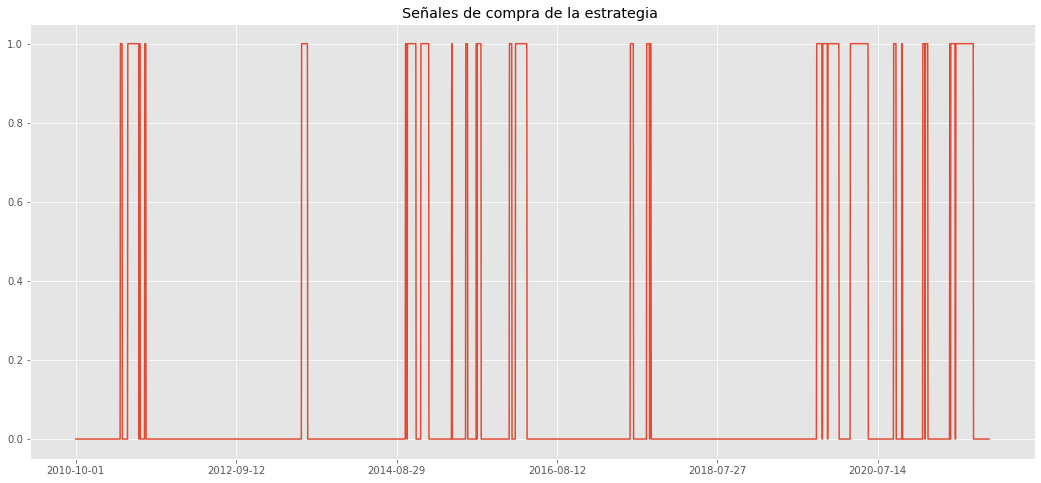

In [17]:
data['Senal'].plot(title = 'Señales de compra de la estrategia ' )
# Ploteando una parte
#data.loc['2010':'2022','Senal'].plot(title = 'Señales Regresión a la media ' +instrumento,xlim=('2010','2022'))

In [18]:
tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion,"segundos") #En segundos

El tiempo de ejecucion fue: 2020.365080833435 segundos


In [19]:
data.loc['2011-01-04':'2019-11-04']

Date Senal  Price Objetivo ExitReason  Beneficio
2011-01-04  2011-01-04     0  5.755      NaN        NaN        NaN
2011-01-05  2011-01-05     0   5.67      NaN        NaN        NaN
2011-01-06  2011-01-06     0  5.629      NaN        NaN        NaN
2011-01-07  2011-01-07     0  5.527      NaN        NaN        NaN
2011-01-10  2011-01-10     0  5.452      NaN        NaN        NaN
...                ...   ...    ...      ...        ...        ...
2019-10-29  2019-10-29     1   9.15      NaN        NaN        NaN
2019-10-30  2019-10-30     1  9.128      NaN        NaN        NaN
2019-10-31  2019-10-31     1  9.208      NaN        NaN        NaN
2019-11-01  2019-11-01     1  9.176      NaN        NaN        NaN
2019-11-04  2019-11-04     1  9.136      NaN        NaN        NaN

[2260 rows x 6 columns]

In [20]:
#Guardamos el resultado del analisis en un pickle
#dff.to_pickle("./primerBack_IBE.pkl")

***3.- Ingeniería de datos para calcular la bondad de la estrategia***

In [21]:

data['Dif_Close'] = data.Price.pct_change()
data['Retornos'] = data.Dif_Close * data.Senal.shift(1)   
data['Capital'] = (data.Retornos + 1).cumprod() * 100
    
rg.StrategyClass.dfLog=data  #Ojo a esta liena, no me cuadra.

#quant_j.salvarExcel(StrategyClass.dfLog, "log"+instrumento)   
#data.to_pickle('almacen')    #df = pd.read_pickle(file_name)

>Para calcular los retornos del sistema, calculamos la diferencia relativativa entre el precio de cierre y el del día anterior. Para posteriormente multiplicarlo por la señal que del día anterior que nos indicaba la posición a tomar (si estaba comprado, sumo beneficio).

In [22]:
data.tail()

Date Senal   Price Objetivo ExitReason  Beneficio  \
2021-11-11  2021-11-11     0  10.125      NaN        NaN        NaN   
2021-11-12  2021-11-12     0   10.07      NaN        NaN        NaN   
2021-11-15  2021-11-15     0  10.195      NaN        NaN        NaN   
2021-11-16  2021-11-16     0   10.19      NaN        NaN        NaN   
2021-11-17  2021-11-17     0  10.195      NaN        NaN        NaN   

            Dif_Close Retornos     Capital  
2021-11-11  -0.003445     -0.0  137.257606  
2021-11-12  -0.005432     -0.0  137.257606  
2021-11-15   0.012413      0.0  137.257606  
2021-11-16  -0.000490     -0.0  137.257606  
2021-11-17   0.000491      0.0  137.257606

In [23]:
data[60:]

Date Senal   Price Objetivo ExitReason  Beneficio  \
2010-12-27  2010-12-27     0   5.839      NaN        NaN        NaN   
2010-12-28  2010-12-28     0   5.808      NaN        NaN        NaN   
2010-12-29  2010-12-29     0   5.836      NaN        NaN        NaN   
2010-12-30  2010-12-30     0   5.768      NaN        NaN        NaN   
2011-01-03  2011-01-03     0   5.762      NaN        NaN        NaN   
...                ...   ...     ...      ...        ...        ...   
2021-11-11  2021-11-11     0  10.125      NaN        NaN        NaN   
2021-11-12  2021-11-12     0   10.07      NaN        NaN        NaN   
2021-11-15  2021-11-15     0  10.195      NaN        NaN        NaN   
2021-11-16  2021-11-16     0   10.19      NaN        NaN        NaN   
2021-11-17  2021-11-17     0  10.195      NaN        NaN        NaN   

            Dif_Close Retornos     Capital  
2010-12-27  -0.013349     -0.0       100.0  
2010-12-28  -0.005309     -0.0       100.0  
2010-12-29   0.004821      0.0       100.0  
2010-12-30  -0.011652     -0.0       100.0  
2011-01-03  -0.001040     -0.0       100.0  
...               ...      ...         ...  
2021-11-11  -0.003445     -0.0  137.257606  
2021-11-12  -0.005432     -0.0  137.257606  
2021-11-15   0.012413      0.0  137.257606  
2021-11-16  -0.000490     -0.0  137.257606  
2021-11-17   0.000491      0.0  137.257606  

[2788 rows x 9 columns]

>El capital, por comodidad, lo calcularemos en base 100, es decir como si iniciaramos la inversión con 100 unidades monetarias. Para su calculo arrastramos el producto acumulado de los retornos mas 1, multiplicados como dijimos por 100.

Pero para observar gráficamente la evolución del sistema necesitamos un gráfico con mas información. Para ello definimos una función que nos mostrará un gráfico con la evolución de nuestra estrategia, comparandola con la del activo. En un subgráfico se visualizará el drawdown del sistema, comparado de nuevo con el del activo. Y por útlimo las posiciones que toma el sistema.

In [24]:
def grafico (df):
    estudio = df.copy()
    
    DD_bh, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Dif_Close[60:], info = False) 
    
    DD, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Retornos.fillna(0), info = False) 

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(18, 12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    fig.suptitle('Estrategia vs B & H', fontsize=20)

    #Primer plot analiza la evolcuion de una inversion de 100€ en buy&hold y la estrategia)
    ax1.plot(estudio.Capital)
    ax1.plot((estudio.Price) * (100/estudio.Price[1]))
    ax1.set_title('Capital')
    ax1.legend(['Estrategia','Buy & Hold'])

    ax2.plot(DD*100, c='0.5')
    ax2.plot(DD_bh*100, c='y')
    ax2.fill_between(DD.index, 0, DD*100, color='0.7')
    ax2.set_title('Drawdown')
    ax2.legend(['Estrategia','Buy & Hold'])

    ax3.plot(estudio.Senal, c='orange')
    #ax3.fill_between(estudio.index, 0, estudio.Senal*100, color='orange')
    ax3.set_title('Posición')

    plt.show()
    return

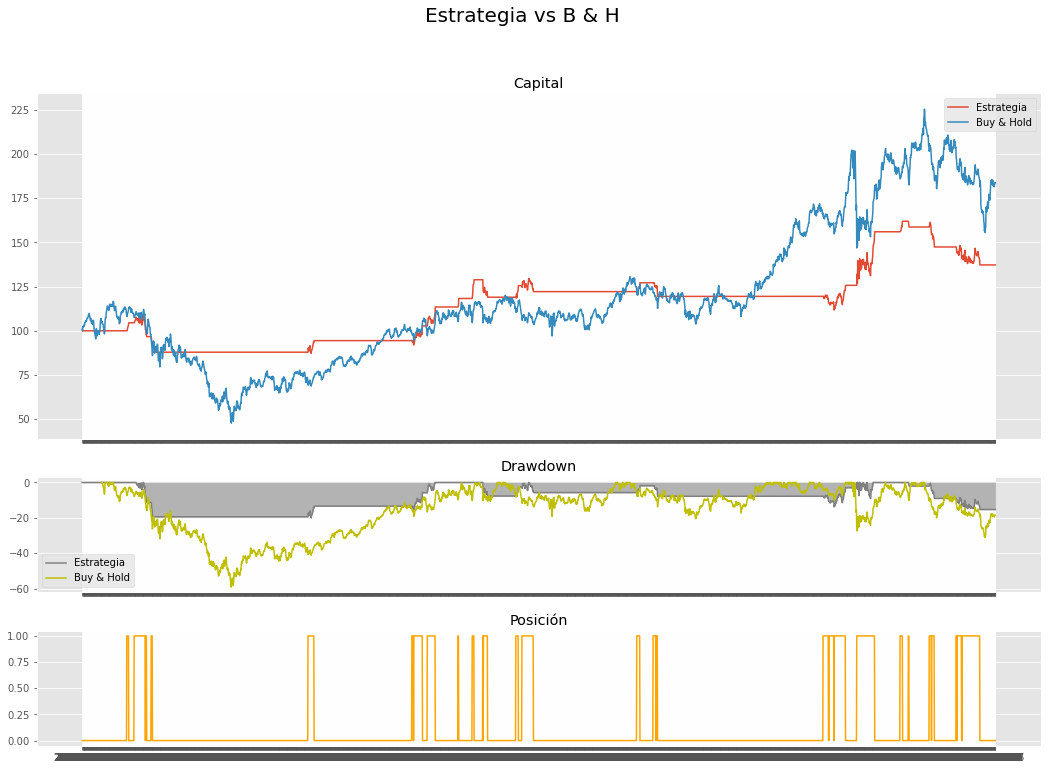

In [25]:
grafico(data)

---

In [26]:
#data[55:70]

---

# ANALISIS DEL SISTEMA

retornos=data.Retornos
retornos
retorno_acumulado = retornos.fillna(0).add(1).cumprod()   
retorno_acumulado
dt_inicial = dt.datetime.strptime(retornos.index[1], '%Y-%m-%d')
dt_final = dt.datetime.strptime(retornos.index[-1], '%Y-%m-%d')
cagr = (retorno_acumulado[-1] / retorno_acumulado[1]) ** (365 / (dt_final - dt_inicial).days ) - 1
cagr

In [27]:
Beneficio_Bruto = data.Capital[-1] - data.Capital[1]
print ('Beneficio Bruto : {:.2f} €  con una inverison de 100€'.format(Beneficio_Bruto))

Beneficio Bruto : 37.26 €  con una inverison de 100€


In [28]:
#Rentabilidad anual compuesta. Calculamos lo que la inversion se ha incrementado cada año con el interes compuesto
CAGR = analisis.CAGR(data.Retornos)
print ('CAGR : {:.2f}%'.format(CAGR * 100))

CAGR : 2.89%


In [29]:
#Ratio calculado restando una rentabilidad segura a nuestra rentabilidad de estrategia y dividido por el riego (=volatilidad)
data.Retornos=data.Retornos.replace(0,np.e)  #Quito los cero (no sepuede hacer logariotmo de cero), pero no se que poner
Sharpe = CAGR / (np.log(data.Retornos + 1).std(skipna=True) * 252 ** 0.5)
print ('Sharpe : {:.3f}'.format(CAGR ))

Sharpe : 0.029


---


# PRUEBA FUERA DE LA MUESTRA

periodo_rapido = 5

periodo_lento = 140

out_sample= qd_data[data.shape[0]:].copy()

out_sample['Dif_Close'] = out_sample.Close.pct_change()
out_sample['Dif_Open'] = out_sample.Close.pct_change()  #era Cloe


out_estr, out_resultado = estrategia_medias (out_sample, periodo_rapido, periodo_lento)


grafico(out_estr)

---